<a href="https://colab.research.google.com/github/avivajpeyi/jupyter_notebooks/blob/master/BCR_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avivajpeyi/jupyter_notebooks/blob/master/BCR_Histogram.ipynb)


#### SETUP

In [0]:
!pip install astroml

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objs as go, tools
from plotly.offline import iplot, plot

import matplotlib.pyplot as plt
import numpy as np

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)


from plotly import graph_objs as go, tools
from plotly.offline import iplot, plot
import seaborn as sns

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode

    display(
        IPython.core.display.HTML(
            ''' <script src="/static/components/requirejs/require.js"></script>'''
        )
    )
    
def init_notebook_mode(connected=False):
    import IPython
    from plotly.offline import init_notebook_mode
    display(
        IPython.core.display.HTML(
            ''' <script src="/static/components/requirejs/require.js"></script>'''
        )
    )
    init_notebook_mode(connected=False)

# BCR Histogram

## BCR calculation

In [0]:
import matplotlib
%matplotlib inline
import numpy as np
DETECTORS = ["H1", "L1"]

@np.vectorize
def get_log_bcr(log_zs, log_zg_h, log_zg_l, log_zn_h, log_zn_l, alpha, beta):
  try:
    log_zg = {"H1": log_zg_h, "L1": log_zg_l}
    log_zn = {"H1": log_zn_h, "L1": log_zn_l}

    log_alpha = np.log(alpha)
    log_beta = np.log(beta)
    log_1_minus_beta = np.log(1 - beta)

    log_bcr_numerator = log_alpha + log_zs
    log_bcr_denominator = sum(
      [
          np.logaddexp(
              log_beta + log_zg[d], log_1_minus_beta + log_zn[d]
          )
          for d in DETECTORS
      ]
    )
    log_bcr = log_bcr_numerator - log_bcr_denominator
  except RuntimeWarning:
    log_bcr = np.NaN
  return log_bcr

## Background Data

### CSV:

In [0]:
csv_data = """,Unnamed: 0_x,ifar,stat,snr,timeslide_value,H1_snr,H1_start_time,H1_trigger_time,H1_template_duration,H1_trigger_id,L1_snr,L1_start_time,L1_trigger_time,L1_template_duration,L1_trigger_id,mass_1,mass_2,mass_total,mass_chirp,mass_ratio,spin1z,spin2z,f_lower,template_id,Unnamed: 0_y,H1_time,L1_time,H1_time_end,L1_time_end,timeslide_val,H1_timeslid_time,L1_timeslid_time,avg_timeslid_time,H1_timslide_val,L1_timslide_val,H1_delta_time,L1_delta_time,gps_time,Unnamed: 0,lnZs,lnBF,lnBCR,lnZg_H1,lnZn_H1,lnBF_H1,lnZg_L1,lnZn_L1,lnBF_L1,far,saved_gps_start_time
0,73.0,0.000572601488707626,7.8082924,10.928635819867957,-731700.0,4.806774,1241750229.7631836,1241750231.7631836,0.18426901,536849045.0,9.814785,1242481929.7626953,1242481931.7626953,0.18426901,604992890.0,409.61908,23.989374,433.60846,73.79380583343908,0.05856508,0.87306595,0.87306595,21.6,113487.0,0.0,1241750229.7631836,1242481929.7626953,1241750233.7631836,1242481933.7626953,-731700.0,1241750229.7631836,1242481929.7626953,1242116079.7629395,-365849.9997558594,365849.9997558594,0.0,0.0,1242116079.7629,1401.0,-9446.19719621504,113.67922603803343,-6.242658280689284,-4068.504859068383,-4072.547806693273,4.042947624890076,-5371.449678865969,-5487.3286155598,115.87893669383085,1746.4152988093374,1242116079.7629395
1,968.0,0.0025021612977785147,8.007113,14.28086025434648,-711870.0,11.566397,1241754141.647461,1241754143.647461,0.15652348,89269469.0,8.376242,1242466011.6416016,1242466013.6416016,0.15652348,100626645.0,332.211,21.85394,354.06494,64.08400656320907,0.06578331,0.7194581,0.7194581,21.6,105744.0,1.0,1241754141.647461,1242466011.6416016,1241754145.647461,1242466015.6416016,-711870.0,1241754141.647461,1242466011.6416016,1242110076.6445312,-355934.9970703125,355934.9970703125,0.0,0.0,1242110076.6445,1488.0,-8321.956466780837,180.21163414698825,-65.5833729567803,-4261.308544678188,-4473.156889012176,211.84834433398828,-3995.06454914587,-4029.011211915649,33.946662769779785,399.65449105452416,1242110076.6445312
2,1186.0,0.00015553909178166888,7.617935000000001,7.3147196314559375,-705600.0,4.946086,1241754125.640625,1241754127.640625,0.42068997,58628558.0,5.3890033,1242459725.6455078,1242459727.6455078,0.42068997,66084143.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,2.0,1241754125.640625,1242459725.6455078,1241754129.640625,1242459729.6455078,-705600.0,1241754125.640625,1242459725.6455078,1242106925.6430664,-352800.00244140625,352800.00244140625,0.0,0.0,1242106925.6431,1399.0,-8393.931300095875,3.2880979263245536,3.11778796614999,-4180.719329220719,-4180.4217809280735,-0.2975482926458426,-4216.329758841306,-4216.797617094126,0.4678582528194966,6429.251891246129,1242106925.6430664
3,1307.0,0.0028400678835188843,8.023682,7.626163923870587,-702270.0,5.476217,1241770752.8808596,1241770754.8808596,0.4227678,227925380.0,5.3074875,1242473022.8774414,1242473024.8774414,0.4227678,256906047.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,3.0,1241770752.8808596,1242473022.8774414,1241770756.8808596,1242473026.8774414,-702270.0,1241770752.8808596,1242473022.8774414,1242121887.8791506,-351134.9982907772,351134.99829101557,0.0,0.0,1242121887.8792,1255.0,-8505.989677786052,9.031210877170453,4.802631216480222,-4361.436154535031,-4361.503415008552,0.0672604735209461,-4149.356154467501,-4153.517473654671,4.161319187169283,352.104259832334,1242121887.8791506
4,1706.0,5.511589823933873e-06,6.973018,6.923448296375586,-702000.0,4.780169,1241750668.296875,1241750670.296875,0.15340163,464715058.0,5.0084050000000016,1242452668.2973633,1242452670.2973633,0.15340163,523696769.0,74.59433,31.291079,105.88541,41.29605698982811,0.41948333,-0.32082778,-0.32082778,24.6,24539.0,4.0,1241750668.296875,1242452668.2973633,1241750672.296875,1242452672.2973633,-702000.0,1241750668.296875,1242452668.2973633,1242101668.2971194,-351000.00024414057,351000.00024414057,0.0,0.0,1242101668.2971,904.0,-8574.848426932263,11.604283494225454,4.741172011652452,-4283.7663518873715,-4286.858535989153,3.0921841017816405,-4295.8232470565445,-4299.594174437336,3.7709273807904538,181435.8528019515,1242101668.2971194
5,2656.0,4.971584211053777e-06,6.9421490000000015,7.021341905444517,-702000.0,4.782241,1241778495.8774414,1241778497.8774414,0.38824522,63765787.0,5.1409544999999985,1242480495.8842773,1242480497.8842773,0.38824522,71877280.0,126.02012,19.964672,145.98479,40.50976437865834,0.15842448,0.9916313,0.9916313,26.3,410852.0,5.0,1241778495.8774414,1242480495.8842773,1241778499.8774414,1242480499.8842773,-702000.0,1241778495.8774414,1242480495.8842773,1242129495.8808596,-351000.00341796875,351000.00341796875,0.0,0.0,1242129495.8809,1326.0,-8448.200515917386,4.010256150984787,-3.434379843260104,-4208.998068934793,-4211.688406089025,2.690337154232111,-4235.768067139334,-4240.5223659793455,4.75429884001187,201143.1281354158,1242129495.8808596
6,2823.0,0.00031245771443488124,7.7224607,7.3058449917377795,-699300.0,5.24527,1241762339.8554688,1241762341.8554688,0.41021112,365983365.0,5.08552,1242461639.8564453,1242461641.8564453,0.41021112,412462977.0,84.945984,16.069485,101.01547,30.21407510644189,0.18917298,0.3644065,0.3644065,24.1,39262.0,6.0,1241762339.8554688,1242461639.8564453,1241762343.8554688,1242461643.8564453,-699300.0,1241762339.8554688,1242461639.8564453,1242111989.855957,-349650.00048828125,349650.00048828125,0.0,0.0,1242111989.856,1215.0,-8635.412520686072,10.528254586013645,3.625925995724174,-4333.587717217895,-4337.062833694634,3.475116476738549,-4305.450729463902,-4308.877941577452,3.4272121135500133,3200.433062786191,1242111989.855957
7,3056.0,0.00010941400942745893,7.5625224,7.665008825883278,-693000.0,5.8995989999999985,1241746285.9873047,1241746287.9873047,0.4227678,227925337.0,4.8935765999999985,1242439285.991211,1242439287.991211,0.4227678,256907160.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,7.0,1241746285.9873047,1242439285.991211,1241746289.9873047,1242439289.991211,-693000.0,1241746285.9873047,1242439285.991211,1242092785.9892578,-346500.001953125,346500.001953125,0.0,0.0,1242092785.9893,1306.0,-8233.2567823797,6.291776602058236,2.0360825971347367,-4140.5516829889175,-4144.395924673412,3.8442416844936815,-4094.741181987916,-4095.1526343083474,0.4114523204311809,9139.597435765263,1242092785.9892578
8,3137.0,0.03033344991902433,8.32184,7.966500359052937,-691350.0,6.1595716,1241768210.1489258,1241768212.1489258,0.26424000000000003,460783423.0,5.052208,1242459560.1450195,1242459562.1450195,0.26424000000000003,519266246.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,8.0,1241768210.1489258,1242459560.1450195,1241768214.1489258,1242459564.1450195,-691350.0,1241768210.1489258,1242459560.1450195,1242113885.1469727,-345674.998046875,345674.998046875,0.0,0.0,1242113885.147,1002.0,-8361.577448757347,7.702426713216482,2.4296149811289065,-4208.129604712636,-4209.896234407271,1.766629694633593,-4155.87745902584,-4159.383641063294,3.5061820374539816,32.966906259245725,1242113885.1469727
9,3450.0,0.002540576083957378,8.009047,7.563948709059375,-685740.0,5.750584,1241751552.7001953,1241751554.7001953,0.36875477,13246316.0,4.913665,1242437292.6958008,1242437294.6958008,0.36875477,14926419.0,251.80553,17.549704000000002,269.35522000000003,50.249985840919024,0.069695465,0.9945677,0.9945677,24.7,95460.0,9.0,1241751552.7001953,1242437292.6958008,1241751556.7001953,1242437296.6958008,-685740.0,1241751552.7001953,1242437292.6958008,1242094422.697998,-342869.99780273443,342869.99780273443,0.0,0.0,1242094422.698,1414.0,-8440.643800354594,5.684525747285079,0.8682848335593008,-4378.405308217906,-4381.525010910298,3.119702692391911,-4063.106776970247,-4064.8033151915806,1.6965382213334124,393.61151445711886,1242094422.697998
10,3778.0,0.003136731116126656,8.036615,7.351785412725606,-680070.0,4.8980739999999985,1241785104.9580078,1241785106.9580078,0.15051343,402289615.0,5.482483,1242465174.9624026,1242465176.9624026,0.15051343,453350839.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,10.0,1241785104.9580078,1242465174.9624026,1241785108.9580078,1242465178.9624026,-680070.0,1241785104.9580078,1242465174.9624026,1242125139.960205,-340035.00219726557,340035.00219750404,0.0,0.0,1242125139.9602,774.0,-8403.115356707243,14.556252835125632,4.773782685671904,-4161.473636433116,-4162.475308709369,1.0016722762529753,-4246.415502959801,-4255.196300832999,8.780797873199845,318.8032263456597,1242125139.960205
11,3989.0,0.0006646119297860487,7.829763000000002,7.2452886303298225,-676800.0,5.631593700000002,1241766596.7890625,1241766598.7890625,0.20696762,136673957.0,4.5584383,1242443396.7910154,1242443398.7910154,0.20696762,154050648.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,11.0,1241766596.7890625,1242443396.7910154,1241766600.7890625,1242443400.7910154,-676800.0,1241766596.7890625,1242443396.7910154,1242104996.790039,-338400.0009765625,338400.0009763241,0.0,0.0,1242104996.79,1297.0,-8571.262185799875,11.356086457544734,3.222030405302576,-4283.720071287055,-4292.455614843432,8.735543556376799,-4290.764144918122,-4290.162657413988,-0.6014875041337291,1504.6374510940832,1242104996.790039
12,4477.0,6.556841739193779e-06,7.020291,6.756718828279892,-675000.0,4.703504,1241749907.2973633,1241749909.2973633,0.4394516,604892319.0,4.850804,1242424907.2905273,1242424909.2905273,0.4394516,681702477.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,12.0,1241749907.2973633,1242424907.2905273,1241749911.2973633,1242424911.2905273,-675000.0,1241749907.2973633,1242424907.2905273,1242087407.2939453,-337499.99658203125,337499.99658203125,0.0,0.0,1242087407.2939,1122.0,-8160.441685528654,4.957672792424091,4.383339752268512,-4142.309501224514,-4143.367235135005,1.0577339104911516,-4022.515524056407,-4022.0321231860717,-0.4834008703351174,152512.45031925366,1242087407.2939453
13,5514.0,1.9233940666573547e-06,6.4959946,6.991978756635384,-675000.0,4.766076,1241780499.977539,1241780501.977539,0.2798987,445356949.0,5.1158857000000015,1242455499.9868164,1242455501.9868164,0.2798987,501890182.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,13.0,1241780499.977539,1242455499.9868164,1241780503.977539,1242455503.9868164,-675000.0,1241780499.977539,1242455499.9868164,1242117999.9821775,-337500.00463867193,337500.00463867193,0.0,0.0,1242117999.9822,1056.0,-8442.665947250744,1.2023175566773716,0.964055864384136,-4274.31863937584,-4275.2628928366385,0.9442534607987908,-4169.311363739289,-4168.605371970783,-0.7059917685055552,519914.25851587916,1242117999.9821775
14,5591.0,1.766283434296426e-05,7.239911599999999,7.51572117120062,-675000.0,5.9025235,1241782479.3530273,1241782481.3530273,0.284217,325341642.0,4.652556400000001,1242457479.362793,1242457481.362793,0.284217,366662289.0,165.46213,28.056738,193.51886,55.29639336443336,0.16956592,0.9843969,0.9843969,26.0,47035.0,14.0,1241782479.3530273,1242457479.362793,1241782483.3530273,1242457483.362793,-675000.0,1241782479.3530273,1242457479.362793,1242119979.3579102,-337500.0048828125,337500.0048828125,0.0,0.0,1242119979.3579,1407.0,-8212.070482989446,5.005675062902809,2.848659954537652,-4268.439753491688,-4271.026345302906,2.5865918112176587,-3946.479389452295,-3946.049812749443,-0.42957670285204586,56616.05496505921,1242119979.3579102
15,6533.0,0.003367866437790689,8.045794,7.928343060466314,-673320.0,4.962514,1241748404.0898438,1241748406.0898438,0.42068997,58628497.0,6.183209400000001,1242421724.0932615,1242421726.0932615,0.42068997,66084081.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,15.0,1241748404.0898438,1242421724.0932615,1241748408.0898438,1242421728.0932615,-673320.0,1241748404.0898438,1242421724.0932615,1242085064.0915527,-336660.00170898443,336660.001708746,0.0,0.0,1242085064.0916,1459.0,-8903.104035298267,13.7401720110538,6.799360905879438,-4165.473100212239,-4165.465122927286,-0.007977284953085473,-4744.43029599191,-4751.379084382035,6.948788390126537,296.9238888986338,1242085064.0915527
17,6680.0,0.00011806142240726316,7.574414699999998,7.375324169137668,-671400.0,5.423812,1241739114.9580078,1241739116.9580078,0.40308082,688878360.0,4.9977665,1242410514.9487305,1242410516.9487305,0.40308082,776309085.0,169.33495,15.756067000000002,185.09102,40.01654462119309,0.093046755,0.9084204,0.9084204,24.4,57743.0,17.0,1241739114.9580078,1242410514.9487305,1241739118.9580078,1242410518.9487305,-671400.0,1241739114.9580078,1242410514.9487305,1242074814.9533694,-335699.99536132807,335699.99536132807,0.0,0.0,1242074814.9534,1210.0,-8214.201797515552,4.962150251307321,0.8630603464698652,-4081.479359561193,-4083.381744539993,1.9023849787995457,-4133.5854983008285,-4135.782203226867,2.1967049260383646,8470.16730452741,1242074814.9533694
18,6741.0,0.005949494232112698,8.118166,8.438891473165183,-670890.0,6.665782000000001,1241802394.3984375,1241802396.3984375,0.32342154,462868246.0,5.1751559999999985,1242473284.3964846,1242473286.3964846,0.32342154,521613261.0,386.09756,15.557078,401.65463,55.770495444567935,0.040293127000000005,0.9649446,0.9649446,22.4,120377.0,18.0,1241802394.3984375,1242473284.3964846,1241802398.3984375,1242473288.3964846,-670890.0,1241802394.3984375,1242473284.3964846,1242137839.397461,-335444.9990234375,335444.9990236759,0.0,0.0,1242137839.3975,1228.0,-8915.47060834192,14.375683987638695,-2.1262606600957947,-4429.618831188335,-4443.4024414922615,13.78361030392625,-4483.725516493489,-4486.4438508373,2.7183343438100565,168.0815143247722,1242137839.397461
19,6771.0,0.00019746098297539807,7.653617,12.770581182773553,-670500.0,11.087703,1241767882.8969727,1241767884.8969727,0.16285072,222941703.0,6.336449,1242438382.888672,1242438384.888672,0.16285072,251288685.0,457.40662,22.844738,480.25134,75.01695896287156,0.049944047000000005,0.84177727,0.84177727,21.1,126243.0,19.0,1241767882.8969727,1242438382.888672,1241767886.8969727,1242438386.888672,-670500.0,1241767882.8969727,1242438382.888672,1242103132.8928225,-335249.99584960943,335249.9958498478,0.0,0.0,1242103132.8928,1418.0,-8317.821160199459,128.4615956451653,-13.59274156309948,-4200.48969781601,-4323.040126871239,122.55042905522896,-4103.738720820352,-4123.2426289733885,19.50390815303581,5064.291613116255,1242103132.8928225
20,6806.0,0.003559248269027146,8.052700999999999,7.855523132062005,-670320.0,5.8613205000000015,1241802964.3217773,1241802966.3217773,0.27400038,419655400.0,5.230121,1242473284.319336,1242473286.319336,0.27400038,472921166.0,335.0906700000001,6.6093173,341.69998,31.656461533749948,0.019723967,0.6701519,0.6701519,20.3,126239.0,20.0,1241802964.3217773,1242473284.319336,1241802968.3217773,1242473288.319336,-670320.0,1241802964.3217773,1242473284.319336,1242138124.3205564,-335159.99877929693,335159.99877929693,0.0,0.0,1242138124.3206,812.0,-8787.625424098724,14.486326091930096,1.3654722032351856,-4313.7810965062845,-4324.475159582184,10.694063075899066,-4475.2097997956735,-4477.63659060847,2.4267908127958435,280.9582036471233,1242138124.3205564
21,6827.0,0.004625053709504418,8.086603,7.6552564854367855,-669870.0,5.808185,1241762676.3237305,1241762678.3237305,0.34272220000000003,143984335.0,4.9867764,1242432546.3286133,1242432548.3286133,0.34272220000000003,162280982.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,21.0,1241762676.3237305,1242432546.3286133,1241762680.3237305,1242432550.3286133,-669870.0,1241762676.3237305,1242432546.3286133,1242097611.326172,-334935.00244140625,334935.00244140625,0.0,0.0,1242097611.3262,1396.0,-8614.529945705435,7.300985626676265,1.2684048312294178,-4296.8288843679875,-4302.038879783494,5.209995415507366,-4318.969466168678,-4319.792051548617,0.8225853799385732,216.21370535546743,1242097611.326172
22,6957.0,0.0001297683974998546,7.589909,7.213991187690621,-667800.0,4.867814,1241772997.1435547,1241772999.1435547,0.3566269,481849013.0,5.3241014,1242440797.1411133,1242440799.1411133,0.3566269,542998185.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,22.0,1241772997.1435547,1242440797.1411133,1241773001.1435547,1242440801.1411133,-667800.0,1241772997.1435547,1242440797.1411133,1242106897.142334,-333899.99877929693,333899.99877929693,0.0,0.0,1242106897.1423,1283.0,-8594.426161426267,2.3928322548472347,0.2961108536419488,-4397.809658619908,-4398.1744253998795,0.3647667799723422,-4196.912613660002,-4198.644568281235,1.7319546212329442,7706.036440814649,1242106897.142334
23,7198.0,0.006443216785970372,8.128362,8.171062619775821,-664560.0,5.446203700000001,1241776964.947754,1241776966.947754,0.18632622,370054601.0,6.091398000000001,1242441524.9516602,1242441526.9516602,0.18632622,417049345.0,302.57022,22.206316,324.77655,62.239298548162466,0.07339227,0.7717655999999999,0.7717655999999999,22.0,96890.0,23.0,1241776964.947754,1242441524.9516602,1241776968.947754,1242441528.9516602,-664560.0,1241776964.947754,1242441524.9516602,1242109244.949707,-332280.001953125,332280.001953125,0.0,0.0,1242109244.9497,1000.0,-8450.985586446262,16.3944117955416,4.197190089078504,-4186.78117293684,-4191.179427268598,4.398254331758834,-4268.401603598501,-4276.200570973207,7.798967374704263,155.2019795729093,1242109244.949707
24,7202.0,0.020448559770202226,8.272969,8.195485256308444,-664500.0,5.5415053,1241815819.3608398,1241815821.3608398,0.3836794000000001,168289927.0,6.038021,1242480319.355957,1242480321.355957,0.3836794000000001,189686626.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,24.0,1241815819.3608398,1242480319.355957,1241815823.3608398,1242480323.355957,-664500.0,1241815819.3608398,1242480319.355957,1242148069.3583984,-332249.9975585937,332249.9975585937,0.0,0.0,1242148069.3584,1395.0,-8733.307148756041,10.014299011656476,5.3046627655458,-4461.901986939127,-4463.220276122177,1.3182891830501828,-4276.709824582459,-4280.101171645521,3.391347063061403,48.903199601235805,1242148069.3583984
26,7349.0,0.003664281189292089,8.0564995,7.981544776775889,-662490.0,5.7369375,1241763248.8989258,1241763250.8989258,0.31689432,444087765.0,5.5491085,1242425738.9057615,1242425740.9057615,0.31689432,500459404.0,206.42613,23.193867,229.62,54.43531714458396,0.11235916,0.9953861,0.9953861,25.5,58008.0,26.0,1241763248.8989258,1242425738.9057615,1241763252.8989258,1242425742.9057615,-662490.0,1241763248.8989258,1242425738.9057615,1242094493.9023438,-331245.00341796875,331245.00341773033,0.0,0.0,1242094493.9023,1416.0,-8341.264137557075,4.509702948276754,-0.5878309855233965,-4086.420065489601,-4091.153368809832,4.733303320231244,-4254.25624108195,-4254.62047169552,0.3642306135698163,272.90482043851887,1242094493.9023438
27,7438.0,0.00015617308779007378,7.6184807,7.259693465593107,-661500.0,4.904326,1241817882.0283206,1241817884.0283206,0.30825904,192898803.0,5.3526382,1242479382.0249026,1242479384.0249026,0.30825904,217426568.0,91.3351,30.500559000000006,121.835655,44.64906989589713,0.33394128,0.987618,0.987618,26.8,24166.0,27.0,1241817882.0283206,1242479382.0249026,1241817886.0283206,1242479386.0249026,-661500.0,1241817882.0283206,1242479382.0249026,1242148632.0266116,-330749.99829101557,330749.99829101557,0.0,0.0,1242148632.0266,1339.0,-8404.500075922617,7.601569433680197,5.213385002525683,-4154.20287392576,-4155.479584057452,1.2767101316912886,-4255.510586999381,-4256.622061298845,1.1114742994632252,6403.151875591968,1242148632.0266116
28,7743.0,0.00024559249803019883,7.6865406,7.5717116186586235,-657000.0,4.848471,1241776630.1313474,1241776632.1313474,0.39557368,184683162.0,5.815767,1242433630.1367188,1242433632.1367188,0.39557368,208164515.0,61.47681400000001,24.863638,86.34045400000002,33.36742956890084,0.40443927,0.64288557,0.64288557,25.5,24083.0,28.0,1241776630.1313474,1242433630.1367188,1241776634.1313474,1242433634.1367188,-657000.0,1241776630.1313474,1242433630.1367188,1242105130.1340332,-328500.0026857853,328500.00268554693,0.0,0.0,1242105130.134,1349.0,-8406.192116158945,11.074152376264463,6.86654292768435,-4230.22751640965,-4230.664925743937,0.4374093342867127,-4182.83114267698,-4186.601342791273,3.7702001142934014,4071.7856124295654,1242105130.1340332
29,7832.0,0.0030350464744057022,8.032309,7.683467501986494,-656010.0,5.7491693,1241746285.9736328,1241746287.9736328,0.42891705,400211603.0,5.0973253,1242402295.9736328,1242402297.9736328,0.42891705,451006903.0,163.18106,15.839537,179.0206,39.52453187860489,0.09706725,0.9644235,0.9644235,25.1,71449.0,29.0,1241746285.9736328,1242402295.9736328,1241746289.9736328,1242402299.9736328,-656010.0,1241746285.9736328,1242402295.9736328,1242074290.9736328,-328005.0,328005.0,0.0,0.0,1242074290.9736,1431.0,-8260.185597737838,6.758737809761442,3.6871169926580483,-4149.767803639703,-4153.413297975778,3.645494336074989,-4114.1049110907925,-4113.531037571821,-0.5738735189725048,329.4842462653926,1242074290.9736328
30,7863.0,0.004597305757072518,8.085892,8.487274730152105,-655380.0,5.9522557,1241786447.5722654,1241786449.5722654,0.37575153,564501338.0,6.050164,1242441827.581543,1242441829.581543,0.37575153,636191524.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,30.0,1241786447.5722654,1242441827.581543,1241786451.5722654,1242441831.581543,-655380.0,1241786447.5722654,1242441827.581543,1242114137.5769045,-327690.0046389103,327690.00463867193,0.0,0.0,1242114137.5769,1379.0,-8494.779969704821,7.866568902394648,3.2577200145206007,-4232.301023029771,-4235.060274072423,2.759251042651158,-4265.7366666895705,-4267.586264534793,1.8495978452219788,217.51870613817562,1242114137.5769045
31,7896.0,0.0012609397213534856,7.9154205,7.350563088568177,-655200.0,4.8625235999999985,1241812816.2670898,1241812818.2670898,0.23565097,108765054.0,5.512408,1242468016.2641602,1242468018.2641602,0.23565097,122610371.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,31.0,1241812816.2670898,1242468016.2641602,1241812820.2670898,1242468020.2641602,-655200.0,1241812816.2670898,1242468016.2641602,1242140416.265625,-327599.99853515625,327599.99853515625,0.0,0.0,1242140416.2656,940.0,-8384.241797254128,12.253767063248231,4.073885478639568,-4288.626798958094,-4290.487919668443,1.861120710349496,-4099.688883774674,-4106.007644648933,6.318760874259169,793.0593216038952,1242140416.265625
32,7939.0,0.00018147883460541868,7.64066,7.148762464062713,-654300.0,4.703854,1241747429.692871,1241747431.692871,0.23338845,378279556.0,5.383174,1242401729.696289,1242401731.696289,0.23338845,426320719.0,73.33353000000002,41.595867,114.9294,47.70077430372688,0.56721485,0.6891556,0.6891556,25.8,24295.0,32.0,1241747429.692871,1242401729.696289,1241747433.692871,1242401733.696289,-654300.0,1241747429.692871,1242401729.696289,1242074579.69458,-327150.00170898443,327150.00170898443,0.0,0.0,1242074579.6946,942.0,-8075.94247960775,9.33110153578491,4.445282242116264,-4128.767768267744,-4130.253370430432,1.4856021626874283,-3951.6199935821223,-3955.0202107131045,3.4002171309816736,5510.28444817962,1242074579.69458
33,8045.0,0.0024225236093261084,8.002924,7.3036749081585635,-653160.0,5.289152,1241794290.0170898,1241794292.0170898,0.15051343,402290229.0,5.0367190000000015,1242447450.0151367,1242447452.0151367,0.15051343,453351574.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,33.0,1241794290.0170898,1242447450.0151367,1241794294.0170898,1242447454.0151367,-653160.0,1241794290.0170898,1242447450.0151367,1242120870.0161133,-326579.9990234375,326579.9990234375,0.0,0.0,1242120870.0161,783.0,-8416.688651414874,12.646820302232301,5.6506590424323795,-4223.69607613789,-4225.664120987713,1.9680448498238547,-4198.643234319417,-4203.6713507293925,5.028116409975155,412.7926746101672,1242120870.0161133
34,8097.0,0.0009761502735040928,7.8825555,7.496322470270402,-652500.0,5.7912735999999985,1241813361.1503904,1241813363.1503904,0.42677668,551610955.0,4.759832,1242465861.1455078,1242465863.1455078,0.42677668,621647468.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,34.0,1241813361.1503904,1242465861.1455078,1241813365.1503904,1242465865.1455078,-652500.0,1241813361.1503904,1242465861.1455078,1242139611.1479492,-326249.99755883217,326249.9975585937,0.0,0.0,1242139611.1479,1412.0,-8317.72554150299,1.422917459241944,0.09298940709959423,-4332.3750912916985,-4333.191268314913,0.81617702321455,-3985.443439618392,-3985.957190647319,0.513751028927345,1024.432433348908,1242139611.1479492
35,8186.0,10.518230039027753,9.007631,11.630977739704305,-650819.0,9.918059,1241753339.192871,1241753341.192871,0.44416448,461252337.0,6.0755040000000005,1242404158.2001953,1242404160.2001953,0.44416448,519796338.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,35.0,1241753339.192871,1242404158.2001953,1241753343.192871,1242404162.2001953,-650819.0,1241753339.192871,1242404158.2001953,1242078748.6965332,-325409.50366210943,325409.50366210943,0.0,0.0,1242078748.6965,1482.0,-8813.262323427494,368.6470036877727,-65.13120208101645,-4667.210190883223,-5099.940560054306,432.73036917108317,-4080.920930463255,-4081.9687670609615,1.0478365977060091,0.0950730299954948,1242078748.6965332
36,8236.0,0.003082284200909629,8.034351,7.691052411963421,-650310.0,5.403852,1241771073.350586,1241771075.350586,0.3451058,173634369.0,5.4727206,1242421383.3554688,1242421385.3554688,0.3451058,195716192.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,36.0,1241771073.350586,1242421383.3554688,1241771077.350586,1242421387.3554688,-650310.0,1241771073.350586,1242421383.3554688,1242096228.3530273,-325155.00244140625,325155.00244140625,0.0,0.0,1242096228.353,1351.0,-8677.490572735993,4.142167467232866,2.839578676457677,-4454.2134742539365,-4456.1171805822905,1.9037063283549287,-4226.116677158514,-4225.515559620936,-0.6011175375779203,324.4347162097787,1242096228.3530273
37,8297.0,0.00456817072398721,8.085128,7.843198343799317,-649140.0,5.3682256,1241773841.1313474,1241773843.1313474,0.15692258,395456165.0,5.718209,1242422981.1293945,1242422983.1293945,0.15692258,445655083.0,198.97414,76.71155,275.68567,105.22321849469161,0.38553527,0.9664236,0.9664236,25.3,29988.0,37.0,1241773841.1313474,1242422981.1293945,1241773845.1313474,1242422985.1293945,-649140.0,1241773841.1313474,1242422981.1293945,1242098411.130371,-324569.9990236759,324569.9990234375,0.0,0.0,1242098411.1304,1331.0,-8727.401532842056,12.220259992793215,3.323104793771563,-4405.284466177328,-4408.174391835393,2.8899256580652946,-4325.440171458498,-4331.4474009994565,6.007229540957269,218.90600426754096,1242098411.130371
38,8338.0,0.003003325446944034,8.030918,7.543542363427477,-648480.0,4.975485,1241784940.03125,1241784942.03125,0.33249974,547863870.0,5.6700599999999985,1242433420.0263672,1242433422.0263672,0.33249974,617419976.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,38.0,1241784940.03125,1242433420.0263672,1241784944.03125,1242433424.0263672,-648480.0,1241784940.03125,1242433420.0263672,1242109180.0288086,-324239.9975585937,324239.9975585937,0.0,0.0,1242109180.0288,787.0,-8458.569177299802,16.336467849600012,6.681577664197903,-4217.810513161526,-4220.0728387728195,2.2623256112947274,-4247.440241802475,-4254.832806376582,7.392564574107382,332.9642483526144,1242109180.0288086
39,9524.0,3.862732064830709e-06,6.858534,6.838746544050137,-648000.0,4.972846,1241786753.140625,1241786755.140625,0.4144653,166127514.0,4.6945987,1242434753.1420898,1242434755.1420898,0.4144653,187251023.0,79.99627,22.23673,102.233,35.33183385925983,0.27797209999999994,0.9552423,0.9552423,26.3,39058.0,39.0,1241786753.140625,1242434753.1420898,1241786757.140625,1242434757.1420898,-648000.0,1241786753.140625,1242434753.1420898,1242110753.1413574,-324000.00073242193,324000.00073242193,0.0,0.0,1242110753.1414,1307.0,-8404.88329884699,2.0404003538606053,0.8862434391521674,-4168.862100675575,-4169.573213941374,0.7111132657992131,-4236.907441610566,-4237.350485259475,0.4430436489092244,258884.12222653782,1242110753.1413574
40,10540.0,0.3381601409332396,8.609047,9.273366331982752,-647703.0,5.6792455,1241739572.4941404,1241739574.4941404,0.3617097,621263554.0,7.3308589999999985,1242387275.4873047,1242387277.4873047,0.3617097,700153804.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,40.0,1241739572.4941404,1242387275.4873047,1241739576.4941404,1242387279.4873047,-647703.0,1241739572.4941404,1242387275.4873047,1242063423.9907227,-323851.49658226967,323851.49658203125,0.0,0.0,1242063423.9907,1103.0,-8460.181336774009,22.672089958048677,6.362185746262185,-4221.484674106428,-4224.841864250761,3.3571901443347087,-4245.058848413845,-4258.011562481297,12.95271406745178,2.9571788006719055,1242063423.9907227
41,10696.0,0.0024603634092119123,8.004947999999999,7.2635857511733315,-645840.0,5.2207885,1241776383.400879,1241776385.400879,0.36875477,13246551.0,5.050054,1242422223.4042964,1242422225.4042964,0.36875477,14926834.0,251.80553,17.549704000000002,269.35522000000003,50.249985840919024,0.069695465,0.9945677,0.9945677,24.7,95460.0,41.0,1241776383.400879,1242422223.4042964,1241776387.400879,1242422227.4042964,-645840.0,1241776383.400879,1242422223.4042964,1242099303.4025874,-322920.001708746,322920.001708746,0.0,0.0,1242099303.4026,1048.0,-8386.098796415858,2.3203508258502548,1.040468463779689,-4155.227356495288,-4156.545864862613,1.3185083673251938,-4231.91190838435,-4231.873282379096,-0.038626005253718176,406.444022153749,1242099303.4025874
42,10957.0,0.0015438156790243019,7.9434485,7.5242129733286545,-642600.0,5.4113865,1241818019.7436526,1241818021.7436526,0.17545861,315389866.0,5.227875,1242460619.7451172,1242460621.7451172,0.17545861,355449459.0,76.03556999999998,54.627377,130.66295,55.95331165173812,0.71844506,0.54737353,0.54737353,25.7,24360.0,42.0,1241818019.7436526,1242460619.7451172,1241818023.7436526,1242460623.7451172,-642600.0,1241818019.7436526,1242460619.7451172,1242139319.7443848,-321300.00073218346,321300.00073242193,0.0,0.0,1242139319.7444,1322.0,-8421.607514428058,16.145641330800572,5.48706555446006,-4250.2925867856975,-4259.180740914664,8.888154128966562,-4176.801993196824,-4178.572414844197,1.7704216473730412,647.7457209347714,1242139319.7443848
43,11011.0,0.004058164345322652,8.069697,7.825028259847372,-641700.0,5.484999,1241765586.944336,1241765588.944336,0.27303332,614275593.0,5.580847,1242407286.9448242,1242407288.9448242,0.27303332,692280122.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,43.0,1241765586.944336,1242407286.9448242,1241765590.944336,1242407290.9448242,-641700.0,1241765586.944336,1242407286.9448242,1242086436.94458,-320850.00024414057,320850.00024414057,0.0,0.0,1242086436.9446,779.0,-8485.696682926653,18.68382362358534,5.770612321190129,-4243.691374911897,-4249.653338951557,5.9619640396604145,-4247.775920335947,-4254.727167598681,6.9512472627338875,246.4168315786859,1242086436.94458
44,11081.0,0.00016521439004057949,7.62684,7.402590623940733,-640800.0,5.1487574999999985,1241784300.355957,1241784302.355957,0.43077698,573518357.0,5.318707,1242425100.3549805,1242425102.3549805,0.43077698,646331152.0,38.244385,28.340288,66.58466999999999,28.59619897356431,0.74103135,0.061858192,0.061858192,24.9,24214.0,44.0,1241784300.355957,1242425100.3549805,1241784304.355957,1242425104.3549805,-640800.0,1241784300.355957,1242425100.3549805,1242104700.3554688,-320399.99951171875,320399.99951171875,0.0,0.0,1242104700.3555,1129.0,-8294.500739314046,11.662087064089064,7.265669434535083,-4144.220267617866,-4146.572907939444,2.352640321578292,-4157.546141130715,-4159.589918438691,2.0437773079756885,6052.741530289116,1242104700.3554688
45,11210.0,0.0006676638251416398,7.8302559999999986,6.919141836810838,-639000.0,4.9114246,1241789839.0771484,1241789841.0771484,0.15051343,402289830.0,4.8736467,1242428839.0756836,1242428841.0756836,0.15051343,453349865.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,45.0,1241789839.0771484,1242428839.0756836,1241789843.0771484,1242428843.0756836,-639000.0,1241789839.0771484,1242428839.0756836,1242109339.076416,-319499.99926757807,319499.99926757807,0.0,0.0,1242109339.0764,872.0,-8451.492081654958,6.174847613428938,4.8314172387490535,-4304.776776012904,-4305.749928339759,0.9731523268555976,-4151.546722880804,-4151.917000928626,0.37027804782337626,1497.759744266297,1242109339.076416
46,11437.0,0.0038255426016699477,8.062188,7.8750008347917,-636120.0,5.0881186,1241775473.1279294,1241775475.1279294,0.31939247,376723532.0,6.010548,1242411593.1328125,1242411595.1328125,0.31939247,424563293.0,310.55643,12.688126,323.24457,45.228954785838425,0.040856104,0.84685624,0.84685624,21.7,86436.0,46.0,1241775473.1279294,1242411593.1328125,1241775477.1279294,1242411597.1328125,-636120.0,1241775473.1279294,1242411593.1328125,1242093533.130371,-318060.00244164467,318060.00244140625,0.0,0.0,1242093533.1304,1116.0,-8161.671294208131,14.324301680928327,3.258624961338682,-4105.058434203407,-4107.405779672185,2.3473454687773483,-4059.871484966063,-4068.589816216875,8.718331250812753,261.4008270522133,1242093533.130371
47,11448.0,0.002862143861546161,8.024734,9.46994131054265,-635910.0,5.8993225,1241797579.0249026,1241797581.0249026,0.18426901,536849296.0,7.407953999999998,1242433489.0234375,1242433491.0234375,0.18426901,604992886.0,409.61908,23.989374,433.60846,73.79380583343908,0.05856508,0.87306595,0.87306595,21.6,113487.0,47.0,1241797579.0249026,1242433489.0234375,1241797583.0249026,1242433493.0234375,-635910.0,1241797579.0249026,1242433489.0234375,1242115534.02417,-317954.9992673397,317954.99926757807,0.0,0.0,1242115534.0242,970.0,-9423.608357343095,47.933008400228566,-1.0536984735717851,-5193.931755015396,-5206.676785311147,12.745030295750439,-4228.622903854129,-4264.864580432179,36.24167657804992,349.3884473926441,1242115534.02417
48,11935.0,0.0033140012128434785,8.043754,7.938362804886626,-629550.0,5.1150136,1241837245.4350586,1241837247.4350586,0.37462324,287991821.0,6.0707693,1242466795.4365234,1242466797.4365234,0.37462324,324598634.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,48.0,1241837245.4350586,1242466795.4365234,1241837249.4350586,1242466799.4365234,-629550.0,1241837245.4350586,1242466795.4365234,1242152020.435791,-314775.00073242193,314775.00073242193,0.0,0.0,1242152020.4358,1313.0,-8263.237462920026,12.976336097342935,5.749843467632672,-4152.622272436551,-4155.699985265433,3.0777128288827957,-4116.3650339511105,-4120.513813751937,4.1487798008274686,301.7500404418924,1242152020.435791
49,12049.0,0.0003431663891407732,7.735514599999999,6.700663243708763,-628200.0,4.5178146,1241780466.640625,1241780468.640625,0.15051343,402290273.0,4.9485593,1242408666.6357422,1242408668.6357422,0.15051343,453349479.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,49.0,1241780466.640625,1242408666.6357422,1241780470.640625,1242408670.6357422,-628200.0,1241780466.640625,1242408666.6357422,1242094566.6381836,-314099.9975585937,314099.9975585937,0.0,0.0,1242094566.6382,879.0,-8155.261870294093,10.661379900754582,5.654598206154332,-4202.029104959427,-4204.267111440031,2.238006480603872,-3958.887363540821,-3961.6561387548163,2.7687752139959234,2914.038296418888,1242094566.6381836
50,12071.0,0.00012200899314875307,7.579828699999998,6.542925743182652,-628200.0,4.71225,1241846540.9233398,1241846542.9233398,0.20400938,511924351.0,4.5392265,1242474740.9228516,1242474742.9228516,0.20400938,576887358.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,50.0,1241846540.9233398,1242474740.9228516,1241846544.9233398,1242474744.9228516,-628200.0,1241846540.9233398,1242474740.9228516,1242160640.9230955,-314099.99975585943,314099.99975585943,0.0,0.0,1242160640.9231,838.0,-8426.298471368385,8.095999975184895,5.096444523989703,-4197.172805748483,-4198.8633533461625,1.6905475976782327,-4234.222110143892,-4235.531117997409,1.3090078535169596,8196.117140158696,1242160640.9230955
51,12295.0,9.683215401444493e-05,7.543441,7.413190698368638,-625500.0,5.269932,1241797022.21875,1241797024.21875,0.3617097,621262874.0,5.2137523,1242422522.2246096,1242422524.2246096,0.3617097,700153019.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,51.0,1241797022.21875,1242422522.2246096,1241797026.21875,1242422526.2246096,-625500.0,1241797022.21875,1242422522.2246096,1242109772.2216794,-312750.0029296875,312750.0029299259,0.0,0.0,1242109772.2217,1222.0,-8219.213849125059,7.892676325078355,5.055765304221495,-4123.160391560467,-4124.70561433024,1.5452227697724084,-4101.109222868816,-4102.400911119899,1.291688251083542,10327.148148029684,1242109772.2216794
53,12973.0,8.259994324663867e-06,7.0783524999999985,7.197667428594367,-621000.0,4.9284363,1241746467.8310547,1241746469.8310547,0.38967076,583577842.0,5.2456584,1242367467.822754,1242367469.822754,0.38967076,657678373.0,56.534573,19.991516,76.52609,28.51898096826995,0.35361576,-0.085335575,-0.085335575,24.2,24399.0,53.0,1241746467.8310547,1242367467.822754,1241746471.8310547,1242367471.822754,-621000.0,1241746467.8310547,1242367467.822754,1242056967.8269045,-310499.99584960943,310499.99584960943,0.0,0.0,1242056967.8269,1146.0,-8563.304513221592,62.80917489504645,-8.441880319682241,-4304.228908062983,-4307.126214257387,2.897306194404337,-4250.633724838928,-4318.9874738592525,68.35374902032436,121065.45848512967,1242056967.8269045
54,13318.0,8.613439668205684e-06,7.0877757,7.1951181805825986,-621000.0,5.3709745,1241756429.0751953,1241756431.0751953,0.3639602,578324803.0,4.787730000000002,1242377429.0649414,1242377431.0649414,0.3639602,651754580.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,54.0,1241756429.0751953,1242377429.0649414,1241756433.0751953,1242377433.0649414,-621000.0,1241756429.0751953,1242377429.0649414,1242066929.0700686,-310499.99487304693,310499.99487304693,0.0,0.0,1242066929.0701,981.0,-8420.019944576865,8.083290580858375,3.2557034456785914,-4316.415802103214,-4318.185355750193,1.7695536469764193,-4106.859845919328,-4109.9178794075315,3.0580334882024545,116097.63793798254,1242066929.0700686
55,13611.0,4.218047742473577e-06,6.889278,7.323723322591113,-621000.0,4.931524,1241765382.1728516,1241765384.1728516,0.27473235,686627144.0,5.414517,1242386382.1708984,1242386384.1708984,0.27473235,773764136.0,86.09491,32.532497,118.62741,45.033937375806005,0.37786785,0.81826484,0.81826484,25.8,24210.0,55.0,1241765382.1728516,1242386382.1708984,1241765386.1728516,1242386386.1708984,-621000.0,1241765382.1728516,1242386382.1708984,1242075882.171875,-310499.9990234375,310499.9990234375,0.0,0.0,1242075882.1719,996.0,-8429.155635889425,6.0240806511119445,-0.5601451513757638,-4258.437706249893,-4262.100332891983,3.6626266420908,-4170.157784488157,-4173.079383648554,2.9215991603969087,237076.50103874193,1242075882.171875
56,13694.0,1.4059608603974622e-06,6.173108,6.696375551556841,-621000.0,5.0898647000000015,1241767563.5219727,1241767565.5219727,0.41248128,438915309.0,4.3514047,1242388563.524414,1242388565.524414,0.41248128,494630905.0,191.30992,9.205777,200.5157,30.69368946167784,0.048119705,0.61612976,0.61612976,22.2,73743.0,56.0,1241767563.5219727,1242388563.524414,1241767567.5219727,1242388567.524414,-621000.0,1241767563.5219727,1242388563.524414,1242078063.5231936,-310500.00122070307,310500.00122070307,0.0,0.0,1242078063.5232,863.0,-8128.484745845491,1.1379116357329622,0.015750360266792995,-4126.818561361067,-4127.648269413238,0.8297080521715543,-4001.6819348446897,-4001.9743880679853,0.2924532232950696,711257.3530086052,1242078063.5231936
57,15126.0,3.268803380390842e-06,6.794668700000001,7.578663515098229,-621000.0,5.2144384000000015,1241839922.5996096,1241839924.5996096,0.43727297,139312773.0,5.4996157,1242460922.600586,1242460924.600586,0.43727297,157024978.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,57.0,1241839922.5996096,1242460922.600586,1241839926.5996096,1242460926.600586,-621000.0,1241839922.5996096,1242460922.600586,1242150422.6000974,-310500.00048804283,310500.00048828125,0.0,0.0,1242150422.6001,1243.0,-8411.798789128115,5.201522683084477,3.885311850168364,-4173.009071585193,-4173.0968664689835,0.0877948837915028,-4242.675029393092,-4243.903445342215,1.228415949122791,305922.3463848819,1242150422.6000974
58,16057.0,0.004438609046611388,8.081358,7.672892045345777,-618540.0,5.8391805,1241740479.059082,1241740481.059082,0.20400938,511924320.0,4.9776745,1242359019.0551758,1242359021.0551758,0.20400938,576886663.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,58.0,1241740479.059082,1242359019.0551758,1241740483.059082,1242359023.0551758,-618540.0,1241740479.059082,1242359019.0551758,1242049749.057129,-309269.998046875,309269.998046875,0.0,0.0,1242049749.0571,850.0,-8535.500586873879,17.67154701412983,6.820642774941008,-4249.2508706116605,-4257.151127552582,7.900256940921282,-4293.070359037161,-4296.021006335429,2.9506472982675405,225.29580539728772,1242049749.057129
60,16345.0,0.0004940299338536105,7.786850500000001,7.2902334664581385,-615600.0,5.0085535000000005,1241851475.2885742,1241851477.2885742,0.30121955,159592318.0,5.297348,1242467075.294922,1242467077.294922,0.30121955,179880551.0,470.77914,19.98564,490.76477,70.1368862646201,0.04245226,0.99609935,0.99609935,23.9,113508.0,60.0,1241851475.2885742,1242467075.294922,1241851479.2885742,1242467079.294922,-615600.0,1241851475.2885742,1242467075.294922,1242159275.291748,-307800.00317382807,307800.0031740665,0.0,0.0,1242159275.2917,956.0,-8314.807970171383,2.7842926607700065,0.8745070549393859,-4203.620866604079,-4204.333369137799,0.7125025337199986,-4112.061610622243,-4113.258893694355,1.1972830721115315,2024.1688437776263,1242159275.291748
61,16382.0,0.23471885934361106,8.565660000000001,8.986117706713284,-615013.0,5.598141,1241806711.105957,1241806713.105957,0.4013971,507690877.0,7.029305,1242421724.1035154,1242421726.1035154,0.4013971,572105182.0,89.77375,21.851883,111.62563,36.81545336417715,0.24341060000000006,0.9781181,0.9781181,26.5,39126.0,61.0,1241806711.105957,1242421724.1035154,1241806715.105957,1242421728.1035154,-615013.0,1241806711.105957,1242421724.1035154,1242114217.6047366,-307506.49877929693,307506.4987790585,0.0,0.0,1242114217.6047,908.0,-8954.596684847356,14.09012370376513,4.095284397028081,-4211.708299501182,-4214.403600301211,2.6953008000282352,-4746.983669743203,-4754.283208249911,7.299538506707903,4.260416068808829,1242114217.6047366
62,16424.0,0.0019750673333306496,7.975973,7.944481507284956,-614700.0,5.5943755999999984,1241845191.7783206,1241845193.7783206,0.22330388,666192331.0,5.6407223,1242459891.7763672,1242459893.7763672,0.22330388,750743620.0,109.3862,42.971806,152.358,58.44059469331828,0.39284486,0.9548056,0.9548056,26.4,24296.0,62.0,1241845191.7783206,1242459891.7763672,1241845195.7783206,1242459895.7763672,-614700.0,1241845191.7783206,1242459891.7763672,1242152541.7773438,-307349.9990231991,307349.9990234375,0.0,0.0,1242152541.7773,1236.0,-8087.445708848923,16.61335838310879,7.898263748038516,-3860.510220387275,-3863.5879335556,3.077713168324862,-4234.833752209685,-4240.471133676429,5.6373814667458655,506.31185232234725,1242152541.7773438
63,16630.0,0.004569275031261632,8.085152,7.95977825591008,-612450.0,5.480436,1241751793.2705078,1241751795.2705078,0.37462324,287990872.0,5.7725983,1242364243.2670898,1242364245.2670898,0.37462324,324597509.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,63.0,1241751793.2705078,1242364243.2670898,1241751797.2705078,1242364247.2670898,-612450.0,1241751793.2705078,1242364243.2670898,1242058018.2687988,-306224.99829101557,306224.99829101557,0.0,0.0,1242058018.2688,1037.0,-8139.097119800387,15.488979335424117,5.17239361098018,-3973.403245571524,-3974.888168448153,1.4849228766283886,-4170.866267839843,-4179.697930687658,8.831662847815096,218.85309883040415,1242058018.2687988
64,16655.0,0.0030255999360050824,8.031897,7.959763673900778,-612090.0,5.08188,1241748275.6479492,1241748277.6479492,0.37912002,603517652.0,6.1263638,1242360365.6450195,1242360367.6450195,0.37912002,680155377.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,64.0,1241748275.6479492,1242360365.6450195,1241748279.6479492,1242360369.6450195,-612090.0,1241748275.6479492,1242360365.6450195,1242054320.6464846,-306044.99853515625,306044.99853515625,0.0,0.0,1242054320.6465,1443.0,-8551.688071472925,6.499066031843539,3.9209729972972127,-4355.820241169717,-4356.6064678077655,0.7862266380489018,-4199.788803300506,-4201.580669697003,1.7918663964974255,330.5129630986085,1242054320.6464846
65,16725.0,0.0034746984056973442,8.049726,7.682243977343633,-611970.0,5.1547756,1241811295.7548828,1241811297.7548828,0.17610478,385323138.0,5.6960654,1242423265.7578125,1242423267.7578125,0.17610478,434260222.0,103.81198,41.936543,145.74851999999996,56.309701856357954,0.4039663,0.57398725,0.57398725,25.2,24433.0,65.0,1241811295.7548828,1242423265.7578125,1241811299.7548828,1242423269.7578125,-611970.0,1241811295.7548828,1242423265.7578125,1242117280.7563474,-305985.0014648437,305985.0014648437,0.0,0.0,1242117280.7563,1027.0,-8431.475572374171,16.869171329912206,4.823410649782089,-4251.376531827285,-4256.1189099732455,4.742378145959265,-4184.922451196667,-4192.225833730838,7.303382534170852,287.7947618015809,1242117280.7563474
66,17169.0,0.0006665650534164553,7.830082000000001,7.3939589703660715,-607500.0,5.1783133,1241864585.057129,1241864587.057129,0.22854336,280105548.0,5.27785,1242472085.0634766,1242472087.0634766,0.22854336,315717653.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,66.0,1241864585.057129,1242472085.0634766,1241864589.057129,1242472089.0634766,-607500.0,1241864585.057129,1242472085.0634766,1242168335.0603027,-303750.00317382807,303750.00317382807,0.0,0.0,1242168335.0603,1394.0,-8383.715955082096,5.774670368817168,4.108188859860093,-4251.905949251497,-4252.871330340063,0.965381088565664,-4135.918194690459,-4136.6192951108505,0.7011004203914126,1500.2286646660154,1242168335.0603027
67,17640.0,0.003372005410949865,8.045939,7.305000405638298,-602670.0,5.2094913,1241754264.741211,1241754266.741211,0.16451186,696928091.0,5.12096,1242356934.7456055,1242356936.7456055,0.16451186,785378254.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,67.0,1241754264.741211,1242356934.7456055,1241754268.741211,1242356938.7456055,-602670.0,1241754264.741211,1242356934.7456055,1242055599.7434082,-301335.00219726557,301335.00219726557,0.0,0.0,1242055599.7434,661.0,-8162.547550090287,14.480644456421942,3.626931322047312,-4208.81792211727,-4214.0769224586975,5.259000341427054,-3957.3565592950627,-3962.951272088012,5.594712792948486,296.5594292205802,1242055599.7434082
68,17770.0,0.0015467634683783613,7.943579,7.365171465372205,-601200.0,5.2501764,1241763658.5541992,1241763660.5541992,0.441905,432222953.0,5.165404,1242364858.5561526,1242364860.5561526,0.441905,487090540.0,337.8296200000001,12.197502,350.02713,45.72574996636119,0.036105484,0.9834459,0.9834459,23.3,96887.0,68.0,1241763658.5541992,1242364858.5561526,1241763662.5541992,1242364862.5561526,-601200.0,1241763658.5541992,1242364858.5561526,1242064258.5551758,-300600.0009765625,300600.0009768009,0.0,0.0,1242064258.5552,1321.0,-8172.557488136295,2.7375927391312875,1.3658859982497231,-4059.0666911839116,-4060.39607254152,1.3293813576074172,-4114.8566829506335,-4114.899008333907,0.04232538327323709,646.5112607349123,1242064258.5551758
69,17804.0,0.017323021264202976,8.252506,7.933218700087122,-601110.0,6.067116,1241774832.588379,1241774834.588379,0.37825432,67153580.0,5.111366,1242375942.5844727,1242375944.5844727,0.37825432,75686247.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,69.0,1241774832.588379,1242375942.5844727,1241774836.588379,1242375946.5844727,-601110.0,1241774832.588379,1242375942.5844727,1242075387.5864258,-300554.998046875,300554.998046875,0.0,0.0,1242075387.5864,1371.0,-8659.64323910875,6.326084582740805,3.4568044087445737,-4151.643559019683,-4151.871069783751,0.22751076406711945,-4511.45648449781,-4514.0982539077395,2.6417694099282016,57.726650839276076,1242075387.5864258
70,17891.0,0.0029220738438267267,8.02748,8.10271513387128,-600180.0,6.425046400000001,1241802946.9042964,1241802948.9042964,0.39616275,10359994.0,4.9368787,1242403126.899414,1242403128.899414,0.39616275,11679069.0,172.35281,2.4735997000000003,174.82641999999996,13.468749195846035,0.014351953999999997,-0.04405216,-0.04405216,20.1,138412.0,70.0,1241802946.9042964,1242403126.899414,1241802950.9042964,1242403130.899414,-600180.0,1241802946.9042964,1242403126.899414,1242103036.9018552,-300089.99755883217,300089.99755883217,0.0,0.0,1242103036.9019,703.0,-8470.776101835736,19.823482546258678,2.205523065891612,-4464.719780306786,-4479.361858223938,14.642077917153074,-4008.2618445948415,-4011.2377261580573,2.9758815632144437,342.22269985155725,1242103036.9018552
72,18311.0,0.0002715619071341782,7.7015657000000015,7.222984943435473,-595800.0,5.103729,1241861787.849121,1241861789.849121,0.4300665,283575963.0,5.111111599999999,1242457587.8486328,1242457589.8486328,0.4300665,319622525.0,220.68935,14.140104999999998,234.82945,41.91697112026427,0.064072445,0.9519845,0.9519845,23.9,71445.0,72.0,1241861787.849121,1242457587.8486328,1241861791.849121,1242457591.8486328,-595800.0,1241861787.849121,1242457587.8486328,1242159687.848877,-297899.99975585943,297899.99975585943,0.0,0.0,1242159687.8489,1317.0,-8517.813962635228,6.997704816189071,4.5201351477444405,-4135.249508892277,-4135.413905287356,0.1643963950791658,-4387.084588890694,-4389.3977621640615,2.313173273366374,3682.401595102593,1242159687.848877
73,18802.0,7.915038137937388e-05,7.511184700000001,7.130997553852969,-594000.0,5.161404,1241749032.5092773,1241749034.5092773,0.3331618,63921592.0,4.920471,1242343032.5083008,1242343034.5083008,0.3331618,72053224.0,153.79237,23.027052,176.81943,47.86277659065126,0.14972818,0.99392426,0.99392426,26.2,57848.0,73.0,1241749032.5092773,1242343032.5083008,1241749036.5092773,1242343036.5083008,-594000.0,1241749032.5092773,1242343032.5083008,1242046032.508789,-296999.99951171875,296999.99951171875,0.0,0.0,1242046032.5088,1147.0,-7876.624678442369,1.5025824062522588,1.1700504605823878,-3985.336197567542,-3985.915201382912,0.5790038153695605,-3892.4585313354096,-3892.2120594657104,-0.2464718696996897,12634.177910109149,1242046032.508789
74,19869.0,1.0947300279745644e-06,5.6937404,6.661745141481847,-594000.0,4.770224,1241780573.199707,1241780575.199707,0.28109133,604304297.0,4.6501410000000005,1242374573.1982422,1242374575.1982422,0.28109133,681039828.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,74.0,1241780573.199707,1242374573.1982422,1241780577.199707,1242374577.1982422,-594000.0,1241780573.199707,1242374573.1982422,1242077573.1989744,-296999.99926757807,296999.99926757807,0.0,0.0,1242077573.199,1065.0,-8177.846347407795,2.840456104027908,0.5122223358339397,-4184.919223066442,-4187.050894411566,2.1316713451242317,-3993.4393466771885,-3993.6359091002582,0.19656242306928107,913467.2242892332,1242077573.1989744
75,20435.0,0.0004907803104053876,7.7859634999999985,7.322000919333519,-594000.0,5.30928,1241811685.5927734,1241811687.5927734,0.4285287999999999,399003890.0,5.0421467,1242405685.5893555,1242405687.5893555,0.4285287999999999,449649337.0,73.33266400000002,13.470919,86.80358000000003,25.65129390263144,0.18369602,-0.09510171,-0.09510171,23.4,416735.0,75.0,1241811685.5927734,1242405685.5893555,1241811689.5927734,1242405689.5893555,-594000.0,1241811685.5927734,1242405685.5893555,1242108685.5910645,-296999.99829101557,296999.99829101557,0.0,0.0,1242108685.5911,987.0,-8771.171838487808,13.912665024065065,4.708735172045635,-4262.021089355092,-4266.840566168416,4.81947681332349,-4513.85948430476,-4518.243937343458,4.384453038696847,2037.5715545189532,1242108685.5910645
76,22034.0,0.002947132271174113,8.028493,7.356934453861609,-593100.0,5.1638,1241842609.0634766,1241842611.0634766,0.15051343,402290539.0,5.240196,1242435709.0615234,1242435711.0615234,0.15051343,453350749.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,76.0,1241842609.0634766,1242435709.0615234,1241842613.0634766,1242435713.0615234,-593100.0,1241842609.0634766,1242435709.0615234,1242139159.0625,-296549.9990234375,296549.9990234375,0.0,0.0,1242139159.0625,759.0,-8383.351177568928,11.86497384217546,6.183273266089599,-4213.632945311998,-4216.490432124835,2.857486812837124,-4175.90150552302,-4178.725719286267,2.8242137632469166,339.3129008090323,1242139159.0625
77,22137.0,0.0002207961274749729,7.670358,8.070916931092404,-592200.0,4.679287,1241874595.4267578,1241874597.4267578,0.3854232,418452243.0,6.576014999999999,1242466795.4370115,1242466797.4370115,0.3854232,471566534.0,66.49615,23.132992,89.62913499999998,33.24506044965087,0.34788468,0.5332888000000001,0.5332888000000001,25.1,24124.0,77.0,1241874595.4267578,1242466795.4370115,1241874599.4267578,1242466799.4370115,-592200.0,1241874595.4267578,1242466795.4370115,1242170695.4318848,-296100.00512695307,296100.0051267147,0.0,0.0,1242170695.4319,1257.0,-8536.341665095875,9.565413955819167,4.999477553061297,-4424.57954306125,-4424.883839405504,0.3042963442539985,-4116.761599587687,-4121.023239646191,4.261640058503872,4529.064940748788,1242170695.4318848
78,22580.0,0.00018847594879764108,7.646368499999999,7.383534554060973,-587700.0,4.823084400000001,1241866486.175293,1241866488.175293,0.31273305,219171549.0,5.590567,1242454186.1801758,1242454188.1801758,0.31273305,247046705.0,80.78303000000002,31.855175,112.6382,43.247691509944666,0.39433005,0.9737932,0.9737932,26.6,24126.0,78.0,1241866486.175293,1242454186.1801758,1241866490.175293,1242454190.1801758,-587700.0,1241866486.175293,1242454186.1801758,1242160336.1777346,-293850.00244140625,293850.00244140625,0.0,0.0,1242160336.1777,1310.0,-8056.244559209195,2.691507739944427,3.2668337489776604,-4017.8097868075047,-4017.3906339961663,-0.4191528113383356,-4041.701606150668,-4041.5454329529744,-0.1561731976939882,5305.716757917261,1242160336.1777346
79,22784.0,0.0027276786080444185,8.018526,7.5789761432598635,-585360.0,5.5011177,1241871302.2719727,1241871304.2719727,0.21858971,213060876.0,5.2133083,1242456662.2661133,1242456664.2661133,0.21858971,240163202.0,270.60583,28.100187,298.70602,68.16776062172801,0.10384177,0.8952921999999999,0.8952921999999999,23.3,96908.0,79.0,1241871302.2719727,1242456662.2661133,1241871306.2719727,1242456666.2661133,-585360.0,1241871302.2719727,1242456662.2661133,1242163982.269043,-292679.9970703125,292679.9970703125,0.0,0.0,1242163982.269,1413.0,-8533.392004190167,6.926303754413311,3.198879145873433,-4362.188110601791,-4364.315463736736,2.127353134945224,-4174.402772734251,-4176.002844207845,1.6000714735928339,366.61210637163,1242163982.269043
80,22986.0,0.10493402285886373,8.471166,9.001078460844733,-583200.0,5.2478414,1241744983.2216794,1241744985.2216794,0.43727297,139313576.0,7.312972999999999,1242328183.2192385,1242328185.2192385,0.43727297,157024415.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,80.0,1241744983.2216794,1242328183.2192385,1241744987.2216794,1242328187.2192385,-583200.0,1241744983.2216794,1242328183.2192385,1242036583.220459,-291599.9987795353,291599.9987795353,0.0,0.0,1242036583.2205,934.0,-8401.874061741157,8.332929309035535,5.713320861057582,-4191.7735331104905,-4193.469462739835,1.6959296293443913,-4215.813849491725,-4216.737528310358,0.9236788186335616,9.5297976076358,1242036583.220459
81,23010.0,0.0007384380948460541,7.8432603,7.436010175269128,-583200.0,5.441045,1241848594.4658206,1241848596.4658206,0.17039628,666870745.0,5.068459,1242431794.4672852,1242431796.4672852,0.17039628,751506565.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,81.0,1241848594.4658206,1242431794.4672852,1241848598.4658206,1242431798.4672852,-583200.0,1241848594.4658206,1242431794.4672852,1242140194.4665527,-291600.00073218346,291600.00073242193,0.0,0.0,1242140194.4666,741.0,-8569.971614488017,13.61392141293436,4.9066237736788025,-4271.434450041807,-4275.268261489257,3.8338114474508975,-4303.443788219887,-4308.317274411693,4.8734861918055685,1354.2096581684007,1242140194.4665527
82,23018.0,0.00018978169768187937,7.6474695000000015,7.032666943297187,-583200.0,5.043001,1241865978.8076172,1241865980.8076172,0.44062585,344501672.0,4.901688,1242449178.8144536,1242449180.8144536,0.44062585,388259644.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,82.0,1241865978.8076172,1242449178.8144536,1241865982.8076172,1242449182.8144536,-583200.0,1241865978.8076172,1242449178.8144536,1242157578.8110356,-291600.00341820717,291600.00341820717,0.0,0.0,1242157578.811,1355.0,-8457.7281632968,1.472073287668536,2.525677572435597,-4341.839816624204,-4341.381562331855,-0.4582542923490109,-4118.414024245032,-4117.818674252614,-0.5953499924180505,5269.212006292857,1242157578.8110356
83,23025.0,0.003233743738335501,8.0404825,7.612353343800037,-583140.0,5.3574595,1241803449.0620115,1241803451.0620115,0.42677668,551611754.0,5.4079156,1242386589.0644536,1242386591.0644536,0.42677668,621647396.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,83.0,1241803449.0620115,1242386589.0644536,1241803453.0620115,1242386593.0644536,-583140.0,1241803449.0620115,1242386589.0644536,1242095019.0632324,-291570.00122094154,291570.00122118,0.0,0.0,1242095019.0632,1325.0,-8522.952977072668,1.7727271322310116,0.5241215611767984,-4261.214087573816,-4262.726689112635,1.5126015388186715,-4262.263011060029,-4261.999015092263,-0.2639959677662773,309.239098987704,1242095019.0632324
85,23255.0,0.003689953800383225,8.057447,7.572668983530584,-580470.0,5.438145,1241845642.548828,1241845644.548828,0.4504769,456765068.0,5.2699045999999985,1242426112.544922,1242426114.544922,0.4504769,514747068.0,215.79482,14.120448,229.91527,41.49732768798099,0.065434605,0.98675126,0.98675126,24.7,84456.0,85.0,1241845642.548828,1242426112.544922,1241845646.548828,1242426116.544922,-580470.0,1241845642.548828,1242426112.544922,1242135877.546875,-290234.9980471134,290234.9980471134,0.0,0.0,1242135877.5469,1356.0,-8364.65584227347,5.1684333923767545,2.989898126639673,-4309.393595452724,-4309.932403160578,0.5388077078541755,-4058.252144947385,-4059.891872505269,1.6397275578833614,271.0061030834976,1242135877.546875
86,23383.0,9.280217165952374e-05,7.5364165,7.022511590096972,-578700.0,5.2378472999999985,1241764822.5805664,1241764824.5805664,0.31516734,567131136.0,4.677673,1242343522.586914,1242343524.586914,0.31516734,639153563.0,253.28006,21.584406,274.86447000000004,56.861844068632095,0.085219525,0.99223375,0.99223375,24.8,95701.0,86.0,1241764822.5805664,1242343522.586914,1241764826.5805664,1242343526.586914,-578700.0,1241764822.5805664,1242343522.586914,1242054172.5837402,-289350.00317382807,289350.00317382807,0.0,0.0,1242054172.5837,1101.0,-8394.962077422959,2.9114354643570555,1.1386460897992947,-4233.716328935203,-4234.023713322023,0.3073843868196491,-4162.384394577556,-4163.849799565294,1.4654049877381112,10775.60990349277,1242054172.5837402
87,23400.0,0.00011647304466751819,7.5723023,7.321491410198063,-578700.0,4.63743,1241802928.046875,1241802930.046875,0.28109133,604302959.0,5.665552,1242381628.0424805,1242381630.0424805,0.28109133,681040039.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,87.0,1241802928.046875,1242381628.0424805,1241802932.046875,1242381632.0424805,-578700.0,1241802928.046875,1242381628.0424805,1242092278.0446775,-289349.99780273443,289349.99780273443,0.0,0.0,1242092278.0447,874.0,-8386.423307281977,12.318817781671894,6.378139920727335,-4143.327123690163,-4145.163724993601,1.8366013034383288,-4249.4743235125425,-4253.578400070048,4.1040765575062315,8585.677508942792,1242092278.0446775
88,23401.0,0.00043408695541352735,7.7685075,7.6303575107096355,-578700.0,5.181271,1241803267.65625,1241803269.65625,0.42677668,551611761.0,5.601498599999998,1242381967.652832,1242381969.652832,0.42677668,621647224.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,88.0,1241803267.65625,1242381967.652832,1241803271.65625,1242381971.652832,-578700.0,1241803267.65625,1242381967.652832,1242092617.654541,-289349.99829101557,289349.99829101557,0.0,0.0,1242092617.6545,1404.0,-8321.352069490145,1.864740261247789,1.8078069327821142,-4122.162523503658,-4122.236440005724,0.07391650206591294,-4200.997352919268,-4200.980369745667,-0.01698317360023793,2303.6859033171427,1242092617.654541
89,23467.0,0.0001369121227835696,7.598286999999999,7.517436403591293,-577800.0,5.162905,1241755436.2797852,1241755438.2797852,0.2527362,370145576.0,5.4640884000000005,1242333236.2773438,1242333238.2773438,0.2527362,417151828.0,210.28766,31.008911,241.29657000000003,64.87389172024353,0.14745949,0.9720076,0.9720076,25.2,58009.0,89.0,1241755436.2797852,1242333236.2773438,1241755440.2797852,1242333240.2773438,-577800.0,1241755436.2797852,1242333236.2773438,1242044336.2785645,-288899.99877929693,288899.99877929693,0.0,0.0,1242044336.2786,1078.0,-8373.703336912595,11.958039424853268,4.491876037012844,-4053.75374674285,-4055.5646831904432,1.8109364475926668,-4324.4414662067575,-4330.096693147005,5.655226940247303,7303.955118574839,1242044336.2785645
90,23667.0,0.0001576230323420505,7.619793,6.428556802998003,-576000.0,4.7048383000000005,1241783775.881836,1241783777.881836,0.20500644,540615051.0,4.380735,1242359775.8808596,1242359777.8808596,0.20500644,609241831.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,90.0,1241783775.881836,1242359775.8808596,1241783779.881836,1242359779.8808596,-576000.0,1241783775.881836,1242359775.8808596,1242071775.8813474,-287999.99951171875,287999.99951195717,0.0,0.0,1242071775.8813,972.0,-8540.349463849496,5.5273032403601965,4.6343085557618915,-4328.0842770554,-4328.861117338374,0.7768402829742627,-4216.899495349858,-4217.015649751481,0.11615440162313463,6344.250488912978,1242071775.8813474
91,23787.0,0.002941577524951523,8.028275,7.3233614300904595,-574980.0,5.3935127,1241762177.112793,1241762179.112793,0.26424000000000003,460783495.0,4.9539523,1242337157.1098633,1242337159.1098633,0.26424000000000003,519266481.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,91.0,1241762177.112793,1242337157.1098633,1241762181.112793,1242337161.1098633,-574980.0,1241762177.112793,1242337157.1098633,1242049667.111328,-287489.99853515625,287489.99853515625,0.0,0.0,1242049667.1113,1082.0,-8447.772012358737,2.3646620129202347,1.1225293415100168,-4215.877864089132,-4216.485602123291,0.6077380341585013,-4233.0166776111155,-4233.6510722483645,0.6343946372498976,339.95364443657826,1242049667.111328
92,23921.0,2.0604995215343447,8.8234,10.392854969673277,-573361.0,8.896964,1241754141.6533206,1241754143.6533206,0.40143198,547946250.0,5.3717284,1242327502.6479492,1242327504.6479492,0.40143198,617512920.0,386.8514,13.543568,400.395,51.41248965692788,0.03500974,0.9974553,0.9974553,24.2,96897.0,92.0,1241754141.6533206,1242327502.6479492,1241754145.6533206,1242327506.6479492,-573361.0,1241754141.6533206,1242327502.6479492,1242040822.1506348,-286680.4973142147,286680.49731445307,0.0,0.0,1242040822.1506,1494.0,-8505.134906849391,177.5779570845043,-33.58596608552034,-4262.417888026207,-4474.448579905605,212.03069187939676,-4209.131052737663,-4208.264284028292,-0.866768709371172,0.48531921000173445,1242040822.1506348
93,23971.0,0.00039198669476314484,7.754558599999998,7.016209083515828,-573300.0,4.730683,1241873360.4072266,1241873362.4072266,0.15340163,464714861.0,5.181489,1242446660.4125974,1242446662.4125974,0.15340163,523697687.0,74.59433,31.291079,105.88541,41.29605698982811,0.41948333,-0.32082778,-0.32082778,24.6,24539.0,93.0,1241873360.4072266,1242446660.4125974,1241873364.4072266,1242446664.4125974,-573300.0,1241873360.4072266,1242446660.4125974,1242160010.4099119,-286650.00268554693,286650.0026853085,0.0,0.0,1242160010.4099,983.0,-8154.148328391858,14.455724760611703,4.952823830169108,-3973.2881383991053,-3976.283044536537,2.9949061374313715,-4185.813013822922,-4192.321008615932,6.507994793010766,2551.1069976603235,1242160010.4099119
94,24069.0,0.0007774149469725666,7.850834,7.502564277170565,-572400.0,5.5277567,1241852150.5644536,1241852152.5644536,0.37029544,517330151.0,5.072709,1242424550.5683596,1242424552.5683596,0.37029544,582979763.0,116.90215,16.125929,133.02808000000002,34.70720844270221,0.13794382,0.6092343000000001,0.6092343000000001,24.1,46876.0,94.0,1241852150.5644536,1242424550.5683596,1241852154.5644536,1242424554.5683596,-572400.0,1241852150.5644536,1242424550.5683596,1242138350.5664067,-286200.001953125,286200.0019528866,0.0,0.0,1242138350.5664,932.0,-8412.017149788404,12.822139126463297,4.200705798230047,-4014.599440880197,-4018.855956663704,4.256515783507439,-4401.618414706438,-4405.983332251164,4.364917544726268,1286.3143471761523,1242138350.5664067
95,24169.0,0.003363804126576273,8.045632000000001,8.091016483559343,-571290.0,5.827498,1241813594.8955078,1241813596.8955078,0.15166232,241497396.0,5.612915,1242384884.8999026,1242384886.8999026,0.15166232,272209996.0,264.732,89.759125,354.49112,130.49983201099465,0.33905658,0.961264,0.961264,24.4,32830.0,95.0,1241813594.8955078,1242384884.8999026,1241813598.8955078,1242384888.8999026,-571290.0,1241813594.8955078,1242384884.8999026,1242099239.897705,-285645.00219726557,285645.00219750404,0.0,0.0,1242099239.8977,1177.0,-8235.268464434226,14.453413522795017,5.3328439438646456,-4083.3108473867424,-4088.0019975104933,4.691150123750049,-4157.2904609913485,-4161.71988044653,4.4294194551812325,297.2824701947833,1242099239.897705
98,24357.0,0.00278802927778273,8.021258,8.324267995976022,-569460.0,5.0344987,1241773467.8881836,1241773469.8881836,0.21037354,507644803.0,6.629273,1242342927.885254,1242342929.885254,0.21037354,572051851.0,90.69508,48.412136,139.10721999999998,57.128505170420894,0.53379005,0.8874928,0.8874928,26.1,24294.0,98.0,1241773467.8881836,1242342927.885254,1241773471.8881836,1242342931.885254,-569460.0,1241773467.8881836,1242342927.885254,1242058197.8867188,-284729.99853515625,284729.99853515625,0.0,0.0,1242058197.8867,1154.0,-8325.72104489489,21.402437691791423,6.840113115751593,-4132.2041017266165,-4134.327944563,2.123842836382209,-4200.357056284023,-4212.795538023683,12.438481739658528,358.6762908011074,1242058197.8867188
99,24535.0,0.0001438589725426993,7.605927,6.617796707913701,-567900.0,4.8392954,1241746574.3510742,1241746576.3510742,0.29457447,483850810.0,4.5140285,1242314474.355957,1242314476.355957,0.29457447,545257295.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,99.0,1241746574.3510742,1242314474.355957,1241746578.3510742,1242314478.355957,-567900.0,1241746574.3510742,1242314474.355957,1242030524.3535154,-283950.00244140625,283950.00244140625,0.0,0.0,1242030524.3535,891.0,-8321.670785905348,0.5475808891933411,0.9478899360019568,-4166.898180667929,-4166.603107567497,-0.29507310043209145,-4155.72049517342,-4155.615259227044,-0.10523594637652424,6951.252204329392,1242030524.3535154
100,24572.0,0.002924334260544486,8.027595,10.256126915779381,-567780.0,5.3203945,1241742356.5913086,1241742358.5913086,0.22646289,454180827.0,8.768212,1242310136.5966794,1242310138.5966794,0.22646289,511829701.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,100.0,1241742356.5913086,1242310136.5966794,1241742360.5913086,1242310140.5966794,-567780.0,1241742356.5913086,1242310136.5966794,1242026246.593994,-283890.00268554693,283890.0026853085,0.0,0.0,1242026246.594,1358.0,-8641.601904869913,23.654889427829403,0.4976738000732439,-4141.75331566908,-4144.6211366958805,2.8678210268017215,-4500.346263000907,-4520.635657601861,20.289394600953532,341.95817266587324,1242026246.593994
101,24601.0,0.14238013868329433,8.506652,8.626103871467146,-567235.0,5.3276234,1241854489.097168,1241854491.097168,0.4144653,166127341.0,6.7842536,1242421724.100586,1242421726.100586,0.4144653,187250922.0,79.99627,22.23673,102.233,35.33183385925983,0.27797209999999994,0.9552423,0.9552423,26.3,39058.0,101.0,1241854489.097168,1242421724.100586,1241854493.097168,1242421728.100586,-567235.0,1241854489.097168,1242421724.100586,1242138106.598877,-283617.50170898443,283617.50170898443,0.0,0.0,1242138106.5989,1408.0,-8878.49587932609,20.016999145333106,11.750172605121405,-4143.767498418816,-4144.52125501185,0.7537565930342679,-4746.4785535123965,-4753.991623459573,7.513069947177428,7.023451509794965,1242138106.598877
102,24613.0,0.002532369228873391,8.008644,7.4357650549211955,-567090.0,5.3523545,1241797460.1391602,1241797462.1391602,0.43868425,480282976.0,5.1616764,1242364550.1445312,1242364552.1445312,0.43868425,541233470.0,276.9843,13.173051999999998,290.15738,44.13246906614669,0.047558837,0.9755184,0.9755184,23.6,95497.0,102.0,1241797460.1391602,1242364550.1445312,1241797464.1391602,1242364554.1445312,-567090.0,1241797460.1391602,1242364550.1445312,1242081005.1418455,-283545.00268554693,283545.00268554693,0.0,0.0,1242081005.1418,911.0,-8176.529020919661,2.4413786234572403,-3.481142706908031,-4178.764515696537,-4183.162035748765,4.3975200522272635,-3994.2833625162157,-3995.8083637943537,1.5250012781380065,394.8871233303065,1242081005.1418455
103,24994.0,9.794428724615049e-06,7.1175003,7.360363177898255,-567000.0,5.2864895,1241761198.3217773,1241761200.3217773,0.4362843,240864643.0,5.121325499999998,1242328198.330078,1242328200.330078,0.4362843,271491727.0,68.635025,23.184893,91.819916,33.764719928137325,0.33779973,0.9843484,0.9843484,26.6,30879.0,103.0,1241761198.3217773,1242328198.330078,1241761202.3217773,1242328202.330078,-567000.0,1241761198.3217773,1242328198.330078,1242044698.3259275,-283500.00415039057,283500.0041501522,0.0,0.0,1242044698.3259,1099.0,-8328.551445805759,2.6003216943645384,1.7710451955190365,-4363.434450938104,-4364.271618434197,0.8371674960935707,-3966.888040063174,-3966.880149065927,-0.007890997247159248,102098.85927158075,1242044698.3259275
104,25319.0,8.721140610434436e-06,7.090612400000001,7.188703332767514,-567000.0,5.1731224000000005,1241771073.347168,1241771075.347168,0.4362843,240866164.0,4.991619,1242338073.3481445,1242338075.3481445,0.4362843,271492233.0,68.635025,23.184893,91.819916,33.764719928137325,0.33779973,0.9843484,0.9843484,26.6,30879.0,104.0,1241771073.347168,1242338073.3481445,1241771077.347168,1242338077.3481445,-567000.0,1241771073.347168,1242338073.3481445,1242054573.3476562,-283500.00048828125,283500.00048828125,0.0,0.0,1242054573.3477,1391.0,-8522.12841684737,2.1393360022357233,0.5082897320789925,-4450.506757587173,-4452.361064276874,1.8543066897018436,-4072.129948992277,-4071.906688572733,-0.22326041954374887,114663.90059157478,1242054573.3476562
105,26092.0,1.941072072602678e-06,6.5028095,6.846603175809813,-567000.0,4.785647,1241792682.5805664,1241792684.5805664,0.25387323,638140979.0,4.89628,1242359682.5791016,1242359684.5791016,0.25387323,719178490.0,109.95105,37.285423,147.23648,54.20508049465646,0.3391093,0.99097186,0.99097186,26.8,24255.0,105.0,1241792682.5805664,1242359682.5791016,1241792686.5805664,1242359686.5791016,-567000.0,1241792682.5805664,1242359682.5791016,1242076182.579834,-283499.99926757807,283499.99926757807,0.0,0.0,1242076182.5798,1061.0,-8566.318204386613,6.743839334767473,-0.3658676497052511,-4190.0396611634205,-4195.290339084923,5.250677921504575,-4375.912675573489,-4377.771704636457,1.859029062968148,515179.2218921342,1242076182.579834
106,26364.0,1.592070681684319e-05,7.2190485,7.345127216993929,-567000.0,5.269615,1241800367.1274414,1241800369.1274414,0.41339844,440112323.0,5.11684,1242367367.130371,1242367369.130371,0.41339844,495982803.0,47.875553,31.72673,79.60228000000002,33.78612371721697,0.66269165,0.9468146,0.9468146,26.5,23956.0,106.0,1241800367.1274414,1242367367.130371,1241800371.1274414,1242367371.130371,-567000.0,1241800367.1274414,1242367367.130371,1242083867.1289062,-283500.0014648437,283500.0014648437,0.0,0.0,1242083867.1289,1377.0,-8217.964610058632,3.6558963789939303,4.471320492288214,-4110.674618095738,-4110.338209290288,-0.3364088054504464,-4111.7613124551835,-4111.282297147338,-0.4790153078447474,62811.28165378045,1242083867.1289062
107,26879.0,1.389169642884203e-06,6.1567254,6.926707256150736,-567000.0,4.8100066,1241817397.6362305,1241817399.6362305,0.33617786,177199419.0,4.9842863,1242384397.6479492,1242384399.6479492,0.33617786,199728999.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,107.0,1241817397.6362305,1242384397.6479492,1241817401.6362305,1242384401.6479492,-567000.0,1241817397.6362305,1242384397.6479492,1242100897.6420898,-283500.005859375,283500.005859375,0.0,0.0,1242100897.6421,961.0,-8341.402711501321,2.9065522950750164,1.929497062083101,-3994.614589039709,-3994.730793915452,0.11620487574236905,-4348.717619523695,-4349.578469880944,0.8608503572486371,719854.4865433378,1242100897.6420898
110,28426.0,0.0042836964924062425,8.076663,8.027315316559392,-565080.0,5.91445,1241802440.8154294,1241802442.8154294,0.15010281,115798999.0,5.427437,1242367520.8203125,1242367522.8203125,0.15010281,130532523.0,221.3845,39.38192700000001,260.76642000000004,76.03545993517109,0.17788927,0.7054651999999999,0.7054651999999999,23.4,412709.0,110.0,1241802440.8154294,1242367520.8203125,1241802444.8154294,1242367524.8203125,-565080.0,1241802440.8154294,1242367520.8203125,1242084980.817871,-282540.00244164467,282540.00244140625,0.0,0.0,1242084980.8179,880.0,-8284.081481326899,10.502649688847669,1.6603347154359651,-4191.587424224591,-4193.88495224354,2.2975280189493787,-4094.154391817745,-4100.699178772205,6.54478695446187,233.44324271635756,1242084980.817871
111,28725.0,7.570042527640148e-05,7.504094599999998,6.797260174859942,-562500.0,4.891444,1241860492.637207,1241860494.637207,0.45358503,495029243.0,4.719801,1242422992.6396484,1242422994.6396484,0.45358503,557840666.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,111.0,1241860492.637207,1242422992.6396484,1241860496.637207,1242422996.6396484,-562500.0,1241860492.637207,1242422992.6396484,1242141742.6384275,-281250.00122070307,281250.00122070307,0.0,0.0,1242141742.6384,629.0,-8408.610347218138,8.886174836941791,1.8007323756301048,-4234.301471464995,-4236.619959191419,2.3184877264229726,-4176.109608128772,-4180.876562863661,4.766954734888714,13209.965417614841,1242141742.6384275
113,29105.0,0.002928059003897465,8.027745,8.128372724670207,-558960.0,6.2306137,1241756049.7929688,1241756051.7929688,0.42068997,58628938.0,5.2201433,1242315009.7978516,1242315011.7978516,0.42068997,66084416.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,113.0,1241756049.7929688,1242315009.7978516,1241756053.7929688,1242315013.7978516,-558960.0,1241756049.7929688,1242315009.7978516,1242035529.7954102,-279480.00244140625,279480.00244140625,0.0,0.0,1242035529.7954,1059.0,-7873.989414143714,6.139572300436157,0.8810530309592651,-4269.554576233185,-4274.954641326185,5.400065093000194,-3605.315890941489,-3605.1743451179664,-0.1415458235233018,341.52317240497047,1242035529.7954102
114,29128.0,0.001591477167034912,7.946799799999999,7.328181576324442,-558900.0,4.996308999999999,1241794378.7998047,1241794380.7998047,0.15296766,607972295.0,5.36089,1242353278.8046875,1242353280.8046875,0.15296766,685168056.0,223.67416,77.90128,301.57544,111.89664480736765,0.34828020000000004,0.94924873,0.94924873,24.8,33406.0,114.0,1241794378.7998047,1242353278.8046875,1241794382.7998047,1242353282.8046875,-558900.0,1241794378.7998047,1242353278.8046875,1242073828.802246,-279450.00244140625,279450.00244140625,0.0,0.0,1242073828.8022,1300.0,-8585.49614826322,10.399401895454504,3.4930446154248784,-4172.557707565862,-4176.885260937357,4.327553371495013,-4416.4314853127835,-4419.010289221318,2.5788039085337005,628.3470606512718,1242073828.802246
115,29150.0,0.00012052307218085524,7.5777717,7.604126990957805,-558900.0,5.513767,1241870767.4262695,1241870769.4262695,0.44338655,677336698.0,5.236518,1242429667.4208984,1242429669.4208984,0.44338655,763290197.0,45.263252,25.957228,71.22048000000002,29.612935340529948,0.57347244,0.38556108,0.38556108,25.3,24087.0,115.0,1241870767.4262695,1242429667.4208984,1241870771.4262695,1242429671.4208984,-558900.0,1241870767.4262695,1242429667.4208984,1242150217.423584,-279449.99731445307,279449.99731445307,0.0,0.0,1242150217.4236,1246.0,-8805.233121647932,10.050592321775184,6.979582911406396,-4236.691705673324,-4238.615729594327,1.9240239210030268,-4575.520998886015,-4576.667984375381,1.1469854893657612,8297.166525090017,1242150217.423584
116,29196.0,1.2189369482507555,8.761268,10.982965816122936,-558394.0,5.815277,1241754482.5634766,1241754484.5634766,0.15687126,423753472.0,9.317086,1242312876.5620115,1242312878.5620115,0.15687126,477538634.0,308.90656,115.1526,424.05914,160.38924435333288,0.37277487,0.9947228,0.9947228,24.2,32898.0,116.0,1241754482.5634766,1242312876.5620115,1241754486.5634766,1242312880.5620115,-558394.0,1241754482.5634766,1242312876.5620115,1242033679.562744,-279196.99926757807,279196.9992673397,0.0,0.0,1242033679.5627,1463.0,-9770.455129171745,74.03262156358687,3.9531825228441453,-3995.238640859198,-3999.071505061344,3.832864202145629,-5779.169670835389,-5845.416245673986,66.24657483859572,0.8203869785349089,1242033679.562744
117,29267.0,0.5571568391161669,8.668868,13.531785330684675,-557923.0,5.143433,1241754965.736328,1241754967.736328,0.17317007,78281812.0,12.516162,1242312888.7436526,1242312890.7436526,0.17317007,88225206.0,349.4959,35.123093,384.61902,86.38031055786018,0.10049643,0.8777896000000001,0.8777896000000001,22.4,105746.0,117.0,1241754965.736328,1242312888.7436526,1241754969.736328,1242312892.7436526,-557923.0,1241754965.736328,1242312888.7436526,1242033927.2399902,-278961.5036623478,278961.5036623478,0.0,0.0,1242033927.24,1424.0,-9365.758557049161,89.35174809901945,-1.7080342742447099,-4148.277427709912,-4152.547029589075,4.26960187916302,-5215.773095065006,-5302.563275559107,86.79018049410116,1.7948267521696895,1242033927.2399902
118,29363.0,0.00035067910474152547,7.738695599999999,7.674882183519188,-557100.0,5.5859804,1241862052.3989258,1241862054.3989258,0.43727297,139312231.0,5.263139700000001,1242419152.3930664,1242419154.3930664,0.43727297,157023568.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,118.0,1241862052.3989258,1242419152.3930664,1241862056.3989258,1242419156.3930664,-557100.0,1241862052.3989258,1242419152.3930664,1242140602.395996,-278549.9970703125,278549.9970703125,0.0,0.0,1242140602.396,1182.0,-8315.265892303045,12.894020016274226,7.461998607423084,-4167.009984800341,-4171.024502107024,4.014517306683047,-4155.717906110128,-4157.135410212295,1.4175041021671861,2851.609880597444,1242140602.395996
119,29372.0,0.14264279008033653,8.506845,8.6053738909463,-557059.0,6.3157125,1241785654.4106445,1241785656.4106445,0.3566269,481848983.0,5.845018,1242342713.415039,1242342715.415039,0.3566269,542998189.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,119.0,1241785654.4106445,1242342713.415039,1241785658.4106445,1242342717.415039,-557059.0,1241785654.4106445,1242342713.415039,1242064183.9128418,-278529.50219726557,278529.50219726557,0.0,0.0,1242064183.9128,1329.0,-8483.681414507755,13.221225183484421,6.114703627310518,-4257.404416545868,-4261.274370634666,3.869954088798295,-4232.3917015891975,-4235.628269056573,3.2365674673756075,7.010519069605966,1242064183.9128418
120,29389.0,0.003133784155412472,8.03651,8.067795286532531,-556830.0,5.209471,1241866398.8930664,1241866400.8930664,0.29857695,239709565.0,6.1604166,1242423228.895996,1242423230.895996,0.29857695,270192493.0,78.54423,26.54328,105.08751,38.64836227705506,0.33794054,0.53088033,0.53088033,25.1,34413.0,120.0,1241866398.8930664,1242423228.895996,1241866402.8930664,1242423232.895996,-556830.0,1241866398.8930664,1242423228.895996,1242144813.8945312,-278415.0014648437,278415.0014648437,0.0,0.0,1242144813.8945,1017.0,-8459.748579752451,13.714334415328267,-0.862341207002828,-4093.1903105092015,-4097.631598368843,4.441287859640396,-4365.695928036247,-4375.831315798936,10.13538776268888,319.1030238227683,1242144813.8945312
121,29400.0,0.10143029913536902,8.467817,13.699557477924142,-556590.0,4.9724975,1241751666.0854492,1241751668.0854492,0.44416448,461252709.0,12.765271,1242308256.0922852,1242308258.0922852,0.44416448,519796277.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,121.0,1241751666.0854492,1242308256.0922852,1241751670.0854492,1242308260.0922852,-556590.0,1241751666.0854492,1242308256.0922852,1242029961.0888672,-278295.00341796875,278295.00341796875,0.0,0.0,1242029961.0889,1481.0,-9048.469269929079,61.0002930005121,-3.738033536783405,-4199.370804980473,-4199.209873412819,-0.16093156765327876,-4845.3604314118265,-4910.259689516774,64.89925810494788,9.858986994264885,1242029961.0888672
122,29580.0,113.91618783339878,9.283998,16.165396315306403,-554916.9,9.918059,1241753339.192871,1241753341.192871,0.44416448,461252337.0,12.765271,1242308256.0922852,1242308258.0922852,0.44416448,519796277.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,122.0,1241753339.192871,1242308256.0922852,1241753343.192871,1242308260.0922852,-554916.9,1241753339.192871,1242308256.0922852,1242030797.642578,-277458.44970703125,277458.44970703125,0.0,0.0,1242030797.6426,1492.0,-9614.476748579602,395.7235009914457,-101.72604915025113,-4667.616005987013,-5099.940560054312,432.32455406730065,-4845.134693442339,-4910.259689516735,65.12499607439622,0.008778383643442224,1242030797.642578
123,30014.0,0.0004676296059363698,7.7793984,7.723832996826693,-550800.0,5.2856684000000005,1241778292.319336,1241778294.319336,0.36250338,17177853.0,5.6319895,1242329092.3232422,1242329094.3232422,0.36250338,19353672.0,86.23153,25.43438,111.66591,39.3611900817239,0.2949545,0.9931109,0.9931109,26.8,50993.0,123.0,1241778292.319336,1242329092.3232422,1241778296.319336,1242329096.3232422,-550800.0,1241778292.319336,1242329092.3232422,1242053692.321289,-275400.001953125,275400.001953125,0.0,0.0,1242053692.3213,1353.0,-8515.371533847932,4.184357419950175,1.9445308668928192,-4212.08164393175,-4213.938002197271,1.8563582655215212,-4305.2344207830765,-4305.617889070612,0.383468287535834,2138.4445879931513,1242053692.321289
124,30088.0,0.00010842445344749073,7.56107,7.376050182678046,-549900.0,5.2154922,1241740817.8588867,1241740819.8588867,0.33617786,177199208.0,5.215818,1242290717.854004,1242290719.854004,0.33617786,199727768.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,124.0,1241740817.8588867,1242290717.854004,1241740821.8588867,1242290721.854004,-549900.0,1241740817.8588867,1242290717.854004,1242015767.8564453,-274949.9975585937,274949.9975585937,0.0,0.0,1242015767.8564,1192.0,-8584.300529483527,9.46940253916182,6.049619667035586,-4232.85183385884,-4233.8987344976695,1.0469006388293565,-4357.498315291724,-4359.87119752502,2.372882233295968,9223.011674984311,1242015767.8564453
125,30097.0,0.0003457610557216481,7.7366195000000015,8.27754992298121,-549900.0,4.6084760000000005,1241763270.3125,1241763272.3125,0.42739686,355098796.0,6.8760295,1242313170.3203125,1242313172.3203125,0.42739686,400206087.0,282.3489,11.664084,294.013,41.39127033807276,0.041310888,0.9159699,0.9159699,22.6,95587.0,125.0,1241763270.3125,1242313170.3203125,1241763274.3125,1242313174.3203125,-549900.0,1241763270.3125,1242313170.3203125,1242038220.3164062,-274950.00390625,274950.00390625,0.0,0.0,1242038220.3164,1216.0,-8437.194845308715,13.519840633392961,6.985664481830098,-4208.3886850211165,-4208.832206460298,0.4435214391814952,-4235.791824769429,-4241.88247948181,6.090654712381365,2892.1707157356705,1242038220.3164062
126,30320.0,0.0035658136115810602,8.052905,8.261671828920964,-547710.0,5.1047044,1241745448.9399414,1241745450.9399414,0.3964092,424375788.0,6.4959383,1242293158.9370115,1242293160.9370115,0.3964092,478239531.0,435.34213,13.610628,448.95276,54.098496062699795,0.031264212,0.9962176,0.9962176,23.7,105765.0,126.0,1241745448.9399414,1242293158.9370115,1241745452.9399414,1242293162.9370115,-547710.0,1241745448.9399414,1242293158.9370115,1242019303.9384766,-273854.99853515625,273854.99853491783,0.0,0.0,1242019303.9385,815.0,-8859.653455632115,6.952620157473575,-2.2042975305794243,-4235.248622473432,-4235.014114019992,-0.2345084534399575,-4622.200535628103,-4631.591961769596,9.391426141492957,280.4409060395633,1242019303.9384766
127,30346.0,0.0023729837744179165,8.000216499999999,8.305510086303537,-547230.0,5.341642,1241862174.022461,1241862176.022461,0.21876852,142549620.0,6.3599024,1242409404.0253904,1242409406.0253904,0.21876852,160666930.0,203.63731,42.66661,246.30392,76.74905498520155,0.20952256,0.9862915,0.9862915,25.9,39313.0,127.0,1241862174.022461,1242409404.0253904,1241862178.022461,1242409408.0253904,-547230.0,1241862174.022461,1242409404.0253904,1242135789.0239258,-273615.0014648437,273615.00146460533,0.0,0.0,1242135789.0239,1327.0,-8503.445597308179,16.593953563377,6.218408668839402,-4352.523544362564,-4354.795627443812,2.272083081247729,-4157.140461614455,-4165.243923427744,8.103461813289869,421.41038248156417,1242135789.0239258
128,30610.0,0.0045794844208245115,8.085412,7.9438222841959405,-544800.0,5.0319379999999985,1241803608.2036133,1241803610.2036133,0.3617097,621263284.0,6.1468620000000005,1242348408.2021484,1242348410.2021484,0.3617097,700152534.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,128.0,1241803608.2036133,1242348408.2021484,1241803612.2036133,1242348412.2021484,-544800.0,1241803608.2036133,1242348408.2021484,1242076008.2028806,-272399.99926757807,272399.99926757807,0.0,0.0,1242076008.2029,826.0,-8333.741563216036,15.305577885197634,6.517020677549226,-4108.054097376473,-4110.652195522454,2.598098145981566,-4232.204486517112,-4238.39494557878,6.190459061666843,218.36519313236477,1242076008.2028806
129,30741.0,0.00038661483153717166,7.752681,7.462113165254281,-543600.0,5.0867404999999986,1241760597.6572266,1241760599.6572266,0.38824522,63765896.0,5.459689,1242304197.6552734,1242304199.6552734,0.38824522,71877284.0,126.02012,19.964672,145.98479,40.50976437865834,0.15842448,0.9916313,0.9916313,26.3,410852.0,129.0,1241760597.6572266,1242304197.6552734,1241760601.6572266,1242304201.6552734,-543600.0,1241760597.6572266,1242304197.6552734,1242032397.65625,-271799.9990234375,271799.9990234375,0.0,0.0,1242032397.6562,1038.0,-8548.7563053095,3.9639747462242663,3.0997926948039094,-4366.8755823108695,-4367.264921968309,0.3893396574394501,-4184.9805156934335,-4185.455358087415,0.4748423939827262,2586.553640541991,1242032397.65625
130,30944.0,0.00011109241987518266,7.56485,6.9417091828352975,-541800.0,4.9268417,1241862185.6982422,1241862187.6982422,0.23892772,37787583.0,4.890149,1242403985.6992188,1242403987.6992188,0.23892772,42598220.0,64.040276,48.896194,112.93647,48.62617505808663,0.76352257,0.8062251,0.8062251,26.2,33199.0,130.0,1241862185.6982422,1242403985.6992188,1241862189.6982422,1242403989.6992188,-541800.0,1241862185.6982422,1242403985.6992188,1242133085.6987305,-270900.00048828125,270900.00048828125,0.0,0.0,1242133085.6987,1088.0,-8490.222058280857,8.199325926480013,3.681627111402122,-4288.576406759144,-4291.118335289595,2.5419285304515142,-4205.327278633116,-4207.303048917742,1.9757702846254688,9001.514244838172,1242133085.6987305
131,31013.0,0.00011056820528338848,7.5641584,7.143713617542138,-540900.0,4.855455999999998,1241751491.8847654,1241751493.8847654,0.28359953,511775963.0,5.239961,1242292391.8916016,1242292393.8916016,0.28359953,576718429.0,257.8996,6.524494,264.4241,28.25779711284957,0.025298582000000003,0.521523,0.521523,20.8,120373.0,131.0,1241751491.8847654,1242292391.8916016,1241751495.8847654,1242292395.8916016,-540900.0,1241751491.8847654,1242292391.8916016,1242021941.8881836,-270450.00341820717,270450.00341796875,0.0,0.0,1242021941.8882,512.0,-8614.901339292783,14.324912252153807,-0.1962783924846008,-4138.444286397058,-4143.679081724147,5.2347953270891585,-4476.260774503239,-4485.547169820789,9.28639531755016,9044.191297461874,1242021941.8881836
132,32179.0,1.1023145693717586e-06,5.713392,6.986251161287713,-540000.0,4.9173136,1241773592.1523438,1241773594.1523438,0.34910375,332408741.0,4.962633599999998,1242313592.1538086,1242313594.1538086,0.34910375,374641438.0,71.63252,27.834572,99.467094,38.04354579914257,0.3885745,0.83543664,0.83543664,25.9,24123.0,132.0,1241773592.1523438,1242313592.1538086,1241773596.1523438,1242313596.1538086,-540000.0,1241773592.1523438,1242313592.1538086,1242043592.1530762,-270000.00073242193,270000.00073242193,0.0,0.0,1242043592.1531,1066.0,-8459.047010463159,2.247771325392023,1.0307188476072042,-4135.056166480617,-4136.038207769555,0.9820412889375802,-4325.021562830149,-4325.256574018996,0.2350111888472384,907182.0583573792,1242043592.1530762
133,33265.0,2.093584248809594e-05,7.271633599999999,7.042750996112907,-540000.0,4.8119006,1241834389.6191404,1241834391.6191404,0.3451058,173634624.0,5.142563,1242374389.6088867,1242374391.6088867,0.3451058,195716637.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,133.0,1241834389.6191404,1242374389.6088867,1241834393.6191404,1242374393.6088867,-540000.0,1241834389.6191404,1242374389.6088867,1242104389.6140134,-269999.9948732853,269999.99487304693,0.0,0.0,1242104389.614,994.0,-8576.409679206005,1.7031485183924815,1.3020471245708904,-4276.7909482253335,-4277.292639055115,0.5016908297802729,-4300.920778105241,-4300.820188669282,-0.10058943595868186,47764.97533206973,1242104389.6140134
134,34414.0,0.005842826915527015,8.115833,8.286473836046683,-539160.0,6.3634505,1241802326.472168,1241802328.472168,0.36657107,468375017.0,5.3077440000000005,1242341486.4770508,1242341488.4770508,0.36657107,527816110.0,175.03015,3.284765,178.31491,16.052133734643256,0.018766852,0.038240604,0.038240604,20.4,134710.0,134.0,1241802326.472168,1242341486.4770508,1241802330.472168,1242341490.4770508,-539160.0,1241802326.472168,1242341486.4770508,1242071906.4746096,-269580.00244140625,269580.00244140625,0.0,0.0,1242071906.4746,671.0,-8781.437683422144,18.721162662041024,2.5437693321800907,-4343.198508669626,-4354.799275655516,11.600766985890006,-4440.782944084699,-4445.35957042867,4.576626343970929,171.15002967870757,1242071906.4746096
135,34433.0,0.0001723238321301386,7.632983,7.439192818527738,-539100.0,5.3517213,1241760033.397461,1241760035.397461,0.2289731,448405363.0,5.167269,1242299133.392578,1242299135.392578,0.2289731,505326767.0,146.28918000000004,29.413235,175.70242,53.863857970271255,0.20106226,0.78333944,0.78333944,24.7,51287.0,135.0,1241760033.397461,1242299133.392578,1241760037.397461,1242299137.392578,-539100.0,1241760033.397461,1242299133.392578,1242029583.3950195,-269549.9975585937,269549.99755835533,0.0,0.0,1242029583.395,915.0,-8313.799179116988,11.237464373536568,0.4735078334233549,-4183.218259888597,-4184.086352284954,0.8680923963574969,-4131.054427061814,-4140.9502912055705,9.895864143756627,5803.02786700334,1242029583.3950195
136,34669.0,0.004549235508910361,8.084578,8.774558117479938,-537270.0,6.7853203,1241802420.8891602,1241802422.8891602,0.19427755,423179490.0,5.563479,1242339690.8935547,1242339692.8935547,0.19427755,476892576.0,83.411644,52.59871,136.01035,57.35967293884,0.6305919,0.77155834,0.77155834,25.9,24327.0,136.0,1241802420.8891602,1242339690.8935547,1241802424.8891602,1242339694.8935547,-537270.0,1241802420.8891602,1242339690.8935547,1242071055.8913574,-268635.00219726557,268635.00219726557,0.0,0.0,1242071055.8914,1063.0,-8872.226903291625,11.567210058990893,1.269308292950882,-4765.0910595253135,-4773.787013479589,8.695953954276774,-4108.405152059262,-4110.007099871024,1.6019478117632389,219.81715346267515,1242071055.8913574
137,34670.0,0.002452913369935061,8.004563000000001,7.284408099094166,-537270.0,4.8334712999999985,1241811712.3222654,1241811714.3222654,0.3623233,175644750.0,5.4497849999999985,1242348982.3266602,1242348984.3266602,0.3623233,197981729.0,273.6507,16.909554999999994,290.56024,50.880340317707606,0.06179248,0.9822982,0.9822982,24.0,84510.0,137.0,1241811712.3222654,1242348982.3266602,1241811716.3222654,1242348986.3266602,-537270.0,1241811712.3222654,1242348982.3266602,1242080347.3244631,-268635.00219750404,268635.00219726557,0.0,0.0,1242080347.3245,1290.0,-8517.084824069098,6.870120049308753,3.395841774556174,-4384.274722270998,-4384.6154333100785,0.3407110390808157,-4136.205943572655,-4139.339510808329,3.1335672356735813,407.67848235360805,1242080347.3244631
138,34754.0,7.427067560103027e-05,7.500895,7.2325244631673025,-536400.0,5.137275,1241794151.0341794,1241794153.0341794,0.42677668,551611422.0,5.0909543,1242330551.041504,1242330553.041504,0.42677668,621647626.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,138.0,1241794151.0341794,1242330551.041504,1241794155.0341794,1242330555.041504,-536400.0,1241794151.0341794,1242330551.041504,1242062351.0378418,-268200.0036623478,268200.00366210943,0.0,0.0,1242062351.0378,1382.0,-8474.458315666458,1.4909527201689343,1.2037820420518983,-4419.561532911778,-4420.422121331561,0.8605884197831983,-4056.100564796731,-4055.5271470550642,-0.5734177416670718,13464.264218785807,1242062351.0378418
139,34832.0,0.003921127907002821,8.065316000000001,7.701548138773228,-535560.0,5.7761893,1241778641.8374026,1241778643.8374026,0.2960415,10875914.0,5.0940633,1242314201.8378904,1242314203.8378904,0.2960415,12260903.0,344.39493,20.616535,365.01147,62.84954748328503,0.059863064,0.9909117,0.9909117,24.0,105759.0,139.0,1241778641.8374026,1242314201.8378904,1241778645.8374026,1242314205.8378904,-535560.0,1241778641.8374026,1242314201.8378904,1242046421.8376465,-267780.0002439022,267780.0002439022,0.0,0.0,1242046421.8376,1234.0,-8338.562918469845,1.8240813083393728,-2.2057050643525145,-4194.3474170197605,-4197.901836780788,3.5544197610270203,-4142.0097963857315,-4142.485162997396,0.4753666116657769,255.02866106817888,1242046421.8376465
140,35110.0,0.0027918728057215684,8.021461500000001,7.540780084622346,-532980.0,5.558971,1241834259.3759766,1241834261.3759766,0.27303332,614276220.0,5.095214,1242367239.3793945,1242367241.3793945,0.27303332,692280546.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,140.0,1241834259.3759766,1242367239.3793945,1241834263.3759766,1242367243.3793945,-532980.0,1241834259.3759766,1242367239.3793945,1242100749.3776855,-266490.00170898443,266490.00170898443,0.0,0.0,1242100749.3777,926.0,-8352.882674502649,15.340073644289074,7.140049186024044,-4180.024728719915,-4185.224108952722,5.199380232807016,-4179.997994968758,-4182.998639194215,3.0006442254571084,358.18250672116375,1242100749.3776855
141,35264.0,0.00018900994549774864,7.646825,7.420030287054553,-531900.0,5.4210954000000005,1241850610.2651367,1241850612.2651367,0.3440893,461198666.0,5.0664163,1242382510.2607422,1242382512.2607422,0.3440893,519736547.0,77.13906,25.756529,102.89559,37.70662456133784,0.33389735,0.7572848000000001,0.7572848000000001,25.6,31005.0,141.0,1241850610.2651367,1242382510.2607422,1241850614.2651367,1242382514.2607422,-531900.0,1241850610.2651367,1242382510.2607422,1242116560.2629395,-265949.99780273443,265949.99780273443,0.0,0.0,1242116560.2629,1185.0,-8431.121886797058,8.08710499886547,4.618485762854107,-4286.400512370155,-4289.223847632079,2.8233352619245125,-4149.339860189757,-4149.985144163844,0.6452839740868512,5290.72688406183,1242116560.2629395
142,35454.0,0.0007132663023436677,7.839019,7.194997220157066,-530100.0,4.986529,1241778527.9106445,1241778529.9106445,0.42798123,146817989.0,5.1867633,1242308627.9106445,1242308629.9106445,0.42798123,165478345.0,297.5445,9.614804,307.1593,37.707061254306666,0.03231384,0.8549595999999999,0.8549595999999999,21.7,96901.0,142.0,1241778527.9106445,1242308627.9106445,1241778531.9106445,1242308631.9106445,-530100.0,1241778527.9106445,1242308627.9106445,1242043577.9106445,-265050.0,265050.0,0.0,0.0,1242043577.9106,1030.0,-8724.562602639611,8.911010494242873,0.6882775828889862,-4091.8643186323975,-4096.411820097059,4.547501464661308,-4633.386561590103,-4637.061793036796,3.675231446693033,1402.000903048659,1242043577.9106445
144,35546.0,0.00015616018520237633,7.618469,7.58448832262566,-529200.0,5.141762,1241802000.4882812,1241802002.4882812,0.33642623,261795882.0,5.575549,1242331200.4980464,1242331202.4980464,0.33642623,295078077.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,144.0,1241802000.4882812,1242331200.4980464,1241802004.4882812,1242331204.4980464,-529200.0,1241802000.4882812,1242331200.4980464,1242066600.4931636,-264600.0048825741,264600.0048825741,0.0,0.0,1242066600.4932,1143.0,-8451.14644312835,16.121105801548765,4.432238408040576,-4241.086089851678,-4243.440459140122,2.3543692884441043,-4214.492591684713,-4223.827089789776,9.334498105063176,6403.680929963336,1242066600.4931636
145,35765.0,0.00031439801100795217,7.7233543,7.185279853181458,-527400.0,4.9168487,1241945044.5458984,1241945046.5458984,0.2524594,173900353.0,5.2395463,1242472444.5463867,1242472446.5463867,0.2524594,196015855.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,145.0,1241945044.5458984,1242472444.5463867,1241945048.5458984,1242472448.5463867,-527400.0,1241945044.5458984,1242472444.5463867,1242208744.5461426,-263700.00024414057,263700.00024414057,0.0,0.0,1242208744.5461,1133.0,-8674.962311465428,13.516771427446654,5.926024684469668,-4279.203454669024,-4279.891715785211,0.6882611161872774,-4401.684881480874,-4408.5873671076615,6.902485626788802,3180.681699588445,1242208744.5461426
146,35782.0,0.14197612001781196,8.506258,14.253294984637794,-527257.0,9.724075,1241786367.3911133,1241786369.3911133,0.44296274,212724965.0,10.421074,1242313624.390625,1242313626.390625,0.44296274,239786235.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,146.0,1241786367.3911133,1242313624.390625,1241786371.3911133,1242313628.390625,-527257.0,1241786367.3911133,1242313624.390625,1242049995.8908694,-263628.49975585943,263628.49975585943,0.0,0.0,1242049995.8909,1489.0,-10174.470082877668,194.85087257360829,-51.852680353351396,-4636.069047499825,-4844.023680761003,207.95463326117897,-5486.548355024494,-5525.297274690273,38.748919665780704,7.043438008268874,1242049995.8908694
147,36044.0,0.00013183812479416177,7.5923820000000015,7.012586712564487,-524700.0,5.067444,1241756319.1186526,1241756321.1186526,0.3158191,608789706.0,4.84741,1242281019.1171875,1242281021.1171875,0.3158191,686087711.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,147.0,1241756319.1186526,1242281019.1171875,1241756323.1186526,1242281023.1171875,-524700.0,1241756319.1186526,1242281019.1171875,1242018669.11792,-262349.9992673397,262349.99926757807,0.0,0.0,1242018669.1179,1213.0,-8342.3080062241,4.750796688629634,3.5949948595789465,-4140.8989214103885,-4142.514174169782,1.6152527593931154,-4205.00407967329,-4204.5446287429495,-0.459450930341518,7585.059341228459,1242018669.11792
148,36219.0,0.005253512860498991,8.102708999999999,7.649734944054461,-523110.0,5.527113,1241815996.6679688,1241815998.6679688,0.44077066,84055050.0,5.2886167,1242339106.6640625,1242339108.6640625,0.44077066,94748294.0,222.88133,14.183625,237.06496,42.164125086771605,0.06363756,0.97861814,0.97861814,24.4,104595.0,148.0,1241815996.6679688,1242339106.6640625,1241816000.6679688,1242339110.6640625,-523110.0,1241815996.6679688,1242339106.6640625,1242077551.6660154,-261554.998046875,261554.998046875,0.0,0.0,1242077551.666,1421.0,-8517.341967279392,7.447826289902878,4.589254586649987,-4284.840756439474,-4287.111600962602,2.270844523128289,-4237.090465426566,-4237.67819260669,0.587727180123693,190.34882497746807,1242077551.6660154
150,36657.0,0.0008201421711163678,7.8585850000000015,7.337695839525617,-519300.0,5.132989,1241835855.2285154,1241835857.2285154,0.22501032,644135238.0,5.2434916,1242355155.2319336,1242355157.2319336,0.22501032,725922528.0,225.36334,30.37997,255.74332,66.02699264137671,0.1348044,0.90298015,0.90298015,24.1,84732.0,150.0,1241835855.2285154,1242355155.2319336,1241835859.2285154,1242355159.2319336,-519300.0,1241835855.2285154,1242355155.2319336,1242095505.2302244,-259650.00170922282,259650.0017089844,0.0,0.0,1242095505.2302,1112.0,-8334.736980955497,37.86488072464999,-5.769373659837584,-4218.340451918073,-4219.0318710572465,0.6914191391733766,-4110.627155377586,-4153.5699906229,42.9428352453142,1219.3007934695174,1242095505.2302244
151,36745.0,0.00031183912370672385,7.7221093,7.185734075463478,-518400.0,5.289446400000001,1241763390.380371,1241763392.380371,0.33642623,261795854.0,4.863798,1242281790.3759766,1242281792.3759766,0.33642623,295078120.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,151.0,1241763390.380371,1242281790.3759766,1241763394.380371,1242281794.3759766,-518400.0,1241763390.380371,1242281790.3759766,1242022590.3781738,-259199.9978027344,259199.9978027344,0.0,0.0,1242022590.3782,902.0,-8395.179892887016,13.639641784418929,5.377966479120006,-4217.104096525805,-4221.229065200063,4.124968674257617,-4183.4537628403305,-4187.590469471372,4.1367066310413065,3206.7817152426087,1242022590.3781738
152,36864.0,9.99980745718319e-05,7.5483403,7.357679438542066,-517500.0,5.6154337,1241854873.918457,1241854875.918457,0.304138,573449800.0,4.754193,1242372373.9228516,1242372375.9228516,0.304138,646254378.0,73.27566,33.07538,106.351036,42.2017424709013,0.4513829000000001,0.8738709000000001,0.8738709000000001,26.1,24164.0,152.0,1241854873.918457,1242372373.9228516,1241854877.918457,1242372377.9228516,-517500.0,1241854873.918457,1242372373.9228516,1242113623.9206545,-258750.0021972656,258750.0021972656,0.0,0.0,1242113623.9207,1214.0,-8460.414352975542,7.0706418399495305,4.435758052029996,-4254.545656773145,-4255.902535181132,1.356878407986187,-4210.304454254427,-4211.58245963436,1.2780053799333473,10000.192546524155,1242113623.9206545
153,37161.0,0.0024328130317882077,8.003476,7.128637860210893,-514890.0,5.088419999999998,1241788347.3442385,1241788349.3442385,0.15051343,402289879.0,4.9925404,1242303237.3413086,1242303239.3413086,0.15051343,453350037.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,153.0,1241788347.3442385,1242303237.3413086,1241788351.3442385,1242303241.3413086,-514890.0,1241788347.3442385,1242303237.3413086,1242045792.3427734,-257444.99853491786,257444.99853515625,0.0,0.0,1242045792.3428,673.0,-8309.220992889817,12.58840661792965,4.085520203330817,-4287.907074826439,-4291.485720860552,3.5786460341114434,-4025.399438266707,-4030.323678647196,4.9242403804887545,411.0467951846521,1242045792.3427734
154,37238.0,0.006105148710669028,8.121464999999999,7.946961026215557,-514710.0,5.653845,1241778849.043457,1241778851.043457,0.33828416,627844255.0,5.584642,1242293559.0478516,1242293561.0478516,0.33828416,707568758.0,161.58885,21.925371,183.51422,47.52050681391366,0.13568616,0.98096997,0.98096997,25.7,57948.0,154.0,1241778849.043457,1242293559.0478516,1241778853.043457,1242293563.0478516,-514710.0,1241778849.043457,1242293559.0478516,1242036204.0456545,-257355.0021972656,257355.0021972656,0.0,0.0,1242036204.0457,1288.0,-8522.547293231604,5.2651404165426365,2.3685098238383944,-4202.305148793139,-4202.569305129031,0.2641563358920393,-4322.610654262306,-4325.243128519116,2.6324742568112924,163.79617391669,1242036204.0456545
155,37273.0,0.002435460075652671,8.003647,7.369461654043405,-514080.0,5.162444,1241853331.9736328,1241853333.9736328,0.4256430000000001,490903295.0,5.2591004,1242367411.977539,1242367413.977539,0.4256430000000001,553200924.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,155.0,1241853331.9736328,1242367411.977539,1241853335.9736328,1242367415.977539,-514080.0,1241853331.9736328,1242367411.977539,1242110371.975586,-257040.001953125,257040.001953125,0.0,0.0,1242110371.9756,913.0,-8198.741973712227,2.949896986969179,1.549205901201276,-4088.53051365175,-4088.8651387281157,0.33462507636613736,-4111.7606659616795,-4112.826731971079,1.0660660094017658,410.60003815994116,1242110371.975586
156,37561.0,1.030828405604806e-05,7.128546000000001,7.026949255196407,-513000.0,4.704689,1241746243.78125,1241746245.78125,0.40010035,626689345.0,5.2195706,1242259243.774414,1242259245.774414,0.40010035,706268366.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,156.0,1241746243.78125,1242259243.774414,1241746247.78125,1242259247.774414,-513000.0,1241746243.78125,1242259243.774414,1242002743.777832,-256499.99658203125,256499.99658203125,0.0,0.0,1242002743.7778,1232.0,-8495.524013773807,3.950383442423117,3.7471620630676634,-4426.843052799471,-4426.813724087529,-0.0293287119411616,-4072.428123037405,-4072.660673128701,0.23255009129616155,97009.35621901897,1242002743.777832
157,37776.0,1.830112179802094e-06,6.4551387,6.5441584318190635,-513000.0,4.8903766,1241752772.125,1241752774.125,0.3161317,88118997.0,4.348589,1242265772.1333008,1242265774.1333008,0.3161317,99325998.0,62.5598,36.850037,99.409836,41.51012972376608,0.589037,0.97664875,0.97664875,26.7,34041.0,157.0,1241752772.125,1242265772.1333008,1241752776.125,1242265776.1333008,-513000.0,1241752772.125,1242265772.1333008,1242009272.1291506,-256500.00415039065,256500.00415039065,0.0,0.0,1242009272.1292,1125.0,-8332.267355887288,0.958413255162668,1.2687212604196247,-4148.296410392525,-4148.44851194259,0.15210155006479908,-4185.239666755181,-4184.7772571998585,-0.4624095553226653,546414.5919777107,1242009272.1291506
158,38436.0,2.471331015197664e-05,7.3017726,7.169080001589666,-513000.0,5.096332,1241784174.1835938,1241784176.1835938,0.3018858,154944884.0,5.0421333,1242297174.1796875,1242297176.1796875,0.3018858,174645622.0,58.385902,41.320534,99.706436,42.63239324408315,0.7077142,0.974898,0.974898,26.7,24121.0,158.0,1241784174.1835938,1242297174.1796875,1241784178.1835938,1242297178.1796875,-513000.0,1241784174.1835938,1242297174.1796875,1242040674.1816404,-256499.998046875,256499.998046875,0.0,0.0,1242040674.1816,1337.0,-8402.408203746209,3.75077214715202,1.739125894060635,-4117.3825592223575,-4118.761595566377,1.3790363440202782,-4286.764770417912,-4287.397380326985,0.6326099090720163,40464.025007188975,1242040674.1816404
159,38659.0,4.127234770904663e-06,6.8820395,7.462193946223889,-513000.0,5.4918437,1241792475.1816404,1241792477.1816404,0.34272220000000003,143984011.0,5.052127400000002,1242305475.1889648,1242305477.1889648,0.34272220000000003,162280552.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,159.0,1241792475.1816404,1242305475.1889648,1241792479.1816404,1242305479.1889648,-513000.0,1241792475.1816404,1242305475.1889648,1242048975.1853027,-256500.00366234782,256500.00366210935,0.0,0.0,1242048975.1853,1324.0,-8298.815191563059,4.942281507372172,2.0875736704911105,-4268.348650578053,-4269.557921973041,1.2092713949878091,-4032.5541146554992,-4034.1995510973934,1.6454364418937075,242292.97714043208,1242048975.1853027
160,39138.0,4.278581956993072e-06,6.894317599999999,6.9890048526205275,-513000.0,4.5983577,1241817547.4326172,1241817549.4326172,0.44338655,677335723.0,5.263202,1242330547.4326172,1242330549.4326172,0.44338655,763291393.0,45.263252,25.957228,71.22048000000002,29.612935340529948,0.57347244,0.38556108,0.38556108,25.3,24087.0,160.0,1241817547.4326172,1242330547.4326172,1241817551.4326172,1242330551.4326172,-513000.0,1241817547.4326172,1242330547.4326172,1242074047.4326172,-256500.0,256500.0,0.0,0.0,1242074047.4326,869.0,-8371.845589594575,3.1531351720877865,3.085395008978594,-4158.011045686739,-4157.602985177366,-0.4080605093722625,-4216.919938916815,-4217.3957395892985,0.4758006724823645,233722.29632426772,1242074047.4326172
161,41008.0,4.4432264817163916e-06,6.906879400000001,7.354102948532064,-513000.0,5.340158,1241953142.5507812,1241953144.5507812,0.3727758,556434697.0,5.056238,1242466142.5595706,1242466144.5595706,0.3727758,627086865.0,61.260235,21.366035,82.62626999999998,30.67029345894013,0.34877494,0.1388699,0.1388699,24.5,29600.0,161.0,1241953142.5507812,1242466142.5595706,1241953146.5507812,1242466146.5595706,-513000.0,1241953142.5507812,1242466142.5595706,1242209642.5551758,-256500.00439453125,256500.0043947697,0.0,0.0,1242209642.5552,1100.0,-8281.05325047255,9.633392981320867,0.4998426191432373,-4107.0755221753825,-4108.944813038737,1.8692908633556728,-4174.477570916311,-4181.741830415135,7.264259498823776,225061.67626497085,1242209642.5551758
162,41264.0,0.007052807298868478,8.139975,8.351359704093872,-512670.0,4.906018,1241954125.4414062,1241954127.4414062,0.3467245,519514956.0,6.7584167,1242466795.4423828,1242466797.4423828,0.3467245,585445733.0,62.43789,30.282001,92.719894,37.37189250927648,0.484994,0.7654023,0.7654023,25.8,24122.0,162.0,1241954125.4414062,1242466795.4423828,1241954129.4414062,1242466799.4423828,-512670.0,1241954125.4414062,1242466795.4423828,1242210460.4418945,-256335.00048828125,256335.00048828125,0.0,0.0,1242210460.4419,1181.0,-8359.66441849902,11.485720034825134,6.842057714684415,-4247.286269052845,-4247.6266934997275,0.3404244468829347,-4119.22020716086,-4123.5234450341195,4.303237873258695,141.78751206777414,1242210460.4418945
163,41334.0,0.00011728247013051643,7.57338,7.461807384172418,-512100.0,5.364423,1241840714.9526367,1241840716.9526367,0.44783697,232289755.0,5.186669,1242352814.9516602,1242352816.9516602,0.44783697,261824116.0,65.100204,9.370024,74.47023,19.806023455084127,0.14393233,-0.83290005,-0.83290005,22.4,97395.0,163.0,1241840714.9526367,1242352814.9516602,1241840718.9526367,1242352818.9516602,-512100.0,1241840714.9526367,1242352814.9516602,1242096764.9521484,-256049.99951171875,256049.99951171875,0.0,0.0,1242096764.9521,951.0,-8631.306003246069,8.437832758952936,1.9461128573766475,-4362.335975387622,-4367.0547551594955,4.718779771872505,-4270.9161407158235,-4272.689080845526,1.7729401297028744,8526.423419349556,1242096764.9521484
164,41627.0,0.004966108478193519,8.095572,11.069531055197013,-509460.0,6.3235497,1241802395.838379,1241802397.838379,0.28087270000000003,199362247.0,9.085551,1242311855.84375,1242311857.84375,0.28087270000000003,224711954.0,475.42035,20.061531,495.48187,70.57640772529108,0.04219746,0.9889269,0.9889269,23.4,105764.0,164.0,1241802395.838379,1242311855.84375,1241802399.838379,1242311859.84375,-509460.0,1241802395.838379,1242311855.84375,1242057125.8410645,-254730.0026855469,254730.0026855469,0.0,0.0,1242057125.8411,1427.0,-11325.808895223632,58.15705515648551,0.4340469921953627,-4488.972508491596,-4498.164936070674,9.192427579077957,-6837.270433724232,-6885.801014309443,48.530580585211275,201.36491266573418,1242057125.8410645
165,41661.0,0.002738612655470332,8.019012,8.109451758786472,-509400.0,5.708662,1241948268.600586,1241948270.600586,0.2798987,445358312.0,5.759721,1242457668.5947266,1242457670.5947266,0.2798987,501890441.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,165.0,1241948268.600586,1242457668.5947266,1241948272.600586,1242457672.5947266,-509400.0,1241948268.600586,1242457668.5947266,1242202968.5976562,-254699.9970703125,254699.9970703125,0.0,0.0,1242202968.5977,1375.0,-8331.849950786147,6.906179165825961,3.2053343986317486,-4183.616537682904,-4186.543639466297,2.9271017833925725,-4151.438747501875,-4152.212490485676,0.7737429838007301,365.1483892775114,1242202968.5976562
166,41718.0,0.00034233768692376777,7.735207000000001,7.41042026799962,-508500.0,5.104748000000002,1241772430.9672852,1241772432.9672852,0.2798987,445357375.0,5.3717666,1242280930.96875,1242280932.96875,0.2798987,501890212.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,166.0,1241772430.9672852,1242280930.96875,1241772434.9672852,1242280934.96875,-508500.0,1241772430.9672852,1242280930.96875,1242026680.9680176,-254250.0007324219,254250.0007324219,0.0,0.0,1242026680.968,1286.0,-8195.385077043107,4.367810682697382,2.8564276785418765,-4044.134371996579,-4045.05935148954,0.9249794929610288,-4154.107132725071,-4154.693536236264,0.5864035111926569,2921.092354703797,1242026680.9680176
167,41733.0,0.00011476169771529023,7.570042,6.902956510439424,-508500.0,5.123663,1241846663.2358398,1241846665.2358398,0.30492964,364135336.0,4.625893,1242355163.2407227,1242355165.2407227,0.30492964,410384479.0,74.010544,25.090977,99.10152,36.48132756767545,0.33901894,0.37361053,0.37361053,24.8,27452.0,167.0,1241846663.2358398,1242355163.2407227,1241846667.2358398,1242355167.2407227,-508500.0,1241846663.2358398,1242355163.2407227,1242100913.2382812,-254250.00244140625,254250.00244140625,0.0,0.0,1242100913.2383,1023.0,-8366.807876464218,7.870463232748079,5.780697799133122,-4339.2583225127255,-4340.9959696504375,1.7376471377110647,-4033.330251750625,-4033.682370046529,0.3521182959048019,8713.708666813887,1242100913.2382812
168,41735.0,0.0005734701162100213,7.80846,7.259740154458438,-508500.0,4.733788,1241851297.588379,1241851299.588379,0.20500644,540614658.0,5.504096499999998,1242359797.5952148,1242359799.5952148,0.20500644,609242116.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,168.0,1241851297.588379,1242359797.5952148,1241851301.588379,1242359801.5952148,-508500.0,1241851297.588379,1242359797.5952148,1242105547.5917966,-254250.00341796875,254250.00341796875,0.0,0.0,1242105547.5918,944.0,-8332.56614554872,15.616956409478009,6.879525776592345,-4123.644951963188,-4126.798530477698,3.1535785145097184,-4215.800719362125,-4221.384571480501,5.583852118375944,1743.7700269524962,1242105547.5917966
169,41770.0,0.002422834131064255,8.002946000000001,7.3987939421397595,-508140.0,5.21448,1241957250.0766602,1241957252.0766602,0.20696762,136673206.0,5.248938,1242465390.0810547,1242465392.0810547,0.20696762,154050218.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,169.0,1241957250.0766602,1242465390.0810547,1241957254.0766602,1242465394.0810547,-508140.0,1241957250.0766602,1242465390.0810547,1242211320.0788574,-254070.0021972656,254070.0021972656,0.0,0.0,1242211320.0789,1015.0,-8404.672315525951,15.159526047438705,6.212611343653407,-4236.709608678645,-4242.447185777122,5.7375770984772325,-4174.17531819096,-4177.384655796268,3.2093376053080647,412.7397691730303,1242211320.0788574
170,41879.0,0.002516113561894773,8.007857000000001,7.399586514195134,-507450.0,4.98214,1241863912.5268555,1241863914.5268555,0.34272220000000003,143983948.0,5.4710293,1242371362.5307615,1242371364.5307615,0.34272220000000003,162280600.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,170.0,1241863912.5268555,1242371362.5307615,1241863916.5268555,1242371366.5307615,-507450.0,1241863912.5268555,1242371362.5307615,1242117637.5288086,-253725.001953125,253725.00195288655,0.0,0.0,1242117637.5288,935.0,-8352.209500905408,5.374051485603559,-2.03297531834869,-4135.83624862775,-4136.197943551721,0.3616949239722089,-4214.340276959311,-4221.38560883929,7.04533187998004,397.43834107668204,1242117637.5288086
171,42181.0,7.765988304660155e-05,7.5081916,7.293949615797484,-504900.0,4.6661315000000005,1241748029.9487305,1241748031.9487305,0.20500644,540613784.0,5.60615,1242252929.9399414,1242252931.9399414,0.20500644,609239711.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,171.0,1241748029.9487305,1242252929.9399414,1241748033.9487305,1242252933.9399414,-504900.0,1241748029.9487305,1242252929.9399414,1242000479.944336,-252449.99560546875,252449.99560546875,0.0,0.0,1242000479.9443,896.0,-8326.516227547765,12.326325474030455,4.857324681883256,-4201.524320279068,-4203.9256306403895,2.4013103613215208,-4129.849231950581,-4134.916922381406,5.0676904308247686,12876.661163652894,1242000479.944336
172,42207.0,0.00010350632814357894,7.5539103,7.912077530304685,-504900.0,5.9178123,1241860924.4643555,1241860926.4643555,0.27303332,614275755.0,5.251711,1242365824.4541016,1242365826.4541016,0.27303332,692279458.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,172.0,1241860924.4643555,1242365824.4541016,1241860928.4643555,1242365828.4541016,-504900.0,1241860924.4643555,1242365824.4541016,1242113374.4592285,-252449.9948730469,252449.9948730469,0.0,0.0,1242113374.4592,1070.0,-8348.009706922674,13.72903314508767,4.584764943416303,-4093.933056436401,-4101.599676996003,7.666620559601598,-4258.6614154296885,-4260.139063071759,1.4776476420702238,9661.24504593428,1242113374.4592285
173,42227.0,0.003542940198426403,8.052058,10.548707571327588,-504690.0,5.244622,1241935148.7958984,1241935150.7958984,0.17510986,510260308.0,9.15255,1242439838.7924805,1242439840.7924805,0.17510986,575004954.0,405.16275,4.28626,409.449,26.38668640680293,0.010579107,0.60623366,0.60623366,19.5,360394.0,173.0,1241935148.7958984,1242439838.7924805,1241935152.7958984,1242439842.7924805,-504690.0,1241935148.7958984,1242439838.7924805,1242187493.7941895,-252344.9982910156,252344.9982910156,0.0,0.0,1242187493.7942,1171.0,-8537.758242595535,63.0133369866635,4.823310412666615,-4202.401760594591,-4210.001273233806,7.5995126392153916,-4340.179792413611,-4390.770306348391,50.59051393478149,282.2514476660233,1242187493.7941895
174,42331.0,0.008625568421403919,8.16618,7.952371448603689,-503970.0,5.5916867,1241805290.5229492,1241805292.5229492,0.44451624,522750542.0,5.6544895,1242309260.5229492,1242309262.5229492,0.44451624,589092137.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,174.0,1241805290.5229492,1242309260.5229492,1241805294.5229492,1242309264.5229492,-503970.0,1241805290.5229492,1242309260.5229492,1242057275.5229492,-251985.0,251985.0,0.0,0.0,1242057275.5229,1362.0,-8568.58690442858,10.141579664559686,4.400331124645163,-4242.425038293493,-4244.871881433449,2.44684313995549,-4330.562197259732,-4333.85660265969,3.294405399958123,115.93438845358293,1242057275.5229492
175,42489.0,0.0031143924095618967,8.03575,7.279663669347882,-502560.0,5.1720643,1241947181.1855464,1241947183.1855464,0.15046893,506575376.0,5.122817,1242449741.1816404,1242449743.1816404,0.15046893,570844190.0,121.51349,43.147594,164.66109,61.43706402111082,0.3550848,0.50771654,0.50771654,24.9,30482.0,175.0,1241947181.1855464,1242449741.1816404,1241947185.1855464,1242449745.1816404,-502560.0,1241947181.1855464,1242449741.1816404,1242198461.1835933,-251279.998046875,251279.99804711345,0.0,0.0,1242198461.1836,705.0,-8323.26421168608,12.762835209670813,3.5153101568539573,-4238.487936823165,-4242.781137414514,4.2932005913489775,-4088.291585019771,-4093.2459094812384,4.954324461467421,321.0899169063511,1242198461.1835933
176,43128.0,8.27398296318485e-05,7.5181637000000014,7.505471435520724,-496800.0,4.898375499999998,1241740748.9814453,1241740750.9814453,0.4155199000000001,434461574.0,5.6866527,1242237548.9760742,1242237550.9760742,0.4155199000000001,489617170.0,137.798,17.791697,155.5897,39.380389288533614,0.12911433,0.986218,0.986218,25.9,71280.0,176.0,1241740748.9814453,1242237548.9760742,1241740752.9814453,1242237552.9760742,-496800.0,1241740748.9814453,1242237548.9760742,1241989148.9787598,-248399.9973144531,248399.9973144531,0.0,0.0,1241989148.9788,1423.0,-8204.685352715058,1.4105998210379769,-1.1902444341812952,-4140.745465053883,-4141.935520333793,1.1900552799097568,-4062.7496432269927,-4064.1604322023027,1.4107889753104246,12086.077581371725,1241989148.9787598
177,43330.0,0.0025250769850906607,8.008295,7.281596014183728,-495150.0,5.210074400000001,1241854978.7143555,1241854980.7143555,0.411567,311672425.0,5.086921,1242350128.7177734,1242350130.7177734,0.411567,351264399.0,327.77768,13.756588,341.53427,48.50284426377107,0.041969266,0.9955817,0.9955817,24.2,105771.0,177.0,1241854978.7143555,1242350128.7177734,1241854982.7143555,1242350132.7177734,-495150.0,1241854978.7143555,1242350128.7177734,1242102553.7160645,-247575.0017089844,247575.0017089844,0.0,0.0,1242102553.7161,1180.0,-8600.505552313984,2.2925276018631853,2.0132966890505486,-4229.475336651468,-4229.37907475248,-0.09626189898790473,-4373.043512351565,-4373.419005163366,0.37549281180054095,396.0275294197004,1242102553.7160645
178,43352.0,0.0023869683249557088,8.000983999999999,9.035137114288856,-495000.0,5.08442,1241763498.9257812,1241763500.9257812,0.27303332,614275588.0,7.46876,1242258498.9208984,1242258500.9208984,0.27303332,692280687.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,178.0,1241763498.9257812,1242258498.9208984,1241763502.9257812,1242258502.9208984,-495000.0,1241763498.9257812,1242258498.9208984,1242010998.9233398,-247499.99755859372,247499.99755859372,0.0,0.0,1242010998.9233,1202.0,-8970.124426320745,28.688517615741148,4.169096423374866,-4208.341149959546,-4210.6074900602225,2.266340100677553,-4765.9523727845735,-4788.205453876261,22.253081091686912,418.9414620818462,1242010998.9233398
179,43566.0,1.8418670474001249,8.809927,10.969856053565424,-493429.0,8.743905,1241772949.0620115,1241772951.0620115,0.4253971,63953064.0,6.624339,1242266378.0688474,1242266380.0688474,0.4253971,72089222.0,389.0935,12.316643,401.41016,48.70910242277889,0.03165471,0.9938319,0.9938319,23.7,105739.0,179.0,1241772949.0620115,1242266378.0688474,1241772953.0620115,1242266382.0688474,-493429.0,1241772949.0620115,1242266378.0688474,1242019663.5654294,-246714.50341796875,246714.50341796875,0.0,0.0,1242019663.5654,1433.0,-247719.9063667414,3828.595542400813,-1450.284960603487,-241848.28365470355,-247117.76585127984,5269.482196576282,-4421.337751434363,-4430.7360578623775,9.39830642801462,0.5429273526618239,1242019663.5654294
180,43880.0,0.0023762985457074955,8.00039,7.374675346255016,-491070.0,5.3718123,1241853274.017578,1241853276.017578,0.20400938,511925657.0,5.0526695,1242344344.0126953,1242344346.0126953,0.20400938,576886524.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,180.0,1241853274.017578,1242344344.0126953,1241853278.017578,1242344348.0126953,-491070.0,1241853274.017578,1242344344.0126953,1242098809.0151367,-245534.99755883214,245534.99755859372,0.0,0.0,1242098809.0151,728.0,-8247.178069701049,29.40000628564485,-8.590560078453564,-4152.393334934115,-4156.548332926482,4.154997992366589,-4086.1941746884795,-4120.029743060213,33.835568371733196,420.8225442911551,1242098809.0151367
181,44125.0,0.0001573256554671875,7.619509700000001,7.148059343900622,-488700.0,4.856007,1241773565.0073242,1241773567.0073242,0.3451058,173634547.0,5.245374,1242262265.0004885,1242262267.0004885,0.3451058,195717104.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,181.0,1241773565.0073242,1242262265.0004885,1241773569.0073242,1242262269.0004885,-488700.0,1241773565.0073242,1242262265.0004885,1242017915.0039062,-244349.99658203125,244349.9965822697,0.0,0.0,1242017915.0039,1193.0,-8407.667116282792,5.162040904522655,3.35875935031072,-4094.9298576327174,-4095.5178524127296,0.5879947800131049,-4316.096018000387,-4317.311304774585,1.2152867741979207,6356.242387997324,1242017915.0039062
182,44177.0,0.003531100039892667,8.051665,7.264511061281457,-488400.0,5.2833304000000005,1241777539.15625,1241777541.15625,0.39397648,420801160.0,4.9859343,1242265939.152832,1242265941.152832,0.39397648,474211688.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,182.0,1241777539.15625,1242265939.152832,1241777543.15625,1242265943.152832,-488400.0,1241777539.15625,1242265939.152832,1242021739.154541,-244199.9982910156,244199.9982910156,0.0,0.0,1242021739.1545,1201.0,-9602.519144734932,35.63982665824915,-2.422322888514828,-4269.824877021006,-4276.4614745134495,6.636597492444707,-5330.271944825412,-5361.697496879731,31.42555205431927,283.19786715258186,1242021739.154541
183,44395.0,0.008786397121756936,8.168592,9.022222903036843,-486390.0,5.247232,1241854738.067871,1241854740.067871,0.18616992,363657102.0,7.3394184,1242341128.0615234,1242341130.0615234,0.18616992,409846110.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,183.0,1241854738.067871,1242341128.0615234,1241854742.067871,1242341132.0615234,-486390.0,1241854738.067871,1242341128.0615234,1242097933.0646973,-243194.9968261719,243194.9968261719,0.0,0.0,1242097933.0647,916.0,-8611.342758587518,29.98813001291273,4.113749827751235,-4263.469587157411,-4270.494942722119,7.025355564707753,-4351.986921257858,-4370.835945878313,18.849024620454657,113.81229258620615,1242097933.0646973
184,46470.0,5.1066657439009884e-05,7.4344134,6.84127894768978,-486000.0,4.8137608,1241853348.0234375,1241853350.0234375,0.23892772,37787256.0,4.8611526,1242339348.0288086,1242339350.0288086,0.23892772,42599132.0,64.040276,48.896194,112.93647,48.62617505808663,0.76352257,0.8062251,0.8062251,26.2,33199.0,184.0,1241853348.0234375,1242339348.0288086,1241853352.0234375,1242339352.0288086,-486000.0,1241853348.0234375,1242339348.0288086,1242096348.026123,-243000.0026855469,243000.0026855469,0.0,0.0,1242096348.0261,975.0,-8319.076852745202,6.798295656955816,4.765236982255375,-4035.4354244938318,-4037.144950223219,1.709525729386769,-4288.406665233625,-4288.73019817894,0.3235329453136728,19582.24896928732,1242096348.026123
185,47473.0,1.4470308146670554e-05,7.1989617,6.697416870781227,-486000.0,4.721873,1241947981.253418,1241947983.253418,0.2172651,66296307.0,4.749664,1242433981.2529294,1242433983.2529294,0.2172651,74724893.0,133.4085,45.520046,178.92854,65.99268225293171,0.341208,0.9906081,0.9906081,26.6,28995.0,185.0,1241947981.253418,1242433981.2529294,1241947985.253418,1242433985.2529294,-486000.0,1241947981.253418,1242433981.2529294,1242190981.2531738,-242999.99975585935,242999.99975562093,0.0,0.0,1242190981.2532,1064.0,-8237.718801692425,2.8125120987369883,2.382414801890264,-4165.492626491126,-4165.880113520529,0.3874870294030188,-4074.60859000319,-4074.651200270633,0.04261026744325136,69107.02867306168,1242190981.2531738
186,47519.0,1.7003487112558059e-06,6.3885727,6.675601538916108,-486000.0,4.5818553,1241949448.4580078,1241949450.4580078,0.41339844,440113462.0,4.854921,1242435448.453125,1242435450.453125,0.41339844,495980045.0,47.875553,31.72673,79.60228000000002,33.78612371721697,0.66269165,0.9468146,0.9468146,26.5,23956.0,186.0,1241949448.4580078,1242435448.453125,1241949452.4580078,1242435452.453125,-486000.0,1241949448.4580078,1242435448.453125,1242192448.4555664,-242999.99755859372,242999.99755859372,0.0,0.0,1242192448.4556,1238.0,-8422.724630581919,1.937898081168896,1.6172768435426406,-4206.240033320182,-4206.203580169699,-0.03645315048197517,-4218.1018741052785,-4218.458948493388,0.3570743881082308,588114.6575289501,1242192448.4555664
187,47572.0,6.125688211727857e-06,7.0022364,7.0737564127555626,-486000.0,5.1605043,1241951237.605957,1241951239.605957,0.3467245,519516075.0,4.8381014,1242437237.616211,1242437239.616211,0.3467245,585446920.0,62.43789,30.282001,92.719894,37.37189250927648,0.484994,0.7654023,0.7654023,25.8,24122.0,187.0,1241951237.605957,1242437237.616211,1241951241.605957,1242437241.616211,-486000.0,1241951237.605957,1242437237.616211,1242194237.611084,-243000.0051269531,243000.0051269531,0.0,0.0,1242194237.6111,1010.0,-8184.188985484131,7.218943833974662,5.282263179046822,-4129.943392142736,-4131.808193898773,1.864801756038105,-4059.527856520441,-4059.5997354193323,0.07187889889064536,163246.96351431386,1242194237.611084
188,47784.0,3.567447391868894e-05,7.370433,7.175197399983152,-486000.0,5.33995,1241957286.447754,1241957288.447754,0.33249974,547862904.0,4.792535,1242443286.4487305,1242443288.4487305,0.33249974,617420775.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,188.0,1241957286.447754,1242443286.4487305,1241957290.447754,1242443290.4487305,-486000.0,1241957286.447754,1242443286.4487305,1242200286.4482422,-243000.00048828125,243000.00048828125,0.0,0.0,1242200286.4482,766.0,-8478.080517478118,9.887993008722331,3.975587083861683,-4340.1046004510745,-4344.6264911683975,4.5218907173248235,-4141.951504110906,-4143.342019318443,1.3905152075367369,28031.247280036994,1242200286.4482422
189,47910.0,0.005742242084021672,8.113715,7.755261696297149,-485370.0,5.3829403,1241806211.171875,1241806213.171875,0.39688456,230385757.0,5.5828342000000015,1242291581.171875,1242291583.171875,0.39688456,259681135.0,297.83627,12.046476,309.88275,43.11844526048228,0.04044664,0.90748566,0.90748566,22.3,86431.0,189.0,1241806211.171875,1242291581.171875,1241806215.171875,1242291585.171875,-485370.0,1241806211.171875,1242291581.171875,1242048896.171875,-242685.0,242685.0,0.0,0.0,1242048896.1719,1117.0,-8370.911633918588,8.002698201977182,1.5297700810133392,-4085.7779567038788,-4087.339773351441,1.5618166475614998,-4286.663447295722,-4291.574558769124,4.911111473401434,174.14800444979392,1242048896.171875
190,47961.0,0.0004793707116066448,7.7829123,8.102437930387563,-485100.0,5.313603,1241870786.616211,1241870788.616211,0.38824522,63764654.0,6.1167903,1242355886.6210938,1242355888.6210938,0.38824522,71877701.0,126.02012,19.964672,145.98479,40.50976437865834,0.15842448,0.9916313,0.9916313,26.3,410852.0,190.0,1241870786.616211,1242355886.6210938,1241870790.616211,1242355890.6210938,-485100.0,1241870786.616211,1242355886.6210938,1242113336.6186526,-242550.00244140625,242550.00244140625,0.0,0.0,1242113336.6187,1151.0,-8387.804719891077,10.398065898514687,6.658340698797474,-4252.72491413997,-4253.279913316451,0.5549991764810329,-4141.738146449905,-4144.922872473139,3.1847260232352714,2086.068205227702,1242113336.6186526
191,48402.0,0.00024249423994263485,7.6845503,7.522455578245013,-480600.0,4.9898543,1241756502.205078,1241756504.205078,0.208554,258261186.0,5.629271,1242237102.2089846,1242237104.2089846,0.208554,291088667.0,72.97458,60.49818000000001,133.47276000000002,57.79227863595644,0.8290309000000001,0.94232655,0.94232655,26.5,31128.0,191.0,1241756502.205078,1242237102.2089846,1241756506.205078,1242237106.2089846,-480600.0,1241756502.205078,1242237102.2089846,1241996802.2070312,-240300.00195336345,240300.00195336345,0.0,0.0,1241996802.207,884.0,-7739.696794177184,6.876682524271928,3.9180646958620855,-4122.098148394488,-4122.424121965889,0.32597357140093663,-3621.5167104785583,-3624.149354735568,2.6326442570093604,4123.809292280769,1241996802.2070312
192,48440.0,0.007193576180889994,8.142453999999999,10.403112887583617,-480450.0,9.136519,1241799562.2089846,1241799564.2089846,0.15186918,358402732.0,4.9748144,1242280012.2036133,1242280014.2036133,0.15186918,403926525.0,96.17069,14.063579999999998,110.23427,29.52703526830455,0.1462356,-0.64161783,-0.64161783,22.9,97393.0,192.0,1241799562.2089846,1242280012.2036133,1241799566.2089846,1242280016.2036133,-480450.0,1241799562.2089846,1242280012.2036133,1242039787.2062988,-240224.99731421468,240224.9973144531,0.0,0.0,1242039787.2063,883.0,-8106.432008707437,44.94533936198695,0.11656300805861974,-4300.250065653638,-4335.952926410868,35.702860757230155,-3806.298506061857,-3815.4244216585557,9.125915596698633,139.0129158090433,1242039787.2062988
194,48577.0,0.00017439606150847727,7.634719,7.275938046139207,-478800.0,5.43166,1241739376.361328,1241739378.361328,0.15692258,395456367.0,4.8411098,1242218176.3520508,1242218178.3520508,0.15692258,445655375.0,198.97414,76.71155,275.68567,105.22321849469161,0.38553527,0.9664236,0.9664236,25.3,29988.0,194.0,1241739376.361328,1242218176.3520508,1241739380.361328,1242218180.3520508,-478800.0,1241739376.361328,1242218176.3520508,1241978776.3566895,-239399.99536156649,239399.9953613281,0.0,0.0,1241978776.3567,875.0,-8522.893594543744,11.388106275378961,5.331076912363642,-4297.252506599928,-4300.344542282693,3.0920356827637083,-4230.972164856179,-4233.9371585364315,2.9649936802534285,5734.074447268356,1241978776.3566895
195,48859.0,0.00013317260530581912,7.5939302,7.403967617129138,-476100.0,4.9020267,1241786330.590332,1241786332.590332,0.22267805,356343003.0,5.5487720000000005,1242262430.586914,1242262432.586914,0.22267805,401610587.0,120.39733,45.031517,165.42885,62.626452792131474,0.3740242,0.99511194,0.99511194,26.7,30962.0,195.0,1241786330.590332,1242262430.586914,1241786334.590332,1242262434.586914,-476100.0,1241786330.590332,1242262430.586914,1242024380.588623,-238049.9982910156,238049.9982910156,0.0,0.0,1242024380.5886,1253.0,-8217.024280812408,11.49157011285388,5.219166579134253,-4191.0158818111695,-4192.783978991716,1.768097180546647,-4031.227565580373,-4035.7318719335435,4.504306353172068,7509.051863208566,1242024380.588623
196,49019.0,0.004203048080500633,8.074167,8.600088841827075,-474570.0,4.746164,1241815125.387207,1241815127.387207,0.22498854,551554009.0,7.1718516,1242289695.3876953,1242289697.3876953,0.22498854,621583001.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,196.0,1241815125.387207,1242289695.3876953,1241815129.387207,1242289699.3876953,-474570.0,1241815125.387207,1242289695.3876953,1242052410.3874512,-237285.00024414065,237285.00024414065,0.0,0.0,1242052410.3875,1240.0,-8432.624448543349,21.66629797969472,4.272937676445508,-4195.758722181518,-4197.532482013065,1.7737598315479772,-4241.138664038277,-4256.758264509978,15.619600471701233,237.92256972727472,1242052410.3874512
197,49140.0,8.913904543894048e-05,7.530299,7.452904228777419,-473400.0,4.390287,1241869113.8325195,1241869115.8325195,0.35547358,175901304.0,6.0225544,1242342513.8266602,1242342515.8266602,0.35547358,198268261.0,53.28898,35.56200399999999,88.85098,37.74346147224276,0.66734254,0.9634783,0.9634783,26.6,24038.0,197.0,1241869113.8325195,1242342513.8266602,1241869117.8325195,1242342517.8266602,-473400.0,1241869113.8325195,1242342513.8266602,1242105813.8295898,-236699.9970703125,236699.9970703125,0.0,0.0,1242105813.8296,1269.0,-8263.369585812101,7.2047862662075195,3.8169410196787794,-4228.675567413779,-4227.848575355093,-0.8269920586863009,-4038.510959418,-4042.725796723215,4.214837305215042,11218.428412327927,1242105813.8295898
198,49286.0,0.005383183417883252,8.105663,7.664616810862709,-471690.0,5.4534726,1241951291.1083984,1241951293.1083984,0.20400938,511924339.0,5.3857207,1242422981.1108398,1242422983.1108398,0.20400938,576887038.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,198.0,1241951291.1083984,1242422981.1108398,1241951295.1083984,1242422985.1108398,-471690.0,1241951291.1083984,1242422981.1108398,1242187136.1096194,-235845.0012207031,235845.0012207031,0.0,0.0,1242187136.1096,691.0,-8209.236673082696,14.081331327884982,3.4114134075007314,-3887.0092747799486,-3891.0205463503858,4.011271570437657,-4325.638811710249,-4332.297458060195,6.658646349946139,185.76368709227725,1242187136.1096194
199,49414.0,8.632592971709118e-05,7.525075,6.950428732482119,-470700.0,5.276492,1241873390.290039,1241873392.290039,0.18315,238321162.0,4.524057,1242344090.290039,1242344092.290039,0.18315,268623829.0,300.86996,3.0852664,303.95523,19.232731747272094,0.010254485,0.38845494,0.38845494,19.9,342702.0,199.0,1241873390.290039,1242344090.290039,1241873394.290039,1242344094.290039,-470700.0,1241873390.290039,1242344090.290039,1242108740.290039,-235350.0,235350.0,0.0,0.0,1242108740.29,665.0,-8439.216161659491,13.037699303446061,2.607318078609751,-4221.2999985961715,-4229.570746088283,8.270747492112605,-4220.523481141931,-4222.683114874652,2.159633732721886,11584.00498294333,1242108740.290039
200,49522.0,0.004377840857566996,8.079419,8.078997064203465,-469680.0,5.8837785999999985,1241860551.3759766,1241860553.3759766,0.23890299,34813958.0,5.5363655,1242330231.3730464,1242330233.3730464,0.23890299,39243397.0,51.801888,50.247093,102.04898,44.4132119282822,0.9699858,0.5159015,0.5159015,25.8,32212.0,200.0,1241860551.3759766,1242330231.3730464,1241860555.3759766,1242330235.3730464,-469680.0,1241860551.3759766,1242330231.3730464,1242095391.3745115,-234839.99853491786,234839.99853491786,0.0,0.0,1242095391.3745,1073.0,-8331.58060831297,17.16517058408317,7.945447334283018,-4223.330457762403,-4228.617688204282,5.287230441878818,-4116.195597884851,-4120.128090692771,3.9324928079204255,228.42310457026397,1242095391.3745115
201,49775.0,0.00012506042626246532,7.5840315999999985,7.096552490824744,-467100.0,4.849928,1241813952.3208008,1241813954.3208008,0.27473235,686627832.0,5.1806617,1242281052.3203125,1242281054.3203125,0.27473235,773764565.0,86.09491,32.532497,118.62741,45.033937375806005,0.37786785,0.81826484,0.81826484,25.8,24210.0,201.0,1241813952.3208008,1242281052.3203125,1241813956.3208008,1242281056.3203125,-467100.0,1241813952.3208008,1242281052.3203125,1242047502.3205564,-233549.99975585935,233549.99975585935,0.0,0.0,1242047502.3206,958.0,-8150.514704012504,5.9573650083139,3.667231297565195,-4114.877932844625,-4116.420997606197,1.5430647615712587,-4039.304002465444,-4040.0510714146208,0.747068949176537,7996.134587781526,1242047502.3205564
202,50584.0,0.1367856492110991,8.501808,12.224055546495727,-459265.0,8.157537,1241806356.659668,1241806358.659668,0.29523802,83504705.0,9.103962,1242265621.6621096,1242265623.6621096,0.29523802,94127224.0,223.2004,18.407938,241.60834,49.15839311309646,0.0824727,0.85463136,0.85463136,23.3,60206.0,202.0,1241806356.659668,1242265621.6621096,1241806360.659668,1242265625.6621096,-459265.0,1241806356.659668,1242265621.6621096,1242035989.1608887,-229632.5012207031,229632.50122094157,0.0,0.0,1242035989.1609,1491.0,-9847.019177048145,143.67880284424064,-19.84597628645861,-4345.08877048654,-4447.9080379064835,102.81926741994448,-5482.0844302751475,-5542.7899419858995,60.70551171075385,7.310708438841535,1242035989.1608887
203,51863.0,1.1964479855324415e-06,5.9061007000000005,6.643173316960242,-459000.0,4.666821,1241793377.326172,1241793379.326172,0.42866924,501034275.0,4.7278466,1242252377.3364258,1242252379.3364258,0.42866924,564598159.0,95.901726,19.546396,115.44812,35.58430583518009,0.20381694,0.9780517,0.9780517,26.4,428006.0,203.0,1241793377.326172,1242252377.3364258,1241793381.326172,1242252381.3364258,-459000.0,1241793377.326172,1242252377.3364258,1242022877.3312988,-229500.00512671468,229500.0051269531,0.0,0.0,1242022877.3313,1111.0,-8418.121360104857,0.2905507262366882,1.303286371899958,-4098.3740350617545,-4098.251354703643,-0.12268035811030133,-4321.050611415003,-4320.16055612745,-0.8900552875529684,835807.3331160999,1242022877.3312988
204,53760.0,0.003785784683928476,8.060701,8.688501332245952,-458550.0,5.541638,1241761198.3217773,1241761200.3217773,0.4315172000000001,393273396.0,6.6918087,1242219748.317871,1242219750.317871,0.4315172000000001,443198278.0,62.49477,24.97407,87.46884,33.69993957552408,0.39961857,0.9929351,0.9929351,26.7,33304.0,204.0,1241761198.3217773,1242219748.317871,1241761202.3217773,1242219752.317871,-458550.0,1241761198.3217773,1242219748.317871,1241990473.3198242,-229274.998046875,229274.998046875,0.0,0.0,1241990473.3198,1292.0,-8554.265650852365,14.106371655470864,5.77788241730741,-4363.441731258307,-4364.2766743431785,0.8349430848702468,-4196.601802011366,-4204.095348164658,7.4935461532932095,264.14603140142367,1241990473.3198242
205,54797.0,0.0026914281851306192,8.016875,7.617260232603929,-449070.0,5.6781845,1241768460.5458984,1241768462.5458984,0.42677668,551611958.0,5.0774870000000005,1242217530.544922,1242217532.544922,0.42677668,621645974.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,205.0,1241768460.5458984,1242217530.544922,1241768464.5458984,1242217534.544922,-449070.0,1241768460.5458984,1242217530.544922,1241992995.5454102,-224534.99951171875,224534.9995119572,0.0,0.0,1241992995.5454,1227.0,-8553.828463865091,1.735781371300618,1.2908292529955359,-4316.029369061498,-4317.11313001748,1.083760955982143,-4239.089924056588,-4238.45111521891,-0.6388088376779706,371.54994717106615,1241992995.5454102
206,54874.0,0.00010291458472746463,7.553021,6.8752341038270695,-448200.0,4.6730485,1241839741.121582,1241839743.121582,0.3232021,144943556.0,5.042961599999999,1242287941.1171875,1242287943.1171875,0.3232021,163362831.0,62.532528000000006,20.864851,83.39738,30.554999693939514,0.33366397,-0.14234166,-0.14234166,24.1,24507.0,206.0,1241839741.121582,1242287941.1171875,1241839745.121582,1242287945.1171875,-448200.0,1241839741.121582,1242287941.1171875,1242063841.1193848,-224099.9978027344,224099.9978027344,0.0,0.0,1242063841.1194,1138.0,-8514.304904583709,13.049366241864846,5.399520955690606,-4271.528970013364,-4272.459817255623,0.9308472422590056,-4248.175455526036,-4254.89445356995,6.7189980439143255,9716.795754927938,1242063841.1193848
207,54917.0,0.004047735809364123,8.069376,7.541227285154065,-447780.0,4.9133096,1241835408.7871096,1241835410.7871096,0.19881567,668739636.0,5.72097,1242283188.7919922,1242283190.7919922,0.19881567,753617258.0,81.17124,29.746313,110.91756,41.7542938592631,0.3664637,0.08795148,0.08795148,24.6,24566.0,207.0,1241835408.7871096,1242283188.7919922,1241835412.7871096,1242283192.7919922,-447780.0,1241835408.7871096,1242283188.7919922,1242059298.7895508,-223890.00244116786,223890.00244140625,0.0,0.0,1242059298.7896,836.0,-8284.736882492181,16.597002145546867,6.6112348360129545,-4103.322562601162,-4106.15215666812,2.8295940669577253,-4188.025554727032,-4195.181727969609,7.156173242577098,247.0516968243277,1242059298.7895508
208,55052.0,0.0002710038331316974,7.701249000000002,7.054356305604974,-446400.0,4.768985,1241745357.010254,1241745359.010254,0.32342154,462868311.0,5.1981462999999986,1242191757.0029294,1242191759.0029294,0.32342154,521613608.0,386.09756,15.557078,401.65463,55.770495444567935,0.040293127000000005,0.9649446,0.9649446,22.4,120377.0,208.0,1241745357.010254,1242191757.0029294,1241745361.010254,1242191761.0029294,-446400.0,1241745357.010254,1242191757.0029294,1241968557.0065918,-223199.99633789065,223199.99633765218,0.0,0.0,1241968557.0066,1031.0,-8440.038623384355,3.914637781143029,0.4334458813682432,-4347.7169485529685,-4349.538319472803,1.8213709198334984,-4092.7551207127553,-4094.414941692697,1.6598209799417418,3689.98470775887,1241968557.0065918
209,55249.0,0.002751458105109073,8.019619,9.651714197220976,-444870.0,8.046880999999999,1241772949.0791016,1241772951.0791016,0.31801483,392891134.0,5.3294739999999985,1242217819.0771484,1242217821.0771484,0.31801483,442765496.0,346.96463,19.056273,366.0209,60.185617132429115,0.05492281,0.9972549,0.9972549,24.4,105768.0,209.0,1241772949.0791016,1242217819.0771484,1241772953.0791016,1242217823.0771484,-444870.0,1241772949.0791016,1242217819.0771484,1241995384.078125,-222434.9990234375,222434.9990234375,0.0,0.0,1241995384.0781,1420.0,-249739.7781675793,3874.5850323365294,-1438.6749910892686,-244140.72293904237,-249451.25292747913,5310.529988436756,-4160.380237447686,-4163.1102724367165,2.730034989029264,363.44365852532513,1241995384.078125
210,55287.0,0.00024830253896006527,7.687975,7.275409343216985,-444600.0,5.064675,1241758560.6298828,1241758562.6298828,0.1505423,633291258.0,5.223088,1242203160.6381836,1242203162.6381836,0.1505423,713712789.0,178.93726,71.08209000000002,250.01935,96.17935529187426,0.3972459,0.91904175,0.91904175,25.2,29633.0,210.0,1241758560.6298828,1242203160.6381836,1241758564.6298828,1242203164.6381836,-444600.0,1241758560.6298828,1242203160.6381836,1241980860.6340332,-222300.00415039065,222300.00415039065,0.0,0.0,1241980860.634,1083.0,-8580.244008596355,8.521282966768922,4.2274165735889255,-4389.9401853126155,-4391.367068817324,1.4268835047087125,-4194.531239857329,-4197.3982227458,2.866982888471284,4027.34504523464,1241980860.6340332
211,55440.0,0.003178578297900705,8.038359,7.8966494607170725,-443400.0,5.142346400000001,1241837112.5966794,1241837114.5966794,0.3597646,147914198.0,5.9927745,1242280512.5986328,1242280514.5986328,0.3597646,166717103.0,92.75878,21.517609,114.27639,37.0252603389485,0.23197381,0.7475975,0.7475975,25.2,39187.0,211.0,1241837112.5966794,1242280512.5986328,1241837116.5966794,1242280516.5986328,-443400.0,1241837112.5966794,1242280512.5986328,1242058812.5976562,-221700.00097680086,221700.0009765625,0.0,0.0,1242058812.5977,1311.0,-8443.226880290591,10.772557614289326,6.545323074635235,-4255.958380763584,-4258.952572423448,2.994191659864555,-4193.813822601643,-4195.046865481432,1.2330428797895363,314.6060616661389,1242058812.5976562
212,55462.0,0.002698258553698996,8.017163,7.469039038012603,-443040.0,5.595312,1241959704.930664,1241959706.930664,0.15529834,681008046.0,4.9476285,1242402744.930664,1242402746.930664,0.15529834,767423582.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,212.0,1241959704.930664,1242402744.930664,1241959708.930664,1242402748.930664,-443040.0,1241959704.930664,1242402744.930664,1242181224.930664,-221520.0,221520.0,0.0,0.0,1242181224.9307,1159.0,-8554.893327135023,7.556236238879138,2.3007439002940373,-4225.080873771076,-4228.832826386268,3.75195261519184,-4332.1131972642415,-4333.616736987634,1.5035397233923504,370.6094060664117,1242181224.930664
213,55666.0,0.003504837128869417,8.0507145,8.007544781225826,-441270.0,5.810404,1241796018.7524414,1241796020.7524414,0.37825432,67153859.0,5.509989,1242237288.7583008,1242237290.7583008,0.37825432,75685741.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,213.0,1241796018.7524414,1242237288.7583008,1241796022.7524414,1242237292.7583008,-441270.0,1241796018.7524414,1242237288.7583008,1242016653.755371,-220635.0029296875,220635.0029296875,0.0,0.0,1242016653.7554,1453.0,-8411.454734462099,10.678996444863516,5.760202859775744,-4341.011890529488,-4343.388494152327,2.376603622841685,-4076.203046792388,-4078.745236754634,2.542189962246539,285.3199630199586,1242016653.755371
214,55702.0,0.0011188736030287821,7.900060000000001,7.668301542613268,-441000.0,5.455387,1241776475.9316404,1241776477.9316404,0.2798987,445357911.0,5.389026,1242217475.928711,1242217477.928711,0.2798987,501889523.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,214.0,1241776475.9316404,1242217475.928711,1241776479.9316404,1242217479.928711,-441000.0,1241776475.9316404,1242217475.928711,1241996975.9301758,-220499.9985353947,220499.99853515625,0.0,0.0,1241996975.9302,1140.0,-8182.832185409959,5.405847501601785,4.203251955040288,-4060.4331907218075,-4060.7663735019214,0.3331827801157488,-4126.602246643192,-4127.471659409639,0.8694127664457483,893.7560036209701,1241996975.9301758
215,55794.0,0.00010220783581878512,7.551903999999999,6.803843293256802,-440100.0,4.719792,1241810893.1733398,1241810895.1733398,0.17545861,315389255.0,4.900596599999999,1242250993.1757812,1242250995.1757812,0.17545861,355449582.0,76.03556999999998,54.627377,130.66295,55.95331165173812,0.71844506,0.54737353,0.54737353,25.7,24360.0,215.0,1241810893.1733398,1242250993.1757812,1241810897.1733398,1242250997.1757812,-440100.0,1241810893.1733398,1242250993.1757812,1242030943.1745605,-220050.00122070312,220050.00122070312,0.0,0.0,1242030943.1746,953.0,-8580.245633982007,6.9547342757941815,2.3461190602447464,-4318.262873211803,-4320.408339286181,2.145466074378419,-4264.32887983045,-4266.79202897162,2.4631491411701063,9783.985660091696,1242030943.1745605
216,55910.0,0.00046278272986182654,7.7778893,7.898319042560675,-439200.0,5.2346463,1241949888.477539,1241949890.477539,0.411567,311672468.0,5.9145517,1242389088.4848633,1242389090.4848633,0.411567,351264512.0,327.77768,13.756588,341.53427,48.50284426377107,0.041969266,0.9955817,0.9955817,24.2,105771.0,216.0,1241949888.477539,1242389088.4848633,1241949892.477539,1242389092.4848633,-439200.0,1241949888.477539,1242389088.4848633,1242169488.4812012,-219600.00366210935,219600.00366210935,0.0,0.0,1242169488.4812,921.0,-8593.664874013924,1.1614158370448422,-1.5361078114328848,-4156.133907294437,-4157.3099335930765,1.1760262986381351,-4435.994858908055,-4437.516356257895,1.5214973498386826,2160.8412230477375,1242169488.4812012
217,55982.0,0.00012848929835515378,7.5883455,7.165334563231473,-438300.0,5.093774,1241867058.866211,1241867060.866211,0.42796707,284815070.0,5.0393934,1242305358.8676758,1242305360.8676758,0.42796707,321019339.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,217.0,1241867058.866211,1242305358.8676758,1241867062.866211,1242305362.8676758,-438300.0,1241867058.866211,1242305358.8676758,1242086208.8669436,-219150.00073242188,219150.00073242188,0.0,0.0,1242086208.8669,1019.0,-8272.9205325977,9.49807582799258,6.251171845717182,-4024.1262165583535,-4026.5109504811717,2.3847339228182136,-4255.045487885063,-4255.907657944521,0.8621700594576396,7782.749324663033,1242086208.8669436
218,56150.0,8.047816593017459e-05,7.5137978,6.7006438475502135,-436500.0,4.8713875,1241849137.1396484,1241849139.1396484,0.15051343,402289452.0,4.6008925000000005,1242285637.1308596,1242285639.1308596,0.15051343,453350076.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,218.0,1241849137.1396484,1242285637.1308596,1241849141.1396484,1242285641.1308596,-436500.0,1241849137.1396484,1242285637.1308596,1242067387.135254,-218249.99560546875,218249.9956057072,0.0,0.0,1242067387.1353,906.0,-8312.467212040321,8.553569491712551,1.8461376597333583,-4014.1989005114806,-4016.986152025618,2.7872515141380063,-4300.114449188574,-4304.034629506415,3.920180317840277,12425.73048779009,1242067387.135254
219,56224.0,0.00019474833097481604,7.6514807,7.45710878138775,-435600.0,5.1494589999999985,1241849349.349121,1241849351.349121,0.28109133,604304265.0,5.3936577,1242284949.3422852,1242284951.3422852,0.28109133,681038718.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,219.0,1241849349.349121,1242284949.3422852,1241849353.349121,1242284953.3422852,-435600.0,1241849349.349121,1242284949.3422852,1242067149.3457034,-217799.99658203125,217799.99658203125,0.0,0.0,1242067149.3457,835.0,-8351.922398123319,12.201570413164518,6.578508155338567,-4231.789365763872,-4234.371056556653,2.581690792781046,-4126.711540514786,-4129.752911979831,3.041371465044904,5134.832195965343,1242067149.3457034
220,56322.0,0.00033849579720381795,7.733527,7.265495125147788,-434700.0,5.202568,1241953142.5581055,1241953144.5581055,0.27694157,608986441.0,5.0715585,1242387842.5610352,1242387844.5610352,0.27694157,686312252.0,51.830166,44.770115,96.60028,41.91281272204329,0.8637849,0.6642515,0.6642515,26.0,32869.0,220.0,1241953142.5581055,1242387842.5610352,1241953146.5581055,1242387846.5610352,-434700.0,1241953142.5581055,1242387842.5610352,1242170492.5595706,-217350.00146484372,217350.00146484372,0.0,0.0,1242170492.5596,866.0,-8538.446986422117,9.657493926672034,5.099184908003736,-4105.11948109203,-4107.041807096663,1.9223260046337602,-4438.4266902380905,-4441.062673252126,2.6359830140345366,2954.246428642869,1242170492.5595706
221,56966.0,1.4628210425724786e-05,7.2012496,6.68164906650196,-432000.0,4.8035555,1241771616.7993164,1241771618.7993164,0.3566269,481848425.0,4.6443825,1242203616.7993164,1242203618.7993164,0.3566269,542999061.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,221.0,1241771616.7993164,1242203616.7993164,1241771620.7993164,1242203620.7993164,-432000.0,1241771616.7993164,1242203616.7993164,1241987616.7993164,-216000.0,216000.0,0.0,0.0,1241987616.7993,1273.0,-8332.000007637598,0.009219331563144806,1.2290469828931236,-4162.079537914717,-4161.846690128962,-0.2328477857545295,-4171.149516705776,-4170.162536840199,-0.9869798655754494,68361.06200943256,1241987616.7993164
222,57246.0,0.0003276409553636627,7.729289,7.287338631090897,-432000.0,5.07073,1241779136.4501953,1241779138.4501953,0.21346588,440540597.0,5.2338324,1242211136.4521484,1242211138.4521484,0.21346588,496463125.0,172.2651,6.294462,178.55957,23.482100492051025,0.03653939,0.03763705,0.03763705,21.3,134723.0,222.0,1241779136.4501953,1242211136.4521484,1241779140.4501953,1242211140.4521484,-432000.0,1241779136.4501953,1242211136.4521484,1241995136.451172,-216000.0009765625,216000.0009765625,0.0,0.0,1241995136.4512,503.0,-8415.876604604817,13.569003345324745,3.750733273061997,-4227.084959105241,-4230.567348886591,3.482389781349412,-4192.542378772637,-4198.878259063551,6.335880290914247,3052.12148734598,1241995136.451172
223,57632.0,1.722334302555117e-06,6.401108,6.590601549216434,-432000.0,4.6298614,1241807924.166504,1241807926.166504,0.25420806,118871061.0,4.6904597,1242239924.1557615,1242239926.1557615,0.25420806,133996331.0,82.62429,29.627642,112.25193,41.99950103941833,0.35858270000000003,0.4694342000000001,0.4694342000000001,25.0,27451.0,223.0,1241807924.166504,1242239924.1557615,1241807928.166504,1242239928.1557615,-432000.0,1241807924.166504,1242239924.1557615,1242023924.1611328,-215999.99462890625,215999.99462866786,0.0,0.0,1242023924.1611,966.0,-8526.088158841318,10.065785509195848,4.337263687968516,-4331.414095202412,-4334.58824640824,3.1741512058279118,-4199.0113273268735,-4201.565697942275,2.55437061540124,580607.3759992355,1242023924.1611328
224,57781.0,1.4954265893822782e-06,6.2511325,6.531632319785457,-432000.0,4.4852690000000015,1241814765.184082,1241814767.184082,0.41367126,415750734.0,4.7481136,1242246765.1845706,1242246767.1845706,0.41367126,468521329.0,38.429115,27.87798,66.3071,28.421108114202642,0.7254390000000001,-0.06924021,-0.06924021,24.8,24257.0,224.0,1241814765.184082,1242246765.1845706,1241814769.184082,1242246769.1845706,-432000.0,1241814765.184082,1242246765.1845706,1242030765.1843262,-216000.00024414065,216000.00024437907,0.0,0.0,1242030765.1843,788.0,-8410.353225018205,2.0015239265540004,1.9424062771668105,-4156.256307797719,-4156.343183561853,0.08687576413376519,-4256.039323497652,-4256.011565382905,-0.027758114746575302,668705.5099194632,1242030765.1843262
225,57810.0,5.284163967139942e-06,6.9608083,7.039412033362202,-432000.0,4.942675,1241815545.9101562,1241815547.9101562,0.35594305,765504.0,5.012313400000001,1242247545.9155273,1242247547.9155273,0.35594305,859176.0,65.23069,30.634663,95.86536,38.37661893720717,0.46963573,0.9698432,0.9698432,26.6,24041.0,225.0,1241815545.9101562,1242247545.9155273,1241815549.9101562,1242247549.9155273,-432000.0,1241815545.9101562,1242247545.9155273,1242031545.9128418,-216000.00268554688,216000.00268554688,0.0,0.0,1242031545.9128,1392.0,-8443.682159988415,2.3393309479124578,2.8151506989433983,-4291.475497747156,-4290.906769061678,-0.5687286854781632,-4155.021812940204,-4155.114721874651,0.09290893444722316,189244.6953233457,1242031545.9128418
226,59483.0,0.0003795247980927419,7.750058,7.994557630314473,-431100.0,5.626876,1241773372.9331055,1241773374.9331055,0.25797474,600734569.0,5.6790156,1242204472.9243164,1242204474.9243164,0.25797474,677022543.0,97.66378,35.283016,132.9468,49.847566945521315,0.36127022,0.9108081,0.9108081,26.1,24252.0,226.0,1241773372.9331055,1242204472.9243164,1241773376.9331055,1242204476.9243164,-431100.0,1241773372.9331055,1242204472.9243164,1241988922.928711,-215549.99560546875,215549.99560546875,0.0,0.0,1241988922.9287,1176.0,-8322.69703038154,12.231363602480993,5.623499310982879,-4173.442461189132,-4176.625972601867,3.183511412735242,-4154.878068503391,-4158.302421382154,3.4243528787628748,2634.8739397936174,1241988922.928711
227,59534.0,0.003016265499306648,8.031478,7.330200288782644,-430620.0,5.2170496,1241772802.036621,1241772804.036621,0.23155223,634888606.0,5.149197,1242203422.040039,1242203424.040039,0.23155223,715511669.0,220.74957,20.93212,241.68169,52.74473249488428,0.09482292,0.7519279000000001,0.7519279000000001,23.0,73748.0,227.0,1241772802.036621,1242203422.040039,1241772806.036621,1242203426.040039,-430620.0,1241772802.036621,1242203422.040039,1241988112.03833,-215310.0017089844,215310.0017089844,0.0,0.0,1241988112.0383,702.0,-8485.027332627444,34.18861248105168,3.0602186197556875,-4084.798571243835,-4093.167247270905,8.368676027069796,-4403.2889800033645,-4426.048697837589,22.75971783422483,331.5358015499203,1241988112.03833
228,59580.0,0.0003587095656097744,7.7421274,7.49353848460381,-430200.0,5.470464700000001,1241941925.7773438,1241941927.7773438,0.18104643,280091007.0,5.1212434999999985,1242372125.7797852,1242372127.7797852,0.18104643,315700248.0,119.96233,60.633396,180.59573,73.4027928731358,0.50543696,0.96692795,0.96692795,26.2,24329.0,228.0,1241941925.7773438,1242372125.7797852,1241941929.7773438,1242372129.7797852,-430200.0,1241941925.7773438,1242372125.7797852,1242157025.7785645,-215100.00122070312,215100.00122070312,0.0,0.0,1242157025.7786,864.0,-8475.499168078899,8.945646752774337,1.1513547650120015,-4245.052489911232,-4250.51533987899,5.462849967758301,-4231.5980329326785,-4233.929474952683,2.331442020004033,2787.7706531190183,1242157025.7785645
229,59796.0,0.006303547335024342,8.125623,8.085060384112518,-427500.0,5.99134,1241766020.8857422,1241766022.8857422,0.41029575,28634980.0,5.4288163,1242193520.8793945,1242193522.8793945,0.41029575,32278336.0,83.828575,14.171698,98.000275,27.96680923372451,0.16905569,0.15323105,0.15323105,23.6,40275.0,229.0,1241766020.8857422,1242193520.8793945,1241766024.8857422,1242193524.8793945,-427500.0,1241766020.8857422,1242193520.8793945,1241979770.8825686,-213749.99682617188,213749.99682617188,0.0,0.0,1241979770.8826,941.0,-8417.471337029088,12.143535939127105,6.408089428514358,-4246.570903843646,-4250.536946181814,3.9660423381674255,-4177.3085226139565,-4179.077926786402,1.7694041724444105,158.6408329868024,1241979770.8825686
230,59893.0,0.00022509967763916934,7.673335000000002,7.396241922313418,-426600.0,5.2056055,1241866676.8896484,1241866678.8896484,0.29751518,67799268.0,5.2541475,1242293276.8891602,1242293278.8891602,0.29751518,76412525.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,230.0,1241866676.8896484,1242293276.8891602,1241866680.8896484,1242293280.8891602,-426600.0,1241866676.8896484,1242293276.8891602,1242079976.8894045,-213299.99975585935,213299.99975585935,0.0,0.0,1242079976.8894,781.0,-8542.775509450395,4.698083005940134,-1.6471618636242056,-4329.189798285387,-4330.301364552245,1.1115662668580626,-4211.938549301385,-4217.172227904091,5.233678602706277,4442.47637530153,1242079976.8894045
231,60067.0,0.0027041346681131256,8.017422999999999,7.560709318150928,-424410.0,5.260118,1241783647.5708008,1241783649.5708008,0.20696762,136673652.0,5.4309745000000005,1242208057.5664062,1242208059.5664062,0.20696762,154050528.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,231.0,1241783647.5708008,1242208057.5664062,1241783651.5708008,1242208061.5664062,-424410.0,1241783647.5708008,1242208057.5664062,1241995852.5686035,-212204.9978027344,212204.9978027344,0.0,0.0,1241995852.5686,881.0,-8430.562433603665,19.733942645007122,-8.643834294993214,-4155.5959814912685,-4160.0867691469875,4.4907876557181226,-4266.3226178174045,-4290.209607101686,23.886989284281302,369.80406774555127,1241995852.5686035
232,60227.0,0.001182575382067656,7.9068960000000015,7.217122973317523,-422100.0,5.0077440000000015,1241770539.7226562,1241770541.7226562,0.15036374,530547645.0,5.1970534000000015,1242192639.7177734,1242192641.7177734,0.15036374,597882665.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,232.0,1241770539.7226562,1242192639.7177734,1241770543.7226562,1242192643.7177734,-422100.0,1241770539.7226562,1242192639.7177734,1241981589.7202148,-211049.99755859372,211049.99755859372,0.0,0.0,1241981589.7202,640.0,-8191.267648393188,11.034400774842654,4.459934923384934,-4060.544812799546,-4063.4682623360773,2.9234495365317343,-4135.182770517027,-4138.833786831953,3.6510163149259824,845.6120558264666,1241981589.7202148
233,60320.0,0.00911744997887656,8.17339,7.751853235425536,-421200.0,5.061807,1241860084.0791016,1241860086.0791016,0.44062585,344501702.0,5.8710594,1242281284.0805664,1242281286.0805664,0.44062585,388260110.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,233.0,1241860084.0791016,1242281284.0805664,1241860088.0791016,1242281288.0805664,-421200.0,1241860084.0791016,1242281284.0805664,1242070684.079834,-210600.00073242188,210600.00073242188,0.0,0.0,1242070684.0798,1361.0,-8573.6604124165,3.922350852624732,1.5564633885933292,-4333.867126047474,-4334.109918620564,0.2427925730899005,-4241.34974975762,-4243.472844648562,2.1230948909424114,109.67979010763037,1242070684.079834
234,60922.0,0.0004342864280350744,7.768587599999999,7.0832214646738425,-413100.0,5.016456,1241782551.9667964,1241782553.9667964,0.3030011,403873438.0,5.0007195,1242195651.9702148,1242195653.9702148,0.3030011,455134796.0,239.80376,23.144361,262.94812,57.890419732074086,0.096513756,0.98654115,0.98654115,24.8,84511.0,234.0,1241782551.9667964,1242195651.9702148,1241782555.9667964,1242195655.9702148,-413100.0,1241782551.9667964,1242195651.9702148,1241989101.9685054,-206550.00170922282,206550.00170922282,0.0,0.0,1241989101.9685,829.0,-8517.600326264705,5.812638898923979,1.9161168909067785,-4350.126080087849,-4352.237593325678,2.111513237829058,-4169.390363067761,-4171.175371837951,1.7850087701890516,2302.6277945744064,1241989101.9685054
235,60960.0,0.002693260446403814,8.016963,7.334888840810199,-412920.0,5.161409,1241834302.006836,1241834304.006836,0.44296274,212724865.0,5.211569,1242247222.008789,1242247224.008789,0.44296274,239786788.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,235.0,1241834302.006836,1242247222.008789,1241834306.006836,1242247226.008789,-412920.0,1241834302.006836,1242247222.008789,1242040762.0078125,-206460.0009765625,206460.0009765625,0.0,0.0,1242040762.0078,472.0,-8311.246986729526,19.528780823447963,0.5997496090240021,-4156.464895028311,-4165.758454808924,9.293559780612668,-4155.38184131024,-4165.01731274405,9.63547143381038,371.29717674919027,1242040762.0078125
236,61056.0,0.0027263671433927265,8.018486,7.383445571609652,-411570.0,5.5161443,1241799077.7172852,1241799079.7172852,0.29751518,67799540.0,4.907893700000002,1242210647.713379,1242210649.713379,0.29751518,76412359.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,236.0,1241799077.7172852,1242210647.713379,1241799081.7172852,1242210651.713379,-411570.0,1241799077.7172852,1242210647.713379,1242004862.715332,-205784.998046875,205784.998046875,0.0,0.0,1242004862.7153,1047.0,-8366.609875548098,2.273261812344572,1.368622030986444,-4286.185873920465,-4287.5632047881045,1.3773308676381928,-4081.79262365862,-4081.319932572339,-0.4726910862805198,366.7884578287527,1242004862.715332
237,61097.0,0.0006496871633851438,7.826449,7.395388885827776,-411300.0,5.36882,1241873997.515625,1241873999.515625,0.37696263,380978063.0,5.086015,1242285297.5166016,1242285299.5166016,0.37696263,429353739.0,243.37097000000003,6.4896617,249.86063,27.514076020709876,0.026665717,0.5781803000000001,0.5781803000000001,21.0,113482.0,237.0,1241873997.515625,1242285297.5166016,1241874001.515625,1242285301.5166016,-411300.0,1241873997.515625,1242285297.5166016,1242079647.5161133,-205650.00048828125,205650.00048828125,0.0,0.0,1242079647.5161,780.0,-8657.45650265288,15.702096249728127,2.6258418040943066,-4238.12256861819,-4243.276779676309,5.154211058119472,-4421.9597758387845,-4429.881819226299,7.922043387514349,1539.202336690137,1242079647.5161133
238,61312.0,9.309928225230844e-05,7.5369244,7.217855604557863,-408600.0,4.925482,1241836439.5981445,1241836441.5981445,0.45085743,611469053.0,5.2760844,1242245039.5913086,1242245041.5913086,0.45085743,689112275.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,238.0,1241836439.5981445,1242245039.5913086,1241836443.5981445,1242245043.5913086,-408600.0,1241836439.5981445,1242245039.5913086,1242040739.5947266,-204299.99658203125,204299.99658203125,0.0,0.0,1242040739.5947,900.0,-8687.848141428796,6.894503533436363,1.6229435617096897,-4307.052594495876,-4310.390186705462,3.3375922095856367,-4382.4184904946305,-4384.352458256772,1.933967762140128,10741.22136935384,1242040739.5947266
239,61429.0,10.31624260144788,9.005400999999997,9.60605324842549,-407511.5,6.743468300000001,1241802388.4970706,1241802390.4970706,0.41294968,530162939.0,6.841191,1242209899.9995115,1242209901.9995115,0.41294968,597448655.0,69.38948,24.062187,93.45167,34.63058527088493,0.34676996,0.9092787,0.9092787,26.1,24000.0,239.0,1241802388.4970706,1242209899.9995115,1241802392.4970706,1242209903.9995115,-407511.5,1241802388.4970706,1242209899.9995115,1242006144.248291,-203755.75122046468,203755.75122046468,0.0,0.0,1242006144.2483,1411.0,-8956.0510248113,24.92325763180088,7.3599378007620535,-4663.603716506919,-4673.429488756574,9.82577224965462,-4299.807246105142,-4307.544793686527,7.737547581384206,0.09693451759845687,1242006144.248291
240,61908.0,4.176295383260699e-06,6.8858705,6.809476949766187,-405000.0,4.632546,1241786005.3891602,1241786007.3891602,0.3451058,173634364.0,4.9908410000000005,1242191005.378418,1242191007.378418,0.3451058,195716549.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,240.0,1241786005.3891602,1242191005.378418,1241786009.3891602,1242191009.378418,-405000.0,1241786005.3891602,1242191005.378418,1241988505.383789,-202499.99462890625,202499.99462890625,0.0,0.0,1241988505.3838,1110.0,-8352.208504759034,0.6129900251889921,1.3489888138738024,-4082.978491153641,-4082.416050312325,-0.5624408413168567,-4270.579002419268,-4270.4054444719,-0.1735579473688631,239446.66462247135,1241988505.383789
241,63846.0,1.837543535859984e-05,7.2476187,7.09794496470199,-405000.0,4.8567305,1241941379.6079102,1241941381.6079102,0.30784047,612293005.0,5.1761947,1242346379.6079102,1242346381.6079102,0.30784047,690043482.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,241.0,1241941379.6079102,1242346379.6079102,1241941383.6079102,1242346383.6079102,-405000.0,1241941379.6079102,1242346379.6079102,1242143879.6079102,-202500.0,202500.0,0.0,0.0,1242143879.6079,930.0,-8408.620296254845,5.489978104218608,4.894519665054759,-4122.701646800096,-4122.191636609141,-0.5100101909547448,-4290.813169119804,-4291.918637749923,1.105468630118594,54420.4793238813,1242143879.6079102
242,64842.0,0.003517737704663925,8.051192,7.793812874813423,-402660.0,4.609285,1241739219.8198242,1241739221.8198242,0.16315748,388379734.0,6.2847443,1242141879.821289,1242141881.821289,0.16315748,437699347.0,244.08594,85.269226,329.35516,122.31174238012972,0.349341,0.9942001,0.9942001,25.2,30865.0,242.0,1241739219.8198242,1242141879.821289,1241739223.8198242,1242141883.821289,-402660.0,1241739219.8198242,1242141879.821289,1241940549.8205564,-201330.00073242188,201330.00073242188,0.0,0.0,1241940549.8206,1318.0,-8285.935309412698,8.807616658317784,3.756217850897883,-4116.10279751899,-4116.0474533508805,-0.0553441681095137,-4173.588729744605,-4178.695472720136,5.106742975531233,284.2736110410305,1241940549.8205564
243,64881.0,0.0029069442137184096,8.026800999999999,7.801346484785276,-402300.0,5.16187,1241851767.0385742,1241851769.0385742,0.20500644,540614983.0,5.849453400000002,1242254067.0439453,1242254069.0439453,0.20500644,609239607.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,243.0,1241851767.0385742,1242254067.0439453,1241851771.0385742,1242254071.0439453,-402300.0,1241851767.0385742,1242254067.0439453,1242052917.0412598,-201150.00268554688,201150.00268554688,0.0,0.0,1242052917.0413,732.0,-8595.358328277263,19.64309268279976,7.007996336980796,-4331.850250833036,-4337.92641801581,6.076167182774043,-4270.5160737812075,-4277.075002944253,6.5589291630449225,344.00384956849683,1242052917.0412598
245,65126.0,0.0006268483799607736,7.820997,7.306641715432893,-399600.0,5.4163437000000005,1241841824.1723633,1241841826.1723633,0.44783697,232290103.0,4.9041038,1242241424.168457,1242241426.168457,0.44783697,261824014.0,65.100204,9.370024,74.47023,19.806023455084127,0.14393233,-0.83290005,-0.83290005,22.4,97395.0,245.0,1241841824.1723633,1242241424.168457,1241841828.1723633,1242241428.168457,-399600.0,1241841824.1723633,1242241424.168457,1242041624.1704102,-199799.998046875,199799.998046875,0.0,0.0,1242041624.1704,1217.0,-8159.396612026158,8.390299884644264,4.889892411796609,-4125.496886915298,-4128.328927094448,2.832040179149772,-4038.789617522658,-4039.457984816356,0.6683672936978837,1595.2821000551635,1242041624.1704102
246,65293.0,0.003426338743653981,8.047983,7.501655731676108,-398070.0,5.477683,1241805110.4121096,1241805112.4121096,0.21855089,659593325.0,5.12541,1242203180.416504,1242203182.416504,0.21855089,743321558.0,344.4011,29.87179,374.2729,78.11920012298701,0.086735465,0.95462674,0.95462674,23.2,96895.0,246.0,1241805110.4121096,1242203180.416504,1241805114.4121096,1242203184.416504,-398070.0,1241805110.4121096,1242203180.416504,1242004145.4143064,-199035.00219702718,199035.0021972656,0.0,0.0,1242004145.4143,797.0,-8243.28984523812,8.455775865333635,2.5135959147919493,-4157.2145584431855,-4159.898146223676,2.6835877804905977,-4088.5888827097274,-4091.847474879777,3.2585921700506333,291.8567236973076,1242004145.4143064
247,65328.0,0.0002843773163159288,7.708345,7.632465559125161,-397800.0,5.431215,1241866369.527832,1241866371.527832,0.3155448,478698404.0,5.3625026,1242264169.527832,1242264171.527832,0.3155448,539446945.0,87.79523499999998,29.474546000000004,117.26978,43.044099035841825,0.3357192,0.941295,0.941295,26.3,33312.0,247.0,1241866369.527832,1242264169.527832,1241866373.527832,1242264173.527832,-397800.0,1241866369.527832,1242264169.527832,1242065269.527832,-198900.0,198900.0,0.0,0.0,1242065269.5278,1366.0,-8418.325352014836,5.360545927182102,3.971413628078153,-4126.437490807146,-4126.359243490433,-0.0782473167128046,-4295.8592748357705,-4297.326654451586,1.4673796158167534,3516.45487395011,1242065269.527832
248,65364.0,0.22519040961118064,8.560746,9.056793580482225,-397503.0,7.432558,1241802417.7700195,1241802419.7700195,0.30092138,209274879.0,5.17519,1242199920.775879,1242199922.775879,0.30092138,235897749.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,248.0,1241802417.7700195,1242199920.775879,1241802421.7700195,1242199924.775879,-397503.0,1241802417.7700195,1242199920.775879,1242001169.2729492,-198751.5029296875,198751.5029296875,0.0,0.0,1242001169.2729,1367.0,-9109.573160463928,17.451383774377973,-1.6904078856041451,-5011.130803894188,-5028.7391774537955,17.608373559606658,-4096.751948684137,-4098.285366784512,1.5334181003754566,4.440686447200948,1242001169.2729492
249,65514.0,0.002992021277868141,8.030441999999999,7.4673304390915165,-395880.0,5.166045,1241844329.2226562,1241844331.2226562,0.1505423,633291159.0,5.3919387,1242240209.2197266,1242240211.2197266,0.1505423,713712315.0,178.93726,71.08209000000002,250.01935,96.17935529187426,0.3972459,0.91904175,0.91904175,25.2,29633.0,249.0,1241844329.2226562,1242240209.2197266,1241844333.2226562,1242240213.2197266,-395880.0,1241844329.2226562,1242240209.2197266,1242042269.2211914,-197939.99853515625,197939.99853515625,0.0,0.0,1242042269.2212,849.0,-8270.573306896245,8.888103732433592,4.103975731050014,-4126.253760639861,-4127.1535961253585,0.8998354854966237,-4148.4235219874345,-4152.3078145033205,3.8842925158869552,334.22222208008986,1242042269.2211914
251,66332.0,0.0010577231458000767,7.892550999999999,7.2910799921928895,-387000.0,5.0595083,1241803544.3398438,1241803546.3398438,0.33642623,261795879.0,5.249878400000001,1242190544.3447266,1242190546.3447266,0.33642623,295076365.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,251.0,1241803544.3398438,1242190544.3447266,1241803548.3398438,1242190548.3447266,-387000.0,1241803544.3398438,1242190544.3447266,1241997044.3422852,-193500.00244140625,193500.00244140625,0.0,0.0,1241997044.3423,1013.0,-8119.331693110849,13.625923075024732,7.0916185358846615,-4150.625013861432,-4153.118220500275,2.4932066388428207,-3975.798297785302,-3979.8393956856,4.041097900298155,945.4269805579285,1241997044.3422852
252,66432.0,0.0005787377327417348,7.8099235999999985,7.5615593308789135,-386100.0,5.1077949999999985,1241956613.409668,1241956615.409668,0.30092138,209274165.0,5.5756264,1242342713.4072266,1242342715.4072266,0.30092138,235896965.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,252.0,1241956613.409668,1242342713.4072266,1241956617.409668,1242342717.4072266,-386100.0,1241956613.409668,1242342713.4072266,1242149663.4084473,-193049.99877929688,193049.99877929688,0.0,0.0,1242149663.4084,1249.0,-8510.202426095459,9.229223180078408,3.832418308134947,-4286.972524619808,-4289.122559523067,2.1500349032594386,-4227.062319783788,-4230.309089752471,3.246769968684021,1727.8983958114513,1242149663.4084473
254,66461.0,0.003267847122237854,8.041867,7.870082597103723,-385710.0,5.2351217000000005,1241804336.6484375,1241804338.6484375,0.15051343,402290317.0,5.876368,1242190046.642578,1242190048.642578,0.15051343,453351238.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,254.0,1241804336.6484375,1242190046.642578,1241804340.6484375,1242190050.642578,-385710.0,1241804336.6484375,1242190046.642578,1241997191.6455078,-192854.9970703125,192854.99707007405,0.0,0.0,1241997191.6455,710.0,-8121.45627620623,14.81659987409239,0.22961729390681285,-4379.005363106635,-4390.284497400087,11.279134293452447,-3742.680530393501,-3745.988378680234,3.307848286733133,306.0118673223581,1241997191.6455078
255,66684.0,0.004398669305238317,8.0800905,9.117790791456946,-383190.0,7.456878999999999,1241807985.817871,1241807987.817871,0.35980967,207400379.0,5.246814700000002,1242191175.817871,1242191177.817871,0.35980967,233783730.0,337.39874,15.961804,353.36053,53.59097455074184,0.04730843,0.9979511,0.9979511,24.5,105766.0,255.0,1241807985.817871,1242191175.817871,1241807989.817871,1242191179.817871,-383190.0,1241807985.817871,1242191175.817871,1241999580.817871,-191595.0,191595.0,0.0,0.0,1241999580.8179,1480.0,-8607.073943007572,26.47734041808144,-15.645836995079662,-4160.095797303792,-4169.185139084064,9.089341780271752,-4431.332308708698,-4464.3661443415895,33.03383563289026,227.3414822999113,1241999580.817871
256,66810.0,0.00011625574438331148,7.571999499999999,7.8506078261245,-381600.0,5.704901,1241860794.7416992,1241860796.7416992,0.16451186,696927698.0,5.3931575,1242242394.7490234,1242242396.7490234,0.16451186,785377524.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,256.0,1241860794.7416992,1242242394.7490234,1241860798.7416992,1242242398.7490234,-381600.0,1241860794.7416992,1242242394.7490234,1242051594.7453613,-190800.00366210935,190800.00366210935,0.0,0.0,1242051594.7454,1158.0,-8715.227450810724,8.637526260588857,2.9755420618075736,-4270.646961975097,-4273.806848148072,3.159886172975348,-4447.5560308974345,-4450.058128923241,2.5020980258059358,8601.72549154096,1242051594.7453613
257,69615.0,0.002874719152068595,8.025275,7.556656474058154,-377550.0,4.8594620000000015,1241838870.8603516,1241838872.8603516,0.3623233,175644848.0,5.7869410000000014,1242216420.8618164,1242216422.8618164,0.3623233,197981981.0,273.6507,16.909554999999994,290.56024,50.880340317707606,0.06179248,0.9822982,0.9822982,24.0,84510.0,257.0,1241838870.8603516,1242216420.8618164,1241838874.8603516,1242216424.8618164,-377550.0,1241838870.8603516,1242216420.8618164,1242027645.861084,-188775.00073242188,188775.00073242188,0.0,0.0,1242027645.8611,1272.0,-8577.944606130832,2.7306596359594555,1.5835160554179308,-4369.162031226872,-4368.841853857195,-0.3201773696764576,-4210.366090959376,-4211.833411909596,1.4673209502188909,347.8600680975804,1242027645.861084
258,69838.0,0.0005304466017456111,7.7970395,7.9081690143900305,-374400.0,5.4728303,1241869857.6435547,1241869859.6435547,0.27812420000000004,329198629.0,5.708525700000001,1242244257.650879,1242244259.650879,0.27812420000000004,371014121.0,116.56302,32.127990000000004,148.69101,51.240064681350994,0.27562764,0.9961381,0.9961381,26.9,41414.0,258.0,1241869857.6435547,1242244257.650879,1241869861.6435547,1242244261.650879,-374400.0,1241869857.6435547,1242244257.650879,1242057057.6472168,-187200.00366210935,187200.00366210935,0.0,0.0,1242057057.6472,1357.0,-8301.218209794273,4.489421060787208,4.669624621585172,-4111.4596337483945,-4111.359901771186,-0.09973197720864846,-4194.428200667465,-4194.3477290838755,-0.08047158359022433,1885.2038955649205,1242057057.6472168
260,69994.0,0.00034079460940386765,7.7345057,6.749906102627612,-372600.0,4.7480793,1241843225.9125974,1241843227.9125974,0.35980967,207400323.0,4.797601,1242215825.9135742,1242215827.9135742,0.35980967,233783336.0,337.39874,15.961804,353.36053,53.59097455074184,0.04730843,0.9979511,0.9979511,24.5,105766.0,260.0,1241843225.9125974,1242215825.9135742,1241843229.9125974,1242215829.9135742,-372600.0,1241843225.9125974,1242215825.9135742,1242029525.913086,-186300.0004885197,186300.00048828125,0.0,0.0,1242029525.9131,1373.0,-8406.386194418972,1.0302192431554429,0.6132428846012772,-4150.3881174175785,-4150.437822511718,0.04970509413851687,-4256.611319885993,-4256.9785911504105,0.36727126441655855,2934.318713988001,1242029525.913086
261,70008.0,0.00017390934057437326,7.634308,7.383384951770316,-372600.0,5.2548156,1242082786.5180664,1242082788.5180664,0.42677668,551612032.0,5.186645,1242455386.5097654,1242455388.5097654,0.42677668,621646496.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,261.0,1242082786.5180664,1242455386.5097654,1242082790.5180664,1242455390.5097654,-372600.0,1242082786.5180664,1242455386.5097654,1242269086.513916,-186299.99584960935,186299.99584937093,0.0,0.0,1242269086.5139,575.0,-8494.728436367777,-0.19469210689021565,0.46621816367587604,-4280.933756040925,-4280.615613987819,-0.3181420531054755,-4214.260898490526,-4213.918130273067,-0.3427682174606161,5750.122429866524,1242269086.513916
262,70318.0,0.00011074960256527317,7.5643883,6.90479323105971,-369000.0,4.999402,1242078280.2382812,1242078282.2382812,0.18616992,363656988.0,4.762578,1242447280.2470706,1242447282.2470706,0.18616992,409846814.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,262.0,1242078280.2382812,1242447280.2470706,1242078284.2382812,1242447284.2470706,-369000.0,1242078280.2382812,1242447280.2470706,1242262780.2426758,-184500.00439453125,184500.0043947697,0.0,0.0,1242262780.2427,700.0,-8242.675203879333,10.24199211456289,6.122982150989628,-4099.559949767933,-4101.8560057619625,2.296055994028393,-4149.23823626239,-4151.061190231934,1.82295396954396,9029.377775063562,1242262780.2426758
263,70331.0,0.00580534114743514,8.115069,8.12599479201956,-368820.0,5.949555,1241868596.9433596,1241868598.9433596,0.22501032,644135304.0,5.534852,1242237416.942871,1242237418.942871,0.22501032,725922828.0,225.36334,30.37997,255.74332,66.02699264137671,0.1348044,0.90298015,0.90298015,24.1,84732.0,263.0,1241868596.9433596,1242237416.942871,1241868600.9433596,1242237420.942871,-368820.0,1241868596.9433596,1242237416.942871,1242053006.9431152,-184409.99975562093,184409.99975585935,0.0,0.0,1242053006.9431,1179.0,-8303.272019959713,20.52882605761807,8.197318839003856,-4148.846937322972,-4156.030774885228,7.183837562256485,-4162.622401475745,-4167.770071132103,5.14766965635863,172.25516547667667,1242053006.9431152
264,70338.0,0.004208871470098478,8.074403,8.337976818579259,-368670.0,5.2532597,1241941794.919922,1241941796.919922,0.39220664,624782532.0,6.474961,1242310464.9243164,1242310466.9243164,0.39220664,704123170.0,352.151,12.139809,364.2908,46.37402782314605,0.034473304,0.94595915,0.94595915,22.2,96886.0,264.0,1241941794.919922,1242310464.9243164,1241941798.919922,1242310468.9243164,-368670.0,1241941794.919922,1242310464.9243164,1242126129.9221194,-184335.00219702718,184335.0021972656,0.0,0.0,1242126129.9221,1381.0,-8624.289360006036,15.197311137862926,2.832646294687948,-4144.621084254501,-4148.983381279256,4.362297024755208,-4482.500922046223,-4490.503289864641,8.00236781841977,237.59338034064564,1242126129.9221194
265,70484.0,0.0026361250033762307,8.014185000000001,7.499237796109747,-367020.0,4.89202,1241942659.7495115,1241942661.7495115,0.30038202,228387323.0,5.6838989999999985,1242309679.7490234,1242309681.7490234,0.30038202,257426744.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,265.0,1241942659.7495115,1242309679.7490234,1241942663.7495115,1242309683.7490234,-367020.0,1241942659.7495115,1242309679.7490234,1242126169.7492676,-183509.99975609782,183509.99975585935,0.0,0.0,1242126169.7493,748.0,-8783.53949283538,11.739327587414666,1.918850569463757,-4244.6652261336985,-4245.185634110537,0.5204079768373049,-4540.793117271145,-4550.093186312257,9.300069041111783,379.34468157589066,1242126169.7492676
266,70941.0,0.004297548324831839,8.077127,7.444125466239936,-361410.0,5.6030755,1241848226.684082,1241848228.684082,0.21858971,213060868.0,4.9010763,1242209636.6801758,1242209638.6801758,0.21858971,240163766.0,270.60583,28.100187,298.70602,68.16776062172801,0.10384177,0.8952921999999999,0.8952921999999999,23.3,96908.0,266.0,1241848226.684082,1242209636.6801758,1241848230.684082,1242209640.6801758,-361410.0,1241848226.684082,1242209636.6801758,1242028931.682129,-180704.998046875,180704.998046875,0.0,0.0,1242028931.6821,1014.0,-8483.880943702234,4.892517429409054,0.6721717976161017,-4264.183060871267,-4268.343815732956,4.160754861688474,-4220.370054628582,-4220.429645398687,0.059590770105387485,232.69080983263393,1242028931.682129
267,71046.0,0.0001323056899937587,7.592951299999998,7.015436060319847,-360000.0,5.2093906,1241774963.7617188,1241774965.7617188,0.18616992,363657445.0,4.6987863,1242134963.7680664,1242134965.7680664,0.18616992,409846248.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,267.0,1241774963.7617188,1242134963.7680664,1241774967.7617188,1242134967.7680664,-360000.0,1241774963.7617188,1242134963.7680664,1241954963.7648926,-180000.00317382812,180000.00317382812,0.0,0.0,1241954963.7649,701.0,-8426.702612565905,11.212239052114459,4.678096399487913,-4262.250671037473,-4267.470547145629,5.219876108156313,-4169.130037927919,-4170.44430447239,1.3142665444711383,7558.2539197458045,1241954963.7648926
268,71069.0,0.00024672519441420467,7.6871943,7.659011911298106,-360000.0,5.24359,1241943678.682129,1241943680.682129,0.41154817,25809916.0,5.5825825,1242303678.682129,1242303680.682129,0.41154817,29093858.0,51.96641,29.195662,81.16207,33.63210135274072,0.56181794,0.84736735,0.84736735,26.1,23997.0,268.0,1241943678.682129,1242303678.682129,1241943682.682129,1242303682.682129,-360000.0,1241943678.682129,1242303678.682129,1242123678.682129,-180000.0,180000.0,0.0,0.0,1242123678.6821,1118.0,-8276.526448715265,6.763765850433629,5.513370446706176,-4278.2505644958255,-4279.347803220265,1.0972387244373751,-4003.7892546661437,-4003.9424113454356,0.15315667929189658,4053.0923579745577,1242123678.682129
269,71315.0,0.00010000336519171348,7.548342,7.389107985038532,-357300.0,5.0895815,1241834864.022461,1241834866.022461,0.20959024,414631022.0,5.356778599999998,1242192164.0288086,1242192166.0288086,0.20959024,467257872.0,111.80252,39.05179,150.85431,56.020111547747014,0.34929255,0.79837006,0.79837006,25.5,32163.0,269.0,1241834864.022461,1242192164.0288086,1241834868.022461,1242192168.0288086,-357300.0,1241834864.022461,1242192164.0288086,1242013514.0256348,-178650.00317382812,178650.00317382812,0.0,0.0,1242013514.0256,969.0,-8251.338806615811,12.96373991485234,5.3972202202276085,-4075.785979371891,-4081.763104430313,5.977125058422189,-4180.950047464146,-4182.539442100349,1.5893946362029965,9999.663492152786,1242013514.0256348
270,71398.0,0.0001162986625042229,7.5720887,7.0285283033899395,-356400.0,5.0699440000000005,1241854381.9047852,1241854383.9047852,0.3639602,578324572.0,4.8678412,1242210781.909668,1242210783.909668,0.3639602,651755419.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,270.0,1241854381.9047852,1242210781.909668,1241854385.9047852,1242210785.909668,-356400.0,1241854381.9047852,1242210781.909668,1242032581.9072266,-178200.00244140625,178200.00244140625,0.0,0.0,1242032581.9072,899.0,-8480.216495971274,12.642708019833664,7.11502547945929,-4308.24191246383,-4310.241842825159,1.9999303613294612,-4179.089608986905,-4182.617361165951,3.5277521790467286,8598.55116531275,1242032581.9072266
271,71433.0,0.0038206452373865814,8.062005000000001,8.8660908672459,-356100.0,5.576056,1241956439.6557615,1241956441.6557615,0.2534955,57836584.0,6.8931246,1242312539.6606445,1242312541.6606445,0.2534955,65190751.0,67.65521,46.85269,114.507904,48.84885534239004,0.6925215,0.9504513,0.9504513,26.6,24206.0,271.0,1241956439.6557615,1242312539.6606445,1241956443.6557615,1242312543.6606445,-356100.0,1241956439.6557615,1242312539.6606445,1242134489.6582034,-178050.0024416447,178050.00244140625,0.0,0.0,1242134489.6582,1284.0,-9195.98938124721,28.553574822652077,4.484876819335113,-4240.969201608076,-4244.896128630824,3.9269270227478046,-4959.505056458469,-4979.646827439038,20.141770980569166,261.7358948207464,1242134489.6582034
272,71519.0,0.003017442533427997,8.0315275,7.9936460522302175,-355350.0,5.560821,1241785997.0375974,1241785999.0375974,0.29857695,239709856.0,5.7424426,1242141347.0424805,1242141349.0424805,0.29857695,270193768.0,78.54423,26.54328,105.08751,38.64836227705506,0.33794054,0.53088033,0.53088033,25.1,34413.0,272.0,1241785997.0375974,1242141347.0424805,1241786001.0375974,1242141351.0424805,-355350.0,1241785997.0375974,1242141347.0424805,1241963672.040039,-177675.0024416447,177675.00244140625,0.0,0.0,1241963672.04,982.0,-8463.75281452446,18.286083517647054,5.5696534941798745,-4139.057192778941,-4142.214421036135,3.15722825719422,-4330.265275239699,-4339.824477005972,9.559201766272963,331.40647714803026,1241963672.040039
273,71630.0,0.003425648772509956,8.047949000000001,7.448484362504394,-353940.0,5.3174605,1241855844.7070312,1241855846.7070312,0.43244684,301545355.0,5.2157965,1242209784.7036133,1242209786.7036133,0.43244684,339854069.0,250.99939,13.971794,264.9712,43.88490643096224,0.055664655,0.9755431,0.9755431,23.9,84455.0,273.0,1241855844.7070312,1242209784.7036133,1241855848.7070312,1242209788.7036133,-353940.0,1241855844.7070312,1242209784.7036133,1242032814.7053225,-176969.99829101562,176969.99829101562,0.0,0.0,1242032814.7053,644.0,-8423.804485454819,1.814703765254308,0.4076990950652544,-4230.757483843574,-4232.6973509099125,1.9398670663395023,-4193.454700706311,-4192.92183831016,-0.5328623961522679,291.9155075163485,1242032814.7053225
274,74335.0,7.689733928468843e-06,7.0610948,6.810818237626928,-351000.0,4.941199,1241958060.3339846,1241958062.3339846,0.38922065,667442995.0,4.687408400000002,1242309060.326172,1242309062.326172,0.38922065,752154369.0,49.465576,29.145018,78.610596,32.82647286786373,0.589198,0.51767015,0.51767015,25.5,24125.0,274.0,1241958060.3339846,1242309060.326172,1241958064.3339846,1242309064.326172,-351000.0,1241958060.3339846,1242309060.326172,1242133560.3300786,-175499.99609375,175499.99609375,0.0,0.0,1242133560.3301,1486.0,-18125.66875305572,16.185514776199852,6.555337330009934,-14086.844100997063,-14097.045190486717,10.201089489650258,-4045.3799893886608,-4044.8090773452013,-0.570912043458975,130043.5111672475,1242133560.3300786
275,75260.0,0.016594691771260568,8.247177,8.406425951523572,-346620.0,4.837543,1241863280.0019536,1241863282.0019536,0.41731435,72211422.0,6.8750399999999985,1242209900.0019536,1242209902.0019536,0.41731435,81390074.0,59.052654,26.981558000000003,86.03421,34.233368040727704,0.45690677,0.9530516,0.9530516,26.4,23959.0,275.0,1241863280.0019536,1242209900.0019536,1241863284.0019536,1242209904.0019536,-346620.0,1241863280.0019536,1242209900.0019536,1242036590.0019536,-173310.0,173310.0,0.0,0.0,1242036590.002,1263.0,-8405.26980875983,16.458228294311994,8.459977784992589,-4113.144108610446,-4113.907916150263,0.7638075398172077,-4300.585677934376,-4307.820120903879,7.234442969503107,60.260233439939206,1242036590.0019536
276,75289.0,9.050629951775018e-05,7.532623299999999,6.97471537866387,-346500.0,4.656859,1241946901.0698242,1241946903.0698242,0.20500644,540614561.0,5.1923327000000015,1242293401.0605464,1242293403.0605464,0.20500644,609242108.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,276.0,1241946901.0698242,1242293401.0605464,1241946905.0698242,1242293405.0605464,-346500.0,1241946901.0698242,1242293401.0605464,1242120151.065185,-173249.9953610897,173249.9953610897,0.0,0.0,1242120151.0652,676.0,-8223.858303647821,7.627930338461738,2.1650289004737715,-4074.469983385456,-4074.6904495413664,0.220466155910799,-4151.55334916284,-4156.795784444917,5.242435282076258,11048.95466203299,1242120151.065185
277,75378.0,8.30889937943336e-05,7.5189059999999985,7.345786052775173,-345600.0,5.5878305,1241948390.8476562,1241948392.8476562,0.21972656,265821045.0,4.768304,1242293990.8564453,1242293992.8564453,0.21972656,299615511.0,190.09843,3.2742538,193.37268,16.564392201256105,0.017223991,-0.011778696000000002,-0.011778696000000002,20.5,138411.0,277.0,1241948390.8476562,1242293990.8564453,1241948394.8476562,1242293994.8564453,-345600.0,1241948390.8476562,1242293990.8564453,1242121190.8520508,-172800.00439453125,172800.00439453125,0.0,0.0,1242121190.8521,470.0,-8378.785935744765,13.51321834092778,4.416707490736371,-4257.548798972629,-4261.140445699593,3.5916467269644268,-4125.653844262872,-4131.1587083860995,5.50486412322789,12035.28836172038,1242121190.8520508
278,75433.0,0.020370204917385788,8.272310000000001,8.460602132910461,-344850.0,4.84318,1241948308.8427734,1241948310.8427734,0.4452204000000001,218942784.0,6.937247,1242293158.8417964,1242293160.8417964,0.4452204000000001,246787981.0,346.1375,9.749507,355.88702,40.42745135265723,0.028166572,0.9095283000000002,0.9095283000000002,21.5,96903.0,278.0,1241948308.8427734,1242293158.8417964,1241948312.8427734,1242293162.8417964,-344850.0,1241948308.8427734,1242293158.8417964,1242120733.842285,-172424.99951148033,172424.99951148033,0.0,0.0,1242120733.8423,1075.0,-8861.087965743078,15.484030727591744,-2.1248899630463707,-4247.540365133664,-4248.52388076216,0.9835156284962068,-4611.422710646368,-4628.048115708509,16.625405062141,49.091307822166726,1242120733.842285
279,75637.0,0.0008072983296877992,7.8562145,7.569702013785719,-342900.0,5.761848400000001,1241798931.918457,1241798933.918457,0.30784047,612293786.0,4.909326999999998,1242141831.921875,1242141833.921875,0.30784047,690041679.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,279.0,1241798931.918457,1242141831.921875,1241798935.918457,1242141835.921875,-342900.0,1241798931.918457,1242141831.921875,1241970381.920166,-171450.00170898438,171450.00170898438,0.0,0.0,1241970381.9202,871.0,-8281.16928196066,11.473326574068778,4.867934751793655,-3988.739077029955,-3991.5152060824853,2.7761290525304503,-4297.298139682499,-4301.1274024522445,3.829262769744673,1238.699453753017,1241970381.920166
280,76559.0,0.0031359794038485953,8.036572,9.857546241472065,-333750.0,8.010442,1241799562.2192385,1241799564.2192385,0.15046893,506574996.0,5.744914,1242133312.2172852,1242133314.2172852,0.15046893,570844511.0,121.51349,43.147594,164.66109,61.43706402111082,0.3550848,0.50771654,0.50771654,24.9,30482.0,280.0,1241799562.2192385,1242133312.2172852,1241799566.2192385,1242133316.2172852,-333750.0,1241799562.2192385,1242133312.2172852,1241966437.2182615,-166874.99902319908,166874.9990234375,0.0,0.0,1241966437.2183,800.0,-8647.171830268848,40.00395972768638,-2.9568233950503777,-4300.8673993165,-4336.552228012792,35.684828696291326,-4343.347607557297,-4350.6235619837435,7.275954426446332,318.87964531041285,1241966437.2182615
281,76790.0,0.002820292271811268,8.022775,7.40781791619111,-331260.0,5.243979,1241864639.2890625,1241864641.2890625,0.43868425,480283231.0,5.232251,1242195899.2841794,1242195901.2841794,0.43868425,541233667.0,276.9843,13.173051999999998,290.15738,44.13246906614669,0.047558837,0.9755184,0.9755184,23.6,95497.0,281.0,1241864639.2890625,1242195899.2841794,1241864643.2890625,1242195903.2841794,-331260.0,1241864639.2890625,1242195899.2841794,1242030269.286621,-165629.99755859375,165629.99755835533,0.0,0.0,1242030269.2866,867.0,-8623.838533969712,3.870565292516403,0.20653593503811865,-4423.759835150078,-4424.224692820851,0.4648576707713801,-4200.285234754671,-4203.484406441379,3.1991716867087234,354.573180232052,1242030269.286621
282,76840.0,0.20223037173128114,8.547782000000002,10.218794221972377,-331012.0,6.651746000000001,1241806025.290039,1241806027.290039,0.29528162,381131437.0,7.75745,1242137037.2861328,1242137039.2861328,0.29528162,429526843.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,282.0,1241806025.290039,1242137037.2861328,1241806029.290039,1242137041.2861328,-331012.0,1241806025.290039,1242137037.2861328,1241971531.288086,-165505.998046875,165505.998046875,0.0,0.0,1241971531.2881,948.0,-8580.156532695559,44.79198186167741,4.5609933148425625,-4083.711268741657,-4097.251747538338,13.540478796681784,-4501.006257268747,-4527.696767018901,26.69050975015307,4.944855668508467,1241971531.288086
283,76890.0,0.0037914378592274678,8.060915,9.895668428755856,-330360.0,5.0253544,1241935261.6728516,1241935263.6728516,0.2997204,33050997.0,8.524674000000001,1242265621.6669922,1242265623.6669922,0.2997204,37257549.0,275.78244,18.168026,293.95047,53.24389037310939,0.06587811,0.91662776,0.91662776,23.0,73751.0,283.0,1241935261.6728516,1242265621.6669922,1241935265.6728516,1242265625.6669922,-330360.0,1241935261.6728516,1242265621.6669922,1242100441.669922,-165179.9970703125,165179.9970703125,0.0,0.0,1242100441.6699,1368.0,-9565.52947982082,56.77991260660564,-4.403687600824924,-4077.249898440792,-4078.622097803952,1.3721993631602345,-5483.875893779203,-5543.687294623474,59.81140084427171,263.7521798138496,1242100441.669922
285,77320.0,0.0002972107128840585,7.7149854000000015,10.332990467615332,-325800.0,4.7229023,1241958799.9223633,1241958801.9223633,0.17950933,159143783.0,9.190478,1242284599.9194336,1242284601.9194336,0.17950933,179376572.0,119.29606,4.1959734000000015,123.49203500000002,15.898183504488875,0.035172775,-0.7394170999999999,-0.7394170999999999,21.2,138422.0,285.0,1241958799.9223633,1242284599.9194336,1241958803.9223633,1242284603.9194336,-325800.0,1241958799.9223633,1242284599.9194336,1242121699.9208984,-162899.99853515625,162899.99853515625,0.0,0.0,1242121699.9209,1415.0,-8589.253885593576,53.246077449386576,-5.782354084432884,-4194.391339554037,-4196.285797290128,1.8944577360916808,-4389.080191955107,-4446.214165752834,57.13397379772687,3364.616269367446,1242121699.9208984
286,77440.0,0.005977507435141287,8.118746,8.11776125062459,-324240.0,6.443696,1242147907.1762695,1242147909.1762695,0.16687960000000002,422846279.0,4.937289700000001,1242472147.1811526,1242472149.1811526,0.16687960000000002,476514938.0,194.49931,41.0567,235.55602,73.61434257085125,0.21108918,0.7825699,0.7825699,24.2,412710.0,286.0,1242147907.1762695,1242472147.1811526,1242147911.1762695,1242472151.1811526,-324240.0,1242147907.1762695,1242472147.1811526,1242310027.178711,-162120.00244140625,162120.00244164467,0.0,0.0,1242310027.1787,1016.0,-8315.765611302932,18.600924541959106,3.82659462880838,-4126.867848001627,-4134.562879153767,7.695031152140473,-4192.724357930113,-4199.803656691123,7.07929876101025,167.29381114962405,1242310027.178711
287,77620.0,1.5453208587065266e-06,6.2892547,7.219349932975684,-324000.0,5.3529339999999985,1241752741.1782227,1241752743.1782227,0.40273935,445366847.0,4.84408,1242076741.1733398,1242076743.1733398,0.40273935,501901642.0,84.2651,22.44313,106.70823,36.34118781758456,0.26633957,0.99342054,0.99342054,26.8,39057.0,287.0,1241752741.1782227,1242076741.1733398,1241752745.1782227,1242076745.1733398,-324000.0,1241752741.1782227,1242076741.1733398,1241914741.1757812,-161999.99755859375,161999.99755859375,0.0,0.0,1241914741.1758,1294.0,-8126.925627446531,0.3473150247573358,0.9343213525462488,-3844.92075298353,-3845.6154189275417,0.694665944011831,-4282.939195815548,-4281.657523543747,-1.2816722718016536,647114.8010239283,1241914741.1757812
288,77978.0,1.565012200993161e-06,6.303515,6.677594850205293,-324000.0,4.675936,1241808692.7617188,1241808694.7617188,0.28392294,233652623.0,4.7671685,1242132692.7695312,1242132694.7695312,0.28392294,263363564.0,122.10904,29.229992,151.33903999999995,49.608456627200574,0.23937616,0.9519551,0.9519551,26.1,40998.0,288.0,1241808692.7617188,1242132692.7695312,1241808696.7617188,1242132696.7695312,-324000.0,1241808692.7617188,1242132692.7695312,1241970692.765625,-162000.00390625,162000.00390625,0.0,0.0,1241970692.7656,789.0,-8491.678654797013,1.888262283142467,0.4794128662997537,-4238.693680671675,-4239.892923033181,1.199242361506549,-4253.464386991637,-4253.673994046975,0.2096070553379832,638972.6542485722,1241970692.765625
289,79479.0,1.1153147198891258e-05,7.145559,7.040884009244717,-324000.0,5.3581986,1242142036.638672,1242142038.638672,0.34473756,648490027.0,4.567686,1242466036.6445312,1242466038.6445312,0.34473756,730827338.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,289.0,1242142036.638672,1242466036.6445312,1242142040.638672,1242466040.6445312,-324000.0,1242142036.638672,1242466036.6445312,1242304036.6416016,-162000.00292944908,162000.0029296875,0.0,0.0,1242304036.6416,1128.0,-8579.511054434435,1.7924210126693652,2.2222171393568715,-4403.540843091234,-4404.050782298095,0.5099392068623274,-4178.192428482558,-4177.252693149008,-0.9397353335498336,89660.7910007151,1242304036.6416016
290,79886.0,0.00012429833136914443,7.58293,6.921471746513815,-323100.0,4.70959,1242141066.4804688,1242141068.4804688,0.3500147,422458247.0,5.072133,1242464166.4838867,1242464168.4838867,0.3500147,476077042.0,43.301964,31.28331,74.58527,31.956672833603438,0.72244555,0.08579176,0.08579176,25.0,24259.0,290.0,1242141066.4804688,1242464166.4838867,1242141070.4804688,1242464170.4838867,-323100.0,1242141066.4804688,1242464166.4838867,1242302616.4821775,-161550.00170898438,161550.00170898438,0.0,0.0,1242302616.4822,909.0,-8303.119273346321,12.93212949834742,7.768095074490702,-4054.271662275162,-4056.447139869407,2.175477594244967,-4256.61570614565,-4259.604262975261,2.9885568296112983,8045.160292861647,1242302616.4821775
292,80097.0,0.00011897547434752752,7.5756830000000015,7.166786703213313,-319500.0,5.020675700000001,1241756644.442871,1241756646.442871,0.30038202,228387264.0,5.1142592,1242076144.4418945,1242076146.4418945,0.30038202,257424391.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,292.0,1241756644.442871,1242076144.4418945,1241756648.442871,1242076148.4418945,-319500.0,1241756644.442871,1242076144.4418945,1241916394.4423828,-159749.99951171875,159749.99951171875,0.0,0.0,1241916394.4424,1298.0,-8363.212919313535,8.299338410535709,6.436913196330353,-4227.406689776808,-4228.140523953189,0.7338341763806966,-4142.2431427330575,-4143.371733770882,1.128591037825572,8405.093616849123,1241916394.4423828
293,80272.0,0.004952950795602056,8.095216,7.742242046046997,-316950.0,5.227937,1242072218.0600586,1242072220.0600586,0.30327362,146853484.0,5.710603,1242389168.0551758,1242389170.0551758,0.30327362,165519386.0,377.8717,19.975342,397.84705,64.08552217033615,0.052862763,0.9968562,0.9968562,24.3,105757.0,293.0,1242072218.0600586,1242389168.0551758,1242072222.0600586,1242389172.0551758,-316950.0,1242072218.0600586,1242389168.0551758,1242230693.0576172,-158474.99755859375,158474.99755859375,0.0,0.0,1242230693.0576,997.0,-8808.683201676455,39.149380163700705,-6.729106939268603,-4688.442080808457,-4733.870757635921,45.42867682746419,-4113.51201392873,-4113.961824204234,0.4498102755042055,201.89984541900643,1242230693.0576172
294,80683.0,0.00045280501276068224,7.77481,7.082614788278995,-310500.0,4.8617764,1241944992.5581055,1241944994.5581055,0.30038202,228387321.0,5.1503944000000015,1242255492.5610352,1242255494.5610352,0.30038202,257425097.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,294.0,1241944992.5581055,1242255492.5610352,1241944996.5581055,1242255496.5610352,-310500.0,1241944992.5581055,1242255492.5610352,1242100242.5595706,-155250.00146484375,155250.00146484375,0.0,0.0,1242100242.5596,719.0,-8312.999199720763,24.394654946114315,-1.365256434217372,-4107.261333447339,-4108.517431599872,1.2560981525330135,-4204.372609839208,-4228.876423067006,24.503813227797767,2208.456116470872,1242100242.5595706
295,80774.0,0.013330672172269254,8.219626,7.910425377447934,-309300.0,5.317147,1241839223.3515625,1241839225.3515625,0.15055342,582077530.0,5.8568573,1242148523.3564453,1242148525.3564453,0.15055342,655985675.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,295.0,1241839223.3515625,1242148523.3564453,1241839227.3515625,1242148527.3564453,-309300.0,1241839223.3515625,1242148523.3564453,1241993873.354004,-154650.00244140625,154650.00244140625,0.0,0.0,1241993873.354,1077.0,-8328.808849702951,14.289417162846803,3.7910418581705017,-4165.729524542607,-4170.980051112616,5.250526570009242,-4166.870367018513,-4172.11821575318,5.247848734667058,75.01497201920704,1241993873.354004
296,80791.0,0.004619276656084137,8.086402,9.236809240009881,-308730.0,5.4135633,1241956890.9052734,1241956892.9052734,0.20233001,112928169.0,7.484114999999999,1242265620.9023438,1242265622.9023438,0.20233001,127295634.0,124.09781,47.926006,172.02382,65.68761555306321,0.38619542,0.9505478,0.9505478,26.2,28996.0,296.0,1241956890.9052734,1242265620.9023438,1241956894.9052734,1242265624.9023438,-308730.0,1241956890.9052734,1242265620.9023438,1242111255.9038086,-154364.99853515625,154364.99853515625,0.0,0.0,1242111255.9038,1400.0,-9104.5207205879,29.27461563337056,5.893454000626662,-4165.881348293076,-4169.123005770338,3.24165747726056,-4944.53282629545,-4964.672330450935,20.13950415548516,216.48411092305568,1242111255.9038086
297,80827.0,0.009920875555944862,8.183518,7.894079043917429,-308580.0,5.902689499999998,1242138613.1132812,1242138615.1132812,0.21762326,546815741.0,5.2416353,1242447193.118164,1242447195.118164,0.21762326,616237046.0,456.24533,39.702625,495.94797,103.68677666366895,0.087020345,0.98727053,0.98727053,23.7,425099.0,297.0,1242138613.1132812,1242447193.118164,1242138617.1132812,1242447197.118164,-308580.0,1242138613.1132812,1242447193.118164,1242292903.1157227,-154290.00244140625,154290.00244140625,0.0,0.0,1242292903.1157,986.0,-8506.966659337926,2.097333846753827,-0.6205048996034748,-4240.3849883461435,-4243.904728473151,3.5197401270088453,-4265.961166092179,-4265.1592647115285,-0.8019013806515431,100.79755505054918,1242292903.1157227
298,81464.0,0.00022999333969526327,7.676424000000001,7.494432751908195,-300600.0,4.8665695,1241835089.9951172,1241835091.9951172,0.25797474,600734578.0,5.699388,1242135689.9975586,1242135691.9975586,0.25797474,677023956.0,97.66378,35.283016,132.9468,49.847566945521315,0.36127022,0.9108081,0.9108081,26.1,24252.0,298.0,1241835089.9951172,1242135689.9975586,1241835093.9951172,1242135693.9975586,-300600.0,1241835089.9951172,1242135689.9975586,1241985389.9963381,-150300.00122070312,150300.00122070312,0.0,0.0,1241985389.9963,1230.0,-8209.375410997043,6.090810872368821,5.029230886710137,-4114.459048654416,-4114.6823906626505,0.22334200823570427,-4099.945593229337,-4100.783831206761,0.8382379774238871,4347.9519942837505,1241985389.9963381
299,81700.0,0.006455686979164314,8.1285715,8.318576510947437,-298110.0,6.7962623,1242147907.194336,1242147909.194336,0.15692258,395456179.0,4.7968254,1242446017.2021484,1242446019.2021484,0.15692258,445655518.0,198.97414,76.71155,275.68567,105.22321849469161,0.38553527,0.9664236,0.9664236,25.3,29988.0,299.0,1242147907.194336,1242446017.2021484,1242147911.194336,1242446021.2021484,-298110.0,1242147907.194336,1242446017.2021484,1242296962.1982422,-149055.00390625,149055.00390625,0.0,0.0,1242296962.1982,1009.0,-8211.806098744679,13.769016247786567,3.8322254349022837,-4116.803854865493,-4124.5080060138625,7.7041511483694185,-4098.834469314087,-4101.067108978602,2.2326396645148634,154.90218209580067,1242296962.1982422
300,81757.0,0.003488021209622152,8.050186,7.6794984869107825,-297630.0,5.197876,1241957512.8476562,1241957514.8476562,0.42677668,551611831.0,5.653033,1242255142.8447266,1242255144.8447266,0.42677668,621646149.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,300.0,1241957512.8476562,1242255142.8447266,1241957516.8476562,1242255146.8447266,-297630.0,1241957512.8476562,1242255142.8447266,1242106327.8461914,-148814.99853515625,148814.99853515625,0.0,0.0,1242106327.8462,1060.0,-8500.140543945168,2.591620020231858,2.2252840749551983,-4213.1356270560245,-4213.714802303155,0.5791752471313885,-4289.230200964099,-4289.017361662245,-0.21283930185381905,286.69550438551585,1242106327.8461914
301,82121.0,2.7977007446981555e-06,6.7258960000000005,7.05288609031274,-297000.0,4.9484334,1241784585.3535154,1241784587.3535154,0.43727297,139313196.0,5.0255556,1242081585.3442385,1242081587.3442385,0.43727297,157024582.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,301.0,1241784585.3535154,1242081585.3442385,1241784589.3535154,1242081589.3442385,-297000.0,1241784585.3535154,1242081585.3442385,1241933085.348877,-148499.99536156654,148499.99536156654,0.0,0.0,1241933085.3489,1197.0,-8226.67656187375,5.7843781580413625,0.4664888793158752,-4075.712194452954,-4078.749603542733,3.0374090897785218,-4151.430856300112,-4153.711336489059,2.2804801889469672,357436.3705250006,1241933085.348877
302,82849.0,9.952983966874106e-07,5.656854,6.678302228246403,-297000.0,4.56887,1241849866.03125,1241849868.03125,0.15529834,681008136.0,4.8708467,1242146866.0297852,1242146868.0297852,0.15529834,767423401.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,302.0,1241849866.03125,1242146866.0297852,1241849870.03125,1242146870.0297852,-297000.0,1241849866.03125,1242146866.0297852,1241998366.0305176,-148499.99926757812,148499.99926757812,0.0,0.0,1241998366.0305,627.0,-8192.409074520769,7.235281793186004,3.660198578305426,-4219.3779595515625,-4220.692646482621,1.3146869310585316,-3976.691313547511,-3978.951709831334,2.260396283823411,1004723.8128065286,1241998366.0305176
303,83436.0,1.4134042919900575e-06,6.180229,7.187102328383533,-297000.0,5.2198400000000005,1241952032.993164,1241952034.993164,0.40273935,445366182.0,4.940416,1242249033.0014648,1242249035.0014648,0.40273935,501899026.0,84.2651,22.44313,106.70823,36.34118781758456,0.26633957,0.99342054,0.99342054,26.8,39057.0,303.0,1241952032.993164,1242249033.0014648,1241952036.993164,1242249037.0014648,-297000.0,1241952032.993164,1242249033.0014648,1242100532.9973145,-148500.00415039062,148500.00415039062,0.0,0.0,1242100532.9973,799.0,-8028.230277249244,0.512015234104183,0.39148680981452333,-3899.3752035362154,-3900.119736260757,0.7445327245427507,-4129.246560522844,-4128.622556222591,-0.6240043002526363,707511.6480593187,1242100532.9973145
304,84369.0,3.5208850665535948e-06,6.824084,6.6893840537612475,-297000.0,4.8934655,1242138279.6875,1242138281.6875,0.4285287999999999,399004113.0,4.560905,1242435279.6933596,1242435281.6933596,0.4285287999999999,449649365.0,73.33266400000002,13.470919,86.80358000000003,25.65129390263144,0.18369602,-0.09510171,-0.09510171,23.4,416735.0,304.0,1242138279.6875,1242435279.6933596,1242138283.6875,1242435283.6933596,-297000.0,1242138279.6875,1242435279.6933596,1242286779.6904294,-148500.0029296875,148500.00292992592,0.0,0.0,1242286779.6904,892.0,-8476.543491053684,5.247989583576782,1.8338034410680848,-4278.0258006655795,-4280.9538697576645,2.9280690920841157,-4200.351493829172,-4200.837610879597,0.4861170504245821,284019.4954102396,1242286779.6904294
305,85196.0,0.00017268593373551418,7.6332564,7.408725935666867,-293400.0,5.034428,1241780697.125,1241780699.125,0.15259339,493363415.0,5.4354167,1242074097.1152346,1242074099.1152346,0.15259339,555963641.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,305.0,1241780697.125,1242074097.1152346,1241780701.125,1242074101.1152346,-293400.0,1241780697.125,1242074097.1152346,1241927397.1201172,-146699.9951171875,146699.99511742592,0.0,0.0,1241927397.1201,435.0,-8251.497209570993,8.950536280051892,2.3989814471060527,-4138.574282211739,-4143.2522167948855,4.677934583145543,-4115.32190880636,-4117.195529056161,1.8736202498012064,5790.859616461873,1241927397.1201172
306,85717.0,0.0002541109055631116,7.6912823,7.50686013579115,-288000.0,5.5985928,1242133840.1274414,1242133842.1274414,0.45358503,495029485.0,5.0008707,1242421840.1323242,1242421842.1323242,0.45358503,557840655.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,306.0,1242133840.1274414,1242421840.1323242,1242133844.1274414,1242421844.1323242,-288000.0,1242133840.1274414,1242421840.1323242,1242277840.1298828,-144000.00244140625,144000.00244140625,0.0,0.0,1242277840.1299,1242.0,-8036.484069850635,6.386407599989071,-3.162858879262785,-3901.3356367801307,-3909.7100688124538,8.374432032323057,-4131.9855741912415,-4133.16040863817,1.1748344469287986,3935.289584616579,1242277840.1298828
307,85892.0,0.008094477796984583,8.158230999999999,7.8447341754154385,-286140.0,5.856079,1242194169.637207,1242194171.637207,0.441905,432222963.0,5.2197886,1242480309.6347654,1242480311.6347654,0.441905,487090980.0,337.8296200000001,12.197502,350.02713,45.72574996636119,0.036105484,0.9834459,0.9834459,23.3,96887.0,307.0,1242194169.637207,1242480309.6347654,1242194173.637207,1242480313.6347654,-286140.0,1242194169.637207,1242480309.6347654,1242337239.6359866,-143069.99877929688,143069.99877905846,0.0,0.0,1242337239.636,1360.0,-8375.446023413131,4.990311949053648,3.208854293179684,-4112.7121761453445,-4114.737932558292,2.0257564129487946,-4265.942701560966,-4265.6984028038905,-0.2442987570757396,123.54101463747638,1242337239.6359866
308,85968.0,0.0024918255988190786,8.00661,7.959989063404723,-285090.0,5.364683,1241856321.2983398,1241856323.2983398,0.23934183,137415698.0,5.8806124,1242141411.291504,1242141413.291504,0.23934183,154887757.0,216.28902,30.757809,247.04683,65.3488665077312,0.14220698,0.94327235,0.94327235,24.7,71727.0,308.0,1241856321.2983398,1242141411.291504,1241856325.2983398,1242141415.291504,-285090.0,1241856321.2983398,1242141411.291504,1241998866.294922,-142544.99658203125,142544.99658203125,0.0,0.0,1241998866.2949,999.0,-8424.644947225312,9.489758629875725,-5.632777651762807,-4196.870010158425,-4199.826765150139,2.9567549917137512,-4222.142159415123,-4234.307940705048,12.165781289924778,401.3121947514779,1241998866.294922
309,86015.0,9.08776250353011e-05,7.5332522,7.127216208991243,-284400.0,5.0193925,1241792365.3740234,1241792367.3740234,0.15022157,101658440.0,5.0599318,1242076765.364746,1242076767.364746,0.15022157,114586733.0,138.5629,75.049805,213.6127,87.95742318379746,0.54162985,0.91338444,0.91338444,25.6,24396.0,309.0,1241792365.3740234,1242076765.364746,1241792369.3740234,1242076769.364746,-284400.0,1241792365.3740234,1242076765.364746,1241934565.3693848,-142199.99536132812,142199.99536132812,0.0,0.0,1241934565.3694,865.0,-8293.842157637713,10.340826598125203,5.248753716547071,-4103.734383222079,-4104.650069648138,0.9156864260603471,-4195.3565281321835,-4199.5329145877,4.1763864555186965,11003.808689009573,1241934565.3693848
310,86660.0,0.00012331441186293622,7.581567,7.756672243923721,-277200.0,5.1168976,1241959824.5668945,1241959826.5668945,0.16636582,236480099.0,5.829521700000001,1242237024.5688474,1242237026.5688474,0.16636582,266555202.0,89.59841,67.17436,156.77277,67.39818303230193,0.74972713,0.81689644,0.81689644,26.0,24359.0,310.0,1241959824.5668945,1242237024.5688474,1241959828.5668945,1242237028.5688474,-277200.0,1241959824.5668945,1242237024.5688474,1242098424.567871,-138600.0009765625,138600.00097632408,0.0,0.0,1242098424.5679,713.0,-7924.014466847906,10.083057116557939,4.920999547986868,-4224.541955018255,-4227.817717457179,3.2757624389241755,-3704.3935113776392,-3706.2798065072857,1.8862951296473511,8109.352223254315,1242098424.567871
311,86869.0,0.00015925654455268198,7.6211886,7.278437970020901,-275400.0,5.3052464000000015,1242074489.472168,1242074491.472168,0.24741028,420881872.0,4.982973,1242349889.46875,1242349891.46875,0.24741028,474303409.0,175.36897,35.88835,211.25732,65.22009174661984,0.20464481,0.9975529,0.9975529,26.5,47034.0,311.0,1242074489.472168,1242349889.46875,1242074493.472168,1242349893.46875,-275400.0,1242074489.472168,1242349889.46875,1242212189.470459,-137699.99829101562,137699.99829101562,0.0,0.0,1242212189.4705,1239.0,-8261.075441403347,5.931996080174941,2.1093115062467405,-4103.6582913451175,-4105.75929430507,2.101002959953803,-4159.526461564477,-4161.248143178451,1.7216816139734874,6279.176801234693,1242212189.470459
312,86919.0,0.003194455324301421,8.038988,7.496992992687639,-274770.0,5.1952934,1241871601.232422,1241871603.232422,0.20500644,540614641.0,5.404982,1242146371.2358398,1242146373.2358398,0.20500644,609242026.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,312.0,1241871601.232422,1242146371.2358398,1241871605.232422,1242146375.2358398,-274770.0,1241871601.232422,1242146371.2358398,1242008986.2341306,-137385.00170874596,137385.00170898438,0.0,0.0,1242008986.2341,1336.0,-8359.073629220251,12.159548525733044,0.6437106588509778,-4203.019775989556,-4210.757683007351,7.737907017794896,-4156.6975638895465,-4160.475494738632,3.7779308490853514,313.04241207965083,1242008986.2341306
313,87091.0,0.002407881997434584,8.002094999999999,8.378129543704311,-273180.0,5.641825700000001,1242207404.2416992,1242207406.2416992,0.40176007,534875287.0,6.1937757000000015,1242480584.2387695,1242480586.2387695,0.40176007,602764009.0,400.67926,13.254477,413.93375,51.488412497777254,0.033080015,0.9959021999999998,0.9959021999999998,23.9,105753.0,313.0,1242207404.2416992,1242480584.2387695,1242207408.2416992,1242480588.2387695,-273180.0,1242207404.2416992,1242480584.2387695,1242343994.2402346,-136589.99853515625,136589.99853515625,0.0,0.0,1242343994.2402,1237.0,-8491.685013294738,5.023089516671462,-1.233086197880766,-4232.496411728969,-4237.5579656405625,5.061553911593363,-4257.955515367888,-4259.1501371708455,1.194621802957954,415.30274368321386,1242343994.2402346
314,88790.0,5.041289403511657e-05,7.4325576,7.292746552117079,-270000.0,5.204296599999998,1242074370.2475586,1242074372.2475586,0.34473756,648490359.0,5.1087620000000005,1242344370.25,1242344372.25,0.34473756,730827575.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,314.0,1242074370.2475586,1242344370.25,1242074374.2475586,1242344374.25,-270000.0,1242074370.2475586,1242344370.25,1242209370.2487793,-135000.00122070312,135000.00122070312,0.0,0.0,1242209370.2488,1250.0,-8204.641286997983,5.97094802812353,5.555927604502358,-4084.912941341996,-4084.9092253696163,-0.0037159723797230977,-4125.284273260489,-4125.7030096564895,0.4187363960018047,19836.195067544046,1242209370.2487793
315,89875.0,3.5251532543008972e-06,6.8244853,6.7200406927044725,-270000.0,4.8212519999999985,1242151952.7026367,1242151954.7026367,0.29457447,483850479.0,4.68129,1242421952.7041016,1242421954.7041016,0.29457447,545257154.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,315.0,1242151952.7026367,1242421952.7041016,1242151956.7026367,1242421956.7041016,-270000.0,1242151952.7026367,1242421952.7041016,1242286952.7033694,-135000.00073242188,135000.00073242188,0.0,0.0,1242286952.7034,492.0,-8393.788341335732,4.383321698094733,1.2857488352892688,-4138.974560647156,-4139.887017381057,0.9124567339003988,-4256.0995295238645,-4258.2846456527695,2.185116128904156,283675.6100688503,1242286952.7033694
316,90218.0,2.9382612553052487e-06,6.749034399999998,7.648229436940207,-270000.0,5.5708103,1242199039.9160154,1242199041.9160154,0.43868425,480283257.0,5.2403708,1242469039.9042964,1242469041.9042964,0.43868425,541233563.0,276.9843,13.173051999999998,290.15738,44.13246906614669,0.047558837,0.9755184,0.9755184,23.6,95497.0,316.0,1242199039.9160154,1242469039.9042964,1242199043.9160154,1242469043.9042964,-270000.0,1242199039.9160154,1242469039.9042964,1242334039.9101558,-134999.99414038658,134999.994140625,0.0,0.0,1242334039.9102,894.0,-8496.4590909327,3.084380555144889,-2.3631816767538107,-4287.6804846528275,-4292.434444578341,4.7539599255133,-4206.4154246031185,-4207.109026909504,0.6936023063854009,340337.3332423813,1242334039.9101558
317,90232.0,4.899419027803562e-06,6.937763,7.205668597881732,-270000.0,5.20536,1242199395.6767578,1242199397.6767578,0.38729158,509107851.0,4.9825583,1242469395.6777346,1242469397.6777346,0.38729158,573702425.0,48.028145,34.827020000000005,82.85516,35.512672061556394,0.7251377,0.9774084,0.9774084,26.6,30263.0,317.0,1242199395.6767578,1242469395.6777346,1242199399.6767578,1242469399.6777346,-270000.0,1242199395.6767578,1242469395.6777346,1242334395.677246,-135000.00048828125,135000.00048851967,0.0,0.0,1242334395.6772,1352.0,-8515.444148876202,5.233914940241449,2.4900178059360765,-4159.747722959484,-4162.504154674193,2.7564317147089237,-4358.186443722655,-4358.1739091422505,-0.012534580404462758,204105.83261507758,1242334395.677246
318,90407.0,1.6670418757916843e-06,6.370081400000001,7.377720979433485,-270000.0,5.3176427,1242204293.1342773,1242204295.1342773,0.30492964,364135496.0,5.114043700000002,1242474293.138672,1242474295.138672,0.30492964,410384656.0,74.010544,25.090977,99.10152,36.48132756767545,0.33901894,0.37361053,0.37361053,24.8,27452.0,318.0,1242204293.1342773,1242474293.138672,1242204297.1342773,1242474297.138672,-270000.0,1242204293.1342773,1242474293.138672,1242339293.1364744,-135000.00219726562,135000.00219750404,0.0,0.0,1242339293.1365,933.0,-8313.924730022336,10.300099349435186,3.5050377354273223,-4212.995980448566,-4217.952663711539,4.956683262972547,-4104.433787309197,-4106.272165660233,1.8383783510353169,599864.955117037,1242339293.1364744
319,90784.0,0.24446704868490146,8.570771,8.792473361017194,-268942.0,5.694114,1241940958.0004885,1241940960.0004885,0.37912002,603518896.0,6.699601,1242209900.0039062,1242209902.0039062,0.37912002,680155502.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,319.0,1241940958.0004885,1242209900.0039062,1241940962.0004885,1242209904.0039062,-268942.0,1241940958.0004885,1242209900.0039062,1242075429.0021973,-134471.00170874596,134471.00170898438,0.0,0.0,1242075429.0022,1244.0,-8558.255954468184,17.437095754039547,5.359741130947442,-4262.796011030536,-4267.528228711984,4.732217681448674,-4300.819684568595,-4308.164821510241,7.345136941645252,4.090530831780606,1242075429.0021973
320,91116.0,0.00017442824875276276,7.6347466,7.128924965441739,-265500.0,4.988778,1242204372.5341794,1242204374.5341794,0.34849504,434335624.0,5.0925107,1242469872.5410154,1242469874.5410154,0.34849504,489474371.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,320.0,1242204372.5341794,1242469872.5410154,1242204376.5341794,1242469876.5410154,-265500.0,1242204372.5341794,1242469872.5410154,1242337122.5375974,-132750.00341796875,132750.00341796875,0.0,0.0,1242337122.5376,630.0,-8468.734069135791,13.587608132713285,6.128040074832826,-4276.75285546002,-4279.197504720924,2.4446492609031343,-4198.109253750601,-4203.124172547578,5.014918796978236,5733.01633852562,1242337122.5375974
321,91169.0,0.00010722709636647172,7.559432000000001,7.2816234256355905,-264600.0,5.315333,1241870930.8276367,1241870932.8276367,0.3973938,522203542.0,4.976874,1242135530.817871,1242135532.817871,0.3973938,588473840.0,305.74008,13.806369,319.54645,47.244614485811795,0.04515721,0.9678512,0.9678512,23.2,86440.0,321.0,1241870930.8276367,1242135530.817871,1241870934.8276367,1242135534.817871,-264600.0,1241870930.8276367,1242135530.817871,1242003230.822754,-132299.9951171875,132299.9951171875,0.0,0.0,1242003230.8228,1225.0,-8683.627194269218,8.919114592135882,-1.6646107645792654,-4390.553249729551,-4397.4369742752415,6.883724545689802,-4291.409333775087,-4295.109334586114,3.7000008110262566,9326.000925943983,1242003230.822754
322,91255.0,0.028518068333100118,8.314864,8.041156331884611,-263970.0,6.348832,1241814347.9868164,1241814349.9868164,0.2960415,10875842.0,4.934828,1242078317.9868164,1242078319.9868164,0.2960415,12261200.0,344.39493,20.616535,365.01147,62.84954748328503,0.059863064,0.9909117,0.9909117,24.0,105759.0,322.0,1241814347.9868164,1242078317.9868164,1241814351.9868164,1242078321.9868164,-263970.0,1241814347.9868164,1242078317.9868164,1241946332.9868164,-131985.0,131985.0,0.0,0.0,1241946332.9868,1040.0,-8337.356987595578,11.7392459889179,-2.5775480851953034,-4209.427691546569,-4223.791027041814,14.363335495245336,-4125.351747963814,-4125.305206542681,-0.046541421133042604,35.06548859900613,1241946332.9868164
323,91566.0,0.002930833546930861,8.027863,7.987492187131679,-260700.0,4.5931544,1242206095.4433596,1242206097.4433596,0.33617786,177199388.0,6.5347505,1242466795.4404294,1242466797.4404294,0.33617786,199726989.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,323.0,1242206095.4433596,1242466795.4404294,1242206099.4433596,1242466799.4404294,-260700.0,1242206095.4433596,1242466795.4404294,1242336445.4418945,-130349.99853491785,130349.99853491785,0.0,0.0,1242336445.4419,1090.0,-8238.047953362233,8.179168227979972,4.70128627678605,-4124.5529763350105,-4123.707727055238,-0.8452492797714513,-4118.19626330401,-4122.519394534975,4.323131230964464,341.1998614002456,1242336445.4418945
324,91718.0,0.012860053136481229,8.215044,8.138684212032395,-258510.0,6.451503,1242082266.6254885,1242082268.6254885,0.15022157,101657977.0,4.9614806,1242340776.628418,1242340778.628418,0.15022157,114586573.0,138.5629,75.049805,213.6127,87.95742318379746,0.54162985,0.91338444,0.91338444,25.6,24396.0,324.0,1242082266.6254885,1242340776.628418,1242082270.6254885,1242340780.628418,-258510.0,1242082266.6254885,1242340776.628418,1242211521.6269534,-129255.00146460533,129255.00146484375,0.0,0.0,1242211521.627,1277.0,-8210.338710251486,17.12299681609875,6.811268014113011,-4208.1262065536375,-4215.567208735272,7.4410021816356675,-4009.0237717119617,-4011.894498332312,2.870726620350524,77.76017636841742,1242211521.6269534
326,91820.0,0.00015340986260353585,7.615833800000001,7.384176596348507,-257400.0,5.2485300000000015,1242082429.5166016,1242082431.5166016,0.36791018,322857838.0,5.194131,1242339829.5205078,1242339831.5205078,0.36791018,363856424.0,153.50706,14.100826,167.6079,36.00516995843065,0.091857836,0.6794604999999999,0.6794604999999999,23.5,57791.0,326.0,1242082429.5166016,1242339829.5205078,1242082433.5166016,1242339833.5205078,-257400.0,1242082429.5166016,1242339829.5205078,1242211129.5185547,-128700.001953125,128700.001953125,0.0,0.0,1242211129.5186,1334.0,-8547.292642446218,7.425146703126303,3.925158804055173,-4219.865138565195,-4222.838752596812,2.9736140316172173,-4331.352662685079,-4331.879036552533,0.5263738674539127,6518.485728550229,1242211129.5185547
327,91976.0,9.468809107286614e-05,7.539739999999999,7.288449700860207,-255600.0,4.898417,1242214203.5605464,1242214205.5605464,0.2721186,193772302.0,5.3969445,1242469803.5625,1242469805.5625,0.2721186,218413911.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,327.0,1242214203.5605464,1242469803.5625,1242214207.5605464,1242469807.5625,-255600.0,1242214203.5605464,1242469803.5625,1242342003.5615232,-127800.00097680092,127800.00097680092,0.0,0.0,1242342003.5615,1156.0,-8457.556738205822,3.9881081671446736,1.3489041219727371,-4152.4126397517,-4153.67879867576,1.2661589240597095,-4306.493002576094,-4307.866047697207,1.3730451211131367,10560.990180174414,1242342003.5615232
328,92058.0,0.016654804751235097,8.247824000000001,8.169082653223004,-254340.0,6.326375,1242147907.1870115,1242147909.1870115,0.23697212,12004880.0,5.168258,1242402247.1831055,1242402249.1831055,0.23697212,13527276.0,179.84573,26.85511,206.70084,55.884040275396785,0.14932303,0.8323881999999999,0.8323881999999999,24.3,64910.0,328.0,1242147907.1870115,1242402247.1831055,1242147911.1870115,1242402251.1831055,-254340.0,1242147907.1870115,1242402247.1831055,1242275077.1850586,-127169.99804711342,127169.998046875,0.0,0.0,1242275077.1851,1155.0,-8305.217480107367,10.939480785778867,2.8877627811380084,-4121.767579590927,-4129.501243706244,7.733664115316969,-4186.337663297577,-4186.655717186901,0.3180538893238918,60.04273330948784,1242275077.1850586
329,92266.0,0.15413234397647488,8.51576,8.849199522987128,-251718.0,6.1798134000000005,1242150176.2519536,1242150178.2519536,0.32937843,617137521.0,6.333896,1242401894.2573242,1242401896.2573242,0.32937843,695501621.0,420.3991,15.678335999999998,436.07745,58.004852940312425,0.037293933,0.9803885,0.9803885,22.6,113488.0,329.0,1242150176.2519536,1242401894.2573242,1242150180.2519536,1242401898.2573242,-251718.0,1242150176.2519536,1242401894.2573242,1242276035.2546391,-125859.00268530846,125859.00268530846,0.0,0.0,1242276035.2546,1343.0,-8391.504656570847,17.292807567937416,6.309702150072553,-4182.730288712888,-4185.401123137967,2.6708344250791924,-4215.0840700080325,-4223.396341000817,8.312270992784761,6.487930918332296,1242276035.2546391
330,92369.0,0.003317491120934829,8.043865,7.558569642389682,-250290.0,4.888102,1242205627.378418,1242205629.378418,0.42535543,415844309.0,5.7652782999999985,1242455917.380371,1242455919.380371,0.42535543,468628051.0,463.83435,13.05263,476.887,54.144391422734486,0.028140716,0.9971288,0.9971288,23.2,120385.0,330.0,1242205627.378418,1242455917.380371,1242205631.378418,1242455921.380371,-250290.0,1242205627.378418,1242455917.380371,1242330772.3793945,-125145.0009765625,125145.0009765625,0.0,0.0,1242330772.3794,582.0,-8565.938505573798,1.6438427556859097,1.1629418331667694,-4254.715429784309,-4254.9503748684,0.23494508409112316,-4312.386017622655,-4312.631973461082,0.2459558384271077,301.43260781907145,1242330772.3793945
331,92617.0,0.002911720776094607,8.027004,7.557177128380122,-246960.0,5.6896043,1242201516.8535154,1242201518.8535154,0.45085743,611469008.0,4.9738646,1242448476.8564453,1242448478.8564453,0.45085743,689111672.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,331.0,1242201516.8535154,1242448476.8564453,1242201520.8535154,1242448480.8564453,-246960.0,1242201516.8535154,1242448476.8564453,1242324996.8549805,-123480.00146508215,123480.00146484375,0.0,0.0,1242324996.855,844.0,-8304.199476532638,3.305220525366167,0.7365933140899872,-4172.956935183882,-4175.238624840967,2.2816896570848257,-4131.979134662846,-4132.266072217038,0.2869375541913541,343.43952490570416,1242324996.8549805
332,92663.0,0.002885201724285539,8.025797,7.393009413230111,-246510.0,5.317203,1242110424.765625,1242110426.765625,0.17504047,531132661.0,5.1365300000000005,1242356934.7607422,1242356936.7607422,0.17504047,598542372.0,408.72095,72.00161,480.72256,139.5990816715393,0.17616324,0.96744186,0.96744186,23.3,41537.0,332.0,1242110424.765625,1242356934.7607422,1242110428.765625,1242356938.7607422,-246510.0,1242110424.765625,1242356934.7607422,1242233679.7631836,-123254.99755859375,123254.99755859375,0.0,0.0,1242233679.7632,694.0,-8169.0124505429085,16.960912348768943,0.4421178273278201,-4212.4896668249985,-4223.912501948522,11.422835123522418,-3956.9649015452383,-3962.0608609431565,5.09595939791916,346.59621598820075,1242233679.7631836
333,93072.0,3.1134649528959036e-06,6.774400999999999,7.410087615420818,-243000.0,5.407417,1241839595.107422,1241839597.107422,0.2524594,173900683.0,5.066482,1242082595.1010742,1242082597.1010742,0.2524594,196015466.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,333.0,1241839595.107422,1242082595.1010742,1241839599.107422,1242082599.1010742,-243000.0,1241839595.107422,1242082595.1010742,1241961095.104248,-121499.99682593346,121499.99682617188,0.0,0.0,1241961095.1042,777.0,-8432.291453232445,12.758644219540653,4.02387927386917,-4307.346144965338,-4309.2808108304935,1.934665865156603,-4128.969187540976,-4135.769286621491,6.800099080514883,321185.5649988536,1241961095.104248
334,95135.0,7.4667670855515795e-06,7.0537667,6.744233357491387,-243000.0,4.7758904000000015,1242212528.0058596,1242212530.0058596,0.42739686,355098705.0,4.7618856,1242455528.0151367,1242455530.0151367,0.42739686,400205704.0,282.3489,11.664084,294.013,41.39127033807276,0.041310888,0.9159699,0.9159699,22.6,95587.0,334.0,1242212528.0058596,1242455528.0151367,1242212532.0058596,1242455532.0151367,-243000.0,1242212528.0058596,1242455528.0151367,1242334028.010498,-121500.00463843346,121500.00463867188,0.0,0.0,1242334028.0105,1231.0,-8276.643799436662,2.1914228695732163,1.3973242531246797,-4210.235683399952,-4211.780102774784,1.5444193748317048,-4067.805440289836,-4067.0551195314506,-0.7503207583845324,133926.7702530899,1242334028.010498
335,95589.0,0.00278383182373476,8.021074,8.056300227330222,-241410.0,4.770095,1241835919.2280273,1241835921.2280273,0.3836794000000001,168289648.0,6.4923160000000015,1242077329.2260742,1242077331.2260742,0.3836794000000001,189686570.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,335.0,1241835919.2280273,1242077329.2260742,1241835923.2280273,1242077333.2260742,-241410.0,1241835919.2280273,1242077329.2260742,1241956624.2270508,-120704.9990234375,120704.9990234375,0.0,0.0,1241956624.2271,1190.0,-8482.717663223366,7.065201447741857,1.0240953874581464,-4175.074456861159,-4174.669466885787,-0.4049899753717909,-4308.667301749664,-4315.1133977853215,6.44609603565641,359.2171019362837,1241956624.2270508
336,95740.0,0.0028367527117369533,8.023513000000001,7.55456803698001,-240120.0,5.700008,1242214011.5942385,1242214013.5942385,0.29457447,483850835.0,4.957964,1242454131.5947266,1242454133.5947266,0.29457447,545257113.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,336.0,1242214011.5942385,1242454131.5947266,1242214015.5942385,1242454135.5947266,-240120.0,1242214011.5942385,1242454131.5947266,1242334071.5944824,-120060.0002439022,120060.00024414062,0.0,0.0,1242334071.5945,1018.0,-8268.530851229953,2.7622495058822096,-1.6794592995283892,-4135.357589281739,-4139.878040786938,4.520451505199162,-4131.493802648685,-4131.415059948897,-0.07874269978856319,352.5157465656203,1242334071.5944824
337,96255.0,8.725846440360945e-05,7.526776,7.3169697241679055,-234900.0,5.488484,1242204630.6884766,1242204632.6884766,0.24776532,4058796.0,4.8388624,1242439530.6865234,1242439532.6865234,0.24776532,4575881.0,88.86287,42.634815,131.49768,52.881919300550926,0.4797821,0.99017894,0.99017894,26.7,24298.0,337.0,1242204630.6884766,1242439530.6865234,1242204634.6884766,1242439534.6865234,-234900.0,1242204630.6884766,1242439530.6865234,1242322080.6875,-117449.9990234375,117449.9990234375,0.0,0.0,1242322080.6875,1183.0,-8570.902250691643,8.679531914191102,2.954385211744011,-4031.4512295755103,-4036.209762120303,4.758532544793071,-4542.405406327877,-4543.372020485531,0.9666141576535664,11460.20626004318,1242322080.6875
339,97227.0,0.00011785040581885772,7.574126,7.134991573322999,-225900.0,4.7289414,1242082476.8032227,1242082478.8032227,0.37553093,651989878.0,5.3427725,1242308376.7958984,1242308378.7958984,0.37553093,734760151.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,339.0,1242082476.8032227,1242308376.7958984,1242082480.8032227,1242308380.7958984,-225900.0,1242082476.8032227,1242308376.7958984,1242195426.7995605,-112949.99633789062,112949.99633789062,0.0,0.0,1242195426.7996,687.0,-8194.85662054445,11.670120408811274,5.036827655394518,-4002.684377284077,-4004.3688787197148,1.6845014356381398,-4197.209070915767,-4202.1578622335455,4.948791317778159,8485.333529839962,1242195426.7995605
340,97323.0,0.00016477271784886267,7.626482000000001,7.58644778467982,-225000.0,5.2285910000000015,1241852132.0952148,1241852134.0952148,0.4394516,604890531.0,5.4969106,1242077132.1035154,1242077134.1035154,0.4394516,681701945.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,340.0,1241852132.0952148,1242077132.1035154,1241852136.0952148,1242077136.1035154,-225000.0,1241852132.0952148,1242077132.1035154,1241964632.0993652,-112500.00415039062,112500.0041501522,0.0,0.0,1241964632.0994,924.0,-8300.84772920937,11.414495449480455,7.267681399753201,-4008.084850405854,-4010.193629157438,2.1087787515834857,-4300.0305602032695,-4302.068595501414,2.0380352981455867,6068.965864344407,1241964632.0993652
341,97781.0,0.00362060787912344,8.054889999999999,7.803198554568504,-220650.0,4.889224,1242237196.2524414,1242237198.2524414,0.17610478,385322903.0,6.081562,1242457846.2490234,1242457848.2490234,0.17610478,434260625.0,103.81198,41.936543,145.74851999999996,56.309701856357954,0.4039663,0.57398725,0.57398725,25.2,24433.0,341.0,1242237196.2524414,1242457846.2490234,1242237200.2524414,1242457850.2490234,-220650.0,1242237196.2524414,1242457846.2490234,1242347521.2507324,-110324.99829101562,110324.99829101562,0.0,0.0,1242347521.2507,959.0,-8175.7956708781885,15.995402026936972,5.595106443213808,-4074.8763713905373,-4076.481060965037,1.6046895744998435,-4106.514405930867,-4115.31001194009,8.795606009222865,276.1967143048098,1242347521.2507324
342,98079.0,0.004654666477446552,8.087346,7.642931184515289,-218040.0,5.7660722999999985,1242074038.5,1242074040.5,0.38216355,644515962.0,5.016653,1242292078.5014648,1242292080.5014648,0.38216355,726353310.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,342.0,1242074038.5,1242292078.5014648,1242074042.5,1242292082.5014648,-218040.0,1242074038.5,1242292078.5014648,1242183058.5007324,-109020.00073242188,109020.00073242188,0.0,0.0,1242183058.5007,1168.0,-8318.862291454856,9.792613666790203,5.4103882061299355,-4105.818141123758,-4107.013907378916,1.1957662551576504,-4218.454538537228,-4221.640997742731,3.186459205503525,214.8381639899102,1242183058.5007324
343,98567.0,1.4420113126993867e-06,6.20605,7.131373057606446,-216000.0,5.086043,1241858851.6123047,1241858853.6123047,0.2721186,193771956.0,4.9988647,1242074851.616211,1242074853.616211,0.2721186,218415768.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,343.0,1241858851.6123047,1242074851.616211,1241858855.6123047,1242074855.616211,-216000.0,1241858851.6123047,1242074851.616211,1241966851.6142578,-108000.001953125,108000.001953125,0.0,0.0,1241966851.6143,1200.0,-8241.686925495063,2.2655342297839525,1.9851064515205508,-4203.027422504479,-4203.624954936884,0.5975324324053872,-4040.644609442106,-4040.3275047879633,-0.317104654142895,693475.835586921,1241966851.6142578
344,99266.0,1.5436928018664969e-06,6.287968,7.099567110114727,-216000.0,5.245645,1242081532.3295898,1242081534.3295898,0.3617097,621262845.0,4.7840424000000015,1242297532.334961,1242297534.334961,0.3617097,700153709.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,344.0,1242081532.3295898,1242297532.334961,1242081536.3295898,1242297536.334961,-216000.0,1242081532.3295898,1242297532.334961,1242189532.3322756,-108000.00268554688,108000.00268554688,0.0,0.0,1242189532.3323,1184.0,-8281.6067399999,4.80719529999442,-0.3037799361936777,-3984.71106768113,-3989.168983414894,4.457915733763457,-4296.591892382575,-4297.244951885001,0.6530595024260037,647797.2811629933,1242189532.3322756
345,99432.0,2.7739689274102368e-06,6.7218204,7.054023196872077,-216000.0,4.8322406,1242133925.7080078,1242133927.7080078,0.32285997,640357135.0,5.138939,1242349925.6982422,1242349927.6982422,0.32285997,721672213.0,97.457115,27.480173,124.93729,43.38717709023078,0.28197196,0.96806884,0.96806884,26.5,39168.0,345.0,1242133925.7080078,1242349925.6982422,1242133929.7080078,1242349929.6982422,-216000.0,1242133925.7080078,1242349925.6982422,1242241925.703125,-107999.9951171875,107999.9951171875,0.0,0.0,1242241925.7031,1247.0,-8317.007844778405,3.6513846372963603,1.8562958025067928,-4057.992234506361,-4057.802103610255,-0.19013089610598397,-4260.871906074552,-4262.857125805447,1.985219730895551,360494.3047915086,1242241925.703125
346,100252.0,1.1609373976317965e-05,7.154528,7.027292760244799,-216000.0,4.658166400000002,1242195491.692871,1242195493.692871,0.38216355,644515738.0,5.26159,1242411491.6845706,1242411493.6845706,0.38216355,726353511.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,346.0,1242195491.692871,1242411491.6845706,1242195495.692871,1242411495.6845706,-216000.0,1242195491.692871,1242411491.6845706,1242303491.6887207,-107999.99584960938,107999.9958498478,0.0,0.0,1242303491.6887,1320.0,-8290.964613427997,4.279059809970931,0.4591470275299798,-4142.36248760622,-4144.2756810711435,1.9131934649240063,-4149.061272849308,-4150.967992166825,1.906719317516945,86137.28888740309,1242303491.6887207
347,100389.0,6.1041254124084156e-06,7.001277,7.369521214612164,-216000.0,5.2393126,1242199323.9941404,1242199325.9941404,0.42796707,284813660.0,5.18261,1242415323.9873047,1242415325.9873047,0.42796707,321018709.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,347.0,1242199323.9941404,1242415323.9873047,1242199327.9941404,1242415327.9873047,-216000.0,1242199323.9941404,1242415323.9873047,1242307323.9907227,-107999.99658226967,107999.99658203124,0.0,0.0,1242307323.9907,820.0,-7740.6480330595505,7.090709771541697,3.8163053669813967,-4213.438202961276,-4215.479355605874,2.041152644597787,-3531.0261354652557,-3532.259387225219,1.2332517599629682,163823.63277910513,1242307323.9907227
348,101135.0,3.3300199810209783e-06,6.8025202999999985,7.097713592934826,-216000.0,5.223888,1242239937.3823242,1242239939.3823242,0.4178939,622728642.0,4.8050528,1242455937.3920898,1242455939.3920898,0.4178939,701807458.0,70.49507,24.047487,94.54256,34.866760976600105,0.34112296,0.9843019,0.9843019,26.6,23960.0,348.0,1242239937.3823242,1242455937.3920898,1242239941.3823242,1242455941.3920898,-216000.0,1242239937.3823242,1242455937.3920898,1242347937.387207,-108000.0048828125,108000.0048828125,0.0,0.0,1242347937.3872,1206.0,-8453.744916486776,4.363927837512166,3.5412978447948262,-4203.559912969976,-4204.1288638231645,0.5689508531877436,-4253.726301361595,-4253.979980501124,0.253679139529595,300298.49841723824,1242347937.387207
349,101163.0,6.243591536179726e-05,7.469467,6.926135443713852,-216000.0,5.2059727,1242240646.3833008,1242240648.3833008,0.4256430000000001,490902924.0,4.568282,1242456646.3842773,1242456648.3842773,0.4256430000000001,553200675.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,349.0,1242240646.3833008,1242456646.3842773,1242240650.3833008,1242456650.3842773,-216000.0,1242240646.3833008,1242456646.3842773,1242348646.383789,-108000.00048828124,108000.00048828124,0.0,0.0,1242348646.3838,1274.0,-8242.069592082455,0.16157949012267636,1.1125917375429708,-4134.547736254585,-4134.65037003331,0.1026337787243392,-4108.634447565413,-4107.580801539269,-1.0536460261455431,16016.42250626586,1242348646.383789
350,101340.0,3.234164769903101e-05,7.3520565000000015,6.948468777791001,-216000.0,5.0531120000000005,1242246414.1489258,1242246416.1489258,0.4394516,604891514.0,4.7694106,1242462414.1484375,1242462416.1484375,0.4394516,681702967.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,350.0,1242246414.1489258,1242462414.1484375,1242246418.1489258,1242462418.1484375,-216000.0,1242246414.1489258,1242462414.1484375,1242354414.1486814,-107999.99975585938,107999.99975585938,0.0,0.0,1242354414.1487,810.0,-8424.900085975034,4.937098120650262,3.184966049717332,-4186.674911593951,-4188.582696957379,1.9077853634280475,-4241.410140430799,-4241.254487138305,-0.15565329249420756,30919.8841477072,1242354414.1486814
351,101646.0,2.2503656280120886e-05,7.285584,6.510098621284474,-216000.0,4.615025,1242255262.6245115,1242255264.6245115,0.16253737,568904912.0,4.591615,1242471262.630371,1242471264.630371,0.16253737,641144142.0,343.4675,120.86154,464.32904,172.79815340932564,0.3518864,0.9964897,0.9964897,23.8,34378.0,351.0,1242255262.6245115,1242471262.630371,1242255266.6245115,1242471266.630371,-216000.0,1242255262.6245115,1242471262.630371,1242363262.6274414,-108000.00292992592,108000.0029296875,0.0,0.0,1242363262.6274,407.0,-8469.925258080537,8.930225360480106,3.435809867391072,-4198.510980937319,-4200.373230565381,1.862249628062273,-4274.850087010608,-4278.482252875635,3.632165865026764,44437.22333616394,1242363262.6274414
352,101786.0,0.00022009339283436807,7.669874,7.182985422376009,-216000.0,5.443172,1242262088.6743164,1242262090.6743164,0.36392555,92716925.0,4.6869135,1242478088.680664,1242478090.680664,0.36392555,104503909.0,386.08005,13.890957,399.971,52.14828267733119,0.035979472,0.97570187,0.97570187,22.7,418260.0,352.0,1242262088.6743164,1242478088.680664,1242262092.6743164,1242478092.680664,-216000.0,1242262088.6743164,1242478088.680664,1242370088.6774902,-108000.00317382812,108000.00317382812,0.0,0.0,1242370088.6775,1223.0,-8483.635505040804,7.650361446561874,0.8428713072062237,-4284.946386331122,-4291.450481612608,6.504095281486117,-4199.531990016888,-4199.835384874757,0.3033948578695345,4543.525760232852,1242370088.6774902
353,101980.0,0.8013197486082567,8.711642999999999,10.698811108535985,-215323.0,5.979382,1241862008.0512695,1241862010.0512695,0.40682572,351048362.0,8.871953,1242077331.0551758,1242077333.0551758,0.40682572,395632463.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,353.0,1241862008.0512695,1242077331.0551758,1241862012.0512695,1242077335.0551758,-215323.0,1241862008.0512695,1242077331.0551758,1241969669.5532227,-107661.501953125,107661.501953125,0.0,0.0,1241969669.5532,1304.0,-8215.122685348748,31.7567741235016,7.77170671802196,-4071.735045220679,-4074.6054433808254,2.870398160145669,-4151.1593468460915,-4172.274016091425,21.11466924533397,1.2479412890257777,1241969669.5532227
354,102170.0,0.20408229821233687,8.5488205,8.827682089358868,-213709.0,5.9088907,1241862715.2436526,1241862717.2436526,0.28710756,138521374.0,6.558428299999999,1242076424.241211,1242076426.241211,0.28710756,156132281.0,329.7725200000001,22.494974,352.2675,64.98385388996161,0.06821361,0.9938011,0.9938011,24.3,96906.0,354.0,1241862715.2436526,1242076424.241211,1241862719.2436526,1242076428.241211,-213709.0,1241862715.2436526,1242076424.241211,1241969569.7424314,-106854.49877905846,106854.49877929688,0.0,0.0,1241969569.7424,1268.0,-8227.457764981576,7.819574580809785,-2.7166551413065463,-4122.52558627266,-4128.0373019487515,5.511715676092535,-4102.215523567611,-4107.240037613634,5.024514046022887,4.899984019973907,1241969569.7424314
355,102240.0,0.007254933457374715,8.143633,7.868481754873445,-213240.0,5.7075973,1242218363.7749026,1242218365.7749026,0.16160366,27164621.0,5.416303,1242431603.7768555,1242431605.7768555,0.16160366,30619676.0,217.79662,78.51839,296.315,111.03573433075701,0.36051244,0.9823826,0.9823826,25.3,33405.0,355.0,1242218363.7749026,1242431603.7768555,1242218367.7749026,1242431607.7768555,-213240.0,1242218363.7749026,1242431603.7768555,1242324983.775879,-106620.00097632408,106620.0009765625,0.0,0.0,1242324983.7759,992.0,-8618.982421988894,13.131460294434874,4.898362955265839,-4252.489848379381,-4257.857231681146,5.367383301764676,-4371.390936564779,-4374.256650602183,2.8657140374043597,137.83723942822516,1242324983.775879
356,102394.0,0.002537960768994337,8.008932000000001,7.794574183965728,-211560.0,5.177161,1242202729.3164062,1242202731.3164062,0.37553093,651990866.0,5.826868,1242414289.3208008,1242414291.3208008,0.37553093,734758360.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,356.0,1242202729.3164062,1242414289.3208008,1242202733.3164062,1242414293.3208008,-211560.0,1242202729.3164062,1242414289.3208008,1242308509.3186035,-105780.00219726562,105780.00219726562,0.0,0.0,1242308509.3186,1003.0,-8385.405944480273,17.896193800545007,6.003329702882184,-4155.785845854442,-4156.542060518011,0.7562146635682439,-4235.623428328712,-4246.760077762809,11.136649434096398,394.01712280850126,1242308509.3186035
357,102877.0,0.0003531469781556971,7.739679,7.69928542840045,-207900.0,5.877503,1241746285.9682615,1241746287.9682615,0.20233001,112928345.0,4.9733243,1241954185.9624026,1241954187.9624026,0.20233001,127295215.0,124.09781,47.926006,172.02382,65.68761555306321,0.38619542,0.9505478,0.9505478,26.2,28996.0,357.0,1241746285.9682615,1241954185.9624026,1241746289.9682615,1241954189.9624026,-207900.0,1241746285.9682615,1241954185.9624026,1241850235.965332,-103949.99707055092,103949.99707055092,0.0,0.0,1241850235.9653,1287.0,-8417.006157724212,8.391099421725812,1.8920373485307211,-4153.265780290907,-4156.845800652991,3.5800203620838147,-4265.632414781835,-4268.551456492947,2.9190417111121865,2831.6821659425764,1241850235.965332
358,102893.0,0.0004825526359084839,7.783711999999999,7.405390832849528,-207900.0,4.7661195,1242145378.9248047,1242145380.9248047,0.41993114,155517791.0,5.667796599999999,1242353278.9282227,1242353280.9282227,0.41993114,175291023.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,358.0,1242145378.9248047,1242353278.9282227,1242145382.9248047,1242353282.9282227,-207900.0,1242145378.9248047,1242353278.9282227,1242249328.9265134,-103950.00170898438,103950.00170898438,0.0,0.0,1242249328.9265,990.0,-8674.978347087266,12.792820485547054,5.30898564896961,-4262.800013755053,-4264.5557970723385,1.7557833172832034,-4417.487318981181,-4423.215370500478,5.728051519296058,2072.31279157213,1242249328.9265134
359,103014.0,0.0020939489354641853,7.9833484,16.829189536206115,-207000.0,12.762477,1242199789.9521484,1242199791.9521484,0.33539087,633506857.0,10.9699955,1242406789.9458008,1242406791.9458008,0.33539087,713956368.0,142.46516,1.5322613,143.99742,9.370309933487066,0.01075534,-0.53013444,-0.53013444,19.7,144368.0,359.0,1242199789.9521484,1242406789.9458008,1242199793.9521484,1242406793.9458008,-207000.0,1242199789.9521484,1242406789.9458008,1242303289.9489744,-103499.99682617188,103499.99682617188,0.0,0.0,1242303289.949,1490.0,-10045.997423634399,357.7816284520832,-49.387445257611034,-5509.094942403767,-5858.589734479115,349.4947920753475,-4487.515035973021,-4545.189317607371,57.67428163434761,477.56656481134326,1242303289.9489744
360,103136.0,7.610887511423411e-05,7.504962,7.04179033875608,-206100.0,5.2558417,1242146433.0058596,1242146435.0058596,0.20142248,62531051.0,4.686463400000001,1242352533.0097654,1242352535.0097654,0.20142248,70482329.0,226.6356,49.931763,276.56738,87.87449355905649,0.22031738,0.9845834,0.9845834,25.6,84730.0,360.0,1242146433.0058596,1242352533.0097654,1242146437.0058596,1242352537.0097654,-206100.0,1242146433.0058596,1242352533.0097654,1242249483.0078125,-103050.00195288658,103050.00195288658,0.0,0.0,1242249483.0078,1204.0,-8375.937542066209,1.9290877928888224,0.9011055283517636,-4139.653793826088,-4141.23599618151,1.582202355421941,-4237.184853768473,-4236.630633677587,-0.5542200908857922,13139.072131851506,1242249483.0078125
361,103273.0,8.710699737511575e-05,7.526492,6.749536021804307,-205200.0,4.4624667,1242266621.1914062,1242266623.1914062,0.3617097,621262707.0,5.063855,1242471821.1938474,1242471823.1938474,0.3617097,700153965.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,361.0,1242266621.1914062,1242471821.1938474,1242266625.1914062,1242471825.1938474,-205200.0,1242266621.1914062,1242471821.1938474,1242369221.192627,-102600.00122070312,102600.0012204647,0.0,0.0,1242369221.1926,775.0,-8434.627736977212,8.375125566131826,5.004484703013078,-4174.519271537665,-4176.025003791048,1.5057322533830302,-4265.112950142561,-4266.977858752296,1.864908609734812,11480.133974698047,1242369221.192627
362,103345.0,0.0002222412733659917,7.67144,7.563867800158594,-204300.0,5.73839,1241744675.9575195,1241744677.9575195,0.39557368,184683006.0,4.9277760000000015,1241948975.9609375,1241948977.9609375,0.39557368,208163913.0,61.47681400000001,24.863638,86.34045400000002,33.36742956890084,0.40443927,0.64288557,0.64288557,25.5,24083.0,362.0,1241744675.9575195,1241948975.9609375,1241744679.9575195,1241948979.9609375,-204300.0,1241744675.9575195,1241948975.9609375,1241846825.9592285,-102150.00170898438,102150.00170898438,0.0,0.0,1241846825.9592,928.0,-8280.69412241698,10.087093514386654,5.6947460267783745,-4047.233157122239,-4049.474684621688,2.2415274994486936,-4239.15571132152,-4241.30653130968,2.150819988159128,4499.614247409294,1241846825.9592285
363,103387.0,0.00017064363782852405,7.6315503,7.191970637514657,-204300.0,5.575424,1242243548.1577148,1242243550.1577148,0.4256430000000001,490903841.0,4.5430264000000005,1242447848.1572266,1242447850.1572266,0.4256430000000001,553199560.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,363.0,1242243548.1577148,1242447848.1572266,1242243552.1577148,1242447852.1572266,-204300.0,1242243548.1577148,1242447848.1572266,1242345698.1574707,-102149.99975585938,102149.99975585938,0.0,0.0,1242345698.1575,1135.0,-8445.058045633832,1.4548123116328495,1.399175581329473,-4187.052302369629,-4187.845603885928,0.793301516298925,-4259.404918845533,-4258.667254059536,-0.7376647859964578,5860.165739111103,1242345698.1574707
364,103526.0,0.0026982157562351022,8.017161999999999,7.96758178565749,-203070.0,4.68079,1241746196.3173828,1241746198.3173828,0.38011935,566429779.0,6.447679,1241949266.3139648,1241949268.3139648,0.38011935,638364759.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,364.0,1241746196.3173828,1241949266.3139648,1241746200.3173828,1241949270.3139648,-203070.0,1241746196.3173828,1241949266.3139648,1241847731.3156738,-101534.99829101562,101534.99829101562,0.0,0.0,1241847731.3157,1369.0,-8440.647339234209,8.880877018405954,5.124887120999119,-4264.989285161315,-4264.805416884167,-0.18386827714766696,-4180.782941193896,-4184.722799368448,3.9398581745535917,370.61528444831583,1241847731.3156738
365,103609.0,0.9627688678947076,8.733797000000001,13.74957617337153,-202464.0,5.6917953,1242110424.7519536,1242110426.7519536,0.17317007,78281797.0,12.516162,1242312888.7436526,1242312890.7436526,0.17317007,88225206.0,349.4959,35.123093,384.61902,86.38031055786018,0.10049643,0.8777896000000001,0.8777896000000001,22.4,105746.0,365.0,1242110424.7519536,1242312888.7436526,1242110428.7519536,1242312892.7436526,-202464.0,1242110424.7519536,1242312888.7436526,1242211656.7478032,-101231.99584960938,101231.99584937096,0.0,0.0,1242211656.7478,1276.0,-9429.819049525082,103.92611695697089,5.523139383325542,-4219.715806401361,-4231.18189092289,11.466084521528499,-5215.6263825070455,-5302.563275559163,86.93689305211683,1.0386708932401458,1242211656.7478032
366,103737.0,0.004316741519976459,8.077694000000001,7.4942674732090655,-201450.0,5.3112617,1242254287.961914,1242254289.961914,0.37825432,67153984.0,5.2872057,1242455737.9575195,1242455739.9575195,0.37825432,75685856.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,366.0,1242254287.961914,1242455737.9575195,1242254291.961914,1242455741.9575195,-201450.0,1242254287.961914,1242455737.9575195,1242355012.9597168,-100724.99780273438,100724.99780273438,0.0,0.0,1242355012.9597,1316.0,-8581.439230623128,6.268298135903024,4.605192063625508,-4269.08874281616,-4270.139128038778,1.050385222616569,-4316.955679870592,-4317.5684007202535,0.6127208496609455,231.65621461751394,1242355012.9597168
367,103766.0,0.004466578948832739,8.0821495,7.8354516022190595,-201090.0,4.9138675,1242107382.171875,1242107384.171875,0.36324394,290738658.0,6.1031309999999985,1242308472.1748047,1242308474.1748047,0.36324394,327689957.0,34.635212,24.538649,59.17386,25.30434580172255,0.70848846,-0.94914895,-0.94914895,24.2,29421.0,367.0,1242107382.171875,1242308472.1748047,1242107386.171875,1242308476.1748047,-201090.0,1242107382.171875,1242308472.1748047,1242207927.1733398,-100545.00146484376,100545.00146484376,0.0,0.0,1242207927.1733,858.0,-8182.219150224561,13.917145077428357,5.768958011287396,-4149.91723924366,-4150.528819460144,0.6115802164831621,-4038.07086899219,-4045.6074758418467,7.536606849657347,223.88499374030596,1242207927.1733398
368,103909.0,0.01727026165035649,8.252158999999999,8.518097777194683,-199830.0,6.64824,1241952795.7856445,1241952797.7856445,0.44682425,675612560.0,5.325307,1242152625.7910154,1242152627.7910154,0.44682425,761351178.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,368.0,1241952795.7856445,1242152625.7910154,1241952799.7856445,1242152629.7910154,-199830.0,1241952795.7856445,1242152625.7910154,1242052710.78833,-99915.00268554688,99915.00268530846,0.0,0.0,1242052710.7883,1468.0,-8449.12205762993,61.477977515960454,-9.78604898005324,-4260.304684399909,-4331.245580547904,70.94089614799486,-4179.031324249966,-4179.354454597986,0.3231303480197312,57.9030022963988,1242052710.78833
369,103943.0,0.0003500513085959165,7.7384205,7.278331388522282,-199800.0,5.3071113,1242239776.5507812,1242239778.5507812,0.23565097,108765253.0,4.9808309999999985,1242439576.550293,1242439578.550293,0.23565097,122610647.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,369.0,1242239776.5507812,1242439576.550293,1242239780.5507812,1242439580.550293,-199800.0,1242239776.5507812,1242439576.550293,1242339676.5505369,-99899.99975585938,99899.99975585938,0.0,0.0,1242339676.5505,1187.0,-8546.821834883858,10.412335847002396,5.033149233828226,-4333.211957514994,-4337.5670987435215,4.355141228526918,-4218.643026602692,-4219.66707198734,1.0240453846481614,2856.7240728540028,1242339676.5505369
370,104071.0,0.00302619198610947,8.031926,8.68035164008269,-198630.0,7.148733999999998,1242242470.368164,1242242472.368164,0.42068997,58628369.0,4.9238305,1242441100.3652346,1242441102.3652346,0.42068997,66083515.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,370.0,1242242470.368164,1242441100.3652346,1242242474.368164,1242441104.3652346,-198630.0,1242242470.368164,1242441100.3652346,1242341785.3666992,-99314.99853515624,99314.99853539467,0.0,0.0,1242341785.3667,1338.0,-8122.769795295493,1.0056807821138136,1.036102064563238,-3702.326599135948,-3702.4882089329762,0.16160979702772238,-4421.479298224109,-4421.287267144631,-0.19203107947760145,330.4483008976635,1242341785.3666992
371,104114.0,0.0026845052151216065,8.016527,7.409657379438879,-198060.0,5.093617,1242150473.5458984,1242150475.5458984,0.20693168,391677296.0,5.381272,1242348533.5498047,1242348535.5498047,0.20693168,441404494.0,385.71707,55.845997,441.56308,117.74920849630648,0.14478487,0.9954443,0.9954443,24.2,105752.0,371.0,1242150473.5458984,1242348533.5498047,1242150477.5458984,1242348537.5498047,-198060.0,1242150473.5458984,1242348533.5498047,1242249503.5478516,-99030.001953125,99030.001953125,0.0,0.0,1242249503.5479,946.0,-8615.877941336388,12.85863050635271,2.7569142587854003,-4208.297473750957,-4212.899784894493,4.602311143536099,-4410.337381844218,-4415.836786948248,5.499405104030301,372.508123421433,1242249503.5478516
372,104247.0,0.0001363098416494064,7.597621000000001,7.265149239451557,-197100.0,4.562476599999999,1241945655.9707036,1241945657.9707036,0.43077698,573518574.0,5.653866000000002,1242142755.965332,1242142757.965332,0.43077698,646329359.0,38.244385,28.340288,66.58466999999999,28.59619897356431,0.74103135,0.061858192,0.061858192,24.9,24214.0,372.0,1241945655.9707036,1242142755.965332,1241945659.9707036,1242142759.965332,-197100.0,1241945655.9707036,1242142755.965332,1242044205.9680178,-98549.9973142147,98549.9973142147,0.0,0.0,1242044205.968,1194.0,-8385.432970387435,12.626131082432039,6.392750221009918,-4135.9562246356845,-4135.808962204491,-0.1472624311927575,-4255.869495972762,-4262.250139265378,6.380643292614878,7336.227435228297,1242044205.9680178
373,104363.0,0.0004992494610802979,7.788534599999998,7.626664746073144,-196200.0,4.841318599999999,1241952679.8779294,1241952681.8779294,0.39688456,230385773.0,5.893017,1242148879.8706055,1242148881.8706055,0.39688456,259681211.0,297.83627,12.046476,309.88275,43.11844526048228,0.04044664,0.90748566,0.90748566,22.3,86431.0,373.0,1241952679.8779294,1242148879.8706055,1241952683.8779294,1242148883.8706055,-196200.0,1241952679.8779294,1242148879.8706055,1242050779.8742676,-98099.99633812904,98099.99633789062,0.0,0.0,1242050779.8743,1398.0,-8489.506362014932,5.769201471359337,4.770918120075294,-4263.3608970681735,-4263.516300557201,0.15540348902868573,-4230.916383066834,-4231.75926292909,0.8428798622562681,2003.006668922899,1242050779.8742676
374,104765.0,0.00013441000962537874,7.595399,7.231157105258478,-192600.0,4.8514023,1241941078.2294922,1241941080.2294922,0.3077886,213547380.0,5.3622317000000015,1242133678.2333984,1242133680.2333984,0.3077886,240712281.0,83.21706999999998,30.707045,113.92412,42.968197489521465,0.36899933,0.9156495,0.9156495,26.2,24170.0,374.0,1241941078.2294922,1242133678.2333984,1241941082.2294922,1242133682.2333984,-192600.0,1241941078.2294922,1242133678.2333984,1242037378.2314453,-96300.001953125,96300.001953125,0.0,0.0,1242037378.2314,1042.0,-8376.908849904843,5.781095563865165,3.7446769875132304,-3938.773377524276,-3938.3251524655348,-0.4482250587411727,-4441.880149368081,-4444.364793003173,2.4846436350917434,7439.922092016458,1242037378.2314453
375,104866.0,0.1479654057005423,8.511124,11.851815046865545,-191888.0,5.7674775,1242073571.1313474,1242073573.1313474,0.3618428,200637342.0,10.3538265,1242265459.130371,1242265461.130371,0.3618428,226150866.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,375.0,1242073571.1313474,1242265459.130371,1242073575.1313474,1242265463.130371,-191888.0,1242073571.1313474,1242265459.130371,1242169515.1308596,-95943.99951195717,95943.99951171876,0.0,0.0,1242169515.1309,1033.0,-9620.114445277959,49.80278755054678,-0.554609591154076,-4156.817781460192,-4161.076106266201,4.258324806010023,-5462.742054226615,-5508.841126562304,46.099072335689925,6.758336485920471,1242169515.1308596
376,105628.0,6.708572173404893e-06,7.02681,7.252286442302706,-189000.0,5.473554599999999,1241763121.5732422,1241763123.5732422,0.38729158,509108616.0,4.7577157,1241952121.5810547,1241952123.5810547,0.38729158,573702303.0,48.028145,34.827020000000005,82.85516,35.512672061556394,0.7251377,0.9774084,0.9774084,26.6,30263.0,376.0,1241763121.5732422,1241952121.5810547,1241763125.5732422,1241952125.5810547,-189000.0,1241763121.5732422,1241952121.5810547,1241857621.5771484,-94500.00390625,94500.00390625,0.0,0.0,1241857621.5771,971.0,-8160.598233029185,6.0548972878968925,3.599436171946764,-4175.0826401806235,-4176.7913124495235,1.7086722689009548,-3989.1150290205096,-3989.8618178675592,0.7467888470491744,149063.0158179332,1241857621.5771484
377,106334.0,2.8159146253300388e-06,6.7289186,6.907207834660327,-189000.0,4.747643,1241956333.3759766,1241956335.3759766,0.4144653,166129012.0,5.0169120000000005,1242145333.3798828,1242145335.3798828,0.4144653,187250769.0,79.99627,22.23673,102.233,35.33183385925983,0.27797209999999994,0.9552423,0.9552423,26.3,39058.0,377.0,1241956333.3759766,1242145333.3798828,1241956337.3759766,1242145337.3798828,-189000.0,1241956333.3759766,1242145333.3798828,1242050833.3779294,-94500.001953125,94500.001953125,0.0,0.0,1242050833.3779,1275.0,-8285.094784151694,1.069465885970203,1.3069074706509127,-4064.026204831656,-4064.009094556461,-0.017110275195136637,-4222.375486790688,-4222.155155481203,-0.22033130948511825,355124.4029221217,1242050833.3779294
378,106583.0,1.1154286600292209e-06,5.746094,6.557498399734082,-189000.0,4.6124377,1242075333.8725586,1242075335.8725586,0.3161317,88119313.0,4.6611376,1242264333.8798828,1242264335.8798828,0.3161317,99324111.0,62.5598,36.850037,99.409836,41.51012972376608,0.589037,0.97664875,0.97664875,26.7,34041.0,378.0,1242075333.8725586,1242264333.8798828,1242075337.8725586,1242264337.8798828,-189000.0,1242075333.8725586,1242264333.8798828,1242169833.8762207,-94500.00366210938,94500.00366210938,0.0,0.0,1242169833.8762,920.0,-8413.923310823335,1.081389627937824,1.5278451279446017,-4181.577695542333,-4180.664430432749,-0.9132651095833352,-4233.873460408947,-4234.340270018523,0.4668096095765577,896516.322230597,1242169833.8762207
379,106984.0,3.845208612910174e-06,6.8568754,6.871985131046202,-189000.0,4.739458,1242142942.1875,1242142944.1875,0.45325476,159049526.0,4.9761147,1242331942.1967773,1242331944.1967773,0.45325476,179270331.0,244.15965,13.733838,257.8935,42.95279375818613,0.056249417,0.99710584,0.99710584,24.8,104592.0,379.0,1242142942.1875,1242331942.1967773,1242142946.1875,1242331946.1967773,-189000.0,1242142942.1875,1242331942.1967773,1242237442.1921387,-94500.00463867188,94500.00463867188,0.0,0.0,1242237442.1921,655.0,-8209.653747329254,0.2047318365021056,0.5334504726688465,-4182.898999344209,-4182.461282753401,-0.4377165908081224,-4027.2881984577143,-4027.397196412356,0.10899795464183626,260063.91347468892,1242237442.1921387
380,107197.0,0.00014518867957036665,7.607388999999999,6.417499773879798,-189000.0,4.5268335,1242149396.0795898,1242149398.0795898,0.22498854,551554899.0,4.5488550000000005,1242338396.0839846,1242338398.0839846,0.22498854,621581285.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,380.0,1242149396.0795898,1242338396.0839846,1242149400.0795898,1242338400.0839846,-189000.0,1242149396.0795898,1242338396.0839846,1242243896.0817869,-94500.00219726562,94500.00219750404,0.0,0.0,1242243896.0818,828.0,-8099.576049563349,5.80503681344635,4.584954299797573,-4137.534026476478,-4138.232991468087,0.6989649916085909,-3966.626977386669,-3967.1480949087104,0.5211175220406403,6887.5893283080895,1242243896.0817869
381,107621.0,5.6433479973009396e-05,7.451676400000001,7.9078771105028745,-189000.0,6.1550827,1242199879.7836914,1242199881.7836914,0.36621597,533118496.0,4.964824,1242388879.7910154,1242388881.7910154,0.36621597,600778601.0,96.21018,23.607819,119.818,39.63343593082697,0.24537756,0.98127073,0.98127073,26.6,41398.0,381.0,1242199879.7836914,1242388879.7910154,1242199883.7836914,1242388883.7910154,-189000.0,1242199879.7836914,1242388879.7910154,1242294379.7873535,-94500.00366210938,94500.00366187096,0.0,0.0,1242294379.7874,1189.0,-8497.509846507452,6.7710063187878395,0.4946710513158905,-4203.0356371884345,-4209.071661018377,6.036023829942678,-4294.968880370335,-4295.209191807864,0.24031143752927164,17719.97758207137,1242294379.7873535
382,108462.0,1.1196772609373408e-06,5.7555010000000015,6.553220878546189,-189000.0,4.4785037,1242254675.817871,1242254677.817871,0.43187302,441711451.0,4.78411,1242443675.8188474,1242443677.8188474,0.43187302,497781528.0,46.948383,31.17038,78.11876,33.16397420824667,0.6639286999999999,0.99337685,0.99337685,26.6,28704.0,382.0,1242254675.817871,1242443675.8188474,1242254679.817871,1242443679.8188474,-189000.0,1242254675.817871,1242443675.8188474,1242349175.8183596,-94500.00048828124,94500.00048804283,0.0,0.0,1242349175.8184,402.0,-8482.345567674582,0.5836881225513935,2.592251942773146,-4279.4026045056,-4278.529492142234,-0.8731123633660899,-4205.535215111756,-4204.399763654901,-1.135451456854753,893114.5026226998,1242349175.8183596
383,109260.0,0.010241613596610478,8.187492,8.198930197540111,-188910.0,5.5097346,1241770212.4233398,1241770214.4233398,0.38011935,566430478.0,6.0716785999999985,1241959122.4267578,1241959124.4267578,0.38011935,638364865.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,383.0,1241770212.4233398,1241959122.4267578,1241770216.4233398,1241959126.4267578,-188910.0,1241770212.4233398,1241959122.4267578,1241864667.4250488,-94455.00170898438,94455.00170898438,0.0,0.0,1241864667.425,887.0,-8279.845302469686,7.413262743459199,4.782396615493781,-4344.31798910908,-4344.561712020481,0.2437229113993453,-3940.3097099760985,-3942.696853192666,2.3871432165674378,97.64086396805244,1241864667.4250488
384,109888.0,0.0003186201249246701,7.7252517,6.6272781081026295,-183600.0,4.6683106,1242204113.590332,1242204115.590332,0.20500644,540615247.0,4.704008,1242387713.5878904,1242387715.5878904,0.20500644,609241894.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,384.0,1242204113.590332,1242387713.5878904,1242204117.590332,1242387717.5878904,-183600.0,1242204113.590332,1242387713.5878904,1242295913.5891113,-91799.99877929688,91799.99877905846,0.0,0.0,1242295913.5891,262.0,-8231.994932177582,6.206271561752146,4.288145102947965,-4072.6664236550373,-4074.502914136767,1.8364904817290155,-4163.616653625492,-4163.6982896025675,0.08163597707516601,3138.5337013361145,1242295913.5891113
385,109973.0,0.00019153169213573002,7.648906699999999,6.740133603781233,-182700.0,4.76007,1241773909.815918,1241773911.815918,0.33539087,633506404.0,4.771911,1241956609.8198242,1241956611.8198242,0.33539087,713957309.0,142.46516,1.5322613,143.99742,9.370309933487066,0.01075534,-0.53013444,-0.53013444,19.7,144368.0,385.0,1241773909.815918,1241956609.8198242,1241773913.815918,1241956613.8198242,-182700.0,1241773909.815918,1241956609.8198242,1241865259.817871,-91350.001953125,91350.001953125,0.0,0.0,1241865259.8179,42.0,-8252.097667580922,8.790487762982593,1.8968399045079425,-4177.949835496056,-4181.321710283359,3.3718747873026587,-4076.044671989374,-4079.5664450605454,3.5217730711719923,5221.068058498352,1241865259.817871
386,109977.0,0.0005061568429763981,7.790217399999999,7.6714373655735795,-182700.0,4.9640307,1241953682.9770508,1241953684.9770508,0.32044944,401873761.0,5.8488760000000015,1242136382.9765625,1242136384.9765625,0.32044944,452879608.0,87.17576,29.705467,116.881226,43.09137196928691,0.34075376,0.99116755,0.99116755,26.8,24171.0,386.0,1241953682.9770508,1242136382.9765625,1241953686.9770508,1242136386.9765625,-182700.0,1241953682.9770508,1242136382.9765625,1242045032.9768064,-91349.99975585938,91349.99975585938,0.0,0.0,1242045032.9768,1068.0,-8250.040718077962,3.1896310093143256,3.1178194181484287,-4196.711482185556,-4196.579154574091,-0.13232761146446134,-4056.447055310555,-4056.6511945131847,0.2041392026299036,1975.6721930688777,1242045032.9768064
387,110112.0,8.678703553058164e-05,7.5258727,7.21680433614639,-181800.0,5.0712004,1242196666.137207,1242196668.137207,0.42796707,284813673.0,5.134704599999999,1242378466.131836,1242378468.131836,0.42796707,321020160.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,387.0,1242196666.137207,1242378466.131836,1242196670.137207,1242378470.131836,-181800.0,1242196666.137207,1242378466.131836,1242287566.1345215,-90899.99731445312,90899.99731445312,0.0,0.0,1242287566.1345,551.0,-8324.464019697663,7.991640013311553,6.326821433720398,-4072.387467260605,-4072.396394684715,0.008927424110879656,-4258.4033738707785,-4260.059265026261,1.6558911554802762,11522.4583244075,1242287566.1345215
388,110140.0,0.003388191092799965,8.046555999999999,7.180602654938791,-181560.0,5.425333,1241953060.5205078,1241953062.5205078,0.35980967,207400258.0,4.703915,1242134620.5180664,1242134622.5180664,0.35980967,233783762.0,337.39874,15.961804,353.36053,53.59097455074184,0.04730843,0.9979511,0.9979511,24.5,105766.0,388.0,1241953060.5205078,1242134620.5180664,1241953064.5205078,1242134624.5180664,-181560.0,1241953060.5205078,1242134620.5180664,1242043840.5192869,-90779.99877929688,90779.99877929688,0.0,0.0,1242043840.5193,145.0,-8457.953638504116,2.1925980088653887,0.4976815424724919,-4338.781576807848,-4340.267048408768,1.4854716009194815,-4119.669743238741,-4119.879188104213,0.20944486547341512,295.14273918169437,1242043840.5192869
389,110240.0,0.1732577358257547,8.529542999999999,11.093733875970656,-180782.0,9.002372,1242242446.8920898,1242242448.8920898,0.37921533,328405702.0,6.4829183,1242423228.8896484,1242423230.8896484,0.37921533,370121419.0,110.81696,14.803735,125.6207,32.29789987298241,0.13358726,0.47160497,0.47160497,23.7,422141.0,389.0,1242242446.8920898,1242423228.8896484,1242242450.8920898,1242423232.8896484,-180782.0,1242242446.8920898,1242423228.8896484,1242332837.8908694,-90390.99877929688,90390.99877929688,0.0,0.0,1242332837.8909,619.0,-8024.241530222332,16.42109479906503,0.17940649699085046,-3660.4909800821283,-3666.122874822644,5.6318947405156905,-4363.929956637193,-4374.539750198752,10.609793561558943,5.771748056350568,1242332837.8908694
390,110269.0,0.003132803065309756,8.036475,7.988937634309106,-180420.0,6.169849,1242242514.4995115,1242242516.4995115,0.33249974,547862862.0,5.0750456,1242422934.5014648,1242422936.5014648,0.33249974,617419450.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,390.0,1242242514.4995115,1242422934.5014648,1242242518.4995115,1242422938.5014648,-180420.0,1242242514.4995115,1242422934.5014648,1242332724.5004885,-90210.00097680092,90210.0009765625,0.0,0.0,1242332724.5005,417.0,-8280.637741967761,6.144800235750153,0.882306896868613,-3983.620250140727,-3987.1835699007306,3.5633197600041058,-4297.899798723904,-4299.598972302781,1.6991735788778897,319.20295631513784,1242332724.5004885
391,110341.0,0.00012142896886395681,7.5789633,6.761183471358455,-180000.0,4.9002676,1242254422.6347654,1242254424.6347654,0.3294521,659381885.0,4.658431,1242434422.6391602,1242434424.6391602,0.3294521,743081525.0,120.29696,1.3196643999999995,121.61662,8.006308005625234,0.010970056,-0.89987975,-0.89987975,19.7,146818.0,391.0,1242254422.6347654,1242434422.6391602,1242254426.6347654,1242434426.6391602,-180000.0,1242254422.6347654,1242434422.6391602,1242344422.6369631,-90000.00219750404,90000.00219726562,0.0,0.0,1242344422.637,137.0,-8049.338274178191,9.547817029108046,4.549637051314676,-3923.4843745206563,-3926.262043452677,2.7776689320212427,-4130.403536708849,-4132.624047754621,2.2205110457716732,8235.26716363994,1242344422.6369631
392,110347.0,0.00012337075284308549,7.581635,7.317652986068296,-180000.0,5.183338,1242283665.3237305,1242283667.3237305,0.15296766,607972354.0,5.1653705,1242463665.3198242,1242463667.3198242,0.15296766,685167962.0,223.67416,77.90128,301.57544,111.89664480736765,0.34828020000000004,0.94924873,0.94924873,24.8,33406.0,392.0,1242283665.3237305,1242463665.3198242,1242283669.3237305,1242463669.3198242,-180000.0,1242283665.3237305,1242463665.3198242,1242373665.3217773,-89999.998046875,89999.998046875,0.0,0.0,1242373665.3218,208.0,-8402.46269750342,34.156946314815286,1.2767511902711703,-4192.781140690809,-4196.261630993343,3.4804903025342355,-4210.958308002883,-4240.358012824893,29.399704822009877,8105.648842654741,1242373665.3217773
393,110448.0,0.0001120406700326663,7.5661416,6.804981618881552,-179100.0,4.9862475,1242108493.1503904,1242108495.1503904,0.29184303,95780160.0,4.630886599999998,1242287593.152832,1242287595.152832,0.29184303,107959758.0,66.20194000000001,26.054386,92.25633,35.40394954021788,0.39355925,0.179749,0.179749,24.7,24395.0,393.0,1242108493.1503904,1242287593.152832,1242108497.1503904,1242287597.152832,-179100.0,1242108493.1503904,1242287593.152832,1242198043.1516113,-89550.00122094154,89550.00122070312,0.0,0.0,1242198043.1516,395.0,-8247.957095893447,7.50548865667588,4.758099614209642,-4125.4571294295,-4128.387300692457,2.9301712629567187,-4127.258066078157,-4127.075283857666,-0.1827822204904805,8925.330415361159,1242198043.1516113
394,110458.0,0.00016689687514471034,7.628295,7.7017146480660115,-179100.0,5.8278084,1242198284.400879,1242198286.400879,0.35594305,765113.0,5.035182,1242377384.3955078,1242377386.3955078,0.35594305,859299.0,65.23069,30.634663,95.86536,38.37661893720717,0.46963573,0.9698432,0.9698432,26.6,24041.0,394.0,1242198284.400879,1242377384.3955078,1242198288.400879,1242377388.3955078,-179100.0,1242198284.400879,1242377384.3955078,1242287834.3981936,-89549.99731445312,89549.99731445312,0.0,0.0,1242287834.3982,696.0,-8241.017694646664,7.696554678883331,3.697495777560107,-4061.9253563687907,-4065.4534214680434,3.528065099252217,-4182.789834055434,-4183.260827857504,0.4709938020705522,5991.723926124654,1242287834.3981936
395,110606.0,0.05733254711504453,8.400986,9.382840558191132,-178050.0,8.008334,1242242445.3168945,1242242447.3168945,0.17545861,315389647.0,4.889200700000001,1242420495.3110352,1242420497.3110352,0.17545861,355450154.0,76.03556999999998,54.627377,130.66295,55.95331165173812,0.71844506,0.54737353,0.54737353,25.7,24360.0,395.0,1242242445.3168945,1242420495.3110352,1242242449.3168945,1242420499.3110352,-178050.0,1242242445.3168945,1242420495.3110352,1242331470.3139648,-89024.9970703125,89024.9970703125,0.0,0.0,1242331470.314,151.0,-7966.662547219569,12.723333792845551,3.1388797262161465,-3874.074324452259,-3880.234873866293,6.160549414034449,-4095.727102493526,-4099.151007146122,3.423904652595411,17.442099650541984,1242331470.3139648
396,110618.0,0.009015974027031543,8.1720085,7.691289517087816,-177960.0,5.461978,1242298551.2197266,1242298553.2197266,0.17504047,531132543.0,5.4150467,1242476511.2231445,1242476513.2231445,0.17504047,598542399.0,408.72095,72.00161,480.72256,139.5990816715393,0.17616324,0.96744186,0.96744186,23.3,41537.0,396.0,1242298551.2197266,1242476511.2231445,1242298555.2197266,1242476515.2231445,-177960.0,1242298551.2197266,1242476511.2231445,1242387531.2214355,-88980.00170898438,88980.00170898438,0.0,0.0,1242387531.2214,366.0,-8534.356291150907,16.145015822854475,3.329199412582966,-4138.478815790134,-4146.245290924071,7.766475133937093,-4399.206674773355,-4404.2560160496905,5.049341276335326,110.91425030748943,1242387531.2214355
397,110665.0,0.0017033429920897635,7.956005999999999,7.107190587955342,-177300.0,5.3087792,1241772871.5039062,1241772873.5039062,0.35492557,342165992.0,4.7253594,1241950171.5004885,1241950173.5004885,0.35492557,385627901.0,282.1341,16.574913000000002,298.709,50.92070805959097,0.058748353,0.97008115,0.97008115,23.6,104687.0,397.0,1241772871.5039062,1241950171.5004885,1241772875.5039062,1241950175.5004885,-177300.0,1241772871.5039062,1241950171.5004885,1241861521.5021973,-88649.99829101562,88649.99829125404,0.0,0.0,1241861521.5022,244.0,-8380.221655195026,1.7043734410653997,-0.05833864130909205,-4259.8953098328375,-4260.347684250561,0.4523744177231493,-4120.268006720879,-4121.578344385531,1.310337664650433,587.0808196845545,1241861521.5021973
398,110782.0,0.00015674292015745557,7.619021400000001,7.106547515825458,-176400.0,5.0701013,1242195396.6542964,1242195398.6542964,0.33828416,627844412.0,4.9796677,1242371796.6557615,1242371798.6557615,0.33828416,707569806.0,161.58885,21.925371,183.51422,47.52050681391366,0.13568616,0.98096997,0.98096997,25.7,57948.0,398.0,1242195396.6542964,1242371796.6557615,1242195400.6542964,1242371800.6557615,-176400.0,1242195396.6542964,1242371796.6557615,1242283596.6550288,-88200.00073242188,88200.0007326603,0.0,0.0,1242283596.655,662.0,-8411.409029549051,3.694225935707436,0.8306281307668542,-4200.092952630332,-4202.240651765221,2.147699134888171,-4212.1467050494875,-4212.86260371954,0.7158986700533205,6379.873483251769,1242283596.6550288
399,110852.0,0.15890761603124526,8.519266,8.616116667109218,-175919.0,4.9826035000000015,1242245805.100586,1242245807.100586,0.4013971,507692293.0,7.029305,1242421724.1035154,1242421726.1035154,0.4013971,572105182.0,89.77375,21.851883,111.62563,36.81545336417715,0.24341060000000006,0.9781181,0.9781181,26.5,39126.0,399.0,1242245805.100586,1242421724.1035154,1242245809.100586,1242421728.1035154,-175919.0,1242245805.100586,1242421724.1035154,1242333764.6020508,-87959.50146484375,87959.50146460532,0.0,0.0,1242333764.6021,1262.0,-9020.972322358344,15.37216474574416,8.11354739271701,-4281.617494291953,-4281.968235896044,0.35074160409021715,-4747.468375459108,-4754.376251208047,6.9078757489378395,6.292964585179949,1242333764.6020508
400,110898.0,0.00011837195445502696,7.574864,7.692579941600331,-175500.0,5.721732599999998,1242072110.2470706,1242072112.2470706,0.2527408,125526281.0,5.1417470000000005,1242247610.244629,1242247612.244629,0.2527408,141496892.0,132.5225,34.071290000000005,166.5938,56.0370364906306,0.25709814,0.9668462,0.9668462,26.3,40692.0,400.0,1242072110.2470706,1242247610.244629,1242072114.2470706,1242247614.244629,-175500.0,1242072110.2470706,1242247610.244629,1242159860.2458494,-87749.99877905847,87749.99877929688,0.0,0.0,1242159860.2458,656.0,-8379.47863491652,5.076182212220374,1.5296241618725617,-4178.718145689717,-4180.666191963901,1.94804627418398,-4202.290113388675,-4203.88862516484,1.5985117761647416,8447.947020929943,1242159860.2458494
401,111234.0,0.0210481901494001,8.276435000000001,8.471193201068218,-173280.0,7.1270075,1242242456.830078,1242242458.830078,0.2547795,665315528.0,4.5789604000000015,1242415736.8242188,1242415738.8242188,0.2547795,749754924.0,253.4621,22.963476,276.42557,58.97320753037421,0.090599254,0.89474195,0.89474195,23.3,425223.0,401.0,1242242456.830078,1242415736.8242188,1242242460.830078,1242415740.8242188,-173280.0,1242242456.830078,1242415736.8242188,1242329096.8271484,-86639.99707055093,86639.9970703125,0.0,0.0,1242329096.8271,610.0,-7806.685768118865,5.4572647794329905,1.3556430943499436,-3750.2716563914864,-3751.921198884229,1.649542492742512,-4057.7697548217293,-4060.2218340140694,2.452079192340534,47.510023089966296,1242329096.8271484
402,111270.0,0.2086035943451925,8.551288000000001,10.182916580974874,-172831.0,5.186167,1242141613.5375974,1242141615.5375974,0.4253971,63953323.0,8.763302000000001,1242314444.5444336,1242314446.5444336,0.4253971,72089173.0,389.0935,12.316643,401.41016,48.70910242277889,0.03165471,0.9938319,0.9938319,23.7,105739.0,402.0,1242141613.5375974,1242314444.5444336,1242141617.5375974,1242314448.5444336,-172831.0,1242141613.5375974,1242314444.5444336,1242228029.0410154,-86415.50341820718,86415.50341796875,0.0,0.0,1242228029.041,156.0,-8733.674326024944,23.80303988180094,-0.5939558085792669,-4105.128480255776,-4108.237034588372,3.108554332596213,-4627.951889960587,-4649.240331318373,21.288441357784905,4.793781253573334,1242228029.0410154
403,111535.0,0.0001694605262921772,7.6305770000000015,7.8370172615823925,-171000.0,5.0804540000000005,1241784353.8603516,1241784355.8603516,0.32044944,401873286.0,5.9672294,1241955353.8652346,1241955355.8652346,0.32044944,452879664.0,87.17576,29.705467,116.881226,43.09137196928691,0.34075376,0.99116755,0.99116755,26.8,24171.0,403.0,1241784353.8603516,1241955353.8652346,1241784357.8603516,1241955357.8652346,-171000.0,1241784353.8603516,1241955353.8652346,1241869853.862793,-85500.00244140625,85500.00244164468,0.0,0.0,1241869853.8628,939.0,-8542.928463023405,5.333306515143704,1.0756131332764198,-4346.756972535727,-4346.745629018828,-0.01134351689961477,-4197.247103620955,-4201.516140519721,4.2690368987659895,5901.079277163574,1241869853.862793
404,112054.0,0.0025776475555225557,8.011067,7.536033994219537,-167730.0,5.6594915,1242247269.5131836,1242247271.5131836,0.4020684,275207039.0,4.9761395,1242414999.5117188,1242415001.5117188,0.4020684,310194014.0,355.96573,13.612772,369.5785,49.8507291248345,0.038241804,0.99293596,0.99293596,23.8,96907.0,404.0,1242247269.5131836,1242414999.5117188,1242247273.5131836,1242415003.5117188,-167730.0,1242247269.5131836,1242414999.5117188,1242331134.5124512,-83864.99926757812,83864.99926757812,0.0,0.0,1242331134.5125,885.0,-8417.021182544913,4.337066239375417,3.0121438492369634,-4316.425526479975,-4317.1082621545465,0.6827356745716315,-4103.607799914174,-4104.249986629742,0.6421867155677319,387.95063268347957,1242331134.5124512
405,112129.0,0.0001392898378135295,7.600936999999999,7.756262378932967,-167400.0,5.201046,1242291755.953125,1242291757.953125,0.41993114,155518033.0,5.7540182999999985,1242459155.9604492,1242459157.9604492,0.41993114,175291288.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,405.0,1242291755.953125,1242459155.9604492,1242291759.953125,1242459159.9604492,-167400.0,1242291755.953125,1242459155.9604492,1242375455.9567869,-83700.00366210938,83700.00366210938,0.0,0.0,1242375455.9568,353.0,-8118.608186256487,12.9509171922964,3.044164480391373,-4044.9721403806825,-4047.8960879937868,2.9239476131042466,-4076.680210356195,-4083.663015454997,6.9828050988012365,7179.274638389075,1242375455.9567869
406,112152.0,0.005024931662693018,8.0968895,7.919051668725111,-167190.0,5.545664,1242147250.1235352,1242147252.1235352,0.30784047,612294752.0,5.653051400000002,1242314440.1254885,1242314442.1254885,0.30784047,690042438.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,406.0,1242147250.1235352,1242314440.1254885,1242147254.1235352,1242314444.1254885,-167190.0,1242147250.1235352,1242314440.1254885,1242230845.1245115,-83595.0009765625,83595.00097680093,0.0,0.0,1242230845.1245,465.0,-8684.692889569344,12.533733741358445,2.1816344672970445,-4056.1990658416107,-4059.355908808952,3.1568429673411633,-4630.675458195031,-4637.8707145017515,7.195256306721602,199.00768152219382,1242230845.1245115
407,112179.0,0.2310422121136624,8.56379,9.105909149740883,-166938.0,6.6832213000000005,1242208054.5288086,1242208056.5288086,0.37912002,603517453.0,6.184831,1242374992.5307615,1242374994.5307615,0.37912002,680156908.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,407.0,1242208054.5288086,1242374992.5307615,1242208058.5288086,1242374996.5307615,-166938.0,1242208054.5288086,1242374992.5307615,1242291523.5297852,-83469.0009765625,83469.00097632407,0.0,0.0,1242291523.5298,1114.0,-8196.587534572822,13.190624775132164,9.161085275825826,-4087.912091450341,-4090.804570032271,2.8924785819294816,-4117.836528398307,-4118.973589315683,1.1370609173764024,4.328213406769343,1242291523.5297852
408,112372.0,0.002958304938249259,8.02897,7.6798664441175175,-165660.0,5.11711,1242262626.4169922,1242262628.4169922,0.29184303,95780108.0,5.7267385000000015,1242428286.413086,1242428288.413086,0.29184303,107959516.0,66.20194000000001,26.054386,92.25633,35.40394954021788,0.39355925,0.179749,0.179749,24.7,24395.0,408.0,1242262626.4169922,1242428286.413086,1242262630.4169922,1242428290.413086,-165660.0,1242262626.4169922,1242428286.413086,1242345456.415039,-82829.998046875,82829.998046875,0.0,0.0,1242345456.415,385.0,-8425.516249046419,16.173486106896235,6.604877112136818,-4283.1593510053535,-4283.707081155063,0.5477301497094231,-4148.961775153202,-4157.982653998253,9.020878845050902,338.03141355394064,1242345456.415039
409,112406.0,0.0012990708940484026,7.9198103,7.377658651138653,-165600.0,5.131761,1242217294.9418945,1242217296.9418945,0.4504769,456764542.0,5.30046,1242382894.9472654,1242382896.9472654,0.4504769,514746951.0,215.79482,14.120448,229.91527,41.49732768798099,0.065434605,0.98675126,0.98675126,24.7,84456.0,409.0,1242217294.9418945,1242382894.9472654,1242217298.9418945,1242382898.9472654,-165600.0,1242217294.9418945,1242382894.9472654,1242300094.94458,-82800.00268554688,82800.00268530847,0.0,0.0,1242300094.9446,584.0,-8455.249759134826,1.5241833505242541,0.4147237308898184,-4100.1650589729825,-4101.14920371844,0.9841447454564332,-4355.499423892732,-4355.624738766909,0.12531487417709286,769.7809292636962,1242300094.94458
410,112552.0,0.00010598057350428948,7.557462700000001,7.148655646607305,-164700.0,5.1400595,1242283636.0649414,1242283638.0649414,0.3500147,422459160.0,4.9682055,1242448336.0634766,1242448338.0634766,0.3500147,476075624.0,43.301964,31.28331,74.58527,31.956672833603438,0.72244555,0.08579176,0.08579176,25.0,24259.0,410.0,1242283636.0649414,1242448336.0634766,1242283640.0649414,1242448340.0634766,-164700.0,1242283636.0649414,1242448336.0634766,1242365986.064209,-82349.99926757812,82349.99926757812,0.0,0.0,1242365986.0642,250.0,-8259.872324566588,9.65468425925974,5.9610103876784715,-4196.651743903635,-4199.704898547439,3.053154643803282,-4069.1815910506316,-4069.8221102784087,0.6405192277770766,9435.691532274317,1242365986.064209
411,112928.0,0.002733376231725664,8.018774,8.803250297553113,-162240.0,7.3293037,1242242421.9736328,1242242423.9736328,0.15698908,655713405.0,4.8763227,1242404661.9707036,1242404663.9707036,0.15698908,738948253.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,411.0,1242242421.9736328,1242404661.9707036,1242242425.9736328,1242404665.9707036,-162240.0,1242242421.9736328,1242404661.9707036,1242323541.9721682,-81119.99853539468,81119.99853539468,0.0,0.0,1242323541.9722,539.0,-8536.628523051295,8.078763275874735,0.8549248631570663,-4288.220633653571,-4292.492945163738,4.272311510167128,-4249.262814260881,-4252.214341163432,2.9515269025505404,365.8479167240982,1242323541.9721682
412,113223.0,1.5205696421736397e-06,6.270534,7.526201233956279,-162000.0,5.972106,1241783925.100586,1241783927.100586,0.24741028,420881294.0,4.5801370000000015,1241945925.1083984,1241945927.1083984,0.24741028,474303896.0,175.36897,35.88835,211.25732,65.22009174661984,0.20464481,0.9975529,0.9975529,26.5,47034.0,412.0,1241783925.100586,1241945925.1083984,1241783929.100586,1241945929.1083984,-162000.0,1241783925.100586,1241945925.1083984,1241864925.1044922,-81000.00390625,81000.00390625,0.0,0.0,1241864925.1045,76.0,-8261.58070698337,3.8081024287566834,-0.4607692440840765,-4072.134598474081,-4077.338750119248,5.204151645167258,-4188.985339265205,-4188.050059292877,-0.9352799723264978,657648.2735578684,1241864925.1044922
413,114496.0,1.4712467961995901e-05,7.202377,6.560803672018468,-162000.0,4.5631795,1242143929.701172,1242143931.701172,0.23890299,34814013.0,4.713972599999999,1242305929.7016602,1242305931.7016602,0.23890299,39242892.0,51.801888,50.247093,102.04898,44.4132119282822,0.9699858,0.5159015,0.5159015,25.8,32212.0,413.0,1242143929.701172,1242305929.7016602,1242143933.701172,1242305933.7016602,-162000.0,1242143929.701172,1242305929.7016602,1242224929.701416,-81000.00024390219,81000.00024414062,0.0,0.0,1242224929.7014,333.0,-8382.359864574322,9.283286291181867,6.6875873172684805,-4022.0778722805135,-4022.82743912923,0.7495668487154035,-4366.969579611076,-4368.815711736273,1.8461321251979823,67969.56177462013,1242224929.701416
414,114596.0,1.3963604569755234e-05,7.192164999999998,7.866803939515256,-162000.0,5.932024500000002,1242147004.034668,1242147006.034668,0.40910563,145450568.0,5.1669807,1242309004.044922,1242309006.044922,0.40910563,163934839.0,394.2269,11.358196,405.58508,46.667762149626796,0.028811317000000006,0.9527673,0.9527673,21.7,112712.0,414.0,1242147004.034668,1242309004.044922,1242147008.034668,1242309008.044922,-162000.0,1242147004.034668,1242309004.044922,1242228004.039795,-81000.00512695312,81000.00512719153,0.0,0.0,1242228004.0398,1134.0,-10300.999174701526,107.77767822060561,-10.144822556354484,-4243.5985808223295,-4247.467137156448,3.868556334117784,-6047.255771322841,-6161.309715765685,114.05394444284413,71614.74639334684,1242228004.039795
415,118415.0,0.9898454585003812,8.736844,12.619549736827539,-157656.0,7.1636419999999985,1242249133.9467773,1242249135.9467773,0.39616275,10359920.0,10.38919,1242406789.9492188,1242406791.9492188,0.39616275,11678877.0,172.35281,2.4735997000000003,174.82641999999996,13.468749195846035,0.014351953999999997,-0.04405216,-0.04405216,20.1,138412.0,415.0,1242249133.9467773,1242406789.9492188,1242249137.9467773,1242406793.9492188,-157656.0,1242249133.9467773,1242406789.9492188,1242327961.947998,-78828.00122070312,78828.00122070312,0.0,0.0,1242327961.948,1436.0,-23954.13891204353,345.9031107833762,-61.72297450454789,-19408.413779494265,-19759.184994625426,350.77121513115713,-4484.002158044722,-4540.857028201488,56.85487015676608,1.0102587140370407,1242327961.947998
416,118491.0,0.00012022410284097034,7.577352499999999,7.362281705580479,-157500.0,5.15819,1242309640.8339846,1242309642.8339846,0.43868425,480283125.0,5.253215,1242467140.8408206,1242467142.8408206,0.43868425,541233776.0,276.9843,13.173051999999998,290.15738,44.13246906614669,0.047558837,0.9755184,0.9755184,23.6,95497.0,416.0,1242309640.8339846,1242467140.8408206,1242309644.8339846,1242467144.8408206,-157500.0,1242309640.8339846,1242467140.8408206,1242388390.8374026,-78750.00341796875,78750.00341796875,0.0,0.0,1242388390.8374,739.0,-8361.985905651729,4.124550867998551,0.7287611638075759,-4231.573657140658,-4235.278861480774,3.7052043401163246,-4131.141009674878,-4130.831595038954,-0.309414635923531,8317.799645573374,1242388390.8374026
417,118607.0,0.00016214366961304162,7.6240406,7.48673287566077,-156600.0,5.2360787,1242288783.5810547,1242288785.5810547,0.28737890000000005,203534147.0,5.351135299999998,1242445383.5854492,1242445385.5854492,0.28737890000000005,229413914.0,69.38733,39.13756,108.52488999999998,45.00061930673216,0.5640448,0.99112,0.99112,26.8,24256.0,417.0,1242288783.5810547,1242445383.5854492,1242288787.5810547,1242445387.5854492,-156600.0,1242288783.5810547,1242445383.5854492,1242367083.583252,-78300.00219726562,78300.00219726562,0.0,0.0,1242367083.5833,950.0,-8637.933580416411,12.704397265941225,7.980883090414863,-4342.64862960288,-4343.8547568590475,1.2061272561668377,-4303.265833903946,-4306.783220823305,3.5173869193586143,6167.369977418887,1242367083.583252
418,118641.0,0.004837871240749566,8.09233,8.573113624938465,-156330.0,4.8708825,1242309919.8769536,1242309921.8769536,0.4155199000000001,434461520.0,7.0549827,1242466249.8725586,1242466251.8725586,0.4155199000000001,489616423.0,137.798,17.791697,155.5897,39.380389288533614,0.12911433,0.986218,0.986218,25.9,71280.0,418.0,1242309919.8769536,1242466249.8725586,1242309923.8769536,1242466253.8725586,-156330.0,1242309919.8769536,1242466249.8725586,1242388084.874756,-78164.99780249597,78164.99780249597,0.0,0.0,1242388084.8748,588.0,-8539.301638559351,-0.32896832327969605,-0.5507431564328726,-4227.423046989476,-4228.8180107332955,1.394963743819062,-4311.327848413444,-4310.154659502776,-1.1731889106677045,206.7024834346486,1242388084.874756
419,118739.0,0.0006677424474667782,7.830257,7.742211602773205,-155700.0,5.4847198,1242313837.6796875,1242313839.6796875,0.41534662,604400373.0,5.464402,1242469537.6791992,1242469539.6791992,0.41534662,681147683.0,299.9463,13.830315,313.7766,46.92466928962797,0.046109304,0.9863532,0.9863532,23.8,96913.0,419.0,1242313837.6796875,1242469537.6791992,1242313841.6796875,1242469541.6791992,-155700.0,1242313837.6796875,1242469537.6791992,1242391687.6794436,-77849.99975585938,77849.99975585938,0.0,0.0,1242391687.6794,762.0,-8765.599763973547,3.721467120150919,0.32690429210924776,-4617.781891359105,-4621.089300024793,3.3074086656879444,-4148.144776906552,-4148.231931068905,0.08715416235372686,1497.583392809175,1242391687.6794436
420,119154.0,0.0002609398828211793,7.695120299999999,6.7929665114214055,-152100.0,4.784377,1242135308.743164,1242135310.743164,0.34257227,168448655.0,4.8222537,1242287408.7480464,1242287410.7480464,0.34257227,189865304.0,362.24637,16.367199,378.61356,55.99481400959823,0.045182507,0.99286944,0.99286944,23.9,105735.0,420.0,1242135308.743164,1242287408.7480464,1242135312.743164,1242287412.7480464,-152100.0,1242135308.743164,1242287408.7480464,1242211358.7456052,-76050.00244116782,76050.00244116782,0.0,0.0,1242211358.7456,194.0,-8121.508648111859,0.6774143474240191,0.1901195688969892,-4027.9885245962846,-4028.2336482531487,0.2451236568640525,-4093.7102430844707,-4093.952414206134,0.2421711216634321,3832.3003336569086,1242211358.7456052
421,119210.0,0.004505856851215217,8.083293,8.001649854122999,-152010.0,5.5636735,1242263491.2060547,1242263493.2060547,0.25781062,97933674.0,5.7508206,1242415501.2041016,1242415503.2041016,0.25781062,110390493.0,192.03232,18.749794,210.7821,46.67192831781888,0.09763874,0.70927364,0.70927364,23.2,73749.0,421.0,1242263491.2060547,1242415501.2041016,1242263495.2060547,1242415505.2041016,-152010.0,1242263491.2060547,1242415501.2041016,1242339496.205078,-76004.9990234375,76004.9990234375,0.0,0.0,1242339496.2051,380.0,-8615.294631260567,13.558670779641034,0.9188538517501,-4179.096118170876,-4184.041215104489,4.945096933613968,-4437.117366941441,-4444.812086935718,7.694719994276966,221.9333709481478,1242339496.205078
422,119475.0,0.0036313507979709647,8.055277,7.531510427628232,-149790.0,5.6434455,1242211293.9838867,1242211295.9838867,0.2547795,665315470.0,4.9875016,1242361083.9882812,1242361085.9882812,0.2547795,749754732.0,253.4621,22.963476,276.42557,58.97320753037421,0.090599254,0.89474195,0.89474195,23.3,425223.0,422.0,1242211293.9838867,1242361083.9882812,1242211297.9838867,1242361087.9882812,-149790.0,1242211293.9838867,1242361083.9882812,1242286188.986084,-74895.00219726562,74895.00219726562,0.0,0.0,1242286188.9861,658.0,-8225.528687958671,6.489156904439369,-0.2225496207465767,-4078.4817525921535,-4082.85928769567,4.377535103516493,-4146.824385745769,-4149.158557167439,2.3341714216694527,275.37961922014114,1242286188.986084
423,119531.0,0.00010904999070487657,7.562042,7.0262382955789375,-149400.0,4.925388,1242213100.1123047,1242213102.1123047,0.33642623,261795570.0,5.010846,1242362500.104004,1242362502.104004,0.33642623,295076317.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,423.0,1242213100.1123047,1242362500.104004,1242213104.1123047,1242362504.104004,-149400.0,1242213100.1123047,1242362500.104004,1242287800.1081545,-74699.99584960938,74699.99584960938,0.0,0.0,1242287800.1082,157.0,-8492.043463957467,10.52049381431425,6.140970428932634,-4207.34409470827,-4209.508521815723,2.164427107452866,-4290.84033967813,-4293.055435956057,2.215096277928751,9170.106237847496,1242287800.1081545
424,119537.0,0.00018678725412813835,7.645019500000001,7.869233563164384,-149400.0,5.7029166,1242281376.807129,1242281378.807129,0.44062585,344501393.0,5.4223222999999985,1242430776.802246,1242430778.802246,0.44062585,388260263.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,424.0,1242281376.807129,1242430776.802246,1242281380.807129,1242430780.802246,-149400.0,1242281376.807129,1242430776.802246,1242356076.8046875,-74699.99755859375,74699.99755859375,0.0,0.0,1242356076.8047,485.0,-8505.175529692957,4.402090347843114,-0.6844533417806815,-4323.30187290597,-4326.956986915229,3.655114009258796,-4181.189203445205,-4182.620633125572,1.431429680365909,5353.684354254642,1242356076.8046875
425,119639.0,8.103712164271225e-05,7.514922,6.990608394061653,-148500.0,4.9718995,1242260881.9003904,1242260883.9003904,0.43741795,223622325.0,4.914145,1242409381.8999026,1242409383.8999026,0.43741795,252055733.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,425.0,1242260881.9003904,1242409381.8999026,1242260885.9003904,1242409385.8999026,-148500.0,1242260881.9003904,1242409381.8999026,1242335131.9001465,-74249.99975609781,74249.99975609781,0.0,0.0,1242335131.9001,341.0,-8232.93342074907,9.188944895546227,4.989526929242857,-4050.454772806905,-4054.253058045643,3.798285238738572,-4187.468174871408,-4187.869307598974,0.4011327275657095,12340.023679628446,1242335131.9001465
426,119688.0,0.005546591230625322,8.109242,7.976533108156315,-147990.0,6.0209436,1242287922.317871,1242287924.317871,0.44416448,461252466.0,5.2319517,1242435912.319336,1242435914.319336,0.44416448,519796151.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,426.0,1242287922.317871,1242435912.319336,1242287926.317871,1242435916.319336,-147990.0,1242287922.317871,1242435912.319336,1242361917.3186035,-73995.00073242188,73995.00073242188,0.0,0.0,1242361917.3186,446.0,-8606.59570918371,0.14699855490653135,-0.6210057749412954,-4262.423759918637,-4263.911090787403,1.487330868765639,-4343.550943490131,-4342.831616951213,-0.7193265389187218,180.29091353956872,1242361917.3186035
427,119891.0,0.012959985288757374,8.216003,8.295324763288567,-146670.0,6.4689336,1242242490.2841794,1242242492.2841794,0.40348947,468687864.0,5.1928134,1242389160.2807615,1242389162.2807615,0.40348947,528169043.0,196.9472,14.384079000000002,211.33128,40.396744712009685,0.0730352,0.8832296999999999,0.8832296999999999,23.6,84515.0,427.0,1242242490.2841794,1242389160.2807615,1242242494.2841794,1242389164.2807615,-146670.0,1242242490.2841794,1242389160.2807615,1242315825.2824705,-73334.99829101562,73334.99829101562,0.0,0.0,1242315825.2825,372.0,-7920.332401298881,-0.06168410710870376,0.5753776806232054,-3720.4934914250425,-3719.7786842912974,-0.7148071337460351,-4200.414287554462,-4200.492032900476,0.07774534601412597,77.16058141420018,1242315825.2824705
428,120004.0,0.028131360919485426,8.313041,8.216835815527396,-145800.0,5.9473624,1242242516.6801758,1242242518.6801758,0.3566269,481848229.0,5.6696800000000005,1242388316.6757812,1242388318.6757812,0.3566269,542997993.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,428.0,1242242516.6801758,1242388316.6757812,1242242520.6801758,1242388320.6757812,-145800.0,1242242516.6801758,1242388316.6757812,1242315416.6779785,-72899.99780273438,72899.99780273438,0.0,0.0,1242315416.678,675.0,-8295.953114677735,1.7392064090254282,-0.032117336319061,-4001.761353143952,-4002.680882139302,0.9195289953499924,-4294.159644197464,-4295.0114389474575,0.8517947499940419,35.54751591514158,1242315416.6779785
429,120120.0,7.622755697478094e-05,7.505227599999999,6.922493366096295,-144900.0,4.7261295,1242202461.3730464,1242202463.3730464,0.27694157,608986291.0,5.0581236,1242347361.3774414,1242347363.3774414,0.27694157,686312827.0,51.830166,44.770115,96.60028,41.91281272204329,0.8637849,0.6642515,0.6642515,26.0,32869.0,429.0,1242202461.3730464,1242347361.3774414,1242202465.3730464,1242347365.3774414,-144900.0,1242202461.3730464,1242347361.3774414,1242274911.375244,-72450.00219750403,72450.00219750403,0.0,0.0,1242274911.3752,608.0,-8286.476710208477,6.727401926647872,3.601251567146392,-4149.421573455733,-4151.507083674591,2.0855102188579617,-4140.6563883198905,-4141.697028460533,1.0406401406426085,13118.615362825272,1242274911.375244
430,120199.0,0.003838057586550136,8.062564,9.012433226238702,-144480.0,5.5391703,1242333868.6450195,1242333870.6450195,0.29528162,381131561.0,7.1092577000000015,1242478348.6523438,1242478350.6523438,0.29528162,429526818.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,430.0,1242333868.6450195,1242478348.6523438,1242333872.6450195,1242478352.6523438,-144480.0,1242333868.6450195,1242478348.6523438,1242406108.6486814,-72240.00366210938,72240.00366210938,0.0,0.0,1242406108.6487,88.0,-8675.296434274469,28.07182113794261,1.7360922488860524,-4355.6420018932895,-4364.4838140174,8.84181212410931,-4321.390524630064,-4338.884441395012,17.493916764948153,260.5484616761201,1242406108.6486814
431,120418.0,0.0005962014120640572,7.814093,7.520395527410767,-143100.0,5.1062417,1242283595.427246,1242283597.427246,0.45041,570331955.0,5.521109,1242426695.4350586,1242426697.4350586,0.45041,642745952.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,431.0,1242283595.427246,1242426695.4350586,1242283599.427246,1242426699.4350586,-143100.0,1242283595.427246,1242426695.4350586,1242355145.4311526,-71550.00390625,71550.00390625,0.0,0.0,1242355145.4312,692.0,-8644.016954469722,5.035365621504752,-0.4008159776021785,-4179.057812497194,-4180.938796219668,1.8809837224735018,-4464.558325994925,-4468.113523871559,3.5551978766334287,1677.2855276172304,1242355145.4311526
432,120441.0,0.003009169302886631,8.031203,7.338590002142443,-143010.0,5.303412000000002,1242337434.6049805,1242337436.6049805,0.34257227,168448687.0,5.072349,1242480444.6079102,1242480446.6079102,0.34257227,189865508.0,362.24637,16.367199,378.61356,55.99481400959823,0.045182507,0.99286944,0.99286944,23.9,105735.0,432.0,1242337434.6049805,1242480444.6079102,1242337438.6049805,1242480448.6079102,-143010.0,1242337434.6049805,1242480444.6079102,1242408939.6064453,-71505.00146484375,71505.00146484375,0.0,0.0,1242408939.6064,576.0,-8201.833283906493,2.4297249089740944,0.7868516796734184,-4043.9622911814577,-4045.4019606878974,1.4396695064397136,-4158.657844404708,-4158.86104812757,0.20320372286187194,332.3176263431644,1242408939.6064453
433,120500.0,0.003377361077649012,8.046161999999999,7.595867738733822,-142440.0,5.5799910000000015,1241813905.2685547,1241813907.2685547,0.27009448,31323977.0,5.1537275000000005,1241956345.2739258,1241956347.2739258,0.27009448,35305551.0,286.12085,26.410439,312.53128,67.30020246468105,0.09230518,0.99168223,0.99168223,24.6,77861.0,433.0,1241813905.2685547,1241956345.2739258,1241813909.2685547,1241956349.2739258,-142440.0,1241813905.2685547,1241956345.2739258,1241885125.2712402,-71220.00268554688,71220.00268554688,0.0,0.0,1241885125.2712,1466.0,-8474.905785818779,3.6961615299806,0.3137727152934531,-4326.371253857837,-4328.503759659472,2.1325058016354888,-4148.848304676236,-4150.098187689287,1.249883013051658,296.08915866825294,1241885125.2712402
434,120688.0,0.0016132097598345575,7.94907,7.2193555886588285,-141300.0,5.239946400000001,1242305916.010254,1242305918.010254,0.42798123,146817983.0,4.9660907,1242447216.015625,1242447218.015625,0.42798123,165478299.0,297.5445,9.614804,307.1593,37.707061254306666,0.03231384,0.8549595999999999,0.8549595999999999,21.7,96901.0,434.0,1242305916.010254,1242447216.015625,1242305920.010254,1242447220.015625,-141300.0,1242305916.010254,1242447216.015625,1242376566.0129395,-70650.00268554688,70650.00268554688,0.0,0.0,1242376566.0129,356.0,-8305.127178789091,8.19980223670791,-0.9152853058403708,-4294.450003655426,-4302.671448849937,8.221445194511034,-4009.7618898278242,-4010.6555321758624,0.8936423480386111,619.8821907093811,1242376566.0129395
435,120975.0,0.00017495026281991305,7.6351559999999985,6.8866868125781115,-139500.0,4.8881803,1242299137.9492188,1242299139.9492188,0.45085743,611469458.0,4.8509946,1242438637.9570312,1242438639.9570312,0.45085743,689112318.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,435.0,1242299137.9492188,1242438637.9570312,1242299141.9492188,1242438641.9570312,-139500.0,1242299137.9492188,1242438637.9570312,1242368887.953125,-69750.00390625,69750.00390625,0.0,0.0,1242368887.9531,224.0,-8484.194956409514,11.272975906482316,3.4987631083440647,-4275.25937243177,-4278.446406861998,3.187034430227868,-4212.434347086089,-4217.021525453998,4.587178367910383,5715.9102471847145,1242368887.953125
436,121108.0,0.0001609334031645881,7.622872,6.950225892991877,-138600.0,4.802168,1242146852.7172852,1242146854.7172852,0.17985892,148869832.0,5.0244225999999985,1242285452.7128904,1242285454.7128904,0.17985892,167797946.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,436.0,1242146852.7172852,1242285452.7128904,1242146856.7172852,1242285456.7128904,-138600.0,1242146852.7172852,1242285452.7128904,1242216152.7150881,-69299.99780273438,69299.99780249597,0.0,0.0,1242216152.7151,166.0,-8341.787064828131,13.190354386573745,-3.0911472496591164,-4242.784137302044,-4249.05231102019,6.2681737181465005,-4095.911780276429,-4105.925108194515,10.01332791808636,6213.750410642163,1242216152.7150881
437,121243.0,0.0017933033972795138,7.96357,7.63170687761262,-137700.0,5.380487400000002,1242143588.7954102,1242143590.7954102,0.38093686,111214740.0,5.412329,1242281288.7885742,1242281290.7885742,0.38093686,125365701.0,414.02957,13.612801,427.64236,53.011630291526394,0.032878812,0.9914444,0.9914444,23.4,113510.0,437.0,1242143588.7954102,1242281288.7885742,1242143592.7954102,1242281292.7885742,-137700.0,1242143588.7954102,1242281288.7885742,1242212438.7919922,-68849.99658203125,68849.99658203125,0.0,0.0,1242212438.792,301.0,-8191.937374810324,3.55143294118443,-2.046446031465166,-4066.5861049671057,-4070.881735373365,4.295630406259078,-4123.304823811754,-4124.607072378145,1.3022485663905172,557.6301263450597,1242212438.7919922
438,121273.0,0.00012490616004136,7.583796,6.862869071933253,-137700.0,4.969803,1242293414.71875,1242293416.71875,0.25409493,464818475.0,4.732867,1242431114.725586,1242431116.725586,0.25409493,523812868.0,250.15608,30.123747,280.27982000000003,68.66788401244047,0.12041981,0.9819623,0.9819623,24.8,84731.0,438.0,1242293414.71875,1242431114.725586,1242293418.71875,1242431118.725586,-137700.0,1242293414.71875,1242431114.725586,1242362264.722168,-68850.00341796875,68850.00341796875,0.0,0.0,1242362264.7222,307.0,-8316.373441249641,2.9166298083819133,1.531016006554637,-4192.425639289088,-4192.840966604006,0.4153273149177039,-4125.478817967106,-4126.449104454015,0.9702864869086624,8006.0102693804,1242362264.722168
439,121377.0,0.0003665468978743244,7.745164,7.249798687636032,-136800.0,5.2153745,1241946472.7504885,1241946474.7504885,0.37825432,67153917.0,5.0358167,1242083272.7504885,1242083274.7504885,0.37825432,75685382.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,439.0,1241946472.7504885,1242083272.7504885,1241946476.7504885,1242083276.7504885,-136800.0,1241946472.7504885,1242083272.7504885,1242014872.7504885,-68400.0,68400.0,0.0,0.0,1242014872.7505,537.0,-8597.895588872101,5.730967306280945,-0.3854561833377375,-4251.596644060099,-4256.644890543706,5.048246483607727,-4345.913488628665,-4346.981665634676,1.0681770060109557,2728.163860611538,1242014872.7504885
441,121497.0,0.004476923106220814,8.0824375,7.832275975533456,-136050.0,5.024351599999999,1242081398.4394536,1242081400.4394536,0.3618428,200638882.0,6.008364,1242217448.440918,1242217450.440918,0.3618428,226151451.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,441.0,1242081398.4394536,1242217448.440918,1242081402.4394536,1242217452.440918,-136050.0,1242081398.4394536,1242217448.440918,1242149423.4401858,-68025.00073218347,68025.00073218347,0.0,0.0,1242149423.4402,361.0,-8315.127390061754,15.475499032458176,8.308335265091955,-4112.78408278633,-4115.810554945856,3.026472159525838,-4210.651642540517,-4214.7923341483565,4.140691607839472,223.36769613274598,1242149423.4401858
442,121636.0,0.003878042675672443,8.063946000000001,7.729980711913339,-135360.0,5.29054,1242344258.1552734,1242344260.1552734,0.22854336,280105753.0,5.6358485,1242479618.1523438,1242479620.1523438,0.22854336,315717582.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,442.0,1242344258.1552734,1242479618.1523438,1242344262.1552734,1242479622.1523438,-135360.0,1242344258.1552734,1242479618.1523438,1242411938.1538086,-67679.99853515625,67679.99853515625,0.0,0.0,1242411938.1538,583.0,-8064.6857172051705,7.694739141154969,4.505587080779152,-3925.1710570472974,-3926.1734433729107,1.0023863256133154,-4144.020247238653,-4146.207012973417,2.186765734762957,257.8620411459506,1242411938.1538086
443,122260.0,5.501323278410289e-06,6.972582000000001,7.383137442920269,-135000.0,5.083207,1241944822.8964846,1241944824.8964846,0.42677668,551612143.0,5.3545985,1242079822.8857422,1242079824.8857422,0.42677668,621646860.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,443.0,1241944822.8964846,1242079822.8857422,1241944826.8964846,1242079826.8857422,-135000.0,1241944822.8964846,1242079822.8857422,1242012322.8911133,-67499.99462866782,67499.99462890625,0.0,0.0,1242012322.8911,678.0,-8345.8815246681,2.374354289684561,1.2413872287270349,-4146.259362595979,-4146.910697309751,0.651334713772485,-4200.863549300849,-4201.345181648036,0.4816323471859505,181774.4475996271,1242012322.8911133
444,125400.0,1.1645014999062785e-06,5.847915,6.792642287686457,-135000.0,4.4929023,1242299351.6328125,1242299353.6328125,0.20199637,537237639.0,5.094489,1242434351.6357422,1242434353.6357422,0.20199637,605431994.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,444.0,1242299351.6328125,1242434351.6357422,1242299355.6328125,1242434355.6357422,-135000.0,1242299351.6328125,1242434351.6357422,1242366851.6342773,-67500.00146484375,67500.00146484375,0.0,0.0,1242366851.6343,596.0,-8321.276161148704,2.5409620516911677,1.7184117543856698,-4078.8261589379963,-4078.8790016150956,0.05284267710021595,-4244.168413965092,-4244.938121585298,0.7697076202048265,858736.549571196,1242366851.6342773
445,125413.0,0.00010072098596276534,7.5494850000000016,6.66176365487182,-135000.0,4.6987333,1242299743.703125,1242299745.703125,0.30784047,612293710.0,4.7223935,1242434743.703125,1242434745.703125,0.30784047,690042101.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,445.0,1242299743.703125,1242434743.703125,1242299747.703125,1242434747.703125,-135000.0,1242299743.703125,1242434743.703125,1242367243.703125,-67500.0,67500.0,0.0,0.0,1242367243.7031,274.0,-8137.9928635732595,4.3637222278875925,4.354671036241598,-3891.6435014474628,-3891.988974730405,0.3454732829422937,-4250.7040331620365,-4250.367611070741,-0.3364220912962992,9928.417503475206,1242367243.703125
446,125964.0,3.750053391116964e-05,7.3793583,7.823749667181652,-135000.0,5.78955,1242328584.6708984,1242328586.6708984,0.41367126,415751004.0,5.262335,1242463584.6777346,1242463586.6777346,0.41367126,468523909.0,38.429115,27.87798,66.3071,28.421108114202642,0.7254390000000001,-0.06924021,-0.06924021,24.8,24257.0,446.0,1242328584.6708984,1242463584.6777346,1242328588.6708984,1242463588.6777346,-135000.0,1242328584.6708984,1242463584.6777346,1242396084.6743164,-67500.00341796875,67500.00341820718,0.0,0.0,1242396084.6743,278.0,-8783.457358642127,14.385769463573524,3.9752409514603637,-4389.678522300421,-4397.484271542111,7.8057492416910454,-4397.754077293166,-4400.358856563589,2.6047792704230237,26666.287001907116,1242396084.6743164
447,126646.0,0.0024658913411985,8.005258,7.576511685466398,-134490.0,5.26735,1242217294.9350586,1242217296.9350586,0.3836794000000001,168290022.0,5.4459667000000005,1242351784.940918,1242351786.940918,0.3836794000000001,189686315.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,447.0,1242217294.9350586,1242351784.940918,1242217298.9350586,1242351788.940918,-134490.0,1242217294.9350586,1242351784.940918,1242284539.9379885,-67245.0029296875,67245.0029296875,0.0,0.0,1242284539.938,817.0,-8312.694206514121,1.8292925003588607,1.1561370430808893,-4104.921989094906,-4105.9727485525955,1.0507594576902193,-4208.928354462296,-4208.5507504618845,-0.37760400041224784,405.532872958615,1242284539.9379885
448,126687.0,9.1623570270718e-05,7.534476,7.166319126355263,-134100.0,4.932045,1242082809.2797852,1242082811.2797852,0.33617786,177198775.0,5.1991405,1242216909.2802734,1242216911.2802734,0.33617786,199728994.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,448.0,1242082809.2797852,1242216909.2802734,1242082813.2797852,1242216913.2802734,-134100.0,1242082809.2797852,1242216909.2802734,1242149859.2800293,-67050.00024414062,67050.00024414062,0.0,0.0,1242149859.28,342.0,-8336.104519304052,9.414875170881713,4.043557555824009,-4134.552873250544,-4137.4807188952755,2.92784564473277,-4205.595203609332,-4208.038675579657,2.443471970324936,10914.222148791228,1242149859.2800293
449,126777.0,0.0026409951087305065,8.014422999999999,7.401445818400028,-133710.0,4.8035655,1242079864.522461,1242079866.522461,0.33642623,261794793.0,5.630911,1242213574.5253904,1242213576.5253904,0.33642623,295076170.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,449.0,1242079864.522461,1242213574.5253904,1242079868.522461,1242213578.5253904,-133710.0,1242079864.522461,1242213574.5253904,1242146719.5239258,-66855.00146484375,66855.00146460532,0.0,0.0,1242146719.5239,277.0,-8314.34488187004,12.87095745431907,6.450540572805039,-4185.894730754915,-4187.577014542005,1.6822837870895455,-4134.90069168793,-4139.638824782355,4.738133094425393,378.64515412930376,1242146719.5239258
450,126778.0,0.0033315245672700783,8.044435,9.093394887114249,-133710.0,5.233786599999998,1242131888.7514648,1242131890.7514648,0.30521515,442488331.0,7.436216,1242265598.7509766,1242265600.7509766,0.30521515,498657384.0,391.88165,18.675762,410.5574,62.51513588485604,0.047656637,0.9926885,0.9926885,23.9,96896.0,450.0,1242131888.7514648,1242265598.7509766,1242131892.7514648,1242265602.7509766,-133710.0,1242131888.7514648,1242265598.7509766,1242198743.7512207,-66854.99975585938,66854.99975585938,0.0,0.0,1242198743.7512,359.0,-8865.143905698087,38.87595679801415,-3.1799102077657158,-4240.134937777648,-4241.532967362958,1.3980295853089046,-4621.829057712674,-4662.4868951331455,40.65783742047097,300.16287732778784,1242198743.7512207
451,126866.0,0.0011910205062948135,7.9080895999999985,7.260273324935333,-133200.0,5.5028434,1242244035.209961,1242244037.209961,0.4504769,456764633.0,4.736062,1242377235.2128904,1242377237.2128904,0.4504769,514746209.0,215.79482,14.120448,229.91527,41.49732768798099,0.065434605,0.98675126,0.98675126,24.7,84456.0,451.0,1242244035.209961,1242377235.2128904,1242244039.209961,1242377239.2128904,-133200.0,1242244035.209961,1242377235.2128904,1242310635.2114258,-66600.00146484375,66600.00146460532,0.0,0.0,1242310635.2114,528.0,-8207.335111861545,3.5689179784785665,-4.308868814847301,-4118.848976779063,-4126.695579732699,7.846602953636648,-4084.1772662676362,-4084.208450107325,0.03118383968876515,839.6161062842942,1242310635.2114258
452,126915.0,0.0051211397770940794,8.099376,8.26714204734121,-132960.0,4.843654,1242076940.0043945,1242076942.0043945,0.37912002,603518720.0,6.699601,1242209900.0039062,1242209902.0039062,0.37912002,680155502.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,452.0,1242076940.0043945,1242209900.0039062,1242076944.0043945,1242209904.0039062,-132960.0,1242076940.0043945,1242209900.0039062,1242143420.0041506,-66479.99975585938,66479.99975585938,0.0,0.0,1242143420.0042,1074.0,-8391.76172812063,8.71600017487799,0.9169063972603908,-4092.4934553313537,-4092.3129067853215,-0.1805485460322416,-4300.1851791865365,-4308.164821510185,7.979642323649386,195.2690306311921,1242143420.0041506
453,127085.0,0.002956556839806409,8.028898,8.810076353318024,-131670.0,5.3537703,1242349857.9335938,1242349859.9335938,0.27400038,419655380.0,6.996755599999998,1242481527.9301758,1242481529.9301758,0.27400038,472921131.0,335.0906700000001,6.6093173,341.69998,31.656461533749948,0.019723967,0.6701519,0.6701519,20.3,126239.0,453.0,1242349857.9335938,1242481527.9301758,1242349861.9335938,1242481531.9301758,-131670.0,1242349857.9335938,1242481527.9301758,1242415692.9318848,-65834.99829101562,65834.99829101562,0.0,0.0,1242415692.9319,811.0,-8431.432140886547,16.614184645070054,3.637487992840761,-4153.9696904481125,-4160.318484842823,6.348794394710238,-4281.099938431276,-4287.727840688795,6.627902257519053,338.23127853867965,1242415692.9318848
454,127343.0,0.003597789159985828,8.054028500000001,7.890362745537286,-130290.0,5.325717,1242340942.2939453,1242340944.2939453,0.23565097,108765230.0,5.8219037,1242471232.2993164,1242471234.2993164,0.23565097,122609305.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,454.0,1242340942.2939453,1242471232.2993164,1242340946.2939453,1242471236.2993164,-130290.0,1242340942.2939453,1242471232.2993164,1242406087.2966306,-65145.00268554688,65145.00268554688,0.0,0.0,1242406087.2966,227.0,-8377.18379478783,14.508433138335024,5.946962312231334,-4111.809838760688,-4114.526118803109,2.716280042421204,-4271.320918339375,-4277.166109123056,5.8451907836815735,277.9484721122288,1242406087.2966306
455,127425.0,0.09279868669285578,8.457308,10.279041766582932,-129600.0,5.1910644,1241947731.050293,1241947733.050293,0.40682572,351048687.0,8.871953,1242077331.0551758,1242077333.0551758,0.40682572,395632463.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,455.0,1241947731.050293,1242077331.0551758,1241947735.050293,1242077335.0551758,-129600.0,1241947731.050293,1242077331.0551758,1242012531.0527346,-64800.00244140625,64800.00244140625,0.0,0.0,1242012531.0527,564.0,-8424.344404638017,28.576988965438428,6.348082712282121,-4279.568631254629,-4280.633089234911,1.0644579802828955,-4151.123856095672,-4172.288304368545,21.164448272873415,10.776014571303048,1242012531.0527346
456,127689.0,0.0024772024135817994,8.005886,7.680278900732772,-128100.0,5.63472,1242290706.6396484,1242290708.6396484,0.15051343,402290486.0,5.218871,1242418806.6396484,1242418808.6396484,0.15051343,453351165.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,456.0,1242290706.6396484,1242418806.6396484,1242290710.6396484,1242418810.6396484,-128100.0,1242290706.6396484,1242418806.6396484,1242354756.6396484,-64050.0,64050.0,0.0,0.0,1242354756.6396,232.0,-8216.29348072307,17.471994260831707,4.9818602533923695,-4256.868587394264,-4266.135627634595,9.26704024033097,-3964.406753582199,-3967.629847349307,3.2230937671079123,403.6811826588264,1242354756.6396484
459,127884.0,7.698823833578579e-05,7.5067744,7.839012395589781,-126900.0,5.5753207,1242207743.3964846,1242207745.3964846,0.16766979999999998,287915486.0,5.5105276,1242334643.3867188,1242334645.3867188,0.16766979999999998,324512070.0,177.14833000000004,62.76964,239.91797000000003,89.46217911678934,0.35433382,0.94841254,0.94841254,25.5,24474.0,459.0,1242207743.3964846,1242334643.3867188,1242207747.3964846,1242334647.3867188,-126900.0,1242207743.3964846,1242334643.3867188,1242271193.3916016,-63449.995116949074,63449.9951171875,0.0,0.0,1242271193.3916,621.0,-8449.110380782271,11.499739079083154,5.996166825056207,-4317.117401553459,-4320.567240177046,3.4498386235873117,-4137.989146053867,-4140.042879684307,2.053733630438728,12988.997041840072,1242271193.3916016
460,127895.0,0.00021999946369026532,7.669803,7.287617222763868,-126900.0,5.110023,1242245393.4516602,1242245395.4516602,0.3896121,37047114.0,5.1958666,1242372293.4545898,1242372295.4545898,0.3896121,41763026.0,250.05093,13.913299,263.96423,43.708523443479116,0.05564186,0.91092265,0.91092265,23.0,73752.0,460.0,1242245393.4516602,1242372293.4545898,1242245397.4516602,1242372297.4545898,-126900.0,1242245393.4516602,1242372293.4545898,1242308843.453125,-63450.00146484375,63450.00146484375,0.0,0.0,1242308843.4531,878.0,-8225.2755430996,9.330315151528339,0.1395091051945201,-4066.11619236986,-4070.565449413647,4.449257043786474,-4159.298859834932,-4164.04040883748,4.741549002547798,4545.4656262612,1242308843.453125
461,127993.0,0.0034997897531531467,8.050557000000001,7.238342131960423,-126240.0,4.881567,1241740970.5092773,1241740972.5092773,0.4020684,275207298.0,5.3445206,1241867210.5083008,1241867212.5083008,0.4020684,310194031.0,355.96573,13.612772,369.5785,49.8507291248345,0.038241804,0.99293596,0.99293596,23.8,96907.0,461.0,1241740970.5092773,1241867210.5083008,1241740974.5092773,1241867214.5083008,-126240.0,1241740970.5092773,1241867210.5083008,1241804090.508789,-63119.99951171875,63119.99951171875,0.0,0.0,1241804090.5088,548.0,-8076.0330720124975,3.3656746086899147,3.2433795258584723,-3958.588896201012,-3958.2106707884386,-0.3782254125731015,-4120.687555337344,-4121.188075832748,0.5005204954040892,285.731449753245,1241804090.508789
462,128014.0,0.00033825349583198187,7.7334580000000015,7.312565374121451,-126000.0,5.09588,1241947821.4375,1241947823.4375,0.36392555,92716906.0,5.24458,1242073821.4414062,1242073823.4414062,0.36392555,104504005.0,386.08005,13.890957,399.971,52.14828267733119,0.035979472,0.97570187,0.97570187,22.7,418260.0,462.0,1241947821.4375,1242073821.4414062,1241947825.4375,1242073825.4414062,-126000.0,1241947821.4375,1242073821.4414062,1242010821.4394534,-63000.001953125,63000.001953125,0.0,0.0,1242010821.4395,559.0,-8453.642993840806,9.94126686751224,4.21710428562983,-4156.532856137518,-4157.774049719691,1.2411935821728548,-4301.327241988918,-4305.810210988626,4.4829689997077375,2956.362646128342,1242010821.4394534
463,128110.0,0.004502755957038709,8.08323,7.860568453979202,-125580.0,5.101827,1241833973.1513672,1241833975.1513672,0.378458,430641227.0,5.979958,1241959553.149414,1241959555.149414,0.378458,485309086.0,365.02472,13.485601,378.5103,50.084115918252536,0.036944352,0.9736895,0.9736895,22.8,96899.0,463.0,1241833973.1513672,1241959553.149414,1241833977.1513672,1241959557.149414,-125580.0,1241833973.1513672,1241959553.149414,1241896763.1503904,-62789.9990234375,62789.9990234375,0.0,0.0,1241896763.1504,631.0,-8166.960681192171,4.2926974217189136,0.3836609697855238,-3971.4529198405544,-3972.5605815484087,1.1076617078547315,-4195.891422321404,-4198.692797065482,2.801374744078202,222.0862088776541,1241896763.1503904
464,128361.0,0.0025090625228299684,8.007461,10.415855011263574,-124200.0,5.617274299999999,1242343704.237793,1242343706.237793,0.15340163,464715184.0,8.771332000000001,1242467904.2426758,1242467906.2426758,0.15340163,523697145.0,74.59433,31.291079,105.88541,41.29605698982811,0.41948333,-0.32082778,-0.32082778,24.6,24539.0,464.0,1242343704.237793,1242467904.2426758,1242343708.237793,1242467908.2426758,-124200.0,1242343704.237793,1242467904.2426758,1242405804.2402346,-62100.00244140625,62100.00244140625,0.0,0.0,1242405804.2402,925.0,-8390.735484397832,45.546367881725025,7.654295149106474,-4133.800197143021,-4139.922868843321,6.1226717003000894,-4264.589582403916,-4296.358983436236,31.769401032319365,398.55523363845924,1242405804.2402346
465,128398.0,0.0046355141646849726,8.086855,8.746604585363771,-123900.0,5.5949373,1242262760.4814453,1242262762.4814453,0.3366746,102690651.0,6.7230773,1242386660.4770508,1242386662.4770508,0.3366746,115750798.0,166.31403,19.265383,185.5794,44.639359418676186,0.11583739,0.8898278000000001,0.8898278000000001,24.5,57794.0,465.0,1242262760.4814453,1242386660.4770508,1242262764.4814453,1242386664.4770508,-123900.0,1242262760.4814453,1242386660.4770508,1242324710.479248,-61949.997802734375,61949.997802734375,0.0,0.0,1242324710.4792,649.0,-8514.73380663208,27.708752062859283,-2.018730690055236,-4080.0984853496443,-4082.474574842167,2.376089492522169,-4432.616590592381,-4459.967983852774,27.3513932603928,215.72579965742798,1242324710.479248
467,128623.0,0.003058620430770732,8.033373,7.35971339322531,-122520.0,4.9671080000000005,1242215441.3535154,1242215443.3535154,0.42753777,536701564.0,5.430766,1242337961.3579102,1242337963.3579102,0.42753777,604825663.0,394.78952,9.827174,404.6167,42.84180915935652,0.024892187000000003,0.93281764,0.93281764,21.4,113505.0,467.0,1242215441.3535154,1242337961.3579102,1242215445.3535154,1242337965.3579102,-122520.0,1242215441.3535154,1242337961.3579102,1242276701.3557131,-61260.002197504036,61260.002197265625,0.0,0.0,1242276701.3557,479.0,-8444.348449674786,10.716321318896007,4.165723634556343,-4270.775526882871,-4272.6877811412505,1.9122542583791076,-4177.738646426471,-4182.376989852432,4.6383434259605565,326.9447852828254,1242276701.3557131
468,128712.0,0.0077972953628187855,8.153126,8.02855620668145,-122280.0,5.0824065,1242071850.604004,1242071852.604004,0.27009448,31324325.0,6.215051,1242194130.6030273,1242194132.6030273,0.27009448,35306113.0,286.12085,26.410439,312.53128,67.30020246468105,0.09230518,0.99168223,0.99168223,24.6,77861.0,468.0,1242071850.604004,1242194130.6030273,1242071854.604004,1242194134.6030273,-122280.0,1242071850.604004,1242194130.6030273,1242132990.6035154,-61139.99951171875,61139.99951171875,0.0,0.0,1242132990.6035,481.0,-8252.194928637677,0.051879074791941086,0.6621907457574707,-4201.494636891972,-4201.7745626861515,0.27992579418059904,-4051.362482491463,-4050.472245026315,-0.8902374651474929,128.2495985426531,1242132990.6035154
469,128850.0,8.924004961517208e-05,7.5304556,6.931214993725556,-121500.0,5.124442,1242295493.834961,1242295495.834961,0.25151660000000003,80269832.0,4.6671014,1242416993.8417964,1242416995.8417964,0.25151660000000003,90470772.0,193.4922,2.3833,195.8755,13.800959817315185,0.012317292,-0.025496015,-0.025496015,20.1,141585.0,469.0,1242295493.834961,1242416993.8417964,1242295497.834961,1242416997.8417964,-121500.0,1242295493.834961,1242416993.8417964,1242356243.8383787,-60750.003417730324,60750.003417730324,0.0,0.0,1242356243.8384,47.0,-8350.802802055952,11.65283328516125,3.7961838803621504,-4222.289421938103,-4225.109243826643,2.8198218885399915,-4132.309563998212,-4137.346391514471,5.036827516259108,11205.731107415091,1242356243.8383787
470,128919.0,0.031144243394165588,8.325254,8.736566194481416,-121200.0,5.8669642999999985,1242345595.4472654,1242345597.4472654,0.30106562,239596424.0,6.473509,1242466795.4423828,1242466797.4423828,0.30106562,270065361.0,87.17676,29.425585,116.60233999999998,42.86808017700014,0.33753935,0.846058,0.846058,25.8,24208.0,470.0,1242345595.4472654,1242466795.4423828,1242345599.4472654,1242466799.4423828,-121200.0,1242345595.4472654,1242466795.4423828,1242406195.4448242,-60599.997558832176,60599.99755859375,0.0,0.0,1242406195.4448,854.0,-8201.831883205086,17.97833658638592,7.164215555376358,-4089.5764688114677,-4096.286774757328,6.71030594586,-4119.419629948993,-4123.523445034143,4.103815085150019,32.10866250124847,1242406195.4448242
471,128975.0,0.004941297524915663,8.094954,8.53560754775946,-120780.0,6.950408500000001,1242242466.7246096,1242242468.7246096,0.45325476,159049695.0,4.954636,1242363246.7207036,1242363248.7207036,0.45325476,179270388.0,244.15965,13.733838,257.8935,42.95279375818613,0.056249417,0.99710584,0.99710584,24.8,104592.0,471.0,1242242466.7246096,1242363246.7207036,1242242470.7246096,1242363250.7207036,-120780.0,1242242466.7246096,1242363246.7207036,1242302856.7226567,-60389.998047113426,60389.998046875,0.0,0.0,1242302856.7227,750.0,-7833.360440271084,-0.18865397181070875,0.2466142978000789,-3599.172357698817,-3598.799186972359,-0.37317072645782895,-4234.4346968700675,-4234.3725993269145,-0.06209754315295867,202.3759943532378,1242302856.7226567
472,129000.0,8.481522359275077e-05,7.5222419999999985,6.969311906751393,-120600.0,4.980523000000002,1241952947.6191404,1241952949.6191404,0.42068997,58628892.0,4.875007599999999,1242073547.6137695,1242073549.6137695,0.42068997,66083196.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,472.0,1241952947.6191404,1242073547.6137695,1241952951.6191404,1242073551.6137695,-120600.0,1241952947.6191404,1242073547.6137695,1242013247.616455,-60299.997314691536,60299.997314453125,0.0,0.0,1242013247.6165,1105.0,-8647.955168790173,5.816834583911259,1.2023799551498089,-4301.129114319406,-4303.831522909033,2.7024085896273387,-4348.028434425917,-4349.940480465051,1.9120460391341112,11790.336187776918,1242013247.616455
473,129216.0,0.0010788533043381687,7.895027000000002,7.596708129666905,-119700.0,5.670145,1242253958.394043,1242253960.394043,0.34849504,434336020.0,5.0556335,1242373658.395996,1242373660.395996,0.34849504,489474003.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,473.0,1242253958.394043,1242373658.395996,1242253962.394043,1242373662.395996,-119700.0,1242253958.394043,1242373658.395996,1242313808.3950195,-59850.0009765625,59850.0009765625,0.0,0.0,1242313808.395,500.0,-8068.673205466766,9.608193862483859,5.041738606985746,-4082.3147588202382,-4086.275031942705,3.9602731224672425,-3991.400185253514,-3992.0063673865448,0.6061821330308703,926.9100775600425,1242313808.3950195
474,129245.0,0.00018327367797932456,7.642152999999999,7.260888267745208,-119700.0,5.348382,1242339636.2495115,1242339638.2495115,0.31516734,567131348.0,4.910734,1242459336.25,1242459338.25,0.31516734,639153518.0,253.28006,21.584406,274.86447000000004,56.861844068632095,0.085219525,0.99223375,0.99223375,24.8,95701.0,474.0,1242339636.2495115,1242459336.25,1242339640.2495115,1242459340.25,-119700.0,1242339636.2495115,1242459336.25,1242399486.249756,-59850.000244379036,59850.00024414063,0.0,0.0,1242399486.2498,555.0,-8343.636587873194,3.750075221731095,2.040158159132261,-4202.068875449125,-4203.078138654875,1.009263205750358,-4143.6078705832015,-4144.30852444005,0.7006538568484757,5456.320902300066,1242399486.249756
475,129630.0,1.0445464846977497,8.742982000000001,11.841868469030905,-117881.0,4.3527955999999985,1241739253.715332,1241739255.715332,0.32304725,263341904.0,11.012857,1241857134.7094727,1241857136.7094727,0.32304725,296824178.0,452.2115,13.307926,465.5194,54.21052640207639,0.029428545,0.95594156,0.95594156,21.6,105761.0,475.0,1241739253.715332,1241857134.7094727,1241739257.715332,1241857138.7094727,-117881.0,1241739253.715332,1241857134.7094727,1241798194.2124026,-58940.4970703125,58940.4970703125,0.0,0.0,1241798194.2124,1081.0,-9646.326554154592,53.83274789290771,-0.6824908546495863,-4187.669522398879,-4188.864475610588,1.1949532117087074,-5457.974540901061,-5511.294826436911,53.3202855358486,0.9573532769002236,1241798194.2124026
476,129676.0,0.002459900902519429,8.004924,7.64372995958138,-117540.0,5.6248736,1242299091.2285154,1242299093.2285154,0.22854336,280105536.0,5.175655,1242416631.2333984,1242416633.2333984,0.22854336,315718089.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,476.0,1242299091.2285154,1242416631.2333984,1242299095.2285154,1242416635.2333984,-117540.0,1242299091.2285154,1242416631.2333984,1242357861.230957,-58770.002441644676,58770.00244140625,0.0,0.0,1242357861.231,851.0,-8519.694916926826,5.291308357373055,1.0202206703979757,-4200.070276557197,-4203.765225153821,3.694948596624272,-4320.644861040028,-4321.221000130377,0.5761390903498977,406.5204411185022,1242357861.230957
477,129780.0,0.00011913795437841303,7.5758834,7.761599816531994,-117000.0,5.697229,1242212821.5986328,1242212823.5986328,0.32285997,640358398.0,5.2710542999999985,1242329821.600586,1242329823.600586,0.32285997,721671646.0,97.457115,27.480173,124.93729,43.38717709023078,0.28197196,0.96806884,0.96806884,26.5,39168.0,477.0,1242212821.5986328,1242329821.600586,1242212825.5986328,1242329825.600586,-117000.0,1242212821.5986328,1242329821.600586,1242271321.5996096,-58500.0009765625,58500.0009765625,0.0,0.0,1242271321.5996,735.0,-8284.297142890498,10.660836607372405,5.155468385208224,-4254.075687629379,-4258.43147523685,4.3557876074710284,-4035.376923646328,-4036.5265042610213,1.14958061469315,8393.630772136146,1242271321.5996096
478,129898.0,0.0027942115507962645,8.021559,8.010923917901211,-116550.0,5.865916,1242361296.4697266,1242361298.4697266,0.18329723,328346656.0,5.4558163,1242477846.4746096,1242477848.4746096,0.18329723,370053996.0,100.7727,60.40200400000001,161.1747,67.4803249005661,0.5993885999999999,0.93990964,0.93990964,26.3,24326.0,478.0,1242361296.4697266,1242477846.4746096,1242361300.4697266,1242477850.4746096,-116550.0,1242361296.4697266,1242477846.4746096,1242419571.472168,-58275.00244140625,58275.002441644676,0.0,0.0,1242419571.4722,590.0,-8336.704457407368,11.327685195310549,3.2708822589829647,-4197.573811078243,-4202.7989469535605,5.2251358753183,-4142.401528588108,-4145.233195649118,2.8316670610101937,357.88270924405515,1242419571.472168
479,129917.0,0.003519921316610417,8.051260000000001,8.174353639869611,-116400.0,5.6807922999999985,1242361187.2954102,1242361189.2954102,0.43187302,441710828.0,5.877810500000002,1242477587.2905273,1242477589.2905273,0.43187302,497779886.0,46.948383,31.17038,78.11876,33.16397420824667,0.6639286999999999,0.99337685,0.99337685,26.6,28704.0,479.0,1242361187.2954102,1242477587.2905273,1242361191.2954102,1242477591.2905273,-116400.0,1242361187.2954102,1242477587.2905273,1242419387.2929688,-58199.99755859375,58199.99755859375,0.0,0.0,1242419387.293,827.0,-8366.867548460625,9.045423925228533,6.881024301164872,-4150.997382869848,-4151.6661099815465,0.66872711169799,-4222.751189891941,-4224.2468624043095,1.4956725123674914,284.0972595839077,1242419387.2929688
480,129966.0,0.0010417884256433447,7.890359399999999,7.089942069278965,-116100.0,5.2682137,1242134500.4057615,1242134502.4057615,0.29457447,483850697.0,4.744808,1242250600.400879,1242250602.400879,0.29457447,545257656.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,480.0,1242134500.4057615,1242250600.400879,1242134504.4057615,1242250604.400879,-116100.0,1242134500.4057615,1242250600.400879,1242192550.4033206,-58049.997558832176,58049.99755859375,0.0,0.0,1242192550.4033,263.0,-8666.055334861452,1.1608783910560303,0.20204681399991387,-4242.9441652088535,-4244.354572275639,1.4104070667845008,-4423.313216466598,-4422.86164097687,-0.4515754897274746,959.8878000419916,1242192550.4033206
481,130214.0,0.002824788092919209,8.022991000000001,7.935987040541903,-115080.0,5.0679398,1242366428.6523438,1242366430.6523438,0.39397648,420801193.0,6.107035,1242481508.6582036,1242481510.6582036,0.39397648,474212419.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,481.0,1242366428.6523438,1242481508.6582036,1242366432.6523438,1242481512.6582036,-115080.0,1242366428.6523438,1242481508.6582036,1242423968.6552734,-57540.002929925926,57540.002929925926,0.0,0.0,1242423968.6553,327.0,-8545.094425537673,17.489618858458925,4.158261317257711,-4253.159889106472,-4256.075195938138,2.9153068316654758,-4296.092797748458,-4306.508848457995,10.416050709536648,354.00885556925937,1242423968.6552734
482,130380.0,0.00015315710785403195,7.6155796,7.957792880809575,-114300.0,6.123922,1242350615.1704102,1242350617.1704102,0.34473756,648491305.0,5.081736599999998,1242464915.161621,1242464917.161621,0.34473756,730826261.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,482.0,1242350615.1704102,1242464915.161621,1242350619.1704102,1242464919.161621,-114300.0,1242350615.1704102,1242464915.161621,1242407765.1660154,-57149.99560546875,57149.99560546875,0.0,0.0,1242407765.166,989.0,-8132.82538714432,6.792871628292232,2.440289649060105,-4163.4305460337255,-4167.263853885974,3.8333078522482538,-3971.835130759655,-3972.354404886639,0.5192741269843282,6529.243167434716,1242407765.1660154
483,130590.0,0.0007770953317221263,7.8508015,7.089653963193821,-113400.0,5.1799197,1242340942.2924805,1242340944.2924805,0.20696762,136674328.0,4.8406224,1242454342.294922,1242454344.294922,0.20696762,154052115.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,483.0,1242340942.2924805,1242454342.294922,1242340946.2924805,1242454346.294922,-113400.0,1242340942.2924805,1242454342.294922,1242397642.2937012,-56700.001220703125,56700.001220941536,0.0,0.0,1242397642.2937,240.0,-8175.611730648351,8.524512052290447,3.115165948194772,-4111.0065310837845,-4113.694669507089,2.688138423305645,-4067.7203655127614,-4070.4415731935524,2.7212076807900303,1286.8434015475207,1242397642.2937012
484,130777.0,0.01351387657114904,8.221227,7.801843655032399,-112470.0,5.8382177,1242134945.166504,1242134947.166504,0.37825432,67153776.0,5.175324,1242247415.163086,1242247417.163086,0.37825432,75686005.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,484.0,1242134945.166504,1242247415.163086,1242134949.166504,1242247419.163086,-112470.0,1242134945.166504,1242247415.163086,1242191180.164795,-56234.998291015625,56234.998291015625,0.0,0.0,1242191180.1648,620.0,-8361.530166883613,3.0947482536230377,1.788847603571412,-4224.206288258784,-4224.717733508263,0.5114452494790385,-4139.112726228399,-4139.9071816289725,0.7944554005725877,73.99801194979933,1242191180.164795
485,130815.0,0.0026927488667678173,8.0169325,8.188496582994029,-112170.0,6.361888,1242307414.2250974,1242307416.2250974,0.18426901,536848963.0,5.155371700000001,1242419584.2182615,1242419586.2182615,0.18426901,604993888.0,409.61908,23.989374,433.60846,73.79380583343908,0.05856508,0.87306595,0.87306595,21.6,113487.0,485.0,1242307414.2250974,1242419584.2182615,1242307418.2250974,1242419588.2182615,-112170.0,1242307414.2250974,1242419584.2182615,1242363499.2216794,-56084.99658203125,56084.99658203125,0.0,0.0,1242363499.2217,1308.0,-8501.307732659927,21.333079030473527,-6.00742716802779,-4296.892691939582,-4323.503991760719,26.611299821138346,-4198.407613552319,-4199.136819929681,0.7292063773620612,371.3677173320393,1242363499.2216794
486,130931.0,0.0008378342622642397,7.861888,7.045096297121033,-111600.0,5.0229807,1242295672.0371096,1242295674.0371096,0.20696762,136674775.0,4.9399440000000014,1242407272.0410154,1242407274.0410154,0.20696762,154052548.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,486.0,1242295672.0371096,1242407272.0410154,1242295676.0371096,1242407276.0410154,-111600.0,1242295672.0371096,1242407272.0410154,1242351472.0390625,-55800.00195288658,55800.00195288658,0.0,0.0,1242351472.0391,624.0,-8212.228950131159,7.161357905339173,5.211559484547252,-4184.463684505877,-4185.8524032479445,1.3887187420687042,-4032.9768251098303,-4033.537904788553,0.561079678722308,1193.5534807296,1242351472.0390625
487,131099.0,0.00029259460111478883,7.712424,6.983130085576794,-110700.0,5.212479,1242138227.102539,1242138229.102539,0.40505618,633115370.0,4.6469526,1242248927.1020508,1242248929.1020508,0.40505618,713515048.0,188.83284,16.894068,205.72691,43.614292749204644,0.08946573,0.9965902,0.9965902,25.5,84676.0,487.0,1242138227.102539,1242248927.1020508,1242138231.102539,1242248931.1020508,-110700.0,1242138227.102539,1242248927.1020508,1242193577.102295,-55349.999755859375,55349.999755859375,0.0,0.0,1242193577.1023,1142.0,-8525.373057369943,1.8801034998650719,1.9677470868664384,-4214.206955986716,-4214.560094196521,0.3531382098053655,-4313.133848470094,-4312.693066673288,-0.4407817968058225,3417.6980579613855,1242193577.102295
488,131254.0,0.0002165795702716548,7.667687400000001,7.456398703615757,-109800.0,5.356085,1241741034.3955078,1241741036.3955078,0.26424000000000003,460783269.0,5.187507599999999,1241850834.4018555,1241850836.4018555,0.26424000000000003,519266505.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,488.0,1241741034.3955078,1241850834.4018555,1241741038.3955078,1241850838.4018555,-109800.0,1241741034.3955078,1241850834.4018555,1241795934.3986814,-54900.003173828125,54900.003173828125,0.0,0.0,1241795934.3987,1378.0,-14398.900268021443,682.7054505596842,-20.984160106001585,-4026.664649435124,-4025.9558629677367,-0.7087864673867443,-10351.25145848032,-11055.649855613388,704.3983971330707,4617.240669310149,1241795934.3986814
489,131286.0,0.00021410180874680934,7.6660075,6.86870269767039,-109800.0,4.551604,1242152790.5644536,1242152792.5644536,0.30038202,228386132.0,5.1441207,1242262590.5639648,1242262592.5639648,0.30038202,257425521.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,489.0,1242152790.5644536,1242262590.5639648,1242152794.5644536,1242262594.5639648,-109800.0,1242152790.5644536,1242262590.5639648,1242207690.5642092,-54899.999755620964,54899.999755620964,0.0,0.0,1242207690.5642,545.0,-8284.072456175854,11.292353799552073,4.599169108545539,-4154.177533846915,-4154.687914557901,0.5103807109853733,-4134.494091437485,-4140.676895417506,6.182803980021162,4670.675160818335,1242207690.5642092
490,131362.0,0.002911222485235956,8.026982,7.879511064659914,-109590.0,5.906827,1242340502.6064453,1242340504.6064453,0.22646289,454180897.0,5.214987000000002,1242450092.6049805,1242450094.6049805,0.22646289,511829451.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,490.0,1242340502.6064453,1242450092.6049805,1242340506.6064453,1242450096.6049805,-109590.0,1242340502.6064453,1242450092.6049805,1242395297.6057131,-54794.999267578125,54794.999267578125,0.0,0.0,1242395297.6057,253.0,-8195.789213630707,39.09200130527461,3.027683904401784,-4084.296744815053,-4087.113706769357,2.816961954304133,-4114.520152720056,-4147.767508166626,33.2473554465696,343.4983087247451,1242395297.6057131
491,131452.0,8.761574931170495e-05,7.527505400000001,7.225277973133839,-108900.0,4.998418,1241741820.9614258,1241741822.9614258,0.26998693,492206466.0,5.217323,1241850720.9545898,1241850722.9545898,0.26998693,554666779.0,188.15659,25.743206,213.8998,55.59902315486554,0.13681799,0.92551106,0.92551106,24.8,71523.0,491.0,1241741820.9614258,1241850720.9545898,1241741824.9614258,1241850724.9545898,-108900.0,1241741820.9614258,1241850720.9545898,1241796270.9580078,-54449.99658203125,54449.99658203125,0.0,0.0,1241796270.958,415.0,-8349.739410249678,9.605950700302856,0.9104549618441524,-4157.367453928729,-4162.339994692671,4.972540763942562,-4193.282411282793,-4197.005366257311,3.722954974517961,11413.473123905656,1241796270.9580078
492,131463.0,9.272022986870342e-05,7.5362625,7.0818484466447735,-108900.0,4.858834,1241759588.1166992,1241759590.1166992,0.2524594,173899639.0,5.152117,1241868488.1235352,1241868490.1235352,0.2524594,196015446.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,492.0,1241759588.1166992,1241868488.1235352,1241759592.1166992,1241868492.1235352,-108900.0,1241759588.1166992,1241868488.1235352,1241814038.1201172,-54450.00341796875,54450.00341796875,0.0,0.0,1241814038.1201,350.0,-8390.698627815,13.570749624857855,6.1355965914299295,-4312.45290580905,-4316.150780262763,3.697874453712757,-4084.3813185973786,-4088.1185971770947,3.7372785797160764,10785.132882177395,1241814038.1201172
493,132163.0,1.1131951273042498e-06,5.7404137,29.764418606114038,-108000.0,4.6699066,1241753604.9082036,1241753606.9082036,0.25151660000000003,80270020.0,29.395792,1241861604.897461,1241861606.897461,0.25151660000000003,90469227.0,193.4922,2.3833,195.8755,13.800959817315185,0.012317292,-0.025496015,-0.025496015,20.1,141585.0,493.0,1241753604.9082036,1241861604.897461,1241753608.9082036,1241861608.897461,-108000.0,1241753604.9082036,1241861604.897461,1241807604.9028325,-53999.99462866783,53999.99462866783,0.0,0.0,1241807604.9028,1474.0,-8965.352665208246,989.1843055592508,-42.802909778989495,-4413.34793700615,-4416.984245775893,3.6363087697436636,-4509.201818423107,-5537.552724991603,1028.3509065684957,898315.1070932489,1241807604.9028325
495,134769.0,1.2411315426464047e-05,7.16914,7.465319862394187,-108000.0,5.4554596,1242245553.489746,1242245555.489746,0.43727297,139312044.0,5.095975,1242353553.4853516,1242353555.4853516,0.43727297,157024679.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,495.0,1242245553.489746,1242353553.4853516,1242245557.489746,1242353557.4853516,-108000.0,1242245553.489746,1242353553.4853516,1242299553.4875488,-53999.997802734375,53999.997802734375,0.0,0.0,1242299553.4875,419.0,-8171.058921890055,3.2785804615177767,2.2713664644834357,-4291.767209532085,-4293.88044524373,2.1132357116448475,-3881.5630788224544,-3880.457057107843,-1.1060217146105058,80571.63690060994,1242299553.4875488
496,136236.0,1.3660679130546456e-06,6.131931,6.700707327395612,-108000.0,5.000171,1242328558.052246,1242328560.052246,0.37912002,603518121.0,4.4606915,1242436558.043457,1242436560.043457,0.37912002,680156666.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,496.0,1242328558.052246,1242436558.043457,1242328562.052246,1242436562.043457,-108000.0,1242328558.052246,1242436558.043457,1242382558.0478516,-53999.99560546875,53999.99560546875,0.0,0.0,1242382558.0479,351.0,-8302.709932665977,1.1322867254439188,0.6142523158305266,-4168.983172065182,-4168.9332202357255,-0.049951829456404084,-4134.341012916626,-4134.908999155696,0.5679862390697963,732028.0276285195,1242382558.0478516
497,136294.0,3.212179980411141e-05,7.350907,7.361282697020483,-108000.0,5.6111846,1242330324.0512695,1242330326.0512695,0.37650922,383296690.0,4.764776,1242438324.0615234,1242438326.0615234,0.37650922,431967578.0,89.24123399999998,13.68195,102.92319,28.15305246140695,0.15331422,0.08001901,0.08001901,23.3,40274.0,497.0,1242330324.0512695,1242438324.0615234,1242330328.0512695,1242438328.0615234,-108000.0,1242330324.0512695,1242438324.0615234,1242384324.0563965,-54000.005126953125,54000.005126953125,0.0,0.0,1242384324.0564,332.0,-8466.74529207263,6.484659285115413,1.4500094488885225,-4184.15444088642,-4188.763682475624,4.6092415892035214,-4284.0408606350975,-4284.466268882121,0.42540824702336977,31131.50589625447,1242384324.0563965
498,137857.0,0.4109782099032248,8.632569,10.884589228171084,-107731.0,5.054417,1242203014.1230464,1242203016.1230464,0.37266046,363486971.0,9.639873,1242310745.1289062,1242310747.1289062,0.37266046,409654209.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,498.0,1242203014.1230464,1242310745.1289062,1242203018.1230464,1242310749.1289062,-107731.0,1242203014.1230464,1242310745.1289062,1242256879.6259766,-53865.50292992592,53865.50292992592,0.0,0.0,1242256879.626,821.0,-9336.023172656282,32.83645570362387,6.052033147574548,-4190.342230517346,-4193.125304602108,2.78307408476212,-5151.732975286509,-5175.734323757797,24.001348471288107,2.4332190269539478,1242256879.6259766
499,137908.0,0.15228800646149313,8.5143,10.264584520552257,-107431.0,5.004844,1241749705.599121,1241749707.599121,0.29287225,415427041.0,8.961765,1241857136.5952148,1241857138.5952148,0.29287225,468157376.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,499.0,1241749705.599121,1241857136.5952148,1241749709.599121,1241857140.5952148,-107431.0,1241749705.599121,1241857136.5952148,1241803421.097168,-53715.498046875,53715.498046875,0.0,0.0,1241803421.0972,693.0,-10203.931301894821,28.497615415353717,0.3434889831678447,-4242.008950352749,-4243.667638451859,1.6586880991098951,-5962.2658405252405,-5988.761278858316,26.49543833307507,6.566505289783642,1241803421.097168
500,137920.0,0.0027717664974620517,8.020533,7.851899745567311,-107400.0,5.6509540000000005,1242345114.713379,1242345116.713379,0.20400938,511924595.0,5.451518,1242452514.7089846,1242452516.7089846,0.20400938,576887469.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,500.0,1242345114.713379,1242452514.7089846,1242345118.713379,1242452518.7089846,-107400.0,1242345114.713379,1242452514.7089846,1242398814.7111814,-53699.997802734375,53699.997802972786,0.0,0.0,1242398814.7112,211.0,-8366.627130300409,19.510038150247052,5.644811311372905,-4203.574326017474,-4209.251420923634,5.677094906160164,-4168.697615594309,-4176.885747527022,8.188131932713986,360.7807515227718,1242398814.7111814
501,138173.0,0.0014001087767217654,7.9289045,8.19705449175617,-106200.0,5.301436,1242203926.2270508,1242203928.2270508,0.20199637,537237363.0,6.251918,1242310126.2285154,1242310128.2285154,0.20199637,605432455.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,501.0,1242203926.2270508,1242310126.2285154,1242203930.2270508,1242310130.2285154,-106200.0,1242203926.2270508,1242310126.2285154,1242257026.2277832,-53100.00073242188,53100.000732183464,0.0,0.0,1242257026.2278,223.0,-8213.435523741342,16.479048495535608,-1.2164671520622503,-4141.962496227051,-4142.3695815104375,0.40708528338655015,-4070.256560362229,-4087.544990726441,17.288430364211308,714.230220270038,1242257026.2277832
502,138194.0,0.00020494747573466773,7.6592803,7.780611113368216,-106200.0,5.061125,1242266280.4609375,1242266282.4609375,0.41246083,63337498.0,5.909562,1242372480.4682615,1242372482.4682615,0.41246083,71393617.0,70.11858000000001,23.599913,93.7185,34.4255633570875,0.33657143,0.86911523,0.86911523,25.9,32546.0,502.0,1242266280.4609375,1242372480.4682615,1242266284.4609375,1242372484.4682615,-106200.0,1242266280.4609375,1242372480.4682615,1242319380.4645994,-53100.003662109375,53100.003661870964,0.0,0.0,1242319380.4646,695.0,-8192.608703386572,6.767092463127482,6.906728334435684,-4205.840979410808,-4206.237309046425,0.3963296356168939,-3993.674452310199,-3993.1384868032733,-0.5359655069255496,4879.298934594518,1242319380.4645994
503,138234.0,0.0002031558766086972,7.6580762999999985,7.177282928182371,-106200.0,5.156964,1242352468.7529294,1242352470.7529294,0.3639602,578324889.0,4.9919047,1242458668.75,1242458670.75,0.3639602,651754343.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,503.0,1242352468.7529294,1242458668.75,1242352472.7529294,1242458672.75,-106200.0,1242352468.7529294,1242458668.75,1242405568.7514648,-53099.99853539467,53099.99853515625,0.0,0.0,1242405568.7515,272.0,-8058.060008912087,10.236490659381161,5.074084328081881,-4125.629028515851,-4128.849566205283,3.2205376894316937,-3937.505064724319,-3939.4469333661855,1.941868641867586,4922.328690132459,1242405568.7514648
504,138299.0,0.002461146509178733,8.005004,7.576295357975462,-105840.0,4.9726485999999985,1242243216.732422,1242243218.732422,0.37462324,287991044.0,5.7160316,1242349056.7294922,1242349058.7294922,0.37462324,324598842.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,504.0,1242243216.732422,1242349056.7294922,1242243220.732422,1242349060.7294922,-105840.0,1242243216.732422,1242349056.7294922,1242296136.730957,-52919.99853491783,52919.99853515625,0.0,0.0,1242296136.731,1026.0,-8211.890496875929,6.570480586682607,5.241507789425668,-4084.379481980387,-4084.181494612367,-0.19798736802022174,-4132.752522684968,-4134.279482850246,1.526960165278069,406.3146977518591,1242296136.730957
505,138348.0,0.0026186355543338018,8.013221000000001,7.8492449941747875,-105510.0,4.9697986,1242298648.201172,1242298650.201172,0.44416448,461252673.0,6.0755040000000005,1242404158.2001953,1242404160.2001953,0.44416448,519796338.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,505.0,1242298648.201172,1242404158.2001953,1242298652.201172,1242404162.2001953,-105510.0,1242298648.201172,1242404158.2001953,1242351403.2006836,-52754.99951148033,52754.99951171875,0.0,0.0,1242351403.2007,289.0,-8228.177440355988,2.6299760799120118,1.4331840967934113,-4148.6021502705935,-4148.753743177544,0.15159290695009986,-4081.008474182188,-4082.0536732583555,1.0451990761680463,381.87826417655384,1242351403.2006836
506,138372.0,28.703291422588677,9.119422,15.589199556136325,-105346.4,8.94824,1242202909.6958008,1242202911.6958008,0.44416448,461252675.0,12.765271,1242308256.0922852,1242308258.0922852,0.44416448,519796277.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,506.0,1242202909.6958008,1242308256.0922852,1242202913.6958008,1242308260.0922852,-105346.4,1242202909.6958008,1242308256.0922852,1242255582.894043,-52673.1982421875,52673.1982421875,0.0,0.0,1242255582.894,1471.0,-9354.691586512545,596.0100256917995,-50.0902422865347,-4459.451349090814,-5040.441922687569,580.990573596755,-4845.149995135194,-4910.259689516774,65.10969438157917,0.034839210084911316,1242255582.894043
507,138449.0,0.006783656542362672,8.134855,8.340952171624068,-105270.0,6.38403,1241761895.5302734,1241761897.5302734,0.2067883,526697286.0,5.3680205,1241867165.5356445,1241867167.5356445,0.2067883,593542755.0,156.55096,15.575576000000002,172.12653999999995,38.46717979455068,0.09949204,0.30955717,0.30955717,22.8,73747.0,507.0,1241761895.5302734,1241867165.5356445,1241761899.5302734,1241867169.5356445,-105270.0,1241761895.5302734,1241867165.5356445,1241814530.532959,-52635.00268554688,52635.00268554688,0.0,0.0,1241814530.533,204.0,-8633.45036846915,22.699340039333038,3.820767427618193,-4170.386216179019,-4182.824086433362,12.43787025434267,-4466.884919717748,-4473.325622075121,6.440702357373084,147.41312354998902,1241814530.532959
508,138958.0,174.17901757461655,9.332438,15.066602064684956,-103084.3,11.106465,1241754141.6586914,1241754143.6586914,0.37266046,363486873.0,10.180812,1241857225.9589846,1241857227.9589846,0.37266046,409653746.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,508.0,1241754141.6586914,1241857225.9589846,1241754145.6586914,1241857229.9589846,-103084.3,1241754141.6586914,1241857225.9589846,1241805683.8088381,-51542.150146484375,51542.150146722786,0.0,0.0,1241805683.8088,1475.0,-9412.855121025565,178.88995845735738,-49.825379123512896,-4264.313395591572,-4476.7090830275265,212.3956874359537,-5098.716346310478,-5115.0359964553945,16.319650144917432,0.005741219659661991,1241805683.8088381
509,138982.0,0.0024875624029463785,8.006413,7.925157951264641,-102930.0,5.7969446,1242351888.355957,1242351890.355957,0.43741795,223622312.0,5.404032,1242454818.3549805,1242454820.3549805,0.43741795,252056157.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,509.0,1242351888.355957,1242454818.3549805,1242351892.355957,1242454822.3549805,-102930.0,1242351888.355957,1242454818.3549805,1242403353.3554688,-51464.99951171875,51464.99951171875,0.0,0.0,1242403353.3555,772.0,-8753.994437170224,16.69373852213721,7.637724920125037,-4461.153230179811,-4467.818427785201,6.6651976053908575,-4300.478931910539,-4302.86974790716,2.3908159966204043,401.9999654342564,1242403353.3554688
510,138987.0,0.005337244267524007,8.104572000000001,7.709453906434482,-102870.0,5.958203,1241760247.753418,1241760249.753418,0.3836794000000001,168289988.0,4.8923917,1241863117.7548828,1241863119.7548828,0.3836794000000001,189686353.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,510.0,1241760247.753418,1241863117.7548828,1241760251.753418,1241863121.7548828,-102870.0,1241760247.753418,1241863117.7548828,1241811682.7541506,-51435.00073242188,51435.00073242188,0.0,0.0,1241811682.7542,286.0,-8493.070502850253,0.24989359431128835,1.1275977633558796,-4280.836580584025,-4280.778241328021,-0.05833925600381917,-4213.3615200295835,-4212.542155116545,-0.8193649130407721,187.36260697018997,1241811682.7541506
511,139117.0,0.00042828384614454674,7.766569,7.048028944808237,-102600.0,4.8061075,1242370757.161621,1242370759.161621,0.18616992,363657168.0,5.1551957,1242473357.1552734,1242473359.1552734,0.18616992,409845744.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,511.0,1242370757.161621,1242473357.1552734,1242370761.161621,1242473361.1552734,-102600.0,1242370757.161621,1242473357.1552734,1242422057.1584473,-51299.99682617188,51299.99682617188,0.0,0.0,1242422057.1584,324.0,-8101.627486883141,8.020851577253781,4.87062812072145,-3928.7844754034386,-3929.1508407409037,0.3663653374655951,-4177.7136396004225,-4180.497497719491,2.7838581190671903,2334.900111227865,1242422057.1584473
512,139192.0,0.002602451146690104,8.012383,7.738716543531147,-102090.0,5.722293,1242352855.4438474,1242352857.4438474,0.33642623,261794431.0,5.209903700000001,1242454945.4467773,1242454947.4467773,0.33642623,295077937.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,512.0,1242352855.4438474,1242454945.4467773,1242352859.4438474,1242454949.4467773,-102090.0,1242352855.4438474,1242454945.4467773,1242403900.4453125,-51045.00146508217,51045.00146484375,0.0,0.0,1242403900.4453,189.0,-8424.13095851335,14.555660804766376,3.602617657663359,-4190.9671801185195,-4194.252543310166,3.2853631916477752,-4236.766396052493,-4244.434076007949,7.667679955457062,384.2531304658064,1242403900.4453125
513,139217.0,0.0025310881643173517,8.008594,8.202308759270169,-101940.0,6.3141127,1242345751.6220706,1242345753.6220706,0.42796707,284813917.0,5.2354417,1242447691.625,1242447693.625,0.42796707,321017636.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,513.0,1242345751.6220706,1242447691.625,1242345755.6220706,1242447695.625,-101940.0,1242345751.6220706,1242447691.625,1242396721.6235352,-50970.00146460533,50970.00146484375,0.0,0.0,1242396721.6235,497.0,-8514.461065114214,16.913136946806844,5.118280977012546,-4353.535852552953,-4364.094889397649,10.559036844696491,-4166.043493538274,-4167.279312663372,1.2358191250978052,395.0869883150457,1242396721.6235352
514,139537.0,0.004813504720780968,8.091673,8.326237062877441,-100590.0,5.7623086,1241854873.916504,1241854875.916504,0.38857982,679860492.0,6.01016,1241955463.923828,1241955465.923828,0.38857982,766133556.0,123.73125,18.136229,141.86748,38.03989012987115,0.1465776,0.8715878,0.8715878,25.1,46839.0,514.0,1241854873.916504,1241955463.923828,1241854877.916504,1241955467.923828,-100590.0,1241854873.916504,1241955463.923828,1241905168.920166,-50295.003662109375,50295.003661870964,0.0,0.0,1241905168.9202,1364.0,-8425.55326171494,10.431833077371266,6.697660524207095,-4255.326145309975,-4256.6244430625575,1.2982977525825845,-4176.9247769291715,-4179.360651729754,2.435874800581587,207.74883541357676,1241905168.920166
515,139550.0,0.002371924999858833,8.000141000000001,9.131868851823556,-100470.0,5.184693,1242242522.019043,1242242524.019043,0.39397648,420800959.0,7.5173125,1242342992.0195312,1242342994.0195312,0.39397648,474211713.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,515.0,1242242522.019043,1242342992.0195312,1242242526.019043,1242342996.0195312,-100470.0,1242242522.019043,1242342992.0195312,1242292757.0192869,-50235.00024414063,50235.00024414063,0.0,0.0,1242292757.0193,192.0,-8540.528370009377,25.74283215637479,3.4310836711247252,-4101.645691953597,-4105.2478807437565,3.6021887901597434,-4442.313761726906,-4461.023321421995,18.70955969508941,421.59849070249516,1242292757.0192869
516,139610.0,0.009739124190645505,8.1813545,7.676659218770019,-100050.0,5.0581484,1242360510.6083984,1242360512.6083984,0.15055342,582077871.0,5.7746195999999985,1242460560.604004,1242460562.604004,0.15055342,655986173.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,516.0,1242360510.6083984,1242460560.604004,1242360514.6083984,1242460564.604004,-100050.0,1242360510.6083984,1242460560.604004,1242410535.6062012,-50024.997802734375,50024.997802734375,0.0,0.0,1242410535.6062,214.0,-8324.366105544905,17.182221721930546,6.2303744317287055,-4061.859371745129,-4066.1269729017963,4.267601156666841,-4268.737108231505,-4275.421354365039,6.684246133533634,102.67863725985822,1242410535.6062012
517,139745.0,0.003466838244181794,8.049432000000001,7.869096558478932,-99810.0,4.9302519999999985,1241859865.1469727,1241859867.1469727,0.34849504,434336119.0,6.133131,1241959675.147461,1241959677.147461,0.34849504,489473881.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,517.0,1241859865.1469727,1241959675.147461,1241859869.1469727,1241959679.147461,-99810.0,1241859865.1469727,1241959675.147461,1241909770.1472168,-49905.00024414063,49905.00024414063,0.0,0.0,1241909770.1472,344.0,-8263.282534832031,13.490209434376085,6.749529520920987,-4168.786903729087,-4170.562440710721,1.7755369816341044,-4101.2451606238665,-4106.2103035556875,4.9651429318200835,288.4472621929349,1241909770.1472168
518,139853.0,0.008612903773645472,8.165977499999999,7.88090388326853,-99060.0,5.388134,1242308951.4189453,1242308953.4189453,0.36617655,399751053.0,5.751231,1242408011.4223633,1242408013.4223633,0.36617655,450489934.0,267.61124,17.30226,284.91348,51.1000934659908,0.064654455,0.9966668,0.9966668,24.7,95462.0,518.0,1242308951.4189453,1242408011.4223633,1242308955.4189453,1242408015.4223633,-99060.0,1242308951.4189453,1242408011.4223633,1242358481.4206545,-49530.001708984375,49530.001708984375,0.0,0.0,1242358481.4207,593.0,-8425.528122144353,3.125486918415845,0.2410055728050793,-4210.679684249461,-4212.666012412661,1.9863281632005965,-4215.0894434676975,-4215.987596650108,0.8981531824101694,116.10486152880156,1242358481.4206545
519,139877.0,8.561558420088871e-05,7.5236673,10.981719132431406,-99000.0,9.569113,1241769783.9375,1241769785.9375,0.21425934,672697851.0,5.387971,1241868783.9423828,1241868785.9423828,0.21425934,758072402.0,115.0548,12.337651,127.392456,29.529330681709,0.107232824,-0.15470988,-0.15470988,22.7,86998.0,519.0,1241769783.9375,1241868783.9423828,1241769787.9375,1241868787.9423828,-99000.0,1241769783.9375,1241868783.9423828,1241819283.9399414,-49500.00244140625,49500.00244140625,0.0,0.0,1241819283.9399,1347.0,-8537.910347366309,64.17974786525156,-8.107487589822995,-4232.154859268977,-4298.198173848206,66.04331457923035,-4297.648000507509,-4303.891921383354,6.243920875845107,11680.116527075215,1241819283.9399414
520,139963.0,0.00019851171039651251,7.6543,6.75309792048122,-99000.0,4.8007874,1242378253.869629,1242378255.869629,0.42677668,551612029.0,4.749397,1242477253.8652346,1242477255.8652346,0.42677668,621647315.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,520.0,1242378253.869629,1242477253.8652346,1242378257.869629,1242477257.8652346,-99000.0,1242378253.869629,1242477253.8652346,1242427753.8674314,-49499.997802734375,49499.997802972786,0.0,0.0,1242427753.8674,238.0,-8355.912975951229,0.8915664504802407,-1.2484251304904321,-4205.789024169297,-4207.036070421981,1.247046252684413,-4148.875526651443,-4149.768471979729,0.8929453282862596,5037.4861916336,1242427753.8674314
521,140145.0,0.0007279161151697985,7.841361,7.7207154471960875,-98100.0,5.5980573,1242205227.977539,1242205229.977539,0.2534955,57836012.0,5.317067,1242303327.9736328,1242303329.9736328,0.2534955,65189078.0,67.65521,46.85269,114.507904,48.84885534239004,0.6925215,0.9504513,0.9504513,26.6,24206.0,521.0,1242205227.977539,1242303327.9736328,1242205231.977539,1242303331.9736328,-98100.0,1242205227.977539,1242303327.9736328,1242254277.975586,-49049.998046875,49049.998046875,0.0,0.0,1242254277.9756,1020.0,-8264.198781628116,7.706716483035053,3.551718286327741,-4290.324689568069,-4294.541445390141,4.216755822073537,-3977.425810346377,-3977.364052721011,-0.061757625366681175,1373.784669909023,1242254277.975586
522,140434.0,0.0021181967798482248,7.985067999999999,9.529407360178556,-97200.0,8.2414875,1242374528.0454102,1242374530.0454102,0.23791543,594303031.0,4.784087,1242471728.0512695,1242471730.0512695,0.23791543,669767739.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,522.0,1242374528.0454102,1242471728.0512695,1242374532.0454102,1242471732.0512695,-97200.0,1242374528.0454102,1242471728.0512695,1242423128.0483398,-48600.0029296875,48600.0029296875,0.0,0.0,1242423128.0483,613.0,-8381.741520823189,30.55864290014688,0.7990875233717816,-4214.5239530684385,-4241.690327980639,27.16637491220081,-4168.016655278122,-4170.609835742697,2.593180464575198,472.0996696405388,1242423128.0483398
523,140626.0,0.0001038209137803261,7.554353,8.42415141040479,-96300.0,5.2621769999999986,1242213373.8061526,1242213375.8061526,0.38093686,111214815.0,6.578436,1242309673.8154294,1242309675.8154294,0.38093686,125365591.0,414.02957,13.612801,427.64236,53.011630291526394,0.032878812,0.9914444,0.9914444,23.4,113510.0,523.0,1242213373.8061526,1242309673.8154294,1242213377.8061526,1242309677.8154294,-96300.0,1242213373.8061526,1242309673.8154294,1242261523.810791,-48150.004638433464,48150.004638433464,0.0,0.0,1242261523.8108,852.0,-8773.34035137829,6.172235236066626,-0.5809800811530295,-4266.7047984395895,-4267.9420064616215,1.2372080220311543,-4506.054572857547,-4511.570580152735,5.516007295187591,9631.970704051908,1242261523.810791
524,140762.0,0.00491915023520438,8.094395,9.714798439791636,-95640.0,8.318987,1242219394.267578,1242219396.267578,0.21915789,649360099.0,5.0171470000000005,1242315034.2773438,1242315036.2773438,0.21915789,731807854.0,435.63315,45.41662,481.04977,109.99258937921486,0.104254276,0.99513716,0.99513716,24.1,51235.0,524.0,1242219394.267578,1242315034.2773438,1242219398.267578,1242315038.2773438,-95640.0,1242219394.267578,1242315034.2773438,1242267214.272461,-47820.00488305092,47820.0048828125,0.0,0.0,1242267214.2725,90.0,-8048.063557596847,28.78943654950399,-2.8101888838673403,-4132.630856475453,-4165.151386179374,32.520529703921966,-3912.622512237528,-3911.7016079669775,-0.9209042705506364,203.28714354837186,1242267214.272461
525,141037.0,0.00028978349746017044,7.711130000000002,7.877562108053543,-94500.0,5.575096,1242144921.6347654,1242144923.6347654,0.4178939,622730093.0,5.565455,1242239421.6342773,1242239423.6342773,0.4178939,701808060.0,70.49507,24.047487,94.54256,34.866760976600105,0.34112296,0.9843019,0.9843019,26.6,23960.0,525.0,1242144921.6347654,1242239421.6342773,1242144925.6347654,1242239425.6342773,-94500.0,1242144921.6347654,1242239421.6342773,1242192171.6345215,-47249.999756097786,47249.999755859375,0.0,0.0,1242192171.6345,980.0,-8388.980993311881,9.040571225585154,1.537613637474351,-4259.044918707383,-4264.031806226869,4.9868875194861175,-4131.473688241973,-4133.9897583105985,2.516070068624685,3450.8521319004576,1242192171.6345215
526,141069.0,0.00018253034267117104,7.6415644,7.14449404148356,-94500.0,5.241234,1242288191.7993164,1242288193.7993164,0.21876852,142549445.0,4.8552303,1242382691.8012695,1242382693.8012695,0.21876852,160667045.0,203.63731,42.66661,246.30392,76.74905498520155,0.20952256,0.9862915,0.9862915,25.9,39313.0,526.0,1242288191.7993164,1242382691.8012695,1242288195.7993164,1242382695.8012695,-94500.0,1242288191.7993164,1242382691.8012695,1242335441.800293,-47250.0009765625,47250.0009765625,0.0,0.0,1242335441.8003,235.0,-8635.945932718874,9.416463495155767,2.036163982022117,-4285.594109147946,-4292.0316220217,6.4375128737538025,-4352.387987552951,-4353.330774192331,0.9427866393798467,5478.54118589753,1242335441.800293
528,141198.0,53.72047594669753,9.194765,16.65664602529585,-93946.8,12.535402,1241763305.3359375,1241763307.3359375,0.44416448,461252577.0,10.96848,1241857252.1347654,1241857254.1347654,0.44416448,519796352.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,528.0,1241763305.3359375,1241857252.1347654,1241763309.3359375,1241857256.1347654,-93946.8,1241763305.3359375,1241857252.1347654,1241810278.7353516,-46973.3994140625,46973.39941382408,0.0,0.0,1241810278.7354,1476.0,-9925.36262169387,648.4409653430794,-113.56640642008459,-4765.375955441883,-5502.358449512106,736.982494070223,-5046.420259831903,-5071.4451375248445,25.024877692942034,0.018614876029620787,1241810278.7353516
529,141205.0,0.0069485225363234105,8.138072,7.7317360927322625,-93900.0,5.368494,1242350244.8134766,1242350246.8134766,0.37266046,363487171.0,5.564082599999999,1242444144.809082,1242444146.809082,0.37266046,409653805.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,529.0,1242350244.8134766,1242444144.809082,1242350248.8134766,1242444148.809082,-93900.0,1242350244.8134766,1242444144.809082,1242397194.8112793,-46949.997802734375,46949.997802734375,0.0,0.0,1242397194.8113,457.0,-8315.129244782502,13.05773595017854,3.303236970228681,-4017.4890301528603,-4021.3551064370345,3.8660762841741416,-4300.943451599869,-4306.831874295645,5.8884226957770816,143.91548631705498,1242397194.8112793
530,141350.0,0.00351236302768342,8.050987,8.725224703048012,-93510.0,6.831687,1242308941.099121,1242308943.099121,0.378458,430641307.0,5.4274855,1242402451.0961914,1242402453.0961914,0.378458,485308937.0,365.02472,13.485601,378.5103,50.084115918252536,0.036944352,0.9736895,0.9736895,22.8,96899.0,530.0,1242308941.099121,1242402451.0961914,1242308945.099121,1242402455.0961914,-93510.0,1242308941.099121,1242402451.0961914,1242355696.0976562,-46754.99853515625,46754.99853515625,0.0,0.0,1242355696.0977,1045.0,-8512.438711948866,6.223778009692977,-0.9561084890065104,-4215.701227293638,-4222.173624743921,6.472397450283098,-4295.78137616622,-4296.4888652146365,0.7074890484163916,284.70861130193316,1242355696.0976562
531,141892.0,0.00010116843481563553,7.5502033,11.027556187842894,-90900.0,9.54895,1241756185.034668,1241756187.034668,0.33223546,200907142.0,5.5158453000000005,1241847085.027832,1241847087.027832,0.33223546,226455829.0,227.0503,2.9539492000000003,230.00424,16.732771686728867,0.01301011,0.2638188,0.2638188,20.0,138409.0,531.0,1241756185.034668,1241847085.027832,1241756189.034668,1241847089.027832,-90900.0,1241756185.034668,1241847085.027832,1241801635.03125,-45449.99658203125,45449.99658203125,0.0,0.0,1241801635.0312,1266.0,-9734.13002918439,75.05641260242555,-71.47208353408678,-4210.133453774521,-4270.901599812538,60.76814603801813,-5452.524491875784,-5538.284841974279,85.7603500984933,9884.505990651647,1241801635.03125
532,141900.0,9.4765630278782e-05,7.5399036,6.66597982917073,-90900.0,4.8885903,1241770992.8427734,1241770994.8427734,0.20500644,540614052.0,4.531773599999998,1241861892.8413086,1241861894.8413086,0.20500644,609241715.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,532.0,1241770992.8427734,1241861892.8413086,1241770996.8427734,1241861896.8413086,-90900.0,1241770992.8427734,1241861892.8413086,1241816442.842041,-45449.999267578125,45449.999267578125,0.0,0.0,1241816442.842,318.0,-8439.560890946852,6.230201636541097,4.283468975478172,-4208.537305381603,-4209.245490084264,0.7081847026611285,-4235.307054540727,-4236.545602499128,1.2385479584008865,10552.348958775403,1241816442.842041
533,141951.0,0.00017080297836924866,7.631698599999999,7.13376054632653,-90900.0,4.663217,1242263167.9267578,1242263169.9267578,0.3854232,418451708.0,5.398606,1242354067.9316404,1242354069.9316404,0.3854232,471567453.0,66.49615,23.132992,89.62913499999998,33.24506044965087,0.34788468,0.5332888000000001,0.5332888000000001,25.1,24124.0,533.0,1242263167.9267578,1242354067.9316404,1242263171.9267578,1242354071.9316404,-90900.0,1242263167.9267578,1242354067.9316404,1242308617.9291992,-45450.00244140625,45450.00244116783,0.0,0.0,1242308617.9292,1136.0,-8395.297596601267,8.692250538402732,6.061946249566972,-4245.461850878359,-4245.952764480235,0.4909136018759455,-4155.897691972475,-4158.037082659434,2.1393906869607235,5854.6988439402985,1242308617.9291992
534,142309.0,0.0025700926013455107,8.010622999999999,7.357306853923628,-89310.0,4.9983044,1241867671.892578,1241867673.892578,0.44062585,344501678.0,5.3987885,1241956981.888672,1241956983.888672,0.44062585,388260348.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,534.0,1241867671.892578,1241956981.888672,1241867675.892578,1241956985.888672,-89310.0,1241867671.892578,1241956981.888672,1241912326.890625,-44654.99804711342,44654.99804711342,0.0,0.0,1241912326.8906,12.0,-8491.758427297935,7.4444798458152945,1.3693476905409625,-4106.112781837354,-4106.689755118445,0.5769732810895221,-4387.0149931511205,-4392.513152025305,5.49815887418572,389.09103877287293,1241912326.890625
535,142564.0,0.0002318932530455731,7.677839,7.190520581292188,-88200.0,4.9229015999999985,1241764755.034668,1241764757.034668,0.37462324,287991398.0,5.241052,1241852955.0292964,1241852957.0292964,0.37462324,324599390.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,535.0,1241764755.034668,1241852955.0292964,1241764759.034668,1241852959.0292964,-88200.0,1241764755.034668,1241852955.0292964,1241808855.0319822,-44099.997314214714,44099.997314214714,0.0,0.0,1241808855.032,491.0,-8276.11554124575,7.973108924752522,5.645850097162111,-4188.100064362539,-4189.616061940737,1.5159975781980393,-4093.6613269803743,-4094.472588229765,0.8112612493905544,4312.328999944961,1241808855.0319822
536,142866.0,0.3989622426035636,8.628919999999999,13.694782651831536,-86842.0,5.131409,1242109544.2045898,1242109546.2045898,0.4246981,591590446.0,12.697075,1242196386.196289,1242196388.196289,0.4246981,666710687.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,536.0,1242109544.2045898,1242196386.196289,1242109548.2045898,1242196390.196289,-86842.0,1242109544.2045898,1242196386.196289,1242152965.2004395,-43420.995849609375,43420.995849609375,0.0,0.0,1242152965.2004,910.0,-8746.601815927526,62.371910765108616,1.6010414088887046,-4088.326052884055,-4088.9869300935106,0.6608772094564301,-4659.87680445236,-4719.986796599124,60.10999214676485,2.506502854691613,1242152965.2004395
537,142919.0,0.0007477865975006481,7.84532,7.635840459823007,-86400.0,5.7901306,1241769011.5888672,1241769013.5888672,0.16285072,222941604.0,4.9779963,1241855411.5878904,1241855413.5878904,0.16285072,251289277.0,457.40662,22.844738,480.25134,75.01695896287156,0.049944047000000005,0.84177727,0.84177727,21.1,126243.0,537.0,1241769011.5888672,1241855411.5878904,1241769015.5888672,1241855415.5878904,-86400.0,1241769011.5888672,1241855411.5878904,1241812211.588379,-43199.99951171875,43199.99951148033,0.0,0.0,1241812211.5884,51.0,-8594.559698672289,15.770442012990316,2.986808898693198,-4252.884586668919,-4260.894974995193,8.010388326272732,-4344.66192090206,-4349.435165690084,4.773244788024385,1337.279918284619,1241812211.588379
538,142954.0,9.820902485056702e-05,7.545584700000001,10.647057746427238,-86400.0,4.8039875,1242258482.65625,1242258484.65625,0.17985892,148870134.0,9.50166,1242344882.6479492,1242344884.6479492,0.17985892,167798373.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,538.0,1242258482.65625,1242344882.6479492,1242258486.65625,1242344886.6479492,-86400.0,1242258482.65625,1242344882.6479492,1242301682.6520994,-43199.995849609375,43199.995849609375,0.0,0.0,1242301682.6521,390.0,-8722.40236942625,62.53306529673682,-5.482198454003083,-4152.652012521255,-4154.997481447351,2.345468926097056,-4564.268158450993,-4629.9379532756375,65.66979482464376,10182.363601731928,1242301682.6520994
539,142961.0,0.00041387334356323617,7.761892299999999,7.707518535601778,-86400.0,5.952286,1242290000.6230464,1242290002.6230464,0.3566269,481848575.0,4.896543,1242376400.6240234,1242376402.6240234,0.3566269,542998304.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,539.0,1242290000.6230464,1242376400.6240234,1242290004.6230464,1242376404.6240234,-86400.0,1242290000.6230464,1242376400.6240234,1242333200.623535,-43200.00048851967,43200.00048851967,0.0,0.0,1242333200.6235,717.0,-8355.336293497885,6.300764390771293,1.8770383282080734,-4215.21299245166,-4217.847268859043,2.6342764073824583,-4142.000339374432,-4143.789789029614,1.7894496551825796,2416.1981329614405,1242333200.623535
540,143025.0,0.0026226322902798017,8.013451,7.494126496439981,-86220.0,5.1640153,1242299436.206543,1242299438.206543,0.3897999,386622609.0,5.4309187,1242385656.2045898,1242385658.2045898,0.3897999,435719778.0,360.66495,13.472428,374.1374,49.81081772095031,0.037354417,0.9841288,0.9841288,23.3,96894.0,540.0,1242299436.206543,1242385656.2045898,1242299440.206543,1242385660.2045898,-86220.0,1242299436.206543,1242385656.2045898,1242342546.2055664,-43109.9990234375,43109.9990234375,0.0,0.0,1242342546.2056,1405.0,-8378.873851285876,7.895509430582024,4.102147998793953,-4248.862019872944,-4251.590737357094,2.728717484151275,-4134.113979411727,-4135.178623359363,1.0646439476358864,381.2963043680487,1242342546.2055664
541,143093.0,0.003174011729532032,8.038196000000001,7.556560270285847,-85710.0,5.1321125,1242194996.7456055,1242194998.7456055,0.2483821,219347850.0,5.5464425,1242280706.7470706,1242280708.7470706,0.2483821,247243565.0,364.30737,20.963558,385.27094,64.95409363422722,0.0575436,0.93589765,0.93589765,22.3,96892.0,541.0,1242194996.7456055,1242280706.7470706,1242195000.7456055,1242280710.7470706,-85710.0,1242194996.7456055,1242280706.7470706,1242237851.7463381,-42855.00073242188,42855.000732660286,0.0,0.0,1242237851.7463,336.0,-8150.681352500595,14.302768882072995,-5.2651682269060975,-3972.8271410131847,-3990.951379299903,18.12423828671763,-4172.589043260504,-4174.032742082765,1.4436988222614673,315.05869707275383,1242237851.7463381
542,143101.0,0.003740583183177937,8.059192999999999,7.916641233782326,-85650.0,5.3814816,1242340173.7978516,1242340175.7978516,0.33249974,547863563.0,5.806278,1242425823.7929688,1242425825.7929688,0.33249974,617420347.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,542.0,1242340173.7978516,1242425823.7929688,1242340177.7978516,1242425827.7929688,-85650.0,1242340173.7978516,1242425823.7929688,1242382998.7954102,-42824.99755859375,42824.99755859375,0.0,0.0,1242382998.7954,111.0,-8407.551256770194,17.483777638894026,6.588997398323045,-4268.820441413947,-4272.491546134826,3.6711047208791565,-4145.3198127545675,-4152.543488274262,7.223675519693643,267.3379927753449,1242382998.7954102
543,143111.0,0.007276345279209155,8.143975,8.30110143995946,-85590.0,5.054156,1242205264.246582,1242205266.246582,0.15051343,402290012.0,6.5851190000000015,1242290854.246582,1242290856.246582,0.15051343,453350534.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,543.0,1242205264.246582,1242290854.246582,1242205268.246582,1242290858.246582,-85590.0,1242205264.246582,1242290854.246582,1242248059.246582,-42795.0,42795.0,0.0,0.0,1242248059.2466,767.0,-8394.304094609906,21.62138708206112,7.975466827181663,-4157.634063888655,-4162.789780923675,5.155717035019733,-4244.645497548434,-4253.135700768293,8.490203219858811,137.4316310768429,1242248059.246582
545,143180.0,0.0001066743901747546,7.5585065,7.088636168663758,-85500.0,4.983198000000002,1242291981.057129,1242291983.057129,0.32304725,263342006.0,5.041478,1242377481.0600586,1242377483.0600586,0.32304725,296823897.0,452.2115,13.307926,465.5194,54.21052640207639,0.029428545,0.95594156,0.95594156,21.6,105761.0,545.0,1242291981.057129,1242377481.0600586,1242291985.057129,1242377485.0600586,-85500.0,1242291981.057129,1242377481.0600586,1242334731.0585938,-42750.00146484375,42750.00146484375,0.0,0.0,1242334731.0586,271.0,-8308.553200119073,11.212809320883023,2.7956435182604764,-4111.92743798687,-4116.269604724243,4.3421667373741,-4199.421405650464,-4203.496404715712,4.074999065247539,9374.32122519561,1242334731.0585938
546,143298.0,0.14228090192413087,8.506547,10.32718875434283,-84715.0,6.28796,1241772534.4580078,1241772536.4580078,0.30514008,50737089.0,8.192215,1241857249.4643555,1241857251.4643555,0.30514008,57179466.0,124.39874,23.522251,147.92099,44.23550205547425,0.18908753,0.8380398000000001,0.8380398000000001,25.1,51286.0,546.0,1241772534.4580078,1241857249.4643555,1241772538.4580078,1241857253.4643555,-84715.0,1241772534.4580078,1241857249.4643555,1241814891.9611814,-42357.50317382813,42357.50317382813,0.0,0.0,1241814891.9612,706.0,-8991.914516506116,27.51946243259408,1.7502699524302443,-4069.365200563097,-4076.9198547429132,7.55465417981577,-4924.29958589545,-4942.514124195797,18.21453830034716,7.028350161381707,1241814891.9611814
547,143431.0,0.0025995480527229073,8.012202,7.630002586675505,-84390.0,5.5320782999999984,1242348059.9536133,1242348061.9536133,0.20500644,540614503.0,5.254812,1242432449.9575195,1242432451.9575195,0.20500644,609240162.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,547.0,1242348059.9536133,1242432449.9575195,1242348063.9536133,1242432453.9575195,-84390.0,1242348059.9536133,1242432449.9575195,1242390254.9555664,-42195.001953125,42195.001953125,0.0,0.0,1242390254.9556,331.0,-8623.377010659251,16.654983403608643,1.254939295038639,-4243.123585257339,-4249.991182119795,6.8675968624556845,-4381.508364696948,-4390.040811943062,8.532447246114316,384.682252344805,1242390254.9555664
548,143449.0,0.2315138594496532,8.563997,10.160324465457784,-84289.0,8.754908,1242242421.459961,1242242423.459961,0.2584618,679854437.0,5.155946,1242326710.4663086,1242326712.4663086,0.2584618,766126275.0,144.40868,32.739124,177.1478,56.90219955823492,0.22671162,0.9730966,0.9730966,26.2,40693.0,548.0,1242242421.459961,1242326710.4663086,1242242425.459961,1242326714.4663086,-84289.0,1242242421.459961,1242326710.4663086,1242284565.9631348,-42144.50317382813,42144.50317382813,0.0,0.0,1242284565.9631,1167.0,-8184.7478276031925,5.767080248979255,3.161809851541875,-4306.440295498073,-4309.534867782175,3.09457228410065,-3881.46934195666,-3880.9800400699955,-0.4893018866637249,4.319395833913208,1242284565.9631348
549,143507.0,0.011672359882001809,8.202824,9.21035389793286,-83820.0,6.6101284,1241758008.7392578,1241758010.7392578,0.42796707,284814213.0,6.413799299999999,1241841828.7426758,1241841830.7426758,0.42796707,321019238.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,549.0,1241758008.7392578,1241841828.7426758,1241758012.7392578,1241841832.7426758,-83820.0,1241758008.7392578,1241841828.7426758,1241799918.7409668,-41910.001708984375,41910.001708984375,0.0,0.0,1241799918.741,297.0,-8158.205422426685,19.35728318799829,5.214290937173246,-4119.552548873802,-4128.423681186771,8.871132312969166,-4043.867164490055,-4049.139024427911,5.271859937856334,85.67247841132364,1241799918.7409668
550,143575.0,0.00013131300756840018,7.591696700000001,7.000687865463675,-83700.0,4.8134003,1242358075.6035154,1242358077.6035154,0.3451058,173634877.0,5.0833855,1242441775.597168,1242441777.597168,0.3451058,195716953.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,550.0,1242358075.6035154,1242441775.597168,1242358079.6035154,1242441779.597168,-83700.0,1242358075.6035154,1242441775.597168,1242399925.6003418,-41849.996826410286,41849.99682617188,0.0,0.0,1242399925.6003,1267.0,-8197.51971477033,2.694110912105316,1.248071243015147,-4101.036891049752,-4102.550674984345,1.5137839345934483,-4097.7308949635935,-4097.663150698089,-0.06774426550327918,7615.391791853566,1242399925.6003418
551,143580.0,0.002497129366407975,8.006866,8.067425252441838,-83700.0,5.6144576,1242362295.0517578,1242362297.0517578,0.43077698,573518614.0,5.7932043,1242445995.0478516,1242445997.0478516,0.43077698,646329798.0,38.244385,28.340288,66.58466999999999,28.59619897356431,0.74103135,0.061858192,0.061858192,24.9,24214.0,551.0,1242362295.0517578,1242445995.0478516,1242362299.0517578,1242445999.0478516,-83700.0,1242362295.0517578,1242445995.0478516,1242404145.0498047,-41849.998046875,41849.998046875,0.0,0.0,1242404145.0498,279.0,-8433.873506665714,16.020118843431188,9.377701286201043,-4227.991638990696,-4231.406778319732,3.41513932903581,-4215.25956896122,-4218.486847189412,3.227278228193427,400.45982937538463,1242404145.0498047
552,143718.0,0.0005848862369944665,7.8115070000000015,7.526995670834454,-82800.0,5.0743294,1242110166.3081055,1242110168.3081055,0.3158191,608790497.0,5.5593925,1242192966.3149414,1242192968.3149414,0.3158191,686088869.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,552.0,1242110166.3081055,1242192966.3149414,1242110170.3081055,1242192970.3149414,-82800.0,1242110166.3081055,1242192966.3149414,1242151566.3115234,-41400.00341796875,41400.00341796875,0.0,0.0,1242151566.3115,322.0,-8353.488052883775,14.965356998211064,6.340582330672988,-4077.936461950093,-4079.7515278844494,1.8150659343573352,-4281.892173264355,-4288.701881997535,6.809708733179831,1709.7341957278109,1242151566.3115234
553,143774.0,0.002429269450565688,8.00331,7.2957262009388595,-82770.0,5.1263676,1242372293.3666992,1242372295.3666992,0.45325476,159049430.0,5.191144,1242455063.3706055,1242455065.3706055,0.45325476,179269668.0,244.15965,13.733838,257.8935,42.95279375818613,0.056249417,0.99710584,0.99710584,24.8,104592.0,553.0,1242372293.3666992,1242455063.3706055,1242372297.3666992,1242455067.3706055,-82770.0,1242372293.3666992,1242455063.3706055,1242413678.3686526,-41385.001953125,41385.001953125,0.0,0.0,1242413678.3687,483.0,-8552.983158987689,3.938690397202663,1.8883953983622632,-4380.9867705454435,-4380.947886373715,-0.03888417172856862,-4173.884783840607,-4175.973963011176,2.0891791705689684,411.6463901388694,1242413678.3686526
554,143879.0,0.0026312728263170448,8.013927,7.666389062274398,-81960.0,4.9719505,1242248521.2827148,1242248523.2827148,0.37553093,651990178.0,5.8355145,1242330481.2871096,1242330483.2871096,0.37553093,734759564.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,554.0,1242248521.2827148,1242330481.2871096,1242248525.2827148,1242330485.2871096,-81960.0,1242248521.2827148,1242330481.2871096,1242289501.2849119,-40980.002197265625,40980.002197504036,0.0,0.0,1242289501.2849,549.0,-8316.486912286293,14.720309936150446,6.975579950858446,-4177.172504050192,-4179.886382205941,2.7138781557496263,-4146.289988186959,-4151.320840016502,5.0308518295432805,380.04420902247745,1242289501.2849119
555,145204.0,5.28810944458866e-05,7.440475500000002,6.790459147102821,-81000.0,4.8189160000000015,1241786465.7539062,1241786467.7539062,0.3618428,200638875.0,4.7841806,1241867465.7490234,1241867467.7490234,0.3618428,226149755.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,555.0,1241786465.7539062,1241867465.7490234,1241786469.7539062,1241867469.7490234,-81000.0,1241786465.7539062,1241867465.7490234,1241826965.7514648,-40499.99755859375,40499.99755859375,0.0,0.0,1241826965.7515,195.0,-8365.4076102385,6.47117107932354,5.659801721581972,-4268.423817640425,-4269.583445343976,1.159627703550541,-4102.6435943196575,-4102.2953359738485,-0.3482583458080626,18910.349917649743,1241826965.7514648
556,145384.0,3.86731593742608e-06,6.858998,7.128297737568055,-81000.0,5.2545533,1241793137.0361328,1241793139.0361328,0.3120216,225001284.0,4.8168764,1241874137.0424805,1241874139.0424805,0.3120216,253611547.0,75.53147,27.301664,102.83314,38.56236177850672,0.36146078,0.6101287,0.6101287,25.3,24300.0,556.0,1241793137.0361328,1241874137.0424805,1241793141.0361328,1241874141.0424805,-81000.0,1241793137.0361328,1241874137.0424805,1241833637.0393064,-40500.00317382813,40500.00317382813,0.0,0.0,1241833637.0393,515.0,-8495.381406321758,2.4805563584741317,2.5674223581263504,-4166.273308220168,-4166.582846145638,0.3095379254709769,-4331.6755204597175,-4331.279116534594,-0.3964039251222857,258577.27069114428,1241833637.0393064
557,147671.0,2.3415047305932546e-06,6.630692,7.388284490176827,-81000.0,5.5277962999999986,1242280805.5698242,1242280807.5698242,0.37321326,680878632.0,4.9020624,1242361805.572754,1242361807.572754,0.37321326,767276691.0,189.12656,18.335943,207.4625,45.77681167473424,0.09695065,0.979481,0.979481,25.1,71522.0,557.0,1242280805.5698242,1242361805.572754,1242280809.5698242,1242361809.572754,-81000.0,1242280805.5698242,1242361805.572754,1242321305.571289,-40500.00146484375,40500.00146484375,0.0,0.0,1242321305.5713,1203.0,-8435.477246332019,6.316881149343318,6.3124118793548405,-4143.191384176364,-4144.054743356715,0.8633591803500167,-4298.598274035008,-4297.739384124648,-0.8588899103615404,427075.7974281928,1242321305.571289
558,148866.0,3.140885254588895e-06,6.7782589999999985,6.984390260924786,-81000.0,5.056895,1242336606.5561526,1242336608.5561526,0.38508546,118851003.0,4.8176260000000015,1242417606.5649414,1242417608.5649414,0.38508546,133971636.0,54.39479,19.3241,73.71889,27.509215112803933,0.35525647,-0.25012577,-0.25012577,24.1,27909.0,558.0,1242336606.5561526,1242417606.5649414,1242336610.5561526,1242417610.5649414,-81000.0,1242336606.5561526,1242417606.5649414,1242377106.5605466,-40500.00439429283,40500.00439453125,0.0,0.0,1242377106.5605,260.0,-8268.150575000258,7.701572133890295,3.999400689950562,-4133.569826693238,-4136.63071091947,3.0608842262327016,-4138.58014899697,-4139.221436214679,0.6412872177088502,318381.57683060225,1242377106.5605466
559,149288.0,1.3047824810865446e-06,6.061849,6.577784862477302,-81000.0,4.5890927,1242348891.086914,1242348893.086914,0.29857695,239709999.0,4.7124815,1242429891.0878904,1242429893.0878904,0.29857695,270192840.0,78.54423,26.54328,105.08751,38.64836227705506,0.33794054,0.53088033,0.53088033,25.1,34413.0,559.0,1242348891.086914,1242429891.0878904,1242348895.086914,1242429895.0878904,-81000.0,1242348891.086914,1242429891.0878904,1242389391.0874026,-40500.00048828125,40500.00048804283,0.0,0.0,1242389391.0874,132.0,-8304.271150094506,3.3289469453393394,2.5695863583441683,-4183.275427221792,-4183.68267751812,0.4072502963281295,-4123.565309231059,-4123.917419521725,0.35211029066613264,766411.2712237368,1242389391.0874026
560,150578.0,2.6350604321277923e-06,6.696833,6.9935166654037495,-81000.0,5.006012,1242387907.78125,1242387909.78125,0.35594305,765391.0,4.883556,1242468907.7783206,1242468909.7783206,0.35594305,859807.0,65.23069,30.634663,95.86536,38.37661893720717,0.46963573,0.9698432,0.9698432,26.6,24041.0,560.0,1242387907.78125,1242468907.7783206,1242387911.78125,1242468911.7783206,-81000.0,1242387907.78125,1242468907.7783206,1242428407.7797852,-40499.99853515625,40499.99853539467,0.0,0.0,1242428407.7798,1196.0,-8130.392008346394,6.5908325973859965,5.257891698998719,-4103.258871564205,-4104.428874062022,1.1700024978181318,-4032.3910284811877,-4032.5539668817573,0.16293840056960107,379497.93781105324,1242428407.7797852
561,150665.0,0.014366399955568163,8.228305,8.33458177406383,-80730.0,6.418442,1242342535.7475586,1242342537.7475586,0.17039628,666871162.0,5.316846400000001,1242423265.7495115,1242423267.7495115,0.17039628,751506648.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,561.0,1242342535.7475586,1242423265.7495115,1242342539.7475586,1242423269.7495115,-80730.0,1242342535.7475586,1242423265.7495115,1242382900.7485352,-40365.0009765625,40365.00097632408,0.0,0.0,1242382900.7485,184.0,-8429.54608248114,20.9264510046105,3.5156641631947423,-4246.212890188404,-4256.945616800303,10.732726611897306,-4186.848856455929,-4193.52691668545,6.678060229518452,69.60686066744353,1242382900.7485352
562,150724.0,0.002651326584046976,8.014906,8.052483810590108,-80310.0,6.0935597,1242350718.65625,1242350720.65625,0.40010035,626690429.0,5.2641263,1242431028.659668,1242431030.659668,0.40010035,706270679.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,562.0,1242350718.65625,1242431028.659668,1242350722.65625,1242431032.659668,-80310.0,1242350718.65625,1242431028.659668,1242390873.657959,-40155.001708984375,40155.001708984375,0.0,0.0,1242390873.658,1452.0,-8463.112003563794,4.05400761663077,1.7956199233303778,-4220.320911974464,-4221.428120741055,1.107208766590702,-4244.586711512659,-4245.73789043937,1.1511789267105996,377.169680271377,1242390873.657959
563,150746.0,0.003139973385424329,8.036752,9.290781521985503,-80130.0,7.8659935,1242218346.9672852,1242218348.9672852,0.40176007,534875360.0,4.944165,1242298476.9711914,1242298478.9711914,0.40176007,602763595.0,400.67926,13.254477,413.93375,51.488412497777254,0.033080015,0.9959021999999998,0.9959021999999998,23.9,105753.0,563.0,1242218346.9672852,1242298476.9711914,1242218350.9672852,1242298480.9711914,-80130.0,1242218346.9672852,1242298476.9711914,1242258411.9692385,-40065.001953125,40065.001953125,0.0,0.0,1242258411.9692,1483.0,-8594.39908737514,253.42992420257724,-25.098746022578784,-4462.429014180616,-4740.853267596161,278.42425341554457,-4106.871327171946,-4106.9757439815585,0.10441680961139356,318.4740369590305,1242258411.9692385
564,150870.0,0.17076488549532773,8.527839,8.670779113028138,-79768.0,5.84863,1241768760.4858398,1241768762.4858398,0.2527408,125525711.0,6.4012449999999985,1241848528.489746,1241848530.489746,0.2527408,141496609.0,132.5225,34.071290000000005,166.5938,56.0370364906306,0.25709814,0.9668462,0.9668462,26.3,40692.0,564.0,1241768760.4858398,1241848528.489746,1241768764.4858398,1241848532.489746,-79768.0,1241768760.4858398,1241848528.489746,1241808644.487793,-39884.001953125,39884.001953125,0.0,0.0,1241808644.4878,682.0,-8685.656574193352,14.088142705886641,8.517398647247319,-4341.879512138991,-4343.168153528117,1.2886413891255868,-4352.294460701609,-4356.576563371122,4.282102669512824,5.856004863642537,1241808644.487793
565,150874.0,0.003373744138564015,8.046000999999999,7.6101810395913825,-79740.0,5.6641383,1242253546.5810547,1242253548.5810547,0.39824516,84906025.0,5.0825577000000015,1242333286.5805664,1242333288.5805664,0.39824516,95703197.0,399.81717,12.306885,412.12405,49.2266352498044,0.030781282000000007,0.97102565,0.97102565,22.2,105737.0,565.0,1242253546.5810547,1242333286.5805664,1242253550.5810547,1242333290.5805664,-79740.0,1242253546.5810547,1242333286.5805664,1242293416.5808105,-39869.999755859375,39869.999755859375,0.0,0.0,1242293416.5808,707.0,-8380.312941374803,1.7439253742959409,-0.2515749429803691,-4223.965460971244,-4225.924134782412,1.9586738111675004,-4156.095905460578,-4156.132731966687,0.03682650610880955,296.4065912910738,1242293416.5808105
566,151724.0,7.950550473976706e-05,7.5118399999999985,6.610568209485475,-75600.0,4.3346339999999985,1242254355.0004885,1242254357.0004885,0.15046893,506575375.0,4.991048,1242329954.996582,1242329956.996582,0.15046893,570843887.0,121.51349,43.147594,164.66109,61.43706402111082,0.3550848,0.50771654,0.50771654,24.9,30482.0,566.0,1242254355.0004885,1242329954.996582,1242254359.0004885,1242329958.996582,-75600.0,1242254355.0004885,1242329954.996582,1242292154.9985352,-37799.99804663658,37799.998046875,0.0,0.0,1242292154.9985,200.0,-8142.799895323875,8.667140227546044,4.014687984282318,-3961.3165691067406,-3962.3877797101904,1.0712106034497992,-4185.498014201417,-4189.0792558412295,3.581241639813925,12577.74544382988,1242292154.9985352
567,151865.0,0.002812086993155629,8.022364,8.205758579469181,-74790.0,6.662822,1241779495.8725586,1241779497.8725586,0.16160366,27164561.0,4.7897053,1241854285.8808596,1241854287.8808596,0.16160366,30620282.0,217.79662,78.51839,296.315,111.03573433075701,0.36051244,0.9823826,0.9823826,25.3,33405.0,567.0,1241779495.8725586,1241854285.8808596,1241779499.8725586,1241854289.8808596,-74790.0,1241779495.8725586,1241854285.8808596,1241816890.876709,-37395.00415039063,37395.004150629036,0.0,0.0,1241816890.8767,543.0,-8607.769501787117,14.266676539102265,4.168008226313758,-4343.402881311397,-4349.120732456334,5.717851144935594,-4268.534628702032,-4272.915445869886,4.38081716785382,355.607775447172,1241816890.876709
568,151976.0,0.009591954089947624,8.179513,8.71291796926766,-74610.0,6.1898480000000005,1242348618.8881836,1242348620.8881836,0.41029575,28634491.0,6.1319427000000015,1242423228.8876953,1242423230.8876953,0.41029575,32278374.0,83.828575,14.171698,98.000275,27.96680923372451,0.16905569,0.15323105,0.15323105,23.6,40275.0,568.0,1242348618.8881836,1242423228.8876953,1242348622.8881836,1242423232.8876953,-74610.0,1242348618.8881836,1242423228.8876953,1242385923.8879395,-37304.999755859375,37304.999755859375,0.0,0.0,1242385923.8879,516.0,-8817.36342910994,15.363292491996615,-1.113311353519748,-4452.014059905647,-4457.515255036378,5.501195130731503,-4364.236057850777,-4375.211466565561,10.975408714783953,104.25404361015457,1242385923.8879395
569,152039.0,0.0028651808409368056,8.024883,7.927254279605267,-74130.0,5.293404,1242347594.7265625,1242347596.7265625,0.41534662,604400734.0,5.900951999999998,1242421724.7329102,1242421726.7329102,0.41534662,681147879.0,299.9463,13.830315,313.7766,46.92466928962797,0.046109304,0.9863532,0.9863532,23.8,96913.0,569.0,1242347594.7265625,1242421724.7329102,1242347598.7265625,1242421728.7329102,-74130.0,1242347594.7265625,1242421724.7329102,1242384659.7297366,-37065.00317382813,37065.00317382813,0.0,0.0,1242384659.7297,181.0,-8852.807232878366,11.127256654337542,3.510537739030042,-4059.912197654494,-4064.1652388659413,4.253041211446544,-4796.405572962901,-4799.769250666763,3.3636777038618675,349.01810933268627,1242384659.7297366
570,152621.0,8.964069710005947e-05,7.5311455999999986,7.118056970944023,-72000.0,4.9804535,1242331171.086914,1242331173.086914,0.2704226,372697823.0,5.0854516,1242403171.0927734,1242403173.0927734,0.2704226,420025916.0,399.3324,12.929756,412.26215,50.666421842099524,0.03237843,0.8815691999999999,0.8815691999999999,21.2,105763.0,570.0,1242331171.086914,1242403171.0927734,1242331175.086914,1242403175.0927734,-72000.0,1242331171.086914,1242403171.0927734,1242367171.0898438,-36000.0029296875,36000.0029296875,0.0,0.0,1242367171.0898,976.0,-8563.277051698491,9.987422860423976,1.718541561249367,-4349.325729466259,-4353.169538137414,3.8438086711548753,-4215.6698637934805,-4220.094936421501,4.425072628019733,11155.647293592237,1242367171.0898438
571,152700.0,0.3082572400570353,8.598266,9.636685217720768,-71718.0,7.432558,1241802417.7700195,1241802419.7700195,0.30092138,209274879.0,6.133741400000001,1241874135.7651367,1241874137.7651367,0.30092138,235896790.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,571.0,1241802417.7700195,1241874135.7651367,1241802421.7700195,1241874139.7651367,-71718.0,1241802417.7700195,1241874135.7651367,1241838276.767578,-35858.99755859375,35858.99755859375,0.0,0.0,1241838276.7676,782.0,-9248.595273427036,29.979127931837866,4.580316589808716,-5011.113735814828,-5028.7391774537955,17.62544163896655,-4242.0618542020175,-4249.835223905079,7.773369703062599,3.2440438375915353,1241838276.767578
572,152976.0,0.002608116875418557,8.012654,7.641213838280661,-70560.0,4.910762999999998,1242368372.7661133,1242368374.7661133,0.4394516,604891360.0,5.8542767,1242438932.7695312,1242438934.7695312,0.4394516,681701590.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,572.0,1242368372.7661133,1242438932.7695312,1242368376.7661133,1242438936.7695312,-70560.0,1242368372.7661133,1242438932.7695312,1242403652.7678225,-35280.00170898437,35280.00170898437,0.0,0.0,1242403652.7678,337.0,-8342.49534599212,10.976828632865363,5.871827687387849,-4209.623872780452,-4210.740515474453,1.1166426940008023,-4138.743300899056,-4142.731659150531,3.9883582514758014,383.4184002354257,1242403652.7678225
573,152989.0,0.003295703221523143,8.042996,8.07981031386096,-70440.0,4.870053,1242352478.1845706,1242352480.1845706,0.37266046,363487335.0,6.4471636,1242422918.1782227,1242422920.1782227,0.37266046,409653777.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,573.0,1242352478.1845706,1242422918.1782227,1242352482.1845706,1242422922.1782227,-70440.0,1242352478.1845706,1242422918.1782227,1242387698.1813965,-35219.996825933464,35219.996826171875,0.0,0.0,1242387698.1814,197.0,-8275.419560950559,16.886023996592485,4.242079164201641,-4147.440342913007,-4150.578317954966,3.13797504195918,-4132.221297201755,-4141.727266992189,9.505969790432573,303.42537928455823,1242387698.1813965
574,153404.0,6.187494198516324,8.944264,11.593759507055594,-68891.0,4.695989,1241788243.7045898,1241788245.7045898,0.4246981,591590412.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,574.0,1241788243.7045898,1241857134.7104492,1241788247.7045898,1241857138.7104492,-68891.0,1241788243.7045898,1241857134.7104492,1241822689.2075195,-34445.5029296875,34445.5029296875,0.0,0.0,1241822689.2075,1199.0,-9854.721024958828,55.13806757471138,-0.8825660654893001,-4399.012599134481,-4401.766487649982,2.753888515500876,-5454.8258597588565,-5508.092604883557,53.26674512469981,0.16161631314980243,1241822689.2075195
575,153507.0,0.0001801012456518242,7.63955,7.565927929000808,-68400.0,5.7281346,1242072110.2480464,1242072112.2480464,0.2584618,679854880.0,4.9428473,1242140510.2509766,1242140512.2509766,0.2584618,766126398.0,144.40868,32.739124,177.1478,56.90219955823492,0.22671162,0.9730966,0.9730966,26.2,40693.0,575.0,1242072110.2480464,1242140510.2509766,1242072114.2480464,1242140514.2509766,-68400.0,1242072110.2480464,1242140510.2509766,1242106310.2495115,-34200.00146508217,34200.00146508217,0.0,0.0,1242106310.2495,550.0,-8208.923614183657,3.7322327888305153,2.639946923176467,-4178.340841986374,-4180.219870018804,1.8790280324310515,-4033.2227191204606,-4032.435976953684,-0.7867421667770031,5552.432446431952,1242106310.2495115
576,153610.0,0.0035489271220748523,8.052292,8.687244885712158,-68220.0,7.0295234,1242215464.7592773,1242215466.7592773,0.20500644,540615146.0,5.1043143,1242283684.7543945,1242283686.7543945,0.20500644,609241189.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,576.0,1242215464.7592773,1242283684.7543945,1242215468.7592773,1242283688.7543945,-68220.0,1242215464.7592773,1242283684.7543945,1242249574.756836,-34109.99755859375,34109.99755859375,0.0,0.0,1242249574.7568,794.0,-8508.35643904057,24.13214705104111,4.388077954770779,-4364.662381376957,-4381.920940532385,17.258559155429793,-4148.082135618385,-4150.567645559226,2.485509940840529,281.7752987317919,1242249574.756836
577,153619.0,28.43144966538309,9.118318,11.870459398336106,-68147.2,5.262211,1241788987.5141602,1241788989.5141602,0.434177,100835644.0,10.640345,1241857134.7094727,1241857136.7094727,0.434177,113657610.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,577.0,1241788987.5141602,1241857134.7094727,1241788991.5141602,1241857138.7094727,-68147.2,1241788987.5141602,1241857134.7094727,1241823061.1118164,-34073.59765625,34073.59765625,0.0,0.0,1241823061.1118,968.0,-9725.671382476505,62.845838202965744,4.2056015115194905,-4272.5411779810465,-4277.222394242559,4.681216261513328,-5457.335806006976,-5511.294826436911,53.959020429933844,0.03517231839280981,1241823061.1118164
578,153678.0,0.003801690218951896,8.061304,8.022076175074007,-67710.0,4.543821,1242242185.0957036,1242242187.0957036,0.45085743,611469098.0,6.611157,1242309895.0966794,1242309897.0966794,0.45085743,689111618.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,578.0,1242242185.0957036,1242309895.0966794,1242242189.0957036,1242309899.0966794,-67710.0,1242242185.0957036,1242309895.0966794,1242276040.0961914,-33855.00048780441,33855.00048804283,0.0,0.0,1242276040.0962,314.0,-8957.231055131419,12.418377999112634,1.5408439291313698,-4174.045005834811,-4175.854394869746,1.8093890349364299,-4784.726893225739,-4793.795038260785,9.068145035045744,263.04089560345454,1242276040.0961914
579,153897.0,283.5247341631258,9.395179,12.37975788024467,-67017.40000000001,7.688414,1242242417.7148438,1242242419.7148438,0.22854336,280105786.0,9.702922,1242309435.112793,1242309437.112793,0.22854336,315717953.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,579.0,1242242417.7148438,1242309435.112793,1242242421.7148438,1242309439.112793,-67017.40000000001,1242242417.7148438,1242309435.112793,1242275926.4138186,-33508.69897460937,33508.69897460937,0.0,0.0,1242275926.4138,1080.0,-9334.450088720052,51.45746047308421,8.826550038225832,-4272.196340923311,-4275.046118710124,2.8497777868115013,-5071.080297834967,-5110.8614304830135,39.781132648046885,0.003527029142454466,1242275926.4138186
580,153980.0,0.0001246124572006191,7.5834063999999985,6.7834865540488085,-66600.0,4.638385,1241798654.2558596,1241798656.2558596,0.33642623,261795796.0,4.949856,1241865254.253418,1241865256.253418,0.33642623,295076387.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,580.0,1241798654.2558596,1241865254.253418,1241798658.2558596,1241865258.253418,-66600.0,1241798654.2558596,1241865254.253418,1241831954.2546387,-33299.998779058464,33299.998779296875,0.0,0.0,1241831954.2546,220.0,-8344.73852850246,8.411496464750599,5.659077393427651,-4161.829243955227,-4163.2894186411995,1.4601746859725608,-4188.568361940659,-4189.86060632601,1.292244385351296,8024.87987529253,1241831954.2546387
581,154171.0,0.00025469299475087075,7.6916375,7.243203759214147,-65700.0,5.0261636,1241747970.1347654,1241747972.1347654,0.41993114,155518022.0,5.215523,1241813670.1333008,1241813672.1333008,0.41993114,175291265.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,581.0,1241747970.1347654,1241813670.1333008,1241747974.1347654,1241813674.1333008,-65700.0,1241747970.1347654,1241813670.1333008,1241780820.1340332,-32849.999267816536,32849.999267578125,0.0,0.0,1241780820.134,413.0,-8626.572564925515,7.895804625508389,3.0116896119761805,-4304.89651123908,-4306.854181899365,1.9576706602856573,-4324.68774329841,-4327.614187651658,2.926444353247461,3926.2956603033194,1241780820.1340332
582,154406.0,0.005822229753614721,8.115487,8.729478012579246,-64830.0,5.4323316,1242380273.3208008,1242380275.3208008,0.15411077,624634825.0,6.8332686,1242445103.3149414,1242445105.3149414,0.15411077,703958322.0,287.65833,111.3824,399.0407,152.47992453704367,0.3872038,0.9947079,0.9947079,24.5,31577.0,582.0,1242380273.3208008,1242445103.3149414,1242380277.3208008,1242445107.3149414,-64830.0,1242380273.3208008,1242445103.3149414,1242412688.317871,-32414.9970703125,32414.9970703125,0.0,0.0,1242412688.3179,507.0,-8250.42861864562,44.22154454651718,-6.125505119645822,-4015.000721622791,-4019.1295644753095,4.128842852519028,-4229.302391903184,-4275.5205987168265,46.21820681364261,171.75550301482895,1242412688.317871
583,154417.0,0.00014686200835508517,7.609174,7.500405649443384,-64800.0,4.8159432,1241786876.1567385,1241786878.1567385,0.3854232,418451342.0,5.750024,1241851676.1499026,1241851678.1499026,0.3854232,471566803.0,66.49615,23.132992,89.62913499999998,33.24506044965087,0.34788468,0.5332888000000001,0.5332888000000001,25.1,24124.0,583.0,1241786876.1567385,1241851676.1499026,1241786880.1567385,1241851680.1499026,-64800.0,1241786876.1567385,1241851676.1499026,1241819276.1533206,-32399.99658203125,32399.99658203125,0.0,0.0,1241819276.1533,729.0,-8312.805020953323,12.316617918682823,7.632068661701852,-4133.131467170752,-4133.700084979488,0.5686178087353255,-4187.305622444272,-4191.421553892517,4.115931448245647,6809.112929888477,1241819276.1533206
584,154424.0,0.00016286550782078336,7.624816,7.146116959375711,-64800.0,4.8877845,1241795937.3442385,1241795939.3442385,0.378458,430641251.0,5.2131133,1241860737.3500974,1241860739.3500974,0.378458,485309090.0,365.02472,13.485601,378.5103,50.084115918252536,0.036944352,0.9736895,0.9736895,22.8,96899.0,584.0,1241795937.3442385,1241860737.3500974,1241795941.3442385,1241860741.3500974,-64800.0,1241795937.3442385,1241860737.3500974,1241828337.347168,-32400.00292944908,32400.00292944908,0.0,0.0,1241828337.3472,425.0,-8321.663301539513,6.490254777429072,1.1677056691951293,-4153.260640460191,-4152.933394615989,-0.32724584420247993,-4169.570366748516,-4175.220161700953,5.6497949524373325,6140.035501564865,1241828337.347168
585,154463.0,0.00014740794903526276,7.6096973,7.0176667969910085,-64800.0,4.5590267,1242294285.6577148,1242294287.6577148,0.4272373,248642357.0,5.3350654,1242359085.663086,1242359087.663086,0.4272373,280255191.0,296.2508,4.841132,301.09192,25.016356367354852,0.01634133,0.6553729,0.6553729,20.4,126241.0,585.0,1242294285.6577148,1242359085.663086,1242294289.6577148,1242359089.663086,-64800.0,1242294285.6577148,1242359085.663086,1242326685.6604006,-32400.002685546875,32400.002685546875,0.0,0.0,1242326685.6604,63.0,-8327.668540707575,12.064344505659392,4.180888904847961,-4111.8657137390555,-4114.340513854762,2.4748001157067847,-4219.983715873367,-4225.392371358473,5.408655485105555,6783.894671519927,1242326685.6604006
586,154466.0,0.00015522826939783101,7.617639,7.094708857904379,-64800.0,4.8824234,1242299904.8916016,1242299906.8916016,0.3500147,422459276.0,5.1475077,1242364704.8950195,1242364706.8950195,0.3500147,476077159.0,43.301964,31.28331,74.58527,31.956672833603438,0.72244555,0.08579176,0.08579176,25.0,24259.0,586.0,1242299904.8916016,1242364704.8950195,1242299908.8916016,1242364708.8950195,-64800.0,1242299904.8916016,1242364704.8950195,1242332304.8933105,-32400.00170898437,32400.00170898437,0.0,0.0,1242332304.8933,140.0,-8348.226162656885,10.644590186648204,4.526070671987327,-4167.409427002832,-4168.3807131144895,0.9712861116577188,-4185.342806326042,-4190.490039729044,5.147233403003156,6442.1255476160895,1242332304.8933105
587,154787.0,0.0026979162119973605,8.017152000000001,7.882890201783595,-63630.0,5.3633475,1241790499.9799805,1241790501.9799805,0.43741795,223622078.0,5.7770634,1241854129.9804688,1241854131.9804688,0.43741795,252057026.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,587.0,1241790499.9799805,1241854129.9804688,1241790503.9799805,1241854133.9804688,-63630.0,1241790499.9799805,1241854129.9804688,1241822314.9802244,-31815.000244140625,31815.000244140625,0.0,0.0,1241822314.9802,632.0,-8434.936836310093,17.166488945678793,9.442587659183117,-4256.340520865624,-4259.6310087146785,3.290487849055353,-4188.038903103653,-4192.472316541093,4.433413437440322,370.65643312164445,1241822314.9802244
588,155066.0,0.0028408267253197863,8.023708000000001,7.671125461766023,-62520.0,5.828981400000001,1242202815.7700195,1242202817.7700195,0.29457447,483850709.0,4.986897,1242265335.769043,1242265337.769043,0.29457447,545257456.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,588.0,1242202815.7700195,1242265335.769043,1242202819.7700195,1242265339.769043,-62520.0,1242202815.7700195,1242265335.769043,1242234075.7695312,-31259.99951171875,31259.99951171875,0.0,0.0,1242234075.7695,803.0,-8277.226742747147,4.214594679517177,-3.3746595520351548,-4243.9596821319365,-4251.348551454238,7.388869322302527,-4029.8924010631767,-4030.092785972426,0.20038490924935104,352.0102057218685,1242234075.7695312
589,155153.0,0.00015956576282146365,7.621464,7.1828071192190395,-62100.0,4.949946400000001,1241807250.0019536,1241807252.0019536,0.22854336,280105600.0,5.204877400000001,1241869350.0073242,1241869352.0073242,0.22854336,315717551.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,589.0,1241807250.0019536,1241869350.0073242,1241807254.0019536,1241869354.0073242,-62100.0,1241807250.0019536,1241869350.0073242,1241838300.0046391,-31050.002685308456,31050.002685308456,0.0,0.0,1241838300.0046,65.0,-8516.456837661624,9.683254745879822,1.4194596484157955,-4215.778609256957,-4222.345135259796,6.566526002839055,-4302.0976880530825,-4303.794957147708,1.6972690946258808,6267.008550693226,1241838300.0046391
590,155483.0,0.003525392225206604,8.051449,9.08613189611956,-61140.0,7.067625,1242080238.1235352,1242080240.1235352,0.20400938,511925421.0,5.7102075,1242141378.1235352,1242141380.1235352,0.20400938,576887485.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,590.0,1242080238.1235352,1242141378.1235352,1242080242.1235352,1242141382.1235352,-61140.0,1242080238.1235352,1242141378.1235352,1242110808.1235352,-30570.0,30570.0,0.0,0.0,1242110808.1235,561.0,-9157.572432934554,32.24944877946109,5.4270339891190815,-5027.802664367582,-5048.56726275121,20.764598383628254,-4135.19680255609,-4141.254618962804,6.057816406713755,283.65638094110096,1242110808.1235352
591,155506.0,0.002473420543940394,8.0056925,7.3912821587909034,-61020.0,5.3728557,1242340778.0249026,1242340780.0249026,0.20500644,540615012.0,5.0757732,1242401798.0283206,1242401800.0283206,0.20500644,609240503.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,591.0,1242340778.0249026,1242401798.0283206,1242340782.0249026,1242401802.0283206,-61020.0,1242340778.0249026,1242401798.0283206,1242371288.0266116,-30510.00170898437,30510.00170898437,0.0,0.0,1242371288.0266,389.0,-8385.356528310247,13.00018231582726,5.964687823996428,-4246.609028791242,-4250.286642207033,3.677613415790802,-4144.7121873430015,-4148.0700684190415,3.3578810760400297,404.2984127587559,1242371288.0266116
592,155528.0,0.003186914902705016,8.038714,7.80664713283161,-60870.0,5.077032,1242360868.1625974,1242360870.1625974,0.42677668,551612213.0,5.930218,1242421738.166504,1242421740.166504,0.42677668,621647615.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,592.0,1242360868.1625974,1242421738.166504,1242360872.1625974,1242421742.166504,-60870.0,1242360868.1625974,1242421738.166504,1242391303.1645508,-30435.00195336342,30435.001953125,0.0,0.0,1242391303.1646,547.0,-8618.894017827071,-0.41971654846202,0.2752860441833036,-4204.984130371701,-4204.896348341379,-0.0877820303212502,-4414.1851734995535,-4413.577952937229,-0.6072205623240734,313.7830881995662,1242391303.1645508
593,155569.0,0.03102496379786027,8.324807,16.337022076887948,-60660.0,5.1112595,1242249255.762207,1242249257.762207,0.35352704,406350950.0,15.516872,1242309915.767578,1242309917.767578,0.35352704,457919441.0,454.54398,13.403211,467.94717,54.55461326551468,0.02948716,0.9783977,0.9783977,22.3,113507.0,593.0,1242249255.762207,1242309915.767578,1242249259.762207,1242309919.767578,-60660.0,1242249255.762207,1242309915.767578,1242279585.7648926,-30330.002685546875,30330.002685308456,0.0,0.0,1242279585.7649,1444.0,-8845.454688562726,84.69574768353232,0.1203149963675969,-3908.588502901957,-3908.8891216428387,0.300618740882328,-4936.986500657137,-5021.26131460342,84.27481394628285,32.23210852123437,1242279585.7648926
594,155622.0,0.0035348420763250546,8.051793,7.9023892434500524,-60300.0,5.3046102999999984,1241755436.2714846,1241755438.2714846,0.34660906,542237839.0,5.857377,1241815736.277832,1241815738.277832,0.34660906,611069213.0,221.07697,17.930574,239.00754,48.21701247704958,0.081105575,0.942329,0.942329,24.0,71520.0,594.0,1241755436.2714846,1241815736.277832,1241755440.2714846,1241815740.277832,-60300.0,1241755436.2714846,1241815736.277832,1241785586.2746582,-30150.003173589703,30150.003173828125,0.0,0.0,1241785586.2747,531.0,-8243.93500522556,14.587286657095321,5.0960784848011835,-4055.5963569711776,-4057.417898639629,1.8215416684515733,-4193.434726739184,-4201.104393243026,7.669666503841653,282.8980696754733,1241785586.2746582
595,155876.0,0.003915532247219904,8.065154,7.8189899164690075,-59400.0,5.8164120000000015,1242202311.4692385,1242202313.4692385,0.29751518,67799123.0,5.22551,1242261711.4638672,1242261713.4638672,0.29751518,76412490.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,595.0,1242202311.4692385,1242261711.4638672,1242202315.4692385,1242261715.4638672,-59400.0,1242202311.4692385,1242261711.4638672,1242232011.4665527,-29699.997314214703,29699.997314453125,0.0,0.0,1242232011.4666,919.0,-8374.762284615654,6.755963904270175,2.097758668307506,-4158.3024839352165,-4159.75701023501,1.454526299794452,-4218.557559348746,-4221.761238284914,3.2036789361682168,255.3931207462325,1242232011.4665527
596,155934.0,0.003869926323073475,8.0636015,7.924709180991084,-59340.0,5.4091830000000005,1242204296.1762695,1242204298.1762695,0.43727297,139313838.0,5.791524400000001,1242263636.1723633,1242263638.1723633,0.43727297,157023389.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,596.0,1242204296.1762695,1242263636.1723633,1242204300.1762695,1242263640.1723633,-59340.0,1242204296.1762695,1242263636.1723633,1242233966.1743164,-29669.998046875,29669.998046875,0.0,0.0,1242233966.1743,391.0,-8504.62416204202,12.745645727231024,6.950427870006024,-4228.989924184649,-4231.4503589395645,2.460434754916605,-4282.584665727379,-4285.919448829686,3.3347831023074828,258.40285228112697,1242233966.1743164
597,156492.0,0.007925160608999676,8.155113,7.839195977397786,-57030.0,4.7341365999999985,1242374125.6030273,1242374127.6030273,0.33642623,261794889.0,6.2482753,1242431155.6030273,1242431157.6030273,0.33642623,295077057.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,597.0,1242374125.6030273,1242431155.6030273,1242374129.6030273,1242431159.6030273,-57030.0,1242374125.6030273,1242431155.6030273,1242402640.6030273,-28515.0,28515.0,0.0,0.0,1242402640.603,408.0,-8192.43677574058,17.62803851755416,7.226733720670381,-4069.709975881621,-4071.8894983056703,2.179522424048628,-4129.953533579629,-4138.175315952462,8.221782372834241,126.18040811241318,1242402640.6030273
598,156938.0,0.0035527812550201474,8.052430000000001,7.780135732986153,-55410.0,5.904038,1241756663.522461,1241756665.522461,0.20696762,136673834.0,5.066838,1241812073.5214846,1241812075.5214846,0.20696762,154051425.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,598.0,1241756663.522461,1241812073.5214846,1241756667.522461,1241812077.5214846,-55410.0,1241756663.522461,1241812073.5214846,1241784368.5219727,-27704.99951171875,27704.99951195717,0.0,0.0,1241784368.522,424.0,-8481.302291972579,15.269147504141074,4.426064618195597,-4310.854421799058,-4316.996155414249,6.141733615190788,-4174.873934791715,-4179.575284062471,4.7013492707556,281.46962287277915,1241784368.5219727
599,157020.0,0.00032673477669362247,7.728833,7.080108954984942,-54900.0,4.815647,1241740747.8798828,1241740749.8798828,0.18426901,536849157.0,5.1901335999999985,1241795647.8867188,1241795649.8867188,0.18426901,604993565.0,409.61908,23.989374,433.60846,73.79380583343908,0.05856508,0.87306595,0.87306595,21.6,113487.0,599.0,1241740747.8798828,1241795647.8867188,1241740751.8798828,1241795651.8867188,-54900.0,1241740747.8798828,1241795647.8867188,1241768197.8833008,-27450.00341796875,27450.00341796875,0.0,0.0,1241768197.8833,92.0,-8404.840865014447,12.863240098575261,2.9826031279135354,-4194.013152580309,-4199.428691355088,5.415538774777815,-4213.81031556205,-4218.275413757934,4.465098195883911,3060.586357287871,1241768197.8833008
600,157045.0,8.938071352114152e-05,7.53074,6.798019925734388,-54900.0,4.334746,1241816684.0473633,1241816686.0473633,0.15529834,681008162.0,5.2367024,1241871584.0493164,1241871586.0493164,0.15529834,767423361.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,600.0,1241816684.0473633,1241871584.0493164,1241816688.0473633,1241871588.0493164,-54900.0,1241816684.0473633,1241871584.0493164,1241844134.0483398,-27450.0009765625,27450.0009765625,0.0,0.0,1241844134.0483,487.0,-8423.745944261009,2.813279512038207,1.4410953956594312,-4051.728368144943,-4050.930741062889,-0.7976270820536229,-4373.4586715117275,-4375.628482710161,2.169811198433308,11188.095961702818,1241844134.0483398
602,158161.0,6.366256212285029e-06,7.0125804,6.871911363256223,-54000.0,4.837957,1241784529.369629,1241784531.369629,0.35749683,676308093.0,4.880301,1241838529.3730464,1241838531.3730464,0.35749683,762134063.0,80.33089,27.137894,107.46878,39.52016550865522,0.3378264,0.98841417,0.98841417,26.7,30715.0,602.0,1241784529.369629,1241838529.3730464,1241784533.369629,1241838533.3730464,-54000.0,1241784529.369629,1241838529.3730464,1241811529.3713374,-27000.001708745964,27000.001708745964,0.0,0.0,1241811529.3713,998.0,-8465.81990409422,4.68811051375269,4.457774896543923,-4317.468596564583,-4317.5227829287205,0.05418636413833156,-4152.809082426181,-4152.985231679251,0.1761492530704345,157078.18954416097,1241811529.3713374
603,161300.0,2.4155039634507046e-06,6.6492124000000015,7.014947231653968,-54000.0,4.763068,1242279858.3774414,1242279860.3774414,0.37553093,651990784.0,5.1500163,1242333858.3857422,1242333860.3857422,0.37553093,734758830.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,603.0,1242279858.3774414,1242333858.3857422,1242279862.3774414,1242333862.3857422,-54000.0,1242279858.3774414,1242333858.3857422,1242306858.3815918,-27000.004150390625,27000.004150390625,0.0,0.0,1242306858.3816,175.0,-8280.161389936617,3.633257526042144,1.7323170880808902,-4086.955861321982,-4087.4555106985854,0.4996493766034291,-4194.937845702715,-4196.339136764074,1.4012910613591885,413992.2828242579,1242306858.3815918
604,162702.0,1.0346654386529502e-05,7.129321000000001,7.091969502617027,-54000.0,4.755443,1242333846.0478516,1242333848.0478516,0.41021112,365983893.0,5.261349,1242387846.0375974,1242387848.0375974,0.41021112,412463363.0,84.945984,16.069485,101.01547,30.21407510644189,0.18917298,0.3644065,0.3644065,24.1,39262.0,604.0,1242333846.0478516,1242387846.0375974,1242333850.0478516,1242387850.0375974,-54000.0,1242333846.0478516,1242387846.0375974,1242360846.0427244,-26999.994873046875,26999.994872808456,0.0,0.0,1242360846.0427,808.0,-8718.062074219688,10.352017452016296,5.4614459630811325,-4189.354476596553,-4192.915535713227,3.5610591166750964,-4534.169043586217,-4535.4985559584775,1.3295123722609787,96649.59924648862,1242360846.0427244
605,163675.0,1.2245937081051227e-06,5.951427,6.740300627994942,-54000.0,5.003935,1242373135.0444336,1242373137.0444336,0.21826866,347701821.0,4.515782,1242427135.0327148,1242427137.0327148,0.21826866,391864402.0,196.06172,44.084766,240.14648,76.89773811912849,0.22485147,0.99198604,0.99198604,26.1,39297.0,605.0,1242373135.0444336,1242427135.0327148,1242373139.0444336,1242427139.0327148,-54000.0,1242373135.0444336,1242427135.0327148,1242400135.0385742,-26999.994140625,26999.994140625,0.0,0.0,1242400135.0386,442.0,-8190.535058485711,0.5284841287530071,1.5657216423451246,-4079.3430333774872,-4078.5551434005047,-0.7878899769821146,-4112.757746750568,-4112.508399213959,-0.24934753660909334,816597.3688917215,1242400135.0385742
606,164903.0,2.424737947818368e-06,6.651353,7.18166732164102,-54000.0,5.2314925,1242422398.9345706,1242422400.9345706,0.42140105,465741452.0,4.9201455,1242476398.9326172,1242476400.9326172,0.42140105,524848677.0,62.376915,25.801739,88.17865,34.27133532279864,0.41364244,0.9839936,0.9839936,26.6,23920.0,606.0,1242422398.9345706,1242476398.9326172,1242422402.9345706,1242476402.9326172,-54000.0,1242422398.9345706,1242476398.9326172,1242449398.9335938,-26999.99902319908,26999.9990234375,0.0,0.0,1242449398.9336,653.0,-8412.615352426103,1.2293229557726593,0.6342285293776513,-4260.3517263694575,-4261.5724788553025,1.2207524858458785,-4152.897854586023,-4152.272196526572,-0.6256580594508705,412415.7007975807,1242449398.9335938
607,165223.0,0.002449557915656673,8.004369,7.650739622407562,-53280.0,5.650951,1241788987.4736328,1241788989.4736328,0.26443285,529748428.0,5.1575739999999985,1241842267.4702148,1241842269.4702148,0.26443285,596980581.0,477.9164,13.289617000000002,491.20602,55.39440477990647,0.027807407000000003,0.9180322,0.9180322,20.9,120381.0,607.0,1241788987.4736328,1241842267.4702148,1241788991.4736328,1241842271.4702148,-53280.0,1241788987.4736328,1241842267.4702148,1241815627.4719238,-26639.998291015625,26639.998291015625,0.0,0.0,1241815627.4719,1205.0,-9239.306820667936,58.23533533947375,-14.339392019624936,-4278.681172365983,-4283.368315709231,4.6871433432479535,-4946.286256282326,-5014.173840298177,67.88758401585164,408.2369286344968,1241815627.4719238
608,165228.0,0.004012127324469424,8.06826,10.341025968186377,-53250.0,8.781872,1242242454.5078125,1242242456.5078125,0.35774946,547143885.0,5.460361,1242295704.5166016,1242295706.5166016,0.35774946,616610657.0,74.218315,28.110224,102.32854,38.87101504960717,0.3787505,0.97577506,0.97577506,26.6,24044.0,608.0,1242242454.5078125,1242295704.5166016,1242242458.5078125,1242295708.5166016,-53250.0,1242242454.5078125,1242295704.5166016,1242269079.512207,-26625.00439453125,26625.00439453125,0.0,0.0,1242269079.5122,1039.0,-8099.8965080366825,4.113183000798017,2.0153474887993066,-3827.306456996644,-3828.680557300468,1.3741003038239796,-4274.605398528837,-4275.329133737012,0.7237352081747304,249.24433327455355,1242269079.512207
609,165452.0,0.0028180497235185324,8.022661,7.595732144067353,-52500.0,5.7992029999999986,1241743067.0297852,1241743069.0297852,0.4349085999999999,664057656.0,4.905547,1241795567.034668,1241795569.034668,0.4349085999999999,748336560.0,269.5791,13.632104,283.2112,44.53765833583379,0.050568104,0.98653185,0.98653185,24.1,84457.0,609.0,1241743067.0297852,1241795567.034668,1241743071.0297852,1241795571.034668,-52500.0,1241743067.0297852,1241795567.034668,1241769317.0322266,-26250.00244140625,26250.00244140625,0.0,0.0,1241769317.0322,1301.0,-8613.73208898137,2.2484656391061435,1.0569575495137542,-4295.951918716322,-4297.377403211825,1.425484495503042,-4318.837127814563,-4318.603151408653,-0.23397640591065286,354.85534256344846,1241769317.0322266
610,165632.0,0.003542645071214813,8.052037,7.886270889820106,-51990.0,5.49745,1241763221.4418945,1241763223.4418945,0.15698908,655713364.0,5.654318,1241815211.4438474,1241815213.4438474,0.15698908,738949047.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,610.0,1241763221.4418945,1241815211.4438474,1241763225.4418945,1241815215.4438474,-51990.0,1241763221.4418945,1241815211.4438474,1241789216.442871,-25995.0009765625,25995.00097632408,0.0,0.0,1241789216.4429,1430.0,-11309.266880898404,188.31597538947062,-25.185074751212603,-4170.7135372744115,-4174.106317762756,3.3927804883451245,-7113.36826887278,-7323.4765385251185,210.1082696523381,282.2749611936396,1241789216.442871
611,165758.0,0.00012796447397609855,7.587749,6.8572330343294405,-51300.0,4.758409,1241787140.5507812,1241787142.5507812,0.30784047,612294555.0,4.9375285999999985,1241838440.5478516,1241838442.5478516,0.30784047,690042230.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,611.0,1241787140.5507812,1241838440.5478516,1241787144.5507812,1241838444.5478516,-51300.0,1241787140.5507812,1241838440.5478516,1241812790.5493164,-25649.99853515625,25649.99853515625,0.0,0.0,1241812790.5493,1370.0,-9591.021517791496,76.82187790517493,0.14925247502469574,-4218.454960260026,-4217.962547024619,-0.4924132354071844,-5372.715810006494,-5449.880848672052,77.1650386655574,7814.6689384022475,1241812790.5493164
612,165815.0,0.0001119566102839856,7.566,6.917144092431146,-51300.0,4.827978599999999,1242334705.1420898,1242334707.1420898,0.34849504,434335429.0,4.9535345999999985,1242386005.1396484,1242386007.1396484,0.34849504,489473975.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,612.0,1242334705.1420898,1242386005.1396484,1242334709.1420898,1242386009.1396484,-51300.0,1242334705.1420898,1242386005.1396484,1242360355.1408694,-25649.998779296875,25649.998779296875,0.0,0.0,1242360355.1409,213.0,-8242.307441468858,9.487887250228596,6.216178719976598,-4133.284404347523,-4134.748880901343,1.4644765538187132,-4115.23921584131,-4117.046447817743,1.8072319764323763,8932.031770731817,1242360355.1408694
613,166060.0,0.0001337221910782014,7.5945883,7.571547226596622,-50400.0,5.3470726,1242338495.1313474,1242338497.1313474,0.2960415,10875969.0,5.3607035000000005,1242388895.1411133,1242388897.1411133,0.2960415,12260752.0,344.39493,20.616535,365.01147,62.84954748328503,0.059863064,0.9909117,0.9909117,24.0,105759.0,613.0,1242338495.1313474,1242388895.1411133,1242338499.1313474,1242388899.1411133,-50400.0,1242338495.1313474,1242388895.1411133,1242363695.1362305,-25200.00488305092,25200.0048828125,0.0,0.0,1242363695.1362,912.0,-8499.631556057442,2.237768215145479,0.4204701900580403,-4332.317332271276,-4333.432542961447,1.115210690171807,-4167.7346939762265,-4168.43678131114,0.7020873349147223,7478.190358212087,1242363695.1362305
614,166103.0,0.013711021740501091,8.223039,8.092629432699177,-50340.0,6.316717,1242298070.8129885,1242298072.8129885,0.31410545,190979980.0,5.05863,1242348410.8188474,1242348412.8188474,0.31410545,215261880.0,195.13089,18.500813,213.6317,46.620503146209316,0.09481232,0.85271496,0.85271496,23.7,71521.0,614.0,1242298070.8129885,1242348410.8188474,1242298074.8129885,1242348414.8188474,-50340.0,1242298070.8129885,1242348410.8188474,1242323240.815918,-25170.00292944908,25170.00292944908,0.0,0.0,1242323240.8159,602.0,-8330.588602643018,12.622933120530432,5.7269952005171945,-4219.039487832766,-4224.014696886417,4.97520905365127,-4117.276110010769,-4119.196838877129,1.92072886636106,72.9340248251589,1242323240.815918
615,166240.0,0.0006130901694355388,7.8184314,7.208417120219594,-49500.0,5.239015,1241762099.1015625,1241762101.1015625,0.3328569000000001,96286867.0,4.9511614,1241811599.0976562,1241811601.0976562,0.3328569000000001,108532468.0,64.266525,23.467686,87.73421,32.99432549919569,0.3651619,0.18083318,0.18083318,24.6,31636.0,615.0,1241762099.1015625,1241811599.0976562,1241762103.1015625,1241811603.0976562,-49500.0,1241762099.1015625,1241811599.0976562,1241786849.0996096,-24749.998046875,24749.998046875,0.0,0.0,1241786849.0996,420.0,-8481.605889591563,9.535047692232183,6.5796745009665765,-4150.445638555246,-4152.41784238024,1.9722038249938123,-4337.739925537284,-4338.7230949035575,0.9831693662727048,1631.0814458510763,1241786849.0996096
616,166511.0,0.0001363295045404387,7.5976367,8.023166096089998,-48600.0,4.778242,1241808417.9296875,1241808419.9296875,0.1520773,447929743.0,6.4451220000000005,1241857017.9277346,1241857019.9277346,0.1520773,504787285.0,430.19125,10.448183,440.63943,46.004968432466896,0.024287298,0.6939246,0.6939246,20.1,134692.0,616.0,1241808417.9296875,1241857017.9277346,1241808421.9296875,1241857021.9277346,-48600.0,1241808417.9296875,1241857017.9277346,1241832717.928711,-24299.9990234375,24299.99902367592,0.0,0.0,1241832717.9287,186.0,-8996.475065408611,55.06688938771549,-2.1284585520425026,-4097.928883391494,-4098.7464204255375,0.8175370340431982,-4896.417723465074,-4952.795534370789,56.377810905714796,7335.169326485561,1241832717.928711
618,166919.0,0.006480525851951969,8.129019,7.9518061047894175,-47220.0,5.926756,1242307066.4257812,1242307068.4257812,0.15166232,241497470.0,5.3013945,1242354286.432129,1242354288.432129,0.15166232,272209740.0,264.732,89.759125,354.49112,130.49983201099465,0.33905658,0.961264,0.961264,24.4,32830.0,618.0,1242307066.4257812,1242354286.432129,1242307070.4257812,1242354290.432129,-47220.0,1242307066.4257812,1242354286.432129,1242330676.428955,-23610.003173828125,23610.003173828125,0.0,0.0,1242330676.429,870.0,-8454.348636646891,13.736681246698936,4.435353007293088,-4050.4385311991223,-4055.895094375336,5.456563176213422,-4408.345458455063,-4412.190223518253,3.8447650631915167,154.3084655234875,1242330676.428955
619,167065.0,0.0003505490312005426,7.738617,7.046873361086266,-46800.0,4.9072785,1242364436.791504,1242364438.791504,0.22516356,489196737.0,5.057375,1242411236.7885742,1242411238.7885742,0.22516356,551281773.0,181.47844,1.8713284,183.34976,11.639355886641402,0.010311574,-0.18785664,-0.18785664,20.0,144366.0,619.0,1242364436.791504,1242411236.7885742,1242364440.791504,1242411240.7885742,-46800.0,1242364436.791504,1242411236.7885742,1242387836.790039,-23399.99853515625,23399.99853515625,0.0,0.0,1242387836.79,64.0,-8220.986853479933,9.260372471704613,0.37558479702238395,-4028.681538520185,-4032.0988711783193,3.4173326581340007,-4192.6808997567705,-4198.148354773319,5.467455016548228,2852.66798934018,1242387836.790039
620,167231.0,0.00011156014026645735,7.5654835999999985,7.845854719038901,-45900.0,5.085387,1241755663.9570312,1241755665.9570312,0.3155448,478697124.0,5.974636,1241801563.9487305,1241801565.9487305,0.3155448,539447308.0,87.79523499999998,29.474546000000004,117.26978,43.044099035841825,0.3357192,0.941295,0.941295,26.3,33312.0,620.0,1241755663.9570312,1241801563.9487305,1241755667.9570312,1241801567.9487305,-45900.0,1241755663.9570312,1241801563.9487305,1241778613.9528806,-22949.99584960937,22949.99584960937,0.0,0.0,1241778613.9529,467.0,-8340.317828263262,10.42406748499343,3.88213074815576,-4307.939055697225,-4310.628877736192,2.6898220389675767,-4036.260903314192,-4040.113018012064,3.852114697871457,8963.775033013908,1241778613.9528806
621,167340.0,0.010500812368388677,8.190479,7.888509234769335,-45780.0,5.7981997000000005,1242200861.2080078,1242200863.2080078,0.20400938,511924789.0,5.348781,1242246641.205078,1242246643.205078,0.20400938,576887814.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,621.0,1242200861.2080078,1242246641.205078,1242200865.2080078,1242246645.205078,-45780.0,1242200861.2080078,1242246641.205078,1242223751.206543,-22889.99853515625,22889.99853491783,0.0,0.0,1242223751.2065,317.0,-8609.670062197114,17.357724027824588,5.667904877243927,-4320.9160418141655,-4329.236334086307,8.32029227214116,-4294.421925260192,-4297.791452138632,3.3695268784395016,95.23072738737521,1242223751.206543
622,167478.0,0.003479958344336397,8.049903,7.87976642842326,-45000.0,5.10885,1241739544.5507812,1241739546.5507812,0.38216355,644515640.0,5.9991975,1241784544.5458984,1241784546.5458984,0.38216355,726353553.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,622.0,1241739544.5507812,1241784544.5458984,1241739548.5507812,1241784548.5458984,-45000.0,1241739544.5507812,1241784544.5458984,1241762044.5483398,-22499.99755859375,22499.99755859375,0.0,0.0,1241762044.5483,489.0,-8726.648029081329,7.963033441017616,1.9682065573542784,-4367.671923477633,-4370.409573448985,2.7376499713518574,-4360.944312161051,-4364.201489073364,3.2571769123132985,287.3597615406781,1241762044.5483398
623,167480.0,0.0001165472556576773,7.5724,7.901149498003926,-45000.0,5.284484,1241743439.2851562,1241743441.2851562,0.36621597,533118607.0,5.8738737,1241788439.291504,1241788441.291504,0.36621597,600777785.0,96.21018,23.607819,119.818,39.63343593082697,0.24537756,0.98127073,0.98127073,26.6,41398.0,623.0,1241743439.2851562,1241788439.291504,1241743443.2851562,1241788443.291504,-45000.0,1241743439.2851562,1241788439.291504,1241765939.28833,-22500.003173828125,22500.003173828125,0.0,0.0,1241765939.2883,1235.0,-8323.705058281941,10.951782967777037,5.187209785124651,-4129.139103776949,-4130.026465231917,0.887361454969323,-4199.753164290116,-4204.630376017801,4.877211727683972,8580.210613771987,1241765939.28833
624,167513.0,0.0001241241984894823,7.582689,6.805990349609701,-45000.0,4.6658444,1242196462.324707,1242196464.324707,0.20696762,136674349.0,4.954937,1242241462.3173828,1242241464.3173828,0.20696762,154051073.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,624.0,1242196462.324707,1242241462.3173828,1242196466.324707,1242241466.3173828,-45000.0,1242196462.324707,1242241462.3173828,1242218962.321045,-22499.996337890625,22499.996337890625,0.0,0.0,1242218962.321,152.0,-8261.753950616154,11.941413400740206,1.6927597671565309,-4151.531163082846,-4152.1366985864115,0.6055355035650791,-4111.915547300464,-4121.5586654304825,9.643118130018593,8056.446786117498,1242218962.321045
625,167757.0,0.00012358047084706642,7.5819674,6.945607127526892,-44100.0,4.622612,1242214797.9057615,1242214799.9057615,0.16264963,225815798.0,5.1839094,1242258897.9140625,1242258899.9140625,0.16264963,254526942.0,63.20574000000001,45.725563,108.931305,46.67870681556573,0.72344,-0.01178542,-0.01178542,25.2,24434.0,625.0,1242214797.9057615,1242258897.9140625,1242214801.9057615,1242258901.9140625,-44100.0,1242214797.9057615,1242258897.9140625,1242236847.9099119,-22050.004150629044,22050.004150390625,0.0,0.0,1242236847.9099,72.0,-8127.368477149609,13.583371569903647,5.527375114763345,-4079.4435817073627,-4081.068772250047,1.6251905426843225,-4053.45227055701,-4059.883076469465,6.430805912455527,8091.893428999168,1242236847.9099119
626,168072.0,0.0006841781163580298,7.833298700000001,7.019743440240532,-43200.0,4.67108,1242388541.9873047,1242388543.9873047,0.2997204,33051078.0,5.24002,1242431741.989746,1242431743.989746,0.2997204,37257862.0,275.78244,18.168026,293.95047,53.24389037310939,0.06587811,0.91662776,0.91662776,23.0,73751.0,626.0,1242388541.9873047,1242431741.989746,1242388545.9873047,1242431745.989746,-43200.0,1242388541.9873047,1242431741.989746,1242410141.9885256,-21600.001220703125,21600.001220703125,0.0,0.0,1242410141.9885,273.0,-8335.831096881717,8.074835130086285,1.5277229701896433,-4197.177938806255,-4197.961309397397,0.7833705911416473,-4140.180881045651,-4145.9446226144055,5.763741568754085,1461.6076955561393,1242410141.9885256
627,168104.0,0.196204853942834,8.544241,9.079174167619797,-43135.0,5.2944007000000015,1242344140.480957,1242344142.480957,0.3328569000000001,96286930.0,7.375684700000001,1242387275.484375,1242387277.484375,0.3328569000000001,108533165.0,64.266525,23.467686,87.73421,32.99432549919569,0.3651619,0.18083318,0.18083318,24.6,31636.0,627.0,1242344140.480957,1242387275.484375,1242344144.480957,1242387279.484375,-43135.0,1242344140.480957,1242387275.484375,1242365707.982666,-21567.50170898437,21567.50170898437,0.0,0.0,1242365707.9827,793.0,-8940.539117103503,22.183322708902782,7.345179982510673,-4702.948992227719,-4705.140777443859,2.191785216140488,-4244.935304858294,-4257.581662368546,12.64635751025162,5.096713867697477,1242365707.982666
628,168197.0,0.005333562850848702,8.104498,7.904333428596367,-42510.0,5.173175,1242148303.6489258,1242148305.6489258,0.43727297,139313214.0,5.976349,1242190813.6484375,1242190815.6484375,0.43727297,157025687.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,628.0,1242148303.6489258,1242190813.6484375,1242148307.6489258,1242190817.6484375,-42510.0,1242148303.6489258,1242190813.6484375,1242169558.6486814,-21254.99975585937,21254.99975585937,0.0,0.0,1242169558.6487,947.0,-8532.859858678863,16.172729142073873,8.370082510546126,-4227.974333972314,-4231.027556604099,3.053222631785502,-4313.255607217095,-4318.005031216838,4.749423999743159,187.49193137207996,1242169558.6486814
629,168259.0,8.576968775936034e-05,7.5239850000000015,7.702708340967439,-42300.0,5.0241989999999985,1242212842.8432615,1242212844.8432615,0.4227678,227925179.0,5.8385906,1242255142.847168,1242255144.847168,0.4227678,256907537.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,629.0,1242212842.8432615,1242255142.847168,1242212846.8432615,1242255146.847168,-42300.0,1242212842.8432615,1242255142.847168,1242233992.8452148,-21150.00195336342,21150.001953125,0.0,0.0,1242233992.8452,726.0,-8503.867366270502,4.786193112591718,1.334462514227198,-4214.992185069837,-4218.707202153917,3.715017084080501,-4290.209643714893,-4289.946357229177,-0.26328648571598023,11659.130703677612,1242233992.8452148
630,168340.0,0.002610838785758549,8.012802,9.969366718281933,-42210.0,4.3490443,1241739655.5585938,1241739657.5585938,0.22646289,454180900.0,8.970735000000003,1241781865.5615234,1241781867.5615234,0.22646289,511829721.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,630.0,1241739655.5585938,1241781865.5615234,1241739659.5585938,1241781869.5615234,-42210.0,1241739655.5585938,1241781865.5615234,1241760760.5600586,-21105.00146484375,21105.00146484375,0.0,0.0,1241760760.5601,1256.0,-8232.804511385972,37.14164563128179,1.8713509108092692,-4053.584848124823,-4053.356260275541,-0.2285878492825759,-4181.091014171958,-4216.589896741713,35.498882569755544,383.0186702659474,1241760760.5600586
631,168535.0,0.0004609019638884754,7.777398599999999,6.985765568783215,-41400.0,4.902979,1242290542.1953125,1242290544.1953125,0.45325476,159049918.0,4.9761147,1242331942.1967773,1242331944.1967773,0.45325476,179270331.0,244.15965,13.733838,257.8935,42.95279375818613,0.056249417,0.99710584,0.99710584,24.8,104592.0,631.0,1242290542.1953125,1242331942.1967773,1242290546.1953125,1242331946.1967773,-41400.0,1242290542.1953125,1242331942.1967773,1242311242.196045,-20700.000732421875,20700.000732421875,0.0,0.0,1242311242.196,490.0,-8246.74303395785,1.7174754874540668,1.5925388662108162,-4221.066972483946,-4221.096041975554,0.029069491607515374,-4027.268600340115,-4027.36446746975,0.09586712963482567,2169.6587959038734,1242311242.196045
632,168540.0,7.670185877608666e-05,7.506202,7.341752087507451,-41400.0,5.3190620000000015,1242312567.8242188,1242312569.8242188,0.20400938,511925185.0,5.060524,1242353967.828125,1242353969.828125,0.20400938,576887617.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,632.0,1242312567.8242188,1242353967.828125,1242312571.8242188,1242353971.828125,-41400.0,1242312567.8242188,1242353967.828125,1242333267.826172,-20700.001953125,20700.001953125,0.0,0.0,1242333267.8262,355.0,-8170.250604706017,14.956785369356112,5.610609644335455,-4191.669488654879,-4197.094007865078,5.424519210199833,-3984.1917256954735,-3988.1133822102947,3.92165651482037,13037.493692548818,1242333267.826172
633,168677.0,0.002979235793697873,8.029853,8.055564533272804,-40740.0,5.2246237,1242152423.246582,1242152425.246582,0.3018858,154944667.0,6.131511,1242193163.2421875,1242193165.2421875,0.3018858,174645407.0,58.385902,41.320534,99.706436,42.63239324408315,0.7077142,0.974898,0.974898,26.7,24121.0,633.0,1242152423.246582,1242193163.2421875,1242152427.246582,1242193167.2421875,-40740.0,1242152423.246582,1242193163.2421875,1242172793.2443848,-20369.99780273437,20369.99780273437,0.0,0.0,1242172793.2444,475.0,-8388.547909080486,19.349054863845595,9.26622683909045,-4182.530073001352,-4185.683784711266,3.153711709913296,-4215.284062918225,-4222.213179233066,6.9291163148409405,335.6565472646879,1242172793.2443848
634,168831.0,0.3243000619526375,8.604127,8.986994279976978,-40393.0,6.0187415999999985,1242311078.1796875,1242311080.1796875,0.2798987,445357715.0,6.6738906,1242351471.178711,1242351473.178711,0.2798987,501890329.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,634.0,1242311078.1796875,1242351471.178711,1242311082.1796875,1242351475.178711,-40393.0,1242311078.1796875,1242351471.178711,1242331274.6791992,-20196.49951171875,20196.49951171875,0.0,0.0,1242331274.6792,1067.0,-8493.806293930234,15.497132614469592,9.562144924633683,-4184.019530930676,-4186.858612407929,2.8390814772546946,-4319.348907924194,-4322.444814136774,3.0959062125812125,3.083564011609857,1242331274.6791992
635,168925.0,0.004193619364446621,8.073895,7.970126362520894,-39810.0,5.7981997000000005,1242200861.2080078,1242200863.2080078,0.20400938,511924789.0,5.4684362,1242240671.213379,1242240673.213379,0.20400938,576886581.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,635.0,1242200861.2080078,1242240671.213379,1242200865.2080078,1242240675.213379,-39810.0,1242200861.2080078,1242240671.213379,1242220766.2106936,-19905.002685546875,19905.002685546875,0.0,0.0,1242220766.2107,236.0,-8556.914248072188,20.34576071726224,6.302378027021406,-4321.005578828155,-4329.267327717526,8.26174888937112,-4242.211047271054,-4247.9926810719235,5.781633800870623,238.45750248054696,1242220766.2106936
636,169036.0,0.00010526054116664361,7.556383599999998,7.383941031319318,-39600.0,5.238985,1242374811.7661133,1242374813.7661133,0.19508116,546637732.0,5.203424,1242414411.772461,1242414413.772461,0.19508116,616037267.0,140.16875,53.30771,193.47646,73.57649574618098,0.38031095,0.9828536,0.9828536,26.3,24363.0,636.0,1242374811.7661133,1242414411.772461,1242374815.7661133,1242414415.772461,-39600.0,1242374811.7661133,1242414411.772461,1242394611.7692869,-19800.003173828125,19800.003173828125,0.0,0.0,1242394611.7693,524.0,-8143.825331641104,10.173406821362732,4.522587574811041,-4138.615587511677,-4141.215589622814,2.6000021111358365,-4009.732331704235,-4012.783148839651,3.0508171354163096,9500.236165581235,1242394611.7692869
637,169065.0,0.009657845761471195,8.180299,7.989475979134848,-39570.0,5.3958545,1242209191.239746,1242209193.239746,0.15036374,530547359.0,5.8920693,1242248761.2348633,1242248763.2348633,0.15036374,597882357.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,637.0,1242209191.239746,1242248761.2348633,1242209195.239746,1242248765.2348633,-39570.0,1242209191.239746,1242248761.2348633,1242228976.2373047,-19784.99755859375,19784.99755859375,0.0,0.0,1242228976.2373,124.0,-8404.823100691383,9.914125472703745,3.008813862592433,-4309.601772828546,-4312.802124041054,3.2003512125083944,-4098.2301417254275,-4101.935102123032,3.7049603976038266,103.5427593997596,1242228976.2373047
638,169099.0,0.2094511657707223,8.5517845,11.973639423210615,-39342.0,6.7930307,1241802394.4082036,1241802396.4082036,0.20693168,391677246.0,9.860161,1241841736.4047852,1241841738.4047852,0.20693168,441404349.0,385.71707,55.845997,441.56308,117.74920849630648,0.14478487,0.9954443,0.9954443,24.2,105752.0,638.0,1241802394.4082036,1241841736.4047852,1241802398.4082036,1241841740.4047852,-39342.0,1241802394.4082036,1241841736.4047852,1241822065.4064946,-19670.998290777206,19670.998290777206,0.0,0.0,1241822065.4065,1397.0,-9251.607604670677,62.47552397704385,8.174038175837268,-4429.9465767487545,-4442.574415511147,12.627838762391546,-4829.83506609776,-4871.508713136574,41.67364703881504,4.774382593289834,1241822065.4064946
639,169227.0,0.00039865574160389774,7.7569723,7.389776791337883,-38700.0,5.571086,1241834259.3730464,1241834261.3730464,0.44783697,232290121.0,4.85508,1241872959.3710938,1241872961.3710938,0.44783697,261822611.0,65.100204,9.370024,74.47023,19.806023455084127,0.14393233,-0.83290005,-0.83290005,22.4,97395.0,639.0,1241834259.3730464,1241872959.3710938,1241834263.3730464,1241872963.3710938,-38700.0,1241834259.3730464,1241872959.3710938,1241853609.3720698,-19349.99902367592,19349.99902367592,0.0,0.0,1241853609.3721,663.0,-8407.442873305048,10.251561967914313,5.034805853978469,-4180.149406094362,-4185.006077254513,4.8566711601497445,-4232.328273064663,-4232.688358018449,0.3600849537860995,2508.4299450366243,1241853609.3720698
640,169605.0,0.002738568568320045,8.019011500000001,7.302434703645262,-37410.0,5.2368484,1242434771.9575195,1242434773.9575195,0.32304725,263341911.0,5.0892997000000015,1242472181.955078,1242472183.955078,0.32304725,296823839.0,452.2115,13.307926,465.5194,54.21052640207639,0.029428545,0.95594156,0.95594156,21.6,105761.0,640.0,1242434771.9575195,1242472181.955078,1242434775.9575195,1242472185.955078,-37410.0,1242434771.9575195,1242472181.955078,1242453476.9562988,-18704.998779296875,18704.998779058456,0.0,0.0,1242453476.9563,349.0,-8435.288275849063,8.010574139063465,0.6581167039694265,-4067.678573184418,-4073.176288717017,5.497715532598704,-4368.267819368613,-4370.1225612711105,1.854741902496244,365.1542676594155,1242453476.9562988
641,169887.0,0.003417184800697188,8.047614,8.454911544696964,-36300.0,5.654781,1242405248.3046875,1242405250.3046875,0.28130233,209452801.0,6.285617,1242441548.3110352,1242441550.3110352,0.28130233,236097937.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,641.0,1242405248.3046875,1242441548.3110352,1242405252.3046875,1242441552.3110352,-36300.0,1242405248.3046875,1242441548.3110352,1242423398.3078613,-18150.003173828125,18150.003173828125,0.0,0.0,1242423398.3079,259.0,-8437.635513444902,38.036167518233924,4.683687331578767,-4172.584885490413,-4179.1263020718125,6.541416581397242,-4269.734315286067,-4296.5453788913255,26.81106360525973,292.6385484905516,1242423398.3078613
642,170052.0,0.14452111457987654,8.508389999999999,8.721358046270089,-35834.0,5.202874,1242292349.2202148,1242292351.2202148,0.44450322,586131706.0,6.999442,1242328183.2167964,1242328185.2167964,0.44450322,660563807.0,106.29012,14.411829999999998,120.70195,31.24527589118284,0.13558955,0.6180866999999999,0.6180866999999999,24.2,46838.0,642.0,1242292349.2202148,1242328183.2167964,1242292353.2202148,1242328187.2167964,-35834.0,1242292349.2202148,1242328183.2167964,1242310266.2185054,-17916.998290777206,17916.998290777206,0.0,0.0,1242310266.2185,320.0,-8445.20350929246,8.309802773817863,2.7736919426843087,-4233.423026109641,-4237.775040595824,4.35201448618318,-4214.554175125503,-4215.7382714704545,1.184096344950376,6.919404150092559,1242310266.2185054
643,170438.0,0.00016048249498894484,7.622414,7.014576199556661,-34200.0,4.9880924,1242205998.765625,1242206000.765625,0.441905,432222624.0,4.931857,1242240198.7729492,1242240200.7729492,0.441905,487090639.0,337.8296200000001,12.197502,350.02713,45.72574996636119,0.036105484,0.9834459,0.9834459,23.3,96887.0,643.0,1242205998.765625,1242240198.7729492,1242206002.765625,1242240202.7729492,-34200.0,1242205998.765625,1242240198.7729492,1242223098.7692869,-17100.003662109375,17100.003662109375,0.0,0.0,1242223098.7693,397.0,-8230.10624551689,4.831410870414403,2.4309546919685094,-4283.6226086962515,-4285.497146875857,1.8745381796061336,-3948.914591512609,-3949.440509511447,0.5259179988383949,6231.209204897313,1242223098.7692869
644,170446.0,8.810583089657741e-05,7.528358,6.860199609005813,-34200.0,4.681685,1242255328.830078,1242255330.830078,0.28394097,81547777.0,5.0143957000000015,1242289528.8393555,1242289530.8393555,0.28394097,91914170.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,644.0,1242255328.830078,1242289528.8393555,1242255332.830078,1242289532.8393555,-34200.0,1242255328.830078,1242289528.8393555,1242272428.8347168,-17100.004638910294,17100.004638671875,0.0,0.0,1242272428.8347,19.0,-8430.780560881889,9.814453520859386,-0.34335725905839354,-4101.140275601601,-4104.826398691384,3.6861230897820865,-4329.296928021228,-4335.768615711366,6.4716876901375135,11349.986599341479,1242272428.8347168
645,170485.0,7.667385632727666e-05,7.5061293,7.198068421173858,-34200.0,4.7748556,1242382004.074707,1242382006.074707,0.22498854,551554808.0,5.3863664,1242416204.083496,1242416206.083496,0.22498854,621581463.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,645.0,1242382004.074707,1242416204.083496,1242382008.074707,1242416208.083496,-34200.0,1242382004.074707,1242416204.083496,1242399104.0791016,-17100.00439453125,17100.00439453125,0.0,0.0,1242399104.0791,677.0,-8916.194931598407,7.830653503549911,5.019133531803163,-4311.286120274384,-4312.308093061911,1.0219727875255558,-4609.927944855827,-4611.7174920400485,1.7895471842202824,13042.25518189113,1242399104.0791016
646,170772.0,0.002733859430781303,8.018788,8.046125877841398,-33120.0,4.734438,1242376567.3251953,1242376569.3251953,0.18213986,112208818.0,6.505785,1242409687.321289,1242409689.321289,0.18213986,126486304.0,271.90253,34.32369,306.22623,76.70008477901996,0.12623526,0.8499325999999999,0.8499325999999999,23.1,96893.0,646.0,1242376567.3251953,1242409687.321289,1242376571.3251953,1242409691.321289,-33120.0,1242376567.3251953,1242409687.321289,1242393127.3232422,-16559.998046875,16559.998046875,0.0,0.0,1242393127.3232,116.0,-8561.073795357213,15.718955855121749,4.647963777993937,-4298.22657931062,-4299.262745728115,1.036166417495224,-4267.495179824588,-4277.530005484221,10.034825659633498,365.7832545231532,1242393127.3232422
647,170878.0,9.394140437463218e-05,7.5384827,7.360406084889113,-32400.0,5.1831713,1241761946.727539,1241761948.727539,0.33828416,627844898.0,5.225927,1241794346.71875,1241794348.71875,0.33828416,707568825.0,161.58885,21.925371,183.51422,47.52050681391366,0.13568616,0.98096997,0.98096997,25.7,57948.0,647.0,1241761946.727539,1241794346.71875,1241761950.727539,1241794350.71875,-32400.0,1241761946.727539,1241794346.71875,1241778146.7231445,-16199.99560546875,16199.99560546875,0.0,0.0,1241778146.7231,1198.0,-8133.829391056075,4.045178451669926,3.868976292235857,-4093.322507773332,-4093.719336943525,0.3968291701930866,-4044.37585957498,-4044.155232564221,-0.2206270107585624,10644.933473764831,1241778146.7231445
648,170900.0,0.0005127011626417325,7.791957000000001,7.677364132388472,-32400.0,5.634118,1241834014.4648438,1241834016.4648438,0.45138955,316612249.0,5.215231,1241866414.46875,1241866416.46875,0.45138955,356827476.0,59.368076,21.18872,80.55679,30.10053328439093,0.35690427,0.53129876,0.53129876,25.2,24042.0,648.0,1241834014.4648438,1241866414.46875,1241834018.4648438,1241866418.46875,-32400.0,1241834014.4648438,1241866414.46875,1241850214.4667966,-16200.001953125,16200.001953125,0.0,0.0,1241850214.4668,293.0,-8064.739273305635,9.264104004525509,7.866656179507117,-4018.64261259532,-4020.014867524682,1.3722549293615884,-4053.9633168898213,-4053.988509785479,0.025192895657255576,1950.453934700328,1241850214.4667966
649,170932.0,7.530333552274233e-05,7.5031657,7.9228576149220125,-32400.0,5.8957934000000005,1242341893.2304688,1242341895.2304688,0.41092238,241910378.0,5.292569599999998,1242374293.2373047,1242374295.2373047,0.41092238,272675867.0,61.56815,25.949848,87.51799999999999,34.17236832576009,0.4214817,0.8817370999999999,0.8817370999999999,26.1,23998.0,649.0,1242341893.2304688,1242374293.2373047,1242341897.2304688,1242374297.2373047,-32400.0,1242341893.2304688,1242374293.2373047,1242358093.2338867,-16200.00341796875,16200.00341796875,0.0,0.0,1242358093.2339,1145.0,-8669.81947981975,8.746270012188686,5.209590542714068,-4443.750579614286,-4446.393426689365,2.6428470750788615,-4231.278490748178,-4232.172323142572,0.8938323943939395,13279.624243178318,1242358093.2338867
650,170991.0,0.01466866375025226,8.230784,8.097520497197872,-32190.0,6.187112,1242429317.8120115,1242429319.8120115,0.31939247,376723322.0,5.2239337,1242461507.809082,1242461509.809082,0.31939247,424563228.0,310.55643,12.688126,323.24457,45.228954785838425,0.040856104,0.84685624,0.84685624,21.7,86436.0,650.0,1242429317.8120115,1242461507.809082,1242429321.8120115,1242461511.809082,-32190.0,1242429317.8120115,1242461507.809082,1242445412.8105466,-16094.998535394669,16094.99853515625,0.0,0.0,1242445412.8105,697.0,-8650.750935953403,9.060048332379663,3.1674835321591672,-4433.373503010822,-4438.29753375252,4.924030741699426,-4220.5449164747415,-4221.513450533262,0.9685340585201628,68.17253548284538,1242445412.8105466
651,171140.0,8.090531267725945e-05,7.514624,7.103229677376628,-31500.0,5.2958217,1242258580.3320312,1242258582.3320312,0.32761186,281896210.0,4.733935400000001,1242290080.3339846,1242290082.3339846,0.32761186,317734331.0,60.029755,30.143497,90.17325,36.603328453463696,0.5021426,0.5457896,0.5457896,25.5,24209.0,651.0,1242258580.3320312,1242290080.3339846,1242258584.3320312,1242290084.3339846,-31500.0,1242258580.3320312,1242290080.3339846,1242274330.3330078,-15750.0009765625,15750.00097680092,0.0,0.0,1242274330.333,371.0,-8372.673889130241,12.007960173241372,4.599129023155911,-4184.760210311377,-4190.45095267274,5.690742361362936,-4192.51280784202,-4194.230896630743,1.7180887887225254,12360.127745740436,1242274330.3330078
652,171212.0,0.0030571363349099104,8.033304,7.728189343847691,-31410.0,5.88362,1242331530.8217773,1242331532.8217773,0.20696762,136673494.0,5.010781,1242362940.8188474,1242362942.8188474,0.20696762,154051395.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,652.0,1242331530.8217773,1242362940.8188474,1242331534.8217773,1242362944.8188474,-31410.0,1242331530.8217773,1242362940.8188474,1242347235.8203125,-15704.99853515625,15704.998534917831,0.0,0.0,1242347235.8203,508.0,-8146.3948191653135,10.822465109000404,4.361088111186291,-4210.889785557577,-4216.295185110246,5.4053995526692225,-3939.8661217189215,-3940.922099164068,1.055977445145345,327.1035015942358,1242347235.8203125
653,171625.0,0.048052867807634535,8.378862,10.848633692836806,-29700.0,4.976515,1242281045.1323242,1242281047.1323242,0.37266046,363486988.0,9.639873,1242310745.1289062,1242310747.1289062,0.37266046,409654209.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,653.0,1242281045.1323242,1242310745.1289062,1242281049.1323242,1242310749.1289062,-29700.0,1242281045.1323242,1242310745.1289062,1242295895.1306152,-14849.998291015625,14849.998291015625,0.0,0.0,1242295895.1306,196.0,-9372.68637267359,32.93461658655542,4.9605689679592615,-4226.053512381339,-4229.886665502254,3.833153120915085,-5151.59342926021,-5175.734323757892,24.140894497681984,20.810412481586003,1242295895.1306152
654,171799.0,0.0037894109015444008,8.060831,8.52738797223741,-28920.0,5.478447,1242437875.432129,1242437877.432129,0.33617786,177198955.0,6.5347505,1242466795.4404294,1242466797.4404294,0.33617786,199726989.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,654.0,1242437875.432129,1242466795.4404294,1242437879.432129,1242466799.4404294,-28920.0,1242437875.432129,1242466795.4404294,1242452335.4362793,-14460.004150390625,14460.004150152206,0.0,0.0,1242452335.4363,614.0,-8203.318543899244,13.475694523927816,7.645457744827581,-4092.9172051077962,-4094.3146463534968,1.3974412457009748,-4118.046796536277,-4122.479592069674,4.432795533397439,263.8932609795478,1242452335.4362793
655,171872.0,0.00021785263589178464,7.6684785,6.602324969698023,-28800.0,4.593627,1242340182.1391602,1242340184.1391602,0.22498854,551555130.0,4.742287,1242368982.1435547,1242368984.1435547,0.22498854,621582145.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,655.0,1242340182.1391602,1242368982.1435547,1242340186.1391602,1242368986.1435547,-28800.0,1242340182.1391602,1242368982.1435547,1242354582.1413574,-14400.002197265625,14400.002197265625,0.0,0.0,1242354582.1414,205.0,-8338.057747244842,5.0055622352447235,4.722856086014872,-4136.255367497487,-4136.223931949422,-0.03143554806501925,-4206.52523583337,-4206.839377530664,0.31414169729396235,4590.258896370373,1242354582.1413574
656,171920.0,0.0028840766825852147,8.025718,9.249976853773472,-28710.0,5.302519,1242108327.2666016,1242108329.2666016,0.1864902,384829140.0,7.579272,1242137037.2670898,1242137039.2670898,0.1864902,433701076.0,366.76443,6.5994573,373.3639,32.802791140821235,0.017993722,0.62148374,0.62148374,20.1,131116.0,656.0,1242108327.2666016,1242137037.2670898,1242108331.2666016,1242137041.2670898,-28710.0,1242108327.2666016,1242137037.2670898,1242122682.2668455,-14355.000244140625,14355.000244140625,0.0,0.0,1242122682.2668,229.0,-8612.438452212466,37.69698185975176,3.905987795851616,-4122.850594378036,-4127.870948428352,5.020354050317111,-4493.493845630283,-4522.264485643866,28.770640013583037,346.7314187719949,1242122682.2668455
657,174224.0,2.385175425933611e-06,6.641771,6.632831369583067,-27000.0,4.885632,1241817985.3769536,1241817987.3769536,0.41993114,155519381.0,4.486095400000001,1241844985.3857422,1241844987.3857422,0.41993114,175291003.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,657.0,1241817985.3769536,1241844985.3857422,1241817989.3769536,1241844989.3857422,-27000.0,1241817985.3769536,1241844985.3857422,1241831485.3813481,-13500.004394292831,13500.004394292831,0.0,0.0,1241831485.3813,358.0,-8461.208421195899,5.1718233698302365,2.675396359078149,-4240.732693858632,-4243.018364841591,2.285670982960255,-4223.151123696346,-4223.361879724138,0.210756027791831,419256.3738193712,1241831485.3813481
658,177326.0,9.89147132136173e-07,5.656854,6.768738367554247,-27000.0,4.9911059999999985,1242347131.7114258,1242347133.7114258,0.37964776,681224967.0,4.5721636,1242374131.7036133,1242374133.7036133,0.37964776,767669402.0,69.64952,27.207590000000003,96.85711,37.09698576599083,0.3906357,0.9957723,0.9957723,26.8,34905.0,658.0,1242347131.7114258,1242374131.7036133,1242347135.7114258,1242374135.7036133,-27000.0,1242347131.7114258,1242374131.7036133,1242360631.7075195,-13499.99609375,13499.99609375,0.0,0.0,1242360631.7075,519.0,-8335.772081046583,1.0406021547660202,0.8539044013377861,-4227.1400809486495,-4227.227431619336,0.08735067068573699,-4109.485904499272,-4109.585251582013,0.09934708274158766,1010971.9449323873,1242360631.7075195
659,177419.0,6.294387871294343e-06,7.009585,6.783514271315664,-27000.0,4.6307173,1242349636.5483398,1242349638.5483398,0.34947267,628717852.0,4.957068,1242376636.5566404,1242376638.5566404,0.34947267,708552750.0,283.25992,2.9121585,286.1721,18.134877589505628,0.01028087,0.46422353,0.46422353,19.7,423747.0,659.0,1242349636.5483398,1242376636.5566404,1242349640.5483398,1242376640.5566404,-27000.0,1242349636.5483398,1242376636.5566404,1242363136.5524902,-13500.004150390625,13500.004150152206,0.0,0.0,1242363136.5525,85.0,-7711.701280604507,4.962127880410662,0.9333139063428462,-3848.6768711347972,-3850.212199529381,1.5353283945828482,-3863.957723376053,-3866.451208955537,2.4934855794840587,158871.68386309908,1242363136.5524902
660,178803.0,2.068752703197365e-06,6.5497627,7.178280550387537,-27000.0,5.082826,1242414141.6118164,1242414143.6118164,0.2721186,193772973.0,5.068786,1242441141.6108398,1242441143.6108398,0.2721186,218415480.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,660.0,1242414141.6118164,1242441141.6108398,1242414145.6118164,1242441145.6108398,-27000.0,1242414141.6118164,1242441141.6108398,1242427641.611328,-13499.99951171875,13499.99951171875,0.0,0.0,1242427641.6113,463.0,-8465.096087434682,2.7256790713909145,-0.6921055708844506,-4193.556593858686,-4196.376735821836,2.820141963149581,-4270.847388005112,-4271.445030684237,0.5976426791248741,483383.05417290714,1242427641.611328
661,179830.0,1.8085334881125282e-05,7.244328,6.862194055854706,-27000.0,5.149786,1242444003.046875,1242444005.046875,0.3854232,418452587.0,4.5353513,1242471003.040039,1242471005.040039,0.3854232,471568101.0,66.49615,23.132992,89.62913499999998,33.24506044965087,0.34788468,0.5332888000000001,0.5332888000000001,25.1,24124.0,661.0,1242444003.046875,1242471003.040039,1242444007.046875,1242471007.040039,-27000.0,1242444003.046875,1242471003.040039,1242457503.043457,-13499.99658203125,13499.99658203125,0.0,0.0,1242457503.0435,451.0,-8397.850393108556,6.889405759497095,6.282917580074353,-4292.082174547504,-4292.601045264644,0.5188707171400893,-4112.051136141126,-4112.13875360341,0.0876174622826511,55293.41903663878,1242457503.043457
662,180313.0,0.2603825148693489,8.57797,9.61365385610738,-26516.0,7.368707700000001,1242286900.0742188,1242286902.0742188,0.2960415,10875925.0,6.174503,1242313416.0668945,1242313418.0668945,0.2960415,12260912.0,344.39493,20.616535,365.01147,62.84954748328503,0.059863064,0.9909117,0.9909117,24.0,105759.0,662.0,1242286900.0742188,1242313416.0668945,1242286904.0742188,1242313420.0668945,-26516.0,1242286900.0742188,1242313416.0668945,1242300158.0705564,-13257.996337890625,13257.996337890625,0.0,0.0,1242300158.0706,786.0,-8829.100100871188,52.44169552804124,-10.884695276901764,-4277.854352858414,-4334.093716051548,56.23936319313361,-4540.361052735872,-4547.448080347683,7.087027611810299,3.84050365479328,1242300158.0705564
663,180349.0,0.0048415888502863005,8.092435,7.856553937927238,-26220.0,5.519318,1242388951.2661133,1242388953.2661133,0.15051343,402290311.0,5.591294,1242415171.2680664,1242415173.2680664,0.15051343,453351206.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,663.0,1242388951.2661133,1242415171.2680664,1242388955.2661133,1242415175.2680664,-26220.0,1242388951.2661133,1242415171.2680664,1242402061.2670898,-13110.0009765625,13110.0009765625,0.0,0.0,1242402061.2671,553.0,-8463.793916210985,13.738475569227376,6.1142610557344605,-4317.996661805075,-4321.164471733849,3.16780992877284,-4151.911515461647,-4156.367920046364,4.456404584718257,206.54376712323815,1242402061.2670898
664,180803.0,0.0056400085570090285,8.111523,7.808121275238045,-24690.0,6.067116,1241774832.588379,1241774834.588379,0.37825432,67153580.0,4.914962999999998,1241799522.586914,1241799524.586914,0.37825432,75686329.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,664.0,1241774832.588379,1241799522.586914,1241774836.588379,1241799526.586914,-24690.0,1241774832.588379,1241799522.586914,1241787177.5876465,-12344.999267578125,12344.999267578125,0.0,0.0,1241787177.5876,1160.0,-8310.887828821638,4.189780736409375,4.1614609400439795,-4151.657477882728,-4151.8450002575255,0.18752237479748146,-4163.391811878954,-4163.232609300521,-0.15920257843299626,177.3046955322907,1241787177.5876465
665,180811.0,0.0030438984642961906,8.032752,7.8984388714859985,-24630.0,5.3126760000000015,1241756740.4042964,1241756742.4042964,0.34849504,434336146.0,5.844725,1241781370.4082036,1241781372.4082036,0.34849504,489472068.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,665.0,1241756740.4042964,1241781370.4082036,1241756744.4042964,1241781374.4082036,-24630.0,1241756740.4042964,1241781370.4082036,1241769055.40625,-12315.001953601835,12315.001953601835,0.0,0.0,1241769055.4062,291.0,-8785.00164419487,16.646167506811253,1.90331818100276,-4158.459026507318,-4161.180500405285,2.7214738979655517,-4628.445935868554,-4640.467311296396,12.021375427841122,328.5260700150259,1241769055.40625
666,180870.0,0.0008220444908005517,7.8588695999999985,7.470947588701483,-24300.0,5.3649793,1241758093.8964846,1241758095.8964846,0.37825432,67154116.0,5.199236,1241782393.8896484,1241782395.8896484,0.37825432,75685232.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,666.0,1241758093.8964846,1241782393.8896484,1241758097.8964846,1241782397.8896484,-24300.0,1241758093.8964846,1241782393.8896484,1241770243.8930664,-12149.996581792831,12149.99658203125,0.0,0.0,1241770243.8931,170.0,-8444.309514354798,2.5840331600920763,0.6329346265847562,-4287.036295013766,-4286.917070409502,-0.11922460426376348,-4157.906153967617,-4159.976477105388,2.070323137771084,1216.479170155554,1241770243.8930664
667,180932.0,0.00010094151915747726,7.5498385,7.574295754351484,-24300.0,5.5057626,1242378871.0561526,1242378873.0561526,0.21346588,440541156.0,5.201589599999998,1242403171.0654294,1242403173.0654294,0.21346588,496462560.0,172.2651,6.294462,178.55957,23.482100492051025,0.03653939,0.03763705,0.03763705,21.3,134723.0,667.0,1242378871.0561526,1242403171.0654294,1242378875.0561526,1242403175.0654294,-24300.0,1242378871.0561526,1242403171.0654294,1242391021.060791,-12150.004638433456,12150.004638433456,0.0,0.0,1242391021.0608,246.0,-8425.69508900726,16.41490908445121,2.6645023027776915,-4216.349993258874,-4225.10245206402,8.752458805146487,-4212.0095980511605,-4217.007546027689,4.997947976527938,9906.726274249111,1242391021.060791
668,180999.0,0.12553118487697065,8.492291,10.705546302470804,-24000.0,4.6563473,1242286745.1313474,1242286747.1313474,0.37266046,363487287.0,9.639873,1242310745.1289062,1242310747.1289062,0.37266046,409654209.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,668.0,1242286745.1313474,1242310745.1289062,1242286749.1313474,1242310749.1289062,-24000.0,1242286745.1313474,1242310745.1289062,1242298745.130127,-11999.998779535294,11999.998779296875,0.0,0.0,1242298745.1301,755.0,-9407.219266304746,30.070607952509818,4.102495769971938,-4259.766222062191,-4261.555550499365,1.7893284371739355,-5151.555540012528,-5175.734323757892,24.178783745363948,7.966148021147653,1242298745.130127
669,181175.0,7.56519479428172e-05,7.5039773,7.4549806492096495,-23400.0,5.3280945,1242334456.5,1242334458.5,0.35331225,572216169.0,5.2142253,1242357856.4990234,1242357858.4990234,0.35331225,644861689.0,56.692905,33.255314,89.94821999999998,37.53490710758557,0.5865869,0.8735917999999999,0.8735917999999999,26.2,24081.0,669.0,1242334456.5,1242357856.4990234,1242334460.5,1242357860.4990234,-23400.0,1242334456.5,1242357856.4990234,1242346156.4995115,-11699.99951171875,11699.99951171875,0.0,0.0,1242346156.4995,466.0,-8469.956503253643,14.140745105421956,0.044515080171549926,-4313.2268760563065,-4321.335991501206,8.109115444898634,-4156.774142277507,-4162.761256857859,5.987114580351772,13218.43028755673,1242346156.4995115
670,181243.0,0.03589556809600763,8.342547,11.486093168601984,-23220.0,7.7747254,1242242378.819336,1242242380.819336,0.44296274,212724960.0,8.45482,1242265598.8217773,1242265600.8217773,0.44296274,239786952.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,670.0,1242242378.819336,1242265598.8217773,1242242382.819336,1242265602.8217773,-23220.0,1242242378.819336,1242265598.8217773,1242253988.8205564,-11610.001220703125,11610.001220703125,0.0,0.0,1242253988.8206,730.0,-10906.309938387554,41.402782485269206,-11.850931743461842,-6253.56704779968,-6268.699337398994,15.132289599314392,-4640.891958844412,-4679.013383473828,38.12142462941574,27.85859238459084,1242253988.8205564
671,181348.0,0.4714150653934365,8.649096,11.367227847941995,-22738.0,5.056178,1241834487.9575195,1241834489.9575195,0.37266046,363487241.0,10.180812,1241857225.9589846,1241857227.9589846,0.37266046,409653746.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,671.0,1241834487.9575195,1241857225.9589846,1241834491.9575195,1241857229.9589846,-22738.0,1241834487.9575195,1241857225.9589846,1241845856.958252,-11369.000732421875,11369.000732660294,0.0,0.0,1241845856.9583,148.0,-9205.156084200196,25.27614797638671,3.957576190066902,-4110.421575856007,-4115.396235721072,4.974659865065405,-5098.692084534257,-5115.035996455511,16.343911921254403,2.1212728939101972,1241845856.958252
672,181377.0,30.81790588729629,9.128438,11.913408687050445,-22580.1,5.358392,1241834554.6152346,1241834556.6152346,0.434177,100835563.0,10.640345,1241857134.7094727,1241857136.7094727,0.434177,113657610.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,672.0,1241834554.6152346,1241857134.7094727,1241834558.6152346,1241857138.7094727,-22580.1,1241834554.6152346,1241857134.7094727,1241845844.6623535,-11290.047118902206,11290.047119140625,0.0,0.0,1241845844.6624,1131.0,-9657.456265811314,57.546982799543905,2.5054256108269333,-4202.35687550729,-4204.0509231853175,1.6940476780273457,-5457.6048159148495,-5510.952325425539,53.34750951068872,0.03244866811058108,1241845844.6623535
673,181437.0,0.00015319020855597,7.6155963,7.196105434246037,-22500.0,5.2968206,1242283636.0566404,1242283638.0566404,0.3196454,252995493.0,4.871101,1242306136.0576172,1242306138.0576172,0.3196454,285157001.0,139.66647,15.293727,154.9602,36.284343133481215,0.10950178,0.54023135,0.54023135,23.4,48792.0,673.0,1242283636.0566404,1242306136.0576172,1242283640.0566404,1242306140.0576172,-22500.0,1242283636.0566404,1242306136.0576172,1242294886.057129,-11250.000488519669,11250.00048828125,0.0,0.0,1242294886.0571,724.0,-8443.648048588448,8.608198636035013,3.5772401255326267,-4193.920419861521,-4197.088555372698,3.168135511177752,-4253.304868852461,-4255.167691851786,1.862822999324635,6527.832355777733,1242294886.057129
674,181536.0,0.003630110957281429,8.055222500000001,7.573059174571935,-22230.0,5.434369599999999,1241792446.9873047,1241792448.9873047,0.17039628,666871168.0,5.274358,1241814676.9882812,1241814678.9882812,0.17039628,751506828.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,674.0,1241792446.9873047,1241814676.9882812,1241792450.9873047,1241814680.9882812,-22230.0,1241792446.9873047,1241814676.9882812,1241803561.987793,-11115.00048828125,11115.00048828125,0.0,0.0,1241803561.9878,83.0,-8566.276765769106,14.955126469996687,4.3698277034236535,-4298.972434040844,-4302.911665784097,3.939231743253004,-4271.674159431688,-4278.320226455006,6.64606702331912,275.47367333060663,1241803561.987793
675,181570.0,0.00294056057817813,8.028225,8.788440487559837,-22080.0,7.148733999999998,1242242470.368164,1242242472.368164,0.42068997,58628369.0,5.111975,1242264550.3686526,1242264552.3686526,0.42068997,66084356.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,675.0,1242242470.368164,1242264550.3686526,1242242474.368164,1242264554.3686526,-22080.0,1242242470.368164,1242264550.3686526,1242253510.3684082,-11040.000244140625,11040.000244379044,0.0,0.0,1242253510.3684,511.0,-7808.567323110452,1.4961516596522415,1.5227101430582481,-3702.2769224381173,-3702.4882089329612,0.21128649484444395,-4107.813110815393,-4107.575265837142,-0.2378449782509051,340.07121207466014,1242253510.3684082
676,181926.0,0.7955735509971106,8.710848,9.310920000072683,-20779.0,7.570563000000001,1242242437.6669922,1242242439.6669922,0.28710756,138521523.0,5.4203142999999985,1242263216.661621,1242263218.661621,0.28710756,156132756.0,329.7725200000001,22.494974,352.2675,64.98385388996161,0.06821361,0.9938011,0.9938011,24.3,96906.0,676.0,1242242437.6669922,1242263216.661621,1242242441.6669922,1242263220.661621,-20779.0,1242242437.6669922,1242263216.661621,1242252827.1643064,-10389.497314453123,10389.497314453123,0.0,0.0,1242252827.1643,791.0,-8381.939270591622,2.967289154415994,-0.5139318072342576,-4058.902350829644,-4060.9932489387593,2.0908981091151877,-4322.522987954743,-4323.913310807277,1.3903228525350642,1.2569548079453836,1242252827.1643064
677,181940.0,0.00028277483415460337,7.707602499999999,7.699716202930597,-20700.0,5.106833999999999,1241750456.7270508,1241750458.7270508,0.1718104,603440560.0,5.762454,1241771156.7280273,1241771158.7280273,0.1718104,680069961.0,200.82632,69.30908000000001,270.1354,99.96550629115977,0.3451195,0.9882747,0.9882747,25.7,34500.0,677.0,1241750456.7270508,1241771156.7280273,1241750460.7270508,1241771160.7280273,-20700.0,1241750456.7270508,1241771156.7280273,1241760806.727539,-10350.00048828125,10350.00048828125,0.0,0.0,1241760806.7275,579.0,-8340.250985689903,11.095405071460846,4.1175504062284745,-4170.575855113915,-4175.45036419729,4.874509083374505,-4173.792680982217,-4175.896026564074,2.1033455818587754,3536.3825886049794,1241760806.727539
678,181959.0,8.062004614925595e-05,7.514042999999999,7.310671093839887,-20700.0,5.2747703,1241814484.821289,1241814486.821289,0.4227678,227925838.0,5.061888,1241835184.8266602,1241835186.8266602,0.4227678,256907977.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,678.0,1241814484.821289,1241835184.8266602,1241814488.821289,1241835188.8266602,-20700.0,1241814484.821289,1241835184.8266602,1241824834.8239744,-10350.002685546877,10350.002685546877,0.0,0.0,1241824834.824,313.0,-8356.802157235123,3.1817411225292744,1.1321986883940554,-4280.476863656514,-4280.443224519298,-0.033639137214777286,-4077.4574922670017,-4079.540673838353,2.0831815713513606,12403.862907106872,1241824834.8239744
679,182030.0,0.00011296247490697146,7.5674515,7.352609855245705,-20700.0,5.3321595,1242451904.5605464,1242451906.5605464,0.28109133,604304026.0,5.062504,1242472604.5649414,1242472606.5649414,0.28109133,681038583.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,679.0,1242451904.5605464,1242472604.5649414,1242451908.5605464,1242472608.5649414,-20700.0,1242451904.5605464,1242472604.5649414,1242462254.562744,-10350.002197504044,10350.002197504044,0.0,0.0,1242462254.5627,360.0,-8271.246835859793,13.702487361420937,3.682358038477105,-4115.7781606182425,-4120.386422174612,4.608261556368234,-4159.151033280026,-4164.562901046602,5.411867766575597,8852.497263569472,1242462254.562744
680,182034.0,0.15834554402870216,8.518828,10.524668443913225,-20697.0,5.518642400000001,1241836439.597168,1241836441.597168,0.29287225,415426914.0,8.961765,1241857136.5952148,1241857138.5952148,0.29287225,468157376.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,680.0,1241836439.597168,1241857136.5952148,1241836443.597168,1241857140.5952148,-20697.0,1241836439.597168,1241857136.5952148,1241846788.0961914,-10348.4990234375,10348.4990234375,0.0,0.0,1241846788.0962,1148.0,-10266.885823826213,31.888668481138662,2.097646429976521,-4306.536314631325,-4309.925584762365,3.3892701310405755,-5962.447155624864,-5988.848907544984,26.40175192012157,6.315302436415497,1241846788.0961914
681,182138.0,0.15733018931420334,8.518125,8.71341557135721,-20079.0,5.1490273,1242401645.1020508,1242401647.1020508,0.4013971,507692348.0,7.029305,1242421724.1035154,1242421726.1035154,0.4013971,572105182.0,89.77375,21.851883,111.62563,36.81545336417715,0.24341060000000006,0.9781181,0.9781181,26.5,39126.0,681.0,1242401645.1020508,1242421724.1035154,1242401649.1020508,1242421728.1035154,-20079.0,1242401645.1020508,1242421724.1035154,1242411684.6027832,-10039.500732421877,10039.500732183456,0.0,0.0,1242411684.6028,1094.0,-9147.026268272464,17.073466633584758,9.008388259808273,-4408.331937570887,-4409.816526656139,1.4845890852520824,-4747.702718961386,-4754.283208249911,6.5804892885244035,6.356059217617192,1242411684.6027832
682,182139.0,0.009032249938296984,8.172211,7.796568776122289,-20070.0,5.724751,1241753925.8857422,1241753927.8857422,0.45041,570331462.0,5.292798,1241773995.8808596,1241773997.8808596,0.45041,642746144.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,682.0,1241753925.8857422,1241773995.8808596,1241753929.8857422,1241773999.8808596,-20070.0,1241753925.8857422,1241773995.8808596,1241763960.8833008,-10034.99755859375,10034.997558832169,0.0,0.0,1241763960.8833,1218.0,-8202.146599526135,7.6849583322546104,5.09677707481933,-4067.263444162616,-4068.0724420984216,0.8089979358060191,-4139.979932438339,-4141.759115759967,1.7791833216278974,110.7143853227503,1241763960.8833008
683,182177.0,0.004009007118439341,8.068143,8.277971785418515,-19920.0,6.236176,1242429313.493164,1242429315.493164,0.3232021,144943845.0,5.443797,1242449233.4921875,1242449235.4921875,0.3232021,163363228.0,62.532528000000006,20.864851,83.39738,30.554999693939514,0.33366397,-0.14234166,-0.14234166,24.1,24507.0,683.0,1242429313.493164,1242449233.4921875,1242429317.493164,1242449237.4921875,-19920.0,1242429313.493164,1242449233.4921875,1242439273.4926758,-9959.99951171875,9959.99951171875,0.0,0.0,1242439273.4927,418.0,-8802.898797042915,18.018699816559085,2.4897334172310366,-4628.086273143605,-4639.469467008399,11.38319386479543,-4177.302257316543,-4181.448029851076,4.145772534533536,249.43831987738852,1242439273.4926758
684,182260.0,0.00017054612435899951,7.631467999999999,7.253753946700183,-19800.0,5.0578575,1242327099.5703125,1242327101.5703125,0.30038202,228385762.0,5.1995215,1242346899.5703125,1242346901.5703125,0.30038202,257424956.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,684.0,1242327099.5703125,1242346899.5703125,1242327103.5703125,1242346903.5703125,-19800.0,1242327099.5703125,1242346899.5703125,1242336999.5703125,-9900.0,9900.0,0.0,0.0,1242336999.5703,510.0,-8086.395212203107,8.734060291796595,2.8950604752144504,-4086.004396959608,-4088.344000319817,2.3396033602093667,-4003.2858757187128,-4006.7852721750874,3.499396456373688,5863.516416796435,1242336999.5703125
685,182279.0,0.00014393565635471804,7.6060405,7.42628703015888,-19800.0,5.316459,1242388340.1826172,1242388342.1826172,0.304138,573450707.0,5.185075,1242408140.1835938,1242408142.1835938,0.304138,646254115.0,73.27566,33.07538,106.351036,42.2017424709013,0.4513829000000001,0.8738709000000001,0.8738709000000001,26.1,24164.0,685.0,1242388340.1826172,1242408140.1835938,1242388344.1826172,1242408144.1835938,-19800.0,1242388340.1826172,1242408140.1835938,1242398240.1831055,-9900.00048828125,9900.00048828125,0.0,0.0,1242398240.1831,514.0,-8063.2765440140865,6.127522602583668,3.4429713133531545,-4058.150333202792,-4060.668867543252,2.5185343404600644,-4008.569182124649,-4008.7351990734187,0.16601694876953846,6947.548823729814,1242398240.1831055
686,182303.0,0.00010889083961241899,7.5617948,7.289235980244088,-19800.0,5.686721,1242448461.800293,1242448463.800293,0.33642623,261795145.0,4.560062,1242468261.791504,1242468263.791504,0.33642623,295076584.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,686.0,1242448461.800293,1242468261.791504,1242448465.800293,1242468265.791504,-19800.0,1242448461.800293,1242468261.791504,1242458361.7958984,-9899.99560546875,9899.99560546875,0.0,0.0,1242458361.7959,399.0,-8415.53224193596,11.346332618739323,5.695307755640898,-4262.157855290368,-4267.071944475011,4.9140891846436725,-4159.0696944012325,-4159.806630079688,0.7369356784547563,9183.508948588822,1242458361.7958984
687,182316.0,0.0064985980334717535,8.129323,8.067638731313039,-19770.0,5.68254,1242408516.4140625,1242408518.4140625,0.29184303,95779119.0,5.7267385000000015,1242428286.413086,1242428288.413086,0.29184303,107959516.0,66.20194000000001,26.054386,92.25633,35.40394954021788,0.39355925,0.179749,0.179749,24.7,24395.0,687.0,1242408516.4140625,1242428286.413086,1242408520.4140625,1242428290.413086,-19770.0,1242408516.4140625,1242428286.413086,1242418401.4135742,-9884.99951171875,9884.99951171875,0.0,0.0,1242418401.4136,522.0,-8408.324238348276,26.285500117737683,9.05926993549656,-4268.540774612002,-4276.627084467606,8.086309855604668,-4148.842733671771,-4157.982653998408,9.139920326636457,153.87934364448893,1242418401.4135742
688,182621.0,0.003943762825914533,8.066002000000001,7.569295935288168,-18660.0,5.489767,1242192300.8608398,1242192302.8608398,0.18616992,363657194.0,5.211208999999998,1242210960.8632812,1242210962.8632812,0.18616992,409847353.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,688.0,1242192300.8608398,1242210960.8632812,1242192304.8608398,1242210964.8632812,-18660.0,1242192300.8608398,1242210960.8632812,1242201630.8620605,-9330.001220703123,9330.001220703123,0.0,0.0,1242201630.8621,323.0,-8367.036504267542,16.366271850936755,3.8899172608907975,-4275.240790798913,-4286.04227852479,10.801487725877449,-4095.68563072952,-4097.360497593689,1.674866864168962,253.56494397406024,1242201630.8620605
689,182738.0,0.0005728328653121586,7.8083797000000015,7.267862438701512,-18000.0,5.357687,1241752531.565918,1241752533.565918,0.25724410000000003,260919092.0,4.9109077,1241770531.5688474,1241770533.5688474,0.25724410000000003,294090031.0,89.06470999999998,31.306568,120.37128,44.781651259795396,0.3515036,0.6813915,0.6813915,25.4,30479.0,689.0,1241752531.565918,1241770531.5688474,1241752535.565918,1241770535.5688474,-18000.0,1241752531.565918,1241770531.5688474,1241761531.5673828,-9000.00146484375,9000.001464605331,0.0,0.0,1241761531.5674,258.0,-8210.571735707636,14.066406858997652,4.308996798732552,-4097.706446813264,-4105.366359789993,7.659912976729173,-4117.174285693103,-4119.271782776641,2.0974970835377458,1745.7098929808462,1241761531.5673828
690,182950.0,0.2064767775333484,8.550179,13.032341559779502,-17344.0,7.0380660000000015,1241839908.1396484,1241839910.1396484,0.44416448,461252344.0,10.96848,1241857252.1347654,1241857254.1347654,0.44416448,519796352.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,690.0,1241839908.1396484,1241857252.1347654,1241839912.1396484,1241857256.1347654,-17344.0,1241839908.1396484,1241857252.1347654,1241848580.137207,-8671.99755859375,8671.997558355331,0.0,0.0,1241848580.1372,1469.0,-9244.87232512465,167.83399202036344,-37.299744364087026,-4160.774904029632,-4340.9240241011075,180.1491200714745,-5046.797676730932,-5071.782293043907,24.98461631297505,4.843159661567696,1241848580.137207
691,182960.0,0.008550993884530712,8.165116000000001,7.894776835970237,-17310.0,6.0601835,1242350360.7680664,1242350362.7680664,0.37825432,67153844.0,5.05981,1242367670.7641602,1242367672.7641602,0.37825432,75685317.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,691.0,1242350360.7680664,1242367670.7641602,1242350364.7680664,1242367674.7641602,-17310.0,1242350360.7680664,1242367670.7641602,1242359015.7661133,-8654.998046875,8654.998046875,0.0,0.0,1242359015.7661,1153.0,-8651.961084820668,2.4122452220926793,-0.9228034448169636,-4309.771511836844,-4312.866306519651,3.0947946828064232,-4341.2667695390055,-4341.507023523111,0.2402539841041289,116.94547014108653,1242359015.7661133
692,183098.0,0.005906527393267338,8.117321,8.61384503003313,-17070.0,5.476647,1242135541.5664062,1242135543.5664062,0.3003098,183228453.0,6.6486588000000015,1242152611.569336,1242152613.569336,0.3003098,206524421.0,137.09457,25.736912,162.83148,48.551018276641436,0.18773107,0.9520645,0.9520645,25.9,49658.0,692.0,1242135541.5664062,1242152611.569336,1242135545.5664062,1242152615.569336,-17070.0,1242135541.5664062,1242152611.569336,1242144076.567871,-8535.00146484375,8535.00146484375,0.0,0.0,1242144076.5679,974.0,-8504.329637194262,17.235862248799094,6.237726224369907,-4270.008837825605,-4273.0033043777585,2.994466552154336,-4240.558525593026,-4248.562195065301,8.003669472273941,169.30421776082306,1242144076.567871
693,183506.0,0.004315646405054815,8.077658999999999,7.9614404902239295,-15450.0,5.5901830000000015,1242349962.5625,1242349964.5625,0.44062585,344501333.0,5.6687202,1242365412.555664,1242365414.555664,0.44062585,388259370.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,693.0,1242349962.5625,1242365412.555664,1242349966.5625,1242365416.555664,-15450.0,1242349962.5625,1242365412.555664,1242357687.559082,-7724.99658203125,7724.99658203125,0.0,0.0,1242357687.5591,1402.0,-8514.533441169651,8.18506929128489,4.090546619501765,-4231.705419626084,-4232.2539880653885,0.5485684393033807,-4286.918568163069,-4290.464522395549,3.5459542324797435,231.71499843655488,1242357687.559082
694,183826.0,0.0007926284644900601,7.8537107000000015,7.562948037104127,-14400.0,5.1798954,1241845191.7666016,1241845193.7666016,0.3755897,14433955.0,5.510614,1241859591.7680664,1241859593.7680664,0.3755897,16265458.0,88.64888,19.010176,107.65906,33.85209236326571,0.21444349,0.5619544,0.5619544,24.7,39146.0,694.0,1241845191.7666016,1241859591.7680664,1241845195.7666016,1241859595.7680664,-14400.0,1241845191.7666016,1241859591.7680664,1241852391.767334,-7200.000732421875,7200.000732421875,0.0,0.0,1241852391.7673,306.0,-8030.785961998066,13.982841830717915,7.380140417369147,-3860.530448697126,-3863.698346275048,3.167897577921849,-4177.63565371831,-4181.0704575537375,3.4348038354273736,1261.625143178971,1241852391.767334
695,184064.0,0.010965133819547787,8.195584,7.668665025763941,-13590.0,5.744062,1241852898.0766602,1241852900.0766602,0.41995275,27887749.0,5.0807652,1241866488.080078,1241866490.080078,0.41995275,31434778.0,240.66582,13.489213,254.15503,42.249431674456346,0.05604956,0.9337807,0.9337807,23.4,84512.0,695.0,1241852898.0766602,1241866488.080078,1241852902.0766602,1241866492.080078,-13590.0,1241852898.0766602,1241866488.080078,1241859693.0783694,-6795.001708984375,6795.0017087459555,0.0,0.0,1241859693.0784,723.0,-8399.523013726859,11.593761348774931,4.3992702672985615,-4247.528581605548,-4254.082657403771,6.5540757982216755,-4156.393702388607,-4157.034117671863,0.6404152832556065,91.19815740116896,1241859693.0783694
696,184277.0,0.004574558543805859,8.085262,8.060816902772912,-13050.0,4.969721,1242467262.6518555,1242467264.6518555,0.40143198,547946112.0,6.3465457,1242480312.6479492,1242480314.6479492,0.40143198,617513195.0,386.8514,13.543568,400.395,51.41248965692788,0.03500974,0.9974553,0.9974553,24.2,96897.0,696.0,1242467262.6518555,1242480312.6479492,1242467266.6518555,1242480316.6479492,-13050.0,1242467262.6518555,1242480312.6479492,1242473787.6499026,-6524.998046875,6524.998046875,0.0,0.0,1242473787.6499,1449.0,-8649.302524257835,48.05687354788825,-7.585239916868887,-4193.986083085458,-4194.1876587030465,0.2015756175896968,-4447.731201255509,-4503.171739102676,55.440537847167434,218.60032840852836,1242473787.6499026
697,184670.0,0.00010999768054972493,7.563382000000002,7.4157861608339966,-11700.0,5.6099440000000005,1241752924.0112305,1241752926.0112305,0.25387323,638141917.0,4.849991,1241764624.0092773,1241764626.0092773,0.25387323,719178480.0,109.95105,37.285423,147.23648,54.20508049465646,0.3391093,0.99097186,0.99097186,26.8,24255.0,697.0,1241752924.0112305,1241764624.0092773,1241752928.0112305,1241764628.0092773,-11700.0,1241752924.0112305,1241764624.0092773,1241758774.010254,-5849.9990234375,5849.9990234375,0.0,0.0,1241758774.0103,453.0,-8203.362472255163,3.0388155735490727,-2.7960816465310927,-4127.486087520627,-4131.7686049932,4.2825174725730895,-4073.0803030880047,-4074.6326828355122,1.5523797475066203,9091.100785056515,1241758774.010254
698,184953.0,0.010731335067137571,8.192961,8.202352296194855,-10950.0,6.636557000000002,1242350360.7871096,1242350362.7871096,0.3566269,481848666.0,4.820238,1242361310.7836914,1242361312.7836914,0.3566269,542998441.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,698.0,1242350360.7871096,1242361310.7836914,1242350364.7871096,1242361314.7836914,-10950.0,1242350360.7871096,1242361310.7836914,1242355835.7854006,-5474.9982907772055,5474.998291015625,0.0,0.0,1242355835.7854,1303.0,-8442.294539665156,7.4303643375023976,3.6234358360998167,-4305.766586595164,-4308.8659718172985,3.099385222134515,-4140.151388906091,-4140.858932185361,0.7075432792698848,93.18505048475161,1242355835.7854006
699,185010.0,0.00014885907981461417,7.611123599999999,6.882253135077588,-10800.0,4.9772,1241835855.2416992,1241835857.2416992,0.2203098,629428611.0,4.7531977,1241846655.241211,1241846657.241211,0.2203098,709355595.0,279.52066,38.052277,317.57294,82.35842603712223,0.13613404,0.97707117,0.97707117,24.5,63952.0,699.0,1241835855.2416992,1241846655.241211,1241835859.2416992,1241846659.241211,-10800.0,1241835855.2416992,1241846655.241211,1241841255.241455,-5399.999755859375,5399.999755859375,0.0,0.0,1241841255.2415,1091.0,-8585.267911571284,2.8540654257376445,1.8617244746001236,-4217.632412924568,-4218.325852440622,0.6934395160542408,-4369.497223121317,-4369.796124556399,0.2989014350823709,6717.762875098906,1241841255.241455
700,185369.0,0.00011849315853154432,7.5750194,7.439228498108215,-9900.0,5.7635646,1242357624.7514648,1242357626.7514648,0.19881567,668739661.0,4.7035565,1242367524.7451172,1242367526.7451172,0.19881567,753618774.0,81.17124,29.746313,110.91756,41.7542938592631,0.3664637,0.08795148,0.08795148,24.6,24566.0,700.0,1242357624.7514648,1242367524.7451172,1242357628.7514648,1242367528.7451172,-9900.0,1242357624.7514648,1242367524.7451172,1242362574.748291,-4949.996826171875,4949.996826171875,0.0,0.0,1242362574.7483,598.0,-8471.048748458994,12.46856138460862,3.068016038156202,-4357.701417458065,-4365.838475269958,8.137057811892191,-4116.415347039084,-4117.678834573646,1.2634875345620458,8439.305799530932,1242362574.748291
701,185546.0,0.0038959833533468986,8.064516000000001,8.474366308354304,-9240.0,4.8684916,1241788384.6157227,1241788386.6157227,0.20400938,511925554.0,6.93633,1241797624.6118164,1241797626.6118164,0.20400938,576886870.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,701.0,1241788384.6157227,1241797624.6118164,1241788388.6157227,1241797628.6118164,-9240.0,1241788384.6157227,1241797624.6118164,1241793004.6137695,-4619.998046875,4619.998046875,0.0,0.0,1241793004.6138,1437.0,-17042.49963256538,815.6122711423633,-15.666747622995901,-4167.17889094095,-4170.276769555941,3.0978786149908046,-12859.653994001434,-13687.835134151805,828.1811401503693,256.67460800132426,1241793004.6137695
702,185618.0,0.002500469484261433,8.007028,7.661462726562682,-9000.0,5.810404,1241796018.7524414,1241796020.7524414,0.37825432,67153859.0,4.9937177,1241805018.7495115,1241805020.7495115,0.37825432,75685226.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,702.0,1241796018.7524414,1241805018.7495115,1241796022.7524414,1241805022.7495115,-9000.0,1241796018.7524414,1241805018.7495115,1241800518.7509766,-4499.99853515625,4499.9985349178305,0.0,0.0,1241800518.751,1462.0,-17176.91669626076,1558.4437132587518,-58.711196502197716,-4341.031994770643,-4343.36731488445,2.3353201138070294,-12777.17350498792,-14391.993094635063,1614.8195896471445,399.92489662211227,1241800518.7509766
703,185879.0,0.007109696282294911,8.140988,9.015788633471004,-8460.0,7.3778763,1241840909.9160154,1241840911.9160154,0.2547795,665315683.0,5.1818323,1241849369.9213867,1241849371.9213867,0.2547795,749754427.0,253.4621,22.963476,276.42557,58.97320753037421,0.090599254,0.89474195,0.89474195,23.3,425223.0,703.0,1241840909.9160154,1241849369.9213867,1241840913.9160154,1241849373.9213867,-8460.0,1241840909.9160154,1241849369.9213867,1241845139.9187012,-4230.0026857852945,4230.002685546875,0.0,0.0,1241845139.9187,1457.0,-9104.794890093346,104.69462339112759,-3.714969554008349,-4825.931376859549,-4934.090022714656,108.15864585510643,-4275.148543679788,-4275.399490769819,0.25094709003042226,140.65298436028465,1241845139.9187012
704,186016.0,0.00019846307606597049,7.654289200000001,7.263052285500074,-8100.0,4.8768377,1241951653.5024414,1241951655.5024414,0.21876852,142549892.0,5.382228400000002,1241959753.4990234,1241959755.4990234,0.21876852,160667075.0,203.63731,42.66661,246.30392,76.74905498520155,0.20952256,0.9862915,0.9862915,25.9,39313.0,704.0,1241951653.5024414,1241959753.4990234,1241951657.5024414,1241959757.4990234,-8100.0,1241951653.5024414,1241959753.4990234,1241955703.5007324,-4049.998291015625,4049.998291015625,0.0,0.0,1241955703.5007,1093.0,-8421.980459701066,4.902492763940245,4.399291343481309,-4224.808554719713,-4224.600979056733,-0.20757566298016167,-4201.571196324834,-4202.281973408272,0.7107770834381881,5038.720651833458,1241955703.5007324
705,186019.0,0.00017786417633849937,7.6377187000000015,7.225067487129548,-8100.0,4.7960625,1242138389.1645508,1242138391.1645508,0.32761186,281897142.0,5.4036455000000005,1242146489.1689453,1242146491.1689453,0.32761186,317736331.0,60.029755,30.143497,90.17325,36.603328453463696,0.5021426,0.5457896,0.5457896,25.5,24209.0,705.0,1242138389.1645508,1242146489.1689453,1242138393.1645508,1242146493.1689453,-8100.0,1242138389.1645508,1242146489.1689453,1242142439.166748,-4050.002197265625,4050.002197265625,0.0,0.0,1242142439.1667,529.0,-8127.5371361733805,8.402725284252483,5.902922958061026,-3891.258058223817,-3891.561268719881,0.30321049606436645,-4242.182000907624,-4244.378592737751,2.196591830127545,5622.267623452549,1242142439.166748
706,186058.0,0.00038695780816800425,7.7528353,7.46480168100394,-8100.0,5.486953,1242340129.4487305,1242340131.4487305,0.25420806,118871287.0,5.0612855,1242348229.4506836,1242348231.4506836,0.25420806,133995770.0,82.62429,29.627642,112.25193,41.99950103941833,0.35858270000000003,0.4694342000000001,0.4694342000000001,25.0,27451.0,706.0,1242340129.4487305,1242348229.4506836,1242340133.4487305,1242348233.4506836,-8100.0,1242340129.4487305,1242348229.4506836,1242344179.449707,-4050.0009765625,4050.0009765625,0.0,0.0,1242344179.4497,368.0,-8655.933004952081,11.80570431490014,5.301645780811668,-4413.409860573988,-4418.310898666355,4.901038092366433,-4247.824790158905,-4249.427810600626,1.6030204417211282,2584.2610715993956,1242344179.449707
707,186273.0,0.0034464695205079572,8.048747,7.7209713107560995,-7290.0,6.009763,1242331433.0654294,1242331435.0654294,0.15036374,530547606.0,4.8472824,1242338723.071289,1242338725.071289,0.15036374,597882746.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,707.0,1242331433.0654294,1242338723.071289,1242331437.0654294,1242338727.071289,-7290.0,1242331433.0654294,1242338723.071289,1242335078.0683596,-3645.002929925919,3645.0029296875,0.0,0.0,1242335078.0684,816.0,-8342.295968841614,16.981305174484078,5.346816458421016,-4176.898159968344,-4184.6479666404275,7.749806672084559,-4170.74462533169,-4174.629307375669,3.8846820439785006,290.1519929451212,1242335078.0683596
708,186366.0,0.000982748125419122,7.883328,7.948595200623107,-7200.0,5.859793700000001,1242348541.161621,1242348543.161621,0.15291359,434449073.0,5.3705664,1242355741.163086,1242355743.163086,0.15291359,489601218.0,120.86779,59.122604,179.99039,72.67559858001718,0.48915103,0.765737,0.765737,25.4,24397.0,708.0,1242348541.161621,1242355741.163086,1242348545.161621,1242355745.163086,-7200.0,1242348541.161621,1242355741.163086,1242352141.1623535,-3600.000732421875,3600.000732421875,0.0,0.0,1242352141.1624,823.0,-8527.810359801884,15.544122714180048,4.315100116904431,-4361.61729434221,-4368.130972722755,6.51367838054648,-4170.508165576578,-4175.223509793308,4.715344216730045,1017.554726521122,1242352141.1623535
709,186408.0,9.751992213686335e-05,7.5445924,7.238289559110737,-7200.0,5.053631,1242446013.934082,1242446015.934082,0.4227678,227926461.0,5.1820507000000005,1242453213.9418945,1242453215.9418945,0.4227678,256907008.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,709.0,1242446013.934082,1242453213.9418945,1242446017.934082,1242453217.9418945,-7200.0,1242446013.934082,1242453213.9418945,1242449613.9379885,-3600.00390625,3600.00390625,0.0,0.0,1242449613.938,1417.0,-8645.527275567247,5.393703001254835,1.828611243965497,-4261.3696044915505,-4264.502976999589,3.133372508039429,-4385.986282319662,-4386.418001568912,0.4317192492499089,10254.314996238,1242449613.9379885
710,186474.0,0.005917210815824725,8.117554,8.76549409606079,-6960.0,6.1568666,1242306457.350586,1242306459.350586,0.41226813,441035353.0,6.239141,1242313417.3554688,1242313419.3554688,0.41226813,497018574.0,102.74284,17.378168,120.12101,34.28700486601727,0.16914237,0.7437538,0.7437538,24.8,71378.0,710.0,1242306457.350586,1242313417.3554688,1242306461.350586,1242313421.3554688,-6960.0,1242306457.350586,1242313417.3554688,1242309937.3530273,-3480.00244140625,3480.00244140625,0.0,0.0,1242309937.353,1079.0,-8852.753819560397,21.492148468099913,8.355150714329284,-4312.692360955682,-4315.438178644494,2.745817688812167,-4548.416609319046,-4558.807789384004,10.391180064957553,168.99854190181034,1242309937.3530273
712,187054.0,0.00019960880614810423,7.6551466,7.664217321968174,-5400.0,5.6453190000000015,1242340962.3251953,1242340964.3251953,0.36250338,17177311.0,5.183686,1242346362.3232422,1242346364.3232422,0.36250338,19353170.0,86.23153,25.43438,111.66591,39.3611900817239,0.2949545,0.9931109,0.9931109,26.8,50993.0,712.0,1242340962.3251953,1242346362.3232422,1242340966.3251953,1242346366.3232422,-5400.0,1242340962.3251953,1242346362.3232422,1242343662.3242188,-2699.9990234375,2699.9990234375,0.0,0.0,1242343662.3242,1305.0,-8684.054245793224,4.913106823674752,3.4811952783347806,-4408.538386241715,-4410.152573943297,1.6141877015834325,-4278.997054829843,-4278.814778673601,-0.1822761562425512,5009.799012865332,1242343662.3242188
714,187378.0,0.000197076671287824,7.653347,7.801088665707389,-4500.0,5.1304173,1242133240.5263672,1242133242.5263672,0.31273305,219172694.0,5.876717,1242137740.53125,1242137742.53125,0.31273305,247047619.0,80.78303000000002,31.855175,112.6382,43.247691509944666,0.39433005,0.9737932,0.9737932,26.6,24126.0,714.0,1242133240.5263672,1242137740.53125,1242133244.5263672,1242137744.53125,-4500.0,1242133240.5263672,1242137740.53125,1242135490.5288086,-2250.00244140625,2250.00244140625,0.0,0.0,1242135490.5288,847.0,-7820.969698634539,7.735970705796717,-0.2015169547903497,-3769.997971378853,-3771.942075370273,1.9441039914195244,-4050.770210300896,-4056.763593970062,5.993383669166633,5074.167294715126,1242135490.5288086
715,187389.0,0.0003167159538043065,7.724388,7.009833564849711,-4500.0,4.8827295,1242205489.694336,1242205491.694336,0.37321326,680879020.0,5.0295844,1242209989.6948242,1242209991.6948242,0.37321326,767277451.0,189.12656,18.335943,207.4625,45.77681167473424,0.09695065,0.979481,0.979481,25.1,71522.0,715.0,1242205489.694336,1242209989.6948242,1242205493.694336,1242209993.6948242,-4500.0,1242205489.694336,1242209989.6948242,1242207739.69458,-2250.000244140625,2250.000244140625,0.0,0.0,1242207739.6946,587.0,-8275.530533469853,1.3932625805991847,0.4835878313660942,-3953.842559981143,-3953.8407685007237,-0.0017914804193424059,-4322.171561320076,-4323.083027549727,0.911466229652433,3157.4033072482457,1242207739.69458
716,187413.0,0.00033656705064913096,7.7327356,7.149954129735022,-4500.0,5.183778299999998,1242331211.6796875,1242331213.6796875,0.298416,524615203.0,4.924458,1242335711.6831055,1242335713.6831055,0.298416,591193255.0,64.52335,30.163269,94.68662,37.866876083846286,0.46747833,0.4395852,0.4395852,25.2,24258.0,716.0,1242331211.6796875,1242335711.6831055,1242331215.6796875,1242335715.6831055,-4500.0,1242331211.6796875,1242335711.6831055,1242333461.6813965,-2250.001708984375,2250.001708984375,0.0,0.0,1242333461.6814,638.0,-8438.340182470667,12.14257526363872,5.396227500099485,-4193.321263145912,-4195.426477263654,2.1052141177424346,-4250.415146824854,-4255.0562804706515,4.6411336457977095,2971.1761685266506,1242333461.6813965
717,187715.0,0.00019897841916732085,7.6546474,7.396711123669222,-3600.0,5.510746,1241775453.2797852,1241775455.2797852,0.43741795,223623391.0,4.933864,1241779053.2802734,1241779055.2802734,0.43741795,252055861.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,717.0,1241775453.2797852,1241779053.2802734,1241775457.2797852,1241779057.2802734,-3600.0,1241775453.2797852,1241779053.2802734,1241777253.2800293,-1800.000244140625,1800.000244140625,0.0,0.0,1241777253.28,557.0,-8244.9328754096,11.229343248671285,7.993082665583643,-4147.891714272137,-4150.127813659225,2.2360993870879606,-4105.034243803047,-4106.034404999044,1.0001611959987713,5025.670644006376,1241777253.2800293
718,187779.0,0.0005029692420718902,7.789346000000001,7.998470662728892,-3600.0,6.1246376,1242242480.2006836,1242242482.2006836,0.26998693,492206490.0,5.144351,1242246080.1992188,1242246082.1992188,0.26998693,554666847.0,188.15659,25.743206,213.8998,55.59902315486554,0.13681799,0.92551106,0.92551106,24.8,71523.0,718.0,1242242480.2006836,1242246080.1992188,1242242484.2006836,1242246084.1992188,-3600.0,1242242480.2006836,1242246080.1992188,1242244280.1999512,-1799.999267578125,1799.999267578125,0.0,0.0,1242244280.2,59.0,-7772.51030974369,4.831830702572916,0.03452105058295274,-3512.995874663724,-3512.809192434989,-0.1866822287342984,-4259.5489561305485,-4264.532948011274,4.983991880724716,1988.1931465245907,1242244280.1999512
720,188046.0,0.021365413467937786,8.278611999999999,9.998158560495462,-2760.0,7.5669937,1242420220.7651367,1242420222.7651367,0.45358503,495029608.0,6.534813,1242422980.7578125,1242422982.7578125,0.45358503,557840528.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,720.0,1242420220.7651367,1242422980.7578125,1242420224.7651367,1242422984.7578125,-2760.0,1242420220.7651367,1242422980.7578125,1242421600.7614744,-1379.996337890625,1379.996337890625,0.0,0.0,1242421600.7615,121.0,-8708.625460390367,36.264358801809074,4.779239320800116,-4427.304638119843,-4442.406098918598,15.101460798755395,-4286.1000615913235,-4302.483720273578,16.383658682253554,46.80461726147541,1242421600.7614744
721,188151.0,0.0012470742166394268,7.914225999999998,8.203495988809594,-2700.0,6.674436599999999,1242347736.883789,1242347738.883789,0.29528162,381131505.0,4.7696166,1242350436.885254,1242350438.885254,0.29528162,429526940.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,721.0,1242347736.883789,1242350436.885254,1242347740.883789,1242350440.885254,-2700.0,1242347736.883789,1242350436.885254,1242349086.8845215,-1350.000732421875,1350.000732421875,0.0,0.0,1242349086.8845,480.0,-8508.271599150474,20.620694465402266,-0.9545314140523259,-4267.385343416219,-4284.074692935066,16.68934951884694,-4239.9317243202,-4244.81760068081,4.885876360608563,801.8768944600314,1242349086.8845215
722,188490.0,9.062635734446806e-05,7.5328193,9.482574839191377,-1800.0,7.9117618,1242242457.6625974,1242242459.6625974,0.30092138,209274405.0,5.2271647,1242244257.6523438,1242244259.6523438,0.30092138,235897290.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,722.0,1242242457.6625974,1242244257.6523438,1242242461.6625974,1242244261.6523438,-1800.0,1242242457.6625974,1242244257.6523438,1242243357.6574707,-899.9948732852936,899.994873046875,0.0,0.0,1242243357.6575,1191.0,-7967.451501475375,2.2825336390242232,1.148023903642752,-3773.1219219321288,-3774.3188857064833,1.1969637743536623,-4195.477603446889,-4195.415149407916,-0.062454038972646224,11034.317491091802,1242243357.6574707
723,188559.0,0.0011737630506640222,7.9057508,7.615654764258504,-1800.0,5.555911,1242454019.4291992,1242454021.4291992,0.28861123,418068214.0,5.2086515,1242455819.4326172,1242455821.4326172,0.28861123,471134626.0,49.844685,32.70329,82.54796999999998,34.993299001113854,0.65610385,0.058647025,0.058647025,25.0,24394.0,723.0,1242454019.4291992,1242455819.4326172,1242454023.4291992,1242455823.4326172,-1800.0,1242454019.4291992,1242455819.4326172,1242454919.4309082,-900.001708984375,900.001708984375,0.0,0.0,1242454919.4309,149.0,-8532.603075114728,11.737996239433414,6.4882608985699335,-4226.351623100379,-4229.614865684176,3.2632425837973638,-4312.73971291292,-4314.726205669986,1.9864927570661168,851.9607082828849,1242454919.4309082
724,188880.0,0.0003122340515507144,7.7223244000000015,7.1392329999641415,-900.0,5.209504,1242201748.340332,1242201750.340332,0.23565097,108764814.0,4.881569,1242202648.336914,1242202650.336914,0.23565097,122608939.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,724.0,1242201748.340332,1242202648.336914,1242201752.340332,1242202652.336914,-900.0,1242201748.340332,1242202648.336914,1242202198.338623,-449.998291015625,449.998291015625,0.0,0.0,1242202198.3386,432.0,-8312.136667930921,8.87392301051841,3.4322698216892604,-4216.617134530994,-4222.088504446438,5.471369915443574,-4098.951803221615,-4098.922086495,-0.029716726614424264,3202.725631728786,1242202198.338623
725,189071.0,0.0025426266150155767,8.009139,7.482135928923102,-540.0,5.4246089999999985,1241792576.8623047,1241792578.8623047,0.44296274,212724574.0,5.153249,1241793116.861328,1241793118.861328,0.44296274,239786316.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,725.0,1241792576.8623047,1241793116.861328,1241792580.8623047,1241793120.861328,-540.0,1241792576.8623047,1241793116.861328,1241792846.8618164,-269.99951171875,269.9995114803314,0.0,0.0,1241792846.8618,33.0,-8647.330922256959,8.318600265518397,-1.588685637785602,-4242.540671652406,-4245.206779162552,2.666107510146503,-4403.201564966767,-4410.442743359925,7.241178393157497,393.29408183429786,1241792846.8618164
726,189111.0,0.005147327208857215,8.1000595,8.158963784031647,-420.0,5.866958,1241762180.0810547,1241762182.0810547,0.30825904,192899599.0,5.669876,1241762600.0776367,1241762602.0776367,0.30825904,217426500.0,91.3351,30.500559000000006,121.835655,44.64906989589713,0.33394128,0.987618,0.987618,26.8,24166.0,726.0,1241762180.0810547,1241762600.0776367,1241762184.0810547,1241762604.0776367,-420.0,1241762180.0810547,1241762600.0776367,1241762390.0793455,-209.998291015625,209.998291015625,0.0,0.0,1241762390.0793,1211.0,-8267.683306107638,4.199219099473339,1.2206609031582047,-4235.928688262295,-4239.285833691583,3.357145429288721,-4032.975278748501,-4032.596691515528,-0.3785872329726772,194.2755840894007,1241762390.0793455
727,189432.0,0.0043983281217616675,8.080082,7.987183469373544,810.0,6.027203,1241805363.7719727,1241805365.7719727,0.3500147,422457686.0,5.240985,1241804553.7685547,1241804555.7685547,0.3500147,476077354.0,43.301964,31.28331,74.58527,31.956672833603438,0.72244555,0.08579176,0.08579176,25.0,24259.0,727.0,1241805363.7719727,1241804553.7685547,1241805367.7719727,1241804557.7685547,810.0,1241805363.7719727,1241804553.7685547,1241804958.7702634,405.001708984375,-405.001708984375,0.0,0.0,1241804958.7703,841.0,-8181.6623229134975,39.797773452535694,-11.061280961252121,-4166.607833208962,-4171.423328691738,4.8154954827759875,-4003.993208743283,-4050.0367676742944,46.04355893101138,227.35911744562358,1241804958.7702634
728,189610.0,0.19056358342305926,8.540846,10.48581687030691,909.0,4.910067,1241782774.548828,1241782776.548828,0.16451186,696927866.0,9.265182,1241781865.5454102,1241781867.5454102,0.16451186,785378022.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,728.0,1241782774.548828,1241781865.5454102,1241782778.548828,1241781869.5454102,909.0,1241782774.548828,1241781865.5454102,1241782320.0471194,454.50170874595636,-454.501708984375,0.0,0.0,1241782320.0471,839.0,-8317.481720705557,35.385033793296316,3.1298748816952866,-4153.2775447977865,-4155.37455521676,2.0970104189727863,-4167.3340507894645,-4197.492199282092,30.15814849262733,5.2475923365691415,1241782320.0471194
729,189657.0,0.0025395141471570896,8.009007,7.358090162032847,1110.0,4.8338137,1241794952.418457,1241794954.418457,0.37825432,67154121.0,5.5475883,1241793842.415039,1241793844.415039,0.37825432,75685602.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,729.0,1241794952.418457,1241793842.415039,1241794956.418457,1241793846.415039,1110.0,1241794952.418457,1241793842.415039,1241794397.416748,555.001708984375,-555.001708984375,0.0,0.0,1241794397.4167,785.0,-8338.32067404238,2.105730352730461,2.3787271525525284,-4224.9956727432755,-4225.218170349597,0.22249760632166726,-4115.703728451657,-4115.208234045513,-0.49549440614464396,393.77610915043346,1241794397.416748
730,189930.0,0.00020726978100851616,7.661001,7.47855957914309,1800.0,5.6404333,1242355960.8051758,1242355962.8051758,0.20230278,365910712.0,4.910638,1242354160.8061526,1242354162.8061526,0.20230278,412380939.0,101.29101,54.736294,156.0273,64.2196077967335,0.5403865,0.9832923,0.9832923,26.5,33591.0,730.0,1242355960.8051758,1242354160.8061526,1242355964.8051758,1242354164.8061526,1800.0,1242355960.8051758,1242354160.8061526,1242355060.805664,899.99951171875,-899.9995114803314,0.0,0.0,1242355060.8057,727.0,-8445.677556031456,6.614093405976746,1.941873953717732,-4326.891582399857,-4330.995697520112,4.104115120255301,-4120.727847585318,-4121.295951917321,0.5681043320028039,4824.629982886471,1242355060.805664
731,190317.0,0.0005197025559616002,7.7938747,7.773801083136277,2700.0,5.237506,1242429395.4189453,1242429397.4189453,0.29751518,67799679.0,5.7446074000000005,1242426695.4233398,1242426697.4233398,0.29751518,76412168.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,731.0,1242429395.4189453,1242426695.4233398,1242429399.4189453,1242426699.4233398,2700.0,1242429395.4189453,1242426695.4233398,1242428045.4211426,1349.997802734375,-1349.997802734375,0.0,0.0,1242428045.4211,796.0,-8416.668195973474,7.781892381919532,2.4446145694146253,-3955.1325147125294,-3956.594342470403,1.4618277578747438,-4463.980295830361,-4467.855745884991,3.875450054630164,1924.1775675890422,1242428045.4211426
732,190337.0,2.231697225352573,8.8322315,10.870427012073886,2743.0,8.896964,1241754141.6533206,1241754143.6533206,0.40143198,547946250.0,6.2458158,1241751398.649414,1241751400.649414,0.40143198,617513034.0,386.8514,13.543568,400.395,51.41248965692788,0.03500974,0.9974553,0.9974553,24.2,96897.0,732.0,1241754141.6533206,1241751398.649414,1241754145.6533206,1241751402.649414,2743.0,1241754141.6533206,1241751398.649414,1241752770.1513672,1371.5019533634184,-1371.501953125,0.0,0.0,1241752770.1514,1380.0,-8517.875385955342,214.572902913862,-108.83418895154499,-4262.458184203436,-4474.481881698068,212.023697494632,-4146.583012800361,-4257.966407171135,111.38339437077411,0.44808945794249294,1241752770.1513672
733,190431.0,0.0037456071779449775,8.059382000000001,7.650025539323113,3090.0,5.6255383000000005,1241860794.7202148,1241860796.7202148,0.39397648,420801051.0,5.184227,1241857704.7143555,1241857706.7143555,0.39397648,474211748.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,733.0,1241860794.7202148,1241857704.7143555,1241860798.7202148,1241857708.7143555,3090.0,1241860794.7202148,1241857704.7143555,1241859249.7172852,1545.0029296875,-1545.0029296875,0.0,0.0,1241859249.7173,134.0,-8500.815147790005,34.997889606156605,5.781114096305827,-4267.266077247192,-4270.673559636618,3.40748238942615,-4239.33018463912,-4265.139477759544,25.809293120425533,266.9794114791954,1241859249.7172852
734,190484.0,0.0024208343863666906,8.002809,7.082025199737989,3270.0,5.030119,1242246485.2670898,1242246487.2670898,0.44296274,212724956.0,4.9852767,1242243215.2626953,1242243217.2626953,0.44296274,239786377.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,734.0,1242246485.2670898,1242243215.2626953,1242246489.2670898,1242243219.2626953,3270.0,1242246485.2670898,1242243215.2626953,1242244850.2648926,1635.002197265625,-1635.002197265625,0.0,0.0,1242244850.2649,79.0,-8689.245059543862,16.215842706222247,3.5034569979798107,-4372.906591305517,-4378.748375999027,5.841784693511728,-4319.8419252363265,-4326.712526251056,6.87060101473071,413.0807153234675,1242244850.2648926
735,190759.0,0.005311912274532758,8.103987,7.443535850006665,3810.0,5.5814977,1242254257.8134766,1242254259.8134766,0.28708118,304579796.0,4.9247446,1242250447.8100586,1242250449.8100586,0.28708118,343276239.0,361.55963,18.581383,380.14102,60.30673726125986,0.051392306,0.9604977,0.9604977,22.7,96900.0,735.0,1242254257.8134766,1242250447.8100586,1242254261.8134766,1242250451.8100586,3810.0,1242254257.8134766,1242250447.8100586,1242252352.8117676,1905.001708984375,-1905.001708984375,0.0,0.0,1242252352.8118,888.0,-8099.753745532016,8.15041278361241,3.0654210197471916,-4113.5144373848425,-4115.870265320364,2.3558279355211202,-3989.3047291669213,-3992.033892995266,2.729163828343644,188.25612101961175,1242252352.8117676
736,191062.0,0.0004156937621706898,7.762409,7.467562973830823,4500.0,5.3993998,1242457373.1723633,1242457375.1723633,0.20696762,136673573.0,5.158583,1242452873.1777346,1242452875.1777346,0.20696762,154052078.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,736.0,1242457373.1723633,1242452873.1777346,1242457377.1723633,1242452877.1777346,4500.0,1242457373.1723633,1242452873.1777346,1242455123.1750488,2249.997314453125,-2249.9973142147064,0.0,0.0,1242455123.175,734.0,-8210.350997791451,43.15948686896081,-10.694251226919732,-4034.3741168781,-4041.736930015565,7.3628131374653085,-4165.282629686432,-4211.773554644847,46.490924958414325,2405.6170455340766,1242455123.1750488
737,191077.0,0.003343047313805473,8.044858999999999,7.517126603551786,4530.0,5.1191010000000015,1242416201.0097654,1242416203.0097654,0.20400938,511925293.0,5.504725,1242411671.0141602,1242411673.0141602,0.20400938,576886539.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,737.0,1242416201.0097654,1242411671.0141602,1242416205.0097654,1242411675.0141602,4530.0,1242416201.0097654,1242411671.0141602,1242413936.0119631,2264.9978024959564,-2264.997802734375,0.0,0.0,1242413936.012,447.0,-8185.939448339789,10.93423804197937,6.3646885542921146,-4318.4158518122085,-4319.727260969261,1.3114091570514574,-3873.888285081872,-3877.1464254125067,3.2581403306344328,299.1282821126679,1242413936.0119631
738,191273.0,0.0015556747683140766,7.944204300000001,7.197076117523353,5400.0,4.99068,1241768300.3359375,1241768302.3359375,0.18616992,363657989.0,5.1856550000000015,1241762900.3388672,1241762902.3388672,0.18616992,409846789.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,738.0,1241768300.3359375,1241762900.3388672,1241768304.3359375,1241762904.3388672,5400.0,1241768300.3359375,1241762900.3388672,1241765600.3374026,2699.99853515625,-2699.99853515625,0.0,0.0,1241765600.3374,176.0,-8300.952089225922,12.917474264673727,4.408053770315746,-4173.155702435522,-4175.930882902603,2.7751804670815545,-4132.204440560718,-4137.938680587993,5.734240027276428,642.807880135335,1241765600.3374026
739,191405.0,7.851039303751171e-05,7.5098114,7.328306215314844,5400.0,5.153235400000002,1242462202.5830078,1242462204.5830078,0.23323235,36761098.0,5.210397,1242456802.5820312,1242456804.5820312,0.23323235,41441945.0,107.43054,43.154026,150.58456,58.0942779290612,0.40169233,0.99683833,0.99683833,26.8,34195.0,739.0,1242462202.5830078,1242456802.5820312,1242462206.5830078,1242456806.5820312,5400.0,1242462202.5830078,1242456802.5820312,1242459502.5825195,2700.00048828125,-2700.00048828125,0.0,0.0,1242459502.5825,330.0,-8148.880550418593,4.559907178016147,3.419109832504547,-3966.9644849283704,-3967.310295876021,0.3458109476514437,-4185.335175322727,-4186.130161720588,0.7949863978610665,12737.167161068817,1242459502.5825195
740,191503.0,0.008356921958654064,8.162258999999999,7.818579741835978,5850.0,5.8172765,1242467357.8085938,1242467359.8085938,0.31939247,376723469.0,5.2239337,1242461507.809082,1242461509.809082,0.31939247,424563228.0,310.55643,12.688126,323.24457,45.228954785838425,0.040856104,0.84685624,0.84685624,21.7,86436.0,740.0,1242467357.8085938,1242461507.809082,1242467361.8085938,1242461511.809082,5850.0,1242467357.8085938,1242461507.809082,1242464432.8088381,2924.999755859375,-2924.999755859375,0.0,0.0,1242464432.8088,898.0,-8397.821679349569,9.949201221157637,3.5450125837978703,-4180.768725874579,-4186.257430037465,5.488704162884459,-4220.5979660587855,-4221.513450533261,0.9154844744753065,119.66128258077649,1242464432.8088381
741,191690.0,0.00014660381640118969,7.6088686,7.262809130103268,6300.0,4.75211,1242364769.2617188,1242364771.2617188,0.3982957,422478137.0,5.4923444,1242358469.2651367,1242358471.2651367,0.3982957,476099662.0,41.77637,34.40909,76.185455,32.97523559949686,0.8236495,0.64128023,0.64128023,25.9,24084.0,741.0,1242364769.2617188,1242358469.2651367,1242364773.2617188,1242358473.2651367,6300.0,1242364769.2617188,1242358469.2651367,1242361619.2634275,3149.998291015625,-3149.998291015625,0.0,0.0,1242361619.2634,690.0,-8439.003324805264,9.580755573977513,6.947177496536825,-4138.896371254962,-4140.596652588374,1.700281333412022,-4307.054131046839,-4307.987427790867,0.9332967440277572,6821.104828972822,1242361619.2634275
742,191694.0,0.0003386575243970919,7.733592,6.963836663221882,6300.0,4.9912577,1242375956.724121,1242375958.724121,0.3644871,393824349.0,4.856168,1242369656.7280273,1242369658.7280273,0.3644871,443818213.0,75.07983,8.510394999999999,83.590225,19.899982423514,0.113351285,-0.8382409,-0.8382409,22.1,106194.0,742.0,1242375956.724121,1242369656.7280273,1242375960.724121,1242369660.7280273,6300.0,1242375956.724121,1242369656.7280273,1242372806.7260742,3149.998046875,-3149.998046875,0.0,0.0,1242372806.7261,179.0,-8343.7353123008,10.175835421163356,3.0100207969335315,-4138.809949541833,-4144.081739943955,5.271790402121951,-4207.9353835559,-4209.829407778007,1.894024222106964,2952.835616985887,1242372806.7260742
743,191779.0,0.00323614287889769,8.040583,8.972059926882846,6600.0,4.967876,1241787975.59375,1241787977.59375,0.15259339,493363417.0,7.471149,1241781375.6010742,1241781377.6010742,0.15259339,555963826.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,743.0,1241787975.59375,1241781375.6010742,1241787979.59375,1241781379.6010742,6600.0,1241787975.59375,1241781375.6010742,1241784675.5974119,3299.996337890625,-3299.996337890625,0.0,0.0,1241784675.5974,198.0,-8701.402972456446,22.483451414675073,1.54504448742955,-4295.969787247289,-4299.950052734284,3.9802654869954495,-4406.978229696586,-4423.936371136836,16.958141440250074,309.0098420934445,1241784675.5974119
744,191783.0,0.01392425412271555,8.224858,8.055947697974771,6600.0,6.283628,1242386418.9047852,1242386420.9047852,0.41534662,604400546.0,5.041261,1242379818.9052734,1242379820.9052734,0.41534662,681147727.0,299.9463,13.830315,313.7766,46.92466928962797,0.046109304,0.9863532,0.9863532,23.8,96913.0,744.0,1242386418.9047852,1242379818.9052734,1242386422.9047852,1242379822.9052734,6600.0,1242386418.9047852,1242379818.9052734,1242383118.9050293,3299.999755859375,-3299.999755859375,0.0,0.0,1242383118.905,1050.0,-8526.96426181039,8.701951308634307,1.8916526848970532,-4301.340574854547,-4305.429729137195,4.0891542826475415,-4227.5153396407395,-4230.236483981829,2.721144341089712,71.81713226338165,1242383118.9050293
745,191787.0,0.0036672038834451616,8.056606,7.555860283293889,6630.0,5.479677,1241786447.5336914,1241786449.5336914,0.38216355,644515793.0,5.202323000000002,1241779817.5292964,1241779819.5292964,0.38216355,726353392.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,745.0,1241786447.5336914,1241779817.5292964,1241786451.5336914,1241779821.5292964,6630.0,1241786447.5336914,1241779817.5292964,1241783132.531494,3315.002197504044,-3315.002197504044,0.0,0.0,1241783132.5315,172.0,-8667.319811689284,9.064404515147542,0.2367393299318792,-4228.652784044964,-4232.310850675791,3.658066630826397,-4438.903766974251,-4444.0733655286385,5.169598554388359,272.68732030806757,1241783132.531494
746,191916.0,0.0002173099670656265,7.668141,7.337920424139818,7200.0,4.959729,1241794746.7250974,1241794748.7250974,0.38967076,583577823.0,5.4079723,1241787546.7265625,1241787548.7265625,0.38967076,657677975.0,56.534573,19.991516,76.52609,28.51898096826995,0.35361576,-0.085335575,-0.085335575,24.2,24399.0,746.0,1241794746.7250974,1241787546.7265625,1241794750.7250974,1241787550.7265625,7200.0,1241794746.7250974,1241787546.7265625,1241791146.72583,3599.9992673397064,-3599.999267578125,0.0,0.0,1241791146.7258,393.0,-8372.546630337838,13.61819780924634,6.0171580409969465,-4186.5464999223905,-4189.015042683325,2.4685427609347244,-4192.0172884564445,-4197.14978546376,5.132497007315578,4601.721741083349,1241791146.72583
747,192262.0,0.0005984666535674843,7.8145895,6.890636965659648,8100.0,5.0524864,1242082445.5649414,1242082447.5649414,0.20500644,540613742.0,4.6854305,1242074345.5654294,1242074347.5654294,0.20500644,609241409.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,747.0,1242082445.5649414,1242074345.5654294,1242082449.5649414,1242074349.5654294,8100.0,1242082445.5649414,1242074345.5654294,1242078395.5651855,4049.999755859375,-4049.9997560977936,0.0,0.0,1242078395.5652,128.0,-8329.274313951839,6.18364826935067,3.5431424939124554,-4103.946004109054,-4105.289081097958,1.3430769889037038,-4228.871452336698,-4230.168881123233,1.2974287865345104,1670.9368751608113,1242078395.5651855
748,192318.0,0.000498722550512216,7.7883710000000015,8.009693633451636,8100.0,5.66125,1242383216.9628904,1242383218.9628904,0.43727297,139312993.0,5.6661663,1242375116.9707036,1242375118.9707036,0.43727297,157025359.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,748.0,1242383216.9628904,1242375116.9707036,1242383220.9628904,1242375120.9707036,8100.0,1242383216.9628904,1242375116.9707036,1242379166.9667966,4049.996093511581,-4049.996093273163,0.0,0.0,1242379166.9668,449.0,-8241.1118221875,14.775053237628525,8.536524072482282,-4099.524606418888,-4102.9078140876945,3.3832076688058805,-4150.123739841095,-4152.979061337435,2.855321496340366,2005.1228864083726,1242379166.9667966
749,192555.0,7.603845499918101e-05,7.504836599999999,7.085159814360138,9000.0,4.7617874,1241816548.5913086,1241816550.5913086,0.33828416,627844938.0,5.246415,1241807548.5957036,1241807550.5957036,0.33828416,707569441.0,161.58885,21.925371,183.51422,47.52050681391366,0.13568616,0.98096997,0.98096997,25.7,57948.0,749.0,1241816548.5913086,1241807548.5957036,1241816552.5913086,1241807552.5957036,9000.0,1241816548.5913086,1241807548.5957036,1241812048.593506,4499.9978024959555,-4499.9978024959555,0.0,0.0,1241812048.5935,1445.0,-18765.298569261315,688.8672736715815,-59.73693826587987,-4084.1849997584222,-4084.561989545715,0.3769897872930415,-14621.376631237012,-15369.60385338718,748.2272221501663,13151.24038239297,1241812048.593506
750,192583.0,0.0009400627211821336,7.878121000000001,6.984246407274374,9000.0,4.713193,1242200728.4194336,1242200730.4194336,0.15055342,582077778.0,5.1541739999999985,1242191728.4248047,1242191730.4248047,0.15055342,655985730.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,750.0,1242200728.4194336,1242191728.4248047,1242200732.4194336,1242191732.4248047,9000.0,1242200728.4194336,1242191728.4248047,1242196228.4221194,4499.997314453125,-4499.997314453125,0.0,0.0,1242196228.4221,125.0,-8252.566791601266,10.23178827526317,-5.6110772598531184,-4140.8296947408,-4144.640288518555,3.810593777755457,-4106.126019600612,-4118.158291357973,12.032271757359922,1063.7588082872758,1242196228.4221194
751,192736.0,0.3750657917318007,8.621366,9.03047758296808,9460.0,5.13492,1241784406.046875,1241784408.046875,0.38011935,566430765.0,7.428466999999999,1241774946.0410154,1241774948.0410154,0.38011935,638365699.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,751.0,1241784406.046875,1241774946.0410154,1241784410.046875,1241774950.0410154,9460.0,1241784406.046875,1241774946.0410154,1241779676.0439453,4730.0029296875,-4730.0029299259195,0.0,0.0,1241779676.0439,1113.0,-8588.216047223223,15.542145310902926,8.423867721847271,-4171.38156631934,-4172.4397377659225,1.058171446581582,-4425.258348625729,-4431.318454768203,6.060106142474068,2.6661988964194117,1241779676.0439453
752,192805.0,0.003280766712473993,8.042385000000001,7.460418613583312,9810.0,5.3017325,1242338162.7426758,1242338164.7426758,0.15166232,241497599.0,5.2487597,1242328352.737793,1242328354.737793,0.15166232,272209739.0,264.732,89.759125,354.49112,130.49983201099465,0.33905658,0.961264,0.961264,24.4,32830.0,752.0,1242338162.7426758,1242328352.737793,1242338166.7426758,1242328356.737793,9810.0,1242338162.7426758,1242328352.737793,1242333257.7402346,4905.00244140625,-4905.00244140625,0.0,0.0,1242333257.7402,55.0,-8504.8289444802,23.56032257542029,-3.765434012393598,-4445.122578080409,-4448.043214580268,2.920636499859029,-4055.940932387397,-4080.346052475351,24.405120087954398,304.80679903201957,1242333257.7402346
753,192826.0,8.271810428330541e-05,7.5181146,7.193685284369653,9900.0,4.8321257000000015,1241764478.7871096,1241764480.7871096,0.37462324,287991088.0,5.329134,1241754578.7783206,1241754580.7783206,0.37462324,324597574.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,753.0,1241764478.7871096,1241754578.7783206,1241764482.7871096,1241754582.7783206,9900.0,1241764478.7871096,1241754578.7783206,1241759528.782715,4950.00439453125,-4950.00439453125,0.0,0.0,1241759528.7827,228.0,-8507.003469235291,6.868511613507508,3.7668163223006563,-4262.359847809016,-4262.242917486145,-0.11693032287075765,-4248.410437748575,-4251.629063362654,3.2186256140794285,12089.251907599932,1241759528.782715
754,192937.0,0.0004237392242324899,7.765123,7.411367644366341,9900.0,5.227275,1242443982.1479492,1242443984.1479492,0.27579015,651696870.0,5.2539477,1242434082.1499026,1242434084.1499026,0.27579015,734431900.0,57.33722,44.99519,102.33241,44.15287507485957,0.78474665,0.8500766,0.8500766,26.3,24211.0,754.0,1242443982.1479492,1242434082.1499026,1242443986.1479492,1242434086.1499026,9900.0,1242443982.1479492,1242434082.1499026,1242439032.1489258,4949.9990234375,-4949.9990231990805,0.0,0.0,1242439032.1489,633.0,-8405.182837461885,11.09720898472551,5.247252001303423,-4236.1412372174045,-4241.8080987097965,5.6668614923928535,-4174.288852245785,-4174.471947736814,0.18309549102923486,2359.9420181392916,1242439032.1489258
755,193058.0,0.0025863869167586824,8.011514,7.797839625562519,10500.0,5.090397,1241848068.977539,1241848070.977539,0.15529834,681007881.0,5.907128,1241837568.9760742,1241837570.9760742,0.15529834,767423500.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,755.0,1241848068.977539,1241837568.9760742,1241848072.977539,1241837572.9760742,10500.0,1241848068.977539,1241837568.9760742,1241842818.9768064,5250.000732421875,-5250.000732421875,0.0,0.0,1241842818.9768,1328.0,-16325.686816895313,88.33178669102927,-6.048021576287283,-4187.145752960597,-4187.781636542039,0.6358835814426129,-12132.493042358425,-12226.236967044299,93.74392468587392,386.6397535188673,1241842818.9768064
756,193083.0,2.8983673415130986,8.861156,9.36926326798524,10629.0,5.8569207,1242338812.215332,1242338814.215332,0.43727297,139313017.0,7.312972999999999,1242328183.2192385,1242328185.2192385,0.43727297,157024415.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,756.0,1242338812.215332,1242328183.2192385,1242338816.215332,1242328187.2192385,10629.0,1242338812.215332,1242328183.2192385,1242333497.7172852,5314.498046875,-5314.4980466365805,0.0,0.0,1242333497.7173,378.0,-8169.029870575856,9.834302858022056,3.817196410233919,-3956.9857440914006,-3962.007806941663,5.022062850261591,-4215.861322894689,-4216.856366492215,0.9950435975260916,0.3450218285574347,1242333497.7172852
757,193738.0,8.376034276029577e-05,7.5201205999999985,7.026795107105419,12600.0,4.697103500000001,1242464649.3554688,1242464651.3554688,0.15186918,358402929.0,5.2261906,1242452049.355957,1242452051.355957,0.15186918,403926103.0,96.17069,14.063579999999998,110.23427,29.52703526830455,0.1462356,-0.64161783,-0.64161783,22.9,97393.0,757.0,1242464649.3554688,1242452049.355957,1242464653.3554688,1242452053.355957,12600.0,1242464649.3554688,1242452049.355957,1242458349.3557131,6299.999755859375,-6299.999755859375,0.0,0.0,1242458349.3557,212.0,-8400.295741141259,9.644180059685825,3.51125248785138,-4051.0409565301134,-4052.917626198094,1.8766696679795127,-4352.766037098997,-4357.022295002851,4.256257903854022,11938.824114674251,1242458349.3557131
758,193963.0,0.00017795348509004952,7.6377783,7.393999357671888,13500.0,5.2418323,1242304370.3701172,1242304372.3701172,0.23338845,378280211.0,5.214827,1242290870.3657227,1242290872.3657227,0.23338845,426320424.0,73.33353000000002,41.595867,114.9294,47.70077430372688,0.56721485,0.6891556,0.6891556,25.8,24295.0,758.0,1242304370.3701172,1242290870.3657227,1242304374.3701172,1242290874.3657227,13500.0,1242304370.3701172,1242290870.3657227,1242297620.36792,6750.002197265625,-6750.002197265625,0.0,0.0,1242297620.3679,440.0,-8209.906269829258,14.58441004215092,5.617189650438377,-4099.146799932893,-4103.612691833349,4.465891900455972,-4116.376659546805,-4120.8779880380625,4.501328491257482,5619.446000138584,1242297620.36792
759,194055.0,0.006106244427250339,8.121506,9.591688297720324,13650.0,5.1560000000000015,1242436149.544922,1242436151.544922,0.37266046,363487354.0,8.088025,1242422499.5517578,1242422501.5517578,0.37266046,409653749.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,759.0,1242436149.544922,1242422499.5517578,1242436153.544922,1242422503.5517578,13650.0,1242436149.544922,1242422499.5517578,1242429324.5483398,6824.9965822696695,-6824.99658203125,0.0,0.0,1242429324.5483,1036.0,-8698.061930509772,29.925518999574702,4.720357939206224,-4200.4442691224685,-4204.060444155288,3.6161750328183184,-4502.338019326508,-4523.92700535406,21.588986027551073,163.76678200716952,1242429324.5483398
760,194154.0,0.008201008934891094,8.159782,7.753091876726493,14130.0,5.3888974,1242456508.9501953,1242456510.9501953,0.4463013,541220923.0,5.5740666,1242442378.9458008,1242442380.9458008,0.4463013,609923528.0,238.28447000000003,14.084755,252.36923,43.161819194214964,0.05910899,0.99762064,0.99762064,24.9,95385.0,760.0,1242456508.9501953,1242442378.9458008,1242456512.9501953,1242442382.9458008,14130.0,1242456508.9501953,1242442378.9458008,1242449443.947998,7065.002197265625,-7065.002197265625,0.0,0.0,1242449443.948,646.0,-8588.54429761615,7.193036599750485,4.964963899774375,-4233.07214201531,-4233.474663037685,0.402521022374458,-4360.437119500614,-4362.262671178215,1.8255516776007423,121.93621637765958,1242449443.947998
761,194388.0,0.0029134162416728352,8.027080999999999,8.183564016431228,14850.0,4.904332,1241862185.6982422,1241862187.6982422,0.25001264,123028312.0,6.551202,1241847335.6923828,1241847337.6923828,0.25001264,138680477.0,136.01797,30.153818,166.1718,52.923883910943786,0.22168995,0.87224054,0.87224054,25.3,41567.0,761.0,1241862185.6982422,1241847335.6923828,1241862189.6982422,1241847339.6923828,14850.0,1241862185.6982422,1241847335.6923828,1241854760.6953125,7425.0029296875,-7425.0029296875,0.0,0.0,1241854760.6953,611.0,-8358.068142566348,15.855182778755989,6.842725136461012,-4288.700121176035,-4291.11833528959,2.4182141135543134,-4076.210746526773,-4082.8049900555134,6.594243528741572,343.23965992096504,1241854760.6953125
762,194508.0,0.00022038422703999502,7.670074,6.832555614084674,15300.0,5.187274,1242262037.4892578,1242262039.4892578,0.44062585,344501327.0,4.4470220000000005,1242246737.4902346,1242246739.4902346,0.44062585,388259658.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,762.0,1242262037.4892578,1242246737.4902346,1242262041.4892578,1242246741.4902346,15300.0,1242262037.4892578,1242246737.4902346,1242254387.489746,7649.99951171875,-7649.9995114803305,0.0,0.0,1242254387.4897,375.0,-8405.52427637582,1.0651941992218779,-1.1118708628018794,-4224.5294191657595,-4227.57867425073,3.0492550849712643,-4179.882986347259,-4179.010796324312,-0.8721900229475068,4537.529810690678,1242254387.489746
763,194724.0,0.0014659870730168113,7.9354053,7.487845857648582,16200.0,5.3522440000000016,1241857552.1499026,1241857554.1499026,0.23791543,594302691.0,5.236537,1241841352.145996,1241841354.145996,0.23791543,669766752.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,763.0,1241857552.1499026,1241841352.145996,1241857556.1499026,1241841356.145996,16200.0,1241857552.1499026,1241841352.145996,1241849452.1479492,8100.0019533634195,-8100.001953125,0.0,0.0,1241849452.1479,540.0,-8675.216197954462,28.65364396217774,-7.669042492057997,-4196.9283992431065,-4201.250609231212,4.322209988105897,-4470.618756219298,-4502.619232685427,32.00047646612893,682.1342550737024,1241849452.1479492
764,194948.0,0.0028985734418055307,8.026404,7.658702450253893,16950.0,5.2034699999999985,1242438685.7294922,1242438687.7294922,0.4256430000000001,490903355.0,5.619575,1242421735.732422,1242421737.732422,0.4256430000000001,553200718.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,764.0,1242438685.7294922,1242421735.732422,1242438689.7294922,1242421739.732422,16950.0,1242438685.7294922,1242421735.732422,1242430210.730957,8474.99853515625,-8474.998534917831,0.0,0.0,1242430210.731,716.0,-8480.421898283334,0.4162628210560797,0.6957803806653828,-4186.9214199839125,-4186.7058762213865,-0.21554376252515794,-4294.196258680087,-4294.132284883001,-0.06397379708505467,344.99729611028823,1242430210.730957
765,194980.0,0.000167557715394013,7.6289487,7.366189938024548,17100.0,5.21015,1241779777.5551758,1241779779.5551758,0.45138955,316612833.0,5.2072153,1241762677.5585938,1241762679.5585938,0.45138955,356826811.0,59.368076,21.18872,80.55679,30.10053328439093,0.35690427,0.53129876,0.53129876,25.2,24042.0,765.0,1241779777.5551758,1241762677.5585938,1241779781.5551758,1241762681.5585938,17100.0,1241779777.5551758,1241762677.5585938,1241771227.5568848,8549.998291015625,-8549.998291015625,0.0,0.0,1241771227.5569,742.0,-8359.681901031938,12.00966312271703,7.672754385466759,-4175.017571082316,-4176.391026447622,1.3734553653057446,-4192.3370843350895,-4195.300537707034,2.9634533719454335,5968.09283087021,1241771227.5568848
766,195042.0,0.0001382338153195109,7.5998483,7.439462255105402,17100.0,5.8063736,1242361296.4692385,1242361298.4692385,0.27473235,686627287.0,4.650981,1242344196.4726562,1242344198.4726562,0.27473235,773764878.0,86.09491,32.532497,118.62741,45.033937375806005,0.37786785,0.81826484,0.81826484,25.8,24210.0,766.0,1242361296.4692385,1242344196.4726562,1242361300.4692385,1242344200.4726562,17100.0,1242361296.4692385,1242344196.4726562,1242352746.4709473,8549.998291254044,-8549.998291015625,0.0,0.0,1242352746.4709,404.0,-8492.179206344752,11.02623353333911,3.79308338060946,-4197.736521616388,-4202.8445275496015,5.1080059332134615,-4298.2357681089725,-4300.36091232849,2.1251442195161867,7234.1199415542405,1242352746.4709473
767,195129.0,1.5781573427349451,8.791578999999999,12.998227058494287,17452.0,6.566803,1241859157.7924805,1241859159.7924805,0.44296274,212724592.0,11.217442,1241841705.8007812,1241841707.8007812,0.44296274,239786873.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,767.0,1241859157.7924805,1241841705.8007812,1241859161.7924805,1241841709.8007812,17452.0,1241859157.7924805,1241841705.8007812,1241850431.7966306,8725.995849609375,-8725.995849609375,0.0,0.0,1241850431.7966,824.0,-9188.221006852958,75.51058767982431,-6.310660847440887,-4616.705216585769,-4620.668179053971,3.9629624682011126,-4565.20512941975,-4643.063415478814,77.85828605906407,0.6336503800482917,1241850431.7966306
768,195292.0,8.420188030791873e-05,7.520994,7.41095203926872,18000.0,5.1288686,1242299874.9541016,1242299876.9541016,0.20199637,537237640.0,5.3494782,1242281874.9467773,1242281876.9467773,0.20199637,605432763.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,768.0,1242299874.9541016,1242281874.9467773,1242299878.9541016,1242281878.9467773,18000.0,1242299874.9541016,1242281874.9467773,1242290874.9504395,9000.003662109375,-9000.003662109375,0.0,0.0,1242290874.9504,460.0,-8415.568550229478,11.495781021485527,6.746198972063213,-4295.283510743387,-4299.238896872654,3.955386129267026,-4127.031238458156,-4127.825434378308,0.7941959201534701,11876.219347395683,1242290874.9504395
769,195435.0,0.003916253370259594,8.065178,7.965457680154794,18480.0,6.223264,1242355588.7666016,1242355590.7666016,0.20500644,540613828.0,4.971871,1242337108.769043,1242337110.769043,0.20500644,609239929.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,769.0,1242355588.7666016,1242337108.769043,1242355592.7666016,1242337112.769043,18480.0,1242355588.7666016,1242337108.769043,1242346348.7678225,9239.998779296877,-9239.998779296877,0.0,0.0,1242346348.7678,962.0,-8470.238902358731,14.145789268688533,2.6057339930557646,-4219.16502959531,-4230.604950881412,11.439921286101706,-4253.679606756477,-4253.779740746008,0.10013398953014983,255.34609369099982,1242346348.7678225
770,195717.0,0.003818586938516361,8.061932,7.659423239730065,19470.0,5.656209,1242331530.8295898,1242331532.8295898,0.15055342,582077675.0,5.164694,1242312060.831543,1242312062.831543,0.15055342,655985421.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,770.0,1242331530.8295898,1242312060.831543,1242331534.8295898,1242312064.831543,19470.0,1242331530.8295898,1242312060.831543,1242321795.8305664,9734.9990234375,-9734.9990234375,0.0,0.0,1242321795.8306,123.0,-8503.74514428827,16.267977618330406,3.443756524868149,-4211.264872784626,-4216.774618204348,5.509745419722093,-4295.924028028512,-4303.238503702252,7.314475673740161,261.87697598644456,1242321795.8305664
771,195804.0,0.0007593017305296736,7.8475857000000016,7.320228084313115,19800.0,5.2951994,1241856193.3007812,1241856195.3007812,0.15051343,402290303.0,5.054364700000002,1241836393.294922,1241836395.294922,0.15051343,453350395.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,771.0,1241856193.3007812,1241836393.294922,1241856197.3007812,1241836397.294922,19800.0,1241856193.3007812,1241836393.294922,1241846293.2978516,9900.0029296875,-9900.00292944908,0.0,0.0,1241846293.2979,20.0,-9100.852472184799,11.424517306752026,5.632170702499933,-4234.379700724711,-4237.697623817377,3.317923092664387,-4872.104942162588,-4874.579365674176,2.474423511589521,1316.9995007155062,1241846293.2978516
772,195908.0,0.16851507075946565,8.526368,9.257457506287539,19936.0,5.809702400000001,1242334552.0429688,1242334554.0429688,0.26038337,597795938.0,7.2074875999999986,1242314616.0429688,1242314618.0429688,0.26038337,673707119.0,141.25835,16.008844,157.2672,37.43663755884963,0.11333025,0.40850955,0.40850955,23.2,60205.0,772.0,1242334552.0429688,1242314616.0429688,1242334556.0429688,1242314620.0429688,19936.0,1242334552.0429688,1242314616.0429688,1242324584.0429688,9968.0,-9968.0,0.0,0.0,1242324584.043,365.0,-11717.08036243802,35.50728122295913,-45.96213973051454,-4306.595463509309,-4315.538170054126,8.942706544817156,-7364.522759198196,-7437.049473606852,72.52671440865652,5.934187342966944,1242324584.0429688
773,195967.0,0.008373787875550846,8.162517,7.992549971109674,20310.0,6.0610094000000005,1242348618.885254,1242348620.885254,0.37650922,383296515.0,5.2100883,1242328308.8789062,1242328310.8789062,0.37650922,431966703.0,89.24123399999998,13.68195,102.92319,28.15305246140695,0.15331422,0.08001901,0.08001901,23.3,40274.0,773.0,1242348618.885254,1242328308.8789062,1242348622.885254,1242328312.8789062,20310.0,1242348618.885254,1242328308.8789062,1242338463.88208,10155.003173828123,-10155.003173828123,0.0,0.0,1242338463.8821,113.0,-8623.209010769073,27.650046442695388,-5.830712772152765,-4453.724395911359,-4459.311288134973,5.586892223614086,-4163.653902085561,-4191.547769076795,27.893866991234063,119.42026892270874,1242338463.88208
774,196096.0,9.880969649789012e-05,7.546539,6.828415457819502,20700.0,4.6823916,1242372160.694336,1242372162.694336,0.34849504,434336139.0,4.9701575999999985,1242351460.692871,1242351462.692871,0.34849504,489473736.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,774.0,1242372160.694336,1242351460.692871,1242372164.694336,1242351464.692871,20700.0,1242372160.694336,1242351460.692871,1242361810.6936035,10350.000732421877,-10350.000732421877,0.0,0.0,1242361810.6936,603.0,-8397.467296482373,7.985980876132089,6.347635907182847,-4186.667648694057,-4187.626795315024,0.9591466209667489,-4217.147283695498,-4217.8264820434815,0.6791983479834016,10120.464240281854,1242361810.6936035
775,196295.0,0.0004425220518503079,7.771552000000002,7.332023870273472,21600.0,4.999172,1241800717.9042964,1241800719.9042964,0.26577476,432844645.0,5.363474,1241779117.8979492,1241779119.8979492,0.26577476,487792610.0,329.26172,12.611116,341.87283,46.15342621282216,0.038301192000000005,0.80139506,0.80139506,21.3,96904.0,775.0,1241800717.9042964,1241779117.8979492,1241800721.9042964,1241779121.8979492,21600.0,1241800717.9042964,1241779117.8979492,1241789917.9011226,10800.003173589706,-10800.003173589706,0.0,0.0,1241789917.9011,388.0,-8338.627732279094,12.318733396383324,3.345820012335025,-4192.954933033968,-4198.215878183965,5.2609451499974975,-4149.018619257461,-4152.730587491512,3.7119682340508007,2259.7743904935846,1241789917.9011226
776,196305.0,0.0001797358944332498,7.6392446,9.965270495885463,21600.0,8.6588,1241836486.9667964,1241836488.9667964,0.19881567,668739526.0,4.9327273,1241814886.9760742,1241814888.9760742,0.19881567,753617674.0,81.17124,29.746313,110.91756,41.7542938592631,0.3664637,0.08795148,0.08795148,24.6,24566.0,776.0,1241836486.9667964,1241814886.9760742,1241836490.9667964,1241814890.9760742,21600.0,1241836486.9667964,1241814886.9760742,1241825686.971435,10799.995361089706,-10799.995361089706,0.0,0.0,1241825686.9714,1350.0,-8405.974207776298,44.48094477437554,-1.7256332439919788,-4397.2496069514455,-4442.307533908644,45.057926957197196,-4006.998967580859,-4008.1476186420314,1.1486510611716767,5563.718939687806,1241825686.971435
778,196619.0,0.001631309437849325,7.950537700000001,7.350030705046409,22500.0,4.838465,1242446631.6391602,1242446633.6391602,0.40505618,633114759.0,5.5328300000000015,1242424131.6416016,1242424133.6416016,0.40505618,713514284.0,188.83284,16.894068,205.72691,43.614292749204644,0.08946573,0.9965902,0.9965902,25.5,84676.0,778.0,1242446631.6391602,1242424131.6416016,1242446635.6391602,1242424135.6416016,22500.0,1242446631.6391602,1242424131.6416016,1242435381.6403806,11249.998779296875,-11249.998779296875,0.0,0.0,1242435381.6404,426.0,-8318.713369443496,4.507711639891569,1.7077314043235674,-4199.2733503929385,-4198.990960597663,-0.28238979527486663,-4121.147750454881,-4124.230120485725,3.0823700308437765,613.0044838815948,1242435381.6403806
779,196899.0,0.007241653477217622,8.14335,8.436534210212345,23460.0,4.842214599999998,1241805293.057129,1241805295.057129,0.26443285,529748337.0,6.9085503,1241781833.0566404,1241781835.0566404,0.26443285,596981229.0,477.9164,13.289617000000002,491.20602,55.39440477990647,0.027807407000000003,0.9180322,0.9180322,20.9,120381.0,779.0,1241805293.057129,1241781833.0566404,1241805297.057129,1241781837.0566404,23460.0,1241805293.057129,1241781833.0566404,1241793563.0568848,11730.000244140625,-11730.000244379044,0.0,0.0,1241793563.0569,1330.0,-10555.62476019602,258.08856833385653,-27.917510256600515,-4252.410347494434,-4256.486270206615,4.075922712180727,-6275.296902444987,-6557.227058323262,281.9301558782754,138.09000985010107,1241793563.0568848
780,196967.0,0.4142810350794124,8.633377000000001,11.106726453293586,23899.0,6.1290507000000005,1242333334.088379,1242333336.088379,0.298416,524615120.0,9.262511,1242309435.0830078,1242309437.0830078,0.298416,591192301.0,64.52335,30.163269,94.68662,37.866876083846286,0.46747833,0.4395852,0.4395852,25.2,24258.0,780.0,1242333334.088379,1242309435.0830078,1242333338.088379,1242309439.0830078,23899.0,1242333334.088379,1242309435.0830078,1242321384.5856936,11949.502685546875,-11949.502685546875,0.0,0.0,1242321384.5857,937.0,-9462.632061669015,48.637158803518105,4.0057676398828335,-4426.0902685819265,-4433.98225610452,7.891987522593808,-5040.5475607269755,-5077.286964368016,36.73940364104146,2.413820366670448,1242321384.5856936
781,197010.0,0.2893798531927253,8.591035,9.358107526481358,24129.0,7.992327,1242381721.3642578,1242381723.3642578,0.15259339,493363532.0,4.8679447,1242357592.3603516,1242357594.3603516,0.15259339,555963620.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,781.0,1242381721.3642578,1242357592.3603516,1242381725.3642578,1242357596.3603516,24129.0,1242381721.3642578,1242357592.3603516,1242369656.8623047,12064.501953125,-12064.501953125,0.0,0.0,1242369656.8623,1422.0,-8228.65198571312,61.75947439077208,-11.580418691186425,-4210.479989168468,-4277.234590004482,66.7546008360141,-4006.5915778534654,-4013.1768700994103,6.585292245943493,3.4556655861388035,1242369656.8623047
782,197037.0,0.00012573426953008777,7.584923700000001,6.961592363612362,24300.0,5.0101986,1241797289.2314453,1241797291.2314453,0.22498854,551554366.0,4.833392,1241772989.2260742,1241772991.2260742,0.22498854,621582884.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,782.0,1241797289.2314453,1241772989.2260742,1241797293.2314453,1241772993.2260742,24300.0,1241797289.2314453,1241772989.2260742,1241785139.2287598,12150.002685546875,-12150.002685546875,0.0,0.0,1241785139.2288,339.0,-8711.047093697756,7.981514735331075,4.424499034515975,-4227.026476304434,-4227.656615840719,0.6301395362843323,-4488.445116427839,-4491.371992592369,2.9268761645298578,7953.281183700706,1241785139.2287598
783,197091.0,0.0003945504750425003,7.7555585,7.155174304009441,24300.0,5.110871,1242376585.8901367,1242376587.8901367,0.3451058,173634277.0,5.007546,1242352285.8891602,1242352287.8891602,0.3451058,195717085.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,783.0,1242376585.8901367,1242352285.8891602,1242376589.8901367,1242352289.8891602,24300.0,1242376585.8901367,1242352285.8891602,1242364435.8896484,12150.00048828125,-12150.00048828125,0.0,0.0,1242364435.8896,35.0,-8104.097466000574,1.3887156685104856,0.7032517191237275,-4076.2068783763484,-4076.5467428744496,0.339864498102088,-4028.5938393433507,-4028.939438794635,0.3455994512842153,2534.529960690788,1242364435.8896484
784,197341.0,0.0006404415992230267,7.8242226,7.039099887986195,25200.0,5.041025,1242442665.140625,1242442667.140625,0.21858971,213060760.0,4.9129415000000005,1242417465.1396484,1242417467.1396484,0.21858971,240163524.0,270.60583,28.100187,298.70602,68.16776062172801,0.10384177,0.8952921999999999,0.8952921999999999,23.3,96908.0,784.0,1242442665.140625,1242417465.1396484,1242442669.140625,1242417469.1396484,25200.0,1242442665.140625,1242417465.1396484,1242430065.1401367,12600.00048828125,-12600.00048828125,0.0,0.0,1242430065.1401,265.0,-8208.400959583336,9.531532171949946,3.9514783181020894,-4032.7853477340254,-4034.3502178294652,1.5648700954407104,-4179.567090167414,-4183.58227392582,4.015183758406239,1561.422620287601,1242430065.1401367
785,197466.0,0.0032832361604247947,8.042494999999999,7.545537081541211,25800.0,5.5109496,1242380179.4370115,1242380181.4370115,0.35845393,514196617.0,5.1540823,1242354379.4365234,1242354381.4365234,0.35845393,579444614.0,240.38026,17.043144,257.4234,48.45510167651905,0.07090076,0.9536647,0.9536647,23.8,71518.0,785.0,1242380179.4370115,1242354379.4365234,1242380183.4370115,1242354383.4365234,25800.0,1242380179.4370115,1242354379.4365234,1242367279.4367676,12900.000243902206,-12900.000244140625,0.0,0.0,1242367279.4368,566.0,-8682.653852470135,3.917146239782596,0.3995256289454119,-4180.1494668211735,-4183.1142289350655,2.9647621138938125,-4502.903911277907,-4503.456769774853,0.5528584969451913,304.5775421377599,1242367279.4367676
786,197605.0,0.000395900256588652,7.756011,7.615876759203719,26100.0,5.1818256,1242463823.9624026,1242463825.9624026,0.2721186,193771796.0,5.581242,1242437723.963379,1242437725.963379,0.2721186,218415525.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,786.0,1242463823.9624026,1242437723.963379,1242463827.9624026,1242437727.963379,26100.0,1242463823.9624026,1242437723.963379,1242450773.9628904,13049.999511957169,-13049.99951171875,0.0,0.0,1242450773.9629,699.0,-8144.71101271201,7.665186119491409,4.215242875155127,-3980.489182853398,-3981.2101656607642,0.7209828073659992,-4168.437072733767,-4171.166033170737,2.728960436969828,2525.888739291774,1242450773.9628904
787,197691.0,0.00274608383038133,8.019374000000001,8.226755079561139,26550.0,5.9818370000000005,1241808132.7890625,1241808134.7890625,0.4349085999999999,664057680.0,5.647754,1241781582.7817385,1241781584.7817385,0.4349085999999999,748336781.0,269.5791,13.632104,283.2112,44.53765833583379,0.050568104,0.98653185,0.98653185,24.1,84457.0,787.0,1241808132.7890625,1241781582.7817385,1241808136.7890625,1241781586.7817385,26550.0,1241808132.7890625,1241781582.7817385,1241794857.7854006,13275.003662109375,-13275.003661870956,0.0,0.0,1241794857.7854,833.0,-8504.458764493575,8.285670306862812,3.2212216900825297,-4262.1358070503475,-4264.194471595221,2.058664544874773,-4245.544179133311,-4248.549963205218,3.0057840719055093,364.15494273572006,1241794857.7854006
788,197749.0,0.002619159683330657,8.013244,7.759802580074894,26940.0,5.587499,1242438611.036621,1242438613.036621,0.41995275,27887704.0,5.3846440000000015,1242411671.0371096,1242411673.0371096,0.41995275,31434882.0,240.66582,13.489213,254.15503,42.249431674456346,0.05604956,0.9337807,0.9337807,23.4,84512.0,788.0,1242438611.036621,1242411671.0371096,1242438615.036621,1242411675.0371096,26940.0,1242438611.036621,1242411671.0371096,1242425141.0368652,13469.999755859375,-13469.999755620956,0.0,0.0,1242425141.0369,1124.0,-8143.1364840646265,7.830003583578218,1.2414942875302586,-4278.81268214042,-4282.222472769921,3.4097906295010034,-3865.565296211737,-3868.7440148782844,3.178718666546501,381.8018452118005,1242425141.0368652
789,198177.0,7.368006957159896e-05,7.499792599999998,6.953433011991179,27000.0,5.0361934,1241778213.4614258,1241778215.4614258,0.43244684,301545250.0,4.7944746,1241751213.4707036,1241751215.4707036,0.43244684,339853992.0,250.99939,13.971794,264.9712,43.88490643096224,0.055664655,0.9755431,0.9755431,23.9,84455.0,789.0,1241778213.4614258,1241751213.4707036,1241778217.4614258,1241751217.4707036,27000.0,1241778213.4614258,1241751213.4707036,1241764713.466065,13499.995361089706,-13499.995361089706,0.0,0.0,1241764713.4661,585.0,-8293.008773615693,2.200630094201188,1.4493012441944302,-4303.66531292378,-4304.431130405877,0.7658174820962813,-3990.7927619361076,-3990.7782733040167,-0.014488632090433384,13572.191310544913,1241764713.466065
790,199375.0,0.00011141547058056104,7.565276600000002,6.707842969681926,27000.0,4.5075865,1241817440.019043,1241817442.019043,0.20696762,136674265.0,4.967577,1241790440.013672,1241790442.013672,0.20696762,154052502.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,790.0,1241817440.019043,1241790440.013672,1241817444.019043,1241790444.013672,27000.0,1241817440.019043,1241790440.013672,1241803940.0163574,13500.002685546875,-13500.002685308456,0.0,0.0,1241803940.0164,305.0,-9017.336767186904,8.901305435711038,2.8682968619996245,-3883.4952393287376,-3884.0101143974607,0.5148750687230859,-5136.709824720166,-5142.227958225154,5.518133504988327,8975.41422918401,1241803940.0163574
791,200203.0,1.7720843909676956e-06,6.426925,7.059038095198388,27000.0,4.931198,1242109719.2392578,1242109721.2392578,0.31516734,567131287.0,5.0510697,1242082719.236328,1242082721.236328,0.31516734,639152697.0,253.28006,21.584406,274.86447000000004,56.861844068632095,0.085219525,0.99223375,0.99223375,24.8,95701.0,791.0,1242109719.2392578,1242082719.236328,1242109723.2392578,1242082723.236328,27000.0,1242109719.2392578,1242082719.236328,1242096219.237793,13500.00146484375,-13500.001465082169,0.0,0.0,1242096219.2378,303.0,-8337.962889748787,7.043985828215227,4.049954622409132,-4089.207745306764,-4090.6536628960575,1.4459175892948224,-4252.805099064433,-4254.353212680944,1.5481136165108182,564307.2108173823,1242096219.237793
793,200705.0,1.3668680866577309e-06,6.132838,7.021697018225509,27000.0,4.960546,1242245366.7368164,1242245368.7368164,0.32044944,401872829.0,4.969629,1242218366.7387695,1242218368.7387695,0.32044944,452878587.0,87.17576,29.705467,116.881226,43.09137196928691,0.34075376,0.99116755,0.99116755,26.8,24171.0,793.0,1242245366.7368164,1242218366.7387695,1242245370.7368164,1242218370.7387695,27000.0,1242245366.7368164,1242218366.7387695,1242231866.737793,13499.9990234375,-13499.9990234375,0.0,0.0,1242231866.7378,178.0,-8426.476915521731,0.3063244707973354,1.1361474553523294,-4228.9653776910745,-4229.083883384452,0.11850569337821072,-4198.6476852860105,-4197.699356608076,-0.9483286779332049,731599.4935877115,1242231866.737793
794,201037.0,0.00010764029083468624,7.56003,7.053898887233427,27000.0,5.090817,1242288037.7753904,1242288039.7753904,0.29751518,67799584.0,4.882732,1242261037.7822266,1242261039.7822266,0.29751518,76412416.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,794.0,1242288037.7753904,1242261037.7822266,1242288041.7753904,1242261041.7822266,27000.0,1242288037.7753904,1242261037.7822266,1242274537.7788086,13499.996581792831,-13499.99658203125,0.0,0.0,1242274537.7788,738.0,-8177.916785367372,1.8745811485632655,1.7396973298864395,-4176.772591010271,-4176.763941540373,-0.008649469898045936,-4002.883891686987,-4003.027424975562,0.14353328857487213,9290.20158014807,1242274537.7788086
795,201731.0,3.060813392860885e-05,7.3421364,7.105392523390067,27000.0,4.875597,1242332960.0830078,1242332962.0830078,0.3639602,578326375.0,5.1686707,1242305960.076172,1242305962.076172,0.3639602,651754306.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,795.0,1242332960.0830078,1242305960.076172,1242332964.0830078,1242305964.076172,27000.0,1242332960.0830078,1242305960.076172,1242319460.0795898,13500.00341796875,-13500.003417730331,0.0,0.0,1242319460.0796,120.0,-8329.85867934538,11.887282699633946,4.046634046138934,-4085.8281617999482,-4087.816343444029,1.9881816440815785,-4248.077151591571,-4253.929618600983,5.8524670094120665,32671.05411693585,1242319460.0795898
796,205547.0,5.340751159419738e-06,6.964167999999999,7.421622996197262,27000.0,5.7549,1242481074.347168,1242481076.347168,0.35879886,314109525.0,4.6863220000000005,1242454074.3398438,1242454076.3398438,0.35879886,354005021.0,67.55559000000001,28.36885,95.92444,37.42104904225882,0.41993344,0.87201273,0.87201273,26.1,24082.0,796.0,1242481074.347168,1242454074.3398438,1242481078.347168,1242454078.3398438,27000.0,1242481074.347168,1242454074.3398438,1242467574.343506,13500.003662109375,-13500.003662109375,0.0,0.0,1242467574.3435,607.0,-8431.460429714396,7.172112836524321,3.930425556769478,-4160.54484452518,-4162.817554487865,2.27270996268544,-4274.846010745985,-4275.814988063054,0.9689773170703121,187239.57925586033,1242467574.343506
797,205916.0,0.0026702625026429607,8.015841499999999,11.264730214225265,28320.0,5.191111599999998,1242373273.1655273,1242373275.1655273,0.25905466,678750142.0,9.997325,1242344953.165039,1242344955.165039,0.25905466,764883408.0,422.42447,21.933828,444.3583,70.88779140640537,0.05192367,0.9763574,0.9763574,22.8,105745.0,797.0,1242373273.1655273,1242344953.165039,1242373277.1655273,1242344957.165039,28320.0,1242373273.1655273,1242344953.165039,1242359113.1652832,14160.000244140625,-14160.000244140625,0.0,0.0,1242359113.1653,1172.0,-8521.159727809067,42.00402462143029,-4.9994251847492714,-4240.1534525606585,-4244.480531126366,4.32707856570778,-4276.00685006366,-4318.68322130413,42.67637124046996,374.49501650501566,1242359113.1652832
798,206005.0,0.00027694671426892463,7.704619,7.340672595722616,28800.0,5.015747,1241781319.5654294,1241781321.5654294,0.41993114,155518812.0,5.359828,1241752519.5688474,1241752521.5688474,0.41993114,175289995.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,798.0,1241781319.5654294,1241752519.5688474,1241781323.5654294,1241752523.5688474,28800.0,1241781319.5654294,1241752519.5688474,1241766919.5671384,14399.998291015625,-14399.998291015625,0.0,0.0,1241766919.5671,326.0,-8527.162208546633,13.590582728367734,1.2118602958526026,-4315.940062394855,-4318.612188580711,2.672126185855632,-4212.434006447631,-4222.14060269429,9.706596246658592,3610.8029035107675,1241766919.5671384
799,206130.0,0.0035138866040654968,8.051045,9.339855440360196,28980.0,8.016865,1242242472.5581055,1242242474.5581055,0.33919433,381613804.0,4.791949,1242213492.5541992,1242213494.5541992,0.33919433,430069702.0,106.85822,11.307618,118.16584,27.215045128879318,0.10581888,0.045204125,0.045204125,22.8,49134.0,799.0,1242242472.5581055,1242213492.5541992,1242242476.5581055,1242213496.5541992,28980.0,1242242472.5581055,1242213492.5541992,1242227982.5561526,14490.001953125,-14490.001953125,0.0,0.0,1242227982.5562,96.0,-8336.868457003027,3.335572409836459,1.2688009704070282,-3755.070341017681,-3756.2029270620924,1.1325860444103455,-4583.066916955753,-4584.00110235077,0.9341853950181758,284.58516528194735,1242227982.5561526
800,206228.0,0.013195216356132371,8.218327,8.025557193988028,29490.0,5.544278,1241842575.394043,1241842577.394043,0.28710756,138521241.0,5.802633,1241813085.3950195,1241813087.3950195,0.28710756,156132607.0,329.7725200000001,22.494974,352.2675,64.98385388996161,0.06821361,0.9938011,0.9938011,24.3,96906.0,800.0,1241842575.394043,1241813085.3950195,1241842579.394043,1241813089.3950195,29490.0,1241842575.394043,1241813085.3950195,1241827830.3945312,14744.99951171875,-14744.99951171875,0.0,0.0,1241827830.3945,1359.0,-12020.475839060171,480.8801357331231,-38.84285526313943,-4297.491671505031,-4299.395953411793,1.9042819067617534,-7684.141312292003,-8201.960021381503,517.8187090894999,75.78504004864293,1241827830.3945312
801,206379.0,0.002721395057985382,8.018253,8.103354276774704,29940.0,6.5562367,1242364512.024414,1242364514.024414,0.2524594,173900486.0,4.762364,1242334572.0253904,1242334574.0253904,0.2524594,196016387.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,801.0,1242364512.024414,1242334572.0253904,1242364516.024414,1242334576.0253904,29940.0,1242364512.024414,1242334572.0253904,1242349542.0249026,14969.99951171875,-14969.999511957169,0.0,0.0,1242349542.0249,174.0,-8401.406957011435,13.34136774723629,2.040243917164844,-4214.793735630138,-4224.135631652907,9.341896022769106,-4188.653465298462,-4190.612693105764,1.9592278073023408,367.45859336581907,1242349542.0249026
802,206537.0,0.0006920268397475446,7.835000999999999,8.281393007643844,30600.0,6.1993356,1242344684.6210938,1242344686.6210938,0.17985892,148869825.0,5.490875,1242314084.6264648,1242314086.6264648,0.17985892,167798398.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,802.0,1242344684.6210938,1242314084.6264648,1242344688.6210938,1242314088.6264648,30600.0,1242344684.6210938,1242314084.6264648,1242329384.6237793,15299.997314453125,-15299.997314453125,0.0,0.0,1242329384.6238,26.0,-8564.939194190953,19.679877586811926,0.24684627854367136,-4417.48416112794,-4431.8869257042825,14.402764576342635,-4147.7018793415555,-4152.732146073481,5.030266731924712,1445.030658586603,1242329384.6237793
803,206734.0,0.00020854277590410492,7.6619199999999985,6.752368307038343,31500.0,4.6755137000000015,1241834933.7792964,1241834935.7792964,0.22377725,575091691.0,4.8717604,1241803433.775879,1241803435.775879,0.22377725,648106452.0,129.79343,7.167147,136.96057,22.58605068799467,0.055219647,-0.26688746,-0.26688746,21.7,130503.0,803.0,1241834933.7792964,1241803433.775879,1241834937.7792964,1241803437.775879,31500.0,1241834933.7792964,1241803433.775879,1241819183.7775874,15750.001708745956,-15750.001708745956,0.0,0.0,1241819183.7776,17.0,-8273.861265167994,12.570150229381394,2.8096221136638637,-4261.447981137351,-4267.638674171923,6.1906930345721785,-4015.2229061443054,-4018.792741225451,3.5698350811449022,4795.179289546976,1241819183.7775874
804,206806.0,9.53809186590693e-05,7.5408406,7.2212676754407745,31500.0,5.0139008,1242445405.413086,1242445407.413086,0.39311,420569991.0,5.1968746,1242413905.4072266,1242413907.4072266,0.39311,473949825.0,148.53477,6.535646,155.07041999999996,22.602902057118932,0.04400078,0.17139423,0.17139423,21.6,119727.0,804.0,1242445405.413086,1242413905.4072266,1242445409.413086,1242413909.4072266,31500.0,1242445405.413086,1242413905.4072266,1242429655.4101562,15750.0029296875,-15750.0029296875,0.0,0.0,1242429655.4102,187.0,-8381.650904421147,26.50488366191712,-3.8226154137773847,-4095.206538963676,-4100.045880590225,4.8393416265494125,-4282.621750043694,-4308.109907492839,25.48815744914464,10484.277296326029,1242429655.4101562
805,206853.0,0.003349695865837097,8.045112,8.136789251543876,31740.0,5.1745887,1242280365.2299805,1242280367.2299805,0.15010281,115799270.0,6.2794085,1242248625.2270508,1242248627.2270508,0.15010281,130532689.0,221.3845,39.38192700000001,260.76642000000004,76.03545993517109,0.17788927,0.7054651999999999,0.7054651999999999,23.4,412709.0,805.0,1242280365.2299805,1242248625.2270508,1242280369.2299805,1242248629.2270508,31740.0,1242280365.2299805,1242248625.2270508,1242264495.2285154,15870.00146484375,-15870.00146484375,0.0,0.0,1242264495.2285,635.0,-8465.077435563837,21.8393898057966,4.489101267032312,-4183.522297034232,-4187.13751328753,3.6152162532980574,-4286.044239796637,-4299.779312082103,13.735072285466229,298.53456554035466,1242264495.2285154
806,206957.0,0.0004264158666853917,7.765842399999999,7.8874280181723355,32400.0,4.679215,1241811584.2211914,1241811586.2211914,0.42796707,284812772.0,6.349525,1241779184.2265625,1241779186.2265625,0.42796707,321018806.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,806.0,1241811584.2211914,1241779184.2265625,1241811588.2211914,1241779188.2265625,32400.0,1241811584.2211914,1241779184.2265625,1241795384.223877,16199.997314453125,-16199.997314453125,0.0,0.0,1241795384.2239,761.0,-8324.27534383559,15.517477078696174,6.461536067610723,-4294.460001443794,-4295.640133941578,1.1801324977841432,-4036.276878459408,-4044.152686972708,7.875808513300399,2345.1284957409825,1241795384.223877
807,207062.0,0.3828311290347365,8.623721000000002,9.012113558921293,32567.0,5.306467,1241807513.0498047,1241807515.0498047,0.40010035,626689136.0,7.284202,1241774946.0439453,1241774948.0439453,0.40010035,706269938.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,807.0,1241807513.0498047,1241774946.0439453,1241807517.0498047,1241774950.0439453,32567.0,1241807513.0498047,1241774946.0439453,1241791229.546875,16283.5029296875,-16283.5029296875,0.0,0.0,1241791229.5469,639.0,-8675.720880926063,10.468977205735428,2.8961449788730533,-4253.780851768763,-4255.364470286988,1.5836185182261031,-4424.836174136175,-4430.8253878448095,5.989213708634452,2.612117782901777,1241791229.546875
808,207200.0,0.00019643492873449287,7.652882000000001,7.328512755662793,33300.0,5.2399125,1241786706.7558596,1241786708.7558596,0.22170046,290457000.0,5.123516,1241753406.7485352,1241753408.7485352,0.22170046,327371680.0,120.75967,24.247034,145.0067,44.42942598945753,0.20078751,0.45563406,0.45563406,24.2,425926.0,808.0,1241786706.7558596,1241753406.7485352,1241786710.7558596,1241753410.7485352,33300.0,1241786706.7558596,1241753406.7485352,1241770056.7521973,16650.003662347794,-16650.003662109375,0.0,0.0,1241770056.7522,654.0,-8335.442483736539,10.981882694333763,3.4837857931415783,-4211.805072092901,-4215.001988022179,3.1969159292775657,-4127.121197436779,-4131.4223784086935,4.301180971914619,5090.744331684661,1241770056.7521973
809,207203.0,0.0005371292899747376,7.7991796,7.005492854648863,33300.0,4.9300523,1241791603.09375,1241791605.09375,0.15022157,101658354.0,4.977099,1241758303.0908206,1241758305.0908206,0.15022157,114587356.0,138.5629,75.049805,213.6127,87.95742318379746,0.54162985,0.91338444,0.91338444,25.6,24396.0,809.0,1241791603.09375,1241758303.0908206,1241791607.09375,1241758307.0908206,33300.0,1241791603.09375,1241758303.0908206,1241774953.0922852,16650.00146484375,-16650.00146460533,0.0,0.0,1241774953.0923,75.0,-8242.016207239343,10.541078608064707,3.328180581194829,-4238.952960536106,-4240.579660398947,1.6266998628416331,-4006.3914272844318,-4011.9776254484614,5.586198164029156,1861.7491517675983,1241774953.0922852
810,207252.0,7.718104939333887e-05,7.5071716,6.973781717180271,33300.0,4.6573105,1242340401.0981445,1242340403.0981445,0.4155199000000001,434462093.0,5.1906734000000005,1242307101.102539,1242307103.102539,0.4155199000000001,489616797.0,137.798,17.791697,155.5897,39.380389288533614,0.12911433,0.986218,0.986218,25.9,71280.0,810.0,1242340401.0981445,1242307101.102539,1242340405.0981445,1242307105.102539,33300.0,1242340401.0981445,1242307101.102539,1242323751.1003418,16649.997802734375,-16649.997802734375,0.0,0.0,1242323751.1003,44.0,-8927.737146264548,5.560233118592805,1.3315910557121242,-4048.0854086377476,-4047.99842431872,-0.08698431902757875,-4880.983328682512,-4885.29895506442,4.31562638190735,12956.548373729487,1242323751.1003418
811,207365.0,0.4689028845565212,8.648561500000001,11.108233432967728,33702.0,5.407971400000001,1242343137.1088867,1242343139.1088867,0.22854336,280105759.0,9.702922,1242309435.112793,1242309437.112793,0.22854336,315717953.0,305.25323,37.760742,343.01398,85.10559545517854,0.123703,0.99533224,0.99533224,24.9,50728.0,811.0,1242343137.1088867,1242309435.112793,1242343141.1088867,1242309439.112793,33702.0,1242343137.1088867,1242309435.112793,1242326286.1108398,16850.998046875,-16850.998046875,0.0,0.0,1242326286.1108,1406.0,-9434.852538474724,36.12176608863774,-4.435020017413991,-4359.595244593347,-4360.112874080454,0.517629487107115,-5070.8222738639615,-5110.861430482908,40.03915661894553,2.1326377655914395,1242326286.1108398
812,207389.0,0.15865567028539568,8.519117,9.577712003231026,33858.0,7.5669937,1242420220.7651367,1242420222.7651367,0.45358503,495029608.0,5.871386,1242386362.763672,1242386364.763672,0.45358503,557839339.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,812.0,1242420220.7651367,1242386362.763672,1242420224.7651367,1242386366.763672,33858.0,1242420220.7651367,1242386362.763672,1242403291.7644045,16929.000732421875,-16929.000732183456,0.0,0.0,1242403291.7644,570.0,-8605.041670325092,26.71695136598646,2.179373856482925,-4427.265334163139,-4442.427699342723,15.162365179583507,-4179.955710018437,-4189.330922348356,9.375212329920034,6.302957834416905,1242403291.7644045
813,207561.0,0.0047340703246681005,8.089551,8.63150142295542,34380.0,4.6773424000000015,1242344584.0371096,1242344586.0371096,0.4247746,697481756.0,7.2543286999999985,1242310204.0336914,1242310206.0336914,0.4247746,786001051.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,813.0,1242344584.0371096,1242310204.0336914,1242344588.0371096,1242310208.0336914,34380.0,1242344584.0371096,1242310204.0336914,1242327394.0354006,17190.001709222794,-17190.001708984375,0.0,0.0,1242327394.0354,567.0,-8795.236315151986,13.586448119142005,-0.6954154945051414,-4130.420603480373,-4133.4850999640275,3.064496483655603,-4664.120296177108,-4675.3376633071,11.217367129992454,211.23471588270263,1242327394.0354006
814,208155.0,0.00010189744188086216,7.551416400000001,7.510235109124414,36900.0,4.958046,1242335847.7631836,1242335849.7631836,0.35243872,233277046.0,5.641047,1242298947.7573242,1242298949.7573242,0.35243872,262939279.0,79.96415,26.872604,106.836754,39.226441456913705,0.33605814,0.95828724,0.95828724,26.5,34073.0,814.0,1242335847.7631836,1242298947.7573242,1242335851.7631836,1242298951.7573242,36900.0,1242335847.7631836,1242298947.7573242,1242317397.760254,18450.0029296875,-18450.0029296875,0.0,0.0,1242317397.7603,1055.0,-8376.374423037269,6.863000368608482,5.311842922797951,-4172.230894444955,-4171.896051552523,-0.3348428924318796,-4209.455371515111,-4211.341371853355,1.8860003382433208,9813.789056345435,1242317397.760254
815,208293.0,0.005737206925390962,8.113623,7.598359585656531,37560.0,5.2533693,1242449130.3652346,1242449132.3652346,0.28087270000000003,199362335.0,5.489734,1242411570.3701172,1242411572.3701172,0.28087270000000003,224711783.0,475.42035,20.061531,495.48187,70.57640772529108,0.04219746,0.9889269,0.9889269,23.4,105764.0,815.0,1242449130.3652346,1242411570.3701172,1242449134.3652346,1242411574.3701172,37560.0,1242449130.3652346,1242411570.3701172,1242430350.3676758,18779.99755883217,-18779.99755859375,0.0,0.0,1242430350.3677,261.0,-8371.105654371862,9.63469790133422,2.646609540513964,-4191.4117736472635,-4192.9361502591055,1.524376611841035,-4182.340490265113,-4187.804202014091,5.463711748979222,174.3008423793003,1242430350.3676758
816,208314.0,0.015350332471095482,8.236966,8.95022283067712,37740.0,7.5991964,1242478048.272461,1242478050.272461,0.28394097,81547770.0,4.728499,1242440308.2695312,1242440310.2695312,0.28394097,91914476.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,816.0,1242478048.272461,1242440308.2695312,1242478052.272461,1242440312.2695312,37740.0,1242478048.272461,1242440308.2695312,1242459178.270996,18870.00146484375,-18870.00146484375,0.0,0.0,1242459178.271,405.0,-8356.707996925416,31.024904398836952,-1.5142506931406388,-4164.165523931053,-4193.50613577046,29.340611839406854,-4191.028222301223,-4194.226765553793,3.1985432525698343,65.14516880223863,1242459178.270996
817,208345.0,0.0004092140333636352,7.760135000000001,7.103538890198378,37800.0,4.9447307999999985,1241850803.4736328,1241850805.4736328,0.17545861,315389840.0,5.0999904,1241813003.4716794,1241813005.4716794,0.17545861,355450575.0,76.03556999999998,54.627377,130.66295,55.95331165173812,0.71844506,0.54737353,0.54737353,25.7,24360.0,817.0,1241850803.4736328,1241813003.4716794,1241850807.4736328,1241813007.4716794,37800.0,1241850803.4736328,1241813003.4716794,1241831903.4726562,18900.0009765625,-18900.00097680092,0.0,0.0,1241831903.4727,400.0,-8685.602292451838,12.621495877467167,5.923396088150184,-4325.513272478053,-4327.300058686702,1.786786208648664,-4366.012416061935,-4370.923729642605,4.91131358066923,2443.7089602725855,1241831903.4726562
818,208450.0,0.002723617168368507,8.018366,7.497521805208397,38160.0,4.9542956,1242332052.3676758,1242332054.3676758,0.20400938,511925521.0,5.627414,1242293892.3710938,1242293894.3710938,0.20400938,576887713.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,818.0,1242332052.3676758,1242293892.3710938,1242332056.3676758,1242293896.3710938,38160.0,1242332052.3676758,1242293892.3710938,1242312972.3693848,19079.998291015625,-19079.998291015625,0.0,0.0,1242312972.3694,384.0,-8170.984697397959,13.30879391873532,5.900135468087683,-4056.835279772221,-4059.6792964244178,2.8440166521968417,-4120.049553093827,-4124.614194892278,4.564641798450793,367.1587958887104,1242312972.3693848
819,208458.0,0.0026219047038180524,8.013411,7.604239511467927,38220.0,5.513661,1242289219.336914,1242289221.336914,0.20557302,533813915.0,5.236793,1242250999.3427734,1242251001.3427734,0.20557302,601563210.0,389.3022,23.975958,413.27814,72.24190628498663,0.06158701,0.90692526,0.90692526,22.0,105743.0,819.0,1242289219.336914,1242250999.3427734,1242289223.336914,1242251003.3427734,38220.0,1242289219.336914,1242250999.3427734,1242270109.3398438,19109.9970703125,-19109.9970703125,0.0,0.0,1242270109.3398,801.0,-8448.35450902245,32.4960205094485,1.8386975220673776,-4171.475119702049,-4178.468122889744,6.993003187695649,-4278.71808684247,-4302.382406642155,23.664319799684566,381.4021152423224,1242270109.3398438
820,208505.0,0.20147193199331506,8.547275,8.775822375711781,38562.0,4.8513384,1242366745.2216794,1242366747.2216794,0.43727297,139314261.0,7.312972999999999,1242328183.2192385,1242328185.2192385,0.43727297,157024415.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,820.0,1242366745.2216794,1242328183.2192385,1242366749.2216794,1242328187.2192385,38562.0,1242366745.2216794,1242328183.2192385,1242347464.220459,19281.001220464703,-19281.001220464703,0.0,0.0,1242347464.2205,517.0,-8457.301114597998,8.823958367056548,5.767056270691682,-4247.3250818480765,-4249.387544654696,2.0624628066198056,-4215.743089020614,-4216.737528310358,0.9944392897441504,4.963470544538088,1242347464.220459
821,208797.0,7.700287487531262e-05,7.506818300000001,7.370567483907335,39600.0,4.8970660000000015,1241840903.883789,1241840905.883789,0.23565097,108765445.0,5.5085397,1241801303.880371,1241801305.880371,0.23565097,122609589.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,821.0,1241840903.883789,1241801303.880371,1241840907.883789,1241801307.880371,39600.0,1241840903.883789,1241801303.880371,1241821103.88208,19800.00170898437,-19800.00170898437,0.0,0.0,1241821103.8821,285.0,-9232.692205758556,8.096720046223709,4.1702926673151515,-4136.388920447142,-4136.998531508,0.6096110608586969,-5100.47357797873,-5103.790394296781,3.3168163180507686,12986.528121440351,1241821103.88208
822,208814.0,0.00011545802982683533,7.5709475999999984,6.837291622997148,39600.0,4.869263,1242237644.480957,1242237646.480957,0.34849504,434336170.0,4.7998786,1242198044.479004,1242198046.479004,0.34849504,489472419.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,822.0,1242237644.480957,1242198044.479004,1242237648.480957,1242198048.479004,39600.0,1242237644.480957,1242198044.479004,1242217844.4799805,19800.0009765625,-19800.0009765625,0.0,0.0,1242217844.48,310.0,-8510.133453781787,9.861317564244018,4.910113444568196,-4323.5305326541575,-4327.032198656065,3.5016660019064147,-4191.513034572197,-4192.962572689966,1.4495381177684976,8661.155932591317,1242217844.4799805
823,208821.0,0.0004988541738571708,7.7884354999999985,7.164224925711678,39600.0,5.159492500000002,1242280494.6899414,1242280496.6899414,0.2527362,370145927.0,4.9704885,1242240894.692871,1242240896.692871,0.2527362,417151924.0,210.28766,31.008911,241.29657000000003,64.87389172024353,0.14745949,0.9720076,0.9720076,25.2,58009.0,823.0,1242280494.6899414,1242240894.692871,1242280498.6899414,1242240898.692871,39600.0,1242280494.6899414,1242240894.692871,1242260694.6914062,19799.99853515625,-19799.99853515625,0.0,0.0,1242260694.6914,845.0,-8197.140712858509,2.5176721711995924,1.3578280869278387,-4116.875066084456,-4117.227668952839,0.35260286838274624,-4081.6234748609827,-4082.430716076871,0.8072412158880979,2004.5938320370042,1242260694.6914062
824,208834.0,0.0001599709001529338,7.6219,7.491008535168679,39600.0,5.420129,1242346731.043457,1242346733.043457,0.20400938,511924785.0,5.170823,1242307131.0444336,1242307133.0444336,0.20400938,576887767.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,824.0,1242346731.043457,1242307131.0444336,1242346735.043457,1242307135.0444336,39600.0,1242346731.043457,1242307131.0444336,1242326931.0439453,19799.99951171875,-19799.99951171875,0.0,0.0,1242326931.0439,482.0,-8293.686812547128,9.16285825749219,3.4518598944450787,-4403.693010746466,-4407.933444595929,4.2404338494643525,-3893.445661695108,-3894.9162262086897,1.4705645135823031,6251.13691955218,1242326931.0439453
825,208867.0,0.00021371448459035089,7.665757000000001,7.435463111681275,39600.0,5.328658,1242457671.237793,1242457673.237793,0.20199637,537237109.0,5.185703,1242418071.2426758,1242418073.2426758,0.20199637,605432067.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,825.0,1242457671.237793,1242418071.2426758,1242457675.237793,1242418075.2426758,39600.0,1242457671.237793,1242418071.2426758,1242437871.2402346,19799.99755859375,-19799.99755859375,0.0,0.0,1242437871.2402,1107.0,-8373.303689473625,6.588290771804168,2.354194371244376,-4034.5262251788745,-4038.300131441162,3.7739062622877095,-4341.131658665994,-4341.591848804268,0.4601901382739016,4679.140030760224,1242437871.2402346
826,209110.0,0.0003491675604751752,7.738007,7.481802557408855,40500.0,4.847572,1242350468.2954102,1242350470.2954102,0.1505423,633291499.0,5.6989837,1242309968.290039,1242309970.290039,0.1505423,713712652.0,178.93726,71.08209000000002,250.01935,96.17935529187426,0.3972459,0.91904175,0.91904175,25.2,29633.0,826.0,1242350468.2954102,1242309968.290039,1242350472.2954102,1242309972.290039,40500.0,1242350468.2954102,1242309968.290039,1242330218.2927244,20250.002685546875,-20250.002685546875,0.0,0.0,1242330218.2927,831.0,-8234.104486557744,9.359369481444446,2.8414810324957216,-4033.12376322958,-4036.205191303825,3.081428074245196,-4203.82220436066,-4207.258664735364,3.436460374703529,2863.9544825960343,1242330218.2927244
827,209359.0,0.001397004352244616,7.928674000000001,7.408962123574697,41400.0,5.304938,1242418803.3554688,1242418805.3554688,0.18954156,447003980.0,5.1720742999999985,1242377403.3544922,1242377405.3544922,0.18954156,503741382.0,292.10373,56.47796999999999,348.5817,105.19347257772912,0.19334902,0.98038083,0.98038083,24.7,41254.0,827.0,1242418803.3554688,1242377403.3544922,1242418807.3554688,1242377407.3544922,41400.0,1242418803.3554688,1242377403.3544922,1242398103.3549805,20700.00048828125,-20700.00048828125,0.0,0.0,1242398103.355,704.0,-8354.534888005712,6.463379159371471,1.3007648742241145,-4164.543312649277,-4168.498297008111,3.954984358833826,-4191.292340230659,-4192.499970156972,1.2076299263135295,715.8173833841425,1242398103.3549805
828,209386.0,0.002459189693205993,8.004874000000001,7.40734638169117,41430.0,5.2432528,1242286757.524414,1242286759.524414,0.28130233,209453093.0,5.2323112,1242245327.5268555,1242245329.5268555,0.28130233,236096916.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,828.0,1242286757.524414,1242245327.5268555,1242286761.524414,1242245331.5268555,41430.0,1242286757.524414,1242245327.5268555,1242266042.5256348,20714.998779296875,-20714.998779296875,0.0,0.0,1242266042.5256,493.0,-8266.98309236798,15.260294064595653,4.78230518635246,-4115.073289665017,-4121.894508480227,6.821218815210159,-4156.692107889317,-4160.3488779523495,3.656770063032127,406.6380087565841,1242266042.5256348
829,209396.0,0.00880823441103763,8.168869,7.878160050581587,41490.0,5.854818,1242429177.1274414,1242429179.1274414,0.4256430000000001,490903894.0,5.2712913,1242387687.1225586,1242387689.1225586,0.4256430000000001,553199484.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,829.0,1242429177.1274414,1242387687.1225586,1242429181.1274414,1242387691.1225586,41490.0,1242429177.1274414,1242387687.1225586,1242408432.125,20745.00244140625,-20745.00244140625,0.0,0.0,1242408432.125,1127.0,-8393.610006057197,3.884441139427509,2.618372395865663,-4141.862156510557,-4142.61302545446,0.7508689439018781,-4254.366221942506,-4254.881421742166,0.5151997996599675,113.5301302548098,1242408432.125
830,209463.0,0.3403476681873893,8.609886999999999,10.04558000336984,41985.0,4.91103,1242356429.5454102,1242356431.5454102,0.4253971,63953169.0,8.763302000000001,1242314444.5444336,1242314446.5444336,0.4253971,72089173.0,389.0935,12.316643,401.41016,48.70910242277889,0.03165471,0.9938319,0.9938319,23.7,105739.0,830.0,1242356429.5454102,1242314444.5444336,1242356433.5454102,1242314448.5444336,41985.0,1242356429.5454102,1242314444.5444336,1242335437.044922,20992.50048828125,-20992.50048828125,0.0,0.0,1242335437.0449,1057.0,-8737.159655024556,20.713287241595022,-1.4946238287811866,-4108.577742910888,-4108.632610947754,0.0548680368656278,-4627.087288284885,-4649.240331318397,22.15304303351149,2.9381720325153453,1242335437.044922
831,209594.0,0.00023656593809120752,7.6808815,7.123771651331898,42300.0,5.068148000000001,1242469774.8808596,1242469776.8808596,0.34849504,434336504.0,5.006196,1242427474.8793945,1242427476.8793945,0.34849504,489472329.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,831.0,1242469774.8808596,1242427474.8793945,1242469778.8808596,1242427478.8793945,42300.0,1242469774.8808596,1242427474.8793945,1242448624.880127,21150.000732660294,-21150.000732421875,0.0,0.0,1242448624.8801,731.0,-8272.673885126736,12.803362116712377,5.617508866576826,-4217.887076625626,-4222.382454902093,4.4953782764669095,-4060.404317367688,-4063.094792341355,2.6904749736672784,4227.151246154685,1242448624.880127
832,209719.0,0.06475237157153561,8.414733,11.129729531836453,43080.0,5.0493655,1242355949.713379,1242355951.713379,0.39397648,420801353.0,9.9184065,1242312869.7080078,1242312871.7080078,0.39397648,474211329.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,832.0,1242355949.713379,1242312869.7080078,1242355953.713379,1242312873.7080078,43080.0,1242355949.713379,1242312869.7080078,1242334409.7106936,21540.002685546875,-21540.002685546875,0.0,0.0,1242334409.7107,1001.0,-9465.666506706424,67.37602095139664,7.871676095317526,-4310.2687696401645,-4313.285623348894,3.016853708730196,-5163.269413161578,-5219.756904308926,56.487491147348,15.443449803151122,1242334409.7106936
833,209720.0,0.002936398437403993,8.028058,7.327392731290597,43080.0,5.1147604000000015,1242357264.8115234,1242357266.8115234,0.3896121,37046933.0,5.2468953,1242314184.8149414,1242314186.8149414,0.3896121,41763181.0,250.05093,13.913299,263.96423,43.708523443479116,0.05564186,0.91092265,0.91092265,23.0,73752.0,833.0,1242357264.8115234,1242314184.8149414,1242357268.8115234,1242314188.8149414,43080.0,1242357264.8115234,1242314184.8149414,1242335724.8132324,21539.998291015625,-21539.998291015625,0.0,0.0,1242335724.8132,215.0,-8274.360532906372,3.376408473010088,1.0317988243205036,-4174.302932367024,-4175.324837932148,1.0219055651232338,-4101.089399363669,-4102.4121034472355,1.3227040835663502,340.55323939079557,1242335724.8132324
834,209854.0,0.013311895343502664,8.219335000000001,9.10118477548499,43440.0,5.3723626,1242193064.2890625,1242193066.2890625,0.39397648,420801229.0,7.346379,1242149624.286621,1242149626.286621,0.39397648,474211687.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,834.0,1242193064.2890625,1242149624.286621,1242193068.2890625,1242149628.286621,43440.0,1242193064.2890625,1242149624.286621,1242171344.2878418,21720.001220703125,-21720.001220703125,0.0,0.0,1242171344.2878,846.0,-8453.832050441893,26.84823220734688,7.734037501848433,-4186.874208736025,-4191.799579864586,4.925371128560983,-4274.691879207718,-4288.880702784654,14.188823576937466,75.12078289348068,1242171344.2878418
835,210011.0,0.001697225099438892,7.955706,7.328551624471107,44100.0,5.270782,1242298204.399414,1242298206.399414,0.15036374,530547838.0,5.0918097,1242254104.4013672,1242254106.4013672,0.15036374,597881608.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,835.0,1242298204.399414,1242254104.4013672,1242298208.399414,1242254108.4013672,44100.0,1242298204.399414,1242254104.4013672,1242276154.4003904,22049.9990234375,-22049.9990234375,0.0,0.0,1242276154.4004,80.0,-8374.519410166919,12.741540165823608,4.0988802344763835,-4304.107927630185,-4307.286506695769,3.1785790655840174,-4074.510362771209,-4079.9744436369733,5.4640808657636635,589.1970371700272,1242276154.4003904
836,210219.0,0.13517341410724634,8.500312,9.982056365608576,44918.0,7.830575,1242452204.9472654,1242452206.9472654,0.33249974,547862811.0,6.1906013,1242407286.9414062,1242407288.9414062,0.33249974,617419018.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,836.0,1242452204.9472654,1242407286.9414062,1242452208.9472654,1242407290.9414062,44918.0,1242452204.9472654,1242407286.9414062,1242429745.944336,22459.00292944908,-22459.0029296875,0.0,0.0,1242429745.9443,247.0,-8503.481668347691,30.24263208780394,5.922175312492982,-4263.064029231855,-4280.380164616588,17.31613538473357,-4246.339814428329,-4253.344135818907,7.004321390577388,7.397904437085549,1242429745.944336
837,210269.0,0.00037083777020483085,7.7467475000000015,7.299310271995496,45000.0,5.3778690000000005,1242308404.4169922,1242308406.4169922,0.37825432,67153518.0,4.935428599999999,1242263404.4248047,1242263406.4248047,0.37825432,75685842.0,208.67017,17.85444,226.52461,46.95705915320124,0.085562974,0.98644555,0.98644555,24.9,71725.0,837.0,1242308404.4169922,1242263404.4248047,1242308408.4169922,1242263408.4248047,45000.0,1242308404.4169922,1242263404.4248047,1242285904.4208984,22499.99609375,-22499.99609375,0.0,0.0,1242285904.4209,1137.0,-8160.011294513385,3.555971507717913,0.1428914283442282,-4132.589681462757,-4135.9951358681155,3.4054544053597056,-4027.5645044789726,-4027.5721301529866,0.007625674013979733,2696.5969497865703,1242285904.4208984
838,210386.0,0.0025537339283100697,8.009747500000001,8.002470802762167,45360.0,6.0743627999999985,1241851019.6069336,1241851021.6069336,0.21927878,526431374.0,5.2097654,1241805659.600586,1241805661.600586,0.21927878,593242545.0,264.43704,44.926926,309.36395,88.47151193332907,0.16989649999999998,0.9974593,0.9974593,25.4,89595.0,838.0,1241851019.6069336,1241805659.600586,1241851023.6069336,1241805663.600586,45360.0,1241851019.6069336,1241805659.600586,1241828339.6037598,22680.003173828125,-22680.003173828125,0.0,0.0,1241828339.6038,1302.0,-13842.353797590125,571.1971617677153,-22.339071263384536,-4161.112874832362,-4166.156355786011,5.043480953649123,-9658.901851494378,-10247.394603571827,588.492752077449,391.58347270020755,1241828339.6037598
839,210420.0,0.004772452711612895,8.090580000000001,8.855991061698012,45540.0,7.544709700000001,1242429294.2451172,1242429296.2451172,0.23155223,634888647.0,4.637449,1242383754.2504885,1242383756.2504885,0.23155223,715512361.0,220.74957,20.93212,241.68169,52.74473249488428,0.09482292,0.7519279000000001,0.7519279000000001,23.0,73748.0,839.0,1242429294.2451172,1242383754.2504885,1242429298.2451172,1242383758.2504885,45540.0,1242429294.2451172,1242383754.2504885,1242406524.2478027,22769.997314453125,-22769.997314214703,0.0,0.0,1242406524.2478,683.0,-8653.928432473069,27.878580223688914,0.011909578877748572,-4767.470228605265,-4793.605404992291,26.13517638702615,-3886.470113446681,-3888.2016077044655,1.7314942577854708,209.53586351242035,1242406524.2478027
840,210556.0,0.0004886656142874954,7.785325999999999,7.1857341595375885,45900.0,5.311595,1242414340.861328,1242414342.861328,0.23791543,594302846.0,4.8396006,1242368440.866211,1242368442.866211,0.23791543,669767375.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,840.0,1242414340.861328,1242368440.866211,1242414344.861328,1242368444.866211,45900.0,1242414340.861328,1242368440.866211,1242391390.8637695,22949.99755835533,-22949.99755859375,0.0,0.0,1242391390.8638,71.0,-8583.938139393036,8.007066260088322,4.827020753045872,-4249.492688965789,-4252.440657540199,2.9479685744099697,-4339.272471180294,-4339.5045481129255,0.23207693263157125,2046.3891273750899,1242391390.8637695
841,210650.0,0.004231590344603874,8.075038000000001,7.575908467013725,46380.0,5.413742,1241815057.6108398,1241815059.6108398,0.43244684,301545633.0,5.2996025,1241768677.6132812,1241768679.6132812,0.43244684,339854508.0,250.99939,13.971794,264.9712,43.88490643096224,0.055664655,0.9755431,0.9755431,23.9,84455.0,841.0,1241815057.6108398,1241768677.6132812,1241815061.6108398,1241768681.6132812,46380.0,1241815057.6108398,1241768677.6132812,1241791867.6120605,23189.998779296875,-23189.998779296875,0.0,0.0,1241791867.6121,804.0,-8303.818197688212,11.639281029534686,7.094852105665268,-4202.445638661873,-4204.23364088284,1.7880022209665185,-4108.467411132004,-4111.2238378349075,2.7564267029029,236.31777146745793,1241791867.6120605
842,210761.0,8.630096713073064e-05,7.5250387,7.2578097719321475,46800.0,5.3233533,1242266242.0322266,1242266244.0322266,0.30492964,364135422.0,4.9333267,1242219442.024414,1242219444.024414,0.30492964,410385599.0,74.010544,25.090977,99.10152,36.48132756767545,0.33901894,0.37361053,0.37361053,24.8,27452.0,842.0,1242266242.0322266,1242219442.024414,1242266246.0322266,1242219446.024414,46800.0,1242266242.0322266,1242219442.024414,1242242842.0283206,23400.00390625,-23400.00390625,0.0,0.0,1242242842.0283,141.0,-8272.568807389829,12.123875993665932,5.176276960775795,-4110.06258727777,-4114.6403941791295,4.577806901360418,-4167.682497072837,-4170.0522892043655,2.369792131529721,11587.355660628664,1242242842.0283206
843,210802.0,0.00014512179638343628,7.607324,7.249096713704311,46800.0,5.0158253,1242423356.2421875,1242423358.2421875,0.19881567,668739843.0,5.2336316,1242376556.2480464,1242376558.2480464,0.19881567,753618136.0,81.17124,29.746313,110.91756,41.7542938592631,0.3664637,0.08795148,0.08795148,24.6,24566.0,843.0,1242423356.2421875,1242376556.2480464,1242423360.2421875,1242376560.2480464,46800.0,1242423356.2421875,1242376556.2480464,1242399956.245117,23399.99707055092,-23399.99707055092,0.0,0.0,1242399956.2451,102.0,-8286.325871462466,9.50653320859601,5.439664496507247,-4127.884908171045,-4128.991223475601,1.1063153045561194,-4163.880627787929,-4166.84118119546,2.9605534075308237,6890.763654536298,1242399956.245117
844,211162.0,0.009048103441376779,8.172449,10.046983225247775,48120.0,5.4065375,1242354630.9575195,1242354632.9575195,0.4134086,601182825.0,8.468247999999999,1242306510.9526367,1242306512.9526367,0.4134086,677530782.0,199.68929,14.953957999999998,214.64325,41.56455158797297,0.07488613,0.93198204,0.93198204,24.0,71448.0,844.0,1242354630.9575195,1242306510.9526367,1242354634.9575195,1242306514.9526367,48120.0,1242354630.9575195,1242306510.9526367,1242330570.955078,24060.00244140625,-24060.00244140625,0.0,0.0,1242330570.9551,923.0,-9080.612918227898,30.02282180479597,1.726670907555672,-4311.197591797677,-4312.85206676967,1.6544749719932952,-4771.141997337777,-4797.783673263024,26.641675925247,110.52039871991536,1242330570.955078
845,211215.0,0.004575419807173382,8.085281,7.922225254648152,48480.0,5.194704,1242460640.0214846,1242460642.0214846,0.45041,570331913.0,5.981363,1242412160.017578,1242412162.017578,0.45041,642746778.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,845.0,1242460640.0214846,1242412160.017578,1242460644.0214846,1242412164.017578,48480.0,1242460640.0214846,1242412160.017578,1242436400.0195312,24240.00195336342,-24240.00195336342,0.0,0.0,1242436400.0195,1076.0,-8367.622912159319,6.6454650520063305,1.3521768205591798,-4184.859259420513,-4186.689228347518,1.8299689270052115,-4184.115829559366,-4187.579148863807,3.4633193044410286,218.55917973519973,1242436400.0195312
846,211279.0,0.00011804913331312648,7.574392,7.529288111051736,48600.0,5.204364,1242308337.8271484,1242308339.8271484,0.20747471,339599024.0,5.441027,1242259737.8256836,1242259739.8256836,0.20747471,382742152.0,99.18837,35.6775,134.86588,50.50480515351978,0.3596944,0.588751,0.588751,25.1,27453.0,846.0,1242308337.8271484,1242259737.8256836,1242308341.8271484,1242259741.8256836,48600.0,1242308337.8271484,1242259737.8256836,1242284037.826416,24300.000732421875,-24300.000732421875,0.0,0.0,1242284037.8264,495.0,-8414.181224011912,11.279794030104313,5.2604219880977325,-4159.133993219043,-4161.691292901558,2.557299682514895,-4260.307652780968,-4263.769725140459,3.4620723594907767,8471.049061813019,1242284037.826416
847,211375.0,0.003232269111434879,8.040415,7.4287387741261295,48780.0,5.308757,1241802517.0927734,1241802519.0927734,0.20400938,511925428.0,5.196466,1241753737.0961914,1241753739.0961914,0.20400938,576886405.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,847.0,1241802517.0927734,1241753737.0961914,1241802521.0927734,1241753741.0961914,48780.0,1241802517.0927734,1241753737.0961914,1241778127.0944824,24389.998291015625,-24389.998291015625,0.0,0.0,1241778127.0945,131.0,-8390.354601032672,14.815139380623805,5.605490394098524,-4085.52268339133,-4089.542424683845,4.019741292515846,-4310.437408035439,-4315.627315729447,5.18990769400807,309.3801801534022,1241778127.0944824
848,211377.0,0.005438078460626617,8.1067705,7.82320308325241,48780.0,5.8841230000000015,1241860924.4682615,1241860926.4682615,0.26576609999999995,306364199.0,5.155541,1241812144.472168,1241812146.472168,0.26576609999999995,345279238.0,69.51774,24.940777,94.45851,35.347210284741344,0.35876852,0.025629552000000003,0.025629552000000003,24.4,24473.0,848.0,1241860924.4682615,1241812144.472168,1241860928.4682615,1241812148.472168,48780.0,1241860924.4682615,1241812144.472168,1241836534.4702148,24389.99804663658,-24389.998046875,0.0,0.0,1241836534.4702,202.0,-8515.943597300358,17.472654727400368,6.835700583351353,-4096.1501546403415,-4103.801501941369,7.651347301027273,-4426.629143243368,-4429.61475008639,2.9856068430217415,183.88848326487226,1241836534.4702148
849,211410.0,0.0027246204843135056,8.018411,9.017767483518911,48960.0,5.3282986,1242299851.8457036,1242299853.8457036,0.17510986,510260710.0,7.275257000000001,1242250891.8486328,1242250893.8486328,0.17510986,575005783.0,405.16275,4.28626,409.449,26.38668640680293,0.010579107,0.60623366,0.60623366,19.5,360394.0,849.0,1242299851.8457036,1242250891.8486328,1242299855.8457036,1242250895.8486328,48960.0,1242299851.8457036,1242250891.8486328,1242275371.8471682,24479.99853539467,-24479.99853539467,0.0,0.0,1242275371.8472,1363.0,-8548.859048990056,72.12411618301849,-16.488752910048788,-4217.936283201878,-4274.691361020552,56.75507781867418,-4314.43401287813,-4346.291804152524,31.857791274394003,367.0235931049163,1242275371.8471682
850,211420.0,0.0025064747231754803,8.007322,7.514079008734043,49020.0,5.5125356,1242315348.7885742,1242315350.7885742,0.33370158,64367250.0,5.1062055,1242266328.793457,1242266330.793457,0.33370158,72554327.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,850.0,1242315348.7885742,1242266328.793457,1242315352.7885742,1242266332.793457,49020.0,1242315348.7885742,1242266328.793457,1242290838.7910154,24509.99755859375,-24509.99755859375,0.0,0.0,1242290838.791,444.0,-8398.765559233563,1.5356624202449891,-2.623406047698154,-4142.356631492387,-4147.842139453998,5.4855079616108915,-4253.785521693479,-4252.459082199809,-1.3264394936695678,398.96672037174545,1242290838.7910154
851,211630.0,0.007616800475051469,8.150034,7.81354072250569,49620.0,5.8445024000000005,1242431248.0561526,1242431250.0561526,0.15698908,655713432.0,5.1858664,1242381628.0527346,1242381630.0527346,0.15698908,738948973.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,851.0,1242431248.0561526,1242381628.0527346,1242431252.0561526,1242381632.0527346,49620.0,1242431248.0561526,1242381628.0527346,1242406438.0544436,24810.00170898437,-24810.00170898437,0.0,0.0,1242406438.0544,751.0,-8362.956057065747,8.372880412998711,1.1709345098697668,-4117.480124023365,-4120.729132016416,3.249007993051237,-4246.646867552251,-4250.599805462329,3.952937910077708,131.28872198706804,1242406438.0544436
852,211671.0,0.20970936706154164,8.551979,10.657841707128304,49781.0,5.1182865999999985,1242436149.5195312,1242436151.5195312,0.28394097,81547376.0,9.348408,1242386368.5200195,1242386370.5200195,0.28394097,91913921.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,852.0,1242436149.5195312,1242386368.5200195,1242436153.5195312,1242386372.5200195,49781.0,1242436149.5195312,1242386368.5200195,1242411259.0197756,24890.49975585937,-24890.49975585937,0.0,0.0,1242411259.0198,423.0,-9238.126898741126,46.193951376024415,6.383714483026779,-4198.560015198879,-4202.475921502371,3.9159063034912833,-5045.9505980252725,-5081.844928614778,35.894330589506346,4.768504211385744,1242411259.0197756
853,211729.0,0.3285381049669923,8.605552000000001,10.571696124858882,50043.0,4.995264499999998,1242362919.5566404,1242362921.5566404,0.15687126,423753395.0,9.317086,1242312876.5620115,1242312878.5620115,0.15687126,477538634.0,308.90656,115.1526,424.05914,160.38924435333288,0.37277487,0.9947228,0.9947228,24.2,32898.0,853.0,1242362919.5566404,1242312876.5620115,1242362923.5566404,1242312880.5620115,50043.0,1242362919.5566404,1242312876.5620115,1242337898.059326,25021.497314453125,-25021.497314453125,0.0,0.0,1242337898.0593,1346.0,-9939.956189539584,54.44672664843529,-13.8782612682553,-4145.730726662902,-4149.354883538846,3.6241568759432994,-5780.347201608426,-5845.048032649176,64.70083104074911,3.0437869607255097,1242337898.059326
854,211865.0,0.003449754391165901,8.048855,8.47490646585654,50400.0,6.247976,1242343291.8422852,1242343293.8422852,0.2524594,173899390.0,5.725979,1242292891.8500974,1242292893.8500974,0.2524594,196016602.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,854.0,1242343291.8422852,1242292891.8500974,1242343295.8422852,1242292895.8500974,50400.0,1242343291.8422852,1242292891.8500974,1242318091.8461914,25199.99609375,-25199.99609398842,0.0,0.0,1242318091.8462,474.0,-8477.249948315892,24.940059442324127,8.221807392987103,-4149.983381640647,-4159.260534723841,9.277153083194207,-4335.48837406823,-4342.929473034372,7.441098966141907,289.875708995629,1242318091.8461914
855,212344.0,0.0028263368436754308,8.023047,7.472936364489857,52140.0,4.845554,1242441202.3950195,1242441204.3950195,0.28130233,209452543.0,5.6890583,1242389062.399414,1242389064.399414,0.28130233,236097956.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,855.0,1242441202.3950195,1242389062.399414,1242441206.3950195,1242389066.399414,52140.0,1242441202.3950195,1242389062.399414,1242415132.3972168,26069.99780273437,-26069.99780273437,0.0,0.0,1242415132.3972,82.0,-8602.324613296692,18.547326202675322,4.890240507138515,-4135.42086139219,-4139.118380514059,3.6975191218689356,-4471.79399241164,-4481.753558985309,9.959566573668779,353.8148689664244,1242415132.3972168
856,212525.0,0.004460021155012603,8.08197,7.892404379468322,52680.0,5.6174550000000005,1242477445.2026367,1242477447.2026367,0.15046893,506575348.0,5.5438475999999985,1242424765.201172,1242424767.201172,0.15046893,570844040.0,121.51349,43.147594,164.66109,61.43706402111082,0.3550848,0.50771654,0.50771654,24.9,30482.0,856.0,1242477445.2026367,1242424765.201172,1242477449.2026367,1242424769.201172,52680.0,1242477445.2026367,1242424765.201172,1242451105.2019045,26340.000732421875,-26340.000732183456,0.0,0.0,1242451105.2019,219.0,-8441.083020518607,17.16276408630074,4.2957512413595405,-4232.201931518451,-4239.980073001396,7.778141482945102,-4213.176840241516,-4218.265711603513,5.088871361996097,224.214183126935,1242451105.2019045
857,212633.0,0.00010441161954764822,7.5551558,6.985617554739027,53100.0,4.8711157,1242306985.1357422,1242306987.1357422,0.25905466,678750276.0,5.007103400000001,1242253885.1269536,1242253887.1269536,0.25905466,764883210.0,422.42447,21.933828,444.3583,70.88779140640537,0.05192367,0.9763574,0.9763574,22.8,105745.0,857.0,1242306985.1357422,1242253885.1269536,1242306989.1357422,1242253889.1269536,53100.0,1242306985.1357422,1242253885.1269536,1242280435.1313481,26550.00439429283,-26550.00439429283,0.0,0.0,1242280435.1313,886.0,-8453.015352924987,2.1957985560584348,-0.7455859275705734,-4177.918242227349,-4179.574351676905,1.6561094495564248,-4274.351524770067,-4275.636799804139,1.285275034071674,9577.478103800988,1242280435.1313481
858,214577.0,1.4745328846101175e-06,6.2340236,7.138111803328455,54000.0,5.037471,1241862766.076172,1241862768.076172,0.25724410000000003,260918792.0,5.057324,1241808766.0717773,1241808768.0717773,0.25724410000000003,294090633.0,89.06470999999998,31.306568,120.37128,44.781651259795396,0.3515036,0.6813915,0.6813915,25.4,30479.0,858.0,1241862766.076172,1241808766.0717773,1241862770.076172,1241808770.0717773,54000.0,1241862766.076172,1241808766.0717773,1241835766.0739744,27000.002197504044,-27000.002197265625,0.0,0.0,1241835766.074,296.0,-8345.94383559524,3.8606199877031027,0.5304264619553578,-4226.956834323662,-4228.711785378046,1.754951054384037,-4119.517427733533,-4121.092670204896,1.5752424713646178,678180.8737106672,1241835766.0739744
859,214974.0,4.537190522039047e-06,6.9133606,7.079860690939433,54000.0,4.942774299999999,1242137333.25,1242137335.25,0.30784047,612292832.0,5.0688667,1242083333.260254,1242083335.260254,0.30784047,690041031.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,859.0,1242137333.25,1242083333.260254,1242137337.25,1242083337.260254,54000.0,1242137333.25,1242083333.260254,1242110333.255127,26999.994873046875,-26999.994873046875,0.0,0.0,1242110333.2551,256.0,-8230.041371374731,6.230720705396379,3.3414656855638896,-4043.879216622911,-4044.4005150900707,0.5212984671597951,-4189.5036204373855,-4191.871576990056,2.3679565526726947,220400.70725321726,1242110333.255127
860,215021.0,6.308673546630761e-06,7.0101285,7.000639396916924,54000.0,5.174765,1242190820.5498047,1242190822.5498047,0.42796707,284813805.0,4.714950599999999,1242136820.541504,1242136822.541504,0.42796707,321017669.0,33.278625,27.337803000000005,60.61643,26.23247841360519,0.82148236,-0.41082543,-0.41082543,24.6,28148.0,860.0,1242190820.5498047,1242136820.541504,1242190824.5498047,1242136824.541504,54000.0,1242190820.5498047,1242136820.541504,1242163820.5456545,27000.004150390625,-27000.004150390625,0.0,0.0,1242163820.5457,434.0,-8250.692323847274,9.592096138443594,7.1406287004210744,-4083.639097154743,-4085.7719722219135,2.1328750671709718,-4174.193855392951,-4174.512447763804,0.3185923708524569,158511.92689056872,1242163820.5456545
861,215352.0,6.24978482181289e-05,7.469606,6.935754069393753,54000.0,5.352794,1242200485.9853516,1242200487.9853516,0.4256430000000001,490903229.0,4.410474,1242146485.9848633,1242146487.9848633,0.4256430000000001,553200822.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,861.0,1242200485.9853516,1242146485.9848633,1242200489.9853516,1242146489.9848633,54000.0,1242200485.9853516,1242146485.9848633,1242173485.9851074,27000.000244140625,-27000.000244140625,0.0,0.0,1242173485.9851,712.0,-8101.625638593366,-0.10773791349856764,-0.2645780713546628,-4001.847586559853,-4002.782042696228,0.9344561363745923,-4099.513473962158,-4098.735857983639,-0.777615978518952,16000.550875124813,1242173485.9851074
862,217274.0,1.5038383318859648e-06,6.2574816,6.709517571427408,54000.0,4.723096400000001,1242344204.8520508,1242344206.8520508,0.34473756,648491421.0,4.7654996,1242290204.8427734,1242290206.8427734,0.34473756,730826235.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,862.0,1242344204.8520508,1242290204.8427734,1242344208.8520508,1242290208.8427734,54000.0,1242344204.8520508,1242290204.8427734,1242317204.8474119,27000.004638671875,-27000.004638671875,0.0,0.0,1242317204.8474,319.0,-8202.782064649815,0.2309584087743133,1.1122962125245976,-4123.150659992539,-4122.966309928162,-0.18435006437630366,-4080.743700869801,-4080.046713130426,-0.696987739375345,664965.0955138903,1242317204.8474119
863,217278.0,2.8679548775855547e-06,6.7375894,6.669324301419034,54000.0,4.74573,1242344327.4990234,1242344329.4990234,0.18751356,486109354.0,4.6859293,1242290327.5083008,1242290329.5083008,0.18751356,547803851.0,119.17798,1.6707866999999998,120.84876,9.183786459588278,0.014019257,-0.99589473,-0.99589473,20.4,146817.0,863.0,1242344327.4990234,1242290327.5083008,1242344331.4990234,1242290331.5083008,54000.0,1242344327.4990234,1242290327.5083008,1242317327.5036619,26999.995361328125,-26999.995361328125,0.0,0.0,1242317327.5037,294.0,-8143.331728868993,8.89241668190243,-1.4081517623144464,-4081.8452341171287,-4086.5896346206505,4.744400503521773,-4060.07834298955,-4065.6345109302447,5.5561679406951034,348680.5206788574,1242317327.5036619
864,218928.0,6.550706282432746e-06,7.020124000000001,6.493720488068174,54000.0,4.4623356,1242417967.330078,1242417969.330078,0.25387323,638142050.0,4.7176230000000015,1242363967.3305664,1242363969.3305664,0.25387323,719178375.0,109.95105,37.285423,147.23648,54.20508049465646,0.3391093,0.99097186,0.99097186,26.8,24255.0,864.0,1242417967.330078,1242363967.3305664,1242417971.330078,1242363971.3305664,54000.0,1242417967.330078,1242363967.3305664,1242390967.3303225,26999.999755620964,-26999.99975585937,0.0,0.0,1242390967.3303,688.0,-8350.642957345657,0.5919856794589577,0.4557806079028524,-4204.623311005715,-4204.503407724333,-0.11990328138199402,-4146.475426947844,-4146.731535300783,0.2561083529380994,152655.2949995231,1242390967.3303225
865,219366.0,1.2822643114743215e-06,6.0338817,6.883436442550237,54000.0,4.876106299999999,1242431400.7768555,1242431402.7768555,0.43187302,441711279.0,4.858527,1242377400.7749026,1242377402.7749026,0.43187302,497781416.0,46.948383,31.17038,78.11876,33.16397420824667,0.6639286999999999,0.99337685,0.99337685,26.6,28704.0,865.0,1242431400.7768555,1242377400.7749026,1242431404.7768555,1242377404.7749026,54000.0,1242431400.7768555,1242377400.7749026,1242404400.775879,27000.0009765625,-27000.00097632408,0.0,0.0,1242404400.7759,626.0,-8555.08265023375,1.8933668338722784,1.2692975215559272,-4289.597011562271,-4289.249486981933,-0.3475245803392681,-4266.754936193034,-4267.726530085689,0.9715938926547096,779870.4144313431,1242404400.775879
866,219536.0,1.3466993973606853e-06,6.1100435,6.837818193443012,54000.0,4.8822875,1242436265.197754,1242436267.197754,0.37964776,681224555.0,4.787382,1242382265.1879885,1242382267.1879885,0.37964776,767668573.0,69.64952,27.207590000000003,96.85711,37.09698576599083,0.3906357,0.9957723,0.9957723,26.8,34905.0,866.0,1242436265.197754,1242382265.1879885,1242436269.197754,1242382269.1879885,54000.0,1242436265.197754,1242382265.1879885,1242409265.192871,27000.0048828125,-27000.00488257408,0.0,0.0,1242409265.1929,276.0,-8070.4116126564295,0.8359040384157197,0.5405366591576239,-4056.1513893471392,-4057.182127929125,1.030738581985588,-4014.8007599684493,-4014.065388765721,-0.7353712027279471,742556.2096187461,1242409265.192871
867,220091.0,1.525330687940277e-06,6.2740865,7.1034539026253976,54000.0,5.459232,1242464417.4350586,1242464419.4350586,0.27009448,31324330.0,4.54487,1242410417.4350586,1242410419.4350586,0.27009448,35305827.0,286.12085,26.410439,312.53128,67.30020246468105,0.09230518,0.99168223,0.99168223,24.6,77861.0,867.0,1242464417.4350586,1242410417.4350586,1242464421.4350586,1242410421.4350586,54000.0,1242464417.4350586,1242410417.4350586,1242437417.4350586,27000.0,-27000.0,0.0,0.0,1242437417.4351,412.0,-8300.71934981807,4.274044884246905,1.9947892278141808,-4234.869957201102,-4235.862519624893,0.9925624237912416,-4067.844181844781,-4069.1308750774233,1.2866932326414826,655595.5425969599,1242437417.4350586
868,220802.0,0.014370040656476641,8.228332,8.088593653124315,54570.0,5.4128914,1241842219.6489258,1241842221.6489258,0.36392555,92716912.0,6.010487,1241787649.6450195,1241787651.6450195,0.36392555,104504155.0,386.08005,13.890957,399.971,52.14828267733119,0.035979472,0.97570187,0.97570187,22.7,418260.0,868.0,1241842219.6489258,1241787649.6450195,1241842223.6489258,1241787653.6450195,54570.0,1241842219.6489258,1241787649.6450195,1241814934.6469727,27285.001953125,-27285.001953125,0.0,0.0,1241814934.647,562.0,-8890.274045292925,4.09011004952481,-2.2778442972030457,-4236.157828003251,-4236.982428321862,0.8246003186113741,-4651.838372992471,-4657.381727020587,5.5433540281164815,69.58922552173125,1241814934.6469727
869,220836.0,0.005635711074510637,8.111415,10.187142942334733,54840.0,4.8440194000000005,1241836416.2705078,1241836418.2705078,0.16451186,696928061.0,8.961772,1241781576.2695312,1241781578.2695312,0.16451186,785377994.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,869.0,1241836416.2705078,1241781576.2695312,1241836420.2705078,1241781580.2695312,54840.0,1241836416.2705078,1241781576.2695312,1241808996.2700195,27420.00048828125,-27420.00048828125,0.0,0.0,1241808996.27,1006.0,-8697.921185788118,37.738571622741794,2.5305303591940174,-4229.400482587109,-4231.32680526556,1.9263226784514698,-4471.051233560203,-4504.332952145299,33.281718585095405,177.4398983160847,1241808996.2700195
870,221033.0,0.7934707570098984,8.710521,10.090125574572092,55258.0,6.1970534000000015,1242343719.3208008,1242343721.3208008,0.23530382,693311799.0,7.962861500000002,1242288461.3149414,1242288463.3149414,0.23530382,781304460.0,97.71085,39.000355,136.71121000000002,52.655773217223434,0.39914045,0.8839985,0.8839985,26.0,24254.0,870.0,1242343719.3208008,1242288461.3149414,1242343723.3208008,1242288465.3149414,55258.0,1242343719.3208008,1242288461.3149414,1242316090.317871,27629.0029296875,-27629.0029296875,0.0,0.0,1242316090.3179,1052.0,-8558.834806978743,29.91163452019645,9.924687634136717,-3842.622081750229,-3844.387202946488,1.7651211962584057,-4726.13741286265,-4744.359238552452,18.22182568980133,1.2602858910243684,1242316090.317871
871,221255.0,0.004637915385681556,8.0869,8.769555227284611,55860.0,6.941268400000001,1242308941.1123047,1242308943.1123047,0.24082293,318436806.0,5.3594675,1242253081.1132812,1242253083.1132812,0.24082293,358881484.0,366.33118,31.544846000000003,397.87604,82.74310585267935,0.08611018,0.99664277,0.99664277,24.5,105754.0,871.0,1242308941.1123047,1242253081.1132812,1242308945.1123047,1242253085.1132812,55860.0,1242308941.1123047,1242253081.1132812,1242281011.112793,27929.99951171875,-27929.99951171875,0.0,0.0,1242281011.1128,1251.0,-8157.023987728689,4.256947594929444,-1.1605925007415865,-4217.013262240378,-4222.901950552354,5.888688311975784,-3938.850132987569,-3938.378984771264,-0.4711482163047549,215.6141104012502,1242281011.112793
872,221387.0,0.012147450507411764,8.208161,8.097513301178155,56640.0,5.491989599999999,1241857939.4023438,1241857941.4023438,0.42742717,164420561.0,5.950443,1241801299.3984375,1241801301.3984375,0.42742717,185330125.0,54.972836,20.9516,75.92444,28.889689584752574,0.3811264,0.16646038,0.16646038,24.6,24212.0,872.0,1241857939.4023438,1241801299.3984375,1241857943.4023438,1241801303.3984375,56640.0,1241857939.4023438,1241801299.3984375,1241829619.4003904,28320.001953125,-28320.001953125,0.0,0.0,1241829619.4004,770.0,-8338.487203770133,14.91389955381419,7.618833419151998,-4057.367141883455,-4058.815193265485,1.4480513820294618,-4288.738895305832,-4294.585910058463,5.847014752632276,82.32180072599186,1241829619.4003904
873,221455.0,0.0006850873738331999,7.8335004,8.559398130721375,56700.0,7.0010734,1242349642.9638672,1242349644.9638672,0.34849504,434336340.0,4.924253,1242292942.965332,1242292944.965332,0.34849504,489474457.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,873.0,1242349642.9638672,1242292942.965332,1242349646.9638672,1242292946.965332,56700.0,1242349642.9638672,1242292942.965332,1242321292.9645994,28349.999267578125,-28349.999267578125,0.0,0.0,1242321292.9646,295.0,-8519.060658048129,25.70976076066291,2.9415771568019413,-4259.829764773856,-4279.982158577521,20.152393803663468,-4262.1724704310745,-4264.78826023127,2.6157898001965805,1459.6678295277893,1242321292.9645994
874,222377.0,0.00016386800216833602,7.6257267,6.977683894204795,60300.0,5.248713,1241855320.8032227,1241855322.8032227,0.3617097,621262866.0,4.5977260000000015,1241795020.8012695,1241795022.8012695,0.3617097,700153295.0,58.99322,24.559212,83.55243,32.525059557750765,0.41630566,0.28679153,0.28679153,24.9,24213.0,874.0,1241855320.8032227,1241795020.8012695,1241855324.8032227,1241795024.8012695,60300.0,1241855320.8032227,1241795020.8012695,1241825170.802246,30150.0009765625,-30150.0009765625,0.0,0.0,1241825170.8022,708.0,-8123.371408802112,5.662870675434532,5.676624680911116,-4151.955497534245,-4152.4211151522695,0.465617618023316,-3977.092535948777,-3976.613164325278,-0.4793716234994463,6102.472641197724,1241825170.802246
875,222423.0,0.0002965423709317805,7.7145963,7.352712331479458,60300.0,4.9189897,1242352638.4501953,1242352640.4501953,0.39359,68215877.0,5.464972,1242292338.4560547,1242292340.4560547,0.39359,76882512.0,50.472603,23.768965,74.24157,29.737890257346354,0.47092804,0.07818202,0.07818202,24.7,28221.0,875.0,1242352638.4501953,1242292338.4560547,1242352642.4501953,1242292342.4560547,60300.0,1242352638.4501953,1242292338.4560547,1242322488.453125,30149.9970703125,-30149.9970703125,0.0,0.0,1242322488.4531,711.0,-8635.388255816866,10.870315141108222,7.5843774448148915,-4401.99121331887,-4404.14351912747,2.1523058086004307,-4240.98141994281,-4242.115051830504,1.1336318876938094,3372.199382023723,1242322488.453125
876,222471.0,0.006543844956250288,8.130367,7.84111837388934,60330.0,5.696801,1242352212.3452148,1242352214.3452148,0.40308082,688878404.0,5.387912,1242291882.3408206,1242291884.3408206,0.40308082,776309074.0,169.33495,15.756067000000002,185.09102,40.01654462119309,0.093046755,0.9084204,0.9084204,24.4,57743.0,876.0,1242352212.3452148,1242291882.3408206,1242352216.3452148,1242291886.3408206,60330.0,1242352212.3452148,1242291882.3408206,1242322047.3430176,30165.002197265625,-30165.002197027206,0.0,0.0,1242322047.343,1314.0,-8264.702713290755,14.834016831815463,4.992722356271769,-4094.865737965235,-4101.710243782522,6.844505817287427,-4174.829697681792,-4177.826486340047,2.9967886582553547,152.81535651984848,1242322047.3430176
877,222533.0,0.002718220692241739,8.018105,9.125895638921987,60660.0,7.421945599999999,1242315529.1660154,1242315531.1660154,0.3639602,578325733.0,5.3100559999999986,1242254869.1621096,1242254871.1621096,0.3639602,651754725.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,877.0,1242315529.1660154,1242254869.1621096,1242315533.1660154,1242254873.1621096,60660.0,1242315529.1660154,1242254869.1621096,1242285199.1640625,30330.00195288658,-30330.00195288658,0.0,0.0,1242285199.1641,340.0,-9181.248554115948,26.92214738104667,2.990507844371677,-4988.452077029364,-5007.425453917298,18.973376887934137,-4195.786984930955,-4200.745247579696,4.958262648740857,367.8877152448176,1242285199.1640625
878,222645.0,0.00046639880318929597,7.779142,7.402627628569358,61200.0,5.4445596,1242143342.6523438,1242143344.6523438,0.33617786,177199320.0,5.0155425000000005,1242082142.6547852,1242082144.6547852,0.33617786,199728829.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,878.0,1242143342.6523438,1242082142.6547852,1242143346.6523438,1242082146.6547852,61200.0,1242143342.6523438,1242082142.6547852,1242112742.6535645,30599.998779296875,-30599.998779296875,0.0,0.0,1242112742.6536,577.0,-8172.447195681846,11.275523701052409,6.533090796851866,-3916.224805532548,-3918.54744823817,2.322642705622457,-4262.755480946151,-4265.175271144728,2.419790198577175,2144.087834621078,1242112742.6535645
879,222769.0,0.0034069875504169236,8.047217999999999,7.636920168901968,61590.0,5.6781690000000005,1242310054.724121,1242310056.724121,0.37575153,564501112.0,5.1069508,1242248464.7236328,1242248466.7236328,0.37575153,636191246.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,879.0,1242310054.724121,1242248464.7236328,1242310058.724121,1242248468.7236328,61590.0,1242310054.724121,1242248464.7236328,1242279259.723877,30795.000244140625,-30795.000244140625,0.0,0.0,1242279259.7239,150.0,-8470.492401180072,6.2965445782210745,4.6929833525828135,-4268.828307555879,-4269.928487929157,1.1001803732769986,-4206.357076976776,-4206.860457829136,0.5033808523603511,293.5144273942612,1242279259.723877
880,223000.0,0.003011619846310592,8.031288,7.432105876508085,62460.0,5.330051,1242409359.5634766,1242409361.5634766,0.33919433,381613794.0,5.179455,1242346899.5673828,1242346901.5673828,0.33919433,430070326.0,106.85822,11.307618,118.16584,27.215045128879318,0.10581888,0.045204125,0.045204125,22.8,49134.0,880.0,1242409359.5634766,1242346899.5673828,1242409363.5634766,1242346903.5673828,62460.0,1242409359.5634766,1242346899.5673828,1242378129.5654294,31229.998046875,-31229.998046875,0.0,0.0,1242378129.5654,188.0,-8274.66517561328,11.401707270517367,2.3446269257510717,-4274.178208029336,-4279.601382839999,5.423174810663114,-4002.8315945096947,-4006.4655000437983,3.6339055341031785,332.0472207755762,1242378129.5654294
881,223005.0,0.00535589646604247,8.105023,8.124599642734589,62490.0,6.220085,1242310809.9609375,1242310811.9609375,0.3836794000000001,168289654.0,5.2268214,1242248319.9604492,1242248321.9604492,0.3836794000000001,189686850.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,881.0,1242310809.9609375,1242248319.9604492,1242310813.9609375,1242248323.9604492,62490.0,1242310809.9609375,1242248319.9604492,1242279564.9606936,31245.000244140625,-31245.000244140625,0.0,0.0,1242279564.9607,1439.0,-8236.103373875278,5.05543564321124,1.7393797352815454,-4175.394711229289,-4177.855346273393,2.460635044103583,-4062.4480423812706,-4063.303463245096,0.8554208638247474,186.71010657883588,1242279564.9606936
882,223041.0,0.0027497680519677874,8.019544,7.665333312349469,62760.0,5.902326,1242346790.8061526,1242346792.8061526,0.4227678,227925925.0,4.8907957,1242284030.8110352,1242284032.8110352,0.4227678,256907054.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,882.0,1242346790.8061526,1242284030.8110352,1242346794.8061526,1242284034.8110352,62760.0,1242346790.8061526,1242284030.8110352,1242315410.8085938,31379.99755883217,-31379.99755859375,0.0,0.0,1242315410.8086,1178.0,-8430.004036507753,8.105833525207345,5.604275483286984,-4265.250737218001,-4268.293690104403,3.0429528864024182,-4170.357574773037,-4169.816179928557,-0.5413948444811467,363.66703703768053,1242315410.8085938
883,223132.0,0.00225642954025214,7.9935546,7.559168350933327,63000.0,5.5040603,1242344790.3808596,1242344792.3808596,0.20400938,511924627.0,5.181346,1242281790.378418,1242281792.378418,0.20400938,576887032.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,883.0,1242344790.3808596,1242281790.378418,1242344794.3808596,1242281794.378418,63000.0,1242344790.3808596,1242281790.378418,1242313290.3796387,31500.001220941544,-31500.001220703125,0.0,0.0,1242313290.3796,502.0,-8427.003473300158,17.10805673797404,6.575068725918754,-4251.340644119146,-4257.70866917974,6.368025060593027,-4182.237897906928,-4186.402860858391,4.164962951463167,443.1780306724123,1242313290.3796387
884,223329.0,0.003366733332420486,8.045748,7.51169303078245,63810.0,5.372634400000001,1241858128.9892578,1241858130.9892578,0.42677668,551612021.0,5.2497935,1241794318.9907227,1241794320.9907227,0.42677668,621647496.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,884.0,1241858128.9892578,1241794318.9907227,1241858132.9892578,1241794322.9907227,63810.0,1241858128.9892578,1241794318.9907227,1241826223.9899902,31904.999267578125,-31904.999267578125,0.0,0.0,1241826223.99,1032.0,-8136.150031099289,4.321165808792102,0.43804596028257947,-4117.36242505,-4118.088084532412,0.7256594824120839,-4019.225652009571,-4022.383112375669,3.157460366097439,297.02382139100337,1241826223.9899902
885,223530.0,0.0035360911849024257,8.051826,8.242977941000701,64500.0,6.301478,1242209482.602539,1242209484.602539,0.20199637,537237713.0,5.3139496,1242144982.6054688,1242144984.6054688,0.20199637,605432241.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,885.0,1242209482.602539,1242144982.6054688,1242209486.602539,1242144986.6054688,64500.0,1242209482.602539,1242144982.6054688,1242177232.604004,32249.99853515625,-32249.99853515625,0.0,0.0,1242177232.604,743.0,-8454.54091533888,11.520437390929143,1.7716640339967853,-4291.238617688959,-4299.047950296626,7.809332607667785,-4165.073961683916,-4167.013402433181,1.9394407492645769,282.79813718310373,1242177232.604004
886,223623.0,0.0006690818657341641,7.830469,10.449043146131325,64800.0,5.873433,1242330558.3955078,1242330560.3955078,0.20500644,540614886.0,8.642064999999999,1242265758.400879,1242265760.400879,0.20500644,609240671.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,886.0,1242330558.3955078,1242265758.400879,1242330562.3955078,1242265762.400879,64800.0,1242330558.3955078,1242265758.400879,1242298158.3981936,32399.997314453125,-32399.997314453125,0.0,0.0,1242298158.3982,218.0,-9773.07912952754,58.19243433288102,4.238151832087168,-4269.575360594695,-4277.066800284478,7.491439689782966,-5507.741920764934,-5554.2047635759445,46.462842811010894,1494.5854180380886,1242298158.3981936
887,223626.0,0.0007973093157999117,7.8544399999999985,7.5732644166776755,64800.0,5.2293997,1242345071.489746,1242345073.489746,0.33617786,177199412.0,5.4779296,1242280271.491211,1242280273.491211,0.33617786,199727685.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,887.0,1242345071.489746,1242280271.491211,1242345075.489746,1242280275.491211,64800.0,1242345071.489746,1242280271.491211,1242312671.4904785,32399.999267578125,-32399.999267578125,0.0,0.0,1242312671.4905,459.0,-8148.474607359931,10.87317981004071,3.4726316156047687,-4151.053452369935,-4157.045577554134,5.992125184198812,-4000.8937866056,-4002.3022096158375,1.408423010237584,1254.2183819798167,1242312671.4904785
888,223638.0,9.867214568002281e-05,7.546336699999999,6.889133216521487,64800.0,5.2217913000000005,1242372357.3017578,1242372359.3017578,0.4285287999999999,399003816.0,4.493668,1242307557.2998047,1242307559.2998047,0.4285287999999999,449650268.0,73.33266400000002,13.470919,86.80358000000003,25.65129390263144,0.18369602,-0.09510171,-0.09510171,23.4,416735.0,888.0,1242372357.3017578,1242307557.2998047,1242372361.3017578,1242307561.2998047,64800.0,1242372357.3017578,1242307557.2998047,1242339957.3007812,32400.0009765625,-32400.0009765625,0.0,0.0,1242339957.3008,600.0,-8353.058586667064,11.20863915751761,5.1514568065631465,-4101.457239318119,-4106.897319637888,5.4400803197695495,-4256.752804155511,-4257.369906186694,0.6171020311840039,10134.57235685167,1242339957.3007812
889,223960.0,0.004531422057759417,8.083971,7.603076014166371,66030.0,5.563214,1242401726.1210938,1242401728.1210938,0.4452204000000001,218942807.0,5.182414,1242335696.1259766,1242335698.1259766,0.4452204000000001,246787915.0,346.1375,9.749507,355.88702,40.42745135265723,0.028166572,0.9095283000000002,0.9095283000000002,21.5,96903.0,889.0,1242401726.1210938,1242335696.1259766,1242401730.1210938,1242335700.1259766,66030.0,1242401726.1210938,1242335696.1259766,1242368711.1235352,33014.99755859375,-33014.99755859375,0.0,0.0,1242368711.1235,23.0,-8509.702204368541,8.449744508297954,-0.5348546796612936,-4343.669451546565,-4349.795526936272,6.126075389706784,-4165.497898142314,-4168.356421940567,2.8585237982533727,220.68127560257645,1242368711.1235352
890,223982.0,0.003132168569577706,8.036457,7.519873396625869,66210.0,4.9549193,1241853945.836914,1241853947.836914,0.40353554,368921621.0,5.656613,1241787735.8378904,1241787737.8378904,0.40353554,415771103.0,331.0865,13.767153,344.85364,48.72416327510461,0.041581742000000005,0.9874698,0.9874698,23.6,105770.0,890.0,1241853945.836914,1241787735.8378904,1241853949.836914,1241787739.8378904,66210.0,1241853945.836914,1241787735.8378904,1241820840.8374026,33104.99951171875,-33104.99951195717,0.0,0.0,1241820840.8374,616.0,-8772.730648042516,7.000332919184076,2.5976695458830363,-4201.672901275324,-4202.6151861866665,0.9422849113434496,-4573.655416313076,-4577.115794775033,3.4603784619566795,319.26761851608285,1241820840.8374026
891,224020.0,0.004133499675323229,8.072019000000001,8.172180286278143,66450.0,6.6537633000000005,1242422592.802246,1242422594.802246,0.4463013,541220935.0,4.7446775,1242356142.8100586,1242356144.8100586,0.4463013,609922723.0,238.28447000000003,14.084755,252.36923,43.161819194214964,0.05910899,0.99762064,0.99762064,24.9,95385.0,891.0,1242422592.802246,1242356142.8100586,1242422596.802246,1242356146.8100586,66450.0,1242422592.802246,1242356142.8100586,1242389367.8061526,33224.99609375,-33224.99609375,0.0,0.0,1242389367.8062,650.0,-8321.881806674783,3.0231074516759686,0.8995703472846799,-4346.165016046486,-4349.209180165402,3.0441641189163415,-3976.616360975582,-3975.6957339610553,-0.9206270145268718,241.92574780396046,1242389367.8061526
892,224100.0,0.0002761375215945953,7.704229,6.9402462692251055,66600.0,5.155522,1242353277.6289062,1242353279.6289062,0.34849504,434335979.0,4.646247,1242286677.6328125,1242286679.6328125,0.34849504,489472854.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,892.0,1242353277.6289062,1242286677.6328125,1242353281.6289062,1242286681.6328125,66600.0,1242353277.6289062,1242286677.6328125,1242319977.6308596,33299.998046875,-33299.998046875,0.0,0.0,1242319977.6309,672.0,-8443.428023080434,8.565881515778527,3.2965108812986728,-4290.694541370422,-4293.619417457777,2.924876087355188,-4156.029992591312,-4158.374487138437,2.3444945471246683,3621.383990938132,1242319977.6308596
893,224253.0,0.005531801359575247,8.108982000000001,7.672339270496553,67290.0,5.4510016,1242378656.369629,1242378658.369629,0.378458,430641313.0,5.3992010000000015,1242311366.3740234,1242311368.3740234,0.378458,485308829.0,365.02472,13.485601,378.5103,50.084115918252536,0.036944352,0.9736895,0.9736895,22.8,96899.0,893.0,1242378656.369629,1242311366.3740234,1242378660.369629,1242311370.3740234,67290.0,1242378656.369629,1242311366.3740234,1242345011.3718262,33644.99780273437,-33644.99780273437,0.0,0.0,1242345011.3718,861.0,-8621.357489218928,7.596623617087972,-1.9278284405663728,-4235.775807621973,-4239.239629850263,3.4638222282892457,-4383.653853156389,-4389.714482985753,6.0606298293641885,180.77294085570418,1242345011.3718262
894,224818.0,0.00015728201818686785,7.619461,6.996807153157108,69300.0,5.0131893,1242413559.5698242,1242413561.5698242,0.3328569000000001,96286661.0,4.880906,1242344259.5717773,1242344261.5717773,0.3328569000000001,108533234.0,64.266525,23.467686,87.73421,32.99432549919569,0.3651619,0.18083318,0.18083318,24.6,31636.0,894.0,1242413559.5698242,1242344259.5717773,1242413563.5698242,1242344263.5717773,69300.0,1242413559.5698242,1242344259.5717773,1242378909.5708008,34649.9990234375,-34649.9990234375,0.0,0.0,1242378909.5708,433.0,-8309.704104857312,9.879284656317397,7.438563328269082,-4256.445488723223,-4257.988446542357,1.5429578191333349,-4060.6971794623582,-4061.594942971273,0.8977635089145224,6358.005902568551,1242378909.5708008
895,224820.0,8.038803463226269e-05,7.513599,7.297496851058879,69300.0,5.086782,1242422249.0688474,1242422251.0688474,0.3618428,200638107.0,5.2324095,1242352949.0600586,1242352951.0600586,0.3618428,226150236.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,895.0,1242422249.0688474,1242352949.0600586,1242422253.0688474,1242352953.0600586,69300.0,1242422249.0688474,1242352949.0600586,1242387599.0644534,34650.00439429283,-34650.00439453125,0.0,0.0,1242387599.0645,461.0,-8242.668896062183,9.140094515389137,6.658646710739049,-4209.3557548133585,-4210.4548114005265,1.0990565871670697,-4039.971787959563,-4041.354179177046,1.3823912174825637,12439.662252902785,1242387599.0644534
896,224868.0,0.0055691072297753795,8.109726,7.8812540194103935,69510.0,5.6764245,1241856193.3017578,1241856195.3017578,0.15340163,464715673.0,5.4673915,1241786683.3051758,1241786685.3051758,0.15340163,523697497.0,74.59433,31.291079,105.88541,41.29605698982811,0.41948333,-0.32082778,-0.32082778,24.6,24539.0,896.0,1241856193.3017578,1241786683.3051758,1241856197.3017578,1241786687.3051758,69510.0,1241856193.3017578,1241786683.3051758,1241821438.3034668,34754.998291015625,-34754.998291015625,0.0,0.0,1241821438.3035,40.0,-8364.201692102935,19.05975674736146,6.074074501253562,-4234.445513072777,-4237.804673939629,3.359160866849379,-4135.83025353141,-4145.456774910668,9.62652137925852,179.56199418346148,1241821438.3034668
897,224872.0,0.3069409155662103,8.597787,9.382109312516732,69517.0,5.9147654,1242202795.8862305,1242202797.8862305,0.37266046,363487000.0,7.2828240000000015,1242133278.8847654,1242133280.8847654,0.37266046,409653963.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,897.0,1242202795.8862305,1242133278.8847654,1242202799.8862305,1242133282.8847654,69517.0,1242202795.8862305,1242133278.8847654,1242168037.385498,34758.500732421875,-34758.500732660286,0.0,0.0,1242168037.3855,657.0,-8235.59448186755,30.39698661083457,8.168637488637613,-4070.6050774731816,-4078.154759973925,7.5496825007426205,-4173.158041883006,-4187.836708504461,14.678666621454795,3.2579560080978838,1242168037.385498
898,225103.0,0.0042183689726198285,8.074692,7.837452591223616,70440.0,4.8669724,1241860430.8305664,1241860432.8305664,0.34849504,434335686.0,6.143146,1241789990.8339846,1241789992.8339846,0.34849504,489473020.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,898.0,1241860430.8305664,1241789990.8339846,1241860434.8305664,1241789994.8339846,70440.0,1241860430.8305664,1241789990.8339846,1241825210.8322756,35219.998291015625,-35219.998290777214,0.0,0.0,1241825210.8323,764.0,-8523.846644717067,13.574939387122868,5.1626440461186585,-4131.69297887213,-4131.998550474524,0.30557160239368386,-4397.316309891055,-4405.423033629666,8.106723738610526,237.05844758737345,1241825210.8322756
899,225178.0,0.0027826478763734626,8.021030999999999,7.757758348383352,70980.0,5.3413944,1241935198.7148438,1241935200.7148438,0.40143198,547946373.0,5.6260395,1241864218.7172852,1241864220.7172852,0.40143198,617513030.0,386.8514,13.543568,400.395,51.41248965692788,0.03500974,0.9974553,0.9974553,24.2,96897.0,899.0,1241935198.7148438,1241864218.7172852,1241935202.7148438,1241864222.7172852,70980.0,1241935198.7148438,1241864218.7172852,1241899708.7160645,35489.998779296875,-35489.998779296875,0.0,0.0,1241899708.7161,664.0,-8349.988225713547,1.3983315024725016,-0.0609649092402833,-4050.4526544496944,-4051.334407308716,0.881752859021617,-4299.474606354613,-4300.052149907304,0.5775435526911679,359.3699398657902,1241899708.7160645
900,225256.0,8.151357049384687e-05,7.515814999999999,6.854210998620482,71100.0,4.572680999999998,1242384379.7890625,1242384381.7890625,0.43727297,139313524.0,5.105957,1242313279.7890625,1242313281.7890625,0.43727297,157023275.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,900.0,1242384379.7890625,1242313279.7890625,1242384383.7890625,1242313283.7890625,71100.0,1242384379.7890625,1242313279.7890625,1242348829.7890625,35550.0,-35550.0,0.0,0.0,1242348829.7891,437.0,-8286.11605265936,7.360349837299509,2.897801796103522,-4194.162630467325,-4193.663121935298,-0.4995085320269936,-4094.85122398814,-4099.813280561362,4.962056573222526,12267.895933665253,1242348829.7890625
901,225467.0,7.60048218586648e-05,7.5047679999999986,6.666152030868203,72000.0,4.7920427000000005,1242438583.479004,1242438585.479004,0.39688456,230385529.0,4.633995,1242366583.4780273,1242366585.4780273,0.39688456,259681397.0,297.83627,12.046476,309.88275,43.11844526048228,0.04044664,0.90748566,0.90748566,22.3,86431.0,901.0,1242438583.479004,1242366583.4780273,1242438587.479004,1242366587.4780273,72000.0,1242438583.479004,1242366583.4780273,1242402583.4785154,36000.00048828125,-36000.00048828125,0.0,0.0,1242402583.4785,744.0,-8567.08522108895,1.5359798670469902,0.7233212236351392,-4225.826878848305,-4227.016471114151,1.1895922658459313,-4341.981663464279,-4341.604729841847,-0.3769336224322615,13157.059980478025,1242402583.4785154
902,225881.0,8.113684103095425e-05,7.5150933,7.396181974592551,73800.0,5.3688874,1242266910.6269536,1242266912.6269536,0.18751356,486109101.0,5.087097,1242193110.619629,1242193112.619629,0.18751356,547803444.0,119.17798,1.6707866999999998,120.84876,9.183786459588278,0.014019257,-0.99589473,-0.99589473,20.4,146817.0,902.0,1242266910.6269536,1242193110.619629,1242266914.6269536,1242193114.619629,73800.0,1242266910.6269536,1242193110.619629,1242230010.6232913,36900.003662347786,-36900.003662347786,0.0,0.0,1242230010.6233,266.0,-8160.0296667186685,16.022029597829714,-3.1951478186283566,-4123.010185119862,-4130.8228484118235,7.8126632919602335,-4033.824333780177,-4045.228847904675,11.404514124498293,12324.857454315892,1242230010.6232913
903,225888.0,9.202056286933376e-05,7.535141,7.158177073543881,73800.0,4.973343,1242291609.121582,1242291611.121582,0.3500147,422458719.0,5.1483355,1242217809.118164,1242217811.118164,0.3500147,476076532.0,43.301964,31.28331,74.58527,31.956672833603438,0.72244555,0.08579176,0.08579176,25.0,24259.0,903.0,1242291609.121582,1242217809.118164,1242291613.121582,1242217813.118164,73800.0,1242291609.121582,1242217809.118164,1242254709.119873,36900.001708984375,-36900.001708984375,0.0,0.0,1242254709.1199,292.0,-8390.750007654586,14.370818586014137,6.596539308744467,-4149.956063665523,-4152.749783736698,2.7937200711749037,-4247.390483297806,-4252.371042503901,4.9805592060947665,10867.136309739464,1242254709.119873
904,226081.0,0.00014934916004077982,7.611609,7.291029873912357,74700.0,4.9711943,1241942357.1679688,1241942359.1679688,0.43727297,139314021.0,5.3335114,1241867657.173828,1241867659.173828,0.43727297,157024527.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,904.0,1241942357.1679688,1241867657.173828,1241942361.1679688,1241867661.173828,74700.0,1241942357.1679688,1241867657.173828,1241905007.1708984,37349.9970703125,-37349.99707055092,0.0,0.0,1241905007.1709,819.0,-8465.506535529918,12.671407406151047,6.752930641243437,-4282.016124389225,-4284.281692180598,2.2655677913726318,-4190.243341781936,-4193.896250755472,3.652908973535887,6695.718942958566,1241905007.1708984
905,226188.0,0.14635716909578675,8.509879,10.359053936347372,75043.0,5.632477,1242363787.3793945,1242363789.3793945,0.31801483,392890880.0,8.693975,1242288744.3779294,1242288746.3779294,0.31801483,442765596.0,346.96463,19.056273,366.0209,60.185617132429115,0.05492281,0.9972549,0.9972549,24.4,105768.0,905.0,1242363787.3793945,1242288744.3779294,1242363791.3793945,1242288748.3779294,75043.0,1242363787.3793945,1242288744.3779294,1242326265.8786619,37521.50073242188,-37521.500732660286,0.0,0.0,1242326265.8787,1219.0,-8645.807429914668,43.966104633091156,7.498378663462063,-4197.502951575871,-4198.440931525197,0.9379799493272004,-4455.80285700226,-4491.332603022564,35.52974602030372,6.832600043975485,1242326265.8786619
906,226226.0,0.0034612657014601463,8.049259,7.5533177182088185,75300.0,5.2392373,1241855461.383789,1241855463.383789,0.40143198,547946383.0,5.440864,1241780161.3891602,1241780163.3891602,0.40143198,617512998.0,386.8514,13.543568,400.395,51.41248965692788,0.03500974,0.9974553,0.9974553,24.2,96897.0,906.0,1241855461.383789,1241780161.3891602,1241855465.383789,1241780165.3891602,75300.0,1241855461.383789,1241780161.3891602,1241817811.3864744,37649.99731445313,-37649.99731445313,0.0,0.0,1241817811.3865,161.0,-8245.00056398068,2.7888216217415898,-2.703366353181991,-4171.299641156151,-4176.305668469594,5.006027313443155,-4070.9975564713473,-4071.483717132829,0.4861606614813354,288.9116543633581,1241817811.3864744
907,226243.0,0.003178221989394809,8.038345,7.660828067812496,75420.0,5.0735535999999986,1241833995.444336,1241833997.444336,0.20500644,540614268.0,5.739977400000001,1241758575.4453125,1241758577.4453125,0.20500644,609241177.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,907.0,1241833995.444336,1241758575.4453125,1241833999.444336,1241758579.4453125,75420.0,1241833995.444336,1241758575.4453125,1241796285.4448242,37709.99951171875,-37709.99951171875,0.0,0.0,1241796285.4448,159.0,-8242.847960267498,13.125451520265415,5.812973975949718,-4053.3365323409535,-4056.5661494692517,3.2296171282987416,-4195.324401902494,-4199.407262318512,4.0828604160178665,314.6413319575635,1241796285.4448242
908,226451.0,0.0024412268225357885,8.003933,7.413872231322002,76320.0,4.983645,1242366298.2451172,1242366300.2451172,0.44416448,461252597.0,5.4889693,1242289978.25,1242289980.25,0.44416448,519796146.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,908.0,1242366298.2451172,1242289978.25,1242366302.2451172,1242289982.25,76320.0,1242366298.2451172,1242289978.25,1242328138.2475586,38159.99755859375,-38159.99755859375,0.0,0.0,1242328138.2476,304.0,-8416.988904589014,14.767645791131143,-3.8236346811117983,-4134.955404384664,-4135.34141189808,0.3860075134161889,-4278.209865523239,-4296.415138482064,18.205272958825844,409.63010514576627,1242328138.2475586
909,226496.0,0.00017555690077592425,7.635663,6.643074581236423,76500.0,4.8169007000000015,1241867146.5874026,1241867148.5874026,0.3451058,173634285.0,4.574703,1241790646.5898438,1241790648.5898438,0.3451058,195716304.0,175.53741000000005,21.435234,196.97266,48.57553267166306,0.12211205,0.99765104,0.99765104,25.9,57949.0,909.0,1241867146.5874026,1241790646.5898438,1241867150.5874026,1241790650.5898438,76500.0,1241867146.5874026,1241790646.5898438,1241828896.588623,38249.998779535286,-38249.99877929688,0.0,0.0,1241828896.5886,756.0,-8160.767042173405,1.919156933911836,0.39503366181361343,-4228.828908225531,-4229.4049540103215,0.5760457847891303,-3932.3331676096864,-3933.2812450969955,0.9480774873090922,5696.15888398697,1241828896.588623
910,226711.0,8.143747715563309e-05,7.5156827,6.939586161028715,77400.0,4.860537,1242280203.084961,1242280205.084961,0.34947267,628718019.0,4.9530835,1242202803.0917964,1242202805.0917964,0.34947267,708554106.0,283.25992,2.9121585,286.1721,18.134877589505628,0.01028087,0.46422353,0.46422353,19.7,423747.0,910.0,1242280203.084961,1242202803.0917964,1242280207.084961,1242202807.0917964,77400.0,1242280203.084961,1242202803.0917964,1242241503.0883787,38699.99658226967,-38699.99658226967,0.0,0.0,1242241503.0884,283.0,-8615.35525251392,12.9214548644959,1.9120117845577624,-4186.041026586967,-4192.553171148244,6.512144561276728,-4431.226237711511,-4435.723536230173,4.4972985186614105,12279.358778378233,1242241503.0883787
911,226832.0,0.014048442707658957,8.225817999999999,8.705739243716659,77790.0,5.139737,1242387516.4345706,1242387518.4345706,0.15259339,493363243.0,7.0265923,1242309726.4384766,1242309728.4384766,0.15259339,555963699.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,911.0,1242387516.4345706,1242309726.4384766,1242387520.4345706,1242309730.4384766,77790.0,1242387516.4345706,1242309726.4384766,1242348621.4365234,38894.99804711342,-38894.998046875,0.0,0.0,1242348621.4365,254.0,-8523.456264769702,25.937788923236443,4.922595031985111,-4120.076110277716,-4125.350812405584,5.274702127869205,-4408.302749523971,-4424.043241287353,15.740491763382124,71.18226701773985,1242348621.4365234
913,226897.0,0.013192146549393376,8.2183075,7.785144254536692,78270.0,5.577956,1242463926.2089846,1242463928.2089846,0.3897999,386622572.0,5.4309187,1242385656.2045898,1242385658.2045898,0.3897999,435719778.0,360.66495,13.472428,374.1374,49.81081772095031,0.037354417,0.9841288,0.9841288,23.3,96894.0,913.0,1242463926.2089846,1242385656.2045898,1242463930.2089846,1242385660.2045898,78270.0,1242463926.2089846,1242385656.2045898,1242424791.2067869,39135.002197504036,-39135.002197265625,0.0,0.0,1242424791.2068,1034.0,-8189.801692891771,8.247923135579184,2.9181383757695585,-4058.7417926867793,-4062.8978941967043,4.1561015099246115,-4133.978038580762,-4135.151721830648,1.1736832498863805,75.80267519435522,1242424791.2067869
914,226937.0,0.005274361969427973,8.10313,7.588652628988672,78300.0,5.6545663,1242370160.1557615,1242370162.1557615,0.15166232,241497598.0,5.060981,1242291860.1533206,1242291862.1533206,0.15166232,272210228.0,264.732,89.759125,354.49112,130.49983201099465,0.33905658,0.961264,0.961264,24.4,32830.0,914.0,1242370160.1557615,1242291860.1533206,1242370164.1557615,1242291864.1533206,78300.0,1242370160.1557615,1242291860.1533206,1242331010.154541,39150.001220464714,-39150.001220464714,0.0,0.0,1242331010.1545,5.0,-8473.363251564513,24.571441611786213,-0.493351670111224,-4135.494353151121,-4142.940707295385,7.4463541442637515,-4337.375546743279,-4354.993985880914,17.618439137633683,189.59639209374444,1242331010.154541
915,226951.0,8.606258128201454e-05,7.524619,7.431352414380709,78300.0,5.6408809999999985,1242423803.4731445,1242423805.4731445,0.16264963,225816378.0,4.837919,1242345503.4628904,1242345505.4628904,0.16264963,254526776.0,63.20574000000001,45.725563,108.931305,46.67870681556573,0.72344,-0.01178542,-0.01178542,25.2,24434.0,915.0,1242423803.4731445,1242345503.4628904,1242423807.4731445,1242345507.4628904,78300.0,1242423803.4731445,1242345503.4628904,1242384653.4680176,39150.00512695313,-39150.005127191536,0.0,0.0,1242384653.468,135.0,-8228.92033536932,14.004154671525614,5.689638441119313,-4171.139730191644,-4176.834829454043,5.695099262398799,-4063.470243618793,-4066.089660586802,2.6194169680088635,11619.451625825,1242384653.4680176
916,227151.0,0.00013048506886899358,7.590754,6.905951374484178,79200.0,4.836811,1242418325.493164,1242418327.493164,0.15692258,395456408.0,4.9292417,1242339125.4995115,1242339127.4995115,0.15692258,445655015.0,198.97414,76.71155,275.68567,105.22321849469161,0.38553527,0.9664236,0.9664236,25.3,29988.0,916.0,1242418325.493164,1242339125.4995115,1242418329.493164,1242339129.4995115,79200.0,1242418325.493164,1242339125.4995115,1242378725.4963381,39599.99682617188,-39599.996826410286,0.0,0.0,1242378725.4963,308.0,-8308.187119143846,6.897317217866656,0.6697267710114829,-4162.833682940537,-4166.101216290324,3.2675333497882093,-4146.02316297432,-4148.983220071386,2.960057097066965,7663.712091105193,1242378725.4963381
917,227288.0,0.0003201853361243847,7.725932000000001,9.20973549802208,80100.0,7.898022,1242219394.2646484,1242219396.2646484,0.25905466,678750226.0,4.737138,1242139294.255371,1242139296.255371,0.25905466,764883327.0,422.42447,21.933828,444.3583,70.88779140640537,0.05192367,0.9763574,0.9763574,22.8,105745.0,917.0,1242219394.2646484,1242139294.255371,1242219398.2646484,1242139298.255371,80100.0,1242219394.2646484,1242139294.255371,1242179344.2600098,40050.00463867188,-40050.00463867188,0.0,0.0,1242179344.26,348.0,-8504.09107743206,26.82720134339797,-5.802008527867656,-4130.818065339437,-4163.496006951744,32.677941612306306,-4367.471003564754,-4367.422271823715,-0.04873174103886413,3123.1911245664382,1242179344.2600098
918,227340.0,0.002560614597720176,8.010132,7.575604248630871,80130.0,4.9865847,1242429022.6435547,1242429024.6435547,0.34272220000000003,143984299.0,5.70296,1242348892.638672,1242348894.638672,0.34272220000000003,162281026.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,918.0,1242429022.6435547,1242348892.638672,1242429026.6435547,1242348896.638672,80130.0,1242429022.6435547,1242348892.638672,1242388957.6411133,40065.00244140625,-40065.00244116783,0.0,0.0,1242388957.6411,720.0,-8508.148273989582,7.6506705280044125,4.5065586023356445,-4221.737843112293,-4222.634961607249,0.8971184949550661,-4290.916989479624,-4293.163982910337,2.2469934307127915,390.5312423393753,1242388957.6411133
919,227430.0,1.3106593083713252,8.770094,9.283648178364594,80844.0,5.4053893,1242468119.4853516,1242468121.4853516,0.3727758,556433656.0,7.5477076,1242387275.4848633,1242387277.4848633,0.3727758,627085750.0,61.260235,21.366035,82.62626999999998,30.67029345894013,0.34877494,0.1388699,0.1388699,24.5,29600.0,919.0,1242468119.4853516,1242387275.4848633,1242468123.4853516,1242387279.4848633,80844.0,1242468119.4853516,1242387275.4848633,1242427697.4851074,40422.00024414063,-40422.00024414063,0.0,0.0,1242427697.4851,749.0,-8428.161296787834,30.051468172330715,5.763636402127304,-4188.767613829467,-4200.194256422632,11.426642593163704,-4245.157319360495,-4258.018508537534,12.861189177038796,0.7629747819382886,1242427697.4851074
920,227447.0,0.004201802307205117,8.074141000000001,7.695926162053402,80940.0,5.572257,1242368212.395996,1242368214.395996,0.37575153,564501100.0,5.308223,1242287272.3930664,1242287274.3930664,0.37575153,636191528.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,920.0,1242368212.395996,1242287272.3930664,1242368216.395996,1242287276.3930664,80940.0,1242368212.395996,1242287272.3930664,1242327742.3945312,40470.00146484375,-40470.00146484375,0.0,0.0,1242327742.3945,641.0,-8405.271275949368,5.719217076532004,3.7616734596485912,-4141.007090472805,-4142.293995870111,1.2869053973045084,-4268.02585893621,-4268.696497155789,0.6706382195789047,237.99311031012374,1242327742.3945312
921,230406.0,3.5526958101593686e-05,7.369515400000001,7.647720069204482,81000.0,4.830647,1242326867.4086914,1242326869.4086914,0.4452204000000001,218942964.0,5.928952,1242245867.399414,1242245869.399414,0.4452204000000001,246787990.0,346.1375,9.749507,355.88702,40.42745135265723,0.028166572,0.9095283000000002,0.9095283000000002,21.5,96903.0,921.0,1242326867.4086914,1242245867.399414,1242326871.4086914,1242245871.399414,81000.0,1242326867.4086914,1242245867.399414,1242286367.4040527,40500.00463867188,-40500.00463867188,0.0,0.0,1242286367.4041,370.0,-8396.688283176383,5.298763915343443,1.8992595567469837,-4182.902243280213,-4184.233503358529,1.3312600783156086,-4215.685299452918,-4217.753543733197,2.068244280279032,28147.639241737994,1242286367.4040527
922,231398.0,4.360104383231143e-06,6.900289,7.172012617351058,81000.0,5.4838724,1242371545.4091794,1242371547.4091794,0.34627402,370636001.0,4.622219,1242290545.4057615,1242290547.4057615,0.34627402,417703647.0,92.56692,26.102514000000006,118.66943,41.21118603644982,0.28198534,0.98846525,0.98846525,26.7,39125.0,922.0,1242371545.4091794,1242290545.4057615,1242371549.4091794,1242290549.4057615,81000.0,1242371545.4091794,1242290545.4057615,1242331045.4074705,40500.001708984375,-40500.001708984375,0.0,0.0,1242331045.4075,752.0,-8514.947159621248,2.3063745084145917,-0.4295222803939396,-4324.74708327276,-4325.872222179057,1.1251389062972519,-4189.770554068095,-4191.381311950606,1.6107578825112796,229352.30721676667,1242331045.4074705
923,234065.0,1.8087984830775055e-06,6.444938,19.69302907564823,81000.0,18.915956,1242470036.3168945,1242470038.3168945,0.33223546,200907274.0,5.4774084,1242389036.3105464,1242389038.3105464,0.33223546,226454952.0,227.0503,2.9539492000000003,230.00424,16.732771686728867,0.01301011,0.2638188,0.2638188,20.0,138409.0,923.0,1242470036.3168945,1242389036.3105464,1242470040.3168945,1242389040.3105464,81000.0,1242470036.3168945,1242389036.3105464,1242429536.3137205,40500.003174066536,-40500.003174066536,0.0,0.0,1242429536.3137,1487.0,-8512.098424694774,319.71249251325213,-45.324095180263605,-4346.921153732296,-4707.840772236311,360.91961850401367,-4119.853175782214,-4123.970144971715,4.1169691895011065,552853.1836772615,1242429536.3137205
924,234420.0,9.907556439075887e-05,7.54696,6.758841853241964,82800.0,4.4339895,1242327948.053711,1242327950.053711,0.4258069,82049308.0,5.101145,1242245148.048828,1242245150.048828,0.4258069,92481424.0,167.3046,1.8756167,169.1802,11.280315844979118,0.01121079,-0.14765403,-0.14765403,19.8,141586.0,924.0,1242327948.053711,1242245148.048828,1242327952.053711,1242245152.048828,82800.0,1242327948.053711,1242245148.048828,1242286548.0512695,41400.00244140625,-41400.00244164467,0.0,0.0,1242286548.0513,147.0,-8705.565107038507,12.244912847161686,-3.096402992588992,-4103.651552450368,-4107.892152331016,4.240599880648915,-4598.817151595551,-4609.917867554652,11.100715959100851,10093.306115884954,1242286548.0512695
925,234432.0,0.0008810535450371,7.869114,7.274582870231647,82800.0,5.190180000000002,1242368863.2519536,1242368865.2519536,0.20500644,540614066.0,5.0972137,1242286063.2509766,1242286065.2509766,0.20500644,609240543.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,925.0,1242368863.2519536,1242286063.2509766,1242368867.2519536,1242286067.2509766,82800.0,1242368863.2519536,1242286063.2509766,1242327463.251465,41400.00048851967,-41400.00048851967,0.0,0.0,1242327463.2515,667.0,-8427.712577006698,10.455836702460148,4.855867458574722,-4151.48938154087,-4152.580483397356,1.0911018564856931,-4281.079062924403,-4285.587930311802,4.508867387398824,1135.0047969648556,1242327463.251465
926,234610.0,0.0006410932610879692,7.8244195,7.5571419158844035,83700.0,5.581824,1242285191.4404294,1242285193.4404294,0.3755897,14434463.0,5.094471,1242201491.4379885,1242201493.4379885,0.3755897,16265756.0,88.64888,19.010176,107.65906,33.85209236326571,0.21444349,0.5619544,0.5619544,24.7,39146.0,926.0,1242285191.4404294,1242201491.4379885,1242285195.4404294,1242201495.4379885,83700.0,1242285191.4404294,1242201491.4379885,1242243341.439209,41850.001220464714,-41850.001220464714,0.0,0.0,1242243341.4392,471.0,-8294.90323923089,8.138322821743714,6.078884034228394,-4211.879988598976,-4213.584438920283,1.7044503213082862,-4089.1021346661437,-4089.457123132352,0.3549884662083969,1559.8354571734963,1242243341.439209
927,234651.0,8.261446267135735e-05,7.517864,6.773265224030099,83700.0,4.6897635000000015,1242446223.3251953,1242446225.3251953,0.34660906,542237373.0,4.8870482000000015,1242362523.333496,1242362525.333496,0.34660906,611069804.0,221.07697,17.930574,239.00754,48.21701247704958,0.081105575,0.942329,0.942329,24.0,71520.0,927.0,1242446223.3251953,1242362523.333496,1242446227.3251953,1242362527.333496,83700.0,1242446223.3251953,1242362523.333496,1242404373.3293455,41849.995849609375,-41849.995849609375,0.0,0.0,1242404373.3293,606.0,-8350.346647057457,6.513604459882117,3.171857750856361,-4289.689718397079,-4290.730447581681,1.0407291846031512,-4063.828786411236,-4066.1298039356575,2.3010175244216957,12104.41813291249,1242404373.3293455
928,234711.0,0.574143328113611,8.672163000000001,12.114606252610436,84086.0,4.9792767,1241941220.706543,1241941222.706543,0.22646289,454180685.0,11.044025,1241857134.705078,1241857136.705078,0.22646289,511829441.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,928.0,1241941220.706543,1241857134.705078,1241941224.706543,1241857138.705078,84086.0,1241941220.706543,1241857134.705078,1241899177.7058105,42043.00073242188,-42043.000732660286,0.0,0.0,1241899177.7058,1152.0,-9738.482280073802,57.577495151852425,2.554458162481751,-4277.931180442217,-4279.167499037246,1.2363185950289337,-5463.105557794067,-5516.892276188408,53.786718394340824,1.7417253689694028,1241899177.7058105
929,234853.0,0.00011210933863914768,7.5662327,7.700642701370275,84600.0,5.4254723,1242450761.2138672,1242450763.2138672,0.45358503,495029877.0,5.46481,1242366161.205078,1242366163.205078,0.45358503,557839818.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,929.0,1242450761.2138672,1242366161.205078,1242450765.2138672,1242366165.205078,84600.0,1242450761.2138672,1242366161.205078,1242408461.2094727,42300.00439453125,-42300.00439476967,0.0,0.0,1242408461.2095,438.0,-8202.715251097687,12.736779909237153,2.192508559694033,-4139.836336431657,-4147.1501031403295,7.3137667086739375,-4065.071423225725,-4068.301927866594,3.2305046408696403,8919.86352019035,1242408461.2094727
930,234918.0,0.0024092801809008405,8.002179,7.626189143871626,85110.0,5.3862023,1242443982.1328125,1242443984.1328125,0.41029575,28634876.0,5.3988504,1242358872.1279294,1242358874.1279294,0.41029575,32277629.0,83.828575,14.171698,98.000275,27.96680923372451,0.16905569,0.15323105,0.15323105,23.6,40275.0,930.0,1242443982.1328125,1242358872.1279294,1242443986.1328125,1242358876.1279294,85110.0,1242443982.1328125,1242358872.1279294,1242401427.130371,42555.00244140625,-42555.00244164467,0.0,0.0,1242401427.1304,1051.0,-8275.226059904706,15.570592322890661,6.586942843719952,-4233.560126487522,-4239.083829894691,5.523703407168796,-4048.2528762609027,-4051.7128223329055,3.4599460720023667,415.0617300251462,1242401427.130371
931,235124.0,0.006853897819267704,8.13612,9.926890067440523,85980.0,5.8138094,1242351482.2436526,1242351484.2436526,0.30784047,612293536.0,8.046289,1242265502.2480464,1242265504.2480464,0.30784047,690043171.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,931.0,1242351482.2436526,1242265502.2480464,1242351486.2436526,1242265506.2480464,85980.0,1242351482.2436526,1242265502.2480464,1242308492.2458494,42989.997802972786,-42989.99780321121,0.0,0.0,1242308492.2458,66.0,-8846.580189045257,39.8098445098658,-2.3143122238579963,-4184.403442394504,-4185.803279440371,1.3998370458666614,-4659.862434426894,-4700.586754114753,40.72431968785895,145.9023794006377,1242308492.2458494
932,235189.0,0.00035422794767919416,7.7402735,7.506597369228122,86400.0,4.8559813,1241949576.9448242,1241949578.9448242,0.24741028,420881695.0,5.7243733,1241863176.9414062,1241863178.9414062,0.24741028,474304218.0,175.36897,35.88835,211.25732,65.22009174661984,0.20464481,0.9975529,0.9975529,26.5,47034.0,932.0,1241949576.9448242,1241863176.9414062,1241949580.9448242,1241863180.9414062,86400.0,1241949576.9448242,1241863176.9414062,1241906376.9431152,43200.001708984375,-43200.001708984375,0.0,0.0,1241906376.9431,158.0,-8119.564542151254,3.0252234762219814,1.0986250680261946,-4038.100780941581,-4038.614045228501,0.5132642869207302,-4082.562386277699,-4083.9757203989748,1.4133341212750563,2823.0409445435625,1241906376.9431152
933,235605.0,0.00013404144998880604,7.5949883,7.389969912128327,88200.0,4.4555760000000015,1242377656.9345706,1242377658.9345706,0.18954156,447003851.0,5.8957186,1242289456.9433596,1242289458.9433596,0.18954156,503741464.0,292.10373,56.47796999999999,348.5817,105.19347257772912,0.19334902,0.98038083,0.98038083,24.7,41254.0,933.0,1242377656.9345706,1242289456.9433596,1242377660.9345706,1242289460.9433596,88200.0,1242377656.9345706,1242289456.9433596,1242333556.938965,44099.99560546875,-44099.99560546875,0.0,0.0,1242333556.939,967.0,-8662.686582075503,5.743147919800322,0.1572882847449364,-4178.375799612671,-4179.161758507362,0.7859588946921576,-4484.468070747577,-4489.267971487941,4.799900740364136,7460.378861042694,1242333556.938965
934,235683.0,0.8308011354653033,8.716145,10.626138209216727,88548.0,7.5669937,1242420220.7651367,1242420222.7651367,0.45358503,495029608.0,7.4602559999999984,1242331672.7719727,1242331674.7719727,0.45358503,557840641.0,281.91364,3.1379855,285.05164,18.92672635010755,0.0111310175,0.5313835,0.5313835,19.8,343315.0,934.0,1242420220.7651367,1242331672.7719727,1242420224.7651367,1242331676.7719727,88548.0,1242420220.7651367,1242331672.7719727,1242375946.7685547,44273.99658203125,-44273.99658203125,0.0,0.0,1242375946.7686,1208.0,-8751.023766104418,48.08206265644003,-19.44045288279267,-4427.435164226939,-4442.40609891859,14.970934691650655,-4304.1481489946855,-4356.699729842268,52.55158084758386,1.2036574786816272,1242375946.7685547
936,235915.0,0.0026719401414775764,8.015928,7.894604331740683,89490.0,5.9303374,1241868725.2114258,1241868727.2114258,0.15291359,434448747.0,5.211130000000002,1241779235.209961,1241779237.209961,0.15291359,489602201.0,120.86779,59.122604,179.99039,72.67559858001718,0.48915103,0.765737,0.765737,25.4,24397.0,936.0,1241868725.2114258,1241779235.209961,1241868729.2114258,1241779239.209961,89490.0,1241868725.2114258,1241779235.209961,1241823980.2106936,44745.00073242188,-44745.00073242188,0.0,0.0,1241823980.2107,1446.0,-18267.14732076117,2243.3972127848865,-38.45425132876335,-4457.125926255977,-4462.831408679196,5.7054824232191095,-13771.567143176431,-16047.713124866861,2276.145981690432,374.25988122885207,1241823980.2106936
937,236281.0,1.6105292902474957,8.794108,9.102074603450095,91128.0,5.2176065000000005,1241866074.040039,1241866076.040039,0.38871667,453695064.0,7.458172999999999,1241774946.0439453,1241774948.0439453,0.38871667,511282124.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,937.0,1241866074.040039,1241774946.0439453,1241866078.040039,1241774950.0439453,91128.0,1241866074.040039,1241774946.0439453,1241820510.0419922,45563.998046875,-45563.998046875,0.0,0.0,1241820510.042,1372.0,-8619.305739800615,15.21370666511393,10.033777261583962,-4203.741477894826,-4203.694058620917,-0.04741927390932688,-4425.598039167374,-4430.82538784481,5.227348677437477,0.6209138859227618,1241820510.0419922
938,236524.0,0.003503898658580641,8.050699,7.373204221821947,92250.0,5.743918,1241841442.9506836,1241841444.9506836,0.17039628,666870927.0,4.622937,1241749192.9541016,1241749194.9541016,0.17039628,751506526.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,938.0,1241841442.9506836,1241749192.9541016,1241841446.9506836,1241749196.9541016,92250.0,1241841442.9506836,1241749192.9541016,1241795317.9523926,46124.998291015625,-46124.998291015625,0.0,0.0,1241795317.9524,104.0,-8260.955424415235,15.736685266270795,5.7069727726411665,-4096.5891317349,-4103.10128135812,6.512149623220466,-4170.0732654529775,-4173.590828323387,3.517562870409165,285.3963819847118,1241795317.9523926
939,236586.0,0.027477054461179408,8.310015,8.063101864951005,92580.0,5.8085194000000016,1241950251.6547852,1241950253.6547852,0.3030011,403873429.0,5.59238,1241857671.6586914,1241857673.6586914,0.3030011,455134567.0,239.80376,23.144361,262.94812,57.890419732074086,0.096513756,0.98654115,0.98654115,24.8,84511.0,939.0,1241950251.6547852,1241857671.6586914,1241950255.6547852,1241857675.6586914,92580.0,1241950251.6547852,1241857671.6586914,1241903961.6567385,46289.998046875,-46289.998046875,0.0,0.0,1241903961.6567,456.0,-8221.661933466905,8.074455206038692,2.777784638270532,-4187.721842928935,-4191.783643439516,4.061800510580724,-4036.7178751762394,-4037.9527452334273,1.2348700571869813,36.394002909330645,1241903961.6567385
940,236821.0,0.0003534992216586214,7.7398696,7.240976056261716,93600.0,5.2335157,1241860924.4833984,1241860926.4833984,0.17224078,418000993.0,5.004203,1241767324.4804688,1241767326.4804688,0.17224078,471059035.0,131.07873999999998,55.89120500000001,186.96994,73.21011192232143,0.42639413,0.8938148000000001,0.8938148000000001,25.7,24362.0,940.0,1241860924.4833984,1241767324.4804688,1241860928.4833984,1241767328.4804688,93600.0,1241860924.4833984,1241767324.4804688,1241814124.4819336,46800.00146484375,-46800.00146484375,0.0,0.0,1241814124.4819,648.0,-8053.548679372505,10.716966977065567,1.8239082325253548,-4099.325410031068,-4106.936344746937,7.610934715869008,-3956.047177573963,-3957.3293016026337,1.2821240286707507,2828.860542628613,1241814124.4819336
941,236877.0,0.00011932849472279856,7.576121,7.16912004197649,93600.0,4.88439,1242446357.9189453,1242446359.9189453,0.44338655,677336321.0,5.247763,1242352757.915039,1242352759.915039,0.44338655,763289826.0,45.263252,25.957228,71.22048000000002,29.612935340529948,0.57347244,0.38556108,0.38556108,25.3,24087.0,941.0,1242446357.9189453,1242352757.915039,1242446361.9189453,1242352761.915039,93600.0,1242446357.9189453,1242352757.915039,1242399557.9169922,46800.001953125,-46800.001953125,0.0,0.0,1242399557.917,637.0,-8488.800786346017,13.705682454665293,-0.5575342940319388,-4183.307582326664,-4183.806383676495,0.4988013498314103,-4304.9356697253215,-4318.7000851241855,13.764415398864912,8380.228061394819,1242399557.9169922
942,237300.0,0.0007016168713284862,7.837051,7.046162117913281,95400.0,5.381196,1242453094.4916992,1242453096.4916992,0.20500644,540614359.0,4.5487504,1242357694.4873047,1242357696.4873047,0.20500644,609240606.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,942.0,1242453094.4916992,1242357694.4873047,1242453098.4916992,1242357698.4873047,95400.0,1242453094.4916992,1242357694.4873047,1242405394.489502,47700.002197265625,-47700.002197265625,0.0,0.0,1242405394.4895,445.0,-8601.609804285856,5.904491321247406,2.9614871399990084,-4320.9626100706655,-4324.037863722882,3.0752536522177247,-4283.608681355191,-4283.476431884222,-0.13224947096932738,1425.2792953888581,1242405394.489502
943,237318.0,0.0024021358433751385,8.0018015,7.408511168479197,95430.0,5.19842,1242205516.2783206,1242205518.2783206,0.17039628,666870984.0,5.278491000000002,1242110086.2729492,1242110088.2729492,0.17039628,751505457.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,943.0,1242205516.2783206,1242110086.2729492,1242205520.2783206,1242110090.2729492,95430.0,1242205516.2783206,1242110086.2729492,1242157801.2756348,47715.002685785286,-47715.00268554688,0.0,0.0,1242157801.2756,409.0,-8344.793615359788,16.42364900735629,5.451787540972873,-3989.289462314408,-3992.8081957583668,3.5187334439583537,-4360.955940586353,-4368.409068608778,7.453128022425518,416.2961902250052,1242157801.2756348
944,237385.0,0.009412046839126992,8.177171000000001,7.856901426713837,95880.0,5.904178599999999,1242242458.8657227,1242242460.8657227,0.4020684,275207262.0,5.1837800000000005,1242146578.8710938,1242146580.8710938,0.4020684,310194078.0,355.96573,13.612772,369.5785,49.8507291248345,0.038241804,0.99293596,0.99293596,23.8,96907.0,944.0,1242242458.8657227,1242146578.8710938,1242242462.8657227,1242146582.8710938,95880.0,1242242458.8657227,1242146578.8710938,1242194518.8684082,47939.997314453125,-47939.997314453125,0.0,0.0,1242194518.8684,443.0,-8001.266990167,2.3581993837096893,1.0621477225677154,-3790.6990177820066,-3790.726131874029,0.02711409202174764,-4211.630120107559,-4212.899057676679,1.268937569119771,106.24681507564132,1242194518.8684082
945,237438.0,0.010851818334201456,8.194327000000001,7.852207906034707,96210.0,5.869977,1241845529.3496096,1241845531.3496096,0.42677668,551612108.0,5.2154136,1241749319.347168,1241749321.347168,0.42677668,621647365.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,945.0,1241845529.3496096,1241749319.347168,1241845533.3496096,1241749323.347168,96210.0,1241845529.3496096,1241749319.347168,1241797424.3483887,48105.001220941536,-48105.001220703125,0.0,0.0,1241797424.3484,1365.0,-8501.989014237153,3.285563838080634,0.6017558209059644,-4269.6974935780045,-4271.291925845963,1.5944322679606555,-4232.893276480057,-4233.98265222927,1.089375749214014,92.15045526963166,1241797424.3483887
946,237464.0,9.855724119896626e-05,7.5461507,7.166847021360897,96300.0,5.4549203,1241873153.520996,1241873155.520996,0.34831905,35112625.0,4.648391200000002,1241776853.5141602,1241776855.5141602,0.34831905,39582358.0,78.549515,13.782661,92.33218,26.76796418143973,0.17546463,-0.21871527,-0.21871527,23.2,40456.0,946.0,1241873153.520996,1241776853.5141602,1241873157.520996,1241776857.5141602,96300.0,1241873153.520996,1241776853.5141602,1241825003.517578,48150.00341796875,-48150.00341796875,0.0,0.0,1241825003.5176,245.0,-8469.08161691174,11.279905587687606,2.7498173971798683,-4200.049243658527,-4207.0157661305875,6.9665224720602055,-4271.782190650393,-4273.345756368841,1.5635657184475351,10146.387904478892,1241825003.517578
947,237643.0,0.3777028386252213,8.622069999999999,8.85620247309739,96955.0,5.6184645,1241866624.977539,1241866626.977539,0.40273935,445364746.0,6.8458147,1241769669.979004,1241769671.979004,0.40273935,501898875.0,84.2651,22.44313,106.70823,36.34118781758456,0.26633957,0.99342054,0.99342054,26.8,39057.0,947.0,1241866624.977539,1241769669.979004,1241866628.977539,1241769673.979004,96955.0,1241866624.977539,1241769669.979004,1241818147.4782715,48477.499267578125,-48477.499267578125,0.0,0.0,1241818147.4783,462.0,-8166.78472910717,8.435865786453178,6.2946381902747826,-4045.7577256866457,-4046.8328425217424,1.075116835096651,-4127.321641610799,-4128.387752371881,1.0661107610822,2.6475840203897913,1241818147.4782715
948,237678.0,0.00306468167018823,8.03364,7.566216385146344,97140.0,5.704901,1241860794.7416992,1241860796.7416992,0.16451186,696927698.0,4.970084,1241763654.737793,1241763656.737793,0.16451186,785377749.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,948.0,1241860794.7416992,1241763654.737793,1241860798.7416992,1241763658.737793,97140.0,1241860794.7416992,1241763654.737793,1241812224.739746,48570.001953125,-48570.001953125,0.0,0.0,1241812224.7397,251.0,-8488.4774683679,9.580981886641895,2.622849765468345,-4270.579511741443,-4273.806848148072,3.2273364066295467,-4220.520806391927,-4224.251602106469,3.7307957145421824,326.29816327337545,1241812224.739746
949,237877.0,0.4867470256882597,8.653165,12.067255341429064,97709.0,4.9907165,1241954960.7041016,1241954962.7041016,0.44682425,675612527.0,10.986874,1241857251.701172,1241857253.701172,0.44682425,761351273.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,949.0,1241954960.7041016,1241857251.701172,1241954964.7041016,1241857255.701172,97709.0,1241954960.7041016,1241857251.701172,1241906106.2026367,48854.50146484375,-48854.50146460533,0.0,0.0,1241906106.2026,680.0,-8963.020357087888,21.454984162070105,-3.219348919865297,-3990.384966462948,-3990.1453723590307,-0.23959410391671554,-4969.416041705075,-4994.329968890927,24.91392718585121,2.0544552862670318,1241906106.2026367
950,238084.0,0.003020496399475348,8.031653,8.345888207534951,98490.0,4.8114643,1242341516.986328,1242341518.986328,0.3018858,154945047.0,6.8193593,1242243026.977539,1242243028.977539,0.3018858,174645894.0,58.385902,41.320534,99.706436,42.63239324408315,0.7077142,0.974898,0.974898,26.7,24121.0,950.0,1242341516.986328,1242243026.977539,1242341520.986328,1242243030.977539,98490.0,1242341516.986328,1242243026.977539,1242292271.9819336,49245.00439429283,-49245.00439453125,0.0,0.0,1242292271.9819,647.0,-8813.44971694926,18.70889571090993,5.8364496630510985,-4258.327125060503,-4259.685480284503,1.3583552239997516,-4560.9590415518105,-4572.4731323756705,11.514090823860895,331.07140937949714,1242292271.9819336
951,238284.0,16.9662407411445,9.063356,11.75175971596684,99274.0,5.07355,1241956408.709961,1241956410.709961,0.4246981,591590546.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,951.0,1241956408.709961,1241857134.7104492,1241956412.709961,1241857138.7104492,99274.0,1241956408.709961,1241857134.7104492,1241906771.710205,49636.999755859375,-49636.999755859375,0.0,0.0,1241906771.7102,1254.0,-9619.616093220482,52.88645401559007,-4.560157396061187,-4159.724436961479,-4164.627043910814,4.902606949334769,-5455.331498862941,-5507.875503325257,52.54400446231739,0.05894057589168351,1241906771.710205
952,238294.0,0.0027444889226195127,8.019311,10.953435764060746,99330.0,4.822898,1242406160.5390625,1242406162.5390625,0.4247746,697481930.0,9.834501,1242306830.5405273,1242306832.5405273,0.4247746,786000907.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,952.0,1242406160.5390625,1242306830.5405273,1242406164.5390625,1242306834.5405273,99330.0,1242406160.5390625,1242306830.5405273,1242356495.539795,49664.999267578125,-49664.999267578125,0.0,0.0,1242356495.5398,464.0,-9630.033762789924,35.544317134581426,1.1402528145245014,-4230.835165905157,-4230.675545610818,-0.15962029434012948,-5400.338849699292,-5434.902534313689,34.56368461439706,364.3665644842673,1242356495.539795
953,238318.0,0.0066552081555717926,8.132503,7.602670623202088,99510.0,5.670408,1242436126.7983398,1242436128.7983398,0.37575153,564500936.0,5.064294,1242336616.8017578,1242336618.8017578,0.37575153,636190992.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,953.0,1242436126.7983398,1242336616.8017578,1242436130.7983398,1242336620.8017578,99510.0,1242436126.7983398,1242336616.8017578,1242386371.8000488,49754.998291015625,-49754.998291015625,0.0,0.0,1242386371.8,1224.0,-8502.731152963666,2.6772225887925742,2.166590459692088,-4322.9390821660545,-4323.229985794098,0.29090362804436154,-4181.958661257306,-4182.178389758361,0.2197285010561245,150.258260391569,1242386371.8000488
954,238358.0,0.4895015456786305,8.653827,9.235440973701932,99789.0,5.6774793,1241874735.0351562,1241874737.0351562,0.40010035,626689740.0,7.284202,1241774946.0439453,1241774948.0439453,0.40010035,706269938.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,954.0,1241874735.0351562,1241774946.0439453,1241874739.0351562,1241774950.0439453,99789.0,1241874735.0351562,1241774946.0439453,1241824840.5395508,49894.49560546875,-49894.49560546875,0.0,0.0,1241824840.5396,1342.0,-8769.054526500151,19.486366894874664,9.108770895179989,-4352.814368435744,-4357.7222255188535,4.907857083109775,-4425.3489289595855,-4430.81866787617,5.469738916584902,2.04289446852232,1241824840.5395508
955,238513.0,0.0037853634810796287,8.060691,8.23850566444237,100380.0,6.232093,1242361296.474121,1242361298.474121,0.22330388,666192181.0,5.3883199999999984,1242260916.4750974,1242260918.4750974,0.22330388,750744539.0,109.3862,42.971806,152.358,58.44059469331828,0.39284486,0.9548056,0.9548056,26.4,24296.0,955.0,1242361296.474121,1242260916.4750974,1242361300.474121,1242260920.4750974,100380.0,1242361296.474121,1242260916.4750974,1242311106.4746096,50189.99951171875,-50189.99951195717,0.0,0.0,1242311106.4746,599.0,-8309.126547649677,15.653925574648385,5.25602384949525,-4198.3009332779075,-4203.452740139806,5.1518068618988755,-4116.081638221265,-4121.327733084519,5.246094863254257,264.17542331094415,1242311106.4746096
956,238605.0,0.0002076264748650296,7.661309200000002,6.7075010649233855,100800.0,4.5181955999999985,1242311325.3339846,1242311327.3339846,0.42891705,400211555.0,4.9574669999999985,1242210525.3310547,1242210527.3310547,0.42891705,451006959.0,163.18106,15.839537,179.0206,39.52453187860489,0.09706725,0.9644235,0.9644235,25.1,71449.0,956.0,1242311325.3339846,1242210525.3310547,1242311329.3339846,1242210529.3310547,100800.0,1242311325.3339846,1242210525.3310547,1242260925.3325195,50400.00146508217,-50400.00146484375,0.0,0.0,1242260925.3325,255.0,-8227.457061149318,2.5344707276271947,1.8207887491626025,-4084.2682563469643,-4084.101211937397,-0.16704440956709732,-4145.009593551516,-4145.890319939548,0.8807263880316896,4816.341464401703,1242260925.3325195
957,238641.0,0.00033781017641302445,7.7332535,7.518574680303989,100800.0,5.4121685,1242473626.4140625,1242473628.4140625,0.25781062,97933335.0,5.218946,1242372826.4194336,1242372828.4194336,0.25781062,110390397.0,192.03232,18.749794,210.7821,46.67192831781888,0.09763874,0.70927364,0.70927364,23.2,73749.0,957.0,1242473626.4140625,1242372826.4194336,1242473630.4140625,1242372830.4194336,100800.0,1242473626.4140625,1242372826.4194336,1242423226.416748,50399.997314453125,-50399.997314453125,0.0,0.0,1242423226.4167,95.0,-8390.539258214973,16.792337963273894,2.6527726563344918,-4143.337538527267,-4145.420268101439,2.082729574172845,-4249.854492344041,-4261.911328076808,12.056835732766556,2960.2423781850416,1242423226.416748
958,239006.0,7.429792338163126e-05,7.500947,7.1652610204457154,102600.0,4.861344,1242296697.0786133,1242296699.0786133,0.30784047,612292800.0,5.2638674000000005,1242194097.0874026,1242194099.0874026,0.30784047,690043284.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,958.0,1242296697.0786133,1242194097.0874026,1242296701.0786133,1242194101.0874026,102600.0,1242296697.0786133,1242194097.0874026,1242245397.0830078,51299.99560546875,-51299.99560523033,0.0,0.0,1242245397.083,22.0,-8351.214477176243,9.69520224876578,4.675524793594377,-4134.8638908109915,-4136.937519418266,2.0736286072742587,-4221.026111158847,-4223.972160006743,2.946048847896236,13459.326377986372,1242245397.0830078
959,239013.0,0.00010296691002297632,7.553109,7.485454877262616,102600.0,5.3840437,1242345126.5302734,1242345128.5302734,0.2946897,343392059.0,5.2003949999999985,1242242526.536621,1242242528.536621,0.2946897,387011839.0,75.7156,36.280354,111.99596,45.027066984342156,0.47916618,0.9979202,0.9979202,26.8,32657.0,959.0,1242345126.5302734,1242242526.536621,1242345130.5302734,1242242530.536621,102600.0,1242345126.5302734,1242242526.536621,1242293826.5334473,51299.99682617188,-51299.99682617188,0.0,0.0,1242293826.5334,740.0,-8363.549183621022,8.177498026534522,3.9141426487803983,-4113.175656555873,-4116.86108149921,3.6854249433372392,-4254.287669713929,-4254.865600148348,0.5779304344177945,9711.857914128503,1242293826.5334473
961,239283.0,0.005007035743109834,8.096428999999999,8.273600740505083,103950.0,5.115016000000002,1242356860.168457,1242356862.168457,0.43741795,223622108.0,6.5030055,1242252910.1689453,1242252912.1689453,0.43741795,252057665.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,961.0,1242356860.168457,1242252910.1689453,1242356864.168457,1242252914.1689453,103950.0,1242356860.168457,1242252910.1689453,1242304885.1687012,51974.999755859375,-51974.999755859375,0.0,0.0,1242304885.1687,1451.0,-18047.756691360275,332.84035913406484,-42.809222247076825,-4268.343668457377,-4269.292864827121,0.9491963697437312,-13736.603800655825,-14111.304185667217,374.70038501139436,199.71896573258874,1242304885.1687012
962,239296.0,0.002939239598105289,8.028184,7.761508269608749,104040.0,5.202586,1242467998.0927734,1242468000.0927734,0.23155223,634888509.0,5.759697,1242363958.0986328,1242363960.0986328,0.23155223,715512022.0,220.74957,20.93212,241.68169,52.74473249488428,0.09482292,0.7519279000000001,0.7519279000000001,23.0,73748.0,962.0,1242467998.0927734,1242363958.0986328,1242468002.0927734,1242363962.0986328,104040.0,1242467998.0927734,1242363958.0986328,1242415978.0957034,52019.9970703125,-52019.9970703125,0.0,0.0,1242415978.0957,122.0,-8306.512721638253,18.245839883895314,0.7698154091522156,-4170.939630429873,-4174.754506242189,3.8148758123152215,-4136.342906617531,-4150.00405527996,13.661148662428785,340.2240500041665,1242415978.0957034
963,239455.0,0.0026420205282753147,8.014494000000001,8.460389848317687,104610.0,4.976054,1241844483.2456055,1241844485.2456055,0.4144653,166128883.0,6.842300999999999,1241739873.2382812,1241739875.2382812,0.4144653,187251299.0,79.99627,22.23673,102.233,35.33183385925983,0.27797209999999994,0.9552423,0.9552423,26.3,39058.0,963.0,1241844483.2456055,1241739873.2382812,1241844487.2456055,1241739877.2382812,104610.0,1241844483.2456055,1241739873.2382812,1241792178.2419436,52305.003662109375,-52305.003662109375,0.0,0.0,1241792178.2419,1008.0,-8259.880377907191,3.8693901005044613,2.192029973211902,-4176.108847246108,-4175.88038218874,-0.2284650573683393,-4085.963560634295,-4087.869385818955,1.9058251846604437,378.49819458170157,1241792178.2419436
964,239473.0,0.0054743029640998,8.107594,7.724608969325549,104760.0,5.667079,1242472280.8461914,1242472282.8461914,0.16160366,27164822.0,5.2491713,1242367520.8510742,1242367522.8510742,0.16160366,30620061.0,217.79662,78.51839,296.315,111.03573433075701,0.36051244,0.9823826,0.9823826,25.3,33405.0,964.0,1242472280.8461914,1242367520.8510742,1242472284.8461914,1242367524.8510742,104760.0,1242472280.8461914,1242367520.8510742,1242419900.8486328,52379.99755859375,-52379.99755859375,0.0,0.0,1242419900.8486,776.0,-8398.186298318029,11.484723898287484,4.155961502507125,-4314.595728420564,-4315.672123872279,1.0763954517151433,-4087.7465313999733,-4093.998898344038,6.2523669440656695,182.67165821072547,1242419900.8486328
965,239484.0,0.01740098775980298,8.253022999999999,8.080169830340452,104850.0,6.1086730000000005,1242341931.232422,1242341933.232422,0.16315748,388379995.0,5.2889752,1242237081.2348633,1242237083.2348633,0.16315748,437699403.0,244.08594,85.269226,329.35516,122.31174238012972,0.349341,0.9942001,0.9942001,25.2,30865.0,965.0,1242341931.232422,1242237081.2348633,1242341935.232422,1242237085.2348633,104850.0,1242341931.232422,1242237081.2348633,1242289506.2336426,52424.998779535286,-52424.99877929688,0.0,0.0,1242289506.2336,718.0,-7957.969919474769,10.737568135512447,3.7992336596626046,-4244.175505388211,-4250.625426210545,6.449920822335116,-3717.5936477462224,-3718.082061399737,0.4884136535147263,57.46800203549608,1242289506.2336426
966,239494.0,0.0044211901423565425,8.080808,7.4192317399603835,104910.0,5.741092,1242438127.4379885,1242438129.4379885,0.34282458,252690650.0,4.6994534,1242333217.4331055,1242333219.4331055,0.34282458,284813560.0,296.2786,15.620771,311.89935,50.16938226492385,0.052723255,0.9445504,0.9445504,23.0,410480.0,966.0,1242438127.4379885,1242333217.4331055,1242438131.4379885,1242333221.4331055,104910.0,1242438127.4379885,1242333217.4331055,1242385672.4355466,52455.00244164467,-52455.00244140625,0.0,0.0,1242385672.4355,1162.0,-8224.679436412609,5.048370751899711,2.9963512965277914,-4140.589389765637,-4143.099496902057,2.51010713641881,-4087.086397943499,-4086.6283102624516,-0.4580876810468908,226.1834410648055,1242385672.4355466
967,239608.0,0.0005312417221206604,7.797281699999999,8.669346722397886,105300.0,4.7950277,1242446066.2783206,1242446068.2783206,0.31939247,376723443.0,7.2225537,1242340766.2822266,1242340768.2822266,0.31939247,424563446.0,310.55643,12.688126,323.24457,45.228954785838425,0.040856104,0.84685624,0.84685624,21.7,86436.0,967.0,1242446066.2783206,1242340766.2822266,1242446070.2783206,1242340770.2822266,105300.0,1242446066.2783206,1242340766.2822266,1242393416.2802734,52649.99804711342,-52649.998046875,0.0,0.0,1242393416.2803,813.0,-8528.491356421398,25.158117416127425,3.4227473386745264,-4130.550588624278,-4130.9615607355245,0.4109721112463376,-4401.363515135795,-4422.6879131020005,21.324397966206558,1882.3822722509567,1242393416.2802734
968,239717.0,0.006774201840776561,8.134711,8.436545008495383,106110.0,5.16086,1242457581.1762695,1242457583.1762695,0.2798987,445357402.0,6.6738906,1242351471.178711,1242351473.178711,0.2798987,501890329.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,968.0,1242457581.1762695,1242351471.178711,1242457585.1762695,1242351475.178711,106110.0,1242457581.1762695,1242351471.178711,1242404526.1774902,53054.99877929688,-53054.99877929688,0.0,0.0,1242404526.1775,1126.0,-8350.686279642347,8.421520982401491,4.5547805206751955,-4035.9141253475,-4036.6629864879706,0.7488611404705807,-4319.326934815521,-4322.4448141367775,3.117879321256624,147.6188669166322,1242404526.1774902
969,239776.0,7.687968370321071e-05,7.506549400000001,7.552434529823848,106200.0,5.4633400000000005,1242369529.7973633,1242369531.7973633,0.35757896,48626238.0,5.2145166,1242263329.7905273,1242263331.7905273,0.35757896,54800866.0,131.59195,21.658022,153.24997,43.234335213812415,0.16458470000000006,0.9841221,0.9841221,26.2,57741.0,969.0,1242369529.7973633,1242263329.7905273,1242369533.7973633,1242263333.7905273,106200.0,1242369529.7973633,1242263329.7905273,1242316429.7939453,53100.00341796875,-53100.00341796875,0.0,0.0,1242316429.7939,1285.0,-8276.182154076443,4.15176505627278,2.9728447577053885,-4006.9751192954827,-4007.542901517188,0.5677822217044195,-4272.179879538666,-4272.791017615528,0.6111380768625168,13007.337593380827,1242316429.7939453
970,241349.0,1.298391996617154e-06,6.054386599999999,6.603293800007024,108000.0,4.6708336,1241952634.4707036,1241952636.4707036,0.4315172000000001,393273595.0,4.6676335,1241844634.4814453,1241844636.4814453,0.4315172000000001,443198091.0,62.49477,24.97407,87.46884,33.69993957552408,0.39961857,0.9929351,0.9929351,26.7,33304.0,970.0,1241952634.4707036,1241844634.4814453,1241952638.4707036,1241844638.4814453,108000.0,1241952634.4707036,1241844634.4814453,1241898634.4760745,53999.99462914467,-53999.99462914467,0.0,0.0,1241898634.4761,300.0,-8179.224576030822,-0.24875134567992066,0.1195710254505684,-4123.946685445895,-4123.6625140559745,-0.2841713899206297,-4055.3974616103783,-4055.313310629169,-0.08415098120985931,770183.428891592,1241898634.4760745
971,241864.0,0.00021397254479670394,7.665955999999999,7.364392378188442,108000.0,5.166716,1242241633.489746,1242241635.489746,0.37575153,564501347.0,5.247792,1242133633.4990234,1242133635.4990234,0.37575153,636191551.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,971.0,1242241633.489746,1242133633.4990234,1242241637.489746,1242133637.4990234,108000.0,1242241633.489746,1242133633.4990234,1242187633.4943848,53999.995361328125,-53999.995361328125,0.0,0.0,1242187633.4944,61.0,-8395.619583034184,18.869773057214843,-4.636399929144318,-4167.57955208115,-4169.265000397425,1.685448316275142,-4223.40363102389,-4245.224355693976,21.820724670084925,4673.496784132299,1242187633.4943848
972,242252.0,1.26218260548291e-05,7.1722198000000015,7.240583573982089,108000.0,5.0165505,1242252433.1245115,1242252435.1245115,0.35594305,765187.0,5.2211370000000015,1242144433.1323242,1242144435.1323242,0.35594305,858315.0,65.23069,30.634663,95.86536,38.37661893720717,0.46963573,0.9698432,0.9698432,26.6,24041.0,972.0,1242252433.1245115,1242144433.1323242,1242252437.1245115,1242144437.1323242,108000.0,1242252433.1245115,1242144433.1323242,1242198433.128418,53999.99609351158,-53999.99609375,0.0,0.0,1242198433.1284,822.0,-8632.374498161853,8.908032326398825,7.09371123107303,-4318.314944748488,-4320.48889468604,2.173949937551697,-4321.1532646444375,-4320.793635802212,-0.3596288422249927,79227.83879733479,1242198433.128418
974,242906.0,1.9690514033550733e-05,7.260302,7.099510705300591,108000.0,5.0809760000000015,1242313307.303711,1242313309.303711,0.42866924,501033973.0,4.9585013,1242205307.307129,1242205309.307129,0.42866924,564599905.0,95.901726,19.546396,115.44812,35.58430583518009,0.20381694,0.9780517,0.9780517,26.4,428006.0,974.0,1242313307.303711,1242205307.307129,1242313311.303711,1242205311.307129,108000.0,1242313307.303711,1242205307.307129,1242259307.30542,53999.998291015625,-53999.998291015625,0.0,0.0,1242259307.3054,955.0,-8329.642378335335,1.3627467735677783,0.2857271356369893,-4026.407173188597,-4026.7807431849938,0.3735699963976913,-4303.520932282375,-4304.224381923908,0.7034496415335525,50785.87579258198,1242259307.30542
975,243193.0,1.3142539692326135e-06,6.0732794000000005,6.803992823490835,108000.0,5.109235,1242350255.9448242,1242350257.9448242,0.42575726,335073506.0,4.4933324,1242242255.9355464,1242242257.9355464,0.42575726,377642907.0,55.72303,27.77429,83.49732,33.84325353431479,0.49843466,0.99021375,0.99021375,26.6,29733.0,975.0,1242350255.9448242,1242242255.9355464,1242350259.9448242,1242242259.9355464,108000.0,1242350255.9448242,1242242255.9355464,1242296255.940185,54000.004638910286,-54000.004638910286,0.0,0.0,1242296255.9402,1221.0,-8243.90465044488,0.8031211091674777,1.09177530640045,-4114.158724997641,-4113.986153846773,-0.17257115086795238,-4130.837700753639,-4130.721617707274,-0.11608304636501998,760887.9435866533,1242296255.940185
976,246509.0,9.435250228732196e-05,7.539167999999999,6.902326991827613,108900.0,4.7869434,1241955162.5048828,1241955164.5048828,0.32577628,581155495.0,4.9726542999999985,1241846262.5126953,1241846264.5126953,0.32577628,654949700.0,290.45123,14.729857,305.1811,48.06750019992813,0.050713703,0.8901377,0.8901377,22.4,96891.0,976.0,1241955162.5048828,1241846262.5126953,1241955166.5048828,1241846266.5126953,108900.0,1241955162.5048828,1241846262.5126953,1241900712.508789,54449.99609375,-54449.99609375,0.0,0.0,1241900712.5088,199.0,-8565.567193563238,2.5917566106872982,0.387558804362925,-4033.215940044221,-4033.657322247635,0.4413822034148325,-4532.73881232338,-4534.501627926289,1.7628156029077218,10598.553040541554,1241900712.508789
978,246719.0,0.00014995739368778654,7.612249,6.780585082145151,109800.0,4.717071,1241959690.5854492,1241959692.5854492,0.17985892,148870342.0,4.870890599999999,1241849890.5810547,1241849892.5810547,0.17985892,167797839.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,978.0,1241959690.5854492,1241849890.5810547,1241959694.5854492,1241849894.5810547,109800.0,1241959690.5854492,1241849890.5810547,1241904790.583252,54900.002197265625,-54900.002197265625,0.0,0.0,1241904790.5833,2.0,-8319.310612538738,11.635681530604415,3.2972535011103905,-4168.887966529475,-4173.867263015305,4.979296485828853,-4153.719899510372,-4157.079031054038,3.3591315436660807,6668.5608185616675,1241904790.583252
979,246783.0,0.0025056994238701405,8.007286,8.03689975604138,109860.0,5.938503,1242328931.1088867,1242328933.1088867,0.44682425,675612537.0,5.415343,1242219071.102539,1242219073.102539,0.44682425,761351002.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,979.0,1242328931.1088867,1242219071.102539,1242328935.1088867,1242219075.102539,109860.0,1242328931.1088867,1242219071.102539,1242274001.1057131,54930.003173828125,-54930.003173828125,0.0,0.0,1242274001.1057,1245.0,-8375.360535183496,4.79270054137487,-1.0062689480546396,-4203.3666600024735,-4207.136151508377,3.769491505904625,-4170.987606232969,-4173.0170842164935,2.0294779835257937,399.09016639173143,1242274001.1057131
980,246798.0,0.05213193361584339,8.388183999999999,8.614058102689505,109980.0,6.0104437000000015,1242417060.6054688,1242417062.6054688,0.26424000000000003,460783509.0,6.170621,1242307080.6098633,1242307082.6098633,0.26424000000000003,519266579.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,980.0,1242417060.6054688,1242307080.6098633,1242417064.6054688,1242307084.6098633,109980.0,1242417060.6054688,1242307080.6098633,1242362070.607666,54989.997802734375,-54989.997802734375,0.0,0.0,1242362070.6077,1278.0,-9324.738635712425,10.576663703024678,3.0716825700019403,-4153.017940523075,-4156.121664816128,3.103724293053346,-5174.792377759353,-5179.193634599322,4.4012568399684815,19.182100694152854,1242362070.607666
981,247385.0,0.0026497159941950505,8.014818,7.353122375739588,113190.0,5.1870875,1241870948.790039,1241870950.790039,0.44451624,522750871.0,5.211768599999999,1241757758.786621,1241757760.786621,0.44451624,589091244.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,981.0,1241870948.790039,1241757758.786621,1241870952.790039,1241757762.786621,113190.0,1241870948.790039,1241757758.786621,1241814353.78833,56595.001708984375,-56595.001708984375,0.0,0.0,1241814353.7883,167.0,-8458.613034883187,3.7569399738167695,2.000181218583748,-4437.599942801146,-4437.540286192222,-0.059656608925251924,-4023.013273300623,-4024.829688664781,1.8164153641582743,377.39893716563654,1241814353.78833
982,247427.0,0.00010874257811815855,7.561550599999999,7.562917661125803,113400.0,5.0353193,1242249090.0078125,1242249092.0078125,0.27790257,270435960.0,5.6429852999999985,1242135690.0019536,1242135692.0019536,0.27790257,304820266.0,82.76443499999998,36.471397,119.23583,47.05397711406764,0.4406651,0.95821154,0.95821154,26.5,32398.0,982.0,1242249090.0078125,1242135690.0019536,1242249094.0078125,1242135694.0019536,113400.0,1242249090.0078125,1242135690.0019536,1242192390.004883,56700.002929449074,-56700.002929449074,0.0,0.0,1242192390.0049,1084.0,-8260.351264913004,6.0095591868830525,5.363172549039519,-4163.229217830925,-4163.0692694385325,-0.15994839239374414,-4102.4852196311185,-4103.291554661356,0.8063350302381878,9196.029902044536,1242192390.004883
983,247680.0,0.0013743193269304915,7.926359,7.36741945813317,114300.0,5.1914887,1242448081.4707036,1242448083.4707036,0.15259339,493363229.0,5.2275534000000015,1242333781.4672852,1242333783.4672852,0.15259339,555963763.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,983.0,1242448081.4707036,1242333781.4672852,1242448085.4707036,1242333785.4672852,114300.0,1242448081.4707036,1242333781.4672852,1242390931.4689946,57150.001709222786,-57150.001709222786,0.0,0.0,1242390931.469,252.0,-8420.312729665206,14.856166835696056,4.734264853499552,-4153.6061896992605,-4156.640118044923,3.033928345662389,-4271.4408048194455,-4278.52877845598,7.087973636535025,727.632931011365,1242390931.4689946
984,247774.0,0.4513607046145917,8.643874,9.525143717662901,115010.0,7.992327,1242381721.3642578,1242381723.3642578,0.15259339,493363532.0,5.1818019999999985,1242266711.368164,1242266713.368164,0.15259339,555963312.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,984.0,1242381721.3642578,1242266711.368164,1242381725.3642578,1242266715.368164,115010.0,1242381721.3642578,1242266711.368164,1242324216.366211,57504.998046875,-57504.998046875,0.0,0.0,1242324216.3662,1390.0,-8228.461312873653,72.04570438030349,-16.37828639352483,-4210.995782322112,-4277.215081459104,66.21929913699205,-4001.087244158016,-4023.2919357948513,22.204691636834927,2.2155229504391194,1242324216.366211
985,248214.0,0.00011936366075585471,7.5761943,7.774699113650974,117000.0,5.2862525,1242430141.8291016,1242430143.8291016,0.20500644,540614160.0,5.701007,1242313141.8388672,1242313143.8388672,0.20500644,609239567.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,985.0,1242430141.8291016,1242313141.8388672,1242430145.8291016,1242313145.8388672,117000.0,1242430141.8291016,1242313141.8388672,1242371641.8339846,58499.9951171875,-58499.9951171875,0.0,0.0,1242371641.834,144.0,-8360.713408927671,20.101185957222697,6.742446793969066,-4196.197160560296,-4200.783799069057,4.586638508761098,-4171.258695161344,-4180.030795815836,8.772100654492531,8377.7591409951,1242371641.8339846
986,248379.0,0.0007249382066375002,7.8408523,7.676922429103029,117900.0,5.6193004,1242337547.097168,1242337549.097168,0.27812420000000004,329197329.0,5.2305449999999984,1242219647.09375,1242219649.09375,0.27812420000000004,371015163.0,116.56302,32.127990000000004,148.69101,51.240064681350994,0.27562764,0.9961381,0.9961381,26.9,41414.0,986.0,1242337547.097168,1242219647.09375,1242337551.097168,1242219651.09375,117900.0,1242337547.097168,1242219647.09375,1242278597.095459,58950.001708984375,-58950.001708984375,0.0,0.0,1242278597.0955,1022.0,-8505.194481634097,6.811751905201162,2.5211858117818338,-4305.191099561799,-4310.03225124223,4.841151680430811,-4202.524567884079,-4201.973982297068,-0.5505855870123924,1379.42791653695,1242278597.095459
987,248428.0,0.0028589211144059486,8.024557000000001,7.705665008492205,117990.0,5.9198246,1242200610.8901367,1242200612.8901367,0.29751518,67799106.0,4.932844,1242082620.8930664,1242082622.8930664,0.29751518,76412226.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,987.0,1242200610.8901367,1242082620.8930664,1242200614.8901367,1242082624.8930664,117990.0,1242200610.8901367,1242082620.8930664,1242141615.8916016,58994.99853515625,-58994.99853515625,0.0,0.0,1242141615.8916,563.0,-8376.372238067563,3.0009311189260184,0.1449914941094903,-4302.476374342768,-4303.936680743392,1.4603064006232667,-4074.0408552189033,-4075.4364884430975,1.3956332241946257,349.7822989802182,1242141615.8916016
988,248666.0,0.005522283945218123,8.108766000000001,7.707069225878537,119520.0,4.949378,1242434336.508789,1242434338.508789,0.33370158,64367018.0,5.90784,1242314816.5058596,1242314818.5058596,0.33370158,72554787.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,988.0,1242434336.508789,1242314816.5058596,1242434340.508789,1242314820.5058596,119520.0,1242434336.508789,1242314816.5058596,1242374576.5073242,59760.00146484375,-59760.001464605324,0.0,0.0,1242374576.5073,1282.0,-13273.692113463738,325.7724422403535,-18.771873015632078,-3916.772484833635,-3917.0240211610353,0.2515363273996627,-9338.147755614471,-9682.440534543055,344.2927789285859,181.084495096621,1242374576.5073242
989,248726.0,0.0011190944171327651,7.9000673,7.7214796921577795,119700.0,5.520249,1242405248.3100586,1242405250.3100586,0.30038202,228386002.0,5.398898,1242285548.3081055,1242285550.3081055,0.30038202,257425382.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,989.0,1242405248.3100586,1242285548.3081055,1242405252.3100586,1242285552.3081055,119700.0,1242405248.3100586,1242285548.3081055,1242345398.309082,59850.0009765625,-59850.0009765625,0.0,0.0,1242345398.3091,484.0,-8319.857884421735,14.639715402830912,5.163979843233392,-4171.10192851471,-4177.88929887863,6.787370363919762,-4153.919935750258,-4156.608300945936,2.6883651956777608,893.5796521638475,1242345398.309082
990,248740.0,0.0001974334824403002,7.6535974,6.97011092227866,119700.0,4.508204,1242433622.977539,1242433624.977539,0.3232021,144944365.0,5.3158765,1242313922.975586,1242313924.975586,0.3232021,163362037.0,62.532528000000006,20.864851,83.39738,30.554999693939514,0.33366397,-0.14234166,-0.14234166,24.1,24507.0,990.0,1242433622.977539,1242313922.975586,1242433626.977539,1242313926.975586,119700.0,1242433622.977539,1242313922.975586,1242373772.9765625,59850.0009765625,-59850.0009765625,0.0,0.0,1242373772.9766,1374.0,-8150.815484125289,9.671866796364156,5.6290851632602426,-4110.938565850507,-4110.752024922472,-0.18654092803535605,-4045.5060034380413,-4049.735325999181,4.229322561139725,5064.997018944744,1242373772.9765625
991,248771.0,0.0248882016657804,8.297788,8.681750947220111,119850.0,5.7303777,1242411284.415039,1242411286.415039,0.23791543,594303066.0,6.52193,1242291434.4101562,1242291436.4101562,0.23791543,669768864.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,991.0,1242411284.415039,1242291434.4101562,1242411288.415039,1242291438.4101562,119850.0,1242411284.415039,1242291434.4101562,1242351359.4125974,59925.00244140625,-59925.00244140625,0.0,0.0,1242351359.4126,107.0,-8688.106751127603,26.18090850535373,9.296270292268671,-4231.192757878265,-4236.393326514308,5.20056863604259,-4466.210263541607,-4477.894333118649,11.684069577042465,40.17968085556509,1242351359.4125974
992,248824.0,0.002443435882106468,8.004077,7.766960881292702,120360.0,5.5178647000000005,1242263699.3164062,1242263701.3164062,0.28861123,418068758.0,5.4661550000000005,1242143339.3120115,1242143341.3120115,0.28861123,471133473.0,49.844685,32.70329,82.54796999999998,34.993299001113854,0.65610385,0.058647025,0.058647025,25.0,24394.0,992.0,1242263699.3164062,1242143339.3120115,1242263703.3164062,1242143343.3120115,120360.0,1242263699.3164062,1242143339.3120115,1242203519.314209,60180.002197265625,-60180.002197504036,0.0,0.0,1242203519.3142,387.0,-8345.088459634608,14.531978800059733,6.867822164647804,-4167.551508156958,-4172.297312847445,4.745804690486693,-4184.404773642296,-4187.3231255872215,2.9183519449252344,409.25976708580845,1242203519.314209
993,248856.0,0.00011108806715363413,7.5648427,7.0843957015489325,120600.0,5.157355,1241957580.9208984,1241957582.9208984,0.43077698,573517953.0,4.8569900000000015,1241836980.923828,1241836982.923828,0.43077698,646330296.0,38.244385,28.340288,66.58466999999999,28.59619897356431,0.74103135,0.061858192,0.061858192,24.9,24214.0,993.0,1241957580.9208984,1241836980.923828,1241957584.9208984,1241836984.923828,120600.0,1241957580.9208984,1241836980.923828,1241897280.9223633,60299.99853515625,-60299.998535394676,0.0,0.0,1241897280.9224,249.0,-7867.235684850484,8.795278210716788,4.242552144099136,-3930.1103503632976,-3935.1008405857756,4.990490222477547,-3941.3678866312853,-3940.9301224754254,-0.4377641558594405,9001.866947752418,1241897280.9223633
994,248984.0,0.002776697889924314,8.020761,8.319482694730647,121170.0,5.502263,1242451937.9331055,1242451939.9331055,0.2839662,66599844.0,6.2401037000000015,1242330767.9311526,1242330769.9311526,0.2839662,75065289.0,210.86269,10.038572,220.90126,33.61734211007832,0.047607154000000006,0.5231709,0.5231709,21.8,126238.0,994.0,1242451937.9331055,1242330767.9311526,1242451941.9331055,1242330771.9311526,121170.0,1242451937.9331055,1242330767.9311526,1242391352.932129,60585.0009765625,-60585.000976324074,0.0,0.0,1242391352.9321,536.0,-8539.169301495258,32.313881041851346,3.63942800607947,-4184.812608373126,-4188.672500706314,3.859892333188327,-4357.9961211282125,-4382.810681830795,24.814560702583552,360.14000789522606,1242391352.932129
995,249249.0,0.001176441741531503,7.906116499999999,7.482662963161463,122400.0,5.0334973,1242333911.8569336,1242333913.8569336,0.40682572,351048347.0,5.536619,1242211511.8530273,1242211513.8530273,0.40682572,395632826.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,995.0,1242333911.8569336,1242211511.8530273,1242333915.8569336,1242211515.8530273,122400.0,1242333911.8569336,1242211511.8530273,1242272711.8549805,61200.001953125,-61200.001953125,0.0,0.0,1242272711.855,410.0,-8714.618599111638,8.444964274667655,2.208524888270404,-4330.08268455539,-4332.324562723899,2.2418781685091744,-4386.744439444517,-4390.739000662406,3.9945612178889864,850.020842254535,1242272711.8549805
996,249481.0,0.09392590411552568,8.45846,10.57915634424278,123510.0,5.1888614,1242434255.1118164,1242434257.1118164,0.29528162,381131397.0,9.2192335,1242310745.1152346,1242310747.1152346,0.29528162,429527339.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,996.0,1242434255.1118164,1242310745.1152346,1242434259.1118164,1242310749.1152346,123510.0,1242434255.1118164,1242310745.1152346,1242372500.1135256,61754.998291015625,-61754.998290777214,0.0,0.0,1242372500.1135,642.0,-9110.992928894098,20.22528708515529,-3.4523506452933366,-3954.744498559572,-3955.033433060943,0.2889345013704769,-5152.796079689234,-5176.184782918312,23.388703229076786,10.64669016941305,1242372500.1135256
997,249523.0,0.0032711146451212822,8.041972,7.576604872445632,123870.0,5.4260383,1242420709.7910154,1242420711.7910154,0.15051343,402290856.0,5.28801,1242296839.794922,1242296841.794922,0.15051343,453350186.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,997.0,1242420709.7910154,1242296839.794922,1242420713.7910154,1242296843.794922,123870.0,1242420709.7910154,1242296839.794922,1242358774.7929688,61934.998046636574,-61934.998046636574,0.0,0.0,1242358774.793,329.0,-8321.861266679683,12.591994132975742,4.026450304874743,-4183.607436854918,-4191.02152150865,7.414084653732061,-4142.280280129641,-4143.431739304009,1.1514591743680285,305.7061914633454,1242358774.7929688
998,249551.0,0.0025205873048437803,8.0080805,7.321527999754306,124140.0,5.1980977,1242204978.3330078,1242204980.3330078,0.30327362,146853680.0,5.156021,1242080838.3374026,1242080840.3374026,0.30327362,165519199.0,377.8717,19.975342,397.84705,64.08552217033615,0.052862763,0.9968562,0.9968562,24.3,105757.0,998.0,1242204978.3330078,1242080838.3374026,1242204982.3330078,1242080842.3374026,124140.0,1242204978.3330078,1242080838.3374026,1242142908.335205,62069.997802734375,-62069.997802495964,0.0,0.0,1242142908.3352,379.0,-8504.53252064059,2.572953709186549,1.3240376665926306,-4250.395681931521,-4250.836434423319,0.44075249179786624,-4255.460876375661,-4256.269039926458,0.8081635507978717,396.7329352481911,1242142908.335205
999,249560.0,0.00010401516364632136,7.554621000000001,6.855904832826991,124200.0,5.2231407,1241863678.409668,1241863680.409668,0.17224078,418001274.0,4.440972,1241739478.4135742,1241739480.4135742,0.17224078,471059032.0,131.07873999999998,55.89120500000001,186.96994,73.21011192232143,0.42639413,0.8938148000000001,0.8938148000000001,25.7,24362.0,999.0,1241863678.409668,1241739478.4135742,1241863682.409668,1241739482.4135742,124200.0,1241863678.409668,1241739478.4135742,1241801578.411621,62099.998046875,-62099.998046875,0.0,0.0,1241801578.4116,597.0,-8473.949333005063,4.736408748331087,1.6455680453564128,-4170.999850958285,-4172.300242041521,1.3003910832376278,-4304.595050092135,-4306.385499711872,1.7904496197361368,9613.98285542539,1241801578.411621
1000,249652.0,0.004000239864071328,8.067821499999999,8.086558617990041,124500.0,4.790675,1242344248.3198242,1242344250.3198242,0.42866924,501035391.0,6.514742,1242219748.319336,1242219750.319336,0.42866924,564597667.0,95.901726,19.546396,115.44812,35.58430583518009,0.20381694,0.9780517,0.9780517,26.4,428006.0,1000.0,1242344248.3198242,1242219748.319336,1242344252.3198242,1242219752.319336,124500.0,1242344248.3198242,1242219748.319336,1242281998.31958,62250.00024414063,-62250.00024414063,0.0,0.0,1242281998.3196,1150.0,-8372.721708501085,13.477827856993828,6.6198874724286725,-4182.908733302235,-4182.682810958913,-0.2259223433220541,-4196.432862671278,-4203.516725399166,7.083862727888117,249.9850093944689,1242281998.31958
1001,249726.0,0.00035796230301454875,7.741885000000001,7.39533654261204,125100.0,5.346117,1242072410.0166016,1242072412.0166016,0.23791543,594302489.0,5.1097980000000005,1241947310.0229492,1241947312.0229492,0.23791543,669767239.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,1001.0,1242072410.0166016,1241947310.0229492,1242072414.0166016,1241947314.0229492,125100.0,1242072410.0166016,1241947310.0229492,1242009860.0197756,62549.99682617188,-62549.99682617188,0.0,0.0,1242009860.0198,591.0,-9017.298274109628,14.759748494416273,6.002668443008587,-4912.707907563273,-4918.3541147937485,5.6462072304757385,-4110.593034989362,-4113.703907810294,3.1108728209319447,2793.590251204068,1242009860.0197756
1004,249940.0,0.00010702269638101296,7.5590777,6.876711424899695,126000.0,4.993645,1242457417.1552734,1242457419.1552734,0.33376226,644682417.0,4.727861,1242331417.1503904,1242331419.1503904,0.33376226,726540270.0,101.50609,3.328143100000001,104.83423,12.975252806835625,0.03278762,-0.9043719,-0.9043719,20.7,138423.0,1004.0,1242457417.1552734,1242331417.1503904,1242457421.1552734,1242331421.1503904,126000.0,1242457417.1552734,1242331417.1503904,1242394417.152832,63000.00244140625,-63000.002441644676,0.0,0.0,1242394417.1528,335.0,-8378.594335812919,9.886556155197466,4.434080209053718,-4210.939658343163,-4215.283559383736,4.343901040574565,-4172.088757678811,-4173.197332584381,1.1085749055700944,9343.812423113377,1242394417.152832
1005,250025.0,0.007312313898196861,8.144689999999999,8.24427136449975,126690.0,6.344300700000002,1242260785.775879,1242260787.775879,0.3973938,522203869.0,5.264775299999998,1242134095.769043,1242134097.769043,0.3973938,588474073.0,305.74008,13.806369,319.54645,47.244614485811795,0.04515721,0.9678512,0.9678512,23.2,86440.0,1005.0,1242260785.775879,1242134095.769043,1242260789.775879,1242134099.769043,126690.0,1242260785.775879,1242134095.769043,1242197440.772461,63345.00341796875,-63345.00341796875,0.0,0.0,1242197440.7725,1121.0,-8136.643252616352,8.890080366899383,4.296209119611376,-4034.0634273865053,-4037.5956025481255,3.5321751616202164,-4106.876034349457,-4107.937730435126,1.0616960856677906,136.75561715787248,1242197440.772461
1006,250217.0,0.0035768349075754897,8.053283,8.500917711079449,127800.0,5.550082700000001,1241941925.7583008,1241941927.7583008,0.15055342,582077825.0,6.4391136,1241814125.7529294,1241814127.7529294,0.15055342,655985657.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,1006.0,1241941925.7583008,1241814125.7529294,1241941929.7583008,1241814129.7529294,127800.0,1241941925.7583008,1241814125.7529294,1241878025.7556152,63900.00268554688,-63900.002685785286,0.0,0.0,1241878025.7556,458.0,-8418.46895205951,25.307371810198674,4.933334770168585,-4249.234405704674,-4254.640456406693,5.406050702018547,-4174.167881125005,-4189.1358674630155,14.967986338010633,279.57678389966196,1241878025.7556152
1007,250503.0,0.004406188756415108,8.080336,7.647821967412193,129240.0,5.9303207,1242476464.2060547,1242476466.2060547,0.32812968,338675055.0,4.829128,1242347224.2109375,1242347226.2109375,0.32812968,381700705.0,303.2932,18.356556,321.64978,55.70775893269071,0.060524125,0.98298496,0.98298496,23.8,96911.0,1007.0,1242476464.2060547,1242347224.2109375,1242476468.2060547,1242347228.2109375,129240.0,1242476464.2060547,1242347224.2109375,1242411844.208496,64619.99755859375,-64619.99755859375,0.0,0.0,1242411844.2085,1164.0,-8270.807789999211,3.5571458019094284,2.1378574774225854,-4157.823855762751,-4159.338316279651,1.5144605168998169,-4115.121791713883,-4115.02661952147,-0.09517219241297424,226.95350909424133,1242411844.208496
1008,250600.0,0.0038558041562413133,8.063158,7.381833583019432,129750.0,5.237185,1242432777.9038086,1242432779.9038086,0.15180303,608136687.0,5.2022457000000015,1242303027.8999026,1242303029.8999026,0.15180303,685352994.0,102.97342,35.179363,138.15278999999998,50.97250035335218,0.34163538,0.20143563,0.20143563,24.6,24567.0,1008.0,1242432777.9038086,1242303027.8999026,1242432781.9038086,1242303031.8999026,129750.0,1242432777.9038086,1242303027.8999026,1242367902.9018555,64875.001953125,-64875.001952886574,0.0,0.0,1242367902.9019,41.0,-8043.280194154115,12.396995014555616,5.6765383267438665,-4116.034114418323,-4119.229839641145,3.195725222822148,-3932.922618062536,-3936.447349527525,3.5247314649896,259.3492717676856,1242367902.9018555
1009,250714.0,0.00015917160782110914,7.621115,7.496631399295305,130500.0,5.415613,1242075956.544922,1242075958.544922,0.2524594,173900084.0,5.1836877,1241945456.548828,1241945458.548828,0.2524594,196016288.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,1009.0,1242075956.544922,1241945456.548828,1242075960.544922,1241945460.548828,130500.0,1242075956.544922,1241945456.548828,1242010706.546875,65249.998047113426,-65249.998047113426,0.0,0.0,1242010706.5469,612.0,-8562.113868660876,14.347307127662134,6.04703692763178,-4256.099087943125,-4259.296022160092,3.196934216968657,-4312.061817645384,-4317.165153628444,5.103335983061697,6282.527478920027,1242010706.546875
1010,250802.0,0.0037494046988852717,8.059493,7.708210468614798,130800.0,5.653075,1242333918.2075195,1242333920.2075195,0.3328569000000001,96285990.0,5.240157599999999,1242203118.2114258,1242203120.2114258,0.3328569000000001,108533566.0,64.266525,23.467686,87.73421,32.99432549919569,0.3651619,0.18083318,0.18083318,24.6,31636.0,1010.0,1242333918.2075195,1242203118.2114258,1242333922.2075195,1242203122.2114258,130800.0,1242333918.2075195,1242203118.2114258,1242268518.2094727,65399.998046875,-65399.998046875,0.0,0.0,1242268518.2095,109.0,-8426.063113251066,11.59142507425895,5.7624245757633625,-4161.828112852721,-4165.407408684754,3.5792958320344037,-4269.99742497411,-4272.247129640572,2.2497046664620943,266.7090059116073,1242268518.2094727
1011,250921.0,0.00013811260790872067,7.5996823,10.172414051495922,131400.0,7.5620337,1242478979.9101562,1242478981.9101562,0.17985892,148869709.0,6.803944,1242347579.9101562,1242347581.9101562,0.17985892,167799867.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,1011.0,1242478979.9101562,1242347579.9101562,1242478983.9101562,1242347583.9101562,131400.0,1242478979.9101562,1242347579.9101562,1242413279.9101562,65700.0,-65700.0,0.0,0.0,1242413279.9102,1241.0,-8442.998290493506,62.513454345576974,-13.687651163410921,-4282.9262325789805,-4330.117410105447,47.19117752646525,-4146.3844067511145,-4175.394334733636,29.00992798252173,7240.468594010657,1242413279.9101562
1012,251002.0,0.00013476138296708597,7.5958614,6.788301566762992,132300.0,4.5352283,1241872674.0615234,1241872676.0615234,0.34849504,434335319.0,5.051014,1241740374.0668945,1241740376.0668945,0.34849504,489471990.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1012.0,1241872674.0615234,1241740374.0668945,1241872678.0615234,1241740378.0668945,132300.0,1241872674.0615234,1241740374.0668945,1241806524.064209,66149.99731445312,-66149.99731445312,0.0,0.0,1241806524.0642,93.0,-8515.82161123858,7.619474593035193,3.505568841312197,-4361.335250139794,-4362.467954951865,1.132704812071097,-4157.991929940098,-4160.97313087975,2.981200939651899,7420.523431732957,1241806524.064209
1013,251254.0,0.003622766804846705,8.054967,7.97171979951153,133440.0,4.859762,1241950120.0092773,1241950122.0092773,0.42742717,164421181.0,6.3191004,1241816680.0092773,1241816682.0092773,0.42742717,185328833.0,54.972836,20.9516,75.92444,28.889689584752574,0.3811264,0.16646038,0.16646038,24.6,24212.0,1013.0,1241950120.0092773,1241816680.0092773,1241950124.0092773,1241816684.0092773,133440.0,1241950120.0092773,1241816680.0092773,1241883400.0092773,66720.0,-66720.0,0.0,0.0,1241883400.0093,315.0,-8993.010021791633,15.292653905959014,-4.342209005346376,-4238.162159920891,-4239.3661578135,1.2039978926086403,-4750.505652865395,-4768.936517884094,18.430865018698572,276.0321196114952,1241883400.0092773
1014,251356.0,8.722222529178929e-05,7.5267005,7.144613469300946,134100.0,4.466328,1242211126.2802734,1242211128.2802734,0.18336439,523708646.0,5.5765057,1242077026.2734375,1242077028.2734375,0.18336439,590174038.0,157.69888,60.132046,217.83093,82.89662498794421,0.38130927,0.9869022,0.9869022,26.1,32076.0,1014.0,1242211126.2802734,1242077026.2734375,1242211130.2802734,1242077030.2734375,134100.0,1242211126.2802734,1242077026.2734375,1242144076.2768555,67050.00341796875,-67050.00341796875,0.0,0.0,1242144076.2769,873.0,-8352.210470385551,6.62853843099947,4.425009378604955,-4273.628201406885,-4274.665569639939,1.0373682330546217,-4083.0072783572705,-4084.17343917661,1.1661608193398934,11464.967749385494,1242144076.2768555
1015,251465.0,0.0167614699638074,8.248692,8.414474929758834,134700.0,6.4509397,1242377333.2514648,1242377335.2514648,0.3964092,424375821.0,5.4026628,1242242633.258789,1242242635.258789,0.3964092,478239371.0,435.34213,13.610628,448.95276,54.098496062699795,0.031264212,0.9962176,0.9962176,23.7,105765.0,1015.0,1242377333.2514648,1242242633.258789,1242377337.2514648,1242242637.258789,134700.0,1242377333.2514648,1242242633.258789,1242309983.255127,67349.99633789062,-67349.99633789062,0.0,0.0,1242309983.2551,1485.0,-15629.598524586943,187.7455906989217,-53.35485968756985,-4194.99644369027,-4197.5423121069925,2.5458684167233514,-11381.247221209103,-11619.801803178872,238.55458196976903,59.66063848572193,1242309983.255127
1016,253369.0,1.3054763831338177e-06,6.0626945,7.028512313414055,135000.0,5.184703,1242335241.2895508,1242335243.2895508,0.3597646,147913752.0,4.745402,1242200241.2871096,1242200243.2871096,0.3597646,166716948.0,92.75878,21.517609,114.27639,37.0252603389485,0.23197381,0.7475975,0.7475975,25.2,39187.0,1016.0,1242335241.2895508,1242200241.2871096,1242335245.2895508,1242200245.2871096,135000.0,1242335241.2895508,1242200241.2871096,1242267741.28833,67500.00122070312,-67500.00122046469,0.0,0.0,1242267741.2883,837.0,-8274.388877785794,2.8892896489960553,1.5429937966127911,-4115.027401487588,-4116.916537522241,1.8891360346533477,-4160.904470094819,-4160.361629912548,-0.542840182270993,766003.8993577834,1242267741.28833
1018,254835.0,0.003143570868087159,8.036905,9.873131129941758,135000.0,5.274321,1242420235.7973633,1242420237.7973633,0.34947267,628717946.0,8.346272,1242285235.803711,1242285237.803711,0.34947267,708553473.0,283.25992,2.9121585,286.1721,18.134877589505628,0.01028087,0.46422353,0.46422353,19.7,423747.0,1018.0,1242420235.7973633,1242285235.803711,1242420239.7973633,1242285239.803711,135000.0,1242420235.7973633,1242285235.803711,1242352735.8005369,67499.99682617188,-67499.99682617188,0.0,0.0,1242352735.8005,311.0,-8546.476497515952,43.96938974210207,5.420283197598111,-4184.768093629223,-4188.288776390275,3.5206827610527403,-4367.128687084328,-4402.15711086778,35.028423783452126,318.10957728097696,1242352735.8005369
1019,255160.0,1.9323605383504587e-06,6.499535,7.165924686634584,135000.0,5.3872957,1242429844.1118164,1242429846.1118164,0.33370158,64367255.0,4.7252007,1242294844.114746,1242294846.114746,0.33370158,72554332.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,1019.0,1242429844.1118164,1242294844.114746,1242429848.1118164,1242294848.114746,135000.0,1242429844.1118164,1242294844.114746,1242362344.1132812,67499.99853515625,-67499.99853515625,0.0,0.0,1242362344.1133,280.0,-8381.913473123499,2.8034252388370087,0.3153487303043221,-4324.077982473332,-4324.941314826327,0.8633323529948029,-4058.150839380474,-4059.775583536011,1.6247441555369733,517501.7705824403,1242362344.1132812
1020,255276.0,1.3824334679178888e-06,6.1496580000000005,7.32906237053493,135000.0,4.6660047,1242433947.744629,1242433949.744629,0.43314296,533045765.0,5.651863,1242298947.7490234,1242298949.7490234,0.43314296,600695151.0,85.253456,18.91304,104.1665,33.184737908728536,0.22184485,0.78588194,0.78588194,25.3,46779.0,1020.0,1242433947.744629,1242298947.7490234,1242433951.744629,1242298951.7490234,135000.0,1242433947.744629,1242298947.7490234,1242366447.7468262,67499.99780273438,-67499.99780273438,0.0,0.0,1242366447.7468,169.0,-8256.916845591999,6.540203081662184,3.5476166660682797,-4046.055302921784,-4046.933702362844,0.8783994410605374,-4214.409159336283,-4216.523346310817,2.1141869745342774,723362.1170255089,1242366447.7468262
1021,256449.0,0.14517478096070027,8.50893,8.842315292007465,135036.0,6.0211053,1242354784.319336,1242354786.319336,0.4155199000000001,434461895.0,6.4755564,1242219748.3203125,1242219750.3203125,0.4155199000000001,489617721.0,137.798,17.791697,155.5897,39.380389288533614,0.12911433,0.986218,0.986218,25.9,71280.0,1021.0,1242354784.319336,1242219748.3203125,1242354788.319336,1242219752.3203125,135036.0,1242354784.319336,1242219748.3203125,1242287266.3198242,67517.99951171875,-67517.99951171875,0.0,0.0,1242287266.3198,802.0,-8360.624130430659,17.292967088147634,8.825104981942788,-4173.49002671382,-4174.811017801592,1.3209910877721995,-4195.959208698781,-4203.106079717215,7.146871018434467,6.888248726000877,1242287266.3198242
1022,256555.0,8.876369693136257e-05,7.529565,7.423260665280253,135900.0,5.320661,1242214153.9482422,1242214155.9482422,0.15291359,434449131.0,5.176424,1242078253.9399414,1242078255.9399414,0.15291359,489601693.0,120.86779,59.122604,179.99039,72.67559858001718,0.48915103,0.765737,0.765737,25.4,24397.0,1022.0,1242214153.9482422,1242078253.9399414,1242214157.9482422,1242078257.9399414,135900.0,1242214153.9482422,1242078253.9399414,1242146203.9440918,67950.00415039062,-67950.00415039062,0.0,0.0,1242146203.9441,36.0,-8203.177630450076,12.250577987755607,3.0297700732608064,-4208.212472371535,-4214.089603869974,5.877131498438757,-3997.9949281518016,-4001.338604567858,3.3436764160569514,11265.86695429394,1242146203.9440918
1024,256583.0,0.000606143372070422,7.816675999999998,7.368094052728834,135900.0,5.124283,1242415884.084961,1242415886.084961,0.27303332,614275780.0,5.294387,1242279984.083496,1242279986.083496,0.27303332,692279796.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,1024.0,1242415884.084961,1242279984.083496,1242415888.084961,1242279988.083496,135900.0,1242415884.084961,1242279984.083496,1242347934.0842285,67950.00073242188,-67950.00073242188,0.0,0.0,1242347934.0842,897.0,-8342.992880264012,13.258700643336851,2.7476017384251463,-4155.008917792818,-4160.636351608664,5.627433815846416,-4190.73156420962,-4195.615229298686,4.8836650890661994,1649.7747003060847,1242347934.0842285
1025,256729.0,0.001404617382063515,7.9296026,7.108017158485997,136800.0,4.8752556,1242284600.5341794,1242284602.5341794,0.28394097,81547442.0,5.1726,1242147800.5297852,1242147802.5297852,0.28394097,91915147.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,1025.0,1242284600.5341794,1242147800.5297852,1242284604.5341794,1242147804.5297852,136800.0,1242284600.5341794,1242147800.5297852,1242216200.5319824,68400.00219702719,-68400.00219726562,0.0,0.0,1242216200.532,9.0,-8461.995814454374,23.202573837666932,1.819613287574612,-4210.4171074661435,-4212.6744661221865,2.257358656042016,-4253.398320275805,-4272.523922169856,19.125601894050305,711.9376513274426,1242216200.5319824
1026,257032.0,0.0002119095066866572,7.6644273,6.756983069564372,138600.0,4.9595566,1241945448.423828,1241945450.423828,0.26434854,322977979.0,4.589076,1241806848.4208984,1241806850.4208984,0.26434854,363995116.0,236.10602000000003,30.331781,266.4378,67.27966445436189,0.12846678,0.9976069,0.9976069,25.5,71726.0,1026.0,1241945448.423828,1241806848.4208984,1241945452.423828,1241806852.4208984,138600.0,1241945448.423828,1241806848.4208984,1241876148.4223633,69300.00146460532,-69300.00146484375,0.0,0.0,1241876148.4224,1024.0,-7895.678832391576,4.013915770328822,2.6939686399900893,-4121.2738488138375,-4122.509042977118,1.2351941632796295,-3777.0989522177283,-3777.183705184787,0.0847529670595577,4718.995460069959,1241876148.4223633
1027,257428.0,7.803500489787514e-05,7.508931,7.184440118097651,140400.0,5.4610677,1242401526.3774414,1242401528.3774414,0.26576609999999995,306365010.0,4.6682887000000015,1242261126.3754885,1242261128.3754885,0.26576609999999995,345277860.0,69.51774,24.940777,94.45851,35.347210284741344,0.35876852,0.025629552000000003,0.025629552000000003,24.4,24473.0,1027.0,1242401526.3774414,1242261126.3754885,1242401530.3774414,1242261130.3754885,140400.0,1242401526.3774414,1242261126.3754885,1242331326.3764648,70200.0009765625,-70200.00097632407,0.0,0.0,1242331326.3765,504.0,-8617.484876371009,12.241925465345046,4.808085860237043,-4328.277168260954,-4333.70821433926,5.431046078306282,-4294.015793970294,-4296.018587497096,2.0027935268017245,12814.761802202816,1242331326.3764648
1028,258264.0,0.002436715950085564,8.003722999999999,7.618013039883678,145590.0,5.2303276,1241940091.0830078,1241940093.0830078,0.34272220000000003,143984163.0,5.538754,1241794501.0825195,1241794503.0825195,0.34272220000000003,162281178.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,1028.0,1241940091.0830078,1241794501.0825195,1241940095.0830078,1241794505.0825195,145590.0,1241940091.0830078,1241794501.0825195,1241867296.0827634,72795.00024414062,-72795.00024414062,0.0,0.0,1241867296.0828,1163.0,-8456.32900484055,12.200650251445039,7.173337122914744,-4169.9192743152225,-4171.990129547607,2.0708552323822005,-4293.583067648242,-4296.539525544391,2.956457896149004,410.388416411394,1241867296.0827634
1029,258605.0,8.626551880581225e-05,7.524984,7.209689079960407,147600.0,5.327674,1242346417.380371,1242346419.380371,0.43077698,573517452.0,4.8575206,1242198817.3828125,1242198819.3828125,0.43077698,646330167.0,38.244385,28.340288,66.58466999999999,28.59619897356431,0.74103135,0.061858192,0.061858192,24.9,24214.0,1029.0,1242346417.380371,1242198817.3828125,1242346421.380371,1242198821.3828125,147600.0,1242346417.380371,1242198817.3828125,1242272617.3815918,73799.99877929688,-73799.99877929688,0.0,0.0,1242272617.3816,669.0,-8428.506101102874,9.975811884536595,4.834248237206339,-4209.581220550838,-4214.496557195779,4.915336644941816,-4223.759128789243,-4223.985355791629,0.2262270023875317,11592.117149970976,1242272617.3815918
1031,258735.0,0.0024649623419341397,8.005198,8.674758376895582,148350.0,4.9438114,1242457848.192871,1242457850.192871,0.37756976,317224315.0,7.1281247,1242309498.1982422,1242309500.1982422,0.37756976,357517366.0,115.1638,1.6892349999999998,116.853035,9.117497140065504,0.014668107,-0.87591916,-0.87591916,19.9,144369.0,1031.0,1242457848.192871,1242309498.1982422,1242457852.192871,1242309502.1982422,148350.0,1242457848.192871,1242309498.1982422,1242383673.1955564,74174.99731445312,-74174.99731445312,0.0,0.0,1242383673.1956,346.0,-8556.170089965595,20.728344802979336,3.3268940344350995,-4225.496611474725,-4231.519870640558,6.023259165833224,-4334.0003725253055,-4345.378564128017,11.378191602710107,405.6857108881214,1242383673.1955564
1032,258900.0,8.851705812589462e-05,7.529020299999999,6.7403507485933,149400.0,4.6666775000000005,1242287396.1708984,1242287398.1708984,0.15051343,402290403.0,4.863584,1242137996.1655273,1242137998.1655273,0.15051343,453350574.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,1032.0,1242287396.1708984,1242137996.1655273,1242287400.1708984,1242138000.1655273,149400.0,1242287396.1708984,1242137996.1655273,1242212696.1682131,74700.00268554688,-74700.00268554688,0.0,0.0,1242212696.1682,377.0,-8219.92552245824,9.647273652608419,4.634918576801283,-3913.3467249609193,-3915.251180808663,1.9044558477439752,-4311.21371607412,-4314.321615302182,3.1078992280617967,11297.257513661785,1242212696.1682131
1033,259069.0,0.00010365011836400416,7.554108599999998,7.059052273770582,150300.0,4.7512608,1242457391.6108398,1242457393.6108398,0.45195577,401155807.0,5.220703,1242307091.6191404,1242307093.6191404,0.45195577,452071562.0,452.56177,11.666641,464.2284,50.14502823237825,0.025779113,0.99679166,0.99679166,23.5,120378.0,1033.0,1242457391.6108398,1242307091.6191404,1242457395.6108398,1242307095.6191404,150300.0,1242457391.6108398,1242307091.6191404,1242382241.6149902,75149.99584960938,-75149.99584984781,0.0,0.0,1242382241.615,1479.0,-12716.27839253407,611.6771598002833,-47.4122163465945,-4008.824832048112,-4008.683116631173,-0.14171541693849574,-8660.041344139365,-9319.27243570318,659.2310915638154,9647.842335192954,1242382241.6149902
1034,259073.0,0.00012042325065615071,7.577658,6.9644018629759215,150300.0,5.095288,1242465085.0112305,1242465087.0112305,0.19314192,620620870.0,4.7477293,1242314785.017578,1242314787.017578,0.19314192,699431714.0,119.83357,3.0768106,122.910385,13.246155442687686,0.025675697,-0.8113089,-0.8113089,20.8,141592.0,1034.0,1242465085.0112305,1242314785.017578,1242465089.0112305,1242314789.017578,150300.0,1242465085.0112305,1242314785.017578,1242389935.0144045,75149.99682617188,-75149.99682641031,0.0,0.0,1242389935.0144,398.0,-8526.994178122004,12.573374146308195,4.6361977382293835,-4181.915854317625,-4186.1187984136295,4.202944096004103,-4349.714521542608,-4353.448753854682,3.7342323120738,8304.044231917802,1242389935.0144045
1035,259093.0,0.002766942596689384,8.020346,10.45803908539426,150480.0,5.478315,1242413281.6855464,1242413283.6855464,0.39397648,420801374.0,8.908347000000003,1242262801.684082,1242262803.684082,0.39397648,474211426.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,1035.0,1242413281.6855464,1242262801.684082,1242413285.6855464,1242262805.684082,150480.0,1242413281.6855464,1242262801.684082,1242338041.6848142,75240.00073218347,-75240.00073218347,0.0,0.0,1242338041.6848,862.0,-8672.076606127896,25.05830583427087,4.8030729969486865,-4280.20318097437,-4283.05639035567,2.853209381300076,-4396.676498150474,-4414.078521606497,17.402023456023016,361.4097383865096,1242338041.6848142
1036,259095.0,0.004464000374142322,8.082074,8.333110642972496,150480.0,5.8743057,1242464562.652832,1242464564.652832,0.41367126,415750283.0,5.910437,1242314082.6499026,1242314084.6499026,0.41367126,468522676.0,38.429115,27.87798,66.3071,28.421108114202642,0.7254390000000001,-0.06924021,-0.06924021,24.8,24257.0,1036.0,1242464562.652832,1242314082.6499026,1242464566.652832,1242314086.6499026,150480.0,1242464562.652832,1242314082.6499026,1242389322.6513672,75240.00146484375,-75240.00146460532,0.0,0.0,1242389322.6514,486.0,-8450.314222456389,14.054808258875712,7.712316368388201,-4142.938904363742,-4146.006167181126,3.067262817384289,-4315.087634461035,-4318.362863534138,3.2752290731032185,224.01431814219598,1242389322.6513672
1037,259318.0,0.006696601544763545,8.133367,7.7203293565273485,152040.0,5.613473,1242346175.302246,1242346177.302246,0.44062585,344501980.0,5.300227,1242194135.307129,1242194137.307129,0.44062585,388259824.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,1037.0,1242346175.302246,1242194135.307129,1242346179.302246,1242194139.307129,152040.0,1242346175.302246,1242194135.307129,1242270155.3046875,76019.99755859375,-76019.99755859375,0.0,0.0,1242270155.3047,1029.0,-8337.680979141956,6.711752116734715,3.768055594406178,-4342.204425473873,-4345.18659371184,2.9821682379670165,-3999.244609262489,-3999.2061375468506,-0.038471715638479516,149.32947605072263,1242270155.3046875
1038,259367.0,9.965187828509141e-05,7.5478845,7.252806842748969,152100.0,4.861112,1242443798.4433596,1242443800.4433596,0.4155199000000001,434461779.0,5.3826385000000005,1242291698.4506836,1242291700.4506836,0.4155199000000001,489617729.0,137.798,17.791697,155.5897,39.380389288533614,0.12911433,0.986218,0.986218,25.9,71280.0,1038.0,1242443798.4433596,1242291698.4506836,1242443802.4433596,1242291702.4506836,152100.0,1242443798.4433596,1242291698.4506836,1242367748.4470215,76049.99633812903,-76049.99633789062,0.0,0.0,1242367748.447,1315.0,-8296.527798020334,1.9613091363480637,1.370706619329212,-4202.154635612247,-4201.972048920293,-0.18258669195438412,-4095.7438690274157,-4096.517058236389,0.7731892089727808,10034.933783577331,1242367748.4470215
1039,259388.0,0.005052691934987701,8.097555999999999,8.052200955722109,152220.0,5.591926,1241943816.0839846,1241943818.0839846,0.19427755,423178904.0,5.7938160000000005,1241791596.0859375,1241791598.0859375,0.19427755,476892231.0,83.411644,52.59871,136.01035,57.35967293884,0.6305919,0.77155834,0.77155834,25.9,24327.0,1039.0,1241943816.0839846,1241791596.0859375,1241943820.0839846,1241791600.0859375,152220.0,1241943816.0839846,1241791596.0859375,1241867706.084961,76109.99902367593,-76109.9990234375,0.0,0.0,1241867706.085,357.0,-8603.687116889036,16.515970396361812,6.891761788539952,-4282.105781980173,-4285.9033001790895,3.7975181989168054,-4328.473096697403,-4334.299787106307,5.826690408904143,197.9143024880329,1241867706.084961
1040,259522.0,9.596363128564518e-05,7.542002,7.620045475845907,153000.0,5.5509663,1242447655.027832,1242447657.027832,0.2721186,193771847.0,5.220332,1242294655.0200195,1242294657.0200195,0.2721186,218415754.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,1040.0,1242447655.027832,1242294655.0200195,1242447659.027832,1242294659.0200195,153000.0,1242447655.027832,1242294655.0200195,1242371155.0239258,76500.00390625,-76500.00390625,0.0,0.0,1242371155.0239,1097.0,-8469.093584890845,9.221372114654514,5.3228204881852434,-4265.334443627441,-4267.526528113456,2.192084486015119,-4209.081961751588,-4210.788428892043,1.7064671404550609,10420.614420304726,1242371155.0239258
1041,259662.0,0.002552814190816125,8.009685000000001,10.644742938786829,154020.0,9.093246,1241956820.7299805,1241956822.7299805,0.30784047,612292728.0,5.533844,1241802800.7392578,1241802802.7392578,0.30784047,690041431.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,1041.0,1241956820.7299805,1241802800.7392578,1241956824.7299805,1241802804.7392578,154020.0,1241956820.7299805,1241802800.7392578,1241879810.7346194,77009.99536132812,-77009.99536132812,0.0,0.0,1241879810.7346,1464.0,-11360.39102528203,65.07740024182203,-12.103845268420628,-4162.621734615879,-4187.911550964285,25.289816348405108,-7185.665445397727,-7237.556874559566,51.89142916183847,391.7245538659058,1241879810.7346194
1042,259784.0,0.00011574082436165659,7.5713363,6.827703180431853,154800.0,4.7622230000000005,1242374782.3188474,1242374784.3188474,0.4256430000000001,490903494.0,4.8927255,1242219982.3203125,1242219984.3203125,0.4256430000000001,553199933.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,1042.0,1242374782.3188474,1242219982.3203125,1242374786.3188474,1242219986.3203125,154800.0,1242374782.3188474,1242219982.3203125,1242297382.31958,77399.99926733969,-77399.99926757812,0.0,0.0,1242297382.3196,714.0,-8197.652889243433,0.005624271037959261,0.02539122266352933,-4040.3202255486135,-4040.6204170977653,0.30019154915316903,-4157.358054917483,-4157.038096416704,-0.3199585007778296,8639.99375773659,1242297382.31958
1044,259884.0,0.011977252984397524,8.206245,8.199774345943247,155520.0,5.1835580000000006,1242345566.6464846,1242345568.6464846,0.20696762,136674117.0,6.353505,1242190046.645996,1242190048.645996,0.20696762,154052441.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,1044.0,1242345566.6464846,1242190046.645996,1242345570.6464846,1242190050.645996,155520.0,1242345566.6464846,1242190046.645996,1242267806.6462402,77760.00024437903,-77760.00024414062,0.0,0.0,1242267806.6462,201.0,-8030.524407267389,12.791998964497907,6.355852253826015,-4293.05796069163,-4296.010888207032,2.9529275154018255,-3743.8222988295856,-3747.305518024856,3.483219195270067,83.49159872490593,1242267806.6462402
1045,260067.0,0.00015255962722403793,7.614843400000002,7.156532324942651,156600.0,5.0649147,1241946759.3032227,1241946761.3032227,0.4394516,604892642.0,5.055946400000002,1241790159.2998047,1241790161.2998047,0.4394516,681702830.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1045.0,1241946759.3032227,1241790159.2998047,1241946763.3032227,1241790163.2998047,156600.0,1241946759.3032227,1241790159.2998047,1241868459.3015134,78300.00170898438,-78300.00170898438,0.0,0.0,1241868459.3015,988.0,-8316.934984988628,5.612903334691509,3.723160167854076,-4170.424756073484,-4171.327803247124,0.903047173640516,-4150.233389082998,-4151.220085076195,0.9866959931969176,6554.8141287175085,1241868459.3015134
1047,260234.0,0.0001510881362390535,7.613377000000002,7.294826715669296,157500.0,5.3743504999999985,1242349955.2304688,1242349957.2304688,0.44783697,232290800.0,4.9326315,1242192455.2319336,1242192457.2319336,0.44783697,261822418.0,65.100204,9.370024,74.47023,19.806023455084127,0.14393233,-0.83290005,-0.83290005,22.4,97395.0,1047.0,1242349955.2304688,1242192455.2319336,1242349959.2304688,1242192459.2319336,157500.0,1242349955.2304688,1242192455.2319336,1242271205.2312012,78749.99926757812,-78749.99926757812,0.0,0.0,1242271205.2312,689.0,-8392.166471164635,10.593054665141608,4.171489088001181,-4250.414375370997,-4256.075788721947,5.66141335095017,-4145.92358488164,-4146.683737107829,0.7601522261893479,6618.653356195934,1242271205.2312012
1048,260246.0,8.651427038392625e-05,7.5254045,7.61249346164711,157500.0,5.535838,1242368689.0810547,1242368691.0810547,0.23565097,108764993.0,5.225376,1242211189.0854492,1242211191.0854492,0.23565097,122609549.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,1048.0,1242368689.0810547,1242211189.0854492,1242368693.0810547,1242211193.0854492,157500.0,1242368689.0810547,1242211189.0854492,1242289939.083252,78749.99780273438,-78749.99780273438,0.0,0.0,1242289939.0833,146.0,-8388.693868214117,23.29049198231769,-5.719604139916554,-4157.624909841169,-4162.309834774624,4.684924933454568,-4225.349354233031,-4249.674525421812,24.325171188781496,11558.786724574782,1242289939.083252
1049,260285.0,0.0034993577973099358,8.050535,8.05199039456388,157650.0,6.290657,1242348618.8979492,1242348620.8979492,0.16636582,236480554.0,5.02615,1242190968.892578,1242190970.892578,0.16636582,266555330.0,89.59841,67.17436,156.77277,67.39818303230193,0.74972713,0.81689644,0.81689644,26.0,24359.0,1049.0,1242348618.8979492,1242190968.892578,1242348622.8979492,1242190972.892578,157650.0,1242348618.8979492,1242190968.892578,1242269793.8952634,78825.00268554688,-78825.00268578531,0.0,0.0,1242269793.8953,430.0,-8534.423846233376,13.408704945246427,5.57945262866633,-4450.38562754853,-4456.293956232799,5.908328684269692,-4089.6176713135133,-4091.538594945824,1.92092363231086,285.76672004466957,1242269793.8952634
1050,260305.0,0.002774569359452929,8.020667999999999,7.6024798514360485,157830.0,5.034905,1241940469.571289,1241940471.571289,0.26424000000000003,460783533.0,5.6962647,1241782639.565918,1241782641.565918,0.26424000000000003,519266333.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,1050.0,1241940469.571289,1241782639.565918,1241940473.571289,1241782643.565918,157830.0,1241940469.571289,1241782639.565918,1241861554.5686035,78915.00268554688,-78915.00268554688,0.0,0.0,1241861554.5686,428.0,-8736.043587949196,6.633663518829052,3.2380677680375807,-4149.672671268537,-4150.2434374243985,0.5707661558617474,-4589.608984448696,-4592.433814043627,2.824829594930634,360.41629184471833,1241861554.5686035
1051,260418.0,0.011410088864689595,8.200292999999999,9.03324038293546,158490.0,7.3293037,1242242421.9736328,1242242423.9736328,0.15698908,655713405.0,5.2802215,1242083931.9692385,1242083933.9692385,0.15698908,738948446.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,1051.0,1242242421.9736328,1242083931.9692385,1242242425.9736328,1242083935.9692385,158490.0,1242242421.9736328,1242083931.9692385,1242163176.9714355,79245.00219726562,-79245.00219702719,0.0,0.0,1242163176.9714,241.0,-8835.404506093457,10.343895677675393,3.44828189785585,-4288.1180060853385,-4292.492945163738,4.3749390783996205,-4550.734781905975,-4553.255456607394,2.5206747014190114,87.64173634919402,1242163176.9714355
1052,260483.0,0.022336038173814042,8.284431,8.84728706798535,159120.0,5.5461087,1242471659.6572266,1242471661.6572266,0.2534955,57835074.0,6.8931246,1242312539.6606445,1242312541.6606445,0.2534955,65190751.0,67.65521,46.85269,114.507904,48.84885534239004,0.6925215,0.9504513,0.9504513,26.6,24206.0,1052.0,1242471659.6572266,1242312539.6606445,1242471663.6572266,1242312543.6606445,159120.0,1242471659.6572266,1242312539.6606445,1242392099.6589355,79559.99829101562,-79559.99829101562,0.0,0.0,1242392099.6589,1123.0,-9154.437205325052,26.33585426107675,4.533155040087877,-4199.451282679303,-4201.0433452713005,1.5920625919961822,-4959.519077685836,-4979.72971431483,20.2106366289936,44.77069712265999,1242392099.6589355
1053,260598.0,0.01815108155407884,8.25837,8.16851981426067,159840.0,6.03391,1242450141.9418945,1242450143.9418945,0.22501032,644135255.0,5.5060554,1242290301.9389648,1242290303.9389648,0.22501032,725922796.0,225.36334,30.37997,255.74332,66.02699264137671,0.1348044,0.90298015,0.90298015,24.1,84732.0,1053.0,1242450141.9418945,1242290301.9389648,1242450145.9418945,1242290305.9389648,159840.0,1242450141.9418945,1242290301.9389648,1242370221.9404294,79920.00146484375,-79920.00146484375,0.0,0.0,1242370221.9404,1157.0,-8627.966865211263,10.261900301069543,2.1396336590114515,-4189.914103828148,-4196.991225978402,7.077122150255492,-4440.192395042129,-4441.237539533929,1.0451444918007835,55.09313574624339,1242370221.9404294
1054,260716.0,0.0031670390172326163,8.037902,7.335845658805576,160410.0,5.1828303,1242424471.321289,1242424473.321289,0.37575153,564501237.0,5.1916184,1242264061.3173828,1242264063.3173828,0.37575153,636191311.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,1054.0,1242424471.321289,1242264061.3173828,1242424475.321289,1242264065.3173828,160410.0,1242424471.321289,1242264061.3173828,1242344266.319336,80205.001953125,-80205.001953125,0.0,0.0,1242344266.3193,636.0,-8465.631419548143,4.148473203069443,2.1453404246422,-4183.668137974606,-4183.814060874023,0.14592289941720082,-4284.108621998179,-4285.965831877188,1.8572098790091327,315.7523461374366,1242344266.319336
1055,260892.0,0.0027816013774654602,8.0209875,7.372034738836557,161670.0,4.839298,1242109125.4829102,1242109127.4829102,0.20500644,540614894.0,5.561303,1241947455.4785154,1241947457.4785154,0.20500644,609239971.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,1055.0,1242109125.4829102,1241947455.4785154,1242109129.4829102,1241947459.4785154,161670.0,1242109125.4829102,1241947455.4785154,1242028290.4807131,80835.00219726562,-80835.00219750403,0.0,0.0,1242028290.4807,394.0,-8228.666220448733,19.376213882947926,5.667553394165225,-4111.5584774252575,-4115.229613925355,3.6711365000974174,-4122.775296417641,-4132.812820406327,10.03752398868619,359.5051426495841,1242028290.4807131
1056,265367.0,4.297551455917203e-06,6.8957896,11.425193080606789,162000.0,4.8345327000000005,1242465773.1123047,1242465775.1123047,0.22498854,551555298.0,10.351924,1242303773.1220706,1242303775.1220706,0.22498854,621581222.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,1056.0,1242465773.1123047,1242303773.1220706,1242465777.1123047,1242303777.1220706,162000.0,1242465773.1123047,1242303773.1220706,1242384773.1171875,80999.9951171875,-80999.99511694907,0.0,0.0,1242384773.1172,84.0,-9427.746445890623,2.8780441850631178,1.8451546870692253,-4116.056189850524,-4117.132267225892,1.076077375368186,-5313.53541072717,-5313.492222849795,-0.043187877373384254,232690.6403000998,1242384773.1171875
1057,265782.0,0.0052423421178162295,8.1024475,7.8002057976637555,162030.0,6.035199,1242476133.522461,1242476135.522461,0.42739686,355098908.0,4.9416175,1242314103.527832,1242314105.527832,0.42739686,400205908.0,282.3489,11.664084,294.013,41.39127033807276,0.041310888,0.9159699,0.9159699,22.6,95587.0,1057.0,1242476133.522461,1242314103.527832,1242476137.522461,1242314107.527832,162030.0,1242476133.522461,1242314103.527832,1242395118.5251465,81014.99731445312,-81014.99731445312,0.0,0.0,1242395118.5251,1007.0,-8316.186015793415,7.4324411459510875,2.8786854224908893,-4213.773852669098,-4218.20386205184,4.430009382741447,-4105.290848546807,-4105.414594887528,0.12374634072057232,190.75443332885033,1242395118.5251465
1058,265806.0,0.15941391571560595,8.519692,9.778217585212069,162255.0,5.1184907,1241943835.2392578,1241943837.2392578,0.4247746,697481802.0,8.331542,1241781580.2436526,1241781582.2436526,0.4247746,786000818.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,1058.0,1241943835.2392578,1241781580.2436526,1241943839.2392578,1241781584.2436526,162255.0,1241943835.2392578,1241781580.2436526,1241862707.741455,81127.49780273438,-81127.49780249597,0.0,0.0,1241862707.7415,1280.0,-8766.871895907596,21.82938874399406,-2.2167916984853946,-4353.8457028891635,-4355.9535941943595,2.1078913051960626,-4410.809401319948,-4432.747690457232,21.938289137284304,6.272978086706042,1241862707.741455
1059,265958.0,0.006103834369730045,8.121454,8.688635983715784,163080.0,6.8544493000000015,1242242383.7138672,1242242385.7138672,0.18954156,447003919.0,5.3393745,1242079303.713379,1242079305.713379,0.18954156,503741468.0,292.10373,56.47796999999999,348.5817,105.19347257772912,0.19334902,0.98038083,0.98038083,24.7,41254.0,1059.0,1242242383.7138672,1242079303.713379,1242242387.7138672,1242079307.713379,163080.0,1242242383.7138672,1242079303.713379,1242160843.713623,81540.00024414062,-81540.00024414062,0.0,0.0,1242160843.7136,569.0,-9672.980397572841,13.18060891510504,1.2019986702889582,-5560.752905104699,-5571.6002706570225,10.847365552324844,-4113.42949113843,-4114.560735830923,1.1312446924912365,163.83144420811456,1242160843.713623
1060,265976.0,0.005040415823150928,8.0972185,10.907196596777975,163290.0,8.833286,1242423559.2143555,1242423561.2143555,0.28394097,81547645.0,6.398437,1242260269.205078,1242260271.205078,0.28394097,91915204.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,1060.0,1242423559.2143555,1242260269.205078,1242423563.2143555,1242260273.205078,163290.0,1242423559.2143555,1242260269.205078,1242341914.2097168,81645.00463867188,-81645.00463891031,0.0,0.0,1242341914.2097,1345.0,-8593.522460252378,125.48603849951542,-1.4313774205311347,-4450.245363803842,-4561.861977414615,111.61661361077131,-4141.845719028003,-4157.146521337278,15.300802309274333,198.39632980416832,1242341914.2097168
1061,266218.0,0.00031040522667654286,7.721505,7.0736030219424375,164700.0,5.1004725,1242247898.4052734,1242247900.4052734,0.16315748,388379913.0,4.9011264,1242083198.4091794,1242083200.4091794,0.16315748,437699526.0,244.08594,85.269226,329.35516,122.31174238012972,0.349341,0.9942001,0.9942001,25.2,30865.0,1061.0,1242247898.4052734,1242083198.4091794,1242247902.4052734,1242083202.4091794,164700.0,1242247898.4052734,1242083198.4091794,1242165548.4072266,82349.998046875,-82349.99804711343,0.0,0.0,1242165548.4072,615.0,-8403.022279232695,4.436622757044461,2.793110403914397,-4120.887569834042,-4121.178790364279,0.2912205302372968,-4284.927819802567,-4286.28011162546,1.3522918228945855,3221.5952376409177,1242165548.4072266
1062,266308.0,0.003210007111930137,8.039575,7.591502588938522,165060.0,5.528377,1242410381.7871096,1242410383.7871096,0.45325476,159049318.0,5.2026877,1242245321.7924805,1242245323.7924805,0.45325476,179269350.0,244.15965,13.733838,257.8935,42.95279375818613,0.056249417,0.99710584,0.99710584,24.8,104592.0,1062.0,1242410381.7871096,1242245321.7924805,1242410385.7871096,1242245325.7924805,165060.0,1242410381.7871096,1242245321.7924805,1242327851.789795,82529.99731469153,-82529.99731445312,0.0,0.0,1242327851.7898,1166.0,-8609.586754001743,4.960732550774992,0.9531621210808224,-4166.645228176818,-4167.018610017535,0.37338184071722935,-4443.894687946005,-4447.528876534983,3.634188588978759,311.52578954839527,1242327851.789795
1063,266386.0,0.0006444447965371501,7.8253174,6.875747313959884,165600.0,4.9566503,1241957243.2426758,1241957245.2426758,0.20696762,136673195.0,4.7652407,1241791643.2392578,1241791645.2392578,0.20696762,154051704.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,1063.0,1241957243.2426758,1241791643.2392578,1241957247.2426758,1241791647.2392578,165600.0,1241957243.2426758,1241791643.2392578,1241874443.2409668,82800.00170898438,-82800.00170898438,0.0,0.0,1241874443.241,343.0,-8438.225356902916,8.960907105141814,4.550142762498581,-4214.297303834095,-4216.23248060398,1.9351767698844924,-4228.478195831319,-4230.9537834040775,2.4755875727596504,1551.7232901458508,1241874443.2409668
1064,266402.0,0.0002469078261847908,7.6872634999999985,7.343685250310244,165600.0,5.5296845,1242304580.2148438,1242304582.2148438,0.1759435,276545625.0,4.832422,1242138980.2089846,1242138982.2089846,0.1759435,311705251.0,148.44905,51.069878,199.51892,73.76469052996245,0.34402293,0.890647,0.890647,25.5,24438.0,1064.0,1242304580.2148438,1242138980.2089846,1242304584.2148438,1242138984.2089846,165600.0,1242304580.2148438,1242138980.2089846,1242221780.211914,82800.0029296875,-82800.00292944907,0.0,0.0,1242221780.2119,275.0,-8294.426930971342,10.730723555192526,4.390674067033615,-4259.3335909499465,-4264.45865897195,5.125068022003688,-4039.484014088429,-4040.6989955545837,1.214981466154768,4050.0943832034704,1242221780.211914
1065,266422.0,0.00017806524723105533,7.6378527,7.568805494674343,165600.0,4.9127374,1242405031.1533206,1242405033.1533206,0.44188347,488029338.0,5.757762400000002,1242239431.150879,1242239433.150879,0.44188347,549966287.0,54.467236,26.678646,81.14588,32.773752901795625,0.4898109000000001,0.99518055,0.99518055,26.7,28699.0,1065.0,1242405031.1533206,1242239431.150879,1242405035.1533206,1242239435.150879,165600.0,1242405031.1533206,1242239431.150879,1242322231.1520994,82800.00122094153,-82800.00122070312,0.0,0.0,1242322231.1521,1220.0,-8283.361642471695,4.653286344915614,4.138294840224262,-4223.1184264197655,-4222.702069519359,-0.41635690040675394,-4064.3815108921535,-4065.312859297253,0.9313484050990156,5615.918970996132,1242322231.1520994
1066,266539.0,0.17301691081528384,8.529397,9.358706887717485,166385.0,7.913125,1242386308.9990234,1242386310.9990234,0.23155223,634888851.0,4.9967837,1242219923.9951172,1242219925.9951172,0.23155223,715512222.0,220.74957,20.93212,241.68169,52.74473249488428,0.09482292,0.7519279000000001,0.7519279000000001,23.0,73748.0,1066.0,1242386308.9990234,1242219923.9951172,1242386312.9990234,1242219927.9951172,166385.0,1242386308.9990234,1242219923.9951172,1242303116.4970706,83192.501953125,-83192.501953125,0.0,0.0,1242303116.4971,760.0,-8779.365263104384,27.975565290378647,-3.5166199952327584,-4648.211857627671,-4674.7883738075425,26.57651617987176,-4127.636785481481,-4132.552454587221,4.9156691057405615,5.7797818449528275,1242303116.4970706
1067,266542.0,0.0030908526102230802,8.034751,9.343288402578887,166410.0,5.6354446,1242431858.2246096,1242431860.2246096,0.4256430000000001,490902949.0,7.452436,1242265448.232422,1242265450.232422,0.4256430000000001,553200328.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,1067.0,1242431858.2246096,1242265448.232422,1242431862.2246096,1242265452.232422,166410.0,1242431858.2246096,1242265448.232422,1242348653.228516,83204.99609375,-83204.99609375,0.0,0.0,1242348653.2285,239.0,-9420.162313648118,30.86198276282448,-2.4079522088795784,-4157.110952205441,-4157.862817580779,0.7518653753377293,-5260.643409233796,-5293.161478830164,32.51806959636815,323.5353237784527,1242348653.228516
1068,266546.0,0.007788727361453123,8.153030000000001,8.044162244696818,166440.0,5.184378,1242240577.777832,1242240579.777832,0.3727758,556433790.0,6.1506724,1242074137.7792964,1242074139.7792964,0.3727758,627085263.0,61.260235,21.366035,82.62626999999998,30.67029345894013,0.34877494,0.1388699,0.1388699,24.5,29600.0,1068.0,1242240577.777832,1242074137.7792964,1242240581.777832,1242074141.7792964,166440.0,1242240577.777832,1242074137.7792964,1242157357.7785642,83219.99926781653,-83219.99926781653,0.0,0.0,1242157357.7786,403.0,-8333.131747850031,15.494709995295125,7.779598379500384,-4127.91938849687,-4129.176952615603,1.2575641187331712,-4212.991957732662,-4219.449505229724,6.457547497062478,128.39067970835129,1242157357.7785642
1069,266797.0,0.16628583207137854,8.524848,9.305108338722572,167726.0,7.785734700000001,1242429302.1206055,1242429304.1206055,0.44647,397546276.0,5.0958195,1242261576.125,1242261578.125,0.44647,448011082.0,140.35156,12.409905,152.76147,32.195017818358515,0.088420145,0.68841344,0.68841344,23.6,57742.0,1069.0,1242429302.1206055,1242261576.125,1242429306.1206055,1242261580.125,167726.0,1242429302.1206055,1242261576.125,1242345439.1228027,83862.99780273438,-83862.99780273438,0.0,0.0,1242345439.1228,1102.0,-8895.801161460751,20.034366569039776,0.21806776249468385,-4776.092217158788,-4794.227607428914,18.135390270125754,-4119.927012064457,-4121.607920600876,1.680908536419338,6.01374144473564,1242345439.1228027
1070,266983.0,0.008173034150687585,8.159448,9.02300932990657,168780.0,5.271259,1242244509.390625,1242244511.390625,0.28130233,209452472.0,7.32315,1242075729.3911133,1242075731.3911133,0.28130233,236097699.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,1070.0,1242244509.390625,1242075729.3911133,1242244513.390625,1242075733.3911133,168780.0,1242244509.390625,1242075729.3911133,1242160119.3908694,84389.99975585938,-84389.99975585938,0.0,0.0,1242160119.3909,78.0,-8437.460036028191,40.317778064178135,-2.335033808823937,-4271.409883992123,-4279.358372793051,7.948488800928318,-4163.715118227245,-4198.419441299318,34.70432307207375,122.35358149285007,1242160119.3908694
1071,267139.0,0.004404933729730928,8.0802965,7.6735883449708515,169830.0,5.2324343,1242384981.974121,1242384983.974121,0.20557302,533814070.0,5.612984,1242215151.9692385,1242215153.9692385,0.20557302,601562860.0,389.3022,23.975958,413.27814,72.24190628498663,0.06158701,0.90692526,0.90692526,22.0,105743.0,1071.0,1242384981.974121,1242215151.9692385,1242384985.974121,1242215155.9692385,169830.0,1242384981.974121,1242215151.9692385,1242300066.9716794,84915.00244140625,-84915.00244116782,0.0,0.0,1242300066.9717,571.0,-8356.23561597144,14.262096596765332,2.7158190442096384,-4246.854399166021,-4250.0725015680455,3.2181024020237596,-4112.097035849629,-4120.425211000161,8.328175150531932,227.01817129518636,1242300066.9716794
1072,267200.0,0.0008327893203224357,7.8610826,7.090409878230788,170100.0,4.9781547,1242454382.1826172,1242454384.1826172,0.20500644,540614821.0,5.0489492,1242284282.1845706,1242284284.1845706,0.20500644,609240967.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,1072.0,1242454382.1826172,1242284282.1845706,1242454386.1826172,1242284286.1845706,170100.0,1242454382.1826172,1242284282.1845706,1242369332.1835938,85049.9990234375,-85049.99902319907,0.0,0.0,1242369332.1836,68.0,-8386.337516997035,12.530378664161615,6.269828041498839,-4151.353845427561,-4153.402324580457,2.0484791528951973,-4241.2534996109725,-4245.46557108074,4.212071469768489,1200.7838904716314,1242369332.1835938
1073,267243.0,0.3919756996986333,8.6266985,9.161859534935369,170422.0,5.6645246,1241945368.0458984,1241945370.0458984,0.38824522,63765311.0,7.200891,1241774946.041504,1241774948.041504,0.38824522,71878108.0,126.02012,19.964672,145.98479,40.50976437865834,0.15842448,0.9916313,0.9916313,26.3,410852.0,1073.0,1241945368.0458984,1241774946.041504,1241945372.0458984,1241774950.041504,170422.0,1241945368.0458984,1241774946.041504,1241860157.0437012,85211.00219726562,-85211.00219726562,0.0,0.0,1241860157.0437,1132.0,-8688.414892976916,12.328504381182938,3.94115287807108,-4267.523734714985,-4269.77915370464,2.2554189896545718,-4424.832311140003,-4430.9642436534605,6.131932513456378,2.5511785571627024,1241860157.0437012
1074,267449.0,0.00040082555910611655,7.7576447,7.159576543098268,171900.0,4.8356414,1241949817.734375,1241949819.734375,0.34849504,434335667.0,5.279783,1241777917.737793,1241777919.737793,0.34849504,489473267.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1074.0,1241949817.734375,1241777917.737793,1241949821.734375,1241777921.737793,171900.0,1241949817.734375,1241777917.737793,1241863867.736084,85949.99829101562,-85949.99829101562,0.0,0.0,1241863867.7361,114.0,-8459.974968069359,8.18485572177633,2.08840094074003,-4299.550664369386,-4300.22689804095,0.6762336715637502,-4162.512704640713,-4167.932925750186,5.42022110947255,2494.850882838175,1241863867.736084
1075,267504.0,0.0067934089514174074,8.13499,8.987369808657386,171960.0,5.0371623,1242421602.5112305,1242421604.5112305,0.18751356,486109122.0,7.443105,1242249642.5146484,1242249644.5146484,0.18751356,547803314.0,119.17798,1.6707866999999998,120.84876,9.183786459588278,0.014019257,-0.99589473,-0.99589473,20.4,146817.0,1075.0,1242421602.5112305,1242249642.5146484,1242421606.5112305,1242249646.5146484,171960.0,1242421602.5112305,1242249642.5146484,1242335622.5129395,85979.99829101562,-85979.99829101562,0.0,0.0,1242335622.5129,534.0,-8230.428226965078,28.072788097495504,5.239824747983222,-4150.5551488750025,-4153.4630670688375,2.90791819383594,-4085.112902838058,-4105.037947993735,19.925045155676802,147.20150180144174,1242335622.5129395
1076,267598.0,9.7540051805519e-05,7.5446240000000016,6.902702953164603,172800.0,4.8870482000000015,1242309975.4111328,1242309977.4111328,0.27694157,608986638.0,4.8748403,1242137175.40625,1242137177.40625,0.27694157,686313705.0,51.830166,44.770115,96.60028,41.91281272204329,0.8637849,0.6642515,0.6642515,26.0,32869.0,1076.0,1242309975.4111328,1242137175.40625,1242309979.4111328,1242137179.40625,172800.0,1242309975.4111328,1242137175.40625,1242223575.4086914,86400.00244140625,-86400.00244140625,0.0,0.0,1242223575.4087,243.0,-8417.540722571051,6.171143479496095,5.59388189364654,-4108.946139380822,-4109.851908024574,0.9057686437508892,-4314.188465083875,-4313.859958025974,-0.3285070579004241,10252.198778752527,1242223575.4086914
1077,267617.0,8.766315673835442e-05,7.5275946,7.6106561142016576,172800.0,5.819858999999999,1242432630.1035154,1242432632.1035154,0.21876852,142549815.0,4.9042153,1242259830.09375,1242259832.09375,0.21876852,160666878.0,203.63731,42.66661,246.30392,76.74905498520155,0.20952256,0.9862915,0.9862915,25.9,39313.0,1077.0,1242432630.1035154,1242259830.09375,1242432634.1035154,1242259834.09375,172800.0,1242432630.1035154,1242259830.09375,1242346230.0986328,86400.00488257407,-86400.0048828125,0.0,0.0,1242346230.0986,525.0,-8562.09316629286,7.391047465360316,4.923110064775756,-4086.351626899733,-4088.0843354414033,1.7327085416695809,-4480.664649457903,-4481.399878316815,0.7352288589136151,11407.300822906363,1242346230.0986328
1078,267628.0,0.00046445054668752927,7.778611,7.172787609836214,172800.0,5.1323066,1242468930.8027346,1242468932.8027346,0.32577628,581155875.0,5.0108194,1242296130.796875,1242296132.796875,0.32577628,654950133.0,290.45123,14.729857,305.1811,48.06750019992813,0.050713703,0.8901377,0.8901377,22.4,96891.0,1078.0,1242468930.8027346,1242296130.796875,1242468934.8027346,1242296134.796875,172800.0,1242468930.8027346,1242296130.796875,1242382530.7998047,86400.00292992593,-86400.0029296875,0.0,0.0,1242382530.7998,722.0,-8233.086862739352,10.29199731976587,3.0109510173697345,-4036.592459631147,-4041.7431225665296,5.15066293538257,-4199.505354125574,-4201.635737492588,2.130383367014474,2153.0817589343374,1242382530.7998047
1079,267668.0,0.003830883834537269,8.062367,7.844394020143093,173100.0,5.9138913,1242370160.1606445,1242370162.1606445,0.15529834,681008064.0,5.153679,1242197060.1625974,1242197062.1625974,0.15529834,767423755.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,1079.0,1242370160.1606445,1242197060.1625974,1242370164.1606445,1242197064.1625974,173100.0,1242370160.1606445,1242197060.1625974,1242283610.161621,86549.9990234375,-86549.99902367593,0.0,0.0,1242283610.1616,652.0,-8155.941606325578,12.264207129930586,2.9414977094729693,-4135.971483831057,-4143.368764857223,7.397281026166638,-4022.911620203995,-4024.8370485982855,1.9254283942909751,261.0363673741597,1242283610.161621
1080,267738.0,0.0017588172070917626,7.960988,7.371499327171535,173700.0,5.187239599999999,1242245538.359375,1242245540.359375,0.4006753,426867632.0,5.2375135,1242071838.3579102,1242071840.3579102,0.4006753,481055952.0,254.60266,12.029076,266.63174,40.408687821082026,0.047246464,0.86546314,0.86546314,22.5,96885.0,1080.0,1242245538.359375,1242071838.3579102,1242245542.359375,1242071842.3579102,173700.0,1242245538.359375,1242071838.3579102,1242158688.3586426,86850.00073242188,-86850.00073242188,0.0,0.0,1242158688.3586,0.0,-8533.023508176611,7.942112222282957,-2.856600112832893,-4347.494801158377,-4349.794986434217,2.300185275840704,-4182.672106905402,-4191.170633964677,8.498527059275148,568.5639166866686,1242158688.3586426
1081,267856.0,0.00015944910490951623,7.6213326,7.1780372916274935,174600.0,5.2215614000000015,1241957793.293457,1241957795.293457,0.42068997,58628396.0,4.925395,1241783193.291504,1241783195.291504,0.42068997,66083331.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,1081.0,1241957793.293457,1241783193.291504,1241957797.293457,1241783197.291504,174600.0,1241957793.293457,1241783193.291504,1241870493.2924805,87300.0009765625,-87300.0009765625,0.0,0.0,1241870493.2925,1419.0,-8655.650930756434,6.126651614216826,3.7904194709281005,-4312.169290305537,-4313.403503933396,1.2342136278584803,-4347.272059921825,-4348.374078437255,1.102018515430245,6271.593688578418,1241870493.2924805
1082,268228.0,0.004571116730329132,8.085199000000001,8.5472543381265,177090.0,5.2007575,1242253494.4018555,1242253496.4018555,0.3967684,272934983.0,6.782896000000001,1242076404.4111328,1242076406.4111328,0.3967684,307634071.0,104.66791,19.937805,124.60571000000002,37.375494178533934,0.19048633,0.92313004,0.92313004,25.8,57740.0,1082.0,1242253494.4018555,1242076404.4111328,1242253498.4018555,1242076408.4111328,177090.0,1242253494.4018555,1242076404.4111328,1242164949.406494,88544.99536132812,-88544.99536132812,0.0,0.0,1242164949.4065,1460.0,-8566.830459368412,15.34661373191557,6.2888265681031035,-4218.202810927025,-4221.18469224497,2.981881317945408,-4354.91647500949,-4360.992380855357,6.075905845867054,218.76492310184287,1242164949.406494
1083,268234.0,0.0025538489420973225,8.009751,7.7323344960585,177150.0,5.964052,1242422592.7661133,1242422594.7661133,0.4134086,601183028.0,4.9212885,1242245442.760254,1242245444.760254,0.4134086,677530339.0,199.68929,14.953957999999998,214.64325,41.56455158797297,0.07488613,0.93198204,0.93198204,24.0,71448.0,1083.0,1242422592.7661133,1242245442.760254,1242422596.7661133,1242245446.760254,177150.0,1242422592.7661133,1242245442.760254,1242334017.7631836,88575.0029296875,-88575.0029296875,0.0,0.0,1242334017.7632,1165.0,-8423.506160816934,8.976817653987382,5.45261840573221,-4351.517196819804,-4354.46617754253,2.9489807227264464,-4077.441582402864,-4078.016800928391,0.5752185255273616,391.5658375544954,1242334017.7631836
1084,268426.0,0.006182585908927133,8.123099,7.693784486425796,178230.0,5.4659095,1242382988.9829102,1242382990.9829102,0.42535543,415844176.0,5.414624,1242204758.982422,1242204760.982422,0.42535543,468628060.0,463.83435,13.05263,476.887,54.144391422734486,0.028140716,0.9971288,0.9971288,23.2,120385.0,1084.0,1242382988.9829102,1242204758.982422,1242382992.9829102,1242204762.982422,178230.0,1242382988.9829102,1242204758.982422,1242293873.982666,89115.00024414062,-89115.0002439022,0.0,0.0,1242293873.9827,436.0,-8366.484821491129,3.624149465475057,1.0829192113469617,-4216.349992453697,-4217.214493939207,0.8645014855092086,-4151.21774824878,-4152.894477017399,1.676728768619796,161.74461863216234,1242293873.982666
1085,268463.0,0.007666574151426891,8.150855,7.769303990695595,178650.0,5.6734643,1242429342.9575195,1242429344.9575195,0.3484985,634827700.0,5.307908,1242250692.959961,1242250694.959961,0.3484985,715443143.0,300.30093,17.674210000000006,317.97516,54.257449615265465,0.058854993,0.9975947,0.9975947,24.6,414865.0,1085.0,1242429342.9575195,1242250692.959961,1242429346.9575195,1242250696.959961,178650.0,1242429342.9575195,1242250692.959961,1242340017.9587402,89324.99877929688,-89324.99877929688,0.0,0.0,1242340017.9587,618.0,-8434.898078836988,7.505518918176676,-2.9125045487890016,-4215.924187332082,-4218.1200778963175,2.1958905642350146,-4216.061386956118,-4224.283519858847,8.222132902728845,130.43635661097488,1242340017.9587402
1086,268615.0,0.002788212062937544,8.021268,7.928898405566978,179850.0,5.412142299999998,1242383871.0141602,1242383873.0141602,0.32273972,418769808.0,5.7944927,1242204021.0195312,1242204023.0195312,0.32273972,471926506.0,74.896286,27.591537,102.48782,38.63734323965206,0.3683966,0.69742966,0.69742966,25.5,24167.0,1086.0,1242383871.0141602,1242204021.0195312,1242383875.0141602,1242204025.0195312,179850.0,1242383871.0141602,1242204021.0195312,1242293946.0168455,89924.99731445312,-89924.99731445312,0.0,0.0,1242293946.0168,1248.0,-8414.918906903242,12.18189240341053,8.276277616412699,-4191.476894391411,-4193.01408882538,1.5371944339676702,-4231.718290128242,-4234.086710481273,2.3684203530310697,358.65277727349104,1242293946.0168455
1087,268736.0,0.002764065289583706,8.020203,7.481580957112177,180690.0,5.613158,1242423803.4746096,1242423805.4746096,0.20400938,511924294.0,4.946363400000001,1242243113.4697266,1242243115.4697266,0.20400938,576886457.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1087.0,1242423803.4746096,1242243113.4697266,1242423807.4746096,1242243117.4697266,180690.0,1242423803.4746096,1242243113.4697266,1242333458.472168,90345.00244164467,-90345.00244140624,0.0,0.0,1242333458.4722,1434.0,-8248.702760634615,13.842920304688962,5.1871101740453005,-4170.789347597703,-4176.6211720058,5.831824408097418,-4083.100523210957,-4085.924508933504,2.8239857225476044,361.7859548283714,1242333458.472168
1088,268835.0,0.0082655613433779,8.160831,7.85962174598709,181350.0,5.6036595999999985,1242462673.769043,1242462675.769043,0.37952906,155079597.0,5.511139,1242281323.770996,1242281325.770996,0.37952906,174799084.0,65.542625,22.540794,88.08341999999998,32.56244425076565,0.34391046,0.4346044,0.4346044,25.0,33212.0,1088.0,1242462673.769043,1242281323.770996,1242462677.769043,1242281327.770996,181350.0,1242462673.769043,1242281323.770996,1242371998.7700195,90674.9990234375,-90674.9990234375,0.0,0.0,1242371998.77,411.0,-8213.77043260094,9.89368901974558,4.640658549747967,-4033.520312196566,-4036.6896519727575,3.169339776191464,-4184.890778954123,-4186.974469647927,2.0836906938056927,120.98391850919691,1242371998.7700195
1089,268872.0,7.840943115130434e-05,7.5096197,7.207482169260234,181800.0,5.1806145,1241946897.1694336,1241946899.1694336,0.4239672,647873370.0,5.0108914,1241765097.1762695,1241765099.1762695,0.4239672,730134667.0,283.5232200000001,13.92681,297.45004,46.044883006276685,0.049120527,0.9930958,0.9930958,24.3,86442.0,1089.0,1241946897.1694336,1241765097.1762695,1241946901.1694336,1241765101.1762695,181800.0,1241946897.1694336,1241765097.1762695,1241855997.1728516,90899.99658203124,-90899.99658203124,0.0,0.0,1241855997.1729,977.0,-8265.037526568822,1.6282251309639832,-0.09641076070329292,-4079.789350077844,-4080.9894916601893,1.200141582345168,-4185.151765730276,-4185.676260039597,0.5244943093221082,12753.567846581233,1241855997.1728516
1090,269173.0,0.0031663905793463533,8.037882000000002,9.534850786077714,183630.0,4.8497424,1242293529.0180664,1242293531.0180664,0.18632622,370054921.0,8.209347,1242109899.012207,1242109901.012207,0.18632622,417049301.0,302.57022,22.206316,324.77655,62.239298548162466,0.07339227,0.7717655999999999,0.7717655999999999,22.0,96890.0,1090.0,1242293529.0180664,1242109899.012207,1242293533.0180664,1242109903.012207,183630.0,1242293529.0180664,1242109899.012207,1242201714.0151367,91815.0029296875,-91815.0029296875,0.0,0.0,1242201714.0151,931.0,-8367.23524645054,40.012021357450074,0.17350525073015888,-4064.705246796809,-4067.6778572905123,2.9726104937026316,-4302.7035049044625,-4339.569410517479,36.865905613016366,315.8170083383815,1242201714.0151367
1091,269230.0,0.0030706561226154488,8.033904,7.3261728697568635,184410.0,5.3990283,1242425658.7646484,1242425660.7646484,0.15010281,115799228.0,4.9521008,1242241248.7607422,1242241250.7607422,0.15010281,130532736.0,221.3845,39.38192700000001,260.76642000000004,76.03545993517109,0.17788927,0.7054651999999999,0.7054651999999999,23.4,412709.0,1091.0,1242425658.7646484,1242241248.7607422,1242425662.7646484,1242241252.7607422,184410.0,1242425658.7646484,1242241248.7607422,1242333453.7626953,92205.001953125,-92205.001953125,0.0,0.0,1242333453.7627,126.0,-8317.226950672162,11.788847224739586,3.3232688276111735,-4190.916725287073,-4197.526946587121,6.6102213000476695,-4129.6334942127005,-4131.488851309781,1.8553570970807411,325.6632980277337,1242333453.7626953
1092,269371.0,0.00010977196582740974,7.563067999999999,7.230348112380718,185400.0,5.3598895,1241956300.7695312,1241956302.7695312,0.27576894,97461601.0,4.8527846,1241770900.7685547,1241770902.7685547,0.27576894,109858813.0,69.39115,35.68761,105.078766,42.85386034076639,0.5142962999999999,0.71500367,0.71500367,25.8,24253.0,1092.0,1241956300.7695312,1241770900.7685547,1241956304.7695312,1241770904.7685547,185400.0,1241956300.7695312,1241770900.7685547,1241863600.769043,92700.00048828124,-92700.00048828124,0.0,0.0,1241863600.769,210.0,-8214.369700805973,6.701160563437952,3.6510521151740245,-4133.286919024581,-4135.557174663795,2.2702556392141555,-4084.733833896568,-4085.5136867056153,0.7798528090479522,9109.794039511524,1241863600.769043
1093,269637.0,0.00031758512480002004,7.724833500000001,6.978065280682984,187200.0,4.606932,1242433926.3701172,1242433928.3701172,0.44296274,212725029.0,5.2411423,1242246726.3735352,1242246728.3735352,0.44296274,239787018.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1093.0,1242433926.3701172,1242246726.3735352,1242433930.3701172,1242246730.3735352,187200.0,1242433926.3701172,1242246726.3735352,1242340326.3718262,93599.99829101562,-93599.99829101562,0.0,0.0,1242340326.3718,392.0,-8422.465171569125,12.509683883428805,4.233252102922052,-4153.15975534391,-4156.8731042662985,3.7133489223906513,-4273.5386683281395,-4278.1017511862565,4.5630828581170135,3148.762085849233,1242340326.3718262
1094,269654.0,0.2561096219631986,8.576164,8.868550817629734,187290.0,6.64824,1241952795.7856445,1241952797.7856445,0.44682425,675612560.0,5.869591000000002,1241765505.7817385,1241765507.7817385,0.44682425,761351394.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,1094.0,1241952795.7856445,1241765505.7817385,1241952799.7856445,1241765509.7817385,187290.0,1241952795.7856445,1241765505.7817385,1241859150.7836914,93645.001953125,-93645.00195288658,0.0,0.0,1241859150.7837,1432.0,-8361.091830138359,58.129698335216744,-13.49726647879652,-4260.659235182972,-4331.245580547904,70.58634536493173,-4086.9353284765907,-4087.975947925671,1.0406194490806229,3.9045780175478684,1241859150.7836914
1095,269665.0,0.00357533140909731,8.053234,7.718158723909348,187350.0,5.7303370000000005,1242438042.9355464,1242438044.9355464,0.29184303,95780141.0,5.170417,1242250692.9316404,1242250694.9316404,0.29184303,107959490.0,66.20194000000001,26.054386,92.25633,35.40394954021788,0.39355925,0.179749,0.179749,24.7,24395.0,1095.0,1242438042.9355464,1242250692.9316404,1242438046.9355464,1242250696.9316404,187350.0,1242438042.9355464,1242250692.9316404,1242344367.9335933,93675.001953125,-93675.00195288658,0.0,0.0,1242344367.9336,216.0,-8423.524719143392,19.26805210128623,4.583856273109632,-4218.855154970515,-4225.251915322404,6.396760351888587,-4209.2534204459835,-4217.5408559222715,8.28743547628892,279.69435153774384,1242344367.9335933
1096,269859.0,2.629086183203282e-06,6.6955724000000005,7.098833606708872,189000.0,5.1607227,1241935489.1728516,1241935491.1728516,0.43727297,139312269.0,4.874462,1241746489.163086,1241746491.163086,0.43727297,157023457.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,1096.0,1241935489.1728516,1241746489.163086,1241935493.1728516,1241746493.163086,189000.0,1241935489.1728516,1241746489.163086,1241840989.1679688,94500.0048828125,-94500.0048828125,0.0,0.0,1241840989.168,868.0,-8323.132113723708,3.3680128710329886,0.17460345786093967,-4143.540726715387,-4146.120923729311,2.5801970139227706,-4179.765990466182,-4180.3792028654325,0.613212399249278,380360.2964363834,1241840989.1679688
1098,271394.0,9.553347194081863e-06,7.112131599999999,6.816495631874503,189000.0,4.937674,1242297114.991211,1242297116.991211,0.3639602,578325896.0,4.6993604000000015,1242108114.9892578,1242108116.9892578,0.3639602,651754036.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,1098.0,1242297114.991211,1242108114.9892578,1242297118.991211,1242108118.9892578,189000.0,1242297114.991211,1242108114.9892578,1242202614.9902346,94500.0009765625,-94500.0009765625,0.0,0.0,1242202614.9902,1448.0,-8304.717787750462,10.543686151524524,6.321497469987662,-4095.6831226628883,-4097.512830400804,1.829707737916124,-4215.356162557561,-4217.748643501182,2.3924809436211945,104675.35406014377,1242202614.9902346
1099,271568.0,1.915183325753752e-05,7.254873,6.997645444779817,189000.0,4.6443624,1242329116.3095706,1242329118.3095706,0.15652348,89269649.0,5.2342086,1242140116.3164062,1242140118.3164062,0.15652348,100625905.0,332.211,21.85394,354.06494,64.08400656320907,0.06578331,0.7194581,0.7194581,21.6,105744.0,1099.0,1242329116.3095706,1242140116.3164062,1242329120.3095706,1242140120.3164062,189000.0,1242329116.3095706,1242140116.3164062,1242234616.3129885,94499.99658226967,-94499.99658203124,0.0,0.0,1242234616.313,506.0,-8377.228200507974,24.002043744303588,-3.1390039654852444,-4148.850959683095,-4154.161200740791,5.310241057694839,-4225.238236859393,-4247.069043511487,21.830806652094,52214.32259527602,1242234616.3129885
1100,273008.0,3.4541623593109405e-06,6.8166027,15.93174854878538,189000.0,15.139141,1242438502.5161133,1242438504.5161133,0.22377725,575091205.0,4.962562,1242249502.5063474,1242249504.5063474,0.22377725,648105826.0,129.79343,7.167147,136.96057,22.58605068799467,0.055219647,-0.26688746,-0.26688746,21.7,130503.0,1100.0,1242438502.5161133,1242249502.5063474,1242438506.5161133,1242249506.5063474,189000.0,1242438502.5161133,1242249502.5063474,1242344002.5112305,94500.0048828125,-94500.00488305092,0.0,0.0,1242344002.5112,1470.0,-21210.69822482415,190.75006845921237,-59.762740385496734,-4367.0361794602195,-4587.3958236379185,220.3596441776999,-16783.899304978437,-16814.052469645445,30.153164667008237,289505.7892413276,1242344002.5112305
1101,273559.0,1.2330351126680468e-05,7.1676470000000005,6.9555257365202126,189000.0,5.2957444,1242470167.263672,1242470169.263672,0.35749683,676308145.0,4.5093713,1242281167.2641602,1242281169.2641602,0.35749683,762135164.0,80.33089,27.137894,107.46878,39.52016550865522,0.3378264,0.98841417,0.98841417,26.7,30715.0,1101.0,1242470167.263672,1242281167.2641602,1242470171.263672,1242281171.2641602,189000.0,1242470167.263672,1242281167.2641602,1242375667.263916,94499.9997560978,-94499.99975585938,0.0,0.0,1242375667.2639,807.0,-8426.080083093742,0.3559936029287201,1.0750636219563603,-4216.595773384712,-4216.689943607439,0.09417022272737086,-4210.559373330987,-4209.746133089231,-0.8132402417559206,81100.69127197811,1242375667.263916
1102,274050.0,0.0028350035313275644,8.023453,7.519890852547031,189750.0,5.4534726,1241951291.1083984,1241951293.1083984,0.20400938,511924339.0,5.1776824,1241761541.111328,1241761543.111328,0.20400938,576887521.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1102.0,1241951291.1083984,1241761541.111328,1241951295.1083984,1241761545.111328,189750.0,1241951291.1083984,1241761541.111328,1241856416.1098633,94874.99853515624,-94874.99853539467,0.0,0.0,1241856416.1099,574.0,-8024.706440844678,17.048304724719856,6.734546892927938,-3887.012489567765,-3891.020546350389,4.008056782623953,-4144.42849816984,-4150.734199219009,6.30570104916842,352.7332466960716,1241856416.1098633
1103,274266.0,0.2010354298440965,8.547032000000002,8.922318730932137,191478.0,6.0549154000000005,1242434504.977539,1242434506.977539,0.2950796,136933085.0,6.5533023,1242243026.977539,1242243028.977539,0.2950796,154342647.0,93.559875,31.203384000000003,124.76326,45.70434181891851,0.33351246,0.9445067,0.9445067,26.3,30092.0,1103.0,1242434504.977539,1242243026.977539,1242434508.977539,1242243030.977539,191478.0,1242434504.977539,1242243026.977539,1242338765.977539,95739.0,-95739.0,0.0,0.0,1242338765.9775,1174.0,-8682.688682939779,26.631322371171336,6.2339192408853705,-4128.1821454393485,-4136.846872935281,8.664727495933219,-4560.740456741318,-4572.4731323756705,11.732675634352743,4.974247578028921,1242338765.977539
1104,274338.0,7.465298976645311e-05,7.501784,6.957673637358832,191700.0,5.0298047,1242473263.3759766,1242473265.3759766,0.17985892,148869818.0,4.807316,1242281563.3701172,1242281565.3701172,0.17985892,167798939.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,1104.0,1242473263.3759766,1242281563.3701172,1242473267.3759766,1242281567.3701172,191700.0,1242473263.3759766,1242281563.3701172,1242377413.3730466,95850.0029296875,-95850.0029296875,0.0,0.0,1242377413.373,3.0,-8144.498836109135,15.416920491100429,4.1330862384647835,-4091.785688965072,-4096.291279757857,4.50559079278446,-4056.8462333825264,-4063.6244768423767,6.778243459851183,13395.310799050823,1242377413.3730466
1105,274387.0,0.0031604491291571885,8.03762,7.527935084137881,192300.0,5.3964370000000015,1242452075.9335938,1242452077.9335938,0.36875477,13246714.0,5.248645,1242259775.9365234,1242259777.9365234,0.36875477,14926585.0,251.80553,17.549704000000002,269.35522000000003,50.249985840919024,0.069695465,0.9945677,0.9945677,24.7,95460.0,1105.0,1242452075.9335938,1242259775.9365234,1242452079.9335938,1242259779.9365234,192300.0,1242452075.9335938,1242259775.9365234,1242355925.9350586,96149.99853515624,-96149.99853515624,0.0,0.0,1242355925.9351,382.0,-8297.555107008486,31.262312327715332,-3.7354503333481266,-4129.8580647735735,-4130.106661717337,0.2485969437630047,-4163.961591901564,-4198.710757618865,34.749165717300464,316.41072491069474,1242355925.9350586
1106,274410.0,0.007256790351139805,8.143664999999999,10.387130233786424,192540.0,5.597578,1242455182.8920898,1242455184.8920898,0.45085743,611469095.0,8.749834,1242262642.890625,1242262644.890625,0.45085743,689112200.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,1106.0,1242455182.8920898,1242262642.890625,1242455186.8920898,1242262646.890625,192540.0,1242455182.8920898,1242262642.890625,1242358912.8913574,96270.00073242188,-96270.00073242188,0.0,0.0,1242358912.8914,383.0,-8459.97973562878,62.69740320656274,1.7501686674695518,-4048.772343482717,-4053.6607695093226,4.888426026604975,-4412.957560813532,-4469.01636932602,56.05880851248821,137.80196913680064,1242358912.8913574
1107,274519.0,0.00416701385889815,8.07302,8.326765779192598,193290.0,5.990248,1242443813.5356445,1242443815.5356445,0.37964776,681225977.0,5.7837667,1242250523.53125,1242250525.53125,0.37964776,767667316.0,69.64952,27.207590000000003,96.85711,37.09698576599083,0.3906357,0.9957723,0.9957723,26.8,34905.0,1107.0,1242443813.5356445,1242250523.53125,1242443817.5356445,1242250527.53125,193290.0,1242443813.5356445,1242250523.53125,1242347168.5334473,96645.00219726562,-96645.00219726562,0.0,0.0,1242347168.5334,501.0,-8504.239329656846,8.20091777351081,7.894830713566988,-4254.027574867543,-4255.144274923898,1.1167000563546026,-4258.10658550287,-4257.29597250646,-0.8106129964098727,239.98000339370648,1242347168.5334473
1108,274603.0,0.016063481618585132,8.24301,8.046282512146776,193770.0,5.7356544000000005,1242149886.989746,1242149888.989746,0.32496625,425179988.0,5.6431312999999985,1241956116.9951172,1241956118.9951172,0.32496625,479149568.0,384.7493,17.008195999999998,401.7575,58.7095638092144,0.04420592,0.99163973,0.99163973,23.8,113480.0,1108.0,1242149886.989746,1241956116.9951172,1242149890.989746,1241956120.9951172,193770.0,1242149886.989746,1241956116.9951172,1242053001.9924314,96884.99731445312,-96884.99731445312,0.0,0.0,1242053001.9924,24.0,-8520.797435391336,5.596173710398944,1.050166702718343,-4227.973447319906,-4230.803642596479,2.8301952765741585,-4293.8741547741465,-4295.589966505256,1.7158117311082606,62.25300490542596,1242053001.9924314
1109,275019.0,0.0004957142683489938,7.7872949999999985,7.3794666981339905,197100.0,5.2728634,1242347146.928711,1242347148.928711,0.37553093,651990287.0,5.1626970000000005,1242150046.934082,1242150048.934082,0.37553093,734759910.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,1109.0,1242347146.928711,1242150046.934082,1242347150.928711,1242150050.934082,197100.0,1242347146.928711,1242150046.934082,1242248596.9313965,98549.99731445312,-98549.99731445312,0.0,0.0,1242248596.9314,136.0,-8432.31265653127,11.91944192857045,0.3940234924739343,-4313.757964336121,-4316.0674336108395,2.3094692747190493,-4118.948715687623,-4128.1646648490005,9.215949161377466,2017.2911369498404,1242248596.9313965
1110,275029.0,0.000704493408230927,7.8375,7.181820897740612,197100.0,5.219483,1242442359.7304688,1242442361.7304688,0.26434854,322978100.0,4.9331074,1242245259.7348633,1242245261.7348633,0.26434854,363995046.0,236.10602000000003,30.331781,266.4378,67.27966445436189,0.12846678,0.9976069,0.9976069,25.5,71726.0,1110.0,1242442359.7304688,1242245259.7348633,1242442363.7304688,1242245263.7348633,197100.0,1242442359.7304688,1242245259.7348633,1242343809.732666,98549.99780273438,-98549.99780273438,0.0,0.0,1242343809.7327,747.0,-8601.530335099886,4.451323037228576,-0.964599650927994,-4153.324098925852,-4153.46359774168,0.1394988158281194,-4447.241636523108,-4452.518060395435,5.276423872326632,1419.4596973038085,1242343809.732666
1111,275065.0,0.004072640384855493,8.070111,8.259173631134049,197460.0,5.650896,1242436881.638672,1242436883.638672,0.38871667,453694346.0,6.023398,1242239421.6391602,1242239423.6391602,0.38871667,511281070.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1111.0,1242436881.638672,1242239421.6391602,1242436885.638672,1242239425.6391602,197460.0,1242436881.638672,1242239421.6391602,1242338151.638916,98729.9997560978,-98729.99975585938,0.0,0.0,1242338151.6389,1188.0,-8366.807243202622,8.280306976676004,4.624264808451699,-4239.7619585752145,-4241.150638451444,1.3886798762287071,-4131.669549435858,-4133.936911727853,2.2673622919946865,245.54095267497635,1242338151.638916
1112,275498.0,0.024946597601152563,8.298060000000001,9.85641893225415,201300.0,5.514157,1242466802.2597654,1242466804.2597654,0.32577628,581155597.0,8.169642999999999,1242265502.2583008,1242265504.2583008,0.32577628,654949864.0,290.45123,14.729857,305.1811,48.06750019992813,0.050713703,0.8901377,0.8901377,22.4,96891.0,1112.0,1242466802.2597654,1242265502.2583008,1242466806.2597654,1242265506.2583008,201300.0,1242466802.2597654,1242265502.2583008,1242366152.2590332,100650.00073218346,-100650.00073242188,0.0,0.0,1242366152.259,376.0,-8772.37062702074,42.23069462203057,-6.196767952953451,-4098.1951868190445,-4103.671921948571,5.476735129526787,-4667.978672248742,-4710.9293996942015,42.95072744545814,40.08562674509965,1242366152.2590332
1113,275652.0,0.00028416355277399865,7.7082562,7.7272007239367095,202500.0,5.5987019999999985,1242352716.888672,1242352718.888672,0.37650922,383296627.0,5.325802,1242150216.881836,1242150218.881836,0.37650922,431967258.0,89.24123399999998,13.68195,102.92319,28.15305246140695,0.15331422,0.08001901,0.08001901,23.3,40274.0,1113.0,1242352716.888672,1242150216.881836,1242352720.888672,1242150220.881836,202500.0,1242352716.888672,1242150216.881836,1242251466.885254,101250.00341820717,-101250.00341796876,0.0,0.0,1242251466.8853,160.0,-8423.677614583463,12.69680402945596,4.702997150969168,-4263.490320469578,-4266.551449668896,3.061129199316383,-4164.890291264855,-4169.822968944025,4.93267767917132,3519.1001458069513,1242251466.885254
1114,276007.0,0.002621581461624929,8.013399,7.589439917555772,205260.0,5.63772,1242314429.7490234,1242314431.7490234,0.15296766,607972481.0,5.0809164,1242109169.75,1242109171.75,0.15296766,685168416.0,223.67416,77.90128,301.57544,111.89664480736765,0.34828020000000004,0.94924873,0.94924873,24.8,33406.0,1114.0,1242314429.7490234,1242109169.75,1242314433.7490234,1242109173.75,205260.0,1242314429.7490234,1242109169.75,1242211799.7495115,102629.99951171876,-102629.99951171876,0.0,0.0,1242211799.7495,217.0,-8793.274233329877,11.685818790363555,4.050152171279478,-4570.505319719045,-4576.813601950487,6.308282231442718,-4226.819065782113,-4228.146450169753,1.3273843876395404,381.4491422975551,1242211799.7495115
1115,276076.0,0.009667175868030722,8.180446,7.895209286953165,206040.0,5.455297,1242354143.7114258,1242354145.7114258,0.28130233,209452793.0,5.7073693,1242148103.7080078,1242148105.7080078,0.28130233,236097889.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,1115.0,1242354143.7114258,1242148103.7080078,1242354147.7114258,1242148107.7080078,206040.0,1242354143.7114258,1242148103.7080078,1242251123.7097168,103020.00170898438,-103020.00170898438,0.0,0.0,1242251123.7097,509.0,-8531.097852678306,20.187187218840336,5.558546296797432,-4180.396755895478,-4186.939299812171,6.542543916692921,-4356.259643079626,-4364.345740084977,8.086097005350894,103.44282690739004,1242251123.7097168
1116,276234.0,0.0005008811338096173,7.788904,7.5223080918538,207000.0,5.479743,1242459699.2192385,1242459701.2192385,0.33642623,261794828.0,5.1534004,1242252699.2182615,1242252701.2182615,0.33642623,295077378.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,1116.0,1242459699.2192385,1242252699.2182615,1242459703.2192385,1242252703.2182615,207000.0,1242459699.2192385,1242252699.2182615,1242356199.21875,103500.00048851967,-103500.00048851967,0.0,0.0,1242356199.2188,952.0,-8529.004997070366,11.982872803104328,5.557563705069697,-4239.686356276562,-4245.305124283888,5.618768007326253,-4294.876204498873,-4295.682745589582,0.8065410907083788,1996.4816650093587,1242356199.21875
1117,276319.0,0.00011677286178017287,7.5727477,7.5907441694836555,207900.0,5.13353,1242354284.584961,1242354286.584961,0.27576894,97461119.0,5.5916247000000014,1242146384.5756836,1242146386.5756836,0.27576894,109858407.0,69.39115,35.68761,105.078766,42.85386034076639,0.5142962999999999,0.71500367,0.71500367,25.8,24253.0,1117.0,1242354284.584961,1242146384.5756836,1242354288.584961,1242146388.5756836,207900.0,1242354284.584961,1242146384.5756836,1242250334.5803225,103950.00463867188,-103950.00463867188,0.0,0.0,1242250334.5803,918.0,-8226.392258441403,11.907757809105533,7.68162544158622,-4057.1746760885494,-4059.305678398272,2.1310023097221347,-4176.8992077944395,-4178.994337852237,2.0951300577971783,8563.633576802451,1242250334.5803225
1118,276343.0,1.2894651611845636,8.768301,9.146118405741934,207924.0,6.3341193,1242450950.972168,1242450952.972168,0.30106562,239596582.0,6.5977583,1242243026.9716794,1242243028.9716794,0.30106562,270065843.0,87.17676,29.425585,116.60233999999998,42.86808017700014,0.33753935,0.846058,0.846058,25.8,24208.0,1118.0,1242450950.972168,1242243026.9716794,1242450954.972168,1242243030.9716794,207924.0,1242450950.972168,1242243026.9716794,1242346988.9719238,103962.00024414062,-103962.00024437904,0.0,0.0,1242346988.9719,1279.0,-8723.16488583865,26.646006265164036,8.978943262680332,-4172.566191533484,-4178.42889085247,5.862699318986414,-4559.577637567847,-4571.382001251344,11.804363683497286,0.775515330000349,1242346988.9719238
1119,276470.0,0.006025142610861294,8.119625,8.937783128554779,208920.0,5.715254,1242425184.6728516,1242425186.6728516,0.19427755,423178887.0,6.8716693,1242216264.6704102,1242216266.6704102,0.19427755,476892711.0,83.411644,52.59871,136.01035,57.35967293884,0.6305919,0.77155834,0.77155834,25.9,24327.0,1119.0,1242425184.6728516,1242216264.6704102,1242425188.6728516,1242216268.6704102,208920.0,1242425184.6728516,1242216264.6704102,1242320724.6716306,104460.00122070312,-104460.00122070312,0.0,0.0,1242320724.6716,50.0,-8379.90823260187,29.97734937914538,-3.8033224037571927,-4297.51044181299,-4303.962079634805,6.451637821814983,-4078.5944683851235,-4105.923502346212,27.3290339610885,165.97117522120362,1242320724.6716306
1120,276822.0,9.794270581982448e-05,7.545188400000002,7.143934991243008,211500.0,5.09556,1242466911.3310547,1242466913.3310547,0.20400938,511925085.0,5.0071025,1242255411.3374026,1242255413.3374026,0.20400938,576886799.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1120.0,1242466911.3310547,1242255411.3374026,1242466915.3310547,1242255415.3374026,211500.0,1242466911.3310547,1242255411.3374026,1242361161.3342285,105749.99682617188,-105749.99682593346,0.0,0.0,1242361161.3342,49.0,-8539.690041049238,7.398515742843301,3.3806883955548983,-4349.146666948725,-4352.143144170852,2.9964772221264866,-4193.924062496067,-4194.9454126212295,1.0213501251619164,10210.050780500196,1242361161.3342285
1121,276845.0,0.004873630159491476,8.093293,7.8331300389354155,211740.0,5.837534400000001,1242349194.1645508,1242349196.1645508,0.3623233,175645051.0,5.223133,1242137454.1669922,1242137456.1669922,0.3623233,197981837.0,273.6507,16.909554999999994,290.56024,50.880340317707606,0.06179248,0.9822982,0.9822982,24.0,84510.0,1121.0,1242349194.1645508,1242137454.1669922,1242349198.1645508,1242137458.1669922,211740.0,1242349194.1645508,1242137454.1669922,1242243324.1657715,105869.99877929688,-105869.99877929688,0.0,0.0,1242243324.1658,225.0,-8147.615812103966,8.385644628485354,5.94496430183608,-4218.398278073418,-4219.678664810317,1.2803867368993451,-3935.1624983323854,-3936.322791922135,1.1602935897494715,205.1858609033932,1242243324.1657715
1122,279696.0,1.958793822469477e-06,6.5095844000000005,7.2574568827854575,216000.0,5.068637,1242422419.0922852,1242422421.0922852,0.3639602,578326222.0,5.194189,1242206419.0947266,1242206421.0947266,0.3639602,651754821.0,36.856205,30.674335,67.53054,29.24633306587966,0.83227056,-0.23645146,-0.23645146,24.8,30215.0,1122.0,1242422419.0922852,1242206419.0947266,1242422423.0922852,1242206423.0947266,216000.0,1242422419.0922852,1242206419.0947266,1242314419.093506,107999.99877929688,-107999.99877929688,0.0,0.0,1242314419.0935,203.0,-8351.932621719163,7.484555641613044,1.337265686594037,-4143.443148839277,-4147.597817414011,4.154668574734387,-4209.8267385664785,-4211.819359946765,1.9926213802855277,510518.2528803807,1242314419.093506
1123,280433.0,1.6671990375813968e-05,7.228044500000001,7.030425861379452,216000.0,4.851188,1242462934.284668,1242462936.284668,0.42742717,164421475.0,5.088503,1242246934.2822266,1242246936.2822266,0.42742717,185329984.0,54.972836,20.9516,75.92444,28.889689584752574,0.3811264,0.16646038,0.16646038,24.6,24212.0,1123.0,1242462934.284668,1242246934.2822266,1242462938.284668,1242246938.2822266,216000.0,1242462934.284668,1242246934.2822266,1242354934.2834473,108000.00122070312,-108000.00122070312,0.0,0.0,1242354934.2834,288.0,-8637.216802772431,7.823506947464922,4.987349870045363,-4255.289702028808,-4256.41787168364,1.1281696548330729,-4386.914450613668,-4388.622438036255,1.7079874225864842,59980.84076696076,1242354934.2834473
1124,281023.0,0.0044690430960457155,8.082198,7.5598277295487355,216090.0,5.218486,1242299032.0751953,1242299034.0751953,0.15036374,530547842.0,5.469771400000001,1242082942.0722654,1242082944.0722654,0.15036374,597882879.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,1124.0,1242299032.0751953,1242082942.0722654,1242299036.0751953,1242082946.0722654,216090.0,1242299032.0751953,1242082942.0722654,1242190987.0737305,108045.00146484376,-108045.00146508217,0.0,0.0,1242190987.0737,625.0,-8200.174672441366,16.46837566701106,4.788428360894613,-3995.269433435924,-3998.5817664539427,3.3123330180187622,-4209.693667366338,-4218.061281654434,8.367614288097684,223.76154772032,1242190987.0737305
1125,281137.0,10.710273273738228,9.009856,11.735905530761206,217167.4,4.9512157,1242074302.1083984,1242074304.1083984,0.434177,100835652.0,10.640345,1241857134.7094727,1241857136.7094727,0.434177,113657610.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,1125.0,1242074302.1083984,1241857134.7094727,1242074306.1083984,1241857138.7094727,217167.4,1242074302.1083984,1241857134.7094727,1241965718.4089355,108583.69946289062,-108583.69946289062,0.0,0.0,1241965718.4089,1139.0,-9569.671334932833,55.60128650210572,0.2377298187257111,-4112.390169913551,-4114.3202960094,1.930126095848209,-5457.518894838008,-5510.952325425539,53.43343058753089,0.09336829924330849,1241965718.4089355
1126,281227.0,0.22380783127231152,8.559825,9.04262187740093,217827.0,6.2345333,1242361248.3027346,1242361250.3027346,0.29866078,64310933.0,6.549779,1242143421.3041992,1242143423.3041992,0.29866078,72492134.0,355.6201200000001,18.560738,374.18085,59.859435732112075,0.052192599999999985,0.97483593,0.97483593,23.2,86435.0,1126.0,1242361248.3027346,1242143421.3041992,1242361252.3027346,1242143425.3041992,217827.0,1242361248.3027346,1242143421.3041992,1242252334.8034668,108913.49926781654,-108913.49926757812,0.0,0.0,1242252334.8035,903.0,-8276.092805322585,12.484936295817533,5.059999782397425,-4135.495866252904,-4140.229628022371,4.733761769465673,-4145.656938852079,-4148.348113596032,2.6911747439526152,4.468118896086705,1242252334.8034668
1127,281259.0,0.002855082551812887,8.024385,7.7135418912451135,218340.0,5.858321,1242369133.1591794,1242369135.1591794,0.44451624,522750822.0,5.0178485,1242150793.1542964,1242150795.1542964,0.44451624,589091505.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,1127.0,1242369133.1591794,1242150793.1542964,1242369137.1591794,1242150797.1542964,218340.0,1242369133.1591794,1242150793.1542964,1242259963.1567378,109170.00244164467,-109170.00244140624,0.0,0.0,1242259963.1567,1108.0,-8407.345655739464,3.246604106552695,0.8443267385155195,-4187.873270227737,-4190.134786960728,2.2615167329913675,-4220.316712250242,-4220.457472885289,0.14076063504671765,350.25256953254524,1242259963.1567378
1128,281342.0,0.34274773435078143,8.610588,9.854555749304376,218893.0,5.7311983,1242076121.6767578,1242076123.6767578,0.4247746,697481792.0,8.016585000000001,1241857228.669922,1241857230.669922,0.4247746,786001059.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,1128.0,1242076121.6767578,1241857228.669922,1242076125.6767578,1241857232.669922,218893.0,1242076121.6767578,1241857228.669922,1241966675.1733398,109446.50341796876,-109446.50341773033,0.0,0.0,1241966675.1733,1252.0,-9128.204333196729,7.149686636774278,1.4495227916213482,-4278.804371096492,-4278.93511627376,0.13074517726818158,-4850.849484891854,-4856.418903559741,5.569418667885658,2.9175976958510277,1241966675.1733398
1129,281510.0,0.0010347545023275716,7.8896856,9.143365739373024,220500.0,4.81061,1242416895.3901367,1242416897.3901367,0.28394097,81547366.0,7.775549400000001,1242196395.395996,1242196397.395996,0.28394097,91914890.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,1129.0,1242416895.3901367,1242196395.395996,1242416899.3901367,1242196399.395996,220500.0,1242416895.3901367,1242196395.395996,1242306645.3930664,110249.9970703125,-110249.9970703125,0.0,0.0,1242306645.3931,21.0,-8588.453760761326,15.431470403911591,5.132412348413709,-4312.369584733283,-4313.822904323896,1.4533195906133187,-4281.2165883764565,-4290.062326841342,8.845738464884562,966.4128039555325,1242306645.3930664
1130,281562.0,0.0028270883646109913,8.023093,7.347255159940071,220920.0,5.2161290000000005,1242427260.4770508,1242427262.4770508,0.28130233,209452595.0,5.174375,1242206340.4814453,1242206342.4814453,0.28130233,236097583.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,1130.0,1242427260.4770508,1242206340.4814453,1242427264.4770508,1242206344.4814453,220920.0,1242427260.4770508,1242206340.4814453,1242316800.479248,110459.99780273438,-110459.99780273438,0.0,0.0,1242316800.4792,14.0,-8354.063574067126,15.150531801060426,3.5966137716841335,-4214.7633188330565,-4222.115768178383,7.3524493453287505,-4142.896869005755,-4147.098337689802,4.201468684046631,353.72081485595885,1242316800.479248
1131,281609.0,0.00029912344343282365,7.716032000000001,7.152368275107267,221400.0,4.8441133,1242436496.8115234,1242436498.8115234,0.4394516,604891698.0,5.262218,1242215096.8154294,1242215098.8154294,0.4394516,681701263.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1131.0,1242436496.8115234,1242215096.8154294,1242436500.8115234,1242215100.8154294,221400.0,1242436496.8115234,1242215096.8154294,1242325796.8134766,110699.998046875,-110699.99804711342,0.0,0.0,1242325796.8135,234.0,-8518.657030798115,5.8748354334020405,6.231297554890262,-4273.428552693976,-4273.358518040144,-0.07003465383149887,-4251.459775659029,-4251.173348191373,-0.286427467656722,3343.1013915984736,1242325796.8134766
1132,281647.0,14.41244059569688,9.045529,11.755973855552472,221759.2,5.0833035,1242078893.9072266,1242078895.9072266,0.4246981,591590224.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,1132.0,1242078893.9072266,1241857134.7104492,1242078897.9072266,1241857138.7104492,221759.2,1242078893.9072266,1241857134.7104492,1241968014.3088381,110879.59838867188,-110879.59838867188,0.0,0.0,1241968014.3088,825.0,-9827.044954258668,52.76919591644946,-2.8842013871308154,-4369.2572152612765,-4371.9386468496805,2.6814315884030293,-5454.903537610258,-5507.875503325435,52.971965715176346,0.06938450107461812,1241968014.3088381
1133,282301.0,0.007222284322509293,8.142980999999999,8.105625322642721,228270.0,5.7043014,1242362935.2368164,1242362937.2368164,0.15180303,608137218.0,5.758655,1242134665.2416992,1242134667.2416992,0.15180303,685353155.0,102.97342,35.179363,138.15278999999998,50.97250035335218,0.34163538,0.20143563,0.20143563,24.6,24567.0,1133.0,1242362935.2368164,1242134665.2416992,1242362939.2368164,1242134669.2416992,228270.0,1242362935.2368164,1242134665.2416992,1242248800.2392578,114134.99755859375,-114134.99755859375,0.0,0.0,1242248800.2393,6.0,-8271.868037893135,22.02961906845303,6.1604618533456215,-4269.925303686895,-4278.234699619672,8.309395932777079,-4008.1031960595856,-4015.6629573419154,7.559761282329418,138.4603479100588,1242248800.2392578
1134,282442.0,0.0009220258587960935,7.875739599999998,7.930060967522586,229500.0,5.066655,1242313446.243164,1242313448.243164,0.27303332,614276394.0,6.1003995,1242083946.2509766,1242083948.2509766,0.27303332,692278754.0,60.763355,20.545483,81.30884,29.90799545719595,0.3381229,-0.48813093,-0.48813093,23.9,29531.0,1134.0,1242313446.243164,1242083946.2509766,1242313450.243164,1242083950.2509766,229500.0,1242313446.243164,1242083946.2509766,1242198696.2470706,114749.99609375,-114749.99609375,0.0,0.0,1242198696.2471,30.0,-8814.635647161933,19.980338327150093,6.2054436648213604,-4045.9070068804335,-4047.5496973055638,1.6426904251293308,-4774.934083946319,-4787.06628818352,12.132204237199405,1084.5682802277572,1242198696.2470706
1135,282722.0,0.00029836796350265343,7.715598599999999,6.987664841761652,232200.0,5.0850983,1242340049.119629,1242340051.119629,0.37321326,680878830.0,4.792623000000002,1242107849.119629,1242107851.119629,0.37321326,767276427.0,189.12656,18.335943,207.4625,45.77681167473424,0.09695065,0.979481,0.979481,25.1,71522.0,1135.0,1242340049.119629,1242107849.119629,1242340053.119629,1242107853.119629,232200.0,1242340049.119629,1242107849.119629,1242223949.119629,116100.0,-116100.0,0.0,0.0,1242223949.1196,299.0,-8706.996604555226,1.7732630650989452,0.7829229636045056,-4184.156783889512,-4184.6023236065885,0.44553971707773604,-4523.622743629319,-4524.167544013737,0.5448003844176128,3351.5662615403644,1242223949.119629
1136,283038.0,0.006669559059375285,8.132779,7.68136690109787,235080.0,5.841043,1242429177.1269536,1242429179.1269536,0.40505618,633114746.0,4.9885483,1242194097.130371,1242194099.130371,0.40505618,713514621.0,188.83284,16.894068,205.72691,43.614292749204644,0.08946573,0.9965902,0.9965902,25.5,84676.0,1136.0,1242429177.1269536,1242194097.130371,1242429181.1269536,1242194101.130371,235080.0,1242429177.1269536,1242194097.130371,1242311637.1286626,117539.99829125404,-117539.99829125404,0.0,0.0,1242311637.1287,604.0,-8351.360671926996,5.109128593749119,1.4002004183657846,-4141.66337207757,-4142.4503801303445,0.7870080527736718,-4211.0975002677915,-4214.019420390401,2.921920122609663,149.93494938684395,1242311637.1286626
1138,283606.0,0.0031551735230750024,8.037394,8.03902734336248,241020.0,5.2321615,1242351317.3266602,1242351319.3266602,0.365463,114495142.0,6.1033144,1242110297.3310547,1242110299.3310547,0.365463,129064043.0,66.99262,29.154417,96.14704,37.83133097930389,0.43518847,0.9820869,0.9820869,26.7,34546.0,1138.0,1242351317.3266602,1242110297.3310547,1242351321.3266602,1242110301.3310547,241020.0,1242351317.3266602,1242110297.3310547,1242230807.3288574,120509.99780273438,-120509.99780273438,0.0,0.0,1242230807.3289,943.0,-8395.434166883375,9.709588980038461,5.490767724320903,-4239.140405615777,-4240.233205997398,1.092800381620691,-4161.784528991919,-4164.9105498660165,3.1260208740968665,316.9397792820629,1242230807.3288574
1139,284052.0,2.1382834364542976e-06,6.572661,7.062099449983273,243000.0,5.0902987,1242108893.067871,1242108895.067871,0.2524594,173899050.0,4.8951106,1241865893.0688474,1241865895.0688474,0.2524594,196015505.0,52.60658299999999,31.155615,83.7622,35.005496170484946,0.59223795,-0.175719,-0.175719,24.8,24471.0,1139.0,1242108893.067871,1241865893.0688474,1242108897.067871,1241865897.0688474,243000.0,1242108893.067871,1241865893.0688474,1241987393.0683596,121499.99951171875,-121499.99951195715,0.0,0.0,1241987393.0684,165.0,-8435.931675951239,7.1275026495495695,0.6460973601715523,-4270.233626815376,-4274.474068338348,4.240441522972105,-4166.344146496034,-4168.585110262439,2.240963766405912,467664.84879955876,1241987393.0683596
1140,286270.0,0.011999218496361435,8.206384,8.16545150802783,243780.0,5.992921400000001,1242353195.0219727,1242353197.0219727,0.16160366,27164650.0,5.546124,1242109415.0170898,1242109417.0170898,0.16160366,30619987.0,217.79662,78.51839,296.315,111.03573433075701,0.36051244,0.9823826,0.9823826,25.3,33405.0,1140.0,1242353195.0219727,1242109415.0170898,1242353199.0219727,1242109419.0170898,243780.0,1242353195.0219727,1242109415.0170898,1242231305.0195312,121890.00244140625,-121890.00244140625,0.0,0.0,1242231305.0195,1348.0,-8201.84822983424,12.82935351256492,2.527110024529975,-4098.347817229173,-4103.8402980420005,5.492480812826217,-4106.027522629597,-4110.837285304806,4.809762675208732,83.3387607953996,1242231305.0195312
1141,286616.0,0.00010304175281171354,7.553250299999998,7.472705171058957,248400.0,4.8758945,1242358324.0288086,1242358326.0288086,0.35547358,175900206.0,5.662771,1242109924.0253904,1242109926.0253904,0.35547358,198268415.0,53.28898,35.56200399999999,88.85098,37.74346147224276,0.66734254,0.9634783,0.9634783,26.6,24038.0,1141.0,1242358324.0288086,1242109924.0253904,1242358328.0288086,1242109928.0253904,248400.0,1242358324.0288086,1242109924.0253904,1242234124.0270994,124200.00170898438,-124200.0017092228,0.0,0.0,1242234124.0271,1233.0,-8466.269292951527,9.676248926005428,4.204086404655754,-4258.134624559773,-4258.811632667156,0.6770081073827896,-4212.338754796409,-4217.133909210377,4.795154413968703,9704.803855843593,1242234124.0270994
1142,286941.0,0.4460351705969572,8.64235,11.203712681355318,252313.0,5.131409,1242109544.2045898,1242109546.2045898,0.4246981,591590446.0,9.959509,1241857231.1967773,1241857233.1967773,0.4246981,666710522.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,1142.0,1242109544.2045898,1241857231.1967773,1242109548.2045898,1241857235.1967773,252313.0,1242109544.2045898,1241857231.1967773,1241983387.7006836,126156.50390625,-126156.50390625,0.0,0.0,1241983387.7007,592.0,-9129.020600518566,25.987215694274713,2.338579915385708,-4088.296421379465,-4088.984864126347,0.6884427468817194,-5043.062759054487,-5066.022952086494,22.960193032006828,2.241975669007528,1241983387.7006836
1143,286943.0,0.003383070145705437,8.046388,7.89199698452683,252330.0,5.7858334000000005,1242467838.260254,1242467840.260254,0.44416448,461252542.0,5.367285,1242215508.267578,1242215510.267578,0.44416448,519796294.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,1143.0,1242467838.260254,1242215508.267578,1242467842.260254,1242215512.267578,252330.0,1242467838.260254,1242215508.267578,1242341673.263916,126164.99633789062,-126164.99633812904,0.0,0.0,1242341673.2639,321.0,-8317.585148413851,2.623596154306142,1.266982414164886,-4184.98399237698,-4185.2612988728115,0.2773064958309988,-4133.8681384510355,-4134.947445695348,1.0793072443111669,295.5894962064052,1242341673.263916
1144,287137.0,0.005248812116258468,8.102594999999999,7.598114114160156,254490.0,5.793819,1242450141.9628904,1242450143.9628904,0.25409493,464818607.0,4.9155874000000015,1242195651.959961,1242195653.959961,0.25409493,523812396.0,250.15608,30.123747,280.27982000000003,68.66788401244047,0.12041981,0.9819623,0.9819623,24.8,84731.0,1144.0,1242450141.9628904,1242195651.959961,1242450145.9628904,1242195655.959961,254490.0,1242450141.9628904,1242195651.959961,1242322896.9614258,127245.00146460533,-127245.00146484375,0.0,0.0,1242322896.9614,954.0,-8361.715414211045,8.388279087150295,-0.8929725865309592,-4189.438755341185,-4196.78184924942,7.343093908234549,-4171.38368628333,-4173.321844048775,1.9381577654457944,190.51929805268662,1242322896.9614258
1145,287299.0,0.002776063518133661,8.020728,7.527280612202128,256110.0,5.3244214,1242455757.7578125,1242455759.7578125,0.44077066,84055488.0,5.3207603,1242199647.7617188,1242199649.7617188,0.44077066,94749238.0,222.88133,14.183625,237.06496,42.164125086771605,0.06363756,0.97861814,0.97861814,24.4,104595.0,1145.0,1242455757.7578125,1242199647.7617188,1242455761.7578125,1242199651.7617188,256110.0,1242455757.7578125,1242199647.7617188,1242327702.7597654,128054.998046875,-128054.998046875,0.0,0.0,1242327702.7598,960.0,-8369.920298851446,4.1319816250997965,2.1298169603815045,-4100.269648235989,-4102.070404419909,1.8007561839203845,-4271.780467575839,-4271.981876056639,0.20140848079881835,360.22230524188325,1242327702.7597654
1146,287397.0,0.00018155437079884029,7.6407394,7.446571077390318,257400.0,5.765949,1242107290.7041016,1242107292.7041016,0.30327362,146853706.0,4.7122449999999985,1241849890.713379,1241849892.713379,0.30327362,165519235.0,377.8717,19.975342,397.84705,64.08552217033615,0.052862763,0.9968562,0.9968562,24.3,105757.0,1146.0,1242107290.7041016,1241849890.713379,1242107294.7041016,1241849894.713379,257400.0,1242107290.7041016,1241849890.713379,1241978590.7087402,128699.99536132812,-128699.99536132812,0.0,0.0,1241978590.7087,143.0,-8565.324715832332,3.3746732443687506,1.144314844874316,-4399.732179151997,-4402.0659685952205,2.3337894432224857,-4166.736851525208,-4166.633420481481,-0.10343104372714153,5507.991879237025,1241978590.7087402
1147,287424.0,0.00012452762359878788,7.5832524,7.1717233208212825,257400.0,4.9287887,1242465975.5786133,1242465977.5786133,0.18329723,328345977.0,5.2096696,1242208575.578125,1242208577.578125,0.18329723,370054015.0,100.7727,60.40200400000001,161.1747,67.4803249005661,0.5993885999999999,0.93990964,0.93990964,26.3,24326.0,1147.0,1242465975.5786133,1242208575.578125,1242465979.5786133,1242208579.578125,257400.0,1242465975.5786133,1242208575.578125,1242337275.5783694,128700.00024414062,-128700.00024414062,0.0,0.0,1242337275.5784,29.0,-8404.751008488902,20.844111626112863,-0.9628117429638224,-4281.391471439528,-4282.8962591833815,1.5047877438546493,-4122.39672530641,-4142.698860931632,20.30213562522204,8030.346770463335,1242337275.5783694
1148,287506.0,0.00011871394073169498,7.575340299999999,7.302513467669351,258300.0,5.3601875,1242341646.3769536,1242341648.3769536,0.30092138,209274564.0,4.9593440000000015,1242083346.3691404,1242083348.3691404,0.30092138,235896440.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,1148.0,1242341646.3769536,1242083346.3691404,1242341650.3769536,1242083350.3691404,258300.0,1242341646.3769536,1242083346.3691404,1242212496.3730466,129150.00390672685,-129150.00390648842,0.0,0.0,1242212496.373,995.0,-8409.725096590879,4.173463260100108,1.3778654623693,-4182.880940194012,-4185.186604875732,2.3056646817212822,-4228.222021859237,-4228.711954975246,0.4899331160086149,8423.610519847009,1242212496.3730466
1149,287855.0,0.00014887471256198984,7.6111383,7.301826310980327,261900.0,5.133337,1242136375.7329102,1242136377.7329102,0.28737890000000005,203534870.0,5.1928334000000005,1241874475.7373047,1241874477.7373047,0.28737890000000005,229412532.0,69.38733,39.13756,108.52488999999998,45.00061930673216,0.5640448,0.99112,0.99112,26.8,24256.0,1149.0,1242136375.7329102,1241874475.7373047,1242136379.7329102,1241874479.7373047,261900.0,1242136375.7329102,1241874475.7373047,1242005425.7351074,130949.99780273438,-130949.99780273438,0.0,0.0,1242005425.7351,1161.0,-8578.697685417786,11.101186699395841,5.288145339975017,-4278.727384668312,-4279.263334137491,0.5359494691792861,-4305.2584460894495,-4310.535537979691,5.277091890241536,6717.057469270416,1242005425.7351074
1150,287886.0,0.0037181816224168547,8.058491,8.075263329795664,261930.0,5.506451599999999,1242344058.496582,1242344060.496582,0.23565097,108764808.0,5.9066800000000015,1242082128.494629,1242082130.494629,0.23565097,122608799.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,1150.0,1242344058.496582,1242082128.494629,1242344062.496582,1242082132.494629,261930.0,1242344058.496582,1242082128.494629,1242213093.4956055,130965.0009765625,-130965.0009765625,0.0,0.0,1242213093.4956,1455.0,-126487.82254990775,745.7021659519669,-348.20109578670235,-122033.81384051502,-123120.47811794851,1086.664277433505,-4105.807613606038,-4113.0465979112105,7.2389843051714715,268.9486694170658,1242213093.4956055
1152,288572.0,0.0004361235056007,7.769317,6.958565561171355,268200.0,4.883072,1242137383.340332,1242137385.340332,0.28708118,304579810.0,4.957544,1241869183.336914,1241869185.336914,0.28708118,343276399.0,361.55963,18.581383,380.14102,60.30673726125986,0.051392306,0.9604977,0.9604977,22.7,96900.0,1152.0,1242137383.340332,1241869183.336914,1242137387.340332,1241869187.336914,268200.0,1242137383.340332,1241869183.336914,1242003283.338623,134100.00170898438,-134100.00170898438,0.0,0.0,1242003283.3386,57.0,-8033.754819658125,11.544184229618624,-1.5793860522862817,-3960.7978882983753,-3965.743667274327,4.945778975952179,-4071.3775453074627,-4079.5553366134163,8.177791305952724,2292.9284644326563,1242003283.338623
1153,288588.0,0.0024129025337362078,8.00238,7.345562380811152,268200.0,5.234702,1242350770.491211,1242350772.491211,0.45041,570331636.0,5.1531720000000005,1242082570.494629,1242082572.494629,0.45041,642745828.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,1153.0,1242350770.491211,1242082570.494629,1242350774.491211,1242082574.494629,268200.0,1242350770.491211,1242082570.494629,1242216670.49292,134099.99829101562,-134099.99829101562,0.0,0.0,1242216670.4929,1041.0,-8400.50258916771,2.3586778447952383,1.0090127794992438,-4256.768767099303,-4257.34695219573,0.57818509642766,-4144.742834847907,-4145.5143148167745,0.7714799688683343,414.4386215433125,1242216670.49292
1154,288641.0,0.004226438863792728,8.074937,7.4859707978349075,268530.0,5.667079,1242472280.8461914,1242472282.8461914,0.16160366,27164822.0,4.891214,1242203750.8427734,1242203752.8427734,0.16160366,30620339.0,217.79662,78.51839,296.315,111.03573433075701,0.36051244,0.9823826,0.9823826,25.3,33405.0,1154.0,1242472280.8461914,1242203750.8427734,1242472284.8461914,1242203754.8427734,268530.0,1242472280.8461914,1242203750.8427734,1242338015.8444824,134265.00170898438,-134265.00170898438,0.0,0.0,1242338015.8445,287.0,-8458.27835919413,13.064995821110642,2.6583112878397515,-4314.728265391339,-4315.713532839135,0.9852674477961044,-4146.2084050906315,-4155.629822176106,9.421417085475696,236.60581218075836,1242338015.8444824
1155,288646.0,0.004524191288190989,8.083783,8.037417005256415,268650.0,6.0330080000000015,1242343226.2382812,1242343228.2382812,0.39789802,393768650.0,5.310639,1242074576.2319336,1242074578.2319336,0.39789802,443755792.0,148.06831,16.481579999999994,164.5499,38.83444240325342,0.11131065,0.8749718000000001,0.8749718000000001,24.5,57745.0,1155.0,1242343226.2382812,1242074576.2319336,1242343230.2382812,1242074580.2319336,268650.0,1242343226.2382812,1242074576.2319336,1242208901.2351074,134325.00317382812,-134325.00317382812,0.0,0.0,1242208901.2351,108.0,-8623.287555464985,10.33391947699056,2.2946790525274987,-4275.534323024822,-4281.146323505831,5.6120004810090895,-4350.047911492691,-4352.475151436145,2.4272399434539693,221.03397851682195,1242208901.2351074
1156,288753.0,0.004092037567878973,8.07076,7.5241175222977725,269550.0,5.229177,1242082814.9262695,1242082816.9262695,0.34257227,168448703.0,5.4099956,1241813264.921875,1241813266.921875,0.34257227,189865446.0,362.24637,16.367199,378.61356,55.99481400959823,0.045182507,0.99286944,0.99286944,23.9,105735.0,1156.0,1242082814.9262695,1241813264.921875,1242082818.9262695,1241813268.921875,269550.0,1242082814.9262695,1241813264.921875,1241948039.9240725,134775.00219726562,-134775.00219726562,0.0,0.0,1241948039.9241,1054.0,-8290.437204240689,4.2090740148505565,1.0672275126507884,-4212.0283602936015,-4214.974964028305,2.946603734703785,-4079.4760714597387,-4079.6713142272333,0.19524276749416455,244.37703305796637,1241948039.9240725
1157,290167.0,2.135698265595992e-06,6.5718355,6.9954545115219116,270000.0,5.0984573,1242346515.034668,1242346517.034668,0.3158191,608789566.0,4.789793,1242076515.0292964,1242076517.0292964,0.3158191,686087672.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,1157.0,1242346515.034668,1242076515.0292964,1242346519.034668,1242076519.0292964,270000.0,1242346515.034668,1242076515.0292964,1242211515.0319822,135000.0026857853,-135000.0026857853,0.0,0.0,1242211515.032,74.0,-8207.160980472836,9.181423180656566,3.358595875197352,-4207.76061962233,-4211.963846725099,4.203227102769233,-4002.7589567257032,-4004.3785569283928,1.6196002026895258,468230.9369769227,1242211515.0319822
1158,290243.0,4.571835198850481e-05,7.415341400000001,8.279598135177666,270000.0,6.5472593,1242348620.8125,1242348622.8125,0.4394516,604891257.0,5.0680510000000005,1242078620.8183596,1242078622.8183596,0.4394516,681700404.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1158.0,1242348620.8125,1242078620.8183596,1242348624.8125,1242078624.8183596,270000.0,1242348620.8125,1242078620.8183596,1242213620.8154294,134999.9970703125,-134999.99707007408,0.0,0.0,1242213620.8154,1096.0,-8960.461442299795,10.291869587239491,1.0934933890166576,-4751.924182595536,-4759.572875741093,7.648693145556535,-4209.630753093275,-4211.180436145942,1.5496830526653866,21873.054397311498,1242213620.8154294
1160,292105.0,0.005793675959053268,8.114842999999999,8.308149814189429,270450.0,6.2000127,1242342535.7456055,1242342537.7456055,0.20500644,540614934.0,5.5303884000000005,1242072085.744629,1242072087.744629,0.20500644,609241148.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,1160.0,1242342535.7456055,1242072085.744629,1242342539.7456055,1242072089.744629,270450.0,1242342535.7456055,1242072085.744629,1242207310.7451172,135225.00048828125,-135225.00048828125,0.0,0.0,1242207310.7451,39.0,-8542.115943272473,17.224319474331427,3.0680063349300326,-4245.776556099239,-4256.678128547167,10.901572447927721,-4299.407393508164,-4302.662134199637,3.2547406914727617,172.601990009018,1242207310.7451172
1161,292146.0,0.0002943106505034877,7.713356,7.972185116387285,270900.0,6.2626514,1242353255.8066404,1242353257.8066404,0.38967076,583577171.0,4.933045,1242082355.8134766,1242082357.8134766,0.38967076,657677082.0,56.534573,19.991516,76.52609,28.51898096826995,0.35361576,-0.085335575,-0.085335575,24.2,24399.0,1161.0,1242353255.8066404,1242082355.8134766,1242353259.8066404,1242082359.8134766,270900.0,1242353255.8066404,1242082355.8134766,1242217805.8100586,135449.99658179286,-135449.99658203125,0.0,0.0,1242217805.8101,171.0,-8299.397265194028,14.322276389611945,3.195496746728168,-4118.374081186266,-4127.615327934705,9.241246748438243,-4184.2186807544895,-4186.104213648934,1.8855328944446228,3397.7703433065176,1242217805.8100586
1162,292156.0,9.914832230954308e-05,7.54705,6.857859020859318,270900.0,4.6804595,1242423165.7998047,1242423167.7998047,0.4394516,604891084.0,5.0123377,1242152265.8032227,1242152267.8032227,0.4394516,681700880.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1162.0,1242423165.7998047,1242152265.8032227,1242423169.7998047,1242152269.8032227,270900.0,1242423165.7998047,1242152265.8032227,1242287715.8015134,135449.99829101562,-135449.99829101562,0.0,0.0,1242287715.8015,558.0,-8249.334150687602,8.141741437431849,3.9046315138857617,-4031.212258760215,-4033.011668910359,1.7994101501440127,-4222.026523441274,-4224.464223214674,2.4376997734016186,10085.899354685798,1242287715.8015134
1163,292162.0,0.0004314447234827063,7.767505,7.279562290298728,270900.0,5.3380895,1242474998.9941404,1242475000.9941404,0.4006753,426867615.0,4.949427,1242204098.986328,1242204100.986328,0.4006753,481056081.0,254.60266,12.029076,266.63174,40.408687821082026,0.047246464,0.86546314,0.86546314,22.5,96885.0,1163.0,1242474998.9941404,1242204098.986328,1242475002.9941404,1242204102.986328,270900.0,1242474998.9941404,1242204098.986328,1242339548.990234,135450.00390625,-135450.00390625,0.0,0.0,1242339548.9902,139.0,-8496.828354811445,9.016796999023429,0.188535736178892,-4223.021704116593,-4223.645976568369,0.6242724517751412,-4273.995186431032,-4282.1991752421,8.203988811068484,2317.7940198869605,1242339548.990234
1164,292192.0,0.004163036840466461,8.072908,10.79803521773202,271320.0,5.553966,1242412870.5112305,1242412872.5112305,0.43438777,669202911.0,9.260185,1242141550.510254,1242141552.510254,0.43438777,754138745.0,97.009224,4.4122353,101.42146,15.054177895866404,0.045482635,-0.69273835,-0.69273835,21.1,130501.0,1164.0,1242412870.5112305,1242141550.510254,1242412874.5112305,1242141554.510254,271320.0,1242412870.5112305,1242141550.510254,1242277210.5107422,135660.00048828125,-135660.00048828125,0.0,0.0,1242277210.5107,190.0,-8827.702870075927,43.97577777591323,3.743512365412244,-4346.060545419023,-4351.044372740223,4.983827321198987,-4485.385837022315,-4520.634275111617,35.248438089302,240.20926028796606,1242277210.5107422
1165,292568.0,0.007510204355886211,8.14829,11.080380636621971,274860.0,5.0853353,1242471220.8320312,1242471222.8320312,0.17504047,531132446.0,9.844501,1242196360.8256836,1242196362.8256836,0.17504047,598542560.0,408.72095,72.00161,480.72256,139.5990816715393,0.17616324,0.96744186,0.96744186,23.3,41537.0,1165.0,1242471220.8320312,1242196360.8256836,1242471224.8320312,1242196364.8256836,274860.0,1242471220.8320312,1242196360.8256836,1242333790.8288574,137430.00317382812,-137430.00317382812,0.0,0.0,1242333790.8289,949.0,-8663.68311528553,53.20430370021859,5.013895989603043,-4243.148520354547,-4245.361574601377,2.2130542468294148,-4425.548490920587,-4471.525844384372,45.97735346378522,133.1521690506648,1242333790.8288574
1166,292617.0,0.00018552831793943497,7.644005,7.608567744660628,275400.0,5.9456124,1242353255.802246,1242353257.802246,0.19881567,668739406.0,4.7476306,1242077855.8041992,1242077857.8041992,0.19881567,753617913.0,81.17124,29.746313,110.91756,41.7542938592631,0.3664637,0.08795148,0.08795148,24.6,24566.0,1166.0,1242353255.802246,1242077855.8041992,1242353259.802246,1242077859.8041992,275400.0,1242353255.802246,1242077855.8041992,1242215555.8032227,137699.9990234375,-137699.9990234375,0.0,0.0,1242215555.8032,98.0,-8294.862606991903,12.039155953962107,2.6195233375383395,-4118.3175259860855,-4127.1870187256545,8.869492739569976,-4179.164604343356,-4179.71474422021,0.5501398768547006,5390.012754421922,1242215555.8032227
1167,292725.0,0.0024914971419539643,8.006597,7.268363893988591,276690.0,5.280419,1242386027.138672,1242386029.138672,0.20400938,511925361.0,4.994626,1242109337.1347654,1242109339.1347654,0.20400938,576887061.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1167.0,1242386027.138672,1242109337.1347654,1242386031.138672,1242109341.1347654,276690.0,1242386027.138672,1242109337.1347654,1242247682.1367188,138345.00195336342,-138345.00195336342,0.0,0.0,1242247682.1367,284.0,-8193.291493225574,12.582906872143214,4.050169504344011,-4113.805650716169,-4118.294441333183,4.488790617013365,-4083.536012013749,-4087.5799587645347,4.043946750785834,401.3651001886147,1242247682.1367188
1168,292816.0,0.00757879479153118,8.149446000000001,8.199047640217293,277470.0,6.5895157000000015,1242429328.3344727,1242429330.3344727,0.15166232,241497679.0,4.8787975,1242151858.3295898,1242151860.3295898,0.15166232,272210044.0,264.732,89.759125,354.49112,130.49983201099465,0.33905658,0.961264,0.961264,24.4,32830.0,1168.0,1242429328.3344727,1242151858.3295898,1242429332.3344727,1242151862.3295898,277470.0,1242429328.3344727,1242151858.3295898,1242290593.3320312,138735.00244140625,-138735.00244140625,0.0,0.0,1242290593.332,182.0,-8826.684157289614,10.790777898548184,1.2672000365182612,-4473.807131425038,-4481.894532854351,8.087401429312196,-4354.144225901094,-4355.580402333811,1.4361764327177298,131.9471007603262,1242290593.3320312
1169,293089.0,0.006146620069325929,8.122364,7.986019609447434,280410.0,6.0867634000000015,1242361248.3164062,1242361250.3164062,0.24082293,318436915.0,5.1698956,1242080838.315918,1242080840.315918,0.24082293,358881354.0,366.33118,31.544846000000003,397.87604,82.74310585267935,0.08611018,0.99664277,0.99664277,24.5,105754.0,1169.0,1242361248.3164062,1242080838.315918,1242361252.3164062,1242080842.315918,280410.0,1242361248.3164062,1242080838.315918,1242221043.3161619,140205.00024414062,-140205.00024414062,0.0,0.0,1242221043.3162,855.0,-8381.321927072397,5.789096919657823,0.0725675646772288,-4132.015261212459,-4136.858021190161,4.842759977701462,-4249.379233424616,-4250.2530028018955,0.8737693772782222,162.69103811872097,1242221043.3161619
1170,293178.0,0.004108938988614704,8.071306,7.543918687507062,281370.0,5.1733785,1242073604.9033206,1242073606.9033206,0.3623233,175644980.0,5.490616,1241792234.9033206,1241792236.9033206,0.3623233,197982089.0,273.6507,16.909554999999994,290.56024,50.880340317707606,0.06179248,0.9822982,0.9822982,24.0,84510.0,1170.0,1242073604.9033206,1241792234.9033206,1242073608.9033206,1241792238.9033206,281370.0,1242073604.9033206,1241792234.9033206,1241932919.9033206,140685.0,-140685.0,0.0,0.0,1241932919.9033,790.0,-9001.779094922964,3.7862748646057303,2.830610576216713,-4178.2522948721835,-4178.257109690829,0.0048148186442631405,-4826.357410626997,-4827.308260096741,0.9508494697438435,243.37182975236678,1241932919.9033206
1171,293283.0,0.003210370583301859,8.0396,8.25889000350577,282540.0,6.4268684,1242140999.7495115,1242141001.7495115,0.40010035,626690395.0,5.186967,1241858459.7436526,1241858461.7436526,0.40010035,706270003.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,1171.0,1242140999.7495115,1241858459.7436526,1242141003.7495115,1241858463.7436526,282540.0,1242140999.7495115,1241858459.7436526,1241999729.746582,141270.00292944908,-141270.00292944908,0.0,0.0,1241999729.7466,1092.0,-8382.341369968453,3.8144266882300144,1.6221106391603826,-4169.252104483907,-4170.819027075203,1.5669225912961338,-4214.711376123706,-4215.33676958148,0.6253934577734981,311.49051925697074,1241999729.746582
1172,293335.0,0.004785609891138293,8.0909195,7.709814052327134,282930.0,5.9864073,1242238864.0371096,1242238866.0371096,0.44451624,522750894.0,4.858411299999998,1241955934.0410154,1241955936.0410154,0.44451624,589091389.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,1172.0,1242238864.0371096,1241955934.0410154,1242238868.0371096,1241955938.0410154,282930.0,1242238864.0371096,1241955934.0410154,1242097399.0390625,141464.99804711342,-141464.99804711342,0.0,0.0,1242097399.0391,67.0,-8417.314676528345,7.705215374833642,-3.2676335806954735,-4269.349352299229,-4274.6353675515475,5.2860152523189745,-4144.6976906484215,-4150.384524351632,5.686833703210142,208.95978208581948,1242097399.0390625
1173,293364.0,0.0025083965784072518,8.00742,7.2754427364043295,283470.0,5.3171625,1242422607.4072266,1242422609.4072266,0.3836794000000001,168290176.0,4.9658685,1242139137.4111328,1242139139.4111328,0.3836794000000001,189686431.0,220.6005,17.13032,237.73082,46.903588683653076,0.07765313,0.9851522,0.9851522,24.7,95461.0,1173.0,1242422607.4072266,1242139137.4111328,1242422611.4072266,1242139141.4111328,283470.0,1242422607.4072266,1242139137.4111328,1242280872.4091794,141734.998046875,-141734.998046875,0.0,0.0,1242280872.4092,441.0,-8253.781242674053,4.0958931872610265,2.2383569712928875,-4181.046256065546,-4182.8816351326595,1.8353790671144448,-4074.9733435798,-4074.995500728654,0.022157148854148545,398.66104451273276,1242280872.4091794
1174,293418.0,0.003912830399416037,8.065073,10.354001822943626,283950.0,9.002372,1242242446.8920898,1242242448.8920898,0.37921533,328405702.0,5.114944,1241958496.8964846,1241958498.8964846,0.37921533,370121352.0,110.81696,14.803735,125.6207,32.29789987298241,0.13358726,0.47160497,0.47160497,23.7,422141.0,1174.0,1242242446.8920898,1241958496.8964846,1242242450.8920898,1241958500.8964846,283950.0,1242242446.8920898,1241958496.8964846,1242100471.8942869,141974.99780273438,-141974.99780249596,0.0,0.0,1242100471.8943,670.0,-7851.894966876938,9.466289082487492,1.375689859240083,-3660.358433008594,-3666.107489700126,5.749056691531223,-4192.912223727584,-4195.2537662592995,2.341542531716186,255.5694722033552,1242100471.8942869
1176,293888.0,0.0005223355274768597,7.7945776,7.260739579991147,288900.0,5.176715,1242083983.380371,1242083985.380371,0.39397648,420800900.0,5.091165,1241795083.3730464,1241795085.3730464,0.39397648,474211471.0,393.13968,6.5399129999999985,399.6796,33.55281189971095,0.016635088,0.8215424000000001,0.8215424000000001,20.2,125546.0,1176.0,1242083983.380371,1241795083.3730464,1242083987.380371,1241795087.3730464,288900.0,1242083983.380371,1241795083.3730464,1241939533.3767087,144450.0036623478,-144450.0036623478,0.0,0.0,1241939533.3767,1296.0,-16956.385269879862,41.721474183461396,-18.094966487075,-12122.741475202187,-12166.593072897687,43.85159769550046,-4815.548828190599,-4831.513671165636,15.964842975036845,1914.4782374472923,1241939533.3767087
1177,294055.0,0.01477055458966234,8.231744,8.416009468690643,290370.0,4.875161599999998,1242137532.3144536,1242137534.3144536,0.3618428,200637705.0,6.860175999999999,1241847162.3144536,1241847164.3144536,0.3618428,226151950.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,1177.0,1242137532.3144536,1241847162.3144536,1242137536.3144536,1241847166.3144536,290370.0,1242137532.3144536,1241847162.3144536,1241992347.3144536,145185.0,-145185.0,0.0,0.0,1241992347.3145,521.0,-8454.08288168467,22.435828745365143,7.776418272351293,-4206.684935366853,-4209.0057148843825,2.3207795175294446,-4255.174364590169,-4267.512995545652,12.338630955483493,67.70226493051811,1241992347.3144536
1178,294074.0,0.0026936442587135274,8.016977,8.017941483250809,290670.0,6.1450663,1242364512.0253904,1242364514.0253904,0.38967076,583576774.0,5.1502957,1242073842.0214846,1242073844.0214846,0.38967076,657677457.0,56.534573,19.991516,76.52609,28.51898096826995,0.35361576,-0.085335575,-0.085335575,24.2,24399.0,1178.0,1242364512.0253904,1242073842.0214846,1242364516.0253904,1242073846.0214846,290670.0,1242364512.0253904,1242073842.0214846,1242219177.0234375,145335.00195288658,-145335.00195288658,0.0,0.0,1242219177.0234,70.0,-8488.493343524173,16.75453697570265,-2.574769408631255,-4215.207428074553,-4224.445829861159,9.238401786606119,-4270.711146040988,-4280.802050638716,10.090904597727787,371.2442713120535,1242219177.0234375
1179,294123.0,0.005375868422415875,8.105519000000001,10.652243521102255,290820.0,5.973623,1242132172.0791016,1242132174.0791016,0.1520773,447929880.0,8.819644,1241841352.0874026,1241841354.0874026,0.1520773,504787660.0,430.19125,10.448183,440.63943,46.004968432466896,0.024287298,0.6939246,0.6939246,20.1,134692.0,1179.0,1242132172.0791016,1241841352.0874026,1242132176.0791016,1241841356.0874026,290820.0,1242132172.0791016,1241841352.0874026,1241986762.083252,145409.99584960938,-145409.99584937096,0.0,0.0,1241986762.0833,8.0,-8897.581749907977,50.497940246072176,6.641353638671718,-4441.693284385302,-4451.734688496389,10.041404111087104,-4462.5298191613465,-4496.345001657661,33.815182496314264,186.01645751415313,1241986762.083252
1180,294127.0,0.004790461378841905,8.091028999999999,8.001327287349445,290850.0,6.1294174,1242367493.1347654,1242367495.1347654,0.33617786,177199999.0,5.1431003,1242076643.1313474,1242076645.1313474,0.33617786,199729086.0,50.12119000000001,35.746674,85.86786,36.744138529041926,0.7132048000000001,0.64986855,0.64986855,25.9,24165.0,1180.0,1242367493.1347654,1242076643.1313474,1242367497.1347654,1242076647.1313474,290850.0,1242367493.1347654,1242076643.1313474,1242222068.1330564,145425.00170898438,-145425.00170898438,0.0,0.0,1242222068.1331,309.0,-8458.021474549127,15.0022788285587,4.587128985089294,-4156.217324299576,-4162.608397802027,6.391073502451036,-4306.391279234641,-4310.415355575658,4.024076341017462,208.7481603372722,1242222068.1330564
1181,294301.0,0.00020806834616200537,7.661581,6.818489347902199,292500.0,4.768059,1242441977.8833008,1242441979.8833008,0.36791018,322857826.0,4.8741574,1242149477.8876953,1242149479.8876953,0.36791018,363856349.0,153.50706,14.100826,167.6079,36.00516995843065,0.091857836,0.6794604999999999,0.6794604999999999,23.5,57791.0,1181.0,1242441977.8833008,1242149477.8876953,1242441981.8833008,1242149481.8876953,292500.0,1242441977.8833008,1242149477.8876953,1242295727.885498,146249.99780273438,-146249.99780273438,0.0,0.0,1242295727.8855,112.0,-8474.473712528767,7.059087610597999,4.3325454998976065,-4317.720214561699,-4318.822164058298,1.101949496598536,-4161.086043466965,-4162.710636081067,1.6245926141018572,4806.113079888586,1242295727.885498
1182,294323.0,0.4719381914716626,8.649196,11.819940301687124,292903.0,4.9512157,1242074302.1083984,1242074304.1083984,0.434177,100835652.0,10.732961,1241781399.0996096,1241781401.0996096,0.434177,113657691.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,1182.0,1242074302.1083984,1241781399.0996096,1242074306.1083984,1241781403.0996096,292903.0,1242074302.1083984,1241781399.0996096,1241927850.604004,146451.50439453125,-146451.50439429286,0.0,0.0,1241927850.604,979.0,-8626.21989768664,45.23187272961877,-1.785023112573981,-4112.398013937441,-4114.3202960094,1.9222820719587617,-4512.0368606366255,-4557.1314744068595,45.09461377023399,2.118921541148561,1241927850.604004
1183,294671.0,0.004144779312749689,8.072364,9.549713290696651,296430.0,5.1329427,1242077814.8017578,1242077816.8017578,0.32937843,617137331.0,8.052945,1241781384.8066404,1241781386.8066404,0.32937843,695501569.0,420.3991,15.678335999999998,436.07745,58.004852940312425,0.037293933,0.9803885,0.9803885,22.6,113488.0,1183.0,1242077814.8017578,1241781384.8066404,1242077818.8017578,1241781388.8066404,296430.0,1242077814.8017578,1241781384.8066404,1241929599.8041992,148214.99755859375,-148214.99755883214,0.0,0.0,1241929599.8042,494.0,-9044.89637544891,25.027690828379487,-0.2240207008690049,-4197.918787576888,-4199.871984077256,1.9531965003679943,-4846.753567171154,-4870.052082200034,23.2985150288805,241.2673690307023,1241929599.8041992
1184,294899.0,1.8601480653866325e-05,7.249681,7.210578071480754,297000.0,5.2107553,1242077498.3720706,1242077500.3720706,0.43314296,533046525.0,4.984021,1241780498.3735352,1241780500.3735352,0.43314296,600696201.0,85.253456,18.91304,104.1665,33.184737908728536,0.22184485,0.78588194,0.78588194,25.3,46779.0,1184.0,1242077498.3720706,1241780498.3735352,1242077502.3720706,1241780502.3735352,297000.0,1242077498.3720706,1241780498.3735352,1241928998.3728027,148499.99926781654,-148499.99926757812,0.0,0.0,1241928998.3728,153.0,-8415.34202599775,7.448221270849898,3.5569937386389934,-4217.7491195790135,-4221.038313660853,3.2891940818390135,-4201.149900157375,-4201.751933607748,0.6020334503728009,53759.161359671096,1241928998.3728027
1185,294923.0,2.031597217315517e-06,6.5370154000000005,6.820012739806821,297000.0,4.864015599999999,1242078292.9277346,1242078294.9277346,0.34473756,648491032.0,4.780578,1241781292.9379885,1241781294.9379885,0.34473756,730826794.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,1185.0,1242078292.9277346,1241781292.9379885,1242078296.9277346,1241781296.9379885,297000.0,1242078292.9277346,1241781292.9379885,1241929792.9328616,148499.99487304688,-148499.99487304688,0.0,0.0,1241929792.9329,117.0,-8452.039912440383,1.6681034771881968,1.5662475322587852,-4199.232897556911,-4200.209272493263,0.976374936351931,-4254.373262415731,-4253.498743424309,-0.8745189914225193,492223.55271846935,1241929792.9328616
1186,295193.0,1.6197567436508426e-06,6.3404669999999985,6.8637500543056165,297000.0,4.6452956,1242110365.0795898,1242110367.0795898,0.3618428,200638831.0,5.052949,1241813365.0683596,1241813367.0683596,0.3618428,226151419.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,1186.0,1242110365.0795898,1241813365.0683596,1242110369.0795898,1241813369.0683596,297000.0,1242110365.0795898,1241813365.0683596,1241961865.0739744,148500.00561523438,-148500.00561499596,0.0,0.0,1241961865.074,233.0,-8707.343496269028,3.375818216465632,2.3882728873559245,-4217.227549102941,-4217.485375645951,0.257826543009287,-4492.504220053442,-4493.233938839544,0.7297187861022394,617376.6548093234,1241961865.0739744
1188,297791.0,0.005470957906496766,8.107526,7.621160191131153,297120.0,5.7058825,1242433298.2143555,1242433300.2143555,0.28710756,138521524.0,5.052226,1242136178.2148438,1242136180.2148438,0.28710756,156132578.0,329.7725200000001,22.494974,352.2675,64.98385388996161,0.06821361,0.9938011,0.9938011,24.3,96906.0,1188.0,1242433298.2143555,1242136178.2148438,1242433302.2143555,1242136182.2148438,297120.0,1242433298.2143555,1242136178.2148438,1242284738.2145994,148559.99975585938,-148559.99975585938,0.0,0.0,1242284738.2146,1212.0,-8481.947269695067,4.797849075688647,-0.0628556036408554,-4266.912173268213,-4270.1491883611625,3.2370150929491497,-4214.972240823214,-4216.595930409594,1.6236895863803509,182.78334746690325,1242284738.2145994
1189,297938.0,0.0002283355824388605,7.6753635,7.395579946053622,298800.0,4.6464105,1242144559.8007812,1242144561.8007812,0.25387323,638141434.0,5.7537355,1241845759.7983398,1241845761.7983398,0.25387323,719178626.0,109.95105,37.285423,147.23648,54.20508049465646,0.3391093,0.99097186,0.99097186,26.8,24255.0,1189.0,1242144559.8007812,1241845759.7983398,1242144563.8007812,1241845763.7983398,298800.0,1242144559.8007812,1241845759.7983398,1241995159.7995605,149400.00122070312,-149400.00122070312,0.0,0.0,1241995159.7996,468.0,-8402.111703525541,7.868283546531528,4.2624861285185025,-4148.368360327429,-4149.250871602108,0.8825112746781087,-4258.0058293266275,-4260.729115469962,2.7232861433349167,4379.518905108719,1241995159.7995605
1190,298183.0,0.008910193529588873,8.170533,11.937909013025227,301020.0,5.60039,1242082595.418457,1242082597.418457,0.3964092,424375713.0,10.542737,1241781575.4135742,1241781577.4135742,0.3964092,478239450.0,435.34213,13.610628,448.95276,54.098496062699795,0.031264212,0.9962176,0.9962176,23.7,105765.0,1190.0,1242082595.418457,1241781575.4135742,1242082599.418457,1241781579.4135742,301020.0,1242082595.418457,1241781575.4135742,1241932085.4160154,150510.00244140625,-150510.00244140625,0.0,0.0,1241932085.416,1388.0,-8689.412086144028,78.5061410085309,-5.029504770580388,-4216.87401668,-4218.525175472225,1.6511587922250328,-4467.508564693448,-4549.393051680334,81.88448698688717,112.23100785400575,1241932085.4160154
1191,298205.0,0.003359685249994776,8.045483,7.551828027735348,301320.0,5.5991125,1242152842.612793,1242152844.612793,0.20557302,533813832.0,5.0675483,1241851522.6142578,1241851524.6142578,0.20557302,601563502.0,389.3022,23.975958,413.27814,72.24190628498663,0.06158701,0.90692526,0.90692526,22.0,105743.0,1191.0,1242152842.612793,1241851522.6142578,1242152846.612793,1241851526.6142578,301320.0,1242152842.612793,1241851522.6142578,1242002182.6135256,150659.99926757812,-150659.99926757812,0.0,0.0,1242002182.6135,533.0,-8166.257174347372,8.617836693986646,-0.5058463109244258,-4215.741860935913,-4222.229233639015,6.487372703101755,-3950.0094671005354,-3952.645777402344,2.636310301809317,297.646929872837,1242002182.6135256
1192,298212.0,0.002990285680046524,8.030337,7.457835510771876,301410.0,5.5807730000000015,1242453381.895996,1242453383.895996,0.44296274,212724568.0,4.947149,1242151971.9018555,1242151973.9018555,0.44296274,239786445.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1192.0,1242453381.895996,1242151971.9018555,1242453385.895996,1242151975.9018555,301410.0,1242453381.895996,1242151971.9018555,1242302676.8989258,150704.9970703125,-150704.9970703125,0.0,0.0,1242302676.8989,1.0,-8427.454877365617,21.873790243113035,2.318108122843114,-4143.422984573597,-4154.7692765309885,11.34629195739035,-4286.350000914863,-4294.559391077742,8.209390162878663,334.4162086829248,1242302676.8989258
1193,298294.0,0.00789316896765222,8.154635,7.638134427135072,302310.0,5.926719,1242412279.2607422,1242412281.2607422,0.4452204000000001,218942840.0,4.818205,1242109969.2573242,1242109971.2573242,0.4452204000000001,246787845.0,346.1375,9.749507,355.88702,40.42745135265723,0.028166572,0.9095283000000002,0.9095283000000002,21.5,96903.0,1193.0,1242412279.2607422,1242109969.2573242,1242412283.2607422,1242109973.2573242,302310.0,1242412279.2607422,1242109969.2573242,1242261124.2590332,151155.00170898438,-151155.00170898438,0.0,0.0,1242261124.259,818.0,-8423.211096704214,5.463858857609012,-1.3206820769592014,-4232.217210434803,-4238.83824590842,6.621035473615848,-4189.6732041924515,-4189.836709653403,0.16350546095145546,126.69182733806909,1242261124.2590332
1194,298331.0,0.0053112488900075895,8.103983,7.8198091497042785,302430.0,6.1732326,1242138277.7387695,1242138279.7387695,0.41029575,28634738.0,4.800064,1241835847.7407227,1241835849.7407227,0.41029575,32278001.0,83.828575,14.171698,98.000275,27.96680923372451,0.16905569,0.15323105,0.15323105,23.6,40275.0,1194.0,1242138277.7387695,1241835847.7407227,1242138281.7387695,1241835851.7407227,302430.0,1242138277.7387695,1241835847.7407227,1241987062.739746,151214.9990234375,-151214.9990234375,0.0,0.0,1241987062.7397,209.0,-8435.523188446969,14.354542068962472,6.128897645794496,-4315.886336371332,-4322.0333746435335,6.147038272202735,-4125.765749721431,-4127.8443558723975,2.0786061509661518,188.27963454722814,1241987062.739746
1195,298333.0,0.0053845465441847385,8.105683,8.66675397688034,302460.0,6.9426774999999985,1242149385.0395508,1242149387.0395508,0.44416448,461252437.0,5.1876636,1241846925.0297852,1241846927.0297852,0.44416448,519796267.0,419.8063,11.862791,431.6691,49.125989525136994,0.028257772,0.9979578,0.9979578,24.1,421038.0,1195.0,1242149385.0395508,1241846925.0297852,1242149389.0395508,1241846929.0297852,302460.0,1242149385.0395508,1241846925.0297852,1241998155.034668,151230.0048828125,-151230.0048828125,0.0,0.0,1241998155.0347,1496.0,-8467.13909650323,84.89256332955301,-14.573745526495259,-4318.8025349392465,-4417.857922927784,99.0553879885383,-4133.762816037489,-4134.173736904999,0.4109208675099581,185.7166600370445,1241998155.034668
1196,298445.0,0.017732930598246616,8.255399,8.249913057249028,303930.0,6.379162,1242151644.7763672,1242151646.7763672,0.15055342,582077424.0,5.231382,1241847714.7719727,1241847716.7719727,0.15055342,655986017.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,1196.0,1242151644.7763672,1241847714.7719727,1242151648.7763672,1241847718.7719727,303930.0,1242151644.7763672,1241847714.7719727,1241999679.77417,151965.00219726562,-151965.00219726562,0.0,0.0,1241999679.7742,798.0,-8271.72363533768,22.985504794656663,3.193918600880352,-4195.938658340326,-4210.872339512373,14.93368117204682,-4078.9788955982335,-4083.836800619964,4.857905021729039,56.392258147047464,1241999679.77417
1197,298667.0,0.0040647580735605785,8.069892,7.792669570338669,306420.0,5.87967,1242448554.4941404,1242448556.4941404,0.15529834,681007814.0,5.1142135,1242142134.4970706,1242142136.4970706,0.15529834,767423655.0,248.78511,85.05381,333.83893,123.19795568378755,0.3418766,0.9680915,0.9680915,24.7,30866.0,1197.0,1242448554.4941404,1242142134.4970706,1242448558.4941404,1242142138.4970706,306420.0,1242448554.4941404,1242142134.4970706,1242295344.4956055,153209.99853491786,-153209.99853491786,0.0,0.0,1242295344.4956,46.0,-8409.373923091414,13.051289636832735,3.4870280089817243,-4218.967377897017,-4226.521245417816,7.553867520799031,-4193.89357320338,-4195.903967310431,2.01039410705107,246.01710160920766,1242295344.4956055
1198,298776.0,0.00011672959301984959,7.5726814,7.297443773373043,307800.0,4.827744999999998,1242073757.020996,1242073759.020996,0.31689432,444087161.0,5.472254,1241765957.0131836,1241765959.0131836,0.31689432,500459803.0,206.42613,23.193867,229.62,54.43531714458396,0.11235916,0.9953861,0.9953861,25.5,58008.0,1198.0,1242073757.020996,1241765957.0131836,1242073761.020996,1241765961.0131836,307800.0,1242073757.020996,1241765957.0131836,1241919857.0170898,153900.00390625,-153900.00390625,0.0,0.0,1241919857.0171,679.0,-8325.131914431224,1.2369180091718592,0.25730200694488303,-4257.10882657626,-4256.825559378231,-0.2832671980277155,-4068.28038986191,-4069.5432730621633,1.262883200253782,8566.80790303066,1241919857.0170898
1199,298896.0,0.007134743905500594,8.141436,9.728963701985904,309210.0,7.826066,1242386309.0395508,1242386311.0395508,0.35492557,342166172.0,5.7797427,1242077099.0478516,1242077101.0478516,0.35492557,385627898.0,282.1341,16.574913000000002,298.709,50.92070805959097,0.058748353,0.97008115,0.97008115,23.6,104687.0,1199.0,1242386309.0395508,1242077099.0478516,1242386313.0395508,1242077103.0478516,309210.0,1242386309.0395508,1242077099.0478516,1242231704.0437012,154604.99584960938,-154604.99584960938,0.0,0.0,1242231704.0437,338.0,-8853.408769761694,23.761703778913216,-2.902663663675412,-4644.3626547735275,-4670.987935867193,26.625281093664853,-4206.143451324491,-4206.182537673414,0.039086348922865,140.159200280341,1242231704.0437012
1200,298925.0,7.628806314351418e-05,7.5053577,6.993748507391991,309600.0,4.835522,1242072208.2231445,1242072210.2231445,0.40176007,534875296.0,5.0527463,1241762608.2202148,1241762610.2202148,0.40176007,602763753.0,400.67926,13.254477,413.93375,51.488412497777254,0.033080015,0.9959021999999998,0.9959021999999998,23.9,105753.0,1200.0,1242072208.2231445,1241762608.2202148,1242072212.2231445,1241762612.2202148,309600.0,1242072208.2231445,1241762608.2202148,1241917408.2216794,154800.00146484375,-154800.00146484375,0.0,0.0,1241917408.2217,222.0,-8775.331931066768,4.178740191462566,0.1357373930804897,-4716.054474503339,-4717.036489802262,0.982015298922306,-4059.413193956507,-4062.474181455968,3.06098749946068,13108.210626855029,1241917408.2216794
1201,298930.0,0.00020662027014813446,7.660471,7.523491543969007,309600.0,5.2507696,1242079851.2734375,1242079853.2734375,0.35845393,514196847.0,5.388167,1241770251.2641602,1241770253.2641602,0.35845393,579444203.0,240.38026,17.043144,257.4234,48.45510167651905,0.07090076,0.9536647,0.9536647,23.8,71518.0,1201.0,1242079851.2734375,1241770251.2641602,1242079855.2734375,1241770255.2641602,309600.0,1242079851.2734375,1241770251.2641602,1241925051.2687988,154800.00463867188,-154800.00463867188,0.0,0.0,1241925051.2688,1025.0,-8523.874557941046,6.038037008271202,2.936597809370141,-4175.970674458924,-4177.649257040988,1.6785825820643367,-4350.840481291491,-4352.263337908329,1.4228566168376346,4839.796208199028,1241925051.2687988
1202,298970.0,0.002692024461545159,8.016896000000001,9.948758541937801,309870.0,5.2369556,1242265797.1469727,1242265799.1469727,0.29528162,381131596.0,8.458847,1241955927.1499026,1241955929.1499026,0.29528162,429526816.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,1202.0,1242265797.1469727,1241955927.1499026,1242265801.1469727,1241955931.1499026,309870.0,1242265797.1469727,1241955927.1499026,1242110862.1484375,154934.99853515625,-154934.99853491786,0.0,0.0,1242110862.1484,103.0,-8438.545378403553,25.896469634575624,5.184462616371093,-4246.0743155306745,-4248.027899372209,1.9535838415331452,-4197.65552548925,-4216.413948665922,18.758423176672295,371.46764982440885,1242110862.1484375
1203,299155.0,0.002418219022599853,8.002667,7.255531451293763,312750.0,5.036032,1242450204.1625974,1242450206.1625974,0.3623233,175645005.0,5.223133,1242137454.1669922,1242137456.1669922,0.3623233,197981837.0,273.6507,16.909554999999994,290.56024,50.880340317707606,0.06179248,0.9822982,0.9822982,24.0,84510.0,1203.0,1242450204.1625974,1242137454.1669922,1242450208.1625974,1242137458.1669922,312750.0,1242450204.1625974,1242137454.1669922,1242293829.164795,156374.99780249596,-156374.99780273438,0.0,0.0,1242293829.1648,698.0,-8055.433058841562,6.138297741465976,0.742063178456192,-4121.176199808922,-4125.2485646608475,4.072364851925158,-3934.9989222110967,-3936.322791922181,1.3238697110841713,413.5274723481785,1242293829.164795
1204,299193.0,0.000171916324152053,7.632633699999999,6.936182758753442,313200.0,4.9574857,1242421400.138672,1242421402.138672,0.15687126,423753335.0,4.851182,1242108200.140625,1242108202.140625,0.15687126,477539094.0,308.90656,115.1526,424.05914,160.38924435333288,0.37277487,0.9947228,0.9947228,24.2,32898.0,1204.0,1242421400.138672,1242108200.140625,1242421404.138672,1242108204.140625,313200.0,1242421400.138672,1242108200.140625,1242264800.1396484,156599.99902367592,-156599.9990234375,0.0,0.0,1242264800.1396,454.0,-8241.462591073481,5.070696839422453,2.000878303895661,-4122.547760835719,-4125.217618577771,2.669857742051136,-4120.915708541659,-4121.315669335134,0.3999607934747473,5816.783280658913,1242264800.1396484
1205,299455.0,0.0005945137026000576,7.813668300000002,6.884236329148287,317700.0,4.7195253,1242450049.6713867,1242450051.6713867,0.28130233,209452891.0,5.011865,1242132349.6762695,1242132351.6762695,0.28130233,236097840.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,1205.0,1242450049.6713867,1242132349.6762695,1242450053.6713867,1242132353.6762695,317700.0,1242450049.6713867,1242132349.6762695,1242291199.673828,158849.99755859375,-158849.99755859375,0.0,0.0,1242291199.6738,87.0,-8545.489265499624,10.461927556669252,4.448476365583701,-4277.352416614849,-4280.768459720105,3.4160431052559943,-4272.585325250358,-4275.182733336188,2.5974080858295565,1682.0470169595433,1242291199.673828
1206,299626.0,0.015877571409972924,8.241667999999999,8.221164763755194,320730.0,6.451503,1242082266.6254885,1242082268.6254885,0.15022157,101657977.0,5.095651,1241761536.625,1241761538.625,0.15022157,114586989.0,138.5629,75.049805,213.6127,87.95742318379746,0.54162985,0.91338444,0.91338444,25.6,24396.0,1206.0,1242082266.6254885,1241761536.625,1242082270.6254885,1241761540.625,320730.0,1242082266.6254885,1241761536.625,1241921901.625244,160365.00024437904,-160365.00024414062,0.0,0.0,1241921901.6252,991.0,-8344.013621786986,14.240369400577038,3.3748327893390524,-4207.929039578199,-4215.567208735272,7.638169157073207,-4139.459414998126,-4142.6867824522915,3.2273674541647788,62.98192426153322,1241921901.625244
1207,299666.0,0.00037582715742836,7.7485046,7.180897321559534,321300.0,5.146446,1242470402.934082,1242470404.934082,0.34849504,434336523.0,5.0079317,1242149102.9311526,1242149104.9311526,0.34849504,489471899.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1207.0,1242470402.934082,1242149102.9311526,1242470406.934082,1242149106.9311526,321300.0,1242470402.934082,1242149102.9311526,1242309752.9326172,160650.00146484375,-160650.00146460533,0.0,0.0,1242309752.9326,914.0,-8502.481198342672,10.812648278402774,7.655693285518282,-4149.319269485511,-4150.391797825492,1.0725283399815453,-4360.817622142679,-4362.902048795582,2.0844266529020388,2660.7976039906575,1242309752.9326172
1208,301651.0,3.0370745538535437e-06,6.764240299999999,7.092348342600161,324000.0,4.575346499999998,1242460614.4414062,1242460616.4414062,0.44338655,677335069.0,5.419189,1242136614.4316404,1242136616.4316404,0.44338655,763291458.0,45.263252,25.957228,71.22048000000002,29.612935340529948,0.57347244,0.38556108,0.38556108,25.3,24087.0,1208.0,1242460614.4414062,1242136614.4316404,1242460618.4414062,1242136618.4316404,324000.0,1242460614.4414062,1242136614.4316404,1242298614.4365234,162000.0048828125,-162000.00488305092,0.0,0.0,1242298614.4365,771.0,-8546.715442956003,7.6097780297313875,0.9980276500318724,-4290.826216343582,-4292.272952458736,1.446736115153726,-4256.887254262454,-4262.052268527,5.165014264545789,329264.22524964553,1242298614.4365234
1209,302201.0,0.03165421954275189,8.327150999999999,8.522609859090695,324480.0,5.352251,1242477187.569336,1242477189.569336,0.29523802,83504671.0,6.6323667,1242152707.5668945,1242152709.5668945,0.29523802,94127713.0,223.2004,18.407938,241.60834,49.15839311309646,0.0824727,0.85463136,0.85463136,23.3,60206.0,1209.0,1242477187.569336,1242152707.5668945,1242477191.569336,1242152711.5668945,324480.0,1242477187.569336,1242152707.5668945,1242314947.5681152,162240.00122070312,-162240.00122070312,0.0,0.0,1242314947.5681,1058.0,-8523.388044339836,11.297483133368587,3.7195068403980263,-4105.390097790725,-4107.795475733357,2.4053779426321853,-4421.7174533895095,-4426.890051739847,5.172598350338376,31.591364893688485,1242314947.5681152
1210,302539.0,0.0014614531375621645,7.935117999999999,7.825495965234195,328500.0,5.684664700000001,1242412088.8598633,1242412090.8598633,0.37029544,517330101.0,5.3780084000000015,1242083588.8598633,1242083590.8598633,0.37029544,582979314.0,116.90215,16.125929,133.02808000000002,34.70720844270221,0.13794382,0.6092343000000001,0.6092343000000001,24.1,46876.0,1210.0,1242412088.8598633,1242083588.8598633,1242412092.8598633,1242083592.8598633,328500.0,1242412088.8598633,1242083588.8598633,1242247838.8598633,164250.0,-164250.0,0.0,0.0,1242247838.8599,1186.0,-8475.673302523795,11.283872784159028,6.2532361962803416,-4322.83353313584,-4325.412398189445,2.5788650536051136,-4159.0930055842355,-4161.54477711851,2.4517715342735755,684.250472559175,1242247838.8598633
1211,302650.0,0.00010783065232492112,7.5602794000000015,6.803977650393173,329400.0,5.1088877,1242478523.2661133,1242478525.2661133,0.33370158,64366850.0,4.4937043,1242149123.2661133,1242149125.2661133,0.33370158,72555233.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,1211.0,1242478523.2661133,1242149123.2661133,1242478527.2661133,1242149127.2661133,329400.0,1242478523.2661133,1242149123.2661133,1242313823.2661133,164700.0,-164700.0,0.0,0.0,1242313823.2661,177.0,-8471.394053141512,0.2905634454036772,0.1822307977872697,-4285.381764027001,-4285.735396730333,0.3536327033325506,-4186.194519912299,-4185.949219856582,-0.2453000557170526,9273.800894635657,1242313823.2661133
1212,302893.0,8.238879925554701e-05,7.517414,6.944543831787692,332100.0,5.0899405,1242283141.071289,1242283143.071289,0.3644871,393823929.0,4.7243195,1241951041.078125,1241951043.078125,0.3644871,443819863.0,75.07983,8.510394999999999,83.590225,19.899982423514,0.113351285,-0.8382409,-0.8382409,22.1,106194.0,1212.0,1242283141.071289,1241951041.078125,1242283145.071289,1241951045.078125,332100.0,1242283141.071289,1241951041.078125,1242117091.074707,166049.99658203125,-166049.99658203125,0.0,0.0,1242117091.0747,369.0,-8079.289409922745,8.287625545726769,4.4123753936883086,-4089.411871778592,-4091.298035098611,1.8861633200190224,-3994.2899135378416,-3996.279000369861,1.9890868320194384,12137.57220685156,1242117091.074707
1213,302979.0,0.00011333727016485589,7.567984599999999,6.879719073317076,333000.0,4.8560276,1242137748.8320312,1242137750.8320312,0.2527362,370145763.0,4.873349,1241804748.8295898,1241804750.8295898,0.2527362,417152307.0,210.28766,31.008911,241.29657000000003,64.87389172024353,0.14745949,0.9720076,0.9720076,25.2,58009.0,1213.0,1242137748.8320312,1241804748.8295898,1242137752.8320312,1241804752.8295898,333000.0,1242137748.8320312,1241804748.8295898,1241971248.8308105,166500.00122070312,-166500.00122070312,0.0,0.0,1241971248.8308,643.0,-7929.279837565942,2.8846547518623997,2.7193058101520364,-4126.858733552876,-4127.0427344526615,0.18400089978604228,-3805.1404098232183,-3805.1217578651426,-0.018651958076134182,8823.2229216871,1241971248.8308105
1214,303011.0,0.002850394337138814,8.0241165,8.016268079036289,333060.0,4.945346,1242196165.0595706,1242196167.0595706,0.43438777,669203086.0,6.3090496,1241863105.0634766,1241863107.0634766,0.43438777,754139534.0,97.009224,4.4122353,101.42146,15.054177895866404,0.045482635,-0.69273835,-0.69273835,21.1,130501.0,1214.0,1242196165.0595706,1241863105.0634766,1242196169.0595706,1241863109.0634766,333060.0,1242196165.0595706,1241863105.0634766,1242029635.0615234,166529.99804711342,-166529.998046875,0.0,0.0,1242029635.0615,477.0,-8421.764444639115,19.701892304461577,5.404326102603591,-4293.665599581021,-4297.3251943937485,3.659594812729665,-4133.5031711607,-4144.141142549828,10.637971389128325,350.8286509591463,1242029635.0615234
1215,303087.0,0.00014831787372632173,7.610641999999999,6.938245561607479,333900.0,4.6695933,1242191715.5698242,1242191717.5698242,0.29857695,239710156.0,5.131681,1241857815.5668945,1241857817.5668945,0.29857695,270193560.0,78.54423,26.54328,105.08751,38.64836227705506,0.33794054,0.53088033,0.53088033,25.1,34413.0,1215.0,1242191715.5698242,1241857815.5668945,1242191719.5698242,1241857819.5668945,333900.0,1242191715.5698242,1241857815.5668945,1242024765.5683596,166950.00146484375,-166950.00146484375,0.0,0.0,1242024765.5684,681.0,-8326.217383311508,10.995733666679367,6.256745355303793,-4195.93848324966,-4197.5719765615395,1.6334933118805566,-4136.535645417152,-4139.6411404166465,3.1054949994950216,6742.275727638965,1242024765.5683596
1216,303591.0,0.00013576807531397801,7.596939999999999,6.690150444964943,338400.0,4.8753915,1242414960.006836,1242414962.006836,0.23565097,108766021.0,4.5813394,1242076560.008789,1242076562.008789,0.23565097,122610504.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,1216.0,1242414960.006836,1242076560.008789,1242414964.006836,1242076564.008789,338400.0,1242414960.006836,1242076560.008789,1242245760.0078125,169199.9990234375,-169199.9990234375,0.0,0.0,1242245760.0078,905.0,-8265.590646956882,5.660386345194638,4.460467433571465,-4168.4917211501315,-4168.885529944888,0.3938087947553868,-4101.559393240321,-4102.3655033571895,0.8061101168686946,7365.501777110668,1242245760.0078125
1217,303766.0,0.0041132110446372725,8.071431,7.4702097928550115,340080.0,5.483958,1242413719.661621,1242413721.661621,0.15051343,402290324.0,5.0724983,1242073639.6655273,1242073641.6655273,0.15051343,453349850.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,1217.0,1242413719.661621,1242073639.6655273,1242413723.661621,1242073643.6655273,340080.0,1242413719.661621,1242073639.6655273,1242243679.6635742,170039.998046875,-170039.998046875,0.0,0.0,1242243679.6636,526.0,-8281.442973185023,15.752025390822382,6.604287323076277,-4235.764653582804,-4239.666009281935,3.9013556991303635,-4052.2826069252947,-4057.5289892939104,5.246382368615741,243.119059330491,1242243679.6635742
1218,303830.0,0.18917904328668572,8.539976,8.904540620348715,340596.0,7.368707700000001,1242286900.0742188,1242286902.0742188,0.2960415,10875925.0,4.999299,1241946304.0795898,1241946306.0795898,0.2960415,12260801.0,344.39493,20.616535,365.01147,62.84954748328503,0.059863064,0.9909117,0.9909117,24.0,105759.0,1218.0,1242286900.0742188,1241946304.0795898,1242286904.0742188,1241946308.0795898,340596.0,1242286900.0742188,1241946304.0795898,1242116602.0769045,170297.99731445312,-170297.99731445312,0.0,0.0,1242116602.0769,282.0,-8480.251849790857,50.23754754329093,-6.928895107648714,-4277.873431947694,-4334.1474587718685,56.274026824175046,-4195.4495227355155,-4196.341938562277,0.8924158267636813,5.285997765009203,1242116602.0769045
1219,303845.0,0.0037393498384784775,8.059156,7.833829284053106,340860.0,5.565878,1242448968.0732422,1242448970.0732422,0.15296766,607972300.0,5.512702,1242108108.0722654,1242108110.0722654,0.15296766,685168328.0,223.67416,77.90128,301.57544,111.89664480736765,0.34828020000000004,0.94924873,0.94924873,24.8,33406.0,1219.0,1242448968.0732422,1242108108.0722654,1242448972.0732422,1242108112.0722654,340860.0,1242448968.0732422,1242108108.0722654,1242278538.072754,170430.00048828125,-170430.00048851967,0.0,0.0,1242278538.0728,860.0,-8243.427934990705,12.26661410320412,4.268055232543701,-4150.868505513529,-4157.0872318738,6.218726360270921,-4096.827484709719,-4098.6073172201095,1.7798325103894967,267.42616850390624,1242278538.072754
1220,303923.0,0.004698894806361531,8.088536,7.7381190791820345,341550.0,4.937655,1242479126.144043,1242479128.144043,0.30784047,612294526.0,5.958024,1242137576.1401367,1242137578.1401367,0.30784047,690041665.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,1220.0,1242479126.144043,1242137576.1401367,1242479130.144043,1242137580.1401367,341550.0,1242479126.144043,1242137576.1401367,1242308351.1420898,170775.001953125,-170775.001953125,0.0,0.0,1242308351.1421,814.0,-8569.269089968759,13.957049439630284,6.649287064181408,-4250.975893943076,-4251.663765121053,0.6878711779772857,-4324.942483089863,-4331.562374287336,6.619891197472497,212.81600061490298,1242308351.1420898
1221,304213.0,0.014444470525820784,8.228885,8.251815727723503,344610.0,5.175338,1242454534.0322266,1242454536.0322266,0.35774946,547145422.0,6.4271564,1242109924.027832,1242109926.027832,0.35774946,616611901.0,74.218315,28.110224,102.32854,38.87101504960717,0.3787505,0.97577506,0.97577506,26.6,24044.0,1221.0,1242454534.0322266,1242109924.027832,1242454538.0322266,1242109928.027832,344610.0,1242454534.0322266,1242109924.027832,1242282229.0300293,172305.00219726562,-172305.00219726562,0.0,0.0,1242282229.03,1332.0,-8487.130434914141,14.604137706033725,8.461866332771024,-4282.472703881187,-4283.538233972895,1.065530091707842,-4213.119597365725,-4218.196338647281,5.076741281555769,69.23064422558173,1242282229.0300293
1222,304266.0,0.0067180224948375465,8.13371,7.605056624303901,344940.0,5.3269644,1242279991.6660154,1242279993.6660154,0.4349085999999999,664057417.0,5.4277377,1241935051.661621,1241935053.661621,0.4349085999999999,748336590.0,269.5791,13.632104,283.2112,44.53765833583379,0.050568104,0.98653185,0.98653185,24.1,84457.0,1222.0,1242279991.6660154,1241935051.661621,1242279995.6660154,1241935055.661621,344940.0,1242279991.6660154,1241935051.661621,1242107521.6638186,172470.0021970272,-172470.00219726562,0.0,0.0,1242107521.6638,207.0,-8443.291101865374,3.9757824515218085,-2.262746509810313,-4247.89499600949,-4249.9412567453455,2.046260735855867,-4193.133359346073,-4197.32562757155,4.1922682254771635,148.85332711649124,1242107521.6638186
1224,304778.0,0.0002576673204037864,7.693389999999999,7.5774324175373,350100.0,5.853342,1242309569.1958008,1242309571.1958008,0.33249974,547863008.0,4.8120546,1241959469.205078,1241959471.205078,0.33249974,617420104.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,1224.0,1242309569.1958008,1241959469.205078,1242309573.1958008,1241959473.205078,350100.0,1242309569.1958008,1241959469.205078,1242134519.2004395,175049.99536132812,-175049.99536156654,0.0,0.0,1242134519.2004,118.0,-8605.27854338934,13.625231869968047,4.4816459684443535,-4200.843013318061,-4206.091562753823,5.248549435762469,-4408.917176039722,-4412.812212505482,3.895036465761223,3880.97333582278,1242134519.2004395
1225,304842.0,1.1392127360454185,8.75347,11.828282658848154,350893.0,5.219222,1242208027.6865234,1242208029.6865234,0.29287225,415427094.0,10.614518,1241857134.6889648,1241857136.6889648,0.29287225,468157377.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,1225.0,1242208027.6865234,1241857134.6889648,1242208031.6865234,1241857138.6889648,350893.0,1242208027.6865234,1241857134.6889648,1242032581.187744,175446.49877929688,-175446.49877929688,0.0,0.0,1242032581.1877,1071.0,-9770.235025844804,52.107613247570036,2.5384592641148633,-4321.252359163926,-4322.2158455474855,0.9634863835599391,-5451.521125944993,-5500.126793544889,48.60566759989524,0.8777991751315284,1242032581.187744
1226,305668.0,1.131040368541182e-06,5.7806440000000014,6.659550434943515,351000.0,4.6133989999999985,1242191570.8686526,1242191572.8686526,0.22267805,356342823.0,4.802724400000002,1241840570.8569336,1241840572.8569336,0.22267805,401611147.0,120.39733,45.031517,165.42885,62.626452792131474,0.3740242,0.99511194,0.99511194,26.7,30962.0,1226.0,1242191570.8686526,1241840570.8569336,1242191574.8686526,1241840574.8569336,351000.0,1242191570.8686526,1241840570.8569336,1242016070.862793,175500.00585961342,-175500.005859375,0.0,0.0,1242016070.8628,469.0,-8152.92938284734,1.4194146479994745,0.94494572568874,-4039.409398528031,-4040.260416736269,0.8510182082382016,-4114.464930044998,-4114.088380759071,-0.3765492859274673,884141.7404842958,1242016070.862793
1227,306862.0,2.97835579061066e-06,6.755138400000001,6.763715111583741,351000.0,4.7772455,1242298195.621582,1242298197.621582,0.3231606,97053481.0,4.788086,1241947195.628418,1241947197.628418,0.3231606,109399135.0,74.0467,31.818493,105.86518999999998,41.529867749202225,0.42970845,0.96812063,0.96812063,26.6,33021.0,1227.0,1242298195.621582,1241947195.628418,1242298199.621582,1241947199.628418,351000.0,1242298195.621582,1241947195.628418,1242122695.625,175499.99658203125,-175499.99658203125,0.0,0.0,1242122695.625,1021.0,-8256.38789195808,0.17439661822390914,1.1262518038220148,-4094.814939056012,-4094.500724249543,-0.3142148064689536,-4162.69920470589,-4162.061564326761,-0.6376403791291523,335755.722386333,1242122695.625
1228,307735.0,0.15991844071771408,8.520097999999999,9.300788718425029,351553.0,5.433379,1242208705.8222654,1242208707.8222654,0.4247746,697481937.0,7.548712700000001,1241857152.8242188,1241857154.8242188,0.4247746,786001217.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,1228.0,1242208705.8222654,1241857152.8242188,1242208709.8222654,1241857156.8242188,351553.0,1242208705.8222654,1241857152.8242188,1242032929.3232422,175776.49902319908,-175776.4990234375,0.0,0.0,1242032929.3232,660.0,-8449.995032147091,31.15197999475822,8.569476369919357,-4082.6379713444753,-4084.82262288011,2.184651535635112,-4375.926537172536,-4396.32438926174,20.397852089204207,6.253187534295603,1242032929.3232422
1229,307858.0,0.14119054537280307,8.505546,9.75017878216652,352697.0,5.9615593,1242134293.3583984,1242134295.3583984,0.4452204000000001,218942535.0,7.7152963,1241781596.352539,1241781598.352539,0.4452204000000001,246788099.0,346.1375,9.749507,355.88702,40.42745135265723,0.028166572,0.9095283000000002,0.9095283000000002,21.5,96903.0,1229.0,1242134293.3583984,1241781596.352539,1242134297.3583984,1241781600.352539,352697.0,1242134293.3583984,1241781596.352539,1241957944.8554688,176348.5029296875,-176348.5029296875,0.0,0.0,1241957944.8555,45.0,-8202.579527847556,35.026262759929516,1.7611566752711951,-4277.030541898425,-4280.280919235001,3.250377336576093,-3927.310142624403,-3957.3248713724843,30.01472874808087,7.082627220962812,1241957944.8554688
1230,307995.0,0.008206151833747328,8.159867,7.883852507211702,353880.0,5.7534165,1242205686.772461,1242205688.772461,0.42068997,58628522.0,5.390114,1241851806.7763672,1241851808.7763672,0.42068997,66083336.0,142.02411,16.61245,158.63657,38.335117118306016,0.11696922,0.93573797,0.93573797,25.1,57744.0,1230.0,1242205686.772461,1241851806.7763672,1242205690.772461,1241851810.7763672,353880.0,1242205686.772461,1241851806.7763672,1242028746.774414,176939.998046875,-176939.998046875,0.0,0.0,1242028746.7744,1173.0,-8438.154420820409,10.293862786746104,4.632275534229848,-4252.766658936338,-4256.1891039775255,3.4224450411875296,-4190.0200374183005,-4192.259179629631,2.239142211329636,121.85979741290643,1242028746.774414
1231,308343.0,0.0032280982959912736,8.040239999999999,7.779804170898242,357510.0,5.690362,1242204526.3496096,1242204528.3496096,0.4256430000000001,490902912.0,5.3051987,1241847016.3432615,1241847018.3432615,0.4256430000000001,553199495.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,1231.0,1242204526.3496096,1241847016.3432615,1242204530.3496096,1241847020.3432615,357510.0,1242204526.3496096,1241847016.3432615,1242025771.3464355,178755.00317406657,-178755.00317406657,0.0,0.0,1242025771.3464,416.0,-8234.748106979507,2.8502385986994336,1.7947640482780116,-4093.334693186188,-4093.739982581952,0.4052893957637025,-4143.208177841598,-4143.858362996255,0.6501851546572652,309.7799101228804,1242025771.3464355
1232,308368.0,0.0024179784180192827,8.002659,7.600074907845202,357900.0,5.5224385,1242214016.6103516,1242214018.6103516,0.29970515,124740087.0,5.221476,1241856116.6132812,1241856118.6132812,0.29970515,140613502.0,320.4592600000001,16.0432,336.50247,52.63088068765645,0.05006315,0.9094539,0.9094539,22.3,96884.0,1232.0,1242214016.6103516,1241856116.6132812,1242214020.6103516,1241856120.6132812,357900.0,1242214016.6103516,1241856116.6132812,1242035066.6118164,178949.99853515625,-178949.99853515625,0.0,0.0,1242035066.6118,795.0,-8362.2177776198,9.09259453057166,0.653535088584249,-4089.671170166429,-4095.6740824298968,6.002912263467351,-4273.200142541955,-4275.636289720474,2.4361471785196045,413.5686210215071,1242035066.6118164
1233,308540.0,0.0028478652834136365,8.024011999999999,7.539579566846402,359550.0,5.4306474,1242436716.192871,1242436718.192871,0.26576609999999995,306364656.0,5.230041,1242077166.1899414,1242077168.1899414,0.26576609999999995,345278680.0,69.51774,24.940777,94.45851,35.347210284741344,0.35876852,0.025629552000000003,0.025629552000000003,24.4,24473.0,1233.0,1242436716.192871,1242077166.1899414,1242436720.192871,1242077170.1899414,359550.0,1242436716.192871,1242077166.1899414,1242256941.1914062,179775.00146484375,-179775.00146484375,0.0,0.0,1242256941.1914,414.0,-8274.805209283611,43.087566021378734,-15.20585914815274,-4197.966316195019,-4205.378819364779,7.412503169759475,-4061.63303394044,-4112.513955940211,50.8809219997729,351.140205200063,1242256941.1914062
1234,308611.0,0.22705390513490645,8.561794,9.151331665051117,360119.0,5.6970334000000005,1242201862.1323242,1242201864.1323242,0.16253737,568904807.0,7.161751299999999,1241841743.1323242,1241841745.1323242,0.16253737,641144238.0,343.4675,120.86154,464.32904,172.79815340932564,0.3518864,0.9964897,0.9964897,23.8,34378.0,1234.0,1242201862.1323242,1241841743.1323242,1242201866.1323242,1241841747.1323242,360119.0,1242201862.1323242,1241841743.1323242,1242021802.6323242,180059.5,-180059.5,0.0,0.0,1242021802.6323,1012.0,-9004.650932047643,21.77768697464489,4.474339162148682,-4098.115045272087,-4104.980099485083,6.865054212996256,-4911.010225937706,-4921.4485195372035,10.438293599498138,4.404240479395585,1242021802.6323242
1235,308682.0,0.00010190842950242156,7.551458,7.473440661905784,360900.0,5.222837,1242470033.9189453,1242470035.9189453,0.15136175,615198114.0,5.3454924,1242109133.9140625,1242109135.9140625,0.15136175,693315520.0,159.25683999999995,67.729294,226.98613,88.82289302058103,0.42528343,0.8997306999999999,0.8997306999999999,25.4,24475.0,1235.0,1242470033.9189453,1242109133.9140625,1242470037.9189453,1242109137.9140625,360900.0,1242470033.9189453,1242109133.9140625,1242289583.916504,180450.00244140625,-180450.00244140625,0.0,0.0,1242289583.9165,138.0,-8360.242231919967,15.867272158808193,3.9923417900645286,-4215.534018781292,-4222.705764817551,7.171746036260629,-4148.70055492874,-4153.403739261224,4.703184332483033,9812.7309476027,1242289583.916504
1236,308701.0,23.09251228477948,9.097035,11.82040048734252,361154.6,5.1482934999999985,1242218289.3149414,1242218291.3149414,0.434177,100835534.0,10.640345,1241857134.7094727,1241857136.7094727,0.434177,113657610.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,1236.0,1242218289.3149414,1241857134.7094727,1242218293.3149414,1241857138.7094727,361154.6,1242218289.3149414,1241857134.7094727,1242037712.012207,180577.302734375,-180577.302734375,0.0,0.0,1242037712.0122,725.0,-9576.915310764709,65.29145207988768,4.832113517148173,-4124.234777394582,-4131.254437419057,7.019660024474432,-5457.512646887273,-5510.952325425539,53.43967853826597,0.04330408002680205,1242037712.012207
1237,309108.0,0.00010101164610646932,7.549969,6.8684976166548966,366300.0,5.061445,1242218232.1020508,1242218234.1020508,0.37553093,651990817.0,4.643063,1241851932.1010742,1241851934.1010742,0.37553093,734757881.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,1237.0,1242218232.1020508,1241851932.1010742,1242218236.1020508,1241851936.1010742,366300.0,1242218232.1020508,1241851932.1010742,1242035082.1015625,183150.00048828125,-183150.00048828125,0.0,0.0,1242035082.1016,622.0,-8274.134023549812,4.620005757080435,2.8190127251345984,-4183.6600785570645,-4184.96807468831,1.3079961312450905,-4093.2929577178825,-4093.7859546185828,0.492996900700291,9899.848567421323,1242035082.1015625
1239,309266.0,0.0026419794962051924,8.014492,7.582789089481134,368190.0,5.1295447,1242327410.298828,1242327412.298828,0.43504778,506513623.0,5.584484,1241959220.2978516,1241959222.2978516,0.43504778,570774894.0,242.92793,14.024170000000002,256.9521,43.395264180091374,0.057729755,0.9777284,0.9777284,24.1,95384.0,1239.0,1242327410.298828,1241959220.2978516,1242327414.298828,1241959224.2978516,368190.0,1242327410.298828,1241959220.2978516,1242143315.2983398,184095.00048804286,-184095.00048828125,0.0,0.0,1242143315.2983,13.0,-8327.652003390665,8.033812139174188,2.1992685231125506,-4128.975298473762,-4133.163159806743,4.187861332979992,-4200.8759734400155,-4202.522655723095,1.6466822830816454,378.50407296360555,1242143315.2983398
1240,309290.0,0.004642091845308636,8.087023,8.552303764045101,368760.0,5.85175,1242328435.1396484,1242328437.1396484,0.20400938,511925448.0,6.2369,1241959675.1479492,1241959677.1479492,0.20400938,576886918.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1240.0,1242328435.1396484,1241959675.1479492,1242328439.1396484,1241959679.1479492,368760.0,1242328435.1396484,1241959675.1479492,1242144055.1437988,184379.99584960935,-184379.99584960935,0.0,0.0,1242144055.1438,427.0,-8167.711267354912,17.816894258506178,5.088854658938544,-4070.914079242389,-4078.856523691191,7.94244444880178,-4101.886042771462,-4106.671637922227,4.7855951507654035,215.4201237984152,1242144055.1437988
1241,309448.0,0.07731930427690509,8.436852,8.858877407527421,370740.0,5.1876874000000015,1242145686.0395508,1242145688.0395508,0.34997353,74926502.0,7.1810589999999985,1241774946.0371096,1241774948.0371096,0.34997353,84449327.0,119.51602,22.79688,142.3129,42.71024651215912,0.1907433,0.9809773,0.9809773,26.4,46837.0,1241.0,1242145686.0395508,1241774946.0371096,1242145690.0395508,1241774950.0371096,370740.0,1242145686.0395508,1241774946.0371096,1241960316.03833,185370.00122070312,-185370.00122046468,0.0,0.0,1241960316.0383,1175.0,-8533.227483505627,9.180952879014512,3.5149699189169037,-4114.722851629722,-4114.819438273628,0.09658664390644844,-4422.019601794823,-4427.588998111014,5.569396316191161,12.93338073010436,1241960316.03833
1242,309687.0,0.00010613728482924988,7.557728,6.817358724339527,373500.0,4.896014,1242142331.3833008,1242142333.3833008,0.4463013,541221500.0,4.7439885,1241768831.390625,1241768833.390625,0.4463013,609923192.0,238.28447000000003,14.084755,252.36923,43.161819194214964,0.05910899,0.99762064,0.99762064,24.9,95385.0,1242.0,1242142331.3833008,1241768831.390625,1242142335.3833008,1241768835.390625,373500.0,1242142331.3833008,1241768831.390625,1241955581.3869631,186749.99633789065,-186749.99633789065,0.0,0.0,1241955581.387,634.0,-8605.054952450146,1.6267122751596617,1.7357443999007955,-4264.268908411485,-4264.018474541439,-0.2504338700455264,-4342.521788438561,-4342.663190183866,0.14140174530530206,9421.75976716162,1241955581.3869631
1243,309706.0,0.00033092978624515794,7.730575599999999,7.0029640826747785,373500.0,5.056628,1242448177.3183596,1242448179.3183596,0.43438777,669202872.0,4.844793,1242074677.3222654,1242074679.3222654,0.43438777,754139229.0,97.009224,4.4122353,101.42146,15.054177895866404,0.045482635,-0.69273835,-0.69273835,21.1,130501.0,1243.0,1242448177.3183596,1242074677.3222654,1242448181.3183596,1242074681.3222654,373500.0,1242448177.3183596,1242074677.3222654,1242261427.3203125,186749.99804711345,-186749.99804711345,0.0,0.0,1242261427.3203,15.0,-8291.866226442191,8.656803827689147,3.263289464186528,-4113.882324299736,-4117.438482744008,3.556158444272114,-4181.2471916066415,-4183.084547525871,1.8373559192286848,3021.7890367208724,1242261427.3203125
1244,310811.0,0.0004887919820106783,7.7853694,7.051614944461037,378000.0,4.9159255,1242191306.6293945,1242191308.6293945,0.4227678,227925874.0,5.055586,1241813306.625,1241813308.625,0.4227678,256907891.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,1244.0,1242191306.6293945,1241813306.625,1242191310.6293945,1241813310.625,378000.0,1242191306.6293945,1241813306.625,1242002306.6271973,189000.0021972656,-189000.0021972656,0.0,0.0,1242002306.6272,1265.0,-8169.118204284384,2.8032266144127793,1.9422127225216173,-4209.267123041585,-4209.8246095281875,0.5574864866039206,-3961.7932939653206,-3962.096821370608,0.3035274052876957,2045.8600730037213,1242002306.6271973
1245,312064.0,4.7261590216904024e-05,7.4208235999999985,7.079242039752293,378000.0,5.0122232,1242335064.3789062,1242335066.3789062,0.29675522,174667723.0,4.999328599999999,1241957064.380371,1241957066.380371,0.29675522,196880825.0,63.30161700000001,37.937973,101.23959,42.386082563437746,0.59932077,0.86351967,0.86351967,26.2,24163.0,1245.0,1242335064.3789062,1241957064.380371,1242335068.3789062,1241957068.380371,378000.0,1242335064.3789062,1241957064.380371,1242146064.3796387,188999.9992675781,-188999.9992675781,0.0,0.0,1242146064.3796,830.0,-8285.42450576323,8.352797456112969,6.463081218988009,-4128.116819071176,-4128.426513785367,0.30969471419120964,-4163.770767911044,-4165.3507894339755,1.5800215229328387,21158.83099596447,1242146064.3796387
1246,312076.0,3.2002863411151893e-06,6.7859893,7.2767535458786154,378000.0,4.564636,1242335299.5297852,1242335301.5297852,0.41367126,415751700.0,5.667031,1241957299.5405273,1241957301.5405273,0.41367126,468523651.0,38.429115,27.87798,66.3071,28.421108114202642,0.7254390000000001,-0.06924021,-0.06924021,24.8,24257.0,1246.0,1242335299.5297852,1241957299.5405273,1242335303.5297852,1241957303.5405273,378000.0,1242335299.5297852,1241957299.5405273,1242146299.5351562,188999.99462890625,-188999.99462890625,0.0,0.0,1242146299.5352,513.0,-8435.754855332352,12.66993089877178,7.321555984774022,-4094.297883912509,-4094.9847178351147,0.6868339226057287,-4348.778527404616,-4353.440068396008,4.661540991391121,312472.0395024198,1242146299.5351562
1247,312117.0,4.003961619297177e-06,6.871521,7.649882268482814,378000.0,5.5233026,1242336563.5683596,1242336565.5683596,0.28109133,604303473.0,5.292808999999999,1241958563.5776367,1241958565.5776367,0.28109133,681039857.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,1247.0,1242336563.5683596,1241958563.5776367,1242336567.5683596,1241958567.5776367,378000.0,1242336563.5683596,1241958563.5776367,1242147563.572998,188999.9953615665,-188999.9953613281,0.0,0.0,1242147563.573,162.0,-8605.715849149141,9.206905468725381,0.39255124010378495,-4423.571153955245,-4428.269158152958,4.6980041977130895,-4182.537246433999,-4186.6535964649065,4.116350030907597,249752.64377672327,1242147563.572998
1248,312751.0,0.03148432408032994,8.326526,8.830030389566971,379860.0,5.8555565000000005,1242456264.4082036,1242456266.4082036,0.41092238,241912137.0,6.609228,1242076404.4101562,1242076406.4101562,0.41092238,272676340.0,61.56815,25.949848,87.51799999999999,34.17236832576009,0.4214817,0.8817370999999999,0.8817370999999999,26.1,23998.0,1248.0,1242456264.4082036,1242076404.4101562,1242456268.4082036,1242076408.4101562,379860.0,1242456264.4082036,1242076404.4101562,1242266334.4091802,189929.99902367595,-189929.99902367595,0.0,0.0,1242266334.4092,922.0,-8463.818062453376,19.351739313939106,11.720968254257967,-4119.02393825119,-4120.514061095899,1.4901228447088215,-4356.515092456443,-4362.655740671416,6.140648214972316,31.761837968907116,1242266334.4091802
1249,312781.0,0.4962606444054013,8.655216000000001,9.727550125525182,380402.0,8.318987,1242219394.267578,1242219396.267578,0.21915789,649360099.0,5.041794,1241838992.2607422,1241838994.2607422,0.21915789,731808000.0,435.63315,45.41662,481.04977,109.99258937921486,0.104254276,0.99513716,0.99513716,24.1,51235.0,1249.0,1242219394.267578,1241838992.2607422,1242219398.267578,1241838996.2607422,380402.0,1242219394.267578,1241838992.2607422,1242029193.2641602,190201.00341773036,-190201.00341796875,0.0,0.0,1242029193.2642,651.0,-8226.467847818918,30.02122846655584,-6.694315405462476,-4132.608904339229,-4165.1513861793765,32.542481840147055,-4087.1646280742257,-4091.337690106097,4.1730620318708125,2.015070127509624,1242029193.2641602
1250,312856.0,0.003561856587119379,8.052773,7.622320533455332,381180.0,5.210261,1242148264.7416992,1242148266.7416992,0.40353554,368921658.0,5.5635376,1241767084.741211,1241767086.741211,0.40353554,415770847.0,331.0865,13.767153,344.85364,48.72416327510461,0.041581742000000005,0.9874698,0.9874698,23.6,105770.0,1250.0,1242148264.7416992,1241767084.741211,1242148268.7416992,1241767088.741211,381180.0,1242148264.7416992,1241767084.741211,1241957674.741455,190590.00024414065,-190590.00024414065,0.0,0.0,1241957674.7415,1170.0,-8423.770915208535,5.049104026473287,2.9397745891310483,-4037.506427140069,-4038.927171109223,1.4207439691549553,-4389.2042626575985,-4389.892848125785,0.6885854681877389,280.75246028048014,1241957674.741455
1251,312901.0,0.001153702965089427,7.9038033,7.753808266218114,381600.0,5.0197080000000005,1242248987.993164,1242248989.993164,0.15010281,115799351.0,5.909659400000002,1241867387.9858398,1241867389.9858398,0.15010281,130532369.0,221.3845,39.38192700000001,260.76642000000004,76.03545993517109,0.17788927,0.7054651999999999,0.7054651999999999,23.4,412709.0,1251.0,1242248987.993164,1241867387.9858398,1242248991.993164,1241867391.9858398,381600.0,1242248987.993164,1241867387.9858398,1242058187.989502,190800.00366210935,-190800.00366210935,0.0,0.0,1242058187.9895,54.0,-8326.440407018486,17.117010036432475,3.7500109593111115,-3932.76429561366,-3936.9516933040704,4.187397690410762,-4397.426122364138,-4406.605723750849,9.1796013867106,866.7742306811936,1242058187.989502
1252,312935.0,0.004852222372066972,8.092707,7.905266998752831,382110.0,5.9066787000000005,1242243190.4628904,1242243192.4628904,0.18213986,112208800.0,5.2539883000000005,1241861080.4589846,1241861082.4589846,0.18213986,126486712.0,271.90253,34.32369,306.22623,76.70008477901996,0.12623526,0.8499325999999999,0.8499325999999999,23.1,96893.0,1252.0,1242243190.4628904,1241861080.4589846,1242243194.4628904,1241861084.4589846,382110.0,1242243190.4628904,1241861080.4589846,1242052135.4609375,191055.00195288655,-191055.00195288655,0.0,0.0,1242052135.4609,737.0,-8726.954266569252,15.471357839698612,0.9418178690084459,-4140.459237584163,-4147.332422556615,6.8731849724517815,-4587.436846854096,-4595.093201852335,7.656354998239294,206.09113171662318,1242052135.4609375
1253,313199.0,12.330140649761455,9.0270605,13.035574315290726,385186.0,7.0110649999999985,1242242437.678711,1242242439.678711,0.4020684,275207199.0,10.9895935,1241857251.6845706,1241857253.6845706,0.4020684,310193789.0,355.96573,13.612772,369.5785,49.8507291248345,0.038241804,0.99293596,0.99293596,23.8,96907.0,1253.0,1242242437.678711,1241857251.6845706,1242242441.678711,1241857255.6845706,385186.0,1242242437.678711,1241857251.6845706,1242049844.6816404,192592.9970703125,-192592.99707007405,0.0,0.0,1242049844.6816,473.0,-9037.778519653912,24.155499666485408,-0.4640595582495735,-4063.997808032865,-4065.813896008552,1.8160879756869688,-4973.316652062799,-4996.120123311845,22.803471249047107,0.08110207567010572,1242049844.6816404
1254,313371.0,0.0026482310316626,8.014759,11.117400899994689,386910.0,9.836197,1242242379.8896484,1242242381.8896484,0.45104516,171493876.0,5.1812963,1241855469.8969727,1241855471.8969727,0.45104516,193301567.0,81.39670600000002,19.24719,100.6439,32.841804779837496,0.23646154,0.85503316,0.85503316,25.6,39060.0,1254.0,1242242379.8896484,1241855469.8969727,1242242383.8896484,1241855473.8969727,386910.0,1242242379.8896484,1241855469.8969727,1242048924.8933105,193454.99633789065,-193454.99633789065,0.0,0.0,1242048924.8933,1295.0,-10349.574801372635,26.708335031767998,-1.2108735041856562,-6168.053108903919,-6194.016279922148,25.963171018230238,-4180.310818964531,-4182.2668564822525,1.956037517722507,377.6105589141838,1242048924.8933105
1255,313469.0,0.006880788721905918,8.136671,8.309524160234101,387870.0,5.3797145,1242195268.3188474,1242195270.3188474,0.22102678,184502309.0,6.332998,1241807398.3139648,1241807400.3139648,0.22102678,207960962.0,87.26705,51.06857,138.33562,57.7052851664849,0.58519876,0.993978,0.993978,26.7,31127.0,1255.0,1242195268.3188474,1241807398.3139648,1242195272.3188474,1241807402.3139648,387870.0,1242195268.3188474,1241807398.3139648,1242001333.3164062,193935.00244116786,-193935.00244140625,0.0,0.0,1242001333.3164,527.0,-11465.442768589204,45.71030780475485,-7.3615275724332605,-4329.78374319348,-4329.9707515014925,0.1870083080129916,-7128.297497823292,-7181.1823248924675,52.884827069174214,145.33217635594087,1242001333.3164062
1256,313489.0,9.613608717619148e-05,7.542308999999999,7.556485828448308,387900.0,5.2334747,1242247446.3710938,1242247448.3710938,0.37321326,680879263.0,5.4508,1241859546.3608398,1241859548.3608398,0.37321326,767277207.0,189.12656,18.335943,207.4625,45.77681167473424,0.09695065,0.979481,0.979481,25.1,71522.0,1256.0,1242247446.3710938,1241859546.3608398,1242247450.3710938,1241859550.3608398,387900.0,1242247446.3710938,1241859546.3608398,1242053496.3659668,193950.00512695312,-193950.00512695312,0.0,0.0,1242053496.366,439.0,-8386.438722734483,7.323140033191521,2.9678556303897494,-4168.2827575839565,-4170.301810816796,2.0190532328388144,-4221.1238207809165,-4223.460051950879,2.336231169962048,10401.92116584972,1242053496.3659668
1257,313581.0,7.970442484760612e-05,7.512212,6.601765766362166,388800.0,4.6794662,1242152476.7617188,1242152478.7617188,0.3158191,608790027.0,4.656813,1241763676.765625,1241763678.765625,0.3158191,686087580.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,1257.0,1242152476.7617188,1241763676.765625,1242152480.7617188,1241763680.765625,388800.0,1242152476.7617188,1241763676.765625,1241958076.763672,194399.998046875,-194399.998046875,0.0,0.0,1241958076.7637,164.0,-8443.85661386561,7.7464050577436865,5.330710489051853,-4225.7667493149,-4227.656999699839,1.890250384938554,-4223.4205750397605,-4223.946019223515,0.5254441837541889,12546.354884462033,1241958076.763672
1258,313749.0,0.0028701599674756323,8.02508,7.4108751820555945,390210.0,5.3126516,1242349471.2231445,1242349473.2231445,0.42535543,415844430.0,5.1668949999999985,1241959261.2177734,1241959263.2177734,0.42535543,468627929.0,463.83435,13.05263,476.887,54.144391422734486,0.028140716,0.9971288,0.9971288,23.2,120385.0,1258.0,1242349471.2231445,1241959261.2177734,1242349475.2231445,1241959265.2177734,390210.0,1242349471.2231445,1241959261.2177734,1242154366.220459,195105.00268554688,-195105.00268554688,0.0,0.0,1242154366.2205,778.0,-8332.250675308853,1.9886858161044076,1.577705355515718,-4231.993869843724,-4232.0718758105095,0.0780059667849855,-4101.834510820645,-4102.167485314449,0.3329744938037038,348.41263599656486,1242154366.220459
1259,313832.0,0.015115729694430816,8.234858000000001,8.142251769067443,390660.0,6.550651,1242468660.9907227,1242468662.9907227,0.38216355,644515735.0,4.835828299999998,1242078000.9926758,1242078002.9926758,0.38216355,726353568.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,1259.0,1242468660.9907227,1242078000.9926758,1242468664.9907227,1242078004.9926758,390660.0,1242468660.9907227,1242078000.9926758,1242273330.9916992,195329.9990234375,-195329.9990234375,0.0,0.0,1242273330.9917,421.0,-8299.455216492815,9.818721885572813,3.9318075624341873,-4194.672079992343,-4200.178756357275,5.506676364931991,-4108.714944062907,-4109.095182021112,0.3802379582048161,66.15625048974223,1242273330.9916992
1260,314249.0,0.0019047433769517207,7.9716225,7.574256802780875,394200.0,5.5929394,1242329207.8754885,1242329209.8754885,0.4256430000000001,490903791.0,5.10768,1241935007.8798828,1241935009.8798828,0.4256430000000001,553200809.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,1260.0,1242329207.8754885,1241935007.8798828,1242329211.8754885,1241935011.8798828,394200.0,1242329207.8754885,1241935007.8798828,1242132107.8776855,197099.99780297282,-197099.9978027344,0.0,0.0,1242132107.8777,1089.0,-8396.433965015709,2.3873786278236366,0.998519746975944,-4221.75047344501,-4224.010914110429,2.2604406654199916,-4175.6820113176755,-4174.810429533101,-0.8715817845732091,525.0051067773561,1242132107.8776855
1261,314366.0,0.008790029147584968,8.168661,9.312986611579184,395160.0,7.6096325,1242242414.3535154,1242242416.3535154,0.15051343,402290001.0,5.3689117,1241847254.3481445,1241847256.3481445,0.15051343,453350501.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,1261.0,1242242414.3535154,1241847254.3481445,1242242418.3535154,1241847258.3481445,395160.0,1242242414.3535154,1241847254.3481445,1242044834.35083,197580.0026853085,-197580.00268554688,0.0,0.0,1242044834.3508,668.0,-8712.979572653141,15.525282699536548,1.9238146925508768,-4531.741612310188,-4541.775547624298,10.03393531411075,-4183.161775035504,-4186.729307728379,3.5675326928749196,113.76526553097344,1242044834.35083
1262,314454.0,0.000155453811233978,7.617836,7.012693113350623,396000.0,4.7153974000000005,1242254376.774414,1242254378.774414,0.4258069,82049219.0,5.1906542999999985,1241858376.772461,1241858378.772461,0.4258069,92482531.0,167.3046,1.8756167,169.1802,11.280315844979118,0.01121079,-0.14765403,-0.14765403,19.8,141586.0,1262.0,1242254376.774414,1241858376.772461,1242254380.774414,1241858380.772461,396000.0,1242254376.774414,1241858376.772461,1242056376.7734375,198000.0009765625,-198000.0009765625,0.0,0.0,1242056376.7734,10.0,-8312.24680360968,18.313190043834766,-5.730569056391688,-4063.932014894679,-4068.3531330732494,4.421118178570397,-4242.584219658609,-4262.206860580266,19.62264092165697,6432.778920388586,1242056376.7734375
1263,314606.0,0.008105662724154934,8.158389999999999,7.6928210761816755,397260.0,5.650247,1242474999.0019536,1242475001.0019536,0.42739686,355098899.0,5.220556,1242077739.0048828,1242077741.0048828,0.42739686,400205501.0,282.3489,11.664084,294.013,41.39127033807276,0.041310888,0.9159699,0.9159699,22.6,95587.0,1263.0,1242474999.0019536,1242077739.0048828,1242475003.0019536,1242077743.0048828,397260.0,1242474999.0019536,1242077739.0048828,1242276369.0034182,198629.9985353947,-198629.9985353947,0.0,0.0,1242276369.0034,505.0,-8565.116801804841,9.565764719221988,2.3192549377690743,-4225.6251933040885,-4226.284528338698,0.6593350346092848,-4341.810863438522,-4348.398038185365,6.58717474684363,123.3705415622578,1242276369.0034182
1264,314645.0,0.0007096067131943777,7.838325999999999,7.5643695607656065,397800.0,5.683075,1242137014.2075195,1242137016.2075195,0.30038202,228386417.0,4.9922285,1241739214.2128904,1241739216.2128904,0.30038202,257426630.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,1264.0,1242137014.2075195,1241739214.2128904,1242137018.2075195,1241739218.2128904,397800.0,1242137014.2075195,1241739214.2128904,1241938114.210205,198899.99731445312,-198899.99731469157,0.0,0.0,1241938114.2102,792.0,-8406.667005016787,13.829418039029406,7.1347231994477625,-4152.892629912161,-4157.442377410896,4.549747498735087,-4260.909098304073,-4263.05404564492,2.1449473408465565,1409.2313127906907,1241938114.210205
1265,314940.0,0.0033588892128815985,8.045446,7.67141689343235,400350.0,5.3693495,1242145779.440918,1242145781.440918,0.44451624,522750944.0,5.479117,1241745429.4458008,1241745431.4458008,0.44451624,589091854.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,1265.0,1242145779.440918,1241745429.4458008,1242145783.440918,1241745433.4458008,400350.0,1242145779.440918,1241745429.4458008,1241945604.4433596,200174.99755859372,-200174.99755859372,0.0,0.0,1241945604.4434,538.0,-8486.423243835072,1.1897452141947724,-0.1649161012883269,-4241.263905521591,-4242.20560679539,0.941701273799481,-4244.994422212193,-4245.407382253877,0.4129600416836183,297.7174704556861,1241945604.4433596
1266,315016.0,0.15574573865002425,8.516888,9.361923826468251,400739.0,5.5461550000000015,1242194967.5820312,1242194969.5820312,0.3196454,252995481.0,7.542266400000001,1241794228.5844727,1241794230.5844727,0.3196454,285156357.0,139.66647,15.293727,154.9602,36.284343133481215,0.10950178,0.54023135,0.54023135,23.4,48792.0,1266.0,1242194967.5820312,1241794228.5844727,1242194971.5820312,1241794232.5844727,400739.0,1242194967.5820312,1241794228.5844727,1241994598.083252,200369.49877929688,-200369.49877929688,0.0,0.0,1241994598.0833,1426.0,-13620.3212073726,406.1634962635253,-48.65782800388115,-4246.790076375163,-4255.925861773478,9.135785398314509,-9324.873302993556,-9770.558841862648,445.68553886909103,6.4207214185621915,1241994598.083252
1267,315283.0,0.003780232342852396,8.060513,7.282986979072873,403170.0,5.1604730000000005,1242243338.798828,1242243340.798828,0.29287225,415427015.0,5.139204,1241840168.8032227,1241840170.8032227,0.29287225,468157287.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,1267.0,1242243338.798828,1241840168.8032227,1242243342.798828,1241840172.8032227,403170.0,1242243338.798828,1241840168.8032227,1242041753.8010256,201584.99780249601,-201584.9978027344,0.0,0.0,1242041753.801,769.0,-8915.051134653231,5.945007638421885,0.9686298843098484,-4175.998729778133,-4178.1627556933645,2.1640259152327417,-4740.021034759408,-4742.833386598288,2.812351838880204,264.5340046070936,1242041753.8010256
1268,315398.0,8.157924195233942e-05,7.515931599999999,7.2143537047900566,404100.0,4.882213,1242345511.0327148,1242345513.0327148,0.42891705,400211208.0,5.311393,1241941411.0424805,1241941413.0424805,0.42891705,451006462.0,163.18106,15.839537,179.0206,39.52453187860489,0.09706725,0.9644235,0.9644235,25.1,71449.0,1268.0,1242345511.0327148,1241941411.0424805,1242345515.0327148,1241941415.0424805,404100.0,1242345511.0327148,1241941411.0424805,1242143461.0375974,202049.9951171875,-202049.9951171875,0.0,0.0,1242143461.0376,130.0,-8365.10851514142,6.257785693333062,5.004597853998347,-4195.837767542938,-4196.646371485985,0.8086039430463643,-4174.27534545248,-4174.71992934877,0.4445838962901689,12258.020252066382,1242143461.0375974
1269,315439.0,10.349716517818424,9.005923,11.810131740116407,404548.6,5.207328,1242261683.3125,1242261685.3125,0.4246981,591590445.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,1269.0,1242261683.3125,1241857134.7104492,1242261687.3125,1241857138.7104492,404548.6,1242261683.3125,1241857134.7104492,1242059409.0114744,202274.30102539065,-202274.30102539065,0.0,0.0,1242059409.0115,715.0,-9804.471786549897,54.72043253995253,0.8891425007695943,-4350.101781683008,-4351.099614206291,0.9978325232832504,-5455.259147367657,-5508.092604883557,52.83345751590059,0.0966210038969054,1242059409.0114744
1271,317186.0,1.2016788594186579e-05,7.161957000000001,6.846182487194816,405000.0,4.678033,1242252305.0839846,1242252307.0839846,0.2798987,445356977.0,4.998622,1241847305.090332,1241847307.090332,0.2798987,501890285.0,136.86359,30.571398,167.43498,53.48015855880186,0.2233713,0.9977361,0.9977361,26.8,423731.0,1271.0,1242252305.0839846,1241847305.090332,1242252309.0839846,1241847309.090332,405000.0,1242252305.0839846,1241847305.090332,1242049805.0871582,202499.99682641032,-202499.99682617188,0.0,0.0,1242049805.0872,709.0,-8186.754101402451,5.851486717595434,4.109634651505076,-4019.3944170645536,-4019.901904816919,0.5074877523652503,-4171.4693189894015,-4172.703683303127,1.234364313725564,83216.9087574508,1242049805.0871582
1272,318645.0,0.0039169747589664775,8.065197,12.505626213738394,406260.0,5.2400317,1242263491.2304688,1242263493.2304688,0.21762326,546815661.0,11.354856,1241857231.2197266,1241857233.2197266,0.21762326,616237397.0,456.24533,39.702625,495.94797,103.68677666366895,0.087020345,0.98727053,0.98727053,23.7,425099.0,1272.0,1242263491.2304688,1241857231.2197266,1242263495.2304688,1241857235.2197266,406260.0,1242263491.2304688,1241857231.2197266,1242060361.2250974,203130.00537109372,-203130.00537109372,0.0,0.0,1242060361.2251,963.0,-9209.862052181314,30.387474753551945,3.5070443219537992,-4176.686259122789,-4181.1743874846725,4.488128361883355,-5036.682837380478,-5059.075139450192,22.392302069713878,255.29906663576696,1242060361.2250974
1273,319126.0,0.00011879850183777016,7.5754747,7.117212393517924,411300.0,5.551956,1242266213.6401367,1242266215.6401367,0.3294521,659382210.0,4.4531446,1241854913.644043,1241854915.644043,0.3294521,743083333.0,120.29696,1.3196643999999995,121.61662,8.006308005625234,0.010970056,-0.89987975,-0.89987975,19.7,146818.0,1273.0,1242266213.6401367,1241854913.644043,1242266217.6401367,1241854917.644043,411300.0,1242266213.6401367,1241854913.644043,1242060563.6420898,205649.998046875,-205649.998046875,0.0,0.0,1242060563.6421,580.0,-8433.210914213189,6.9420157478107285,2.413754295288527,-4273.509077529213,-4277.272978302368,3.7639007731550014,-4162.115590979262,-4162.879951658631,0.7643606793681101,8417.614570304837,1242060563.6420898
1274,319227.0,1.0471183091091685,8.743299,9.704522793632282,412334.0,4.9762607,1242193914.2460938,1242193916.2460938,0.4247746,697481890.0,8.331542,1241781580.2436526,1241781582.2436526,0.4247746,786000818.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,1274.0,1242193914.2460938,1241781580.2436526,1242193918.2460938,1241781584.2436526,412334.0,1242193914.2460938,1241781580.2436526,1241987747.244873,206167.00122070312,-206167.00122046468,0.0,0.0,1241987747.2449,406.0,-8651.652071449911,22.053752055908266,-1.4808876272363705,-4239.368250476237,-4240.958133048587,1.5898825723497794,-4410.8029333464365,-4432.747690457232,21.94475711079485,0.9550019241385874,1241987747.244873
1275,319244.0,0.8079162257687856,8.712758000000001,11.49350053555701,412681.0,4.7232327000000005,1242194080.088379,1242194082.088379,0.45085743,611469420.0,10.47815,1241781399.0825195,1241781401.0825195,0.45085743,689112239.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,1275.0,1242194080.088379,1241781399.0825195,1242194084.088379,1241781403.0825195,412681.0,1242194080.088379,1241781399.0825195,1241987739.5854492,206340.5029296875,-206340.5029296875,0.0,0.0,1241987739.5854,53.0,-8686.184405292543,57.052752808749574,1.6370552350981598,-4173.392117110291,-4180.113791286357,6.72167417606579,-4514.42934341735,-4563.123366814934,48.69402339758562,1.2377520937253537,1241987739.5854492
1276,319334.0,0.0013026520363083956,7.920164999999999,7.339739730525197,414000.0,5.1701903,1242191917.758789,1242191919.758789,0.27009448,31324202.0,5.209694,1241777917.7612305,1241777919.7612305,0.27009448,35306161.0,286.12085,26.410439,312.53128,67.30020246468105,0.09230518,0.99168223,0.99168223,24.6,77861.0,1276.0,1242191917.758789,1241777917.7612305,1242191921.758789,1241777921.7612305,414000.0,1242191917.758789,1241777917.7612305,1241984917.7600098,206999.99877929688,-206999.99877929688,0.0,0.0,1241984917.76,312.0,-8487.950481171023,10.077448571524656,1.6371743146573865,-4322.789095191299,-4325.391258983439,2.6021637921403453,-4166.798560294382,-4172.6366707591105,5.8381104647278335,767.6647117782231,1241984917.7600098
1277,319353.0,0.00035413945727393015,7.740224,7.774636683006285,414000.0,5.5424523,1242263491.2548828,1242263493.2548828,0.33828416,627844278.0,5.4521737,1241849491.246582,1241849493.246582,0.33828416,707569019.0,161.58885,21.925371,183.51422,47.52050681391366,0.13568616,0.98096997,0.98096997,25.7,57948.0,1277.0,1242263491.2548828,1241849491.246582,1242263495.2548828,1241849495.246582,414000.0,1242263491.2548828,1241849491.246582,1242056491.2507324,207000.00415039065,-207000.00415039065,0.0,0.0,1242056491.2507,231.0,-8441.03595483231,12.777643961029751,3.1216053117059346,-4171.081544883278,-4175.617380498092,4.53583561481355,-4273.076015260737,-4278.1962182952475,5.120203034511178,2823.7463503720533,1242056491.2507324
1278,319514.0,0.00013462700564304285,7.595641599999999,7.269832116232207,415800.0,5.1783915,1242369529.807129,1242369531.807129,0.4256430000000001,490903321.0,5.102423,1241953729.7978516,1241953731.7978516,0.4256430000000001,553200650.0,181.44276,16.11825,197.56102,41.73440955917961,0.0888338,0.9939867,0.9939867,25.4,388722.0,1278.0,1242369529.807129,1241953729.7978516,1242369533.807129,1241953733.7978516,415800.0,1242369529.807129,1241953729.7978516,1242161629.8024902,207900.00463867188,-207900.00463867188,0.0,0.0,1242161629.8025,1072.0,-8207.771576498051,3.775209288891346,2.00757342642828,-4010.024472805741,-4010.694703461101,0.6702306553597737,-4199.754677118734,-4200.852082325841,1.0974052071051121,7427.930192932114,1242161629.8024902
1279,319549.0,0.007063056276058599,8.140163000000001,7.5829280956242595,416550.0,5.2804470000000014,1242263711.1523438,1242263713.1523438,0.39158693,565165119.0,5.4422126,1241847161.1484375,1241847163.1484375,0.39158693,636941458.0,403.06085,13.284252,416.3451,51.68136138940955,0.03295843,0.9912656,0.9912656,23.4,105755.0,1279.0,1242263711.1523438,1241847161.1484375,1242263715.1523438,1241847165.1484375,416550.0,1242263711.1523438,1241847161.1484375,1242055436.1503904,208275.001953125,-208275.001953125,0.0,0.0,1242055436.1504,568.0,-8534.774726878104,4.922588469918992,3.3157808137948455,-4301.169968597639,-4302.093336843282,0.9233682456415409,-4236.920539094261,-4237.6039785047415,0.683439410482606,141.58176870113098,1242055436.1503904
1280,319668.0,0.048449754638887295,8.379864999999999,8.250212415000053,417810.0,5.765011,1242374897.6489258,1242374899.6489258,0.4253971,63953210.0,5.90175,1241957087.6523438,1241957089.6523438,0.4253971,72089306.0,389.0935,12.316643,401.41016,48.70910242277889,0.03165471,0.9938319,0.9938319,23.7,105739.0,1280.0,1242374897.6489258,1241957087.6523438,1242374901.6489258,1241957091.6523438,417810.0,1242374897.6489258,1241957087.6523438,1242165992.6506348,208904.9982910156,-208904.9982910156,0.0,0.0,1242165992.6506,373.0,-8384.391761475637,10.230208475661131,-0.5258537905137928,-4143.7958394347415,-4146.241140433962,2.4453009992193984,-4240.070068250381,-4248.380829517337,8.310761266955524,20.63993940636737,1242165992.6506348
1281,319761.0,0.007799797915186111,8.15318,7.875703317598753,419070.0,5.63582,1242377399.2832036,1242377401.2832036,0.15036374,530547570.0,5.5012940000000015,1241958329.2832036,1241958331.2832036,0.15036374,597882641.0,80.82259,69.00973,149.83231999999995,64.97477075743953,0.853842,0.58163035,0.58163035,25.7,24392.0,1281.0,1242377399.2832036,1241958329.2832036,1242377403.2832036,1241958333.2832036,419070.0,1242377399.2832036,1241958329.2832036,1242167864.2832036,209535.0,-209535.0,0.0,0.0,1242167864.2832,834.0,-8260.97569341804,17.383029617762073,4.985917087245981,-4103.6969657058125,-4111.113295755804,7.416330049990393,-4162.264644799473,-4167.245427279999,4.980782480525704,128.20844986932448,1242167864.2832036
1282,319881.0,1.0009110408206372,8.737979,9.050741020149566,420492.0,5.170473,1242195438.0361328,1242195440.0361328,0.38011935,566430641.0,7.428466999999999,1241774946.0410154,1241774948.0410154,0.38011935,638365699.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,1282.0,1242195438.0361328,1241774946.0410154,1242195442.0361328,1241774950.0410154,420492.0,1242195438.0361328,1241774946.0410154,1241985192.0385742,210245.99755859372,-210245.99755883214,0.0,0.0,1241985192.0386,1291.0,-8624.40668631923,14.057780085318882,6.902990123526251,-4205.874988725846,-4207.146011636345,1.2710229104986863,-4425.434687716909,-4431.318454768203,5.883767051293943,0.9990897884192682,1241985192.0385742
1284,320073.0,0.002506881023842257,8.007341,7.470173470151877,422490.0,5.1476636,1242280711.5317385,1242280713.5317385,0.4227678,227925580.0,5.413414,1241858221.5292964,1241858223.5292964,0.4227678,256907451.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,1284.0,1242280711.5317385,1241858221.5292964,1242280715.5317385,1241858225.5292964,422490.0,1242280711.5317385,1241858221.5292964,1242069466.5305176,211245.00122094157,-211245.00122118,0.0,0.0,1242069466.5305,1319.0,-8555.787833270577,4.879895146099443,4.809353380238463,-4205.7703366335,-4205.168789691537,-0.6015469419626243,-4354.826850017315,-4355.498938725138,0.6720887078226951,398.9020581708005,1242069466.5305176
1285,320248.0,0.00043602290070821656,7.769278,7.414686537977568,424800.0,5.4330077,1242195815.6611328,1242195817.6611328,0.33370158,64367102.0,5.0457907,1241771015.6538086,1241771017.6538086,0.33370158,72554239.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,1285.0,1242195815.6611328,1241771015.6538086,1242195819.6611328,1241771019.6538086,424800.0,1242195815.6611328,1241771015.6538086,1241983415.6574707,212400.00366210935,-212400.00366210935,0.0,0.0,1241983415.6575,1385.0,-8192.732078104253,2.13496079360084,1.0425408193059411,-4091.439265985393,-4092.4986343929872,1.0593684075938654,-4102.335352938166,-4102.368404504867,0.03305156670103315,2293.457518804025,1241983415.6574707
1286,320250.0,0.00015466937708562734,7.617075999999999,7.191894414204374,424800.0,5.245402,1242199108.1435547,1242199110.1435547,0.40348947,468687850.0,4.9202747,1241774308.1523438,1241774310.1523438,0.40348947,528168777.0,196.9472,14.384079000000002,211.33128,40.396744712009685,0.0730352,0.8832296999999999,0.8832296999999999,23.6,84515.0,1286.0,1242199108.1435547,1241774308.1523438,1242199112.1435547,1241774312.1523438,424800.0,1242199108.1435547,1241774308.1523438,1241986708.1479492,212399.99560546875,-212399.99560546875,0.0,0.0,1241986708.1479,237.0,-8144.040696175782,5.622811958379316,1.0671083938696029,-4161.6333527015095,-4166.447195905699,4.813843204189652,-3983.474451868141,-3983.2163122284614,-0.2581396396803939,6465.403939956289,1241986708.1479492
1287,320330.0,0.15207019156658458,8.514111999999999,9.597494324336289,425670.0,7.310616,1242242445.5986328,1242242447.5986328,0.3155448,478698283.0,6.2182627,1241816775.5922852,1241816777.5922852,0.3155448,539447318.0,87.79523499999998,29.474546000000004,117.26978,43.044099035841825,0.3357192,0.941295,0.941295,26.3,33312.0,1287.0,1242242445.5986328,1241816775.5922852,1242242449.5986328,1241816779.5922852,425670.0,1242242445.5986328,1241816775.5922852,1242029610.595459,212835.0031738281,-212835.0031738281,0.0,0.0,1242029610.5955,936.0,-8351.673428568158,16.811989904852453,-4.14358066024397,-3816.3856188897826,-3816.8048809618235,0.4192620720414197,-4531.144229018132,-4551.680537511187,20.536308493055007,6.575910700830187,1242029610.595459
1288,320398.0,1.701261822433584,8.800572,10.214468080756054,426152.0,5.9093795,1242207732.25,1242207734.25,0.4247746,697481944.0,8.331542,1241781580.2436526,1241781582.2436526,0.4247746,786000818.0,464.98196,12.220636,477.2026,52.11675863211604,0.026281958,0.99185777,0.99185777,22.7,120376.0,1288.0,1242207732.25,1241781580.2436526,1242207736.25,1241781584.2436526,426152.0,1242207732.25,1241781580.2436526,1241994656.2468262,213076.0031738281,-213076.00317358968,0.0,0.0,1241994656.2468,594.0,-8637.994504507255,31.811782733291693,6.636571436045416,-4234.869784615926,-4237.4574390444295,2.5876544285047203,-4409.761291327375,-4432.348848196117,22.58755686874156,0.5877990011963836,1241994656.2468262
1289,320424.0,0.01575843623418972,8.240756,9.635394977270419,426510.0,8.237782000000001,1242242445.3125,1242242447.3125,0.16264963,225815907.0,4.997978,1241815935.3149414,1241815937.3149414,0.16264963,254526783.0,63.20574000000001,45.725563,108.931305,46.67870681556573,0.72344,-0.01178542,-0.01178542,25.2,24434.0,1289.0,1242242445.3125,1241815935.3149414,1242242449.3125,1241815939.3149414,426510.0,1242242445.3125,1241815935.3149414,1242029190.3137207,213254.99877929688,-213254.99877929688,0.0,0.0,1242029190.3137,185.0,-8175.534976403112,13.1992948368179,4.336597001632072,-3874.631357181215,-3880.6751827293147,6.0438255480994485,-4305.240216223529,-4308.059088510616,2.8188722870863785,63.45807319576458,1242029190.3137207
1290,320459.0,0.30771822481647443,8.598125,11.253350135925924,426675.0,4.7946800000000005,1242283900.9589846,1242283902.9589846,0.37266046,363487239.0,10.180812,1241857225.9589846,1241857227.9589846,0.37266046,409653746.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,1290.0,1242283900.9589846,1241857225.9589846,1242283904.9589846,1241857229.9589846,426675.0,1242283900.9589846,1241857225.9589846,1242070563.4589846,213337.5,-213337.5,0.0,0.0,1242070563.459,56.0,-9278.696292270371,19.597357014617952,1.9021139722972291,-4181.827989857657,-4183.257652829481,1.4296629718255645,-5098.770416385015,-5115.035996455511,16.26558007049607,3.2497262734321564,1242070563.4589846
1291,320602.0,0.00020888078264776666,7.662153,6.805128536602168,428400.0,4.9288154,1242218646.072754,1242218648.072754,0.23565097,108766801.0,4.6921800000000005,1241790246.0756836,1241790248.0756836,0.23565097,122608941.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,1291.0,1242218646.072754,1241790246.0756836,1242218650.072754,1241790250.0756836,428400.0,1242218646.072754,1241790246.0756836,1242004446.0742188,214199.99853515625,-214199.99853515625,0.0,0.0,1242004446.0742,91.0,-8584.074666878594,5.79735674589756,-1.7271616413217998,-4219.051568656817,-4219.809473464185,0.7579048073675949,-4363.2959365804545,-4370.062550160305,6.766613579850855,4787.419825433577,1242004446.0742188
1292,320618.0,0.00012374767907715034,7.582203999999999,6.966977932795976,428400.0,4.99861,1242369099.5541992,1242369101.5541992,0.34272220000000003,143983964.0,4.8531103,1241940699.5615234,1241940701.5615234,0.34272220000000003,162281196.0,187.29234,18.580027,205.87238,45.94308989788516,0.09920334,0.9108585,0.9108585,24.2,57793.0,1292.0,1242369099.5541992,1241940699.5615234,1242369103.5541992,1241940703.5615234,428400.0,1242369099.5541992,1241940699.5615234,1242154899.5578613,214199.99633789065,-214199.99633789065,0.0,0.0,1242154899.5579,1195.0,-8066.0570874042305,4.77088792354516,-1.6029134830332623,-4231.046933377857,-4232.587664665753,1.5407312878969606,-3833.4072405433412,-3838.2403106620222,4.833070118680553,8080.959638657556,1242154899.5578613
1293,320688.0,0.0025010944531104885,8.007052,7.476762389185862,429210.0,5.454935,1242203674.1723633,1242203676.1723633,0.411567,311672508.0,5.1132827,1241774464.1713867,1241774466.1713867,0.411567,351264493.0,327.77768,13.756588,341.53427,48.50284426377107,0.041969266,0.9955817,0.9955817,24.2,105771.0,1293.0,1242203674.1723633,1241774464.1713867,1242203678.1723633,1241774468.1713867,429210.0,1242203674.1723633,1241774464.1713867,1241989069.171875,214605.00048828125,-214605.00048828125,0.0,0.0,1241989069.1719,993.0,-8203.506070821457,1.336248726312988,-0.17614185751517653,-4207.706471068019,-4208.388132115775,0.681661047756279,-3995.6234578959225,-3996.4541874319957,0.8307295360732496,399.8249641297429,1241989069.171875
1294,320751.0,0.003229937034023507,8.040318,7.575562215855419,429780.0,5.2202635000000015,1242217401.7138672,1242217403.7138672,0.32812968,338674865.0,5.489808,1241787621.71875,1241787623.71875,0.32812968,381700373.0,303.2932,18.356556,321.64978,55.70775893269071,0.060524125,0.98298496,0.98298496,23.8,96911.0,1294.0,1242217401.7138672,1241787621.71875,1242217405.7138672,1241787625.71875,429780.0,1242217401.7138672,1241787621.71875,1242002511.7163086,214889.99755859372,-214889.99755859372,0.0,0.0,1242002511.7163,1120.0,-8652.927794756535,3.2750126921509946,1.8543414081723315,-4404.151301291325,-4404.384430871369,0.2331295800440785,-4250.630834873382,-4251.8183765773165,1.1875417039354943,309.6035586657576,1242002511.7163086
1295,320774.0,1.4750694302954694,8.783985000000001,9.059121720642127,430140.0,5.142309,1242205086.0463867,1242205088.0463867,0.38871667,453695797.0,7.458172999999999,1241774946.0439453,1241774948.0439453,0.38871667,511282124.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1295.0,1242205086.0463867,1241774946.0439453,1242205090.0463867,1241774950.0439453,430140.0,1242205086.0463867,1241774946.0439453,1241990016.045166,215070.00122070312,-215070.00122070312,0.0,0.0,1241990016.0452,1281.0,-8601.211415302661,11.72098832926531,6.29018337080015,-4182.096535584593,-4182.107015787118,0.010480202525286586,-4425.4050630888705,-4430.8253878448095,5.420324755939873,0.6779341903924422,1241990016.045166
1296,322966.0,2.153943747993158e-05,7.27677,7.1390884160181844,432000.0,5.056425599999999,1242303730.6855464,1242303732.6855464,0.33642623,261795078.0,5.0397563,1241871730.680664,1241871732.680664,0.33642623,295077296.0,54.429962,18.1828,72.61276,26.613174944238285,0.33405867,-0.6175555,-0.6175555,23.7,27559.0,1296.0,1242303730.6855464,1241871730.680664,1242303734.6855464,1241871734.680664,432000.0,1242303730.6855464,1241871730.680664,1242087730.6831052,216000.00244116786,-216000.00244116786,0.0,0.0,1242087730.6831,784.0,-8355.744737374001,7.984354659613018,4.316463797891629,-4270.623532086316,-4273.092668771551,2.469136685234844,-4089.437669085577,-4090.636423262064,1.1987541764865457,46426.46777250826,1242087730.6831052
1297,323162.0,2.623612293450737e-06,6.6945076,6.591402324019094,432000.0,4.7474656,1242373242.883789,1242373244.883789,0.15022157,101658078.0,4.5725436,1241941242.8950195,1241941244.8950195,0.15022157,114587399.0,138.5629,75.049805,213.6127,87.95742318379746,0.54162985,0.91338444,0.91338444,25.6,24396.0,1297.0,1242373242.883789,1241941242.8950195,1242373246.883789,1241941246.8950195,432000.0,1242373242.883789,1241941242.8950195,1242157242.8894045,215999.9943847656,-215999.9943847656,0.0,0.0,1242157242.8894,352.0,-7997.948725006887,8.883736361693993,4.1898248481811615,-4081.0388541886587,-4083.002350771399,1.9634965827399355,-3921.09969566641,-3923.8301105971827,2.7304149307724397,381153.8779934356,1242157242.8894045
1298,324015.0,0.0003660499986656273,7.7449145,7.375920816986651,435600.0,5.415204,1242286942.7407227,1242286944.7407227,0.3158191,608791040.0,5.007971,1241851342.7416992,1241851344.7416992,0.3158191,686088517.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,1298.0,1242286942.7407227,1241851342.7416992,1242286946.7407227,1241851346.7416992,435600.0,1242286942.7407227,1241851342.7416992,1242069142.741211,217799.99951171875,-217799.99951171875,0.0,0.0,1242069142.7412,609.0,-8192.060455542607,10.291555344529117,6.004174253175733,-4233.651557166515,-4235.55579881901,1.9042416524953296,-3964.4130726292683,-3966.7962120681264,2.383139438858052,2731.867241211116,1242069142.741211
1299,324290.0,0.008710811960057447,8.167380999999999,8.855258251241066,438270.0,5.036637000000002,1242219622.165039,1242219624.165039,0.16451186,696927920.0,7.283397999999999,1241781352.1606445,1241781354.1606445,0.16451186,785378030.0,422.94046,72.05396999999998,494.99445,141.72361693870883,0.17036434,0.9473252,0.9473252,22.8,51236.0,1299.0,1242219622.165039,1241781352.1606445,1242219626.165039,1241781356.1606445,438270.0,1242219622.165039,1241781352.1606445,1242000487.1628418,219135.0021972656,-219135.0021972656,0.0,0.0,1242000487.1628,7.0,-8616.318501583608,47.851265961438905,3.6543970739239735,-4136.759141958294,-4142.701759697442,5.942617739147862,-4483.213756699239,-4521.468007847605,38.25425114836617,114.79986074609342,1242000487.1628418
1300,324471.0,0.0007878927633841414,7.852859,7.0727774156528485,440100.0,5.21454,1242194638.6298828,1242194640.6298828,0.411567,311672481.0,4.778363,1241754538.630371,1241754540.630371,0.411567,351264502.0,327.77768,13.756588,341.53427,48.50284426377107,0.041969266,0.9955817,0.9955817,24.2,105771.0,1300.0,1242194638.6298828,1241754538.630371,1242194642.6298828,1241754542.630371,440100.0,1242194638.6298828,1241754538.630371,1241974588.630127,220049.99975585935,-220049.99975585935,0.0,0.0,1241974588.6301,859.0,-8377.194475101927,3.1746793980910297,0.6427138671224384,-4268.248258631479,-4268.471390220786,0.2231315893068313,-4109.588930337571,-4111.897764279232,2.3088339416608505,1269.208255835248,1241974588.630127
1301,324523.0,0.003539254638866812,8.051912,7.497074819536017,440490.0,5.015064,1242291165.260254,1242291167.260254,0.21855089,659593299.0,5.572725,1241850675.2631836,1241850677.2631836,0.21855089,743321586.0,344.4011,29.87179,374.2729,78.11920012298701,0.086735465,0.95462674,0.95462674,23.2,96895.0,1301.0,1242291165.260254,1241850675.2631836,1242291169.260254,1241850679.2631836,440490.0,1242291165.260254,1241850675.2631836,1242070920.2617188,220244.99853515625,-220244.99853515625,0.0,0.0,1242070920.2617,1312.0,-10964.945397851818,33.89657924778112,-4.883693516621862,-4240.915006897534,-4242.499535535092,1.5845286375579235,-6719.1466974376635,-6756.342441564507,37.19574412684415,282.54536676122774,1242070920.2617188
1302,324813.0,0.003747752657078504,8.059439999999999,7.712925463061342,443160.0,5.5402260000000005,1242309544.112793,1242309546.112793,0.44062585,344501417.0,5.3661080000000005,1241866384.1142578,1241866386.1142578,0.44062585,388260007.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,1302.0,1242309544.112793,1241866384.1142578,1242309548.112793,1241866388.1142578,443160.0,1242309544.112793,1241866384.1142578,1242087964.1135256,221579.9992675781,-221579.9992675781,0.0,0.0,1242087964.1135,773.0,-8421.08829697494,3.4420923091511213,1.6446644319221375,-4057.191628616244,-4057.9201298578505,0.7285012416064092,-4365.541332790618,-4366.610259426239,1.0689266356221196,266.82657354968904,1242087964.1135256
1303,324860.0,0.0001864678550862256,7.644781,7.057653736916768,443700.0,5.2212152000000005,1242218293.6557615,1242218295.6557615,0.28109133,604303940.0,4.7486196,1241774593.6567385,1241774595.6567385,0.28109133,681038650.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,1303.0,1242218293.6557615,1241774593.6567385,1242218297.6557615,1241774597.6567385,443700.0,1242218293.6557615,1241774593.6567385,1241996443.65625,221849.99951148036,-221849.99951148036,0.0,0.0,1241996443.6562,605.0,-8463.262800100649,12.521293238722134,7.696394938002412,-4287.686984844574,-4290.857099678191,3.170114833616936,-4183.27221019408,-4184.926993661183,1.654783467101879,5362.854630025023,1241996443.65625
1304,324904.0,0.003071432294599869,8.033939,7.318199591992638,444060.0,5.2052635999999985,1242203822.0498047,1242203824.0498047,0.15180303,608136579.0,5.1440525,1241759762.0463867,1241759764.0463867,0.15180303,685353319.0,102.97342,35.179363,138.15278999999998,50.97250035335218,0.34163538,0.20143563,0.20143563,24.6,24567.0,1304.0,1242203822.0498047,1241759762.0463867,1242203826.0498047,1241759766.0463867,444060.0,1242203822.0498047,1241759762.0463867,1241981792.0480955,222030.0017089844,-222030.0017089844,0.0,0.0,1241981792.0481,69.0,-8404.59499252447,12.614660210098007,5.79168868951092,-4276.2720776394535,-4280.041475030249,3.7693973907944383,-4134.114603574526,-4137.168177704319,3.05357412979265,325.5810006810764,1241981792.0480955
1305,325042.0,0.00024434374263388066,7.685742999999999,6.926379450985196,445500.0,5.0391364,1242290417.2749026,1242290419.2749026,0.30038202,228387366.0,4.752035,1241844917.2705078,1241844919.2705078,0.30038202,257427154.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,1305.0,1242290417.2749026,1241844917.2705078,1242290421.2749026,1241844921.2705078,445500.0,1242290417.2749026,1241844917.2705078,1242067667.272705,222750.00219750407,-222750.0021972656,0.0,0.0,1242067667.2727,105.0,-8142.721144371777,4.911041542452041,4.183851970133219,-4185.4505115910715,-4186.382123082903,0.9316114918310632,-3961.45448475084,-3961.250062831327,-0.2044219195122423,4092.5950843700475,1242067667.272705
1306,325072.0,0.00571869181790381,8.11326,7.803384600362652,445830.0,5.538709,1242198481.041504,1242198483.041504,0.45041,570331535.0,5.496864,1241752651.0395508,1241752653.0395508,0.45041,642745968.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,1306.0,1242198481.041504,1241752651.0395508,1242198485.041504,1241752655.0395508,445830.0,1242198481.041504,1241752651.0395508,1241975566.0405273,222915.0009765625,-222915.0009765625,0.0,0.0,1241975566.0405,542.0,-8315.852788773158,5.070468782203534,2.3257841362592444,-4180.182883879818,-4180.725358274055,0.5424743942367058,-4137.995689029599,-4140.1978992813065,2.202210251708493,174.86516704209296,1241975566.0405273
1307,325343.0,0.029796824839008806,8.320135,10.714583964013151,448230.0,6.1515474,1242290555.5668945,1242290557.5668945,0.17407705,686483053.0,8.772729,1241842325.5654294,1241842327.5654294,0.17407705,773600622.0,461.44052,5.212063,466.6526,31.25190448182601,0.011295199,0.685238,0.685238,19.3,338243.0,1307.0,1242290555.5668945,1241842325.5654294,1242290559.5668945,1241842329.5654294,448230.0,1242290555.5668945,1241842325.5654294,1242066440.5661619,224115.00073242188,-224115.00073266032,0.0,0.0,1242066440.5662,1495.0,-10405.2532094445,687.7782373300142,-25.389339242923604,-6228.551600499007,-6922.323766853646,693.7721663546399,-4151.312269702573,-4170.707679920871,19.395410218297,33.56062283155889,1242066440.5661619
1308,325373.0,0.004266078792388122,8.0761595,8.11492895076329,448830.0,5.5481620000000005,1242214130.3110352,1242214132.3110352,0.39220664,624782538.0,5.9219904,1241765300.319336,1241765302.319336,0.39220664,704123234.0,352.151,12.139809,364.2908,46.37402782314605,0.034473304,0.94595915,0.94595915,22.2,96886.0,1308.0,1242214130.3110352,1241765300.319336,1242214134.3110352,1241765304.319336,448830.0,1242214130.3110352,1241765300.319336,1241989715.3151855,224414.99584960935,-224414.99584960935,0.0,0.0,1241989715.3152,1115.0,-8443.72199842897,11.652397393951105,1.0922611256282837,-4295.473849433101,-4301.723907652657,6.250058219554376,-4149.340410121497,-4153.650488170265,4.3100780487675365,234.4072973486284,1241989715.3151855
1309,325718.0,0.0003204205398467712,7.7260633,7.022432322908763,451800.0,5.0832324,1242292610.3930664,1242292612.3930664,0.37650922,383296453.0,4.845132,1241840810.3945312,1241840812.3945312,0.37650922,431966877.0,89.24123399999998,13.68195,102.92319,28.15305246140695,0.15331422,0.08001901,0.08001901,23.3,40274.0,1309.0,1242292610.3930664,1241840810.3945312,1242292614.3930664,1241840814.3945312,451800.0,1242292610.3930664,1241840810.3945312,1242066710.3937988,225899.9992675781,-225899.9992675781,0.0,0.0,1242066710.3938,73.0,-8282.088589380304,7.182440455651887,4.876301253421843,-4086.9486653555455,-4087.901527812511,0.9528624569643398,-4200.016225278178,-4201.3695020234445,1.3532767452661574,3120.898555623842,1242066710.3937988
1311,325892.0,0.00015751794751433503,7.619706599999999,7.4435280865559985,453600.0,5.4790980000000005,1242217926.0039062,1242217928.0039062,0.40099537,542223792.0,5.038412,1241764326.0078125,1241764328.0078125,0.40099537,611054498.0,83.06045999999998,20.79418,103.854645,34.603219168371474,0.2503499,0.7760913,0.7760913,25.4,39103.0,1311.0,1242217926.0039062,1241764326.0078125,1242217930.0039062,1241764330.0078125,453600.0,1242217926.0039062,1241764326.0078125,1241991126.0058596,226799.998046875,-226799.998046875,0.0,0.0,1241991126.0059,381.0,-8330.14073468264,6.642712923598082,2.5797096534461157,-4167.462006456169,-4168.2615614450615,0.7995549888937603,-4165.258437879919,-4168.521886161177,3.2634482812563874,6348.482923883923,1241991126.0058596
1312,326102.0,0.0005871269394306129,7.812016499999999,7.176502985105,455400.0,4.985186,1242313071.6289062,1242313073.6289062,0.15296766,607972484.0,5.162375,1241857671.628418,1241857673.628418,0.15296766,685168148.0,223.67416,77.90128,301.57544,111.89664480736765,0.34828020000000004,0.94924873,0.94924873,24.8,33406.0,1312.0,1242313071.6289062,1241857671.628418,1242313075.6289062,1241857675.628418,455400.0,1242313071.6289062,1241857671.628418,1242085371.6286619,227700.00024414065,-227700.00024414065,0.0,0.0,1242085371.6287,840.0,-8404.806858519747,9.216491049188337,5.8849587438162425,-4370.099496294124,-4372.227691753131,2.1281954590067467,-4040.5923209694392,-4041.795657815805,1.2033368463662557,1703.2091918142698,1242085371.6286619
1313,326258.0,0.2579868978018313,8.576953,8.915723861756724,457059.0,6.405626,1242199142.7006836,1242199144.7006836,0.2721186,193772723.0,6.2014585,1241742083.7045898,1241742085.7045898,0.2721186,218414434.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,1313.0,1242199142.7006836,1241742083.7045898,1242199146.7006836,1241742087.7045898,457059.0,1242199142.7006836,1241742083.7045898,1241970613.2026367,228529.498046875,-228529.498046875,0.0,0.0,1241970613.2026,721.0,-8360.417235385734,14.399680630513105,6.471454126012759,-4212.816324941035,-4215.422421823451,2.6060968824149318,-4154.07236457071,-4159.394494192796,5.322129622085414,3.8761658383447624,1241970613.2026367
1314,326313.0,0.04478875047335434,8.370198,11.885900804690092,457440.0,5.230003400000001,1242314574.7021484,1242314576.7021484,0.32486254,340310222.0,10.673411,1241857134.7001953,1241857136.7001953,0.32486254,383544003.0,382.09155,12.94757,395.03912,49.80642817424959,0.03388604,0.9164455,0.9164455,21.5,96902.0,1314.0,1242314574.7021484,1241857134.7001953,1242314578.7021484,1241857138.7001953,457440.0,1242314574.7021484,1241857134.7001953,1242085854.701172,228720.0009765625,-228720.0009765625,0.0,0.0,1242085854.7012,518.0,-9945.752126452939,74.81688450623187,-0.8829783724249864,-4487.570391790554,-4509.818526893518,22.248135102963715,-5457.298756289959,-5510.750484065653,53.451727775694046,22.32703501284142,1242085854.701172
1315,326334.0,0.002782921005603236,8.021037,7.454095879055773,457620.0,5.1257195,1242258482.7285154,1242258484.7285154,0.16315748,388379767.0,5.412074,1241800862.725586,1241800864.725586,0.16315748,437699682.0,244.08594,85.269226,329.35516,122.31174238012972,0.349341,0.9942001,0.9942001,25.2,30865.0,1315.0,1242258482.7285154,1241800862.725586,1242258486.7285154,1241800866.725586,457620.0,1242258482.7285154,1241800862.725586,1242029672.7270508,228810.0014646053,-228810.00146484372,0.0,0.0,1242029672.7271,106.0,-8518.57793366457,6.515099840680706,0.5633803087421256,-4176.3895872273615,-4178.450189857413,2.060602630051108,-4342.751726745951,-4346.642843647837,3.891116901886562,359.3346695743656,1242029672.7270508
1316,326470.0,1.5887561241852353e-06,6.319624,6.831356104495497,459000.0,5.1610017,1242198827.9189453,1242198829.9189453,0.3547174,136155321.0,4.4756550000000015,1241739827.9296875,1241739829.9296875,0.3547174,153467225.0,47.767635,37.15921,84.92685,36.61939221506545,0.7779161,0.79375416,0.79375416,26.1,30262.0,1316.0,1242198827.9189453,1241739827.9296875,1242198831.9189453,1241739831.9296875,459000.0,1242198827.9189453,1241739827.9296875,1241969327.9243164,229499.99462890625,-229499.99462890625,0.0,0.0,1241969327.9243,628.0,-8439.551241579451,6.305998575702687,3.9772546834792593,-4315.868517699699,-4318.500029739763,2.631512040064081,-4127.659978563233,-4127.35721041539,-0.3027681478424711,629423.2228453765,1241969327.9243164
1317,329954.0,0.0067636975987539144,8.134511999999999,8.37343367617408,462720.0,5.1348753,1242244318.3085938,1242244320.3085938,0.43644318,12027420.0,6.6141853,1241781598.3129885,1241781600.3129885,0.43644318,13552325.0,288.45395,6.5290575,294.983,29.579906025780357,0.02263466,0.7266576,0.7266576,20.9,105742.0,1317.0,1242244318.3085938,1241781598.3129885,1242244322.3085938,1241781602.3129885,462720.0,1242244318.3085938,1241781598.3129885,1242012958.310791,231359.9978027344,-231359.99780249601,0.0,0.0,1242012958.3108,281.0,-8273.94213893593,23.584354160217124,2.9816385447393263,-4300.586379115977,-4303.978658029233,3.3922789132557227,-3976.337398364693,-3993.5478350669155,17.210436702222072,147.84812381089176,1242012958.310791
1318,330099.0,0.002575501179659457,8.0109415,7.324813058872175,463860.0,4.8287706,1242279600.7729492,1242279602.7729492,0.41995275,27887876.0,5.5078,1241815740.7773438,1241815742.7773438,0.41995275,31435509.0,240.66582,13.489213,254.15503,42.249431674456346,0.05604956,0.9337807,0.9337807,23.4,84512.0,1318.0,1242279600.7729492,1241815740.7773438,1242279604.7729492,1241815744.7773438,463860.0,1242279600.7729492,1241815740.7773438,1242047670.7751465,231929.9978027344,-231929.9978027344,0.0,0.0,1242047670.7751,1264.0,-10821.91778866909,31.396649901147608,4.5848965153909385,-4317.946602948452,-4319.232221269118,1.2856183206658898,-6508.55608223603,-6534.08221730112,25.526135065089875,388.2739436882044,1242047670.7751465
1319,330289.0,9.686192712812456e-05,7.5434895000000015,7.309122637421949,465300.0,5.215385,1242424635.209961,1242424637.209961,0.39359,68214455.0,5.120843,1241959335.2026367,1241959337.2026367,0.39359,76882989.0,50.472603,23.768965,74.24157,29.737890257346354,0.47092804,0.07818202,0.07818202,24.7,28221.0,1319.0,1242424635.209961,1241959335.2026367,1242424639.209961,1241959339.2026367,465300.0,1242424635.209961,1241959335.2026367,1242191985.2062988,232650.00366210935,-232650.00366210935,0.0,0.0,1242191985.2063,763.0,-8374.513020958351,12.835503838263321,7.166250588521508,-4161.955430529162,-4164.550416189672,2.5949856605093373,-4219.7238410177115,-4222.798108606943,3.074267589232477,10323.973821801474,1242191985.2062988
1320,330324.0,0.007249677415277608,8.143498,7.9757406883994255,465960.0,5.7146754,1242332045.567871,1242332047.567871,0.28087270000000003,199362210.0,5.563715,1241866085.5625,1241866087.5625,0.28087270000000003,224712099.0,475.42035,20.061531,495.48187,70.57640772529108,0.04219746,0.9889269,0.9889269,23.4,105764.0,1320.0,1242332045.567871,1241866085.5625,1242332049.567871,1241866089.5625,465960.0,1242332045.567871,1241866085.5625,1242099065.5651855,232980.0026855469,-232980.0026855469,0.0,0.0,1242099065.5652,877.0,-8505.199741538196,6.200729945127022,1.4855882284100517,-4133.9220174599395,-4136.773400490802,2.8513830308611428,-4372.763312306666,-4374.627070992521,1.8637586858549184,137.9371719205947,1242099065.5651855
1321,330368.0,0.0005457100935879349,7.8014554999999985,7.585431227406768,466200.0,4.9125776,1242311959.7890625,1242311961.7890625,0.27579015,651697225.0,5.779736,1241845759.7875974,1241845761.7875974,0.27579015,734431418.0,57.33722,44.99519,102.33241,44.15287507485957,0.78474665,0.8500766,0.8500766,26.3,24211.0,1321.0,1242311959.7890625,1241845759.7875974,1242311963.7890625,1241845763.7875974,466200.0,1242311959.7890625,1241845759.7875974,1242078859.78833,233100.0007324219,-233100.00073266032,0.0,0.0,1242078859.7883,163.0,-8436.705955114254,11.082810486585004,7.7163428024414324,-4185.057759295284,-4185.2000984714505,0.1423391761672974,-4259.364538621412,-4262.588667129387,3.2241285079762747,1832.4748098852263,1242078859.78833
1322,330373.0,0.00036974963395126957,7.746357400000001,6.851008390333938,466200.0,5.004349,1242402353.979004,1242402355.979004,0.44077066,84055336.0,4.678975,1241936153.9833984,1241936155.9833984,0.44077066,94749064.0,222.88133,14.183625,237.06496,42.164125086771605,0.06363756,0.97861814,0.97861814,24.4,104595.0,1322.0,1242402353.979004,1241936153.9833984,1242402357.979004,1241936157.9833984,466200.0,1242402353.979004,1241936153.9833984,1242169253.9812012,233099.9978027344,-233099.9978027344,0.0,0.0,1242169253.9812,601.0,-8240.570852419101,5.759867120063063,2.21491656411672,-4084.624432848075,-4087.260985568269,2.6365527201937766,-4158.161336135143,-4159.069733970897,0.9083978357539308,2704.532765357093,1242169253.9812012
1323,330443.0,0.00010167453966841159,7.551033500000001,7.686789422806505,467100.0,5.8614664,1242246796.9067385,1242246798.9067385,0.25387323,638141520.0,4.972921,1241779696.9121096,1241779698.9121096,0.25387323,719176784.0,109.95105,37.285423,147.23648,54.20508049465646,0.3391093,0.99097186,0.99097186,26.8,24255.0,1323.0,1242246796.9067385,1241779696.9121096,1242246800.9067385,1241779700.9121096,467100.0,1242246796.9067385,1241779696.9121096,1242013246.909424,233549.9973144531,-233549.9973144531,0.0,0.0,1242013246.9094,765.0,-8379.04013970392,11.567593544892588,5.496352169928287,-4167.394966184628,-4171.5590970219255,4.164130837296398,-4217.141525689221,-4219.0486362268875,1.9071105376669948,9835.303934114409,1242013246.909424
1325,330852.0,0.0004227914058550669,7.7648773,7.037114711515932,470700.0,5.2205386,1242281711.8237305,1242281713.8237305,0.42891705,400211094.0,4.718788,1241811011.826172,1241811013.826172,0.42891705,451006039.0,163.18106,15.839537,179.0206,39.52453187860489,0.09706725,0.9644235,0.9644235,25.1,71449.0,1325.0,1242281711.8237305,1241811011.826172,1242281715.8237305,1241811015.826172,470700.0,1242281711.8237305,1241811011.826172,1242046361.8249512,235349.9987792969,-235349.99877905851,0.0,0.0,1242046361.825,895.0,-8368.421281180359,5.251499933821833,2.2076358228750905,-4193.099700521227,-4197.018224749744,3.918524228518436,-4177.52921648201,-4176.6545563644395,-0.8746601175707838,2365.232561852973,1242046361.8249512
1326,330957.0,0.00013751641484081832,7.598951299999999,7.663929983417552,471600.0,5.5850480000000005,1242313917.6230464,1242313919.6230464,0.43741795,223621994.0,5.248148400000002,1241842317.614746,1241842319.614746,0.43741795,252056091.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,1326.0,1242313917.6230464,1241842317.614746,1242313921.6230464,1241842321.614746,471600.0,1242313917.6230464,1241842317.614746,1242078117.6188962,235800.00415015218,-235800.00415015218,0.0,0.0,1242078117.6189,77.0,-8199.85546275657,18.8992660054646,-4.18585928061475,-3982.565334569198,-3983.733016115689,1.167681546491167,-4213.104268906758,-4235.021712646345,21.917443739586812,7271.859153378502,1242078117.6188962
1327,331030.0,0.005151379834572934,8.100173,8.717293667063835,472170.0,6.9973545,1242242447.6938474,1242242449.6938474,0.40505618,633115230.0,5.198869,1241770277.6855464,1241770279.6855464,0.40505618,713515340.0,188.83284,16.894068,205.72691,43.614292749204644,0.08946573,0.9965902,0.9965902,25.5,84676.0,1327.0,1242242447.6938474,1241770277.6855464,1242242451.6938474,1241770281.6855464,472170.0,1242242447.6938474,1241770277.6855464,1242006362.6896968,236085.00415062907,-236085.00415039065,0.0,0.0,1242006362.6897,450.0,-7868.939402537253,4.257788203291057,-1.2219876614972236,-3668.848107497635,-3669.4165156585163,0.5684081608806082,-4198.8693073781205,-4203.780675082028,4.911367703907672,194.1227461598943,1242006362.6896968
1328,331077.0,0.00011497344358521289,7.5703087,8.682030629951285,472500.0,5.3647027000000005,1242329739.0268555,1242329741.0268555,0.3467245,519515542.0,6.826245,1241857239.0292964,1241857241.0292964,0.3467245,585446737.0,62.43789,30.282001,92.719894,37.37189250927648,0.484994,0.7654023,0.7654023,25.8,24122.0,1328.0,1242329739.0268555,1241857239.0292964,1242329743.0268555,1241857243.0292964,472500.0,1242329739.0268555,1241857239.0292964,1242093489.028076,236249.99877953532,-236249.99877953532,0.0,0.0,1242093489.0281,431.0,-11200.25538965719,10.645131869541727,5.509924095544193,-4264.6164127870725,-4266.433307479743,1.816894692669848,-6941.148900965661,-6944.467214046988,3.3183130813276875,8697.660684215718,1242093489.028076
1329,331158.0,0.026046650288444242,8.303599,10.251651208503363,473250.0,6.612551700000001,1242429328.3183596,1242429330.3183596,0.18213986,112208967.0,7.8339334,1241956078.3183596,1241956080.3183596,0.18213986,126486348.0,271.90253,34.32369,306.22623,76.70008477901996,0.12623526,0.8499325999999999,0.8499325999999999,23.1,96893.0,1329.0,1242429328.3183596,1241956078.3183596,1242429332.3183596,1241956082.3183596,473250.0,1242429328.3183596,1241956078.3183596,1242192703.3183596,236625.0,-236625.0,0.0,0.0,1242192703.3184,16.0,-9137.330804673627,38.99730199238184,4.1539903143329875,-4473.510889502427,-4481.289511479688,7.778621977260627,-4667.9739054855345,-4695.038595186324,27.064689700789128,38.39265275672151,1242192703.3183596
1330,331584.0,9.376277027247932e-05,7.538169,6.982019759231032,477000.0,4.6875353,1242216972.2299805,1242216974.2299805,0.36324394,290737277.0,5.1745157,1241739972.2246096,1241739974.2246096,0.36324394,327687167.0,34.635212,24.538649,59.17386,25.30434580172255,0.70848846,-0.94914895,-0.94914895,24.2,29421.0,1330.0,1242216972.2299805,1241739972.2246096,1242216976.2299805,1241739976.2246096,477000.0,1242216972.2299805,1241739972.2246096,1241978472.227295,238500.0026855469,-238500.00268530851,0.0,0.0,1241978472.2273,876.0,-7932.190462665967,8.367125244270028,2.6790452970426486,-4158.227567773201,-4159.6285041179635,1.400936344762158,-3776.641940189808,-3780.9290837922736,4.287143602465221,10665.213891333946,1241978472.227295
1331,331660.0,0.6156294741653917,8.680607,12.300818248574565,477603.0,4.730473,1242334834.2128904,1242334836.2128904,0.21762326,546815758.0,11.354856,1241857231.2197266,1241857233.2197266,0.21762326,616237397.0,456.24533,39.702625,495.94797,103.68677666366895,0.087020345,0.98727053,0.98727053,23.7,425099.0,1331.0,1242334834.2128904,1241857231.2197266,1242334838.2128904,1241857235.2197266,477603.0,1242334834.2128904,1241857231.2197266,1242096032.7163086,238801.49658179286,-238801.49658203125,0.0,0.0,1242096032.7163,1209.0,-9343.305733517638,23.677634728614066,0.027594425999268424,-4306.6924149257065,-4307.908228796059,1.2158138703534858,-5036.640913017933,-5059.075139450192,22.434226432259493,1.6243536769510574,1242096032.7163086
1332,331858.0,0.006293519553634737,8.12536,7.9149187652668305,479250.0,5.613473,1242346175.302246,1242346177.302246,0.44062585,344501980.0,5.579862,1241866925.2983398,1241866927.2983398,0.44062585,388260078.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,1332.0,1242346175.302246,1241866925.2983398,1242346179.302246,1241866929.2983398,479250.0,1242346175.302246,1241866925.2983398,1242106550.300293,239625.001953125,-239625.001953125,0.0,0.0,1242106550.3003,978.0,-8599.487259510352,5.545969806382345,1.669178391146488,-4342.366223449057,-4345.221283241041,2.8550597919847864,-4258.7902144524405,-4259.8119460756925,1.0217316232519806,158.8936034086783,1242106550.300293
1333,331867.0,0.004564983499275879,8.085009,7.97446952785549,479400.0,6.4102974,1242249133.949707,1242249135.949707,0.28130233,209452845.0,4.743443,1241769733.946289,1241769735.946289,0.28130233,236098113.0,102.40052,12.840727,115.24125,28.774876793455963,0.12539709,-0.07810801,-0.07810801,22.9,74418.0,1333.0,1242249133.949707,1241769733.946289,1242249137.949707,1241769737.946289,479400.0,1242249133.949707,1241769733.946289,1242009433.947998,239700.0017089844,-239700.0017089844,0.0,0.0,1242009433.948,1497.0,-23575.55794070736,343.2086439343184,-14.769948126882811,-19402.264979288444,-19754.753586530933,352.4886072424888,-4158.523013292027,-4164.0129981107375,5.48998481871149,219.0588421970474,1242009433.947998
1334,331941.0,0.0027600739670642954,8.020029,7.790762733151086,479940.0,4.9601274,1242346380.8720706,1242346382.8720706,0.28109133,604303698.0,6.007755,1241866440.868164,1241866442.868164,0.28109133,681039714.0,50.958252,36.054535,87.01279,37.203862959056956,0.70753086,0.24281476,0.24281476,25.3,24299.0,1334.0,1242346380.8720706,1241866440.868164,1242346384.8720706,1241866444.868164,479940.0,1242346380.8720706,1241866440.868164,1242106410.8701172,239970.00195336345,-239970.001953125,0.0,0.0,1242106410.8701,498.0,-8214.604650776893,15.29256358173552,7.0521348998954645,-4171.984518617471,-4174.04418495098,2.059666333509085,-4049.6722670593176,-4055.85302940765,6.180762348332339,362.3091308178355,1242106410.8701172
1335,332002.0,8.266022575899594e-05,7.517963000000001,7.133833604456,480600.0,5.502662,1242291591.121582,1242291593.121582,0.208554,258261455.0,4.5400763,1241810991.118164,1241810993.118164,0.208554,291088756.0,72.97458,60.49818000000001,133.47276000000002,57.79227863595644,0.8290309000000001,0.94232655,0.94232655,26.5,31128.0,1335.0,1242291591.121582,1241810991.118164,1242291595.121582,1241810995.118164,480600.0,1242291591.121582,1241810991.118164,1242051291.119873,240300.0017089844,-240300.0017089844,0.0,0.0,1242051291.1199,264.0,-8545.495033136487,10.776309046757886,3.355607517931276,-4162.690503912722,-4170.115468427087,7.4249645143645475,-4386.160136741695,-4386.155873756157,-0.004262985537934583,12097.716777541824,1242051291.119873
1336,332024.0,0.0005186093497683977,7.7935753,7.472925506978345,480600.0,5.198706,1242439649.2265625,1242439651.2265625,0.26749977,99909501.0,5.368246599999999,1241959049.2285154,1241959051.2285154,0.26749977,112615712.0,166.67387,27.35281,194.02669,54.67004028411621,0.16410977,0.92665464,0.92665464,25.2,78637.0,1336.0,1242439649.2265625,1241959049.2285154,1242439653.2265625,1241959053.2285154,480600.0,1242439649.2265625,1241959049.2285154,1242199349.227539,240299.9990234375,-240299.9990236759,0.0,0.0,1242199349.2275,290.0,-8479.056287911942,9.007864656905438,5.227074935166456,-4129.989570544089,-4131.600373066551,1.6108025224621088,-4354.293792303021,-4356.463779502298,2.169987199276875,1928.2336511028645,1242199349.227539
1337,332044.0,0.016402682100929454,8.245553,8.432593929641579,480900.0,6.599011999999999,1242336561.618164,1242336563.618164,0.43244684,301545646.0,5.249922,1241855661.6225586,1241855663.6225586,0.43244684,339854272.0,250.99939,13.971794,264.9712,43.88490643096224,0.055664655,0.9755431,0.9755431,23.9,84455.0,1337.0,1242336561.618164,1241855661.6225586,1242336565.618164,1241855665.6225586,480900.0,1242336561.618164,1241855661.6225586,1242096111.6203613,240449.9978027344,-240449.9978027344,0.0,0.0,1242096111.6204,1478.0,-17153.519751344385,762.4844395347136,-31.64867489397511,-4464.441836550183,-4483.562895896309,19.12105934612464,-12657.429239900228,-13432.441294982791,775.0120550825633,60.96563926843008,1242096111.6203613
1338,332160.0,0.33622191575989313,8.608410000000001,10.193272580917832,481876.0,7.8147135,1242246266.1054688,1242246268.1054688,0.19508116,546638218.0,6.544697,1241764390.1044922,1241764392.1044922,0.19508116,616037961.0,140.16875,53.30771,193.47646,73.57649574618098,0.38031095,0.9828536,0.9828536,26.3,24363.0,1338.0,1242246266.1054688,1241764390.1044922,1242246270.1054688,1241764394.1044922,481876.0,1242246266.1054688,1241764390.1044922,1242005328.1049805,240938.00048828125,-240938.00048828125,0.0,0.0,1242005328.105,488.0,-8743.8314385129,27.230256275754076,9.100821106927471,-4337.220584538144,-4351.5172241567825,14.296639618639347,-4415.711675081683,-4419.54447063187,3.8327955501872566,2.9742261081937684,1242005328.1049805
1339,332161.0,0.18535874356898915,8.537686,12.183648778728369,481883.0,5.2113605000000005,1242339017.7089846,1242339019.7089846,0.32304725,263341881.0,11.012857,1241857134.7094727,1241857136.7094727,0.32304725,296824178.0,452.2115,13.307926,465.5194,54.21052640207639,0.029428545,0.95594156,0.95594156,21.6,105761.0,1339.0,1242339017.7089846,1241857134.7094727,1242339021.7089846,1241857138.7094727,481883.0,1242339017.7089846,1241857134.7094727,1242098076.2092285,240941.49975609782,-240941.49975585935,0.0,0.0,1242098076.2092,1428.0,-9663.886188309114,59.98699313945326,5.66639898227004,-4211.895548972156,-4212.920856022749,1.0253070505932556,-5457.6570383192275,-5510.952325425817,53.29528710658997,5.3949437762983505,1242098076.2092285
1340,332292.0,0.0006172276931669802,7.819212400000001,7.229902074702843,483300.0,5.1278343,1242244836.6313474,1242244838.6313474,0.15698908,655713407.0,5.096744,1241761536.630371,1241761538.630371,0.15698908,738948212.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,1340.0,1242244836.6313474,1241761536.630371,1242244840.6313474,1241761540.630371,483300.0,1242244836.6313474,1241761536.630371,1242003186.6308596,241650.00048804286,-241650.00048828125,0.0,0.0,1242003186.6309,86.0,-8276.90244428698,9.777902633193662,3.5896765427369246,-4139.777520513825,-4142.309045093119,2.5315245792926357,-4140.714600315891,-4144.3713018270555,3.656701511163192,1620.1476555094675,1242003186.6308596
1341,332418.0,1.297332150830308,8.768935,9.064737847400881,484149.0,5.152196400000001,1242259095.0405273,1242259097.0405273,0.38871667,453695427.0,7.458172999999999,1241774946.0439453,1241774948.0439453,0.38871667,511282124.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1341.0,1242259095.0405273,1241774946.0439453,1242259099.0405273,1241774950.0439453,484149.0,1242259095.0405273,1241774946.0439453,1242017020.5422366,242074.4982910156,-242074.4982910156,0.0,0.0,1242017020.5422,1341.0,-8545.631909010457,13.267708213717926,7.599605120458364,-4128.107867252085,-4128.074229379363,-0.033637872722465545,-4425.123646878828,-4430.82538784481,5.701740965982026,0.7708126244770764,1242017020.5422366
1342,332436.0,7.87765224255645e-05,7.5103765,6.719422885957469,484200.0,4.60186,1242290409.9052734,1242290411.9052734,0.36324394,290736668.0,4.896277,1241806209.9091794,1241806211.9091794,0.36324394,327688208.0,34.635212,24.538649,59.17386,25.30434580172255,0.70848846,-0.94914895,-0.94914895,24.2,29421.0,1342.0,1242290409.9052734,1241806209.9091794,1242290413.9052734,1241806213.9091794,484200.0,1242290409.9052734,1241806209.9091794,1242048309.9072266,242099.998046875,-242099.99804711345,0.0,0.0,1242048309.9072,685.0,-8143.239682908466,5.719691814500947,3.058194573430228,-3959.984489798575,-3960.041370879399,0.05688108082358667,-4186.313387683323,-4188.918003843571,2.6046161602471334,12694.137405530873,1242048309.9072266
1343,332965.0,2.2672174933945656e-06,6.6108107999999985,7.3465675221312,486000.0,4.869486,1242247715.5302734,1242247717.5302734,0.17224078,418001118.0,5.5009236,1241761715.541504,1241761717.541504,0.17224078,471059512.0,131.07873999999998,55.89120500000001,186.96994,73.21011192232143,0.42639413,0.8938148000000001,0.8938148000000001,25.7,24362.0,1343.0,1242247715.5302734,1241761715.541504,1242247719.5302734,1241761719.541504,486000.0,1242247715.5302734,1241761715.541504,1242004715.5358887,242999.9943847656,-242999.9943847656,0.0,0.0,1242004715.5359,52.0,-8542.388172888363,14.91000015280042,4.996598282321429,-4263.478484595108,-4268.029174535146,4.550689940037955,-4283.906286575575,-4289.268998506018,5.362711930442857,441069.2855508808,1242004715.5358887
1344,335124.0,4.332818979398249e-06,6.898243400000001,7.3786514719152425,486000.0,5.2059736,1242352324.0581055,1242352326.0581055,0.3232021,144943486.0,5.2289900000000005,1241866324.0668945,1241866326.0668945,0.3232021,163362522.0,62.532528000000006,20.864851,83.39738,30.554999693939514,0.33366397,-0.14234166,-0.14234166,24.1,24507.0,1344.0,1242352324.0581055,1241866324.0668945,1242352328.0581055,1241866328.0668945,486000.0,1242352324.0581055,1241866324.0668945,1242109324.0625,242999.99560546875,-242999.99560546875,0.0,0.0,1242109324.0625,34.0,-8529.116805317823,7.845000902581887,1.1162837206538825,-4316.096116511477,-4317.99373659969,1.8976200882134435,-4214.1369725270015,-4218.968069620716,4.831097093714561,230796.62565060172,1242109324.0625
1345,335990.0,0.001562103107973097,7.9446793000000016,7.8761111910727815,486000.0,5.9775267,1242443460.4204102,1242443462.4204102,0.31410545,190979653.0,5.128577,1241957460.425293,1241957462.425293,0.31410545,215261577.0,195.13089,18.500813,213.6317,46.620503146209316,0.09481232,0.85271496,0.85271496,23.7,71521.0,1345.0,1242443460.4204102,1241957460.425293,1242443464.4204102,1241957464.425293,486000.0,1242443460.4204102,1241957460.425293,1242200460.4228516,242999.99755859372,-242999.99755859372,0.0,0.0,1242200460.4229,595.0,-9389.7050370649,11.102026153728731,-0.8916392539449589,-5122.434998481341,-5129.592136885813,7.15713840447188,-4266.378399329613,-4271.2149263328165,4.836527003202718,640.1626082784942,1242200460.4228516
1346,336148.0,0.00017211461264384634,7.6328073,7.478280733577704,486900.0,5.099965,1242281035.7045898,1242281037.7045898,0.41534662,604400511.0,5.4694642999999985,1241794135.6953125,1241794137.6953125,0.41534662,681148257.0,299.9463,13.830315,313.7766,46.92466928962797,0.046109304,0.9863532,0.9863532,23.8,96913.0,1346.0,1242281035.7045898,1241794135.6953125,1242281039.7045898,1241794139.6953125,486900.0,1242281035.7045898,1241794135.6953125,1242037585.6999512,243450.0046386719,-243450.0046386719,0.0,0.0,1242037585.7,1493.0,-12216.750413423406,507.0874835316517,-46.503392193388216,-4102.059340778184,-4104.061195816467,2.0018550382828835,-8068.187680451832,-8619.77670113859,551.5890206867572,5810.081925288249,1242037585.6999512
1347,336188.0,0.00017056151381270878,7.631474499999999,6.865097894387653,486900.0,4.8602447999999985,1242446369.205078,1242446371.205078,0.23565097,108765933.0,4.8484626,1241959469.2104492,1241959471.2104492,0.23565097,122610685.0,39.081547,31.217009,70.29855,30.36886330096445,0.79876596,-0.92342985,-0.92342985,24.5,24508.0,1347.0,1242446369.205078,1241959469.2104492,1242446373.205078,1241959473.2104492,486900.0,1242446369.205078,1241959469.2104492,1242202919.2077634,243449.99731421468,-243449.9973144531,0.0,0.0,1242202919.2078,119.0,-8556.003803578367,10.442660458391401,6.222768143041321,-4152.688139578142,-4153.217493956222,0.5293543780799155,-4409.5384321432675,-4413.228970080538,3.6905379372710736,5862.987362425067,1242202919.2077634
1348,336245.0,0.004919292484632542,8.094397,8.281609324469558,487620.0,5.656472,1242332371.230957,1242332373.230957,0.41993114,155517621.0,6.0489154,1241844751.2285154,1241844753.2285154,0.41993114,175291016.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,1348.0,1242332371.230957,1241844751.2285154,1242332375.230957,1241844755.2285154,487620.0,1242332371.230957,1241844751.2285154,1242088561.2297366,243810.0012207031,-243810.00122094157,0.0,0.0,1242088561.2297,101.0,-8358.513895400192,17.092135057046107,6.598958412916545,-4242.573661153502,-4247.550660813993,4.9769996604909466,-4122.539192659606,-4128.055369643245,5.516176983639525,203.2812651664678,1242088561.2297366
1349,336248.0,0.405717971105055,8.631075,9.012964527448654,487653.0,6.6416526,1242349597.9692385,1242349599.9692385,0.23332842,76039493.0,6.092781,1241861944.9658206,1241861946.9658206,0.23332842,85700393.0,75.48477,50.99392,126.47869,53.805066301658925,0.6755524,0.99019015,0.99019015,26.7,28757.0,1349.0,1242349597.9692385,1241861944.9658206,1242349601.9692385,1241861948.9658206,487653.0,1242349597.9692385,1241861944.9658206,1242105771.4675295,243826.5017089844,-243826.5017089844,0.0,0.0,1242105771.4675,757.0,-8209.780738503867,11.6299979469386,2.1378774713793973,-4038.2124231957173,-4047.0304268130303,8.818003617313934,-4173.706192779529,-4174.380309637776,0.6741168582457249,2.464766343172568,1242105771.4675295
1350,336355.0,0.005842425583328714,8.115827000000001,8.157062152832047,488370.0,4.8599809999999986,1242335705.6879885,1242335707.6879885,0.25001264,123028533.0,6.551202,1241847335.6923828,1241847337.6923828,0.25001264,138680477.0,136.01797,30.153818,166.1718,52.923883910943786,0.22168995,0.87224054,0.87224054,25.3,41567.0,1350.0,1242335705.6879885,1241847335.6923828,1242335709.6879885,1241847339.6923828,488370.0,1242335705.6879885,1241847335.6923828,1242091520.6901855,244184.99780297282,-244184.9978027344,0.0,0.0,1242091520.6902,856.0,-8242.729273546052,15.362101279662964,6.780866973966112,-4173.4719746589135,-4175.297067580565,1.8250929216528675,-4076.038165861104,-4082.794307245149,6.756141384044441,171.16178644251576,1242091520.6901855
1351,336398.0,0.00017380806015890242,7.634185,7.271082018258149,488700.0,5.082414,1242303509.5913086,1242303511.5913086,0.44783697,232289784.0,5.199779,1241814809.5952148,1241814811.5952148,0.44783697,261823429.0,65.100204,9.370024,74.47023,19.806023455084127,0.14393233,-0.83290005,-0.83290005,22.4,97395.0,1351.0,1242303509.5913086,1241814809.5952148,1242303513.5913086,1241814813.5952148,488700.0,1242303509.5913086,1241814809.5952148,1242059159.5932615,244349.998046875,-244349.998046875,0.0,0.0,1242059159.5933,155.0,-9317.40798489448,8.303926156773741,-1.9818715905239517,-4029.2621012313452,-4031.3369167646815,2.0748155333367317,-5286.164012072612,-5294.3749942865725,8.21098221396096,5753.473107551855,1242059159.5932615
1352,336560.0,0.00017398938221205459,7.634411,6.89184957476522,489600.0,4.812015,1242433230.6542964,1242433232.6542964,0.34849504,434335387.0,4.933771599999999,1241943630.6577148,1241943632.6577148,0.34849504,489472079.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1352.0,1242433230.6542964,1241943630.6577148,1242433234.6542964,1241943634.6577148,489600.0,1242433230.6542964,1241943630.6577148,1242188430.6560054,244799.99829077718,-244799.99829077718,0.0,0.0,1242188430.656,554.0,-8236.631093843132,11.46944122802779,5.226929090355043,-4125.0709016512155,-4128.659431795497,3.5885301442813216,-4116.787121282272,-4119.4411032756625,2.6539819933905164,5747.477158009683,1242188430.6560054
1353,336637.0,4.366397343374628,8.905147999999997,12.38044760175031,490406.0,5.220902,1242347540.6723633,1242347542.6723633,0.2704226,372697741.0,11.225759,1241857134.678711,1241857136.678711,0.2704226,420026166.0,399.3324,12.929756,412.26215,50.666421842099524,0.03237843,0.8815691999999999,0.8815691999999999,21.2,105763.0,1353.0,1242347540.6723633,1241857134.678711,1242347544.6723633,1241857138.678711,490406.0,1242347540.6723633,1241857134.678711,1242102337.6755369,245202.9968261719,-245202.9968261719,0.0,0.0,1242102337.6755,347.0,-9630.921405862526,66.08596509320887,4.0923821862343175,-4178.802493033133,-4188.3881740374045,9.585681004270556,-5456.211295015628,-5508.619196918331,52.407901902703095,0.2290217589833766,1242102337.6755369
1354,336775.0,0.00010810406266898158,7.560652,7.390125189390585,491400.0,5.3059845,1242282826.8120115,1242282828.8120115,0.39824516,84905919.0,5.143975,1241791426.8061526,1241791428.8061526,0.39824516,95703344.0,399.81717,12.306885,412.12405,49.2266352498044,0.030781282000000007,0.97102565,0.97102565,22.2,105737.0,1354.0,1242282826.8120115,1241791426.8061526,1242282830.8120115,1241791430.8061526,491400.0,1242282826.8120115,1241791426.8061526,1242037126.809082,245700.0029294491,-245700.0029294491,0.0,0.0,1242037126.8091,1260.0,-8847.952835634978,4.49100089789863,0.014719639628310688,-4280.541411650438,-4283.136756418185,2.5953447677457007,-4567.426143624169,-4569.307080114693,1.8809364905246184,9250.346150838335,1242037126.809082
1355,336871.0,0.9985609327182172,8.737732000000001,11.455141886957481,492108.0,4.3425026,1242349242.7026367,1242349244.7026367,0.4246981,591590524.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,1355.0,1242349242.7026367,1241857134.7104492,1242349246.7026367,1241857138.7104492,492108.0,1242349242.7026367,1241857134.7104492,1242103188.706543,246053.99609375,-246053.99609375,0.0,0.0,1242103188.7065,623.0,-9423.56008846487,57.220365261797276,4.650402609036973,-3972.7793836953965,-3972.904950401233,0.12556670583580853,-5455.431107378511,-5507.875503325435,52.44439594692358,1.0014411411809045,1242103188.706543
1356,337140.0,9.780418264687964e-05,7.5450063,7.565173556733339,494100.0,4.908903,1242339549.1420898,1242339551.1420898,0.29675522,174668360.0,5.7562594,1241845449.1503904,1241845451.1503904,0.29675522,196879483.0,63.30161700000001,37.937973,101.23959,42.386082563437746,0.59932077,0.86351967,0.86351967,26.2,24163.0,1356.0,1242339549.1420898,1241845449.1503904,1242339553.1420898,1241845453.1503904,494100.0,1242339549.1420898,1241845449.1503904,1242092499.1462402,247049.99584960935,-247049.99584984782,0.0,0.0,1242092499.1462,532.0,-8291.227710438276,10.147145786804684,6.842193023643631,-4285.635384646664,-4286.146690074971,0.5113054283083329,-4012.434518815257,-4015.2281661501092,2.793647334851812,10224.511599984258,1242092499.1462402
1357,337252.0,0.00016434768943237378,7.6261606,7.125742245097093,495000.0,4.8350306,1242300241.5341794,1242300243.5341794,0.4538736,320856187.0,5.234375,1241805241.5336914,1241805243.5336914,0.4538736,361606628.0,127.81044,4.7593474,132.5698,17.61892196656357,0.037237547,-0.12599951,-0.12599951,21.2,125594.0,1357.0,1242300241.5341794,1241805241.5336914,1242300245.5341794,1241805245.5336914,495000.0,1242300241.5341794,1241805241.5336914,1242052741.5339355,247500.00024390218,-247500.00024414065,0.0,0.0,1242052741.5339,1344.0,-9706.597687798208,160.53291564883148,-13.135497018221939,-3897.8764306134094,-3901.0365930811213,3.1601624677118707,-5795.585760166578,-5966.094010365918,170.50825019934018,6084.6611440283295,1242052741.5339355
1358,337315.0,0.0070455047925909575,8.139827,8.473514127215276,495420.0,6.808726299999999,1242355216.692871,1242355218.692871,0.19508116,546638051.0,5.0439754,1241859796.6860352,1241859798.6860352,0.19508116,616037468.0,140.16875,53.30771,193.47646,73.57649574618098,0.38031095,0.9828536,0.9828536,26.3,24363.0,1358.0,1242355216.692871,1241859796.6860352,1242355220.692871,1241859800.6860352,495420.0,1242355216.692871,1241859796.6860352,1242107506.6894534,247710.00341796875,-247710.00341796875,0.0,0.0,1242107506.6895,1109.0,-8682.701929134895,14.967847390500536,3.2707441852653574,-4312.400712205075,-4323.958405649486,11.557693444410686,-4373.571961115084,-4373.71137087591,0.13940976082540146,141.93447161537645,1242107506.6894534
1359,337471.0,0.0010520322828721548,7.8917155,7.924577304679277,496800.0,5.2797856,1242289685.3413086,1242289687.3413086,0.36621597,533118732.0,5.9095507000000005,1241792885.3466794,1241792887.3466794,0.36621597,600776778.0,96.21018,23.607819,119.818,39.63343593082697,0.24537756,0.98127073,0.98127073,26.6,41398.0,1359.0,1242289685.3413086,1241792885.3466794,1242289689.3413086,1241792889.3466794,496800.0,1242289685.3413086,1241792885.3466794,1242041285.343994,248399.9973144531,-248399.99731469157,0.0,0.0,1242041285.344,1393.0,-8383.95151742013,12.070136838703547,8.93106306610025,-4211.34071865281,-4212.791690088927,1.4509714361165609,-4181.541861833421,-4183.229964169906,1.688102336486736,950.5411728144868,1242041285.343994
1360,337535.0,0.002498559752196742,8.006939,7.915692747900022,497160.0,6.088386,1242333199.8833008,1242333201.8833008,0.21927878,526431434.0,5.058631,1241836039.881836,1241836041.881836,0.21927878,593242211.0,264.43704,44.926926,309.36395,88.47151193332907,0.16989649999999998,0.9974593,0.9974593,25.4,89595.0,1360.0,1242333199.8833008,1241836039.881836,1242333203.8833008,1241836043.881836,497160.0,1242333199.8833008,1241836039.881836,1242084619.8825686,248580.0007324219,-248580.0007324219,0.0,0.0,1242084619.8826,1270.0,-8513.96876921595,11.336044317828055,5.3721365081983095,-4225.927919028084,-4231.473016948269,5.545097920185071,-4293.412986696063,-4293.831796585509,0.4188098894464929,400.2305724811251,1242084619.8825686
1361,337544.0,0.1860819088207551,8.538128,10.522372071510867,497303.0,5.5142617,1242354439.5908206,1242354441.5908206,0.29287225,415427001.0,8.961765,1241857136.5952148,1241857138.5952148,0.29287225,468157376.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,1361.0,1242354439.5908206,1241857136.5952148,1242354443.5908206,1241857140.5952148,497303.0,1242354439.5908206,1241857136.5952148,1242105788.0930176,248651.49780297282,-248651.4978027344,0.0,0.0,1242105788.093,1309.0,-10265.60212278342,34.796098625791274,3.7462532515473863,-4306.980172465359,-4311.636942550897,4.656770085537573,-5962.368203569609,-5988.761278858316,26.393075288706317,5.373977547507093,1242105788.0930176
1362,337557.0,0.20498398247711616,8.549349000000001,12.247108273825393,497540.0,5.4111238,1242354791.6938474,1242354793.6938474,0.44682425,675612672.0,10.986874,1241857251.701172,1241857253.701172,0.44682425,761351273.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,1362.0,1242354791.6938474,1241857251.701172,1242354795.6938474,1241857255.701172,497540.0,1242354791.6938474,1241857251.701172,1242106021.6975098,248769.99633765218,-248769.99633765218,0.0,0.0,1242106021.6975,48.0,-9234.786732223183,23.955742004467535,-1.7616961775693198,-4263.6669430807115,-4264.412505336658,0.7455622559473342,-4969.358092964904,-4994.329968890995,24.971875926089524,4.87842995299224,1242106021.6975098
1363,337610.0,0.0012878593881519062,7.918189,7.726012666635357,497700.0,5.204559,1242361154.8901367,1242361156.8901367,0.37921533,328405287.0,5.7099769999999985,1241863454.8876953,1241863456.8876953,0.37921533,370120888.0,110.81696,14.803735,125.6207,32.29789987298241,0.13358726,0.47160497,0.47160497,23.7,422141.0,1363.0,1242361154.8901367,1241863454.8876953,1242361158.8901367,1241863458.8876953,497700.0,1242361154.8901367,1241863454.8876953,1242112304.888916,248850.0012207031,-248850.0012207031,0.0,0.0,1242112304.8889,927.0,-9493.28136125198,18.575024742716774,6.239769667021393,-4173.011513394326,-4177.494027621431,4.482514227104731,-5326.5096175246745,-5334.362358373264,7.852740848590656,776.4822846343592,1242112304.888916
1364,337644.0,0.014608201218177809,8.230358,8.151726279801666,497910.0,5.0442653,1242457585.1464846,1242457587.1464846,0.30784047,612292863.0,6.403595,1241959675.147461,1241959677.147461,0.30784047,690042623.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,1364.0,1242457585.1464846,1241959675.147461,1242457589.1464846,1241959679.147461,497910.0,1242457585.1464846,1241959675.147461,1242208630.1469727,248954.9995119572,-248954.99951171875,0.0,0.0,1242208630.147,806.0,-8169.183477250064,13.310489901946314,5.0833696571680775,-4072.9189217696307,-4076.283663596325,3.364741826693717,-4101.347925137602,-4106.2103035556875,4.862378418084519,68.45469781424174,1242208630.1469727
1365,337653.0,0.02050772263559419,8.273263,8.42591748788595,498030.0,5.857434,1242346558.487793,1242346560.487793,0.2950796,136932362.0,6.0569425,1241848528.489746,1241848530.489746,0.2950796,154342748.0,93.559875,31.203384000000003,124.76326,45.70434181891851,0.33351246,0.9445067,0.9445067,26.3,30092.0,1365.0,1242346558.487793,1241848528.489746,1242346562.487793,1241848532.489746,498030.0,1242346558.487793,1241848528.489746,1242097543.4887695,249014.9990234375,-249014.9990234375,0.0,0.0,1242097543.4888,985.0,-8705.902926348903,15.221303957121565,7.837623445795543,-4361.230802168794,-4364.5426961913845,3.311894022591332,-4352.509747625904,-4356.581534114639,4.071786488734688,48.76211843553764,1242097543.4887695
1366,337655.0,0.011290438310728464,8.198991,7.736448324864968,498090.0,6.017812,1242261725.9926758,1242261727.9926758,0.38216355,644516003.0,4.8619514000000015,1241763635.996582,1241763637.996582,0.38216355,726352995.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,1366.0,1242261725.9926758,1241763635.996582,1242261729.9926758,1241763639.996582,498090.0,1242261725.9926758,1241763635.996582,1242012680.994629,249044.998046875,-249044.998046875,0.0,0.0,1242012680.9946,684.0,-8479.516227814589,12.05943988843319,3.468289316635492,-4336.368554227994,-4342.1223855468925,5.753831318899755,-4146.615962903231,-4149.45328215613,2.837319252898851,88.57052069004038,1242012680.994629
1368,337681.0,0.3869236239318462,8.625076,11.50632496213149,498412.0,4.7543545,1242279811.0810547,1242279813.0810547,0.45085743,611469286.0,10.47815,1241781399.0825195,1241781401.0825195,0.45085743,689112239.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,1368.0,1242279811.0810547,1241781399.0825195,1242279815.0810547,1241781403.0825195,498412.0,1242279811.0810547,1241781399.0825195,1242030605.0817869,249205.9992675781,-249205.9992675781,0.0,0.0,1242030605.0818,753.0,-8712.260866778432,53.99246654495072,2.017914688387464,-4199.58412823114,-4203.129966508448,3.545838277306757,-4514.694653235678,-4563.123366814934,48.4287135792565,2.5844893879525506,1242030605.0817869
1369,337796.0,0.0029443267979574533,8.028376,7.481896100577978,499170.0,5.6495013,1242442745.456543,1242442747.456543,0.26424000000000003,460783277.0,4.9052935,1241943575.451172,1241943577.451172,0.26424000000000003,519266146.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,1369.0,1242442745.456543,1241943575.451172,1242442749.456543,1241943579.451172,499170.0,1242442745.456543,1241943575.451172,1242193160.4538574,249585.0026855469,-249585.00268530851,0.0,0.0,1242193160.4539,832.0,-8398.429045259136,3.8707259123384574,1.0637856768844358,-4190.685235828903,-4193.200188263295,2.5149524343923986,-4208.807595107118,-4209.09958290818,0.2919878010625325,339.6362118137575,1242193160.4538574
1370,337803.0,0.004183718332135027,8.073541,7.620591586227172,499230.0,5.2274847,1242335020.1416016,1242335022.1416016,0.42535543,415844605.0,5.5449815000000005,1241835790.1362305,1241835792.1362305,0.42535543,468627935.0,463.83435,13.05263,476.887,54.144391422734486,0.028140716,0.9971288,0.9971288,23.2,120385.0,1370.0,1242335020.1416016,1241835790.1362305,1242335024.1416016,1241835794.1362305,499230.0,1242335020.1416016,1241835790.1362305,1242085405.138916,249615.0026855469,-249615.0026855469,0.0,0.0,1242085405.1389,129.0,-8074.35257663418,-0.10376537296906464,0.3448786104909232,-3811.054468917037,-3810.7953767481495,-0.2590921688879462,-4263.6429863276335,-4263.4534345130605,-0.1895518145720416,239.02182714333972,1242085405.138916
1371,337890.0,0.0025221194822570877,8.008161,7.509338402492071,499650.0,5.104435400000002,1242293760.105957,1242293762.105957,0.2483821,219347678.0,5.507713,1241794110.1064453,1241794112.1064453,0.2483821,247243736.0,364.30737,20.963558,385.27094,64.95409363422722,0.0575436,0.93589765,0.93589765,22.3,96892.0,1371.0,1242293760.105957,1241794110.1064453,1242293764.105957,1241794114.1064453,499650.0,1242293760.105957,1241794110.1064453,1242043935.1062012,249824.99975585935,-249824.99975585935,0.0,0.0,1242043935.1062,1049.0,-8412.844792669131,9.271875196676774,4.166812319763267,-4264.16704180498,-4266.886982251285,2.7199404463053725,-4152.844563183915,-4155.229685614522,2.3851224306072254,396.49192159012347,1242043935.1062012
1372,338012.0,0.003937373232685066,8.065808,8.55432744457058,500550.0,5.1380367,1242282117.9345706,1242282119.9345706,0.40682572,351048428.0,6.8393784,1241781567.9418945,1241781569.9418945,0.40682572,395632386.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,1372.0,1242282117.9345706,1241781567.9418945,1242282121.9345706,1241781571.9418945,500550.0,1242282117.9345706,1241781567.9418945,1242031842.9382324,250274.99633812907,-250274.99633789065,0.0,0.0,1242031842.9382,520.0,-8406.555129047436,31.69689738351553,-9.763203725118727,-4217.021589081006,-4237.893413169893,20.87182408888748,-4179.770336241311,-4200.358613261058,20.588277019746783,253.97643070734662,1242031842.9382324
1373,338114.0,0.00010820101321369296,7.560803,7.139704815087775,501300.0,5.148621,1242359068.5620115,1242359070.5620115,0.30784047,612292951.0,4.946421599999999,1241857768.555664,1241857770.555664,0.30784047,690041200.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,1373.0,1242359068.5620115,1241857768.555664,1242359072.5620115,1241857772.555664,501300.0,1242359068.5620115,1241857768.555664,1242108418.5588381,250650.00317358968,-250650.0031738281,0.0,0.0,1242108418.5588,535.0,-8269.437671288097,3.19379868557553,2.0327982615763176,-4213.033124982821,-4214.063635575152,1.030510592331666,-4058.4373445668516,-4058.567834398521,0.13048983166936526,9242.057632353566,1242108418.5588381
1374,338131.0,0.16199973383115993,8.521746,9.29443937491068,501439.0,7.251083,1242242485.3222654,1242242487.3222654,0.16253737,568904713.0,5.814499,1241741046.3188474,1241741048.3188474,0.16253737,641144168.0,343.4675,120.86154,464.32904,172.79815340932564,0.3518864,0.9964897,0.9964897,23.8,34378.0,1374.0,1242242485.3222654,1241741046.3188474,1242242489.3222654,1241741050.3188474,501439.0,1242242485.3222654,1241741046.3188474,1241991765.8205564,250719.5017089844,-250719.5017089844,0.0,0.0,1241991765.8206,523.0,-7749.9433458634585,16.66188852333289,3.2723165990755665,-3634.8117152362593,-3635.8423253395495,1.0306101032902006,-4118.403947226274,-4130.762909047241,12.358961820967126,6.17284964827303,1241991765.8205564
1375,338340.0,0.0004301682635479941,7.7670903,7.165339244617952,503100.0,5.0292954000000005,1242352507.0405273,1242352509.0405273,0.28710756,138521557.0,5.103751,1241849407.0336914,1241849409.0336914,0.28710756,156132426.0,329.7725200000001,22.494974,352.2675,64.98385388996161,0.06821361,0.9938011,0.9938011,24.3,96906.0,1375.0,1242352507.0405273,1241849407.0336914,1242352511.0405273,1241849411.0336914,503100.0,1242352507.0405273,1241849407.0336914,1242100957.0371096,251550.00341796875,-251550.00341796875,0.0,0.0,1242100957.0371,1005.0,-8301.742569438924,1.6899437150532322,0.8792688668800109,-4139.015506244091,-4140.078157420961,1.0626511768705311,-4163.606332061714,-4163.354355733017,-0.25197632869731024,2324.6717267147474,1242100957.0371096
1376,338436.0,0.2615166547920689,8.578558000000001,8.818755125652457,503987.0,5.563574299999999,1242243860.241211,1242243862.241211,0.4144653,166129254.0,6.842300999999999,1241739873.2382812,1241739875.2382812,0.4144653,187251299.0,79.99627,22.23673,102.233,35.33183385925983,0.27797209999999994,0.9552423,0.9552423,26.3,39058.0,1376.0,1242243860.241211,1241739873.2382812,1242243864.241211,1241739877.2382812,503987.0,1242243860.241211,1241739873.2382812,1241991866.739746,251993.50146484372,-251993.50146484372,0.0,0.0,1241991866.7397,1335.0,-8231.259953305029,9.35774796336409,7.305647476912783,-4152.655720206407,-4152.7483154494375,0.09259524303161017,-4085.909880575537,-4087.869385818955,1.9595052434187887,3.8238482393983544,1241991866.739746
1377,338454.0,0.0009909920246249967,7.8843830000000015,8.142606530046077,504000.0,5.696307,1242309458.7192385,1242309460.7192385,0.35757896,48625348.0,5.81843,1241805458.7148438,1241805460.7148438,0.35757896,54799711.0,131.59195,21.658022,153.24997,43.234335213812415,0.16458470000000006,0.9841221,0.9841221,26.2,57741.0,1377.0,1242309458.7192385,1241805458.7148438,1242309462.7192385,1241805462.7148438,504000.0,1242309458.7192385,1241805458.7148438,1242057458.717041,252000.00219750407,-252000.0021972656,0.0,0.0,1242057458.717,325.0,-8136.342760796015,11.966793782256902,3.5502386902380754,-4146.228032095928,-4151.106372770222,4.8783406742941215,-3993.664967390325,-3997.2031818080495,3.538214417724703,1009.0898565792313,1242057458.717041
1378,338688.0,0.00012379360556644185,7.5822477,7.555730621230742,505800.0,5.4053583,1242352393.3164062,1242352395.3164062,0.2946897,343391709.0,5.279315,1241846593.3144536,1241846595.3144536,0.2946897,387013838.0,75.7156,36.280354,111.99596,45.027066984342156,0.47916618,0.9979202,0.9979202,26.8,32657.0,1378.0,1242352393.3164062,1241846593.3144536,1242352397.3164062,1241846597.3144536,505800.0,1242352393.3164062,1241846593.3144536,1242099493.3154302,252900.0009763241,-252900.0009763241,0.0,0.0,1242099493.3154,1119.0,-8471.755415745021,7.3910198374360325,4.342479288266986,-4085.723875154921,-4089.144410146913,3.4205349919920987,-4390.374019878364,-4390.002025435542,-0.3719944428221425,8077.96166388647,1242099493.3154302
1379,338722.0,0.003552558673665819,8.052425,7.4769605927141285,505980.0,5.327666000000002,1242459776.928711,1242459778.928711,0.26424000000000003,460783528.0,5.246038,1241953796.930664,1241953798.930664,0.26424000000000003,519266175.0,430.6267,26.784645,457.41135,80.3768028265998,0.06219922,0.99658424,0.99658424,23.8,120375.0,1379.0,1242459776.928711,1241953796.930664,1242459780.928711,1241953800.930664,505980.0,1242459776.928711,1241953796.930664,1242206786.9296875,252989.9990234375,-252989.9990234375,0.0,0.0,1242206786.9297,546.0,-8289.00949508303,7.399562056312789,0.17683978179957194,-4029.1934846145173,-4032.6995464453025,3.5060618307848017,-4259.992850250312,-4263.7095106940415,3.7166604437288697,281.48725801849145,1242206786.9296875
1380,338741.0,0.003790001873623164,8.060858,7.416459959136072,506220.0,4.7675405,1242281423.5371096,1242281425.5371096,0.15051343,402289707.0,5.6810594000000005,1241775203.5410154,1241775205.5410154,0.15051343,453349781.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,1380.0,1242281423.5371096,1241775203.5410154,1242281427.5371096,1241775207.5410154,506220.0,1242281423.5371096,1241775203.5410154,1242028313.5390625,253109.99804711345,-253109.99804711345,0.0,0.0,1242028313.5391,345.0,-8223.388777021368,14.425211258690979,2.199814487194089,-4117.781040253166,-4120.48504088568,2.7040006325141803,-4107.807551255396,-4117.32894739438,9.521396138982707,263.8521123062191,1242028313.5390625
1381,338860.0,0.0030157842499715557,8.031459,7.673683759607573,507060.0,5.151663,1242303032.2319336,1242303034.2319336,0.40308082,688878713.0,5.687336,1241795972.2338867,1241795974.2338867,0.40308082,776308305.0,169.33495,15.756067000000002,185.09102,40.01654462119309,0.093046755,0.9084204,0.9084204,24.4,57743.0,1381.0,1242303032.2319336,1241795972.2338867,1242303036.2319336,1241795976.2338867,507060.0,1242303032.2319336,1241795972.2338867,1242049502.2329102,253529.9990234375,-253529.9990234375,0.0,0.0,1242049502.2329,1389.0,-9964.32962805398,101.31203964343511,-14.90676983021149,-3989.0164772527173,-3989.344196041402,0.32771878868470594,-5960.406380971052,-6076.297471656012,115.89109068496056,331.5887069870571,1242049502.2329102
1382,338864.0,0.00463349401151696,8.086814,8.345854430180204,507090.0,6.210364299999998,1242348035.0839846,1242348037.0839846,0.3018858,154944847.0,5.575362,1241840945.084961,1241840947.084961,0.3018858,174644600.0,58.385902,41.320534,99.706436,42.63239324408315,0.7077142,0.974898,0.974898,26.7,24121.0,1382.0,1242348035.0839846,1241840945.084961,1242348039.0839846,1241840949.084961,507090.0,1242348035.0839846,1241840945.084961,1242094490.0844727,253544.9995119572,-253544.99951171875,0.0,0.0,1242094490.0845,396.0,-8700.677833457428,15.213971727715034,7.8590631528913955,-4460.065890607214,-4464.682584466535,4.616693859320549,-4248.4710060031075,-4251.209220718609,2.738214715502181,215.81985376789336,1242094490.0844727
1383,338880.0,0.9852591248573817,8.736341,11.585828061889448,507306.0,7.048236,1242364442.5722654,1242364444.5722654,0.26443285,529748452.0,9.195313,1241857136.5732422,1241857138.5732422,0.26443285,596980482.0,477.9164,13.289617000000002,491.20602,55.39440477990647,0.027807407000000003,0.9180322,0.9180322,20.9,120381.0,1383.0,1242364442.5722654,1241857136.5732422,1242364446.5722654,1241857140.5732422,507306.0,1242364442.5722654,1241857136.5732422,1242110789.572754,253652.99951148036,-253652.99951171875,0.0,0.0,1242110789.5728,1447.0,-10694.25718503667,359.3654904144641,-43.16829408409286,-4685.567485584283,-5063.394803817008,377.8273182327266,-5965.521405368295,-5990.227871634124,24.70646626583039,1.0149614195603132,1242110789.572754
1384,338881.0,10.20689042987253,9.003737,11.983517143230738,507307.9,7.048236,1242364442.5722654,1242364444.5722654,0.26443285,529748452.0,9.691597,1241857134.6708984,1241857136.6708984,0.26443285,596981130.0,477.9164,13.289617000000002,491.20602,55.39440477990647,0.027807407000000003,0.9180322,0.9180322,20.9,120381.0,1384.0,1242364442.5722654,1241857134.6708984,1242364446.5722654,1241857138.6708984,507307.9,1242364442.5722654,1241857134.6708984,1242110788.621582,253653.9506833553,-253653.95068359372,0.0,0.0,1242110788.6216,1376.0,-10233.116400791248,359.22869220241586,-57.19081055792958,-4699.301069611666,-5063.394803817008,364.0937342053421,-5476.624520621651,-5528.950289176655,52.325768555004295,0.09797303173484627,1242110788.621582
1385,338904.0,0.00032249799313769636,7.7269554,7.470895590301608,507600.0,5.337398,1242262379.0878904,1242262381.0878904,0.25001264,123028779.0,5.227472,1241754779.0839846,1241754781.0839846,0.25001264,138680158.0,136.01797,30.153818,166.1718,52.923883910943786,0.22168995,0.87224054,0.87224054,25.3,41567.0,1385.0,1242262379.0878904,1241754779.0839846,1242262383.0878904,1241754783.0839846,507600.0,1242262379.0878904,1241754779.0839846,1242008579.0859375,253800.00195288655,-253800.00195288655,0.0,0.0,1242008579.0859,1053.0,-8418.598693040043,12.9274519694045,4.474314219820371,-4166.391993719947,-4170.920735445224,4.528741725276632,-4256.6810135399155,-4260.605409564223,3.9243960243074985,3100.794489511852,1242008579.0859375
1386,338906.0,0.00013528544559764493,7.596414,7.199303789986383,507600.0,5.101891,1242266155.7841794,1242266157.7841794,0.44338655,677335652.0,5.0794373,1241758555.7797852,1241758557.7797852,0.44338655,763290670.0,45.263252,25.957228,71.22048000000002,29.612935340529948,0.57347244,0.38556108,0.38556108,25.3,24087.0,1386.0,1242266155.7841794,1241758555.7797852,1242266159.7841794,1241758559.7797852,507600.0,1242266155.7841794,1241758555.7797852,1242012355.7819824,253800.00219702718,-253800.0021972656,0.0,0.0,1242012355.782,686.0,-8290.964921838493,11.407356631623768,7.976092766093643,-4150.938353635062,-4151.7727194020445,0.8343657669811364,-4148.002660969524,-4150.599559068074,2.5968980985498997,7391.778144221955,1242012355.7819824
1387,338911.0,0.0003057688250310748,7.7192836,7.272922756076666,507600.0,5.4349465,1242281081.0844727,1242281083.0844727,0.27576894,97461868.0,4.8328834,1241773481.0839846,1241773483.0839846,0.27576894,109859003.0,69.39115,35.68761,105.078766,42.85386034076639,0.5142962999999999,0.71500367,0.71500367,25.8,24253.0,1387.0,1242281081.0844727,1241773481.0839846,1242281085.0844727,1241773485.0839846,507600.0,1242281081.0844727,1241773481.0839846,1242027281.0842285,253800.00024414065,-253800.00024390218,0.0,0.0,1242027281.0842,115.0,-8383.326309557922,10.994193298023674,4.748957482008336,-4221.711102296975,-4225.283385976441,3.5722836794666364,-4166.364164742955,-4169.037116879505,2.6729521365496107,3270.4445912639117,1242027281.0842285
1388,338970.0,1.881940119085576,8.812761,9.534545570015435,507881.0,6.939926,1242355216.6899414,1242355218.6899414,0.22623391,63358031.0,6.537965,1241847335.6958008,1241847337.6958008,0.22623391,71415487.0,116.51465,38.86618,155.38083,56.92354624788479,0.33357334,0.9129967,0.9129967,26.0,32107.0,1388.0,1242355216.6899414,1241847335.6958008,1242355220.6899414,1241847339.6958008,507881.0,1242355216.6899414,1241847335.6958008,1242101276.192871,253940.4970703125,-253940.4970703125,0.0,0.0,1242101276.1929,1087.0,-8375.782466904007,27.10175258699201,8.750731141726646,-4310.9278640192,-4322.390976591536,11.463112572337195,-4073.605334026535,-4080.493242899464,6.88790887292862,0.5313665349171122,1242101276.192871
1389,339098.0,0.021250648394020296,8.277944,11.777000982113275,508860.0,4.914416,1242290259.0566404,1242290261.0566404,0.28359953,511776243.0,10.702629,1241781399.065918,1241781401.065918,0.28359953,576717784.0,257.8996,6.524494,264.4241,28.25779711284957,0.025298582000000003,0.521523,0.521523,20.8,120373.0,1389.0,1242290259.0566404,1241781399.065918,1242290263.0566404,1241781403.065918,508860.0,1242290259.0566404,1241781399.065918,1242035829.0612793,254429.99536108968,-254429.9953613281,0.0,0.0,1242035829.0613,363.0,-8775.818249653072,52.46237062312685,1.804105380178953,-4253.684693084753,-4259.38343243172,5.698739346966248,-4523.9376619484965,-4568.897187844479,44.959525895981635,47.05738768335131,1242035829.0612793
1390,339130.0,0.16625332982383392,8.524828999999999,12.124074535773275,509294.0,5.002269,1242366428.6958008,1242366430.6958008,0.22646289,454180878.0,11.044025,1241857134.705078,1241857136.705078,0.22646289,511829441.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,1390.0,1242366428.6958008,1241857134.705078,1242366432.6958008,1241857138.705078,509294.0,1242366428.6958008,1241857134.705078,1242111781.7004395,254646.9953613281,-254646.99536156649,0.0,0.0,1242111781.7004,401.0,-9714.332392369752,63.00479845607333,6.8662673355192965,-4257.745727366011,-4260.444914637339,2.699187271327901,-5463.452932339261,-5516.892276188486,53.43934384922522,6.014917121116457,1242111781.7004395
1391,339189.0,0.003147991946911749,8.0371,7.678844587517418,509550.0,5.8190827,1242313156.5864258,1242313158.5864258,0.17545861,315389981.0,5.0102825,1241803606.5839846,1241803608.5839846,0.17545861,355449179.0,76.03556999999998,54.627377,130.66295,55.95331165173812,0.71844506,0.54737353,0.54737353,25.7,24360.0,1391.0,1242313156.5864258,1241803606.5839846,1242313160.5864258,1241803610.5839846,509550.0,1242313156.5864258,1241803606.5839846,1242058381.585205,254775.0012207031,-254775.00122046468,0.0,0.0,1242058381.5852,154.0,-8660.237197486535,18.33493667725816,4.639833147079116,-4294.630632721135,-4304.8544887366525,10.223856015518322,-4370.24639791248,-4373.717645427139,3.4712475146607176,317.66282025626606,1242058381.585205
1392,339471.0,0.0023924738088161863,8.001257,7.8786734949357395,511620.0,5.937853,1242362268.7250974,1242362270.7250974,0.25106165,262432974.0,5.178358599999998,1241850648.7260742,1241850650.7260742,0.25106165,295797217.0,189.5221,33.708027,223.23012000000003,65.08566530076462,0.17785804,0.9886884,0.9886884,26.0,47052.0,1392.0,1242362268.7250974,1241850648.7260742,1242362272.7250974,1241850652.7260742,511620.0,1242362268.7250974,1241850648.7260742,1242106458.725586,255809.99951148036,-255809.99951171875,0.0,0.0,1242106458.7256,581.0,-8430.851955823086,7.8637805148428015,4.351596212771256,-4121.631899596342,-4124.9487138455215,3.3168142491786057,-4313.571652439515,-4313.767022492408,0.1953700528929403,417.97740744957514,1242106458.725586
1393,339564.0,0.01272156783181442,8.213714999999999,8.221277308681573,512340.0,6.361888,1242307414.2250974,1242307416.2250974,0.18426901,536848963.0,5.2072816,1241795074.2202148,1241795076.2202148,0.18426901,604993132.0,409.61908,23.989374,433.60846,73.79380583343908,0.05856508,0.87306595,0.87306595,21.6,113487.0,1393.0,1242307414.2250974,1241795074.2202148,1242307418.2250974,1241795078.2202148,512340.0,1242307414.2250974,1241795074.2202148,1242051244.2226562,256170.00244116786,-256170.00244140625,0.0,0.0,1242051244.2227,882.0,-8426.115185358598,22.519538314139933,-15.716664882704208,-4296.78079356516,-4323.503991760714,26.723198195553774,-4113.617726910735,-4125.130731912022,11.513005001288548,78.6066633626065,1242051244.2226562
1394,339624.0,0.005431307157776899,8.106661,8.711481964201411,512940.0,5.1743693,1242329623.5048828,1242329625.5048828,0.15259339,493363390.0,7.008267999999998,1241816683.5126953,1241816685.5126953,0.15259339,555963613.0,350.74142,121.0146,471.75604,174.56268485661633,0.34502512,0.9743386,0.9743386,23.5,34379.0,1394.0,1242329623.5048828,1241816683.5126953,1242329627.5048828,1241816687.5126953,512940.0,1242329623.5048828,1241816683.5126953,1242073153.508789,256469.99609375,-256469.99609375,0.0,0.0,1242073153.5088,168.0,-8624.970971250028,29.966936052873283,4.282915069616139,-4098.475969414661,-4101.2260234085525,2.7500539938901056,-4530.777916904983,-4553.71188389435,22.933966989367036,184.11774015913184,1242073153.508789
1395,341269.0,3.1045510196145224e-05,7.345081299999999,7.314555442648599,513000.0,5.1139555,1242328655.5581055,1242328657.5581055,0.23791543,594303509.0,5.2297400000000005,1241815655.5478516,1241815657.5478516,0.23791543,669768501.0,51.465607,41.442642,92.90825,40.15761067424804,0.8052493000000001,0.1589026,0.1589026,25.2,24361.0,1395.0,1242328655.5581055,1241815655.5478516,1242328659.5581055,1241815659.5478516,513000.0,1242328655.5581055,1241815655.5478516,1242072155.5529785,256500.0051269531,-256500.0051269531,0.0,0.0,1242072155.553,97.0,-8619.235033195648,12.720130918403811,4.556815143199857,-4205.1827871686155,-4207.904078691054,2.7212915224381504,-4418.609061170232,-4424.051085422998,5.442024252765805,32210.776813845543,1242072155.5529785
1396,343687.0,0.00035080927484763813,7.7387320000000015,6.982101133217544,514800.0,4.7109,1242380728.080078,1242380730.080078,0.28394097,81547749.0,5.1533637,1241865928.0791016,1241865930.0791016,0.28394097,91915471.0,486.85092,6.7567059999999985,493.60764000000006,37.29084701168023,0.013878388,0.830882,0.830882,19.5,130449.0,1396.0,1242380728.080078,1241865928.0791016,1242380732.080078,1241865932.0791016,514800.0,1242380728.080078,1241865928.0791016,1242123328.0795898,257400.00048804286,-257400.00048828125,0.0,0.0,1242123328.0796,58.0,-8623.789482868813,15.0466975162999,1.8190042969563365,-4237.182595476227,-4238.392672488821,1.2100770125935014,-4388.425891689542,-4400.443507896292,12.017616206750064,2850.5517718547076,1242123328.0795898
1397,343864.0,0.017344215479547186,8.25261,8.073384459424389,516360.0,6.1350164000000005,1242298070.8198242,1242298072.8198242,0.40348947,468687774.0,5.2479625,1241781710.817871,1241781712.817871,0.40348947,528168687.0,196.9472,14.384079000000002,211.33128,40.396744712009685,0.0730352,0.8832296999999999,0.8832296999999999,23.6,84515.0,1397.0,1242298070.8198242,1241781710.817871,1242298074.8198242,1241781714.817871,516360.0,1242298070.8198242,1241781710.817871,1242039890.8188474,258180.0009765625,-258180.0009765625,0.0,0.0,1242039890.8188,1069.0,-8516.390974385455,14.733887549695284,4.155091165144769,-4220.429672286649,-4225.378036325354,4.9483640387043115,-4300.11639326395,-4305.746825609796,5.630432345846202,57.65611025642697,1242039890.8188474
1398,343924.0,0.00012956380920033577,7.5896854,6.932587275589099,516600.0,4.8095183,1242475861.1201172,1242475863.1201172,0.38216355,644515722.0,4.992925,1241959261.1220706,1241959263.1220706,0.38216355,726353242.0,213.65494,14.060845,227.71579,41.224556617143705,0.065811,0.8610752,0.8610752,23.2,73750.0,1398.0,1242475861.1201172,1241959261.1220706,1242475865.1201172,1241959265.1220706,516600.0,1242475861.1201172,1241959261.1220706,1242217561.1210938,258299.9990234375,-258299.9990231991,0.0,0.0,1242217561.1211,226.0,-8190.700251523771,4.694378687110657,2.9332256910893197,-4083.9651988569776,-4084.250731673459,0.2855328164814637,-4109.6682783578835,-4111.143898537422,1.4756201795389643,7718.204691356114,1242217561.1210938
1399,343939.0,0.003089673734540729,8.034692999999999,7.544763969852736,516810.0,5.028862,1242282844.3759766,1242282846.3759766,0.32577628,581155831.0,5.624412,1241766034.3735352,1241766036.3735352,0.32577628,654950094.0,290.45123,14.729857,305.1811,48.06750019992813,0.050713703,0.8901377,0.8901377,22.4,96891.0,1399.0,1242282844.3759766,1241766034.3735352,1242282848.3759766,1241766038.3735352,516810.0,1242282844.3759766,1241766034.3735352,1242024439.374756,258405.0012207031,-258405.0012207031,0.0,0.0,1242024439.3748,429.0,-8485.627007599523,7.529645771359355,2.2561399390397128,-4217.81522763807,-4219.182063116712,1.3668354786423151,-4270.0679199004935,-4273.974590254171,3.906670353677328,323.65876979843864,1242024439.374756
1400,343941.0,0.00547712302901545,8.10771,7.66240484455294,516810.0,5.6451206,1242383124.3203125,1242383126.3203125,0.44062585,344502088.0,5.181222,1241866314.322754,1241866316.322754,0.44062585,388259999.0,192.54008,15.003314,207.5434,41.02071536670393,0.07792307,0.9831079,0.9831079,24.9,71447.0,1400.0,1242383124.3203125,1241866314.322754,1242383128.3203125,1241866318.322754,516810.0,1242383124.3203125,1241866314.322754,1242124719.3215332,258404.9987792969,-258404.9987792969,0.0,0.0,1242124719.3215,1144.0,-8354.16515002549,5.407456349719722,0.3352489025746763,-4233.287174269012,-4233.7289123371165,0.4417380681034047,-4121.213224659053,-4125.843694038093,4.630469379041641,182.57760410026006,1242124719.3215332
1401,344009.0,0.00016370242655490506,7.625585000000001,6.8552216488858315,517500.0,4.749628,1242308588.0405273,1242308590.0405273,0.45240733,162740093.0,4.943187,1241791088.0454102,1241791090.0454102,0.45240733,183436222.0,96.34951,8.871166,105.22067,22.62965428010353,0.09207277,-0.07478252,-0.07478252,22.5,60807.0,1401.0,1242308588.0405273,1241791088.0454102,1242308592.0405273,1241791092.0454102,517500.0,1242308588.0405273,1241791088.0454102,1242049838.0429688,258749.99755859372,-258749.99755859372,0.0,0.0,1242049838.043,745.0,-9449.828640685902,113.09924233873062,-24.54985926930749,-4186.979624117108,-4189.624411443355,2.644787326246842,-5238.299157299487,-5373.303471581276,135.00431428179036,6108.64494219702,1242049838.0429688
1402,344346.0,0.0002099558117954357,7.6629663,6.987802969369199,520200.0,5.26675,1242359870.2797852,1242359872.2797852,0.33223546,200906851.0,4.592465,1241839670.284668,1241839672.284668,0.33223546,226456062.0,227.0503,2.9539492000000003,230.00424,16.732771686728867,0.01301011,0.2638188,0.2638188,20.0,138409.0,1402.0,1242359870.2797852,1241839670.284668,1242359874.2797852,1241839674.284668,520200.0,1242359870.2797852,1241839670.284668,1242099770.2822266,260099.99755859372,-260099.99755859372,0.0,0.0,1242099770.2822,768.0,-8398.64687498795,15.875079249783086,1.7937442382772133,-4111.411138900912,-4119.633371002929,8.222232102018097,-4289.029480325316,-4294.888583234804,5.8591029094868645,4762.906972893519,1242099770.2822266
1403,344478.0,0.0008598121966930874,7.8656087,7.110829621289571,521100.0,5.0450300000000015,1242476850.5664062,1242476852.5664062,0.20400938,511924397.0,5.0111446,1241955750.5683596,1241955752.5683596,0.20400938,576886442.0,59.46377,36.77943,96.2432,40.47999576990842,0.6185183000000001,-0.04822799,-0.04822799,25.0,24435.0,1403.0,1242476850.5664062,1241955750.5683596,1242476854.5664062,1241955754.5683596,521100.0,1242476850.5664062,1241955750.5683596,1242216300.5673828,260549.9990234375,-260549.9990231991,0.0,0.0,1242216300.5674,565.0,-8334.309990717207,13.598058234414566,5.8753935379481845,-4140.323410618381,-4143.2392543523165,2.9158437339356165,-4199.861973636775,-4204.668794599304,4.8068209625307645,1163.0446786473688,1242216300.5673828
1404,344519.0,0.22987663574899397,8.563222999999999,9.59954146554398,521579.0,6.223416,1242378832.451172,1242378834.451172,0.25797474,600734098.0,7.3089185,1241857253.447754,1241857255.447754,0.25797474,677022940.0,97.66378,35.283016,132.9468,49.847566945521315,0.36127022,0.9108081,0.9108081,26.1,24252.0,1404.0,1242378832.451172,1241857253.447754,1242378836.451172,1241857257.447754,521579.0,1242378832.451172,1241857253.447754,1242118042.9494631,260789.50170922282,-260789.5017089844,0.0,0.0,1242118042.9495,589.0,-9625.220090641516,22.293943627702898,4.6430906085461165,-4338.690229986724,-4348.234547140304,9.544317153579867,-5291.1729512633365,-5299.279487128914,8.106535865576916,4.35015936587795,1242118042.9494631
1405,344775.0,0.00015782044477795674,7.6199546,11.63427525718332,523800.0,9.424758,1242299851.8354492,1242299853.8354492,0.24933946,453631788.0,6.821312,1241776051.8344727,1241776053.8344727,0.24933946,511207946.0,88.011894,10.579202,98.591095,24.133983996571136,0.12020195,-0.62715274,-0.62715274,22.4,97394.0,1405.0,1242299851.8354492,1241776051.8344727,1242299855.8354492,1241776055.8344727,523800.0,1242299851.8354492,1241776051.8344727,1242037951.834961,261900.00048828125,-261900.00048828125,0.0,0.0,1242037951.835,1410.0,-8357.328480713913,63.51560604364204,-8.04230357515371,-4219.046866202103,-4277.644059497141,58.59719329503787,-4130.239310936657,-4143.200027260414,12.960716323756971,6336.3146733424555,1242037951.834961
1406,344801.0,0.0001403100227134567,7.6020210000000015,7.615969983974197,523800.0,5.4932837,1242384732.3364258,1242384734.3364258,0.20199637,537237556.0,5.2751145,1241860932.3286133,1241860934.3286133,0.20199637,605432698.0,172.31464,47.40795,219.7226,75.67093020063953,0.27512434,0.9718164,0.9718164,26.0,39280.0,1406.0,1242384732.3364258,1241860932.3286133,1242384736.3364258,1241860936.3286133,523800.0,1242384732.3364258,1241860932.3286133,1242122832.3325195,261900.00390625,-261900.00390625,0.0,0.0,1242122832.3325,853.0,-8148.801958139323,9.210461279254561,7.384648533884501,-4082.87007010646,-4083.663065654504,0.7929955480440185,-4073.316536566747,-4074.3493537640734,1.0328171973260396,7127.074607080746,1242122832.3325195
1407,345175.0,0.010508596437017887,8.190555,8.785143741043155,527040.0,6.669917599999999,1242343076.9106445,1242343078.9106445,0.15051343,402290377.0,5.7176,1241816036.9140625,1241816038.9140625,0.15051343,453350698.0,60.805580000000006,26.40318,87.20875500000002,34.29633983969052,0.43422297,-0.90902233,-0.90902233,24.3,27196.0,1407.0,1242343076.9106445,1241816036.9140625,1242343080.9106445,1241816040.9140625,527040.0,1242343076.9106445,1241816036.9140625,1242079556.9123535,263519.99829101557,-263519.99829101557,0.0,0.0,1242079556.9124,206.0,-8594.437353644647,22.403239727405893,-12.149143086131515,-4314.720253167161,-4343.136430648568,28.41617748140652,-4267.567957391354,-4273.704162723487,6.136205332132704,95.16018680452615,1242079556.9123535
1408,345225.0,0.0007741248806052969,7.850273599999999,7.238674181083517,527400.0,5.3532667,1242341608.036621,1242341610.036621,0.1718104,603440254.0,4.8724675,1241814208.036621,1241814210.036621,0.1718104,680069491.0,200.82632,69.30908000000001,270.1354,99.96550629115977,0.3451195,0.9882747,0.9882747,25.7,34500.0,1408.0,1242341608.036621,1241814208.036621,1242341612.036621,1241814212.036621,527400.0,1242341608.036621,1241814208.036621,1242077908.036621,263700.0,-263700.0,0.0,0.0,1242077908.0366,173.0,-10136.106766940073,14.250951991543847,-3.2607465362634684,-4479.884514400262,-4485.772156034171,5.887641633908969,-5652.9615060035485,-5664.585562897446,11.624056893896524,1291.7812423469568,1242077908.036621
1409,345346.0,0.002466785270326155,8.005297,7.483044551536798,528510.0,5.1745033,1242474814.0454102,1242474816.0454102,0.42739686,355098896.0,5.4055963,1241946304.0458984,1241946306.0458984,0.42739686,400206090.0,282.3489,11.664084,294.013,41.39127033807276,0.041310888,0.9159699,0.9159699,22.6,95587.0,1409.0,1242474814.0454102,1241946304.0458984,1242474818.0454102,1241946308.0458984,528510.0,1242474814.0454102,1241946304.0458984,1242210559.0456545,264254.99975585943,-264254.99975585943,0.0,0.0,1242210559.0457,1062.0,-8341.599605176249,5.935106178423665,4.020347346988274,-4150.1706214031765,-4151.3831838656215,1.2125624624459306,-4195.449331120061,-4196.15152748905,0.7021963689885524,405.3859134110126,1242210559.0456545
1410,345347.0,0.20617648164798588,8.550066000000001,11.330945352985038,528520.0,6.1630435,1242370243.736328,1242370245.736328,0.26443285,529748311.0,9.508271,1241841723.736328,1241841725.736328,0.26443285,596980744.0,477.9164,13.289617000000002,491.20602,55.39440477990647,0.027807407000000003,0.9180322,0.9180322,20.9,120381.0,1410.0,1242370243.736328,1241841723.736328,1242370247.736328,1241841727.736328,528520.0,1242370243.736328,1241841723.736328,1242105983.736328,264260.0,-264260.0,0.0,0.0,1242105983.7363,1386.0,-1105037.5698072729,17923.90435946593,-7413.264874130022,-1092790.666622259,-1118071.1517347794,25280.4851125204,-4833.638310883948,-4890.322431959465,56.684121075516494,4.850213719852605,1242105983.736328
1411,345350.0,0.14569699538470202,8.509360000000001,12.085835377728012,528553.0,10.646949,1242292243.4311526,1242292245.4311526,0.16253737,568904914.0,5.719256400000001,1241763690.4360352,1241763692.4360352,0.16253737,641144587.0,343.4675,120.86154,464.32904,172.79815340932564,0.3518864,0.9964897,0.9964897,23.8,34378.0,1411.0,1242292243.4311526,1241763690.4360352,1242292247.4311526,1241763694.4360352,528553.0,1242292243.4311526,1241763690.4360352,1242027966.9335938,264276.49755883217,-264276.4975585937,0.0,0.0,1242027966.9336,1498.0,-9046.947857119128,92.36353365560535,-36.202871812494784,-4850.710720016774,-4975.639060672554,124.92834065578064,-4160.034265289858,-4163.6723301021775,3.6380648123194983,6.863559522003696,1242027966.9335938
1412,345353.0,0.16156380675248874,8.521409,8.794841511315576,528618.0,6.7558913,1242286499.1000974,1242286501.1000974,0.37575153,564501042.0,5.630912,1241757881.0957036,1241757883.0957036,0.37575153,636191939.0,233.36354,17.166645000000006,250.53018,48.06833150501543,0.07356181,0.9855838,0.9855838,24.6,84513.0,1412.0,1242286499.1000974,1241757881.0957036,1242286503.1000974,1241757885.0957036,528618.0,1242286499.1000974,1241757881.0957036,1242022190.0979006,264309.0021970272,-264309.0021967888,0.0,0.0,1242022190.0979,848.0,-8357.583992640437,15.472493396660864,1.5819521028497547,-4284.030263926011,-4293.0519157209965,9.021651794986608,-4075.1356808172773,-4080.004570316101,4.868889498824501,6.189505063667955,1242022190.0979006
1413,345480.0,0.1489978691612197,8.511944,10.177267633223813,529769.0,5.333429,1242311347.003418,1242311349.003418,0.23410869,303083655.0,8.667832,1241781578.008789,1241781580.008789,0.23410869,341586725.0,294.21832,20.500143,314.71848,58.70451698765709,0.06967664,0.8527045,0.8527045,22.4,86434.0,1413.0,1242311347.003418,1241781578.008789,1242311351.003418,1241781582.008789,529769.0,1242311347.003418,1241781578.008789,1242046462.5061035,264884.49731445307,-264884.49731445307,0.0,0.0,1242046462.5061,127.0,-8632.943562318525,38.776784928635614,0.4767609701320907,-4275.027807970868,-4283.383680457347,8.355872486477892,-4358.392515317792,-4388.336666789815,29.944151472024714,6.711505376751214,1242046462.5061035
1414,345580.0,0.002658120803752413,8.015219,7.706955145895903,530610.0,5.6633744,1242348640.3046875,1242348642.3046875,0.4285287999999999,399004368.0,5.227174,1241818030.3007812,1241818032.3007812,0.4285287999999999,449650333.0,73.33266400000002,13.470919,86.80358000000003,25.65129390263144,0.18369602,-0.09510171,-0.09510171,23.4,416735.0,1414.0,1242348640.3046875,1241818030.3007812,1242348644.3046875,1241818034.3007812,530610.0,1242348640.3046875,1241818030.3007812,1242083335.3027346,265305.001953125,-265305.001953125,0.0,0.0,1242083335.3027,1271.0,-13636.237225624149,693.1658784690262,-43.5848621744226,-4387.375702164642,-4389.946778741686,2.57107657704546,-9205.276661285085,-9939.456325351488,734.1796640664052,376.2056256391061,1242083335.3027346
1416,345793.0,0.0032999226496140052,8.043179499999999,9.6323193820375,532320.0,6.7250869999999985,1242401717.3740234,1242401719.3740234,0.29866078,64310840.0,6.895997500000001,1241869397.3842773,1241869399.3842773,0.29866078,72492197.0,355.6201200000001,18.560738,374.18085,59.859435732112075,0.052192599999999985,0.97483593,0.97483593,23.2,86435.0,1416.0,1242401717.3740234,1241869397.3842773,1242401721.3740234,1241869401.3842773,532320.0,1242401717.3740234,1241869397.3842773,1242135557.3791506,266159.99487304693,-266159.99487304693,0.0,0.0,1242135557.3792,917.0,-8744.659000023024,23.346783395401868,0.2672247771297407,-4473.8361352440415,-4484.453018309239,10.616883065198637,-4271.0900895561135,-4283.552765109188,12.462675553075314,303.0374060788882,1242135557.3791506
1417,345926.0,0.0002579017015083182,7.693502,7.027889587754794,533700.0,5.1843915,1242336602.4394536,1242336604.4394536,0.3644871,393824506.0,4.74482,1241802902.444336,1241802904.444336,0.3644871,443818428.0,75.07983,8.510394999999999,83.590225,19.899982423514,0.113351285,-0.8382409,-0.8382409,22.1,106194.0,1417.0,1242336602.4394536,1241802902.444336,1242336606.4394536,1241802906.444336,533700.0,1242336602.4394536,1241802902.444336,1242069752.4418948,266849.99755883217,-266849.99755883217,0.0,0.0,1242069752.4419,28.0,-8170.550965090334,4.539220692033269,-2.10729723206714,-4198.351848435542,-4201.335679386775,2.9838309512333576,-3970.091819422725,-3973.754506395593,3.6626869728675047,3877.4463066803255,1242069752.4418948
1418,346034.0,7.934086491417016e-05,7.51155,7.524735749516668,534600.0,5.071653,1242378323.3588867,1242378325.3588867,0.37912002,603517803.0,5.5587754,1241843723.352539,1241843725.352539,0.37912002,680157111.0,75.90835600000003,25.720224,101.62858,37.40549710019535,0.3388326,0.9774195,0.9774195,26.6,33319.0,1418.0,1242378323.3588867,1241843723.352539,1242378327.3588867,1241843727.352539,534600.0,1242378323.3588867,1241843723.352539,1242111023.3557131,267300.00317382807,-267300.00317382807,0.0,0.0,1242111023.3557,298.0,-8781.463119023867,6.529101893456755,1.5086399492702185,-4258.625211439782,-4260.7931468392435,2.167935399461385,-4524.346547533356,-4527.19907407808,2.8525265447242414,12603.845459484039,1242111023.3557131
1419,346255.0,0.0001100638669926176,7.5634766,7.364980765244208,536400.0,4.8707404,1242472759.1245115,1242472761.1245115,0.38871667,453694692.0,5.524385,1241936359.1264648,1241936361.1264648,0.38871667,511281467.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1419.0,1242472759.1245115,1241936359.1264648,1242472763.1245115,1241936363.1264648,536400.0,1242472759.1245115,1241936359.1264648,1242204559.1254885,268199.9990231991,-268199.9990234375,0.0,0.0,1242204559.1255,1299.0,-8622.941244782585,1.0111040852316364,1.8846480151278229,-4349.87289358507,-4349.423088420369,-0.4498051647024113,-4274.952999212642,-4274.529260447449,-0.4237387651928657,9085.633889885714,1242204559.1254885
1420,346310.0,0.002389214452375151,8.001108,7.902719021369354,537210.0,5.425751999999999,1242337384.885254,1242337386.885254,0.33370158,64366624.0,5.7457970000000005,1241800174.8901367,1241800176.8901367,0.33370158,72554643.0,177.3,21.621445,198.92145,49.02524234066746,0.12194836,0.98019475,0.98019475,25.5,71660.0,1420.0,1242337384.885254,1241800174.8901367,1242337388.885254,1241800178.8901367,537210.0,1242337384.885254,1241800174.8901367,1242068779.8876953,268604.9975585937,-268604.9975585937,0.0,0.0,1242068779.8877,1473.0,-13985.242384628735,449.87005251216937,-39.70140419442032,-4167.702299126881,-4168.700049482786,0.9977503559039178,-9777.838681307434,-10266.41238765812,488.5737063506858,418.54761049427196,1242068779.8876953
1421,346536.0,8.54092568497899e-05,7.523298299999999,7.281229474653354,539100.0,4.6706257,1242300031.8769536,1242300033.8769536,0.34473756,648490179.0,5.5858355,1241760931.881836,1241760933.881836,0.34473756,730827483.0,103.0032,24.725374,127.72857,41.912014471178615,0.24004473,0.98206484,0.98206484,26.6,46859.0,1421.0,1242300031.8769536,1241760931.881836,1242300035.8769536,1241760935.881836,539100.0,1242300031.8769536,1241760931.881836,1242030481.8793948,269549.99755883217,-269549.99755883217,0.0,0.0,1242030481.8794,572.0,-8499.712409708727,4.513588556194009,2.639170891872709,-4171.546193671524,-4171.593558821485,0.047365149961478885,-4330.805386929074,-4332.632439443436,1.82705251436073,11708.332760214855,1242030481.8793948
1422,346864.0,2.0364783721225362e-06,6.5388784000000015,7.192281194373964,540000.0,4.972747,1242285955.9716794,1242285957.9716794,0.37696263,380978268.0,5.1962194,1241745955.979004,1241745957.979004,0.37696263,429353169.0,243.37097000000003,6.4896617,249.86063,27.514076020709876,0.026665717,0.5781803000000001,0.5781803000000001,21.0,113482.0,1422.0,1242285955.9716794,1241745955.979004,1242285959.9716794,1241745959.979004,540000.0,1242285955.9716794,1241745955.979004,1242015955.9753418,269999.9963376522,-269999.99633789057,0.0,0.0,1242015955.9753,578.0,-7978.338184824907,8.252429057441987,2.427288290350589,-4197.873145471897,-4203.234271866053,5.361126394155691,-3782.892327643361,-3783.356342016296,0.464014372935253,491043.7614703179,1242015955.9753418
1423,350052.0,0.0225163782762874,8.28541,8.610283471722386,541560.0,6.682588000000001,1242353255.8129885,1242353257.8129885,0.23338845,378280650.0,5.4295487,1241811695.8061526,1241811697.8061526,0.23338845,426320361.0,73.33353000000002,41.595867,114.9294,47.70077430372688,0.56721485,0.6891556,0.6891556,25.8,24295.0,1423.0,1242353255.8129885,1241811695.8061526,1242353259.8129885,1241811699.8061526,541560.0,1242353255.8129885,1241811695.8061526,1242082475.8095706,270780.00341796875,-270780.00341796875,0.0,0.0,1242082475.8096,142.0,-8322.961967753923,20.088444072687707,7.672852898622295,-4118.797656617552,-4127.786106818775,8.988450201222804,-4211.837164034993,-4215.264305007837,3.4271409728435174,44.412115826510465,1242082475.8095706
1424,350667.0,0.004983566519034201,8.095925,7.831957820703241,546360.0,5.6215587,1242340448.53125,1242340450.53125,0.15698908,655713639.0,5.453223,1241794088.53125,1241794090.53125,0.15698908,738948960.0,126.64849,83.58901,210.2375,89.18821852134754,0.66000795,0.98510414,0.98510414,26.0,32866.0,1424.0,1242340448.53125,1241794088.53125,1242340452.53125,1241794092.53125,546360.0,1242340448.53125,1241794088.53125,1242067268.53125,273180.0,-273180.0,0.0,0.0,1242067268.5312,452.0,-8386.35227294724,16.567056634981782,5.776589398523357,-4261.0064612110855,-4266.521751493734,5.515290282648493,-4131.1224011346785,-4136.397578088488,5.2751769538099325,200.6595068372433,1242067268.53125
1425,350706.0,0.19481921586423265,8.543499,12.167204287768529,546775.0,4.7127333,1242388480.8051758,1242388482.8051758,0.44296274,212724521.0,11.217442,1241841705.8007812,1241841707.8007812,0.44296274,239786873.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1425.0,1242388480.8051758,1241841705.8007812,1242388484.8051758,1241841709.8007812,546775.0,1242388480.8051758,1241841705.8007812,1242115093.3029785,273387.50219726557,-273387.50219726557,0.0,0.0,1242115093.303,805.0,-8522.735523905667,85.95673596515188,5.869647336166962,-3963.541797980855,-3965.905548381361,2.363750400505978,-4565.06337326098,-4642.786711489458,77.7233382284785,5.132963889439371,1242115093.3029785
1426,350728.0,0.005376038312794155,8.105521000000001,7.589788122535437,547080.0,5.551986,1242341668.1367188,1242341670.1367188,0.17039628,666871355.0,5.174972,1241794588.1333008,1241794590.1333008,0.17039628,751506930.0,89.01921,30.259232,119.27844,43.9432920144311,0.339918,0.018618103,0.018618103,24.4,27385.0,1426.0,1242341668.1367188,1241794588.1333008,1242341672.1367188,1241794592.1333008,547080.0,1242341668.1367188,1241794588.1333008,1242068128.1350098,273540.00170898443,-273540.00170898443,0.0,0.0,1242068128.135,1456.0,-10477.67641536106,411.30639472122857,-33.13181557799545,-4183.43179105084,-4188.330252890157,4.898461839316951,-6261.112808732225,-6700.652557192131,439.53974845990615,186.0105791322491,1242068128.1350098
1427,350753.0,0.0005124694864686585,7.791878,7.050129626382288,547200.0,4.843521,1242341788.1938474,1242341790.1938474,0.34849504,434335845.0,5.1229515,1241794588.1904294,1241794590.1904294,0.34849504,489472557.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1427.0,1242341788.1938474,1241794588.1904294,1242341792.1938474,1241794592.1904294,547200.0,1242341788.1938474,1241794588.1904294,1242068188.1921384,273600.00170898443,-273600.00170898443,0.0,0.0,1242068188.1921,1458.0,-10532.453236509986,423.75790527530813,-36.936073746996044,-4233.941241534202,-4237.459870004723,3.518628470519616,-6261.575921228788,-6718.751271780571,457.1753505517836,1951.3356919859418,1242068188.1921384
1428,351143.0,0.00030465174358755163,7.7188563,7.325660285600199,550800.0,5.524956,1242345627.5195312,1242345629.5195312,0.37462324,287991070.0,4.810422,1241794827.5141602,1241794829.5141602,0.37462324,324597526.0,53.0133,27.142736,80.15604,32.66147860206383,0.5119986,0.3828942,0.3828942,25.2,24168.0,1428.0,1242345627.5195312,1241794827.5141602,1242345631.5195312,1241794831.5141602,550800.0,1242345627.5195312,1241794827.5141602,1242070227.5168455,275400.00268554693,-275400.00268554693,0.0,0.0,1242070227.5168,191.0,-8265.862857561051,11.849611103325515,8.685671317996821,-4112.25219658534,-4114.822988424492,2.5707918391517524,-4162.296332293709,-4162.889480239885,0.5931479461769413,3282.4364903482565,1242070227.5168455
1429,351276.0,0.00028045322909495964,7.706465700000001,7.316256587406403,551700.0,5.2179365,1242388232.3398438,1242388234.3398438,0.41993114,155518833.0,5.128425599999999,1241836532.3364258,1241836534.3364258,0.41993114,175290459.0,39.852383,20.224405,60.07679,24.437495229256115,0.50748295,-0.7593656999999999,-0.7593656999999999,24.0,24440.0,1429.0,1242388232.3398438,1241836532.3364258,1242388236.3398438,1241836536.3364258,551700.0,1242388232.3398438,1241836532.3364258,1242112382.3381348,275850.00170898443,-275850.00170898443,0.0,0.0,1242112382.3381,736.0,-8478.532470328524,7.44784047684152,4.930627752793954,-4223.924341214983,-4224.5377837941705,0.6134425791879039,-4259.538756866336,-4261.442527011196,1.903770144859664,3565.6569304873524,1242112382.3381348
1430,351501.0,0.0004561928434276673,7.775945,7.229628305523742,553500.0,5.10568,1242419801.2456055,1242419803.2456055,0.15291359,434449280.0,5.1185503,1241866301.2407227,1241866303.2407227,0.15291359,489602036.0,120.86779,59.122604,179.99039,72.67559858001718,0.48915103,0.765737,0.765737,25.4,24397.0,1430.0,1242419801.2456055,1241866301.2407227,1242419805.2456055,1241866305.2407227,553500.0,1242419801.2456055,1241866301.2407227,1242143051.243164,276750.00244140625,-276750.00244140625,0.0,0.0,1242143051.2432,386.0,-8424.254186742437,11.662818195458385,4.881953259691727,-4091.3247851824663,-4095.63530245224,4.310517269772846,-4337.811354819663,-4340.281702485656,2.4703476659933585,2192.055430958459,1242143051.243164
1431,351622.0,0.19344567902630846,8.542710000000001,8.962045651696547,554545.0,5.220983,1242329491.0405273,1242329493.0405273,0.40010035,626689484.0,7.284202,1241774946.0439453,1241774948.0439453,0.40010035,706269938.0,117.58908,19.62816,137.21724,38.9463014109458,0.16692163,0.9952008,0.9952008,26.5,384538.0,1431.0,1242329491.0405273,1241774946.0439453,1242329495.0405273,1241774950.0439453,554545.0,1242329491.0405273,1241774946.0439453,1242052218.5422366,277272.49829101557,-277272.49829101557,0.0,0.0,1242052218.5422,1429.0,-8736.806499256196,13.608284059984724,5.0879229107486035,-4316.431922866241,-4319.589395471372,3.1574726051312614,-4425.462499300703,-4430.8253878448095,5.362888544106681,5.169409857244735,1242052218.5422366
1433,351824.0,0.5177588279092875,8.660171,9.054305894042901,556209.0,5.943286,1242312283.5854492,1242312285.5854492,0.4227678,227925894.0,6.8306520000000015,1241756074.5820312,1241756076.5820312,0.4227678,256907666.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,1433.0,1242312283.5854492,1241756074.5820312,1242312287.5854492,1241756078.5820312,556209.0,1242312283.5854492,1241756074.5820312,1242034179.0837402,278104.50170898443,-278104.50170898443,0.0,0.0,1242034179.0837,1028.0,-8565.499637456644,9.89529150393173,6.907188748329644,-4213.819670028801,-4214.998617690244,1.1789476614430896,-4358.587156176171,-4360.39631127033,1.8091550941599053,1.9314011584080653,1242034179.0837402
1434,351841.0,0.003083401554324316,8.034419,7.340268726983383,556410.0,5.1602945,1242369017.2163086,1242369019.2163086,0.2483821,219347696.0,5.22024,1241812607.2128904,1241812609.2128904,0.2483821,247244046.0,364.30737,20.963558,385.27094,64.95409363422722,0.0575436,0.93589765,0.93589765,22.3,96892.0,1434.0,1242369017.2163086,1241812607.2128904,1242369021.2163086,1241812611.2128904,556410.0,1242369017.2163086,1241812607.2128904,1242090812.2145994,278205.00170898443,-278205.0017092228,0.0,0.0,1242090812.2146,1384.0,-10362.313760670246,283.19564036106203,-39.25733785269222,-4161.864624770326,-4164.121277017632,2.2566522473052832,-6161.191798047226,-6481.388124013675,320.1963259664499,324.3171485716968,1242090812.2145994
1435,351907.0,8.723295966793956e-05,7.5267186000000015,7.255447456361548,557100.0,5.4767385000000015,1242296675.71875,1242296677.71875,0.38922065,667443215.0,4.758871,1241739575.7192385,1241739577.7192385,0.38922065,752156000.0,49.465576,29.145018,78.610596,32.82647286786373,0.589198,0.51767015,0.51767015,25.5,24125.0,1435.0,1242296675.71875,1241739575.7192385,1242296679.71875,1241739579.7192385,557100.0,1242296675.71875,1241739575.7192385,1242018125.718994,278549.99975585943,-278549.99975562096,0.0,0.0,1242018125.719,94.0,-8570.728690125889,9.985451951171854,5.302276666245233,-4408.922768249114,-4412.5280771366,3.6053088874859895,-4167.10819854302,-4168.186064940461,1.07786639744063,11463.556937728512,1242018125.718994
1436,351936.0,7.910621389594197e-05,7.511108,7.161311485245429,557100.0,4.6737347,1242371492.3457036,1242371494.3457036,0.4394516,604890481.0,5.425918,1241814392.3408206,1241814394.3408206,0.4394516,681701302.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1436.0,1242371492.3457036,1241814392.3408206,1242371496.3457036,1241814396.3408206,557100.0,1242371492.3457036,1241814392.3408206,1242092942.3432622,278550.00244140625,-278550.00244164467,0.0,0.0,1242092942.3433,973.0,-7915.324919422815,4.345590401556366,3.8774456901792287,-4085.852206525988,-4086.0056525387654,0.15344601277683978,-3833.3501585870063,-3833.664857285606,0.314698698599841,12641.231968394059,1242092942.3432622
1437,352059.0,0.0001894899701359066,7.647197200000001,6.97787817904305,558000.0,4.832929599999999,1242412503.2514648,1242412505.2514648,0.3566269,481848337.0,5.033247,1241854503.2563474,1241854505.2563474,0.3566269,542997678.0,161.10815,20.905111,182.01326,46.174414333699204,0.12975824,0.99605167,0.99605167,26.0,415694.0,1437.0,1242412503.2514648,1241854503.2563474,1242412507.2514648,1241854507.2563474,558000.0,1242412503.2514648,1241854503.2563474,1242133503.2539062,278999.9975585937,-278999.99755883217,0.0,0.0,1242133503.2539,374.0,-7903.532853421529,0.4570156789850444,0.2898430527347955,-4139.892300032504,-4140.5949556879705,0.7026556554656054,-3763.9303964417577,-3763.394913412544,-0.535483029214447,5277.324173320502,1242133503.2539062
1438,352147.0,0.009067877912441872,8.17278,8.322633695180922,558870.0,4.9385433,1242340239.5356445,1242340241.5356445,0.40682572,351048349.0,6.6990314,1241781369.5390625,1241781371.5390625,0.40682572,395632409.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,1438.0,1242340239.5356445,1241781369.5390625,1242340243.5356445,1241781373.5390625,558870.0,1242340239.5356445,1241781369.5390625,1242060804.5373535,279434.99829101557,-279434.99829101557,0.0,0.0,1242060804.5374,617.0,-8775.608317003638,24.009792180679145,2.7401223947726976,-4202.629053741563,-4204.481471622041,1.8524178804764235,-4575.7193856568465,-4595.136637562277,19.417251905430017,110.2793850618476,1242060804.5373535
1439,352206.0,0.18597341336706288,8.538081,9.033292863733633,559181.0,6.630734,1242307780.0966794,1242307782.0966794,0.37964776,681226113.0,6.134635,1241748599.0917964,1241748601.0917964,0.37964776,767668177.0,69.64952,27.207590000000003,96.85711,37.09698576599083,0.3906357,0.9957723,0.9957723,26.8,34905.0,1439.0,1242307780.0966794,1241748599.0917964,1242307784.0966794,1241748603.0917964,559181.0,1242307780.0966794,1241748599.0917964,1242028189.5942378,279590.50244164467,-279590.50244140625,0.0,0.0,1242028189.5942,544.0,-8567.463907166437,20.152350986894817,10.951881262362804,-4318.220750387609,-4322.578118447677,4.357368060068438,-4260.195038041192,-4265.038139705655,4.843101664463576,5.377112684522607,1242028189.5942378
1440,352237.0,0.004805753759457427,8.091493,8.249518811489551,559650.0,6.091264,1242425425.7182615,1242425427.7182615,0.45041,570332078.0,5.563368,1241865775.7231445,1241865777.7231445,0.45041,642746810.0,205.96043,14.465618,220.42606,41.28762411603765,0.07023494,0.9880694,0.9880694,24.8,84729.0,1440.0,1242425425.7182615,1241865775.7231445,1242425429.7182615,1241865779.7231445,559650.0,1242425425.7182615,1241865775.7231445,1242145600.7207034,279824.99755835533,-279824.9975585937,0.0,0.0,1242145600.7207,659.0,-8531.924459217425,3.98919723126528,0.7382604373033246,-4316.4847200682625,-4317.9415398736,1.4568198053375454,-4216.177999586466,-4217.9721165750925,1.7941169886253192,208.08390318210994,1242145600.7207034
1441,352355.0,0.000266745901264826,7.69872,7.376151010945933,560700.0,5.267201,1242346266.984375,1242346268.984375,0.43741795,223623023.0,5.1637387000000015,1241785566.9858398,1241785568.9858398,0.43741795,252056312.0,51.43606,22.400002,73.83606,29.05733282926036,0.43549216,0.25500688,0.25500688,24.9,24169.0,1441.0,1242346266.984375,1241785566.9858398,1242346270.984375,1241785570.9858398,560700.0,1242346266.984375,1241785566.9858398,1242065916.9851074,280349.99926757807,-280349.99926757807,0.0,0.0,1242065916.9851,62.0,-8877.311238213942,10.627721119266424,6.082932745184735,-4426.6456114005905,-4428.66744784241,2.021836441819687,-4456.748559558536,-4459.271511490799,2.522951932262913,3748.886094437858,1242065916.9851074
1442,352431.0,0.003653970613080536,8.056102000000001,7.613806216807345,561180.0,5.368785400000001,1242341714.3754885,1242341716.3754885,0.27009448,31324368.0,5.398721,1241780534.3789062,1241780536.3789062,0.27009448,35306176.0,286.12085,26.410439,312.53128,67.30020246468105,0.09230518,0.99168223,0.99168223,24.6,77861.0,1442.0,1242341714.3754885,1241780534.3789062,1242341718.3754885,1241780538.3789062,561180.0,1242341714.3754885,1241780534.3789062,1242061124.3771973,280589.99829125404,-280589.99829101557,0.0,0.0,1242061124.3772,32.0,-8335.543252984982,2.1631286090487265,-0.4552735239485628,-4189.407571257976,-4189.244566552594,-0.16300470538226364,-4145.680408203058,-4148.461815041437,2.7814068383804624,273.67488846795476,1242061124.3771973
1443,352447.0,0.0024012881483247714,8.001764999999999,7.763423809755086,561450.0,4.9019704000000015,1242336134.5263672,1242336136.5263672,0.29866078,64311102.0,6.020086,1241774684.5229492,1241774686.5229492,0.29866078,72491955.0,355.6201200000001,18.560738,374.18085,59.859435732112075,0.052192599999999985,0.97483593,0.97483593,23.2,86435.0,1443.0,1242336134.5263672,1241774684.5229492,1242336138.5263672,1241774688.5229492,561450.0,1242336134.5263672,1241774684.5229492,1242055409.5246582,280725.00170898443,-280725.00170898443,0.0,0.0,1242055409.5247,455.0,-8440.442227026755,5.138075309609121,1.0825505442280698,-4136.878585076776,-4138.63192077683,1.7533357000529577,-4304.646192494207,-4306.948381559534,2.3021890653271844,416.44314977260746,1242055409.5246582
1444,352671.0,0.3421502845932679,8.610411000000001,12.91812974384696,562997.0,7.593356599999999,1242420220.758789,1242420222.758789,0.34947267,628717945.0,10.45079,1241857223.7631836,1241857225.7631836,0.34947267,708552520.0,283.25992,2.9121585,286.1721,18.134877589505628,0.01028087,0.46422353,0.46422353,19.7,423747.0,1444.0,1242420220.758789,1241857223.7631836,1242420224.758789,1241857227.7631836,562997.0,1242420220.758789,1241857223.7631836,1242138722.2609866,281498.49780273443,-281498.49780273443,0.0,0.0,1242138722.261,422.0,-9584.468201799853,55.465186860639726,6.659716197675152,-4428.577191206582,-4444.077824177297,15.50063297071483,-5162.550726790944,-5195.855564483194,33.30483769224975,2.9226922935012394,1242138722.2609866
1445,352677.0,0.023567618409383487,8.29111,10.346290124677116,563070.0,7.212130499999999,1242420220.7695312,1242420222.7695312,0.28359953,511775781.0,7.418280999999999,1241857150.775879,1241857152.775879,0.28359953,576718298.0,257.8996,6.524494,264.4241,28.25779711284957,0.025298582000000003,0.521523,0.521523,20.8,120373.0,1445.0,1242420220.7695312,1241857150.775879,1242420224.7695312,1241857154.775879,563070.0,1242420220.7695312,1241857150.775879,1242138685.772705,281534.99682617193,-281534.99682617193,0.0,0.0,1242138685.7727,18.0,-8677.489597046524,33.65877741636723,3.7766378617070586,-4426.994724073053,-4442.448669419268,15.453945346215733,-4254.27151083518,-4268.699705043623,14.428194208443527,42.43110112483187,1242138685.772705
1447,352719.0,0.00023339173768447446,7.678775999999999,7.571847419545773,563400.0,5.521439,1242367431.3955078,1242367433.3955078,0.24741028,420881795.0,5.181369,1241804031.3955078,1241804033.3955078,0.24741028,474303161.0,175.36897,35.88835,211.25732,65.22009174661984,0.20464481,0.9975529,0.9975529,26.5,47034.0,1447.0,1242367431.3955078,1241804031.3955078,1242367435.3955078,1241804035.3955078,563400.0,1242367431.3955078,1241804031.3955078,1242085731.3955078,281700.0,-281700.0,0.0,0.0,1242085731.3955,1104.0,-8167.216163404652,4.421878525257854,3.281121084726692,-4170.1808567728185,-4171.132129443769,0.9512726709508571,-4000.316427716561,-4000.505912486141,0.1894847695803037,4284.641821176694,1242085731.3955078
1448,352968.0,0.003408489353414794,8.047259,8.7664997967942,565260.0,4.6488657,1242355431.892578,1242355433.892578,0.44682425,675612580.0,7.4323324999999985,1241790171.895996,1241790173.895996,0.44682425,761351145.0,368.1956,12.068246,380.26382,47.05617619626987,0.032776725,0.9955298,0.9955298,23.9,113476.0,1448.0,1242355431.892578,1241790171.895996,1242355435.892578,1241790175.895996,565260.0,1242355431.892578,1241790171.895996,1242072801.8942869,282629.9982907772,-282629.99829101557,0.0,0.0,1242072801.8943,1149.0,-8896.054528922621,60.86776225014364,-6.429635925578622,-4376.378053882185,-4377.517426309423,1.1393724272384134,-4513.246839114856,-4579.40486486334,66.15802574848385,293.3851029923712,1242072801.8942869
1449,352980.0,0.003020603664925763,8.031654,7.859814129637983,565440.0,5.8770733,1242413113.9814453,1242413115.9814453,0.23634120000000006,260259741.0,5.218878,1241847673.9819336,1241847675.9819336,0.23634120000000006,293343196.0,130.11755,15.559311,145.67686,35.57276572352304,0.119578876,0.23161554,0.23161554,23.1,60806.0,1449.0,1242413113.9814453,1241847673.9819336,1242413117.9814453,1241847677.9819336,565440.0,1242413113.9814453,1241847673.9819336,1242130393.9816895,282719.99975585943,-282719.99975585943,0.0,0.0,1242130393.9817,1011.0,-12203.789222078127,386.53807085700277,-40.4919517830549,-4285.533968779851,-4292.491124171849,6.9571553919977305,-7877.7633015152205,-8297.83616876328,420.07286724805914,331.05965261568895,1242130393.9816895
1450,352999.0,0.029553528827877526,8.318849,8.244620978861192,565740.0,6.426468,1242334620.6245115,1242334622.6245115,0.45085743,611469190.0,5.1647153,1241768880.619629,1241768882.619629,0.45085743,689112075.0,326.13763,7.930826700000001,334.06845,34.903142433351896,0.024317423,0.8392974,0.8392974,21.1,405869.0,1450.0,1242334620.6245115,1241768880.619629,1242334624.6245115,1241768884.619629,565740.0,1242334620.6245115,1241768880.619629,1242051750.6220706,282870.00244116783,-282870.00244140625,0.0,0.0,1242051750.6221,1086.0,-8666.810895071101,10.222243155105387,3.88343154701397,-4224.608998755654,-4228.529020818742,3.920022063087345,-4446.08532786246,-4448.504117407465,2.418789545004984,33.83690678105116,1242051750.6220706
1451,353049.0,0.0007482799880931173,7.845401,7.977336776318841,566100.0,5.6757197,1242403994.4702148,1242403996.4702148,0.22330388,666192337.0,5.605721,1241837894.4667964,1241837896.4667964,0.22330388,750744250.0,109.3862,42.971806,152.358,58.44059469331828,0.39284486,0.9548056,0.9548056,26.4,24296.0,1451.0,1242403994.4702148,1241837894.4667964,1242403998.4702148,1241837898.4667964,566100.0,1242403994.4702148,1241837894.4667964,1242120944.4685054,283050.0017092228,-283050.0017092228,0.0,0.0,1242120944.4685,573.0,-8213.01791805656,11.815238132292507,4.33113352397595,-4130.642799934019,-4133.328173215728,2.6853732817089617,-4086.706251646516,-4091.504982973124,4.798731326608048,1336.3981609990058,1242120944.4685054
1452,353115.0,0.04368460476659293,8.366576,8.972010036204653,566820.0,6.4499309999999985,1242350360.7919922,1242350362.7919922,0.4227678,227926343.0,6.236614,1241783540.796875,1241783542.796875,0.4227678,256907489.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,1452.0,1242350360.7919922,1241783540.796875,1242350364.7919922,1241783544.796875,566820.0,1242350360.7919922,1241783540.796875,1242066950.7944336,283409.9975585937,-283409.9975585937,0.0,0.0,1242066950.7944,1454.0,-11580.76321415298,455.16310050094216,-38.12317501472353,-4304.757279658481,-4307.7341242600405,2.976844601560515,-7237.882759479773,-7728.192190393878,490.30943091410523,22.89135967563413,1242066950.7944336
1453,353150.0,2.587010270928952e-05,7.310270299999999,6.819494478761747,567000.0,4.774056400000001,1242306598.8618164,1242306600.8618164,0.23890299,34812834.0,4.869691,1241739598.8569336,1241739600.8569336,0.23890299,39244986.0,51.801888,50.247093,102.04898,44.4132119282822,0.9699858,0.5159015,0.5159015,25.8,32212.0,1453.0,1242306598.8618164,1241739598.8569336,1242306602.8618164,1241739602.8569336,567000.0,1242306598.8618164,1241739598.8569336,1242023098.859375,283500.00244140625,-283500.00244140625,0.0,0.0,1242023098.8594,81.0,-8313.535842128078,7.428389361206428,3.5710037031894903,-4245.625780144772,-4246.724610065012,1.0988299202399503,-4071.481065686496,-4074.2396214242717,2.758555737776078,38654.65905710984,1242023098.859375
1454,353578.0,8.035606355585542e-06,7.071777,6.982514187814622,567000.0,5.0103807,1242329696.334961,1242329698.334961,0.4394516,604890717.0,4.86329,1241762696.3447266,1241762698.3447266,0.4394516,681700699.0,31.53985,25.391342,56.93119,24.60691192509173,0.8050559,-0.7475659,-0.7475659,24.2,24400.0,1454.0,1242329696.334961,1241762696.3447266,1242329700.334961,1241762700.3447266,567000.0,1242329696.334961,1241762696.3447266,1242046196.3398438,283499.9951171875,-283499.9951171875,0.0,0.0,1242046196.3398,110.0,-8335.884642351943,11.887993551252293,6.811814992046492,-4127.662054131628,-4132.2569522878475,4.594898156220552,-4215.034403212361,-4215.5156836153465,0.4812804029843392,124446.11591817225,1242046196.3398438
1455,356908.0,17.471568692010493,9.06659,9.72010857796518,568704.5,6.2688427,1242343650.5429688,1242343652.5429688,0.38011935,566430251.0,7.428466999999999,1241774946.0410154,1241774948.0410154,0.38011935,638365699.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,1455.0,1242343650.5429688,1241774946.0410154,1242343654.5429688,1241774950.0410154,568704.5,1242343650.5429688,1241774946.0410154,1242059298.2919922,284352.2509765625,-284352.2509768009,0.0,0.0,1242059298.292,889.0,-8806.491279393893,14.579938396227588,7.702215584962688,-4388.518759684455,-4389.752763021917,1.2340033374621269,-4425.6747352943985,-4431.318454768203,5.643719473803685,0.057235845139497185,1242059298.2919922
1456,357069.0,0.00012080808752005765,7.5781517,6.9542702562099405,569700.0,5.14433,1242428982.0629885,1242428984.0629885,0.3618428,200637253.0,4.6795025,1241859282.067871,1241859284.067871,0.3618428,226151810.0,37.657284,36.740047,74.39733000000003,32.3803658313734,0.9756425,0.23964532,0.23964532,25.3,30638.0,1456.0,1242428982.0629885,1241859282.067871,1242428986.0629885,1241859286.067871,569700.0,1242428982.0629885,1241859282.067871,1242144132.0654294,284849.99755883217,-284849.9975585937,0.0,0.0,1242144132.0654,843.0,-8212.468665536811,8.502156442098567,6.015149192580793,-4105.563908190372,-4107.867052451156,2.303144260784393,-4112.91990653902,-4113.1037695277555,0.1838629887342904,8277.591513349395,1242144132.0654294
1457,357191.0,9.900291317741941e-05,7.546875,7.238093071996047,570600.0,5.0489817000000015,1242406871.7954102,1242406873.7954102,0.29528162,381131375.0,5.1863065000000015,1241836271.791504,1241836273.791504,0.29528162,429526863.0,402.0488,6.4680552,408.51685,33.634850183964595,0.016087737,0.76614213,0.76614213,19.9,130450.0,1457.0,1242406871.7954102,1241836271.791504,1242406875.7954102,1241836275.791504,570600.0,1242406871.7954102,1241836271.791504,1242121571.793457,285300.001953125,-285300.001953125,0.0,0.0,1242121571.7935,1435.0,-8687.047231981609,14.63598840145096,-11.306063296260616,-4129.690972612581,-4138.041604413364,8.350631800783049,-4546.050196072767,-4563.641615969697,17.591419896930347,10100.712877084106,1242121571.793457
1458,357219.0,1.3790113529334913,8.77585,10.697456851587717,570659.0,5.841434,1242427795.5942385,1242427797.5942385,0.29287225,415426981.0,8.961765,1241857136.5952148,1241857138.5952148,0.29287225,468157376.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,1458.0,1242427795.5942385,1241857136.5952148,1242427799.5942385,1241857140.5952148,570659.0,1242427795.5942385,1241857136.5952148,1242142466.0947266,285329.49951195717,-285329.49951171875,0.0,0.0,1242142466.0947,1387.0,-10217.692902464929,33.833169022122085,3.58057861976522,-4258.903306912559,-4262.764792628659,3.8614857161001055,-5962.370174172136,-5988.761278858394,26.39110468625768,0.7251571916886381,1242142466.0947266
1459,357328.0,0.000184826842784374,7.6434436,6.859509860561858,571500.0,4.7081050000000015,1242383531.9233398,1242383533.9233398,0.24368913,511798200.0,4.988649400000001,1241812031.9277346,1241812033.9277346,0.24368913,576743140.0,188.57819,14.413765,202.99194,39.725152237281826,0.0764339,0.52754116,0.52754116,22.6,73745.0,1459.0,1242383531.9233398,1241812031.9277346,1242383535.9233398,1241812035.9277346,571500.0,1242383531.9233398,1241812031.9277346,1242097781.9255369,285749.99780273443,-285749.997802496,0.0,0.0,1242097781.9255,193.0,-8319.144861181116,9.324620675482947,-2.7723803300414147,-4175.218443347811,-4179.807189513883,4.58874616607045,-4141.154037503262,-4148.662292342715,7.508254839453003,5410.4695234481605,1242097781.9255369
1460,357696.0,0.00010643611697073092,7.558127000000002,7.326294804071456,574200.0,5.2762804,1242365101.5810547,1242365103.5810547,0.38857982,679860864.0,5.0828595000000005,1241790901.5864258,1241790903.5864258,0.38857982,766133228.0,123.73125,18.136229,141.86748,38.03989012987115,0.1465776,0.8715878,0.8715878,25.1,46839.0,1460.0,1242365101.5810547,1241790901.5864258,1242365105.5810547,1241790905.5864258,574200.0,1242365101.5810547,1241790901.5864258,1242078001.5837402,287099.99731445307,-287099.99731445307,0.0,0.0,1242078001.5837,1258.0,-8383.256051791033,8.054294190778817,5.5674930100121856,-4239.317566480033,-4240.574814216346,1.25724773631282,-4149.505978321014,-4150.7355317654665,1.2295534444538134,9395.307048593213,1242078001.5837402
1461,357792.0,0.0003342262029853433,7.731701400000001,7.6036194537118496,575100.0,5.0685377,1242349533.1064453,1242349535.1064453,0.26998693,492206585.0,5.667888,1241774433.112793,1241774435.112793,0.26998693,554666474.0,188.15659,25.743206,213.8998,55.59902315486554,0.13681799,0.92551106,0.92551106,24.8,71523.0,1461.0,1242349533.1064453,1241774433.112793,1242349537.1064453,1241774437.112793,575100.0,1242349533.1064453,1241774433.112793,1242061983.1096194,287549.99682617193,-287549.99682617193,0.0,0.0,1242061983.1096,1472.0,-17832.017873361776,1546.0294075933925,-50.511422384865,-4083.051534938395,-4085.0472285382493,1.9956935998557128,-13698.454916038516,-15293.000052416919,1594.5451363784034,2991.985640467132,1242061983.1096194
1462,357884.0,0.0001521176275285275,7.614419,7.331028298704503,576000.0,5.202164,1242330745.8344727,1242330747.8344727,0.23680045,574799771.0,5.1654105,1241754745.836914,1241754747.836914,0.23680045,647775408.0,79.71831999999998,30.002990000000004,109.72131,41.60786394668561,0.37636253,0.33166462,0.33166462,24.9,24436.0,1462.0,1242330745.8344727,1241754745.836914,1242330749.8344727,1241754749.836914,576000.0,1242330745.8344727,1241754745.836914,1242042745.8356936,287999.99877929693,-287999.99877929693,0.0,0.0,1242042745.8357,99.0,-8230.052399299191,15.925618007468074,6.118500913908066,-4155.549371469056,-4160.527874306053,4.978502836996995,-4080.6215287440423,-4085.450143000605,4.828614256562106,6573.860086086764,1242042745.8356936
1463,357888.0,0.00013172480928041314,7.592264,6.667741347631277,576000.0,4.251641,1242342918.977539,1242342920.977539,0.3158191,608790241.0,5.1363726,1241766918.980957,1241766920.980957,0.3158191,686089101.0,52.07345,32.15652,84.229965,35.41913138389887,0.6175224,0.32034948,0.32034948,25.3,29214.0,1463.0,1242342918.977539,1241766918.980957,1242342922.977539,1241766922.980957,576000.0,1242342918.977539,1241766918.980957,1242054918.979248,287999.99829101557,-287999.99829101557,0.0,0.0,1242054918.9792,1477.0,-8288.897643809325,8.712106827126263,4.691212257395819,-4002.887659956075,-4003.4161255915133,0.5284656354378967,-4290.7011961106455,-4294.193625044938,3.492428934292548,7591.584345142,1242054918.979248
1465,358190.0,0.1661018205142512,8.52469,11.946440649786176,578494.0,7.593356599999999,1242420220.758789,1242420222.758789,0.34947267,628717945.0,9.22271,1241841726.755371,1241841728.755371,0.34947267,708553927.0,283.25992,2.9121585,286.1721,18.134877589505628,0.01028087,0.46422353,0.46422353,19.7,423747.0,1465.0,1242420220.758789,1241841726.755371,1242420224.758789,1241841730.755371,578494.0,1242420220.758789,1241841726.755371,1242130973.75708,289247.00170898443,-289247.00170898443,0.0,0.0,1242130973.7571,362.0,-9111.304791748084,64.68715863783473,6.3240562271748795,-4428.492662617086,-4444.077824177284,15.585161560196864,-4689.136185358173,-4731.914126208636,42.777940850462976,6.0204036108936085,1242130973.75708
1466,358244.0,0.008430224077606576,8.163385,7.750466638895041,578760.0,5.4952,1242430987.8657227,1242430989.8657227,0.3484985,634827811.0,5.465575,1241852227.862793,1241852229.862793,0.3484985,715443120.0,300.30093,17.674210000000006,317.97516,54.257449615265465,0.058854993,0.9975947,0.9975947,24.6,414865.0,1466.0,1242430987.8657227,1241852227.862793,1242430991.8657227,1241852231.862793,578760.0,1242430987.8657227,1241852227.862793,1242141607.8642578,289380.0014648437,-289380.0014648437,0.0,0.0,1242141607.8643,230.0,-8356.327044309688,5.074498751793727,1.1199824856485066,-4045.967611394548,-4048.2957672659422,2.3281558713943014,-4311.47941540079,-4313.10577579554,1.6263603947500087,118.62080898375241,1242141607.8642578
1467,358340.0,8.394261365291118e-05,7.520464,7.1169961642344415,579600.0,5.030349,1242433532.7075195,1242433534.7075195,0.27694157,608987139.0,5.0346026,1241853932.701172,1241853934.701172,0.27694157,686312091.0,51.830166,44.770115,96.60028,41.91281272204329,0.8637849,0.6642515,0.6642515,26.0,32869.0,1467.0,1242433532.7075195,1241853932.701172,1242433536.7075195,1241853936.701172,579600.0,1242433532.7075195,1241853932.701172,1242143732.7043455,289800.00317382807,-289800.0031735897,0.0,0.0,1242143732.7043,666.0,-8461.887257354309,6.928819422835659,3.347082742031489,-4143.7708138825565,-4144.589993723753,0.8191798411953641,-4321.463526213782,-4324.226083053391,2.7625568396106246,11912.900450477211,1242143732.7043455
1468,358343.0,8.994640491941786e-05,7.5317216,7.368376870509543,579600.0,5.175008,1242441796.0214846,1242441798.0214846,0.23892772,37787828.0,5.245214,1241862196.0292964,1241862198.0292964,0.23892772,42597652.0,64.040276,48.896194,112.93647,48.62617505808663,0.76352257,0.8062251,0.8062251,26.2,33199.0,1468.0,1242441796.0214846,1241862196.0292964,1242441800.0214846,1241862200.0292964,579600.0,1242441796.0214846,1241862196.0292964,1242151996.0253904,289799.9960939884,-289799.99609422684,0.0,0.0,1242151996.0254,1035.0,-8703.573157732088,10.841727188531879,6.035087635322269,-4218.654022833137,-4221.5959452269735,2.941922393837558,-4490.954222534272,-4492.818939693645,1.864717159372958,11117.731730310852,1242151996.0253904
1470,359223.0,0.003218205175653564,8.039889,9.72690294573134,586650.0,8.189829,1242374528.044922,1242374530.044922,0.29184303,95779295.0,5.247794,1241787878.0419922,1241787880.0419922,0.29184303,107959538.0,66.20194000000001,26.054386,92.25633,35.40394954021788,0.39355925,0.179749,0.179749,24.7,24395.0,1470.0,1242374528.044922,1241787878.0419922,1242374532.044922,1241787882.0419922,586650.0,1242374528.044922,1241787878.0419922,1242081203.043457,293325.00146508217,-293325.0014648437,0.0,0.0,1242081203.0435,809.0,-8230.953877435795,25.97412665038064,-0.3678187626046565,-4215.013569577573,-4242.1377845379075,27.12421496033403,-4015.5724890956185,-4014.7902195482698,-0.7822695473487329,310.73220799134305,1242081203.043457
1471,359268.0,9.20803339096317e-05,7.5352526,7.310977691987045,586800.0,5.0312014000000005,1242438068.9614258,1242438070.9614258,0.30568084,522359773.0,5.3044705,1241851268.9682615,1241851270.9682615,0.30568084,588649634.0,204.32133,6.6517234,210.97305,26.00778336451549,0.032555207999999995,0.37657973,0.37657973,21.2,120371.0,1471.0,1242438068.9614258,1241851268.9682615,1242438072.9614258,1241851272.9682615,586800.0,1242438068.9614258,1241851268.9682615,1242144668.9648438,293399.99658203125,-293399.99658226967,0.0,0.0,1242144668.9648,25.0,-8753.496594141829,12.44905618287521,3.7607951447735104,-4328.02245382275,-4330.832195307805,2.8097414850544737,-4429.234935463851,-4435.113455016899,5.878519553048136,10860.082251454553,1242144668.9648438
1472,359435.0,0.01641534440246754,8.245619,7.9174354134594624,588360.0,5.7043324,1242382674.7148438,1242382676.7148438,0.40682572,351048629.0,5.4905715,1241794314.7172852,1241794316.7172852,0.40682572,395632693.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,1472.0,1242382674.7148438,1241794314.7172852,1242382678.7148438,1241794318.7172852,588360.0,1242382674.7148438,1241794314.7172852,1242088494.7160645,294179.99877929693,-294179.99877929693,0.0,0.0,1242088494.7161,1467.0,-8541.84432087785,4.879686693215263,-0.4674017056076991,-4109.822623750212,-4113.7167570900765,3.8941333398643114,-4431.554295422029,-4433.007250480989,1.45295505895956,60.918612213197356,1242088494.7160645
1473,359735.0,0.00016783544052641577,7.6291814,6.958905789561702,590400.0,5.0547113,1242350274.6391602,1242350276.6391602,0.30066723,673230604.0,4.7829137,1241759874.6401367,1241759876.6401367,0.30066723,758673633.0,158.67737,6.5024543,165.17982,23.150692079107127,0.04097909,0.11272683,0.11272683,21.5,125597.0,1473.0,1242350274.6391602,1241759874.6401367,1242350278.6391602,1241759878.6401367,590400.0,1242350274.6391602,1241759874.6401367,1242055074.6396484,295199.99951171875,-295199.99951171875,0.0,0.0,1242055074.6396,552.0,-8295.397665741937,6.485411705038133,0.6102875740252784,-4154.14053031995,-4157.369048936444,3.2285186164954216,-4141.867422996013,-4144.51402851053,2.646605514516523,5958.217149271337,1242055074.6396484
1474,359856.0,0.00016731545878644608,7.628687400000001,6.816100197118584,591300.0,4.857418,1242375558.0039062,1242375560.0039062,0.29751518,67799136.0,4.781706,1241784257.9980464,1241784259.9980464,0.29751518,76412213.0,222.8135,24.428534,247.24203,57.92671266410368,0.10963668,0.9889713,0.9889713,25.2,84514.0,1474.0,1242375558.0039062,1241784257.9980464,1242375562.0039062,1241784261.9980464,591300.0,1242375558.0039062,1241784257.9980464,1242079908.0009766,295650.0029299259,-295650.0029299259,0.0,0.0,1242079908.001,267.0,-8297.632706578977,2.911971885025196,2.423827300081029,-4219.246394703514,-4220.385143381945,1.138748678432421,-4080.810139175545,-4080.159535082056,-0.6506040934891644,5976.734052269223,1242079908.0009766
1475,362408.0,1.60106983397323e-06,6.3278713,6.392823714431128,594000.0,4.512737,1242412029.116211,1242412031.116211,0.38871667,453695667.0,4.528068,1241818029.1186526,1241818031.1186526,0.38871667,511279911.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1475.0,1242412029.116211,1241818029.1186526,1242412033.116211,1241818033.1186526,594000.0,1242412029.116211,1241818029.1186526,1242115029.1174314,296999.99877929693,-296999.9987790585,0.0,0.0,1242115029.1174,1450.0,-13605.876943796391,56.40344931209074,-2.5457614553124586,-4103.364728885344,-4102.8826588720585,-0.4820700132868296,-9499.966453455734,-9559.397734236425,59.43128078069094,624582.3753473579,1242115029.1174314
1476,363315.0,7.853641901812222e-06,7.066325999999999,7.037911312172239,594000.0,5.2273736,1242454946.3359375,1242454948.3359375,0.17610478,385323210.0,4.712405,1241860946.3452148,1241860948.3452148,0.17610478,434260782.0,103.81198,41.936543,145.74851999999996,56.309701856357954,0.4039663,0.57398725,0.57398725,25.2,24433.0,1476.0,1242454946.3359375,1241860946.3452148,1242454950.3359375,1241860950.3452148,594000.0,1242454946.3359375,1241860946.3452148,1242157946.3405762,296999.99536132807,-296999.99536132807,0.0,0.0,1242157946.3406,496.0,-8513.652388008175,10.113809653081262,2.9088332488590822,-4232.504636009575,-4237.112010042698,4.607374033123051,-4284.056585247458,-4286.654187618557,2.597602371100038,127329.46224212881,1242157946.3405762
1477,363765.0,0.0031765602720339107,8.038280499999999,7.976246200535799,594510.0,5.7738233,1242389085.5024414,1242389087.5024414,0.23155223,634888568.0,5.5030417,1241794575.4990234,1241794577.4990234,0.23155223,715511999.0,220.74957,20.93212,241.68169,52.74473249488428,0.09482292,0.7519279000000001,0.7519279000000001,23.0,73748.0,1477.0,1242389085.5024414,1241794575.4990234,1242389089.5024414,1241794579.4990234,594510.0,1242389085.5024414,1241794575.4990234,1242091830.5007324,297255.00170898443,-297255.00170898443,0.0,0.0,1242091830.5007,100.0,-9899.146613640107,17.22386978900977,1.2800445421453333,-4094.987087884753,-4106.805351767078,11.818263882324572,-5805.439570297498,-5809.565131662039,4.125561364539863,314.8059266508779,1242091830.5007324
1478,363793.0,7.655171481576366e-05,7.505903,6.701931360533395,594900.0,5.039975,1242337505.1870115,1242337507.1870115,0.34831905,35111740.0,4.4175260000000005,1241742605.1865234,1241742607.1865234,0.34831905,39582819.0,78.549515,13.782661,92.33218,26.76796418143973,0.17546463,-0.21871527,-0.21871527,23.2,40456.0,1478.0,1242337505.1870115,1241742605.1865234,1242337509.1870115,1241742609.1865234,594900.0,1242337505.1870115,1241742605.1865234,1242040055.1867676,297450.0002439022,-297450.00024414057,0.0,0.0,1242040055.1868,367.0,-8536.313428601712,5.620508056734252,1.9159662832662436,-4380.40725215932,-4383.687443838219,3.280191678899428,-4157.8221427256585,-4158.246492820226,0.4243500945676715,13063.064653831612,1242040055.1867676
1480,364112.0,0.0003766009245772797,7.7488527,7.4094754350289875,597600.0,4.487217,1242383349.8725586,1242383351.8725586,0.17407705,686482848.0,5.896203,1241785749.8686526,1241785751.8686526,0.17407705,773599220.0,461.44052,5.212063,466.6526,31.25190448182601,0.011295199,0.685238,0.685238,19.3,338243.0,1480.0,1242383349.8725586,1241785749.8686526,1242383353.8725586,1241785753.8686526,597600.0,1242383349.8725586,1241785749.8686526,1242084549.8706055,298800.001953125,-298800.0019528866,0.0,0.0,1242084549.8706,476.0,-8308.498549088617,11.565443112682258,2.344063951359203,-4098.590262468555,-4100.71355428981,2.123291821255407,-4212.2523505714225,-4219.350437911488,7.0980873400667415,2655.3307088198526,1242084549.8706055
1481,364210.0,0.0016141281725893849,7.949186,7.610272918936173,598500.0,5.587578,1242351906.741211,1242351908.741211,0.33249974,547863105.0,5.166742299999999,1241753406.741211,1241753408.741211,0.33249974,617419669.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,1481.0,1242351906.741211,1241753406.741211,1242351910.741211,1241753410.741211,598500.0,1242351906.741211,1241753406.741211,1242052656.741211,299250.0,-299250.0,0.0,0.0,1242052656.7412,586.0,-8279.099842575737,17.98168869501205,4.017424025050786,-4157.1709731976935,-4166.424336227332,9.253363029638422,-4125.946293403095,-4130.657195043416,4.710901640321026,619.5294877951357,1242052656.741211
1482,364234.0,0.0009428763261353351,7.878549,7.707741636396926,598500.0,5.3764224,1242438701.9956055,1242438703.9956055,0.43727297,139313500.0,5.522985,1241840201.994629,1241840203.994629,0.43727297,157023352.0,37.868164,29.738756,67.60692,29.171583189983288,0.78532344,0.23756088,0.23756088,25.2,27086.0,1482.0,1242438701.9956055,1241840201.994629,1242438705.9956055,1241840205.994629,598500.0,1242438701.9956055,1241840201.994629,1242139451.9951172,299250.00048828125,-299250.00048828125,0.0,0.0,1242139451.9951,242.0,-8197.933869908129,16.129177393939244,8.182130495139063,-4173.597168252089,-4176.2321360871665,2.6349678350788963,-4032.518832151181,-4037.830911214903,5.3120790637217405,1060.5844820590667,1242139451.9951172
1483,364295.0,0.013145254405159623,8.217849000000001,7.965182811723423,599040.0,5.2914305,1242379675.7177734,1242379677.7177734,0.40505618,633114472.0,5.953562000000002,1241780635.7226562,1241780637.7226562,0.40505618,713514067.0,188.83284,16.894068,205.72691,43.614292749204644,0.08946573,0.9965902,0.9965902,25.5,84676.0,1483.0,1242379675.7177734,1241780635.7226562,1242379679.7177734,1241780639.7226562,599040.0,1242379675.7177734,1241780635.7226562,1242080155.7202148,299519.9975585937,-299519.9975585937,0.0,0.0,1242080155.7202,1229.0,-7995.284166112124,4.179204465645853,2.0592147499637576,-4059.086428818304,-4059.682727700329,0.5962988820247119,-3938.256952043784,-3939.7806428774406,1.5236908336573831,76.07308076194337,1242080155.7202148
1484,364413.0,0.6179402836896722,8.680928,9.75323583733679,599953.0,7.319892999999999,1242349642.965332,1242349644.965332,0.35936308,127316242.0,6.4455237,1241749689.961914,1241749691.961914,0.35936308,143506960.0,39.46553400000001,26.659640000000003,66.125175,28.130016609303063,0.675517,-0.43183643,-0.43183643,24.6,24439.0,1484.0,1242349642.965332,1241749689.961914,1242349646.965332,1241749693.961914,599953.0,1242349642.965332,1241749689.961914,1242049666.463623,299976.50170898443,-299976.50170898443,0.0,0.0,1242049666.4636,964.0,-8633.965455169628,35.49594294633607,6.199143381281829,-4260.667225850054,-4280.794039739766,20.12681388971214,-4379.4973727008555,-4388.6673583761985,9.169985675342103,1.6182793489834966,1242049666.463623
1485,364529.0,0.003293916419232228,8.04292,8.365857020559938,600870.0,4.990304,1242386182.0654294,1242386184.0654294,0.42798123,146818244.0,6.714494,1241785312.0649414,1241785314.0649414,0.42798123,165478715.0,297.5445,9.614804,307.1593,37.707061254306666,0.03231384,0.8549595999999999,0.8549595999999999,21.7,96901.0,1485.0,1242386182.0654294,1241785312.0649414,1242386186.0654294,1241785316.0649414,600870.0,1242386182.0654294,1241785312.0649414,1242085747.0651855,300435.0002439022,-300435.00024414057,0.0,0.0,1242085747.0652,257.0,-8547.37168783605,23.068015331627976,-2.7421316757317986,-4204.600237919239,-4207.541261463483,2.941023544245581,-4340.0293182410815,-4362.898441704194,22.869123463112373,303.5899739778728,1242085747.0651855
1486,364608.0,0.00011425069039267316,7.569334,7.288454203760338,601200.0,5.108159,1242471271.8710938,1242471273.8710938,0.23332842,76038381.0,5.1988726,1241870071.8720706,1241870073.8720706,0.23332842,85699710.0,75.48477,50.99392,126.47869,53.805066301658925,0.6755524,0.99019015,0.99019015,26.7,28757.0,1486.0,1242471271.8710938,1241870071.8720706,1242471275.8710938,1241870075.8720706,601200.0,1242471271.8710938,1241870071.8720706,1242170671.871582,300599.99951171875,-300599.99951148033,0.0,0.0,1242170671.8716,907.0,-8438.571821395299,6.181053291964417,-0.14329420629110245,-4223.030165230809,-4224.450777959899,1.420612729089953,-4215.398361958199,-4220.302096727365,4.903734769167387,8752.68233883801,1242170671.871582
1487,364616.0,0.007511199165754549,8.148296,8.84497022847703,601320.0,5.599334,1242382674.709961,1242382676.709961,0.29287225,415427072.0,6.846967,1241781354.7138672,1241781356.7138672,0.29287225,468157696.0,463.2455,13.249653,476.49518,54.6006400143239,0.028601794,0.93878156,0.93878156,21.3,113499.0,1487.0,1242382674.709961,1241781354.7138672,1242382678.709961,1241781358.7138672,601320.0,1242382674.709961,1241781354.7138672,1242082014.711914,300659.998046875,-300659.998046875,0.0,0.0,1242082014.7119,890.0,-8692.241723695353,26.960644000902906,-2.0663059625567257,-4109.9044630748385,-4113.979736224209,4.075273149371242,-4580.270954657958,-4605.222631472047,24.951676814088394,133.13453390495252,1242082014.711914
1488,364649.0,0.004513508048198137,8.083464999999999,7.778036352382704,601710.0,4.7872133,1242402784.3120115,1242402786.3120115,0.37553093,651990698.0,6.1302886,1241801074.3100586,1241801076.3100586,0.37553093,734760067.0,50.25248,17.673153,67.92563,25.274127983831843,0.35168720000000003,-0.6736616,-0.6736616,23.7,27047.0,1488.0,1242402784.3120115,1241801074.3100586,1242402788.3120115,1241801078.3100586,601710.0,1242402784.3120115,1241801074.3100586,1242101929.3110352,300855.0009763241,-300855.0009765625,0.0,0.0,1242101929.311,499.0,-8602.808896944847,12.409204146671982,5.6299986142184935,-4343.743742536478,-4343.877231862689,0.13348932621101994,-4264.695153022589,-4271.34086922883,6.645716206241559,221.55715450628603,1242101929.3110352
1489,364715.0,0.0070783384497866905,8.140471,7.505935523968015,602160.0,5.314334,1242364821.480957,1242364823.480957,0.35352704,406350964.0,5.300653,1241762661.4853516,1241762663.4853516,0.35352704,457919044.0,454.54398,13.403211,467.94717,54.55461326551468,0.02948716,0.9783977,0.9783977,22.3,113507.0,1489.0,1242364821.480957,1241762661.4853516,1242364825.480957,1241762665.4853516,602160.0,1242364821.480957,1241762661.4853516,1242063741.4831545,301079.99780273443,-301079.99780273443,0.0,0.0,1242063741.4832,929.0,-8602.735316989367,7.036343146179206,3.032150153478142,-3985.71139233146,-3988.3038606786076,2.592468347148042,-4620.056074811386,-4621.467799456939,1.4117246455534769,141.27609284211826,1242063741.4831545
1490,364719.0,0.14608067412042275,8.50964,9.48152487601778,602187.0,5.03894,1242383767.1958008,1242383769.1958008,0.35352704,406350699.0,8.031711999999999,1241781580.1948242,1241781582.1948242,0.35352704,457919226.0,454.54398,13.403211,467.94717,54.55461326551468,0.02948716,0.9783977,0.9783977,22.3,113507.0,1490.0,1242383767.1958008,1241781580.1948242,1242383771.1958008,1241781584.1948242,602187.0,1242383767.1958008,1241781580.1948242,1242082673.6953125,301093.50048828125,-301093.50048828125,0.0,0.0,1242082673.6953,754.0,-8492.468956027944,29.982176894256554,3.497040096382989,-4082.950239098461,-4085.320886551159,2.3706474526970847,-4413.015757025866,-4437.130246371041,24.11448934517466,6.845532484164484,1242082673.6953125
1491,364738.0,0.1614513604937793,8.521348,11.72757210665609,602558.0,4.951473,1242383957.0805664,1242383959.0805664,0.26577476,432845071.0,10.631033,1241781399.0791016,1241781401.0791016,0.26577476,487792620.0,329.26172,12.611116,341.87283,46.15342621282216,0.038301192000000005,0.80139506,0.80139506,21.3,96904.0,1491.0,1242383957.0805664,1241781399.0791016,1242383961.0805664,1241781403.0791016,602558.0,1242383957.0805664,1241781399.0791016,1242082678.079834,301279.00073242193,-301279.00073242193,0.0,0.0,1242082678.0798,316.0,-8681.062495921036,55.24500601115506,4.182053226544667,-4168.815001999624,-4172.525947359922,3.710945360297956,-4516.429547147957,-4563.7815545722715,47.35200742431334,6.193815877064287,1242082678.079834
1492,364792.0,9.317424013745266e-05,7.5370502,7.488973117105851,603000.0,5.6330366,1242384984.4726562,1242384986.4726562,0.15055342,582077784.0,4.934938400000001,1241781984.4804688,1241781986.4804688,0.15055342,655985676.0,144.64798000000005,48.985844,193.63382,71.25798451791249,0.33865556,0.6899565,0.6899565,24.8,31906.0,1492.0,1242384984.4726562,1241781984.4804688,1242384988.4726562,1241781988.4804688,603000.0,1242384984.4726562,1241781984.4804688,1242083484.4765625,301499.99609375,-301499.99609375,0.0,0.0,1242083484.4766,645.0,-8403.699673963074,9.996877790259532,2.0449595938298444,-4106.577761631414,-4110.185606758325,3.6078451269104335,-4299.16687192549,-4303.51094499501,4.344073069518345,10732.580147954824,1242083484.4765625
1493,364860.0,11.702465523816244,9.020745,11.879693761066456,603722.9,5.3632245,1242460857.614746,1242460859.614746,0.4246981,591590452.0,10.600139,1241857134.7104492,1241857136.7104492,0.4246981,666710621.0,464.53113,9.7837305,474.31485,45.63501899737054,0.021061517,0.9581643,0.9581643,21.3,113498.0,1493.0,1242460857.614746,1241857134.7104492,1242460861.614746,1241857138.7104492,603722.9,1242460857.614746,1241857134.7104492,1242158996.1625974,301861.4521484375,-301861.4521484375,0.0,0.0,1242158996.1626,1354.0,-9570.765032882991,56.2630166306426,2.3334507326326275,-4117.505905566157,-4118.935444630077,1.4295390639199468,-5455.592578049466,-5508.092604883557,52.50002683409093,0.08545207827913293,1242158996.1625974
1494,364912.0,0.24118589093168485,8.5691595,9.72559971601713,604107.0,5.7474065,1242385687.1938474,1242385689.1938474,0.21915789,649359992.0,7.8456744999999986,1241781580.1953125,1241781582.1953125,0.21915789,731807928.0,435.63315,45.41662,481.04977,109.99258937921486,0.104254276,0.99513716,0.99513716,24.1,51235.0,1494.0,1242385687.1938474,1241781580.1953125,1242385691.1938474,1241781584.1953125,604107.0,1242385687.1938474,1241781580.1953125,1242083633.69458,302053.4992673397,-302053.49926757807,0.0,0.0,1242083633.6946,901.0,-8729.841885440239,33.649641691470606,0.555819084182076,-4318.022997520792,-4326.842466578826,8.819469058033974,-4412.37470700363,-4436.649060552883,24.27435354925365,4.146179513806,1242083633.69458
1495,364940.0,12.790589511118455,9.031442,9.461729876557095,604444.7000000001,5.8223696,1242379390.7456055,1242379392.7456055,0.38871667,453694840.0,7.458172999999999,1241774946.0439453,1241774948.0439453,0.38871667,511282124.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1495.0,1242379390.7456055,1241774946.0439453,1242379394.7456055,1241774950.0439453,604444.7000000001,1242379390.7456055,1241774946.0439453,1242077168.3947756,302222.35083007807,-302222.35083007807,0.0,0.0,1242077168.3948,1409.0,-8656.610771919628,20.281068981626962,12.366381951456788,-4244.515672867231,-4246.066453056446,1.5507801892154016,-4424.461481003854,-4430.8253878448095,6.363906840955679,0.07818247932440735,1242077168.3947756
1496,364958.0,0.4621095288701593,8.646924,12.943909406704028,604608.0,7.143856,1242461839.1674805,1242461841.1674805,0.2704226,372697515.0,10.793985,1241857231.1743164,1241857233.1743164,0.2704226,420026145.0,399.3324,12.929756,412.26215,50.666421842099524,0.03237843,0.8815691999999999,0.8815691999999999,21.2,105763.0,1496.0,1242461839.1674805,1241857231.1743164,1242461843.1674805,1241857235.1743164,604608.0,1242461839.1674805,1241857231.1743164,1242159535.1708984,302303.99658203125,-302303.99658203125,0.0,0.0,1242159535.1709,1461.0,-9528.263271393962,87.23186982213701,-34.69002951972834,-4444.6604949815555,-4544.633592381947,99.97309740039236,-5048.912746892679,-5070.861548834151,21.94880194147117,2.16398913574659,1242159535.1708984
1497,365131.0,27.979414555571623,9.116849,11.96150050446791,605937.4,5.464481,1242463072.1103516,1242463074.1103516,0.434177,100835516.0,10.640345,1241857134.7094727,1241857136.7094727,0.434177,113657610.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,1497.0,1242463072.1103516,1241857134.7094727,1242463076.1103516,1241857138.7094727,605937.4,1242463072.1103516,1241857134.7094727,1242160103.4099119,302968.70043945307,-302968.70043945307,0.0,0.0,1242160103.4099,1440.0,-9441.89377213916,57.2547862922238,2.7691955828049686,-3987.182647499651,-3988.196233005846,1.013585506194886,-5457.480320222315,-5510.952325425539,53.4720052032244,0.03574056197687192,1242160103.4099119
1498,365161.0,0.26301266839156584,8.579324,11.716323442291644,606262.0,4.9247713,1242387661.074707,1242387663.074707,0.26577476,432845111.0,10.631033,1241781399.0791016,1241781401.0791016,0.26577476,487792620.0,329.26172,12.611116,341.87283,46.15342621282216,0.038301192000000005,0.80139506,0.80139506,21.3,96904.0,1498.0,1242387661.074707,1241781399.0791016,1242387665.074707,1241781403.0791016,606262.0,1242387661.074707,1241781399.0791016,1242084530.0769045,303130.99780273443,-303130.99780273443,0.0,0.0,1242084530.0769,938.0,-8610.704057503868,52.04401216758015,2.6561142282062065,-4096.990161716687,-4098.880119056119,1.8899573394319304,-4516.370010015388,-4563.867950615329,47.4979405999411,3.8020982263532197,1242084530.0769045
1499,365290.0,0.0013908366211053472,7.9279956999999985,7.177144186004488,607500.0,5.030633,1242385979.3520508,1242385981.3520508,0.44296274,212724849.0,5.118997,1241778479.3530273,1241778481.3530273,0.44296274,239785961.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1499.0,1242385979.3520508,1241778479.3530273,1242385983.3520508,1241778483.3530273,607500.0,1242385979.3520508,1241778479.3530273,1242082229.352539,303749.99951171875,-303749.99951171875,0.0,0.0,1242082229.3525,674.0,-8577.33631353705,4.219732747948002,1.4235194048760604,-4307.353054728277,-4308.524203319063,1.1711485907853785,-4271.406778213648,-4273.031842965934,1.6250647522856525,718.9917096123515,1242082229.352539
1500,365320.0,7.891905071154441e-05,7.510691,6.878933486082345,607500.0,4.9059230000000005,1242480557.225586,1242480559.225586,0.15180303,608136553.0,4.821996,1241873057.2353516,1241873059.2353516,0.15180303,685353342.0,102.97342,35.179363,138.15278999999998,50.97250035335218,0.34163538,0.20143563,0.20143563,24.6,24567.0,1500.0,1242480557.225586,1241873057.2353516,1242480561.225586,1241873061.2353516,607500.0,1242480557.225586,1241873057.2353516,1242176807.2304688,303749.9951171875,-303749.9951171875,0.0,0.0,1242176807.2305,268.0,-8396.585393865538,10.736128588863721,5.194748916595927,-4195.017071822939,-4197.790148971331,2.7730771483920758,-4206.763070959195,-4209.531373483072,2.768302523875718,12671.211716104921,1242176807.2304688
1501,365772.0,0.4597367050065098,8.646258,12.3041457395504,611240.0,5.0557885,1242452945.8027346,1242452947.8027346,0.44296274,212724567.0,11.217442,1241841705.8007812,1241841707.8007812,0.44296274,239786873.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1501.0,1242452945.8027346,1241841705.8007812,1242452949.8027346,1241841709.8007812,611240.0,1242452945.8027346,1241841705.8007812,1242147325.8017578,305620.0009768009,-305620.0009765625,0.0,0.0,1242147325.8018,984.0,-8786.406704422683,82.47350914850176,3.134445403258724,-4224.167973193793,-4225.816798092469,1.6488248986761391,-4565.373176632151,-4643.063415478717,77.6902388465669,2.175158061364363,1242147325.8017578
1502,365787.0,0.2342663331743356,8.56548,9.483619228149188,611506.0,7.402589,1242381721.3398438,1242381723.3398438,0.43644318,12027196.0,5.92796,1241770215.3427734,1241770217.3427734,0.43644318,13551775.0,288.45395,6.5290575,294.983,29.579906025780357,0.02263466,0.7266576,0.7266576,20.9,105742.0,1502.0,1242381721.3398438,1241770215.3427734,1242381725.3398438,1241770219.3427734,611506.0,1242381721.3398438,1241770215.3427734,1242075968.3413086,305752.99853515625,-305752.99853515625,0.0,0.0,1242075968.3413,1323.0,-8511.020579304348,65.28667096523714,-15.765661280411225,-4205.389485043993,-4271.426555608305,66.03707056431176,-4289.865432979945,-4304.88069466128,15.015261681335687,4.2686458034745565,1242075968.3413086
1503,365842.0,0.0011803599172937234,7.906593300000001,7.345556256657843,612000.0,5.155145,1242406232.868164,1242406234.868164,0.18213986,112208745.0,5.2327504000000005,1241794232.8676758,1241794234.8676758,0.18213986,126486625.0,271.90253,34.32369,306.22623,76.70008477901996,0.12623526,0.8499325999999999,0.8499325999999999,23.1,96893.0,1503.0,1242406232.868164,1241794232.8676758,1242406236.868164,1241794236.8676758,612000.0,1242406232.868164,1241794232.8676758,1242100232.86792,306000.00024414057,-306000.00024414057,0.0,0.0,1242100232.8679,1383.0,-9557.658196577713,36.194472411749295,-10.535239296219515,-4267.247158262564,-4273.050840569068,5.803682306504014,-5279.87579901893,-5320.8018284203945,40.926029401464795,847.1992189405715,1242100232.86792
1504,365885.0,0.003222533575034638,8.040058,9.749285390126195,612300.0,4.9149547,1242469531.2226562,1242469533.2226562,0.28737890000000005,203534444.0,8.419725999999999,1241857231.227539,1241857233.227539,0.28737890000000005,229412629.0,69.38733,39.13756,108.52488999999998,45.00061930673216,0.5640448,0.99112,0.99112,26.8,24256.0,1504.0,1242469531.2226562,1241857231.227539,1242469535.2226562,1241857235.227539,612300.0,1242469531.2226562,1241857231.227539,1242163381.2250974,306149.9975585937,-306149.9975585937,0.0,0.0,1242163381.2251,1333.0,-9069.164325539869,17.129898052240605,-7.676862537002307,-4017.838073582469,-4018.9263808374294,1.08830725496,-5043.649389420397,-5067.367842754679,23.718453334282454,310.31484287615257,1242163381.2250974
1505,365909.0,0.1676790232205582,8.525785,10.192516706600538,612670.0,6.7674336,1242429353.4658206,1242429355.4658206,0.33223546,200907055.0,7.6216297000000015,1241816683.4682615,1241816685.4682615,0.33223546,226454973.0,227.0503,2.9539492000000003,230.00424,16.732771686728867,0.01301011,0.2638188,0.2638188,20.0,138409.0,1505.0,1242429353.4658206,1241816683.4682615,1242429357.4658206,1241816687.4682615,612670.0,1242429353.4658206,1241816683.4682615,1242123018.467041,306334.9987795353,-306334.9987795353,0.0,0.0,1242123018.467,4.0,-8927.568698823196,35.08641446956608,5.019215720318243,-4409.57329128159,-4417.058294803439,7.485003521848738,-4523.014623261924,-4545.596818489323,22.58219522740001,5.963775198550867,1242123018.467041
1506,366068.0,0.0034126603769903553,8.047437,7.610085823844005,613920.0,5.3506093,1242402261.4472654,1242402263.4472654,0.33249974,547863908.0,5.411505,1241788341.4501953,1241788343.4501953,0.33249974,617420354.0,75.530495,11.510969,87.041466,23.74626414769363,0.15240161,-0.5770848000000001,-0.5770848000000001,22.7,86999.0,1506.0,1242402261.4472654,1241788341.4501953,1242402265.4472654,1241788345.4501953,613920.0,1242402261.4472654,1241788341.4501953,1242095301.4487305,306959.99853491783,-306959.99853515625,0.0,0.0,1242095301.4487,556.0,-8252.288668327747,12.099530795552711,3.994237069731753,-4158.585888519656,-4162.1171438026295,3.5312552829736887,-4097.6970168778225,-4102.271055320671,4.574038442847269,293.02652169622155,1242095301.4487305
1507,366425.0,0.0001727332766005388,7.6332827,7.51010868687804,617400.0,5.69244,1242465780.6796875,1242465782.6796875,0.32285997,640357862.0,4.898761,1241848380.6748047,1241848382.6748047,0.32285997,721673404.0,97.457115,27.480173,124.93729,43.38717709023078,0.28197196,0.96806884,0.96806884,26.5,39168.0,1507.0,1242465780.6796875,1241848380.6748047,1242465784.6796875,1241848384.6748047,617400.0,1242465780.6796875,1241848380.6748047,1242157080.677246,308700.00244140625,-308700.00244140625,0.0,0.0,1242157080.6772,478.0,-8174.97632067053,6.728724806196624,2.7217662220100465,-4193.443504326965,-4196.288097582112,2.8445932551467195,-3984.2545825655748,-3985.416947894616,1.1623653290407674,5789.2724533477685,1242157080.677246
1508,366569.0,0.00014250324620871015,7.604435400000002,7.100445990691713,619200.0,5.147089,1242359461.5019536,1242359463.5019536,0.42891705,400210969.0,4.891197,1241740261.5097654,1241740263.5097654,0.42891705,451007487.0,163.18106,15.839537,179.0206,39.52453187860489,0.09706725,0.9644235,0.9644235,25.1,71449.0,1508.0,1242359461.5019536,1241740261.5097654,1242359465.5019536,1241740265.5097654,619200.0,1242359461.5019536,1241740261.5097654,1242049861.5058596,309599.99609422684,-309599.9960939884,0.0,0.0,1242049861.5059,448.0,-8313.503381308032,1.7426717569360335,1.868045174074723,-4144.677295354628,-4144.788457461429,0.11116210680120277,-4170.6941311274795,-4170.457595603539,-0.2365355239408018,7017.384000750416,1242049861.5058596
1509,366595.0,0.0001382675218092302,7.5998899999999985,7.364256025405166,619200.0,4.8473277,1242435270.828125,1242435272.828125,0.3638247000000001,423487580.0,5.543977,1241816070.8256836,1241816072.8256836,0.3638247000000001,477240469.0,144.62762,20.714588,165.34221000000005,43.877288832920534,0.14322706,0.99256086,0.99256086,26.2,71443.0,1509.0,1242435270.828125,1241816070.8256836,1242435274.828125,1241816074.8256836,619200.0,1242435270.828125,1241816070.8256836,1242125670.8269045,309600.00122070307,-309600.00122070307,0.0,0.0,1242125670.8269,1004.0,-8688.231654199357,2.9310206119698705,-1.3387751666959955,-4096.464400120905,-4096.917164675921,0.4527645550160742,-4590.428478911755,-4594.245510135406,3.817031223651611,7232.356426983013,1242125670.8269045
1510,366644.0,0.003035804746397246,8.03235,7.49372130442448,619830.0,5.4405904000000005,1242477728.927246,1242477730.927246,0.44296274,212724979.0,5.153235400000002,1241857898.9331055,1241857900.9331055,0.44296274,239787225.0,491.68207,5.0359135,496.718,31.407661431477536,0.010242215,0.863245,0.863245,19.3,414592.0,1510.0,1242477728.927246,1241857898.9331055,1242477732.927246,1241857902.9331055,619830.0,1242477728.927246,1241857898.9331055,1242167813.9301758,309914.9970703125,-309914.9970703125,0.0,0.0,1242167813.9302,530.0,-8626.427223644689,4.278832542353484,-0.6576320550157106,-4208.276976045234,-4212.5172984151295,4.240322369896603,-4417.49261554444,-4418.188757771913,0.6961422274716824,329.40194891873534,1242167813.9301758
1511,367997.0,1.0177313254803586e-06,5.656854,7.807742205145066,621000.0,4.3271356,1242408877.3115234,1242408879.3115234,0.34997353,74926735.0,6.498979599999998,1241787877.3110352,1241787879.3110352,0.34997353,84447300.0,119.51602,22.79688,142.3129,42.71024651215912,0.1907433,0.9809773,0.9809773,26.4,46837.0,1511.0,1242408877.3115234,1241787877.3110352,1242408881.3115234,1241787881.3110352,621000.0,1242408877.3115234,1241787877.3110352,1242098377.3112793,310500.00024414057,-310500.00024414057,0.0,0.0,1242098377.3113,1484.0,-43779.27533165091,248.5192319855924,-22.53937812299409,-4047.0945882592982,-4046.449320636887,-0.645267622411211,-39709.64136526862,-39981.34524299962,271.7038777310009,982577.5968210573,1242098377.3112793
1512,368171.0,4.575078811454183e-06,6.9162292,6.909631365496186,621000.0,5.2414830000000014,1242414021.1894536,1242414023.1894536,0.34849504,434336071.0,4.502206299999999,1241793021.1845706,1241793023.1845706,0.34849504,489473071.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1512.0,1242414021.1894536,1241793021.1845706,1242414025.1894536,1241793025.1845706,621000.0,1242414021.1894536,1241793021.1845706,1242103521.1870122,310500.00244140625,-310500.00244164467,0.0,0.0,1242103521.187,180.0,-8195.00518048196,4.79842846732754,1.6927441611805991,-4067.9035868662513,-4071.0688919567547,3.1653050905038063,-4128.79433777689,-4128.7347169925315,-0.0596207843573211,218575.469671997,1242103521.1870122
1513,369644.0,4.03042852258178e-06,6.873863,6.697811290147245,621000.0,4.657717,1242475698.4228516,1242475700.4228516,0.42866924,501034690.0,4.8131433,1241854698.4208984,1241854700.4208984,0.42866924,564600226.0,95.901726,19.546396,115.44812,35.58430583518009,0.20381694,0.9780517,0.9780517,26.4,428006.0,1513.0,1242475698.4228516,1241854698.4208984,1242475702.4228516,1241854702.4208984,621000.0,1242475698.4228516,1241854698.4208984,1242165198.421875,310500.0009765625,-310500.0009765625,0.0,0.0,1242165198.4219,1044.0,-8377.178291699132,1.06876559716693,2.144760985256653,-4209.528025710899,-4208.8789536244985,-0.6490720864012474,-4169.79502697349,-4169.368103671801,-0.42692330168938497,248112.57522548197,1242165198.421875
1514,369873.0,0.003430207724167516,8.048160000000001,7.5965817531615665,621090.0,5.1967025,1242464565.7607422,1242464567.7607422,0.20696762,136674097.0,5.5409690000000005,1241843475.7651367,1241843477.7651367,0.20696762,154050694.0,58.757195,27.544195,86.30139,34.53433719964086,0.46877995,-0.50800395,-0.50800395,24.4,24509.0,1514.0,1242464565.7607422,1241843475.7651367,1242464569.7607422,1241843479.7651367,621090.0,1242464565.7607422,1241843475.7651367,1242154020.7629395,310544.99780273443,-310544.99780273443,0.0,0.0,1242154020.7629,43.0,-8242.364333343656,15.369332050588126,6.9108301882188234,-4122.641836054012,-4124.776452608258,2.1346165542463496,-4126.6333274778635,-4132.957212785986,6.323885308122043,291.5275343106785,1242154020.7629395
1515,369879.0,0.004741459442119537,8.089755,8.105123401809887,621210.0,5.6833540000000005,1242411284.413086,1242411286.413086,0.34849504,434335734.0,5.7786255,1241790074.4125974,1241790076.4125974,0.34849504,489473024.0,47.066353,22.561586,69.62794,27.99570440276215,0.479357,-0.47547692,-0.47547692,24.2,24476.0,1515.0,1242411284.413086,1241790074.4125974,1242411288.413086,1241790078.4125974,621210.0,1242411284.413086,1241790074.4125974,1242100679.4128418,310605.00024414057,-310605.00024437904,0.0,0.0,1242100679.4128,89.0,-8102.280595168656,16.609491555579552,5.4085803940088235,-4230.6681153838,-4235.856831963905,5.1887165801053925,-3877.021060178865,-3883.03325476033,6.012194581465338,210.90552649607352,1242100679.4128418
1516,370184.0,0.00014121150570485844,7.6030045,6.749420270143872,624600.0,4.909127,1242367432.883789,1242367434.883789,0.44451624,522750861.0,4.63197,1241742832.8774414,1241742834.8774414,0.44451624,589091853.0,266.38736,13.644395,280.03177,44.344450678833034,0.05122013,0.9978917,0.9978917,24.7,95464.0,1516.0,1242367432.883789,1241742832.8774414,1242367436.883789,1241742836.8774414,624600.0,1242367432.883789,1241742832.8774414,1242055132.8806152,312300.00317382807,-312300.00317382807,0.0,0.0,1242055132.8806,27.0,-8388.708508267517,-0.07624600479357467,-0.8880306142109475,-4236.877404459414,-4238.123688987963,1.2462845285490405,-4150.943073193891,-4150.508573274761,-0.4344999191298484,7081.575931143085,1242055132.8806152
1517,370215.0,0.00014230298084924188,7.604221000000001,7.49702199019956,624600.0,5.3520074,1242468751.6044922,1242468753.6044922,0.41367126,415752131.0,5.249891000000001,1241844151.6108398,1241844153.6108398,0.41367126,468523614.0,38.429115,27.87798,66.3071,28.421108114202642,0.7254390000000001,-0.06924021,-0.06924021,24.8,24257.0,1517.0,1242468751.6044922,1241844151.6108398,1242468755.6044922,1241844155.6108398,624600.0,1242468751.6044922,1241844151.6108398,1242156451.607666,312299.99682617193,-312299.99682617193,0.0,0.0,1242156451.6077,1438.0,-14409.705920978082,523.5065636395284,-58.95564220589586,-4307.082244835377,-4310.528739574687,3.4464947393098555,-10043.668033936809,-10622.683745042923,579.0157111061144,7027.259682349286,1242156451.607666
1518,370244.0,0.008077949951369167,8.157958,10.763788407641664,625050.0,9.357185,1242409069.3984375,1242409071.3984375,0.21972656,265820893.0,5.319984,1241784019.3950195,1241784021.3950195,0.21972656,299614444.0,190.09843,3.2742538,193.37268,16.564392201256105,0.017223991,-0.011778696000000002,-0.011778696000000002,20.5,138411.0,1518.0,1242409069.3984375,1241784019.3950195,1242409073.3984375,1241784023.3950195,625050.0,1242409069.3984375,1241784019.3950195,1242096544.3967285,312525.00170898443,-312525.00170898443,0.0,0.0,1242096544.3967,1130.0,-8430.848825445284,50.00337801985734,-1.0293029324093368,-4157.77332717527,-4202.249656973427,44.476329798156264,-4272.046195337603,-4278.602546491715,6.556351154110416,123.7937850593523,1242096544.3967285
1519,370317.0,0.0029980325122955405,8.030709,8.001571161381536,625710.0,5.423977,1242441450.8110352,1242441452.8110352,0.3638247000000001,423488017.0,5.8826537000000005,1241815740.8051758,1241815742.8051758,0.3638247000000001,477240474.0,144.62762,20.714588,165.34221000000005,43.877288832920534,0.14322706,0.99256086,0.99256086,26.2,71443.0,1519.0,1242441450.8110352,1241815740.8051758,1242441454.8110352,1241815744.8051758,625710.0,1242441450.8110352,1241815740.8051758,1242128595.8081055,312855.0029296875,-312855.0029296875,0.0,0.0,1242128595.8081,1293.0,-10605.433888863448,32.307560438997825,5.378127689466054,-4175.956324676338,-4178.837119043937,2.8807943675974457,-6434.855691876577,-6458.9043302585105,24.048638381933408,333.5520865430234,1242128595.8081055
1520,370407.0,0.006164215466297094,8.122739,8.055414464578963,626610.0,5.498778,1242387093.4135742,1242387095.4135742,0.22498854,551555217.0,5.886692,1241760483.413086,1241760485.413086,0.22498854,621581906.0,46.476807,34.236717,80.71352399999998,34.645575207086395,0.73664093,-0.46697938,-0.46697938,24.8,24472.0,1520.0,1242387093.4135742,1241760483.413086,1242387097.4135742,1241760487.413086,626610.0,1242387093.4135742,1241760483.413086,1242073788.41333,313305.00024414057,-313305.00024414057,0.0,0.0,1242073788.4133,38.0,-8341.573030559655,19.79313495833412,4.153882516337036,-4156.2169476729205,-4162.166654048849,5.9497063759281446,-4189.509965403073,-4199.199511469141,9.689546066068033,162.2266459482978,1242073788.41333
1521,370492.0,0.4262532753354491,8.636565,9.05202925184983,627319.0,5.129804,1242402265.0444336,1242402267.0444336,0.38871667,453695598.0,7.458172999999999,1241774946.0439453,1241774948.0439453,0.38871667,511282124.0,111.99814,20.78839,132.78653,39.408343784841406,0.1856137,0.9960906,0.9960906,26.6,46780.0,1521.0,1242402265.0444336,1241774946.0439453,1242402269.0444336,1241774950.0439453,627319.0,1242402265.0444336,1241774946.0439453,1242088605.5441895,313659.50024414057,-313659.50024414057,0.0,0.0,1242088605.5442,1098.0,-8579.161229333651,15.546561158884288,8.980234600969197,-4162.848884938651,-4163.882402647725,1.0335177090737488,-4425.292578995969,-4430.82538784481,5.532808848842251,2.3460230287099346,1242088605.5441895
1522,370511.0,0.17660935518591211,8.531892,8.795287833580888,627630.0,6.66874,1242429289.4233398,1242429291.4233398,0.31410545,190979621.0,5.7345440000000005,1241801659.4262695,1241801661.4262695,0.31410545,215261673.0,195.13089,18.500813,213.6317,46.620503146209316,0.09481232,0.85271496,0.85271496,23.7,71521.0,1522.0,1242429289.4233398,1241801659.4262695,1242429293.4233398,1241801663.4262695,627630.0,1242429289.4233398,1241801659.4262695,1242115474.4248047,313814.99853515625,-313814.99853515625,0.0,0.0,1242115474.4248,1442.0,-8964.177531232013,23.735536800682894,6.7066585078391645,-4818.254296714756,-4831.462725232624,13.208428517868017,-4152.629893025097,-4156.4503428000735,3.8204497749757143,5.662214206871011,1242115474.4248047
1523,371014.0,0.00014198585755421516,7.603805499999999,7.602316541545182,633600.0,5.561365,1242383381.5742188,1242383383.5742188,0.15010281,115799386.0,5.1832843,1241749781.5644536,1241749783.5644536,0.15010281,130532474.0,221.3845,39.38192700000001,260.76642000000004,76.03545993517109,0.17788927,0.7054651999999999,0.7054651999999999,23.4,412709.0,1523.0,1242383381.5742188,1241749781.5644536,1242383385.5742188,1241749785.5644536,633600.0,1242383381.5742188,1241749781.5644536,1242066581.5693364,316800.0048825741,-316800.0048825741,0.0,0.0,1242066581.5693,31.0,-8419.668027107362,13.01425071860831,0.7908054079762223,-4191.923310207866,-4199.503407001577,7.580096793711164,-4228.53552230747,-4233.178870824394,4.643348516922742,7042.954962033209,1242066581.5693364
1524,371419.0,0.0004194140877158129,7.7637835000000015,9.403803023204334,638100.0,5.2336730000000005,1242382581.2021484,1242382583.2021484,0.17985892,148869780.0,7.812821400000002,1241744481.1982422,1241744483.1982422,0.17985892,167799476.0,246.26321,2.9664254,249.22964,17.332445707847427,0.012045751,0.20186432,0.20186432,20.2,141584.0,1524.0,1242382581.2021484,1241744481.1982422,1242382585.2021484,1241744485.1982422,638100.0,1242382581.2021484,1241744481.1982422,1242063531.2001953,319050.001953125,-319050.001953125,0.0,0.0,1242063531.2002,133.0,-8601.68404989448,58.2263030565664,5.753454433473962,-4159.288696066126,-4169.93841371137,10.649717645243982,-4448.148808261829,-4489.9719392396755,41.82313097784754,2384.2785192222277,1242063531.2001953
1525,371868.0,0.002546508885176622,8.009350999999999,7.5930541193171255,643440.0,5.5075426,1242458651.440918,1242458653.440918,0.1505423,633291471.0,5.226992,1241815211.4379885,1241815213.4379885,0.1505423,713712599.0,178.93726,71.08209000000002,250.01935,96.17935529187426,0.3972459,0.91904175,0.91904175,25.2,29633.0,1525.0,1242458651.440918,1241815211.4379885,1242458655.440918,1241815215.4379885,643440.0,1242458651.440918,1241815211.4379885,1242136931.4394534,321720.0014648437,-321720.00146460533,0.0,0.0,1242136931.4395,1465.0,-11432.4088700869,203.927633080868,-31.986422163927273,-4174.493157070456,-4176.7734049250985,2.2802478546427665,-7225.929290852517,-7459.563098242668,233.63380739015247,392.6944868800807,1242136931.4394534
1526,372052.0,0.004109336014786413,8.0713215,8.625253178064508,645810.0,6.6043910000000015,1242429291.28125,1242429293.28125,0.30092138,209274206.0,5.5477032999999984,1241783481.2773438,1241783483.2773438,0.30092138,235896755.0,188.80092,25.347763,214.14868,55.18526903001304,0.13425657,0.9907054,0.9907054,25.7,57957.0,1526.0,1242429291.28125,1241783481.2773438,1242429295.28125,1241783485.2773438,645810.0,1242429291.28125,1241783481.2773438,1242106386.2792966,322905.001953125,-322905.001953125,0.0,0.0,1242106386.2793,957.0,-9106.280187197386,23.258954819013525,-4.770882953936962,-4952.476992132736,-4976.878990515257,24.40199838252101,-4149.032312110712,-4152.660151501143,3.627839390430381,243.34831622475048,1242106386.2792966
1527,372054.0,0.036472771195215324,8.344466,9.260649551257828,645840.0,5.5147915,1242427215.6201172,1242427217.6201172,0.35352704,406350720.0,7.4395365999999985,1241781375.6245115,1241781377.6245115,0.35352704,457919222.0,454.54398,13.403211,467.94717,54.55461326551468,0.02948716,0.9783977,0.9783977,22.3,113507.0,1527.0,1242427215.6201172,1241781375.6245115,1242427219.6201172,1241781379.6245115,645840.0,1242427215.6201172,1241781375.6245115,1242104295.6223145,322919.99780273443,-322919.9978029728,0.0,0.0,1242104295.6223,857.0,-8733.637347672637,23.672576565648345,1.941813372861361,-4315.6663611743925,-4318.584392418416,2.9180312440221314,-4419.912799871105,-4438.7255318198695,18.812731948764853,27.41771374178403,1242104295.6223145
1528,372111.0,0.0032724990265669785,8.042024000000001,7.505196618062401,646530.0,5.4632260000000015,1242481094.550293,1242481096.550293,0.434177,100835650.0,5.1459827,1241834564.5454102,1241834566.5454102,0.434177,113657604.0,428.381,9.67366,438.0547,43.8679119498975,0.022581907,0.94716376,0.94716376,21.3,113484.0,1528.0,1242481094.550293,1241834564.5454102,1242481098.550293,1241834568.5454102,646530.0,1242481094.550293,1241834564.5454102,1242157829.5478516,323265.00244140625,-323265.00244140625,0.0,0.0,1242157829.5479,1441.0,-11954.65607363558,233.7241944526395,-26.905908768407244,-4196.817506754525,-4200.273134474997,3.455627720471057,-7730.932658112646,-7988.107133613222,257.1744755005748,305.57686706145546,1242157829.5478516
1529,372201.0,0.152656987416881,8.514622,11.719103718894965,647780.0,4.9192376,1242429179.0942385,1242429181.0942385,0.20557302,533813952.0,10.636658,1241781399.0874026,1241781401.0874026,0.20557302,601563512.0,389.3022,23.975958,413.27814,72.24190628498663,0.06158701,0.90692526,0.90692526,22.0,105743.0,1529.0,1242429179.0942385,1241781399.0874026,1242429183.0942385,1241781403.0874026,647780.0,1242429179.0942385,1241781399.0874026,1242105289.0908206,323890.00341796875,-323890.00341796875,0.0,0.0,1242105289.0908,302.0,-8724.419043046977,45.08431111896608,-2.7856118767467706,-4211.282422408107,-4212.446960622418,1.1645382143115055,-4510.351008762124,-4557.056393543525,46.70538478140135,6.550633658642597,1242105289.0908206
1530,374754.0,0.0016049908360081682,7.9483004,7.88337468005753,653400.0,5.6722712999999985,1242424475.6669922,1242424477.6669922,0.38922065,667443121.0,5.4747543,1241771075.666504,1241771077.666504,0.38922065,752154665.0,49.465576,29.145018,78.610596,32.82647286786373,0.589198,0.51767015,0.51767015,25.5,24125.0,1530.0,1242424475.6669922,1241771075.666504,1242424479.6669922,1241771079.666504,653400.0,1242424475.6669922,1241771075.666504,1242097775.666748,326700.00024414057,-326700.00024414057,0.0,0.0,1242097775.6667,221.0,-8119.349453339483,14.527048908126746,8.200686463414968,-4161.949067704548,-4164.4561509731975,2.5070832686496938,-3965.601072098351,-3969.420351274413,3.819279176062082,623.05651693759,1242097775.666748
1531,374786.0,0.1524290105056111,8.514427,11.812556858833105,653509.0,5.137899,1242434908.0878904,1242434910.0878904,0.20557302,533814082.0,10.636658,1241781399.0874026,1241781401.0874026,0.20557302,601563512.0,389.3022,23.975958,413.27814,72.24190628498663,0.06158701,0.90692526,0.90692526,22.0,105743.0,1531.0,1242434908.0878904,1241781399.0874026,1242434912.0878904,1241781403.0874026,653509.0,1242434908.0878904,1241781399.0874026,1242108153.5876465,326754.5002439022,-326754.5002439022,0.0,0.0,1242108153.5876,746.0,-8739.860218269383,54.935097272180435,0.8564760666558868,-4230.0139676129575,-4237.596996991049,7.583029378091852,-4510.702726723082,-4557.198318550514,46.49559182743178,6.560430961816082,1242108153.5876465
1532,375008.0,0.7625276737593033,8.705308,11.594314680959801,656199.0,5.731692,1242437598.0854492,1242437600.0854492,0.40682572,351048319.0,10.078484,1241781399.0820312,1241781401.0820312,0.40682572,395632271.0,486.56186,9.375646,495.9375,45.33129828822703,0.019269176,0.94944733,0.94944733,20.9,126242.0,1532.0,1242437598.0854492,1241781399.0820312,1242437602.0854492,1241781403.0820312,656199.0,1242437598.0854492,1241781399.0820312,1242109498.5837402,328099.50170898443,-328099.50170898443,0.0,0.0,1242109498.5837,269.0,-8509.244884074225,49.78034134441623,-1.868660202013416,-3991.963251221693,-3994.688085935849,2.7248347141562594,-4515.41297265052,-4564.337139482792,48.92416683227202,1.3114278135899582,1242109498.5837402
1534,375090.0,0.0042846675301884156,8.076689,7.6485646536267815,657750.0,5.47043,1242406302.578125,1242406304.578125,0.18616992,363657712.0,5.345553,1241748552.5805664,1241748554.5805664,0.18616992,409845807.0,68.746605,43.74673,112.49333,47.499906677355966,0.63634753,0.25453323,0.25453323,25.3,24393.0,1534.0,1242406302.578125,1241748552.5805664,1242406306.578125,1241748556.5805664,657750.0,1242406302.578125,1241748552.5805664,1242077427.5793455,328874.99877929693,-328874.99877929693,0.0,0.0,1242077427.5793,11.0,-8455.857315352883,16.405997249225038,5.971057626538823,-4100.369470674666,-4106.609449219988,6.239978545321718,-4361.458902304756,-4365.65386338212,4.194961077364496,233.39033727922074,1242077427.5793455
1535,375360.0,0.028370630619909326,8.314322,8.419626544310816,661110.0,5.8228173,1242468119.4858398,1242468121.4858398,0.28861123,418067247.0,6.0815220000000005,1241807009.4858398,1241807011.4858398,0.28861123,471134094.0,49.844685,32.70329,82.54796999999998,34.993299001113854,0.65610385,0.058647025,0.058647025,25.0,24394.0,1535.0,1242468119.4858398,1241807009.4858398,1242468123.4858398,1241807013.4858398,661110.0,1242468119.4858398,1241807009.4858398,1242137564.4858398,330555.0,-330555.0,0.0,0.0,1242137564.4858,733.0,-8532.468619716257,26.273415762205328,7.228253896841124,-4188.372974487388,-4199.971958577501,11.598984090112937,-4351.323899125709,-4358.7700769009625,7.446177775253091,35.24771843803295,1242137564.4858398
1536,375422.0,0.3498913474020119,8.613318,10.43191659294887,661966.0,6.532971400000001,1242443350.7841794,1242443352.7841794,0.40910563,145450867.0,8.132968,1241781384.7832036,1241781386.7832036,0.40910563,163935187.0,394.2269,11.358196,405.58508,46.667762149626796,0.028811317000000006,0.9527673,0.9527673,21.7,112712.0,1536.0,1242443350.7841794,1241781384.7832036,1242443354.7841794,1241781388.7832036,661966.0,1242443350.7841794,1241781384.7832036,1242112367.7836914,330983.00048804283,-330983.0004878044,0.0,0.0,1242112367.7837,1403.0,-9198.44752996553,30.704199564848754,3.224160951262093,-4347.751220291383,-4351.987108947872,4.235888656488896,-4853.920470625408,-4877.1646205825045,23.244149957097765,2.858030092556241,1242112367.7836914
1538,375637.0,0.00030367283999603904,7.7183537,7.4599949583787275,664200.0,5.2682166,1242478760.1870115,1242478762.1870115,0.4227678,227926469.0,5.281800700000002,1241814560.1953125,1241814562.1953125,0.4227678,256907172.0,151.77019,17.086824,168.85701,40.068665311176225,0.11258353,0.99650615,0.99650615,25.9,84279.0,1538.0,1242478760.1870115,1241814560.1953125,1242478764.1870115,1241814564.1953125,664200.0,1242478760.1870115,1241814560.1953125,1242146660.1911619,332099.99584937096,-332099.99584960943,0.0,0.0,1242146660.1912,1340.0,-8648.133762143825,5.523839076835428,2.2576878913496334,-3941.7179956963287,-3941.9500994345203,0.2321037381907445,-4708.673454338846,-4711.707501786142,3.034047447296871,3293.0175777756203,1242146660.1911619
1539,375742.0,0.002590640767461398,8.011726,7.804222780897291,665610.0,5.698208,1242443544.6367188,1242443546.6367188,0.30038202,228386326.0,5.3325714999999985,1241777934.6396484,1241777936.6396484,0.30038202,257424641.0,43.855595,22.53775,66.39334000000001,27.073002896471248,0.5139082,-0.90763927,-0.90763927,24.0,27072.0,1539.0,1242443544.6367188,1241777934.6396484,1242443548.6367188,1241777938.6396484,665610.0,1242443544.6367188,1241777934.6396484,1242110739.6381836,332804.99853515625,-332804.99853515625,0.0,0.0,1242110739.6382,945.0,-8363.116494817888,13.82577135768588,4.837982857839961,-4147.500940796117,-4153.110298850889,5.6093580547722,-4220.453536879611,-4223.831967324684,3.3784304450728087,386.00488827322545,1242110739.6381836
1540,375791.0,9.725899049073892e-05,7.544142,7.594899751523543,666000.0,5.1714644,1242457848.1918945,1242457850.1918945,0.18751356,486109282.0,5.562235,1241791848.201172,1241791850.201172,0.18751356,547803503.0,119.17798,1.6707866999999998,120.84876,9.183786459588278,0.014019257,-0.99589473,-0.99589473,20.4,146817.0,1540.0,1242457848.1918945,1241791848.201172,1242457852.1918945,1241791852.201172,666000.0,1242457848.1918945,1241791848.201172,1242124848.1965332,332999.99536132807,-332999.9953610897,0.0,0.0,1242124848.1965,541.0,-8529.247037167928,18.286106598776318,3.964664281769728,-4225.608687506646,-4231.741805226893,6.133117720247356,-4307.603013943051,-4315.791338539811,8.18832459675832,10281.825823549143,1242124848.1965332
1541,375947.0,7.658686820507312e-05,7.5059559999999985,6.931514998786071,667800.0,4.940704,1242481987.2421875,1242481989.2421875,0.29457447,483850757.0,4.8616195,1241814187.2456055,1241814189.2456055,0.29457447,545257118.0,267.63116,23.626411,291.2575700000001,61.33455543147618,0.08827975,0.99421155,0.99421155,24.8,95496.0,1541.0,1242481987.2421875,1241814187.2456055,1242481991.2421875,1241814191.2456055,667800.0,1242481987.2421875,1241814187.2456055,1242148087.2438965,333899.99829101557,-333899.99829101557,0.0,0.0,1242148087.2439,248.0,-7894.82513220687,0.9626346712211672,1.305356349930662,-3950.474212815605,-3951.0704705586204,0.5962577430145757,-3945.6562757411953,-3944.717296319472,-0.9389794217236158,13057.068704289439,1242148087.2438965
1542,376057.0,0.00010203862984540467,7.5516605,7.6557267342317985,669600.0,5.0484157,1242447935.4521484,1242447937.4521484,0.3018858,154945539.0,5.755315,1241778335.453125,1241778337.453125,0.3018858,174644535.0,58.385902,41.320534,99.706436,42.63239324408315,0.7077142,0.974898,0.974898,26.7,24121.0,1542.0,1242447935.4521484,1241778335.453125,1242447939.4521484,1241778339.453125,669600.0,1242447935.4521484,1241778335.453125,1242113135.4526367,334799.99951171875,-334799.99951171875,0.0,0.0,1242113135.4526,842.0,-8565.09751194125,12.545774175256154,5.247391321154282,-4143.808248372683,-4145.118496175615,1.310247802932281,-4426.536654889723,-4432.524789940891,5.988135051168682,9800.209994146988,1242113135.4526367
1543,376103.0,0.0070756887275467565,8.140412,7.728286414271902,670140.0,5.7986093,1242453381.9052734,1242453383.9052734,0.37266046,363486978.0,5.109064599999999,1241783241.90625,1241783243.90625,0.37266046,409653371.0,461.19827,6.729761,467.92804,36.39959736277413,0.014591904,0.862203,0.862203,19.8,125545.0,1543.0,1242453381.9052734,1241783241.90625,1242453385.9052734,1241783245.90625,670140.0,1242453381.9052734,1241783241.90625,1242118311.9057615,335069.99951171875,-335069.99951171875,0.0,0.0,1242118311.9058,1261.0,-9286.931873803844,75.21496799928354,-25.657553211260165,-4140.6150507786615,-4152.300559750425,11.685508971763737,-5120.659269813921,-5209.846282052702,89.18701223878088,141.32899827925507,1242118311.9057615
1544,376331.0,0.00015885056282154676,7.620812,6.947000950665103,673200.0,4.4903483,1242440545.0048828,1242440547.0048828,0.30784047,612292844.0,5.3007164000000015,1241767345.0029294,1241767347.0029294,0.30784047,690042322.0,38.019634,29.311686,67.33131999999999,29.012543936557485,0.7709618,-0.6716326,-0.6716326,24.4,27395.0,1544.0,1242440545.0048828,1241767345.0029294,1242440549.0048828,1241767349.0029294,673200.0,1242440545.0048828,1241767345.0029294,1242103945.0039062,336600.0009765625,-336600.0009768009,0.0,0.0,1242103945.0039,183.0,-8122.571832387143,7.918799908252367,5.507883579596636,-4189.039417401294,-4189.564073442294,0.5246560410005259,-3939.040298565447,-3940.926558853101,1.8862602876552048,6295.224783832861,1242103945.0039062
1545,377799.0,1.3396268960064434e-06,6.1023984,6.836505016148674,675000.0,4.9773489999999985,1242454570.074707,1242454572.074707,0.2721186,193772523.0,4.686555,1241779570.0776367,1241779572.0776367,0.2721186,218415236.0,103.39065,34.75699,138.14764,50.72772041868041,0.3361715,0.99320614,0.99320614,26.8,33718.0,1545.0,1242454570.074707,1241779570.0776367,1242454574.074707,1241779574.0776367,675000.0,1242454570.074707,1241779570.0776367,1242117070.076172,337499.99853515625,-337499.99853515625,0.0,0.0,1242117070.0762,1095.0,-8314.894393265608,2.876749557060976,2.3642004353387165,-4139.080177795617,-4139.875754886931,0.7955770913140441,-4178.178415905329,-4177.895387935738,-0.2830279695917852,746476.5025105842,1242117070.076172
1546,378791.0,0.2719255967634067,8.583316,11.646696125794108,675393.0,4.9707093,1242456792.0986328,1242456794.0986328,0.42753777,536701766.0,10.532691,1241781399.0981445,1241781401.0981445,0.42753777,604826012.0,394.78952,9.827174,404.6167,42.84180915935652,0.024892187000000003,0.93281764,0.93281764,21.4,113505.0,1546.0,1242456792.0986328,1241781399.0981445,1242456796.0986328,1241781403.0981445,675393.0,1242456792.0986328,1241781399.0981445,1242119095.5983887,337696.50024414057,-337696.50024414057,0.0,0.0,1242119095.5984,965.0,-8659.232280229959,46.934798124759254,-0.8282146177789399,-4144.389002129123,-4145.970743531968,1.5817414028451822,-4514.015063483056,-4560.19633482275,46.18127133969392,3.6774765299864955,1242119095.5983887
1547,378914.0,0.2063432047700327,8.550127999999999,11.152275747381116,677139.0,5.164675,1242458538.0957036,1242458540.0957036,0.22646289,454180838.0,9.8843,1241781399.0957036,1241781401.0957036,0.22646289,511829509.0,467.1403,24.795391,491.93567,79.41623757637952,0.05307911,0.96513724,0.96513724,22.6,113485.0,1547.0,1242458538.0957036,1241781399.0957036,1242458542.0957036,1241781403.0957036,677139.0,1242458538.0957036,1241781399.0957036,1242119968.5957036,338569.5,-338569.5,0.0,0.0,1242119968.5957,334.0,-8648.25502968544,47.26029075321094,-1.5584226396949816,-4132.031431615813,-4132.7385672861965,0.7071356703845595,-4514.665175429933,-4562.776753152453,48.11157772252046,4.846294798583211,1242119968.5957036
1548,378956.0,0.0005011024485066432,7.788935,7.669767797199936,677700.0,5.688632,1242435694.3364258,1242435696.3364258,0.30121955,159592178.0,5.1443954000000005,1241757994.3378904,1241757996.3378904,0.30121955,179880425.0,470.77914,19.98564,490.76477,70.1368862646201,0.04245226,0.99609935,0.99609935,23.9,113508.0,1548.0,1242435694.3364258,1241757994.3378904,1242435698.3364258,1241757998.3378904,677700.0,1242435694.3364258,1241757994.3378904,1242096844.3371582,338849.99926757807,-338849.9992678165,0.0,0.0,1242096844.3372,328.0,-8346.38587589448,3.532821531387526,0.21503976217536547,-4211.639330402705,-4213.286093220566,1.64676281786069,-4134.961585253951,-4136.632604205302,1.6710189513514706,1995.5999077237454,1242096844.3371582
1549,379074.0,0.003068551346182404,8.033828,7.442152837872803,679230.0,5.1099668,1242469730.6191404,1242469732.6191404,0.42677668,551611600.0,5.410533999999998,1241790500.616211,1241790502.616211,0.42677668,621646171.0,160.68285,16.579792,177.26263,40.32790995203096,0.10318334,0.9941154,0.9941154,25.7,71278.0,1549.0,1242469730.6191404,1241790500.616211,1242469734.6191404,1241790504.616211,679230.0,1242469730.6191404,1241790500.616211,1242130115.6176758,339615.00146460533,-339615.0014648437,0.0,0.0,1242130115.6177,1207.0,-8196.043472446558,1.6851849405720714,0.4660941734291555,-4184.196072284204,-4184.954863890012,0.7587916058082556,-4012.3134943357823,-4012.773793497118,0.4602991613355698,325.88667654008907,1242130115.6176758
1550,379115.0,347.17314387321534,9.419408,9.924182886969486,679701.7000000001,6.580827,1242454647.7392578,1242454649.7392578,0.38011935,566431268.0,7.428466999999999,1241774946.0410154,1241774948.0410154,0.38011935,638365699.0,101.39896,22.058361,123.45732,39.035582853304454,0.21754032,0.98642546,0.98642546,26.6,57685.0,1550.0,1242454647.7392578,1241774946.0410154,1242454651.7392578,1241774950.0410154,679701.7000000001,1242454647.7392578,1241774946.0410154,1242114796.8901367,339850.8491210937,-339850.84912133217,0.0,0.0,1242114796.8901,1259.0,-8608.510010119906,24.164336412464767,14.124947780012008,-4197.704443044469,-4201.3884014112045,3.6839583667360793,-4424.9305148554495,-4431.285945121164,6.355430265714857,0.00288040713300448,1242114796.8901367
1551,379121.0,0.0024234208893745115,8.00298,7.893334724393298,679950.0,5.843588,1242434026.6542964,1242434028.6542964,0.21826866,347701962.0,5.306337,1241754076.6557615,1241754078.6557615,0.21826866,391864208.0,196.06172,44.084766,240.14648,76.89773811912849,0.22485147,0.99198604,0.99198604,26.1,39297.0,1551.0,1242434026.6542964,1241754076.6557615,1242434030.6542964,1241754080.6557615,679950.0,1242434026.6542964,1241754076.6557615,1242094051.6550288,339974.99926757807,-339974.9992673397,0.0,0.0,1242094051.655,1169.0,-8535.106190197765,6.109797421753683,2.5297696966808867,-4339.878345319756,-4343.071439738491,3.193094418736109,-4197.757614574692,-4198.144547881027,0.38693330633759615,412.6398366806607,1242094051.6550288
1552,379281.0,0.00024918637054210707,7.6884755999999985,7.941361504065827,682200.0,5.441196400000001,1242471540.9189453,1242471542.9189453,0.26434854,322977725.0,5.7843413,1241789340.909668,1241789342.909668,0.26434854,363994773.0,236.10602000000003,30.331781,266.4378,67.27966445436189,0.12846678,0.9976069,0.9976069,25.5,71726.0,1552.0,1242471540.9189453,1241789340.909668,1242471544.9189453,1241789344.909668,682200.0,1242471540.9189453,1241789340.909668,1242130440.9143064,341100.00463867193,-341100.00463867193,0.0,0.0,1242130440.9143,1043.0,-8644.77912106423,12.98902636585808,2.0521540383761017,-4253.032716208462,-4257.362502675991,4.32978646752872,-4393.798558894145,-4400.405644754097,6.6070858599532585,4013.0605772077,1242130440.9143064
1553,379843.0,0.014109030691960256,8.226248,8.457918745010632,692070.0,4.586014,1242467016.0356445,1242467018.0356445,0.3967684,272934075.0,7.106677499999999,1241774946.03125,1241774948.03125,0.3967684,307634611.0,104.66791,19.937805,124.60571000000002,37.375494178533934,0.19048633,0.92313004,0.92313004,25.8,57740.0,1553.0,1242467016.0356445,1241774946.03125,1242467020.0356445,1241774950.03125,692070.0,1242467016.0356445,1241774946.03125,1242120981.0334473,346035.00219726557,-346035.00219726557,0.0,0.0,1242120981.0334,560.0,-8563.245687162778,11.560206545631445,6.084537283566532,-4147.839449765188,-4147.649756319571,-0.1896934456171948,-4421.490774681157,-4427.156137388838,5.665362707681197,70.87659115872712,1242120981.0334473
1554,379958.0,0.0003443751589592516,7.735965299999998,7.474417594603004,693900.0,5.1695113,1242462082.274414,1242462084.274414,0.30708757,280572007.0,5.3984323,1241768182.2768555,1241768184.2768555,0.30708757,316243996.0,143.26277,2.04773,145.3105,11.168226695139053,0.014293523999999997,-0.4501887,-0.4501887,20.1,141593.0,1554.0,1242462082.274414,1241768182.2768555,1242462086.274414,1241768186.2768555,693900.0,1242462082.274414,1241768182.2768555,1242115132.2756348,346949.99877929693,-346949.99877929693,0.0,0.0,1242115132.2756,354.0,-8341.044397341146,14.4564796293962,3.6896457497659862,-4221.289020908253,-4226.145217416524,4.856196508269932,-4123.445022182656,-4129.3556595540185,5.91063737136119,2903.80991190577,1242115132.2756348
1555,380097.0,8.156868047517964e-05,7.5159087,7.829628300265714,696600.0,5.4474893,1242476655.6264648,1242476657.6264648,0.42140105,465739545.0,5.6238723,1241780055.6308596,1241780057.6308596,0.42140105,524849321.0,62.376915,25.801739,88.17865,34.27133532279864,0.41364244,0.9839936,0.9839936,26.6,23920.0,1555.0,1242476655.6264648,1241780055.6308596,1242476659.6264648,1241780059.6308596,696600.0,1242476655.6264648,1241780055.6308596,1242128355.6286619,348299.99780273443,-348299.997802496,0.0,0.0,1242128355.6287,1046.0,-8520.896120327165,6.301809823098665,0.34585563259679475,-4077.3380503066933,-4078.997351475918,1.6593011692257278,-4443.9039256530705,-4448.200578674346,4.296653021276144,12259.607415180486,1242128355.6286619
1556,380142.0,0.0044297094431259175,8.081092,7.629527102652436,697830.0,4.848442,1242474539.977539,1242474541.977539,0.20500644,540614629.0,5.8908653,1241776709.9814453,1241776711.9814453,0.20500644,609239685.0,53.618730000000006,23.291,76.90973000000002,30.248687581562905,0.4343818,-0.93531764,-0.93531764,24.1,24538.0,1556.0,1242474539.977539,1241776709.9814453,1242474543.977539,1241776713.9814453,697830.0,1242474539.977539,1241776709.9814453,1242125624.9794922,348914.998046875,-348914.998046875,0.0,0.0,1242125624.9795,1085.0,-8343.524188774101,11.422125106537349,6.199893413604514,-4056.5270753205896,-4056.6924217522997,0.165346431710077,-4293.197006867115,-4298.2538921283385,5.056885261223215,225.7484408039027,1242125624.9794922
1557,380266.0,0.006242022594733069,8.124233,8.192676705283544,701070.0,5.7146344,1242478348.916504,1242478350.916504,0.27579015,651698267.0,5.8705115,1241777278.918457,1241777280.918457,0.27579015,734431785.0,57.33722,44.99519,102.33241,44.15287507485957,0.78474665,0.8500766,0.8500766,26.3,24211.0,1557.0,1242478348.916504,1241777278.918457,1242478352.916504,1241777282.918457,701070.0,1242478348.916504,1241777278.918457,1242127813.9174805,350534.9990234375,-350534.9990234375,0.0,0.0,1242127813.9175,364.0,-8331.333286030665,13.412066288805365,6.22027035793144,-4142.152999269633,-4148.16215072195,6.009151452316472,-4195.400557118963,-4196.583201597521,1.1826444785583592,160.2044825732906,1242127813.9174805
1559,381525.0,2.006451436851204e-06,6.527830000000002,7.101244306771033,702000.0,5.359992,1242477202.540039,1242477204.540039,0.38729158,509108405.0,4.658128,1241775202.5356445,1241775204.5356445,0.38729158,573703540.0,48.028145,34.827020000000005,82.85516,35.512672061556394,0.7251377,0.9774084,0.9774084,26.6,30263.0,1559.0,1242477202.540039,1241775202.5356445,1242477206.540039,1241775206.5356445,702000.0,1242477202.540039,1241775202.5356445,1242126202.5378418,351000.00219726557,-351000.00219726557,0.0,0.0,1242126202.5378,1226.0,-8359.266622808873,1.9961980999578373,0.6399789532242721,-4284.3142462701035,-4284.3906047946975,0.07635852459407033,-4075.592355491993,-4076.8722161141322,1.279860622138585,498392.3266886219,1242126202.5378418
1560,381535.0,1.6431305948072137e-06,6.3557076,7.144123052792184,702000.0,5.3163157,1242477488.9501953,1242477490.9501953,0.3638247000000001,423486949.0,4.7723455,1241775488.9418945,1241775490.9418945,0.3638247000000001,477239966.0,144.62762,20.714588,165.34221000000005,43.877288832920534,0.14322706,0.99256086,0.99256086,26.2,71443.0,1560.0,1242477488.9501953,1241775488.9418945,1242477492.9501953,1241775492.9418945,702000.0,1242477488.9501953,1241775488.9418945,1242126488.946045,351000.00415039057,-351000.00415039057,0.0,0.0,1242126488.946,1106.0,-8254.352163758782,3.4181533679784484,0.7423067622894449,-4363.179169797706,-4366.075105454576,2.8959356568702788,-3891.915300723365,-3891.6952116721836,-0.22008905118127586,608594.3522446118,1242126488.946045
1561,381709.0,0.005949078113144864,8.118155999999999,7.471812596666912,702120.0,5.7383695,1242442745.4379885,1242442747.4379885,0.39824516,84905902.0,4.7853002999999985,1241740625.4335938,1241740627.4335938,0.39824516,95703503.0,399.81717,12.306885,412.12405,49.2266352498044,0.030781282000000007,0.97102565,0.97102565,22.2,105737.0,1561.0,1242442745.4379885,1241740625.4335938,1242442749.4379885,1241740629.4335938,702120.0,1242442745.4379885,1241740625.4335938,1242091685.435791,351060.00219750404,-351060.00219726557,0.0,0.0,1242091685.4358,758.0,-8272.516793340073,6.892031492565366,3.020311035745181,-4188.878072135916,-4191.653288810971,2.7752166750551623,-4086.6590322399015,-4087.755536021668,1.0965037817654777,168.0932710885804,1242091685.435791
1562,381800.0,8.385943951696301e-05,7.5202913,6.830959586751369,704700.0,4.9482512000000005,1242457991.0185547,1242457993.0185547,0.27576894,97462191.0,4.7092269999999985,1241753291.0234375,1241753293.0234375,0.27576894,109858227.0,69.39115,35.68761,105.078766,42.85386034076639,0.5142962999999999,0.71500367,0.71500367,25.8,24253.0,1562.0,1242457991.0185547,1241753291.0234375,1242457995.0185547,1241753295.0234375,704700.0,1242457991.0185547,1241753291.0234375,1242105641.020996,352349.9975585937,-352349.9975585937,0.0,0.0,1242105641.021,1289.0,-8334.966873415577,6.748380653512868,5.111962991330074,-4234.4241378702745,-4236.112930817977,1.6887929477024954,-4105.654698536634,-4105.602323251114,-0.05237528551970172,11924.715998104433,1242105641.020996
1563,382079.0,0.00018524951062663965,7.643791,8.173757301170445,715500.0,5.143431700000002,1242461010.762207,1242461012.762207,0.42140105,465739568.0,6.3525915,1241745510.758789,1241745512.758789,0.42140105,524851306.0,62.376915,25.801739,88.17865,34.27133532279864,0.41364244,0.9839936,0.9839936,26.6,23920.0,1563.0,1242461010.762207,1241745510.758789,1242461014.762207,1241745514.758789,715500.0,1242461010.762207,1241745510.758789,1242103260.760498,357750.0017089844,-357750.0017089844,0.0,0.0,1242103260.7605,1425.0,-8592.051598743596,6.895412628246048,5.703539718449974,-4269.347494261155,-4270.393968600466,1.0464743393113167,-4328.407644200891,-4328.553042771376,0.14539857048475824,5398.124921449567,1242103260.760498
 """
csv_filename = "data.csv"
csv_file_writer = open(csv_filename,"w")
csv_file_writer.write(csv_data)
csv_file_writer.close()

### READ CSV

In [0]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data_keys = ['ifar', 'snr', 'stat', 'lnBF', 'lnZs', 'lnZg_H1', 'lnZn_H1', 'lnZg_L1', 'lnZn_L1', 'lnBCR']

def get_background_data(alpha, beta):
  background_df = pd.DataFrame.from_csv(csv_filename)[data_keys]
  background_data = {k:  background_df[k].values for k in data_keys}
  log_bcr = get_log_bcr(
    log_zs = background_data["lnZs"],
    log_zg_h = background_data["lnZg_H1"],
    log_zg_l = background_data["lnZg_L1"],
    log_zn_h = background_data["lnZn_H1"],
    log_zn_l = background_data["lnZn_L1"],
    alpha=alpha,
    beta=beta
  )
  background_data["lnBCR"] = log_bcr
  background_data["BCR"] = np.exp(log_bcr)
  return background_data

print("alpha=beta=1")
pd.DataFrame.from_dict(get_background_data(1, 1)).describe().transpose()


alpha=beta=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



,count,mean,std,min,25%,50%,75%,max
ifar,1494.0,0.890421,12.985355,9.891471e-07,0.000138,0.002436,0.004936,3.471731e+02
snr,1494.0,8.054575,1.521131,6.392824e+00,7.238142,7.598237,8.220083,2.976442e+01
stat,1494.0,7.853218,0.524617,5.656854e+00,7.599134,8.003685,8.094815,9.419408e+00
lnBF,1494.0,48.368149,496.445718,-4.197165e-01,6.114011,10.936859,17.292927,1.792390e+04
lnZs,1494.0,-9812.515588,29874.835529,-1.105038e+06,-8601.034950,-8425.522186,-8298.960710,-7.711701e+03
lnZg_H1,1494.0,-5367.017529,29639.481150,-1.092791e+06,-4268.515519,-4197.175372,-4129.277071,-3.512996e+03
lnZn_H1,1494.0,-5400.794135,30320.441273,-1.118071e+06,-4275.023249,-4200.241203,-4131.855783,-3.512809e+03
lnZg_L1,1494.0,-4439.262537,1324.567140,-3.970964e+04,-4349.964564,-4214.374718,-4132.940185,-3.531026e+03
lnZn_L1,1494.0,-4460.089602,1390.447979,-3.998135e+04,-4355.372701,-4217.751094,-4137.212731,-3.532259e+03
lnBCR,1494.0,-6.235523,199.385869,-7.413265e+03,0.647957,2.978590,4.991923,1.412495e+01


## S190521G Data

In [0]:
def get_s190521g_data(alpha, beta):
  event_data = {
    'BCR': 2135.199986816429,

    'f_lower': 23.4,
    'far': 1.3858292364388938,
    'gps_time': 1242442965.447266,
    'ifar': 0.7215896256956285,

    'lnBCR': 7.66631559,
    'lnBF': 96.87486354164184,
    'lnBF_H1': 28.498742854116472,
    'lnBF_L1': 60.70980509560695,

    'lnZg_H1': -4245.22150099172,
    'lnZg_L1': -4166.884700106036,

    'lnZn_H1': -4273.720243845837,
    'lnZn_L1': -4227.594505201643,
    'lnZs': -8404.439885505839,


    'mass_1': 221.3845,
    'mass_2': 39.381927,
    'mass_chirp': 76.03545994,
    'mass_ratio': 0.17788927,
    'mass_total': 260.76642,
    'snr': 13.078013507245279,
    'spin1z': 0.7054652,
    'spin2z': 0.7054652,
    'stat': 8.700393,
    'template_duration': 0.15010281,
    'template_id': 412709,
    'time1': 1242442967.4677734,
    'time2': 1242442967.4648438,
    'trigger_time': 1242442967.447266
}         
  log_bcr = get_log_bcr(
    log_zs = event_data["lnZs"],
    log_zg_h = event_data["lnZg_H1"],
    log_zg_l = event_data["lnZg_L1"],
    log_zn_h = event_data["lnZn_H1"],
    log_zn_l = event_data["lnZn_L1"],
    alpha=alpha,
    beta=beta
  )
  event_data["lnBCR"] = log_bcr
  event_data["BCR"] = np.exp(log_bcr)
  return event_data

print("alpha=beta=1")
pd.DataFrame(get_s190521g_data(1, 1), index=[0])                      

alpha=beta=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



,BCR,f_lower,far,gps_time,ifar,lnBCR,lnBF,lnBF_H1,lnBF_L1,lnZg_H1,lnZg_L1,lnZn_H1,lnZn_L1,lnZs,mass_1,mass_2,mass_chirp,mass_ratio,mass_total,snr,spin1z,spin2z,stat,template_duration,template_id,time1,time2,trigger_time
0,2135.199987,23.4,1.385829,1.242443e+09,0.72159,7.666316,96.874864,28.498743,60.709805,-4245.221501,-4166.8847,-4273.720244,-4227.594505,-8404.439886,221.3845,39.381927,76.03546,0.177889,260.76642,13.078014,0.705465,0.705465,8.700393,0.150103,412709,1.242443e+09,1.242443e+09,1.242443e+09


## Plotting code

### Formatting

In [0]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats
from decimal import Decimal

import matplotlib.patches as mpatches

import seaborn as sns
sns.set(font_scale=1.5)
sns.axes_style("white")
sns.set_style("ticks", {'font.family': 'serif'})


font = {
      'weight' : 'normal',
      'size'   : 22}

matplotlib.rc('font', **font)
plt.rcParams["axes.grid"] =True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

# plot formatting
kwargs = {
    'back': {
        'label': 'Background',
        'color': 'gray',
        'marker': '.',#(5, 2),
        'lw': 3,
        'alpha': 0.7,
    },
    'swinj': {
        'label': "SW injections",
        'color': 'dodgerblue',
        'markeredgecolor': 'none',
        'lw': 2,
        'marker': 'h',
        'alpha': 0.4,
    },
    'hwinj': {
        'label': "HW injections",
        'color': 'lightgreen',
        'lw': 2,
        'markeredgecolor': 'none',
        'marker': 's',
        'markersize': 8,
        'alpha': 0.8,
    },
    'S190521g': {
        'label': 'S190521g',
        'color': 'crimson',
        'marker': '*',
        'markersize': 15,
        'markeredgecolor': 'None',
        'lw': 3,
    },
    'line': {
        'color': 'crimson',
        'alpha': 0.5,
        'lw': 2
    },
    'legend': {
        'loc': 'upper right',
        'numpoints': 1,
        'fontsize': 15,
        'framealpha': 0.2
    }
}

cmaps = {
    'back': 'Greys',
    'swinj': 'Blues'
}

labels = {
    'lnBCR': "log BCR",
    'BCR': "BCR",
    'stat': "PyCBC Rank",
    'snr':"SNR",
    'lnBF':"log BF",
}

def title_kwargs(alpha, beta):
  return dict(t=f'alpha={alpha:.0e}, beta={beta:.0e}', fontsize=23)

### Plotting code

In [0]:
def gaussian_distribution(mean, var, x):
  return 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(x-mean)**2/var)

def add_histogram_data_to_subplot_axes(ax1, ax2, key, background, event):
  bins = 10
  # calculating gaussian fit
  mean = np.mean(background)
  var = np.var(background)
  pdf_x = np.linspace(np.min(background)-2,event+2,100)
  pdf_y = [gaussian_distribution(mean, var, x) for x in pdf_x] 
  event_prob = gaussian_distribution(mean, var, event)

  # 
  ax1.axvline(x=event, color='red', linestyle='--', label='S190521g ({:.2E})'.format(Decimal(event_prob)))
  ax1.hist(background, bins,density=1, label='Background Triggers', color='#1f77b4')
  #axHistx.hist(x, bins=bins)
  #ax1.plot(pdf_x,pdf_y,'-', label='Background Triggers Fit', color='orange')
  sns.kdeplot(background, shade=True, label='Background Triggers', color='#1f77b4', ax=ax1,)

  ax1.legend(bbox_to_anchor=(1, 1), loc=1, prop={'size': 10})
  ax1.set_ylabel('Probability Density')
  ax1.set_xlabel(labels[key])
  if (key == "BCR"):
      ax1.set_xscale('log')

  # CDF
  ax2.hist(background, bins=bins, density=True, histtype='step', cumulative=-1, label='Background Triggers',  linewidth=5)
  ax2.axvline(x=event, color='red', linestyle='--', label='S190521g ({:.2E})'.format(Decimal(event_prob)))
  ax2.legend(bbox_to_anchor=(1, 1), loc=1, prop={'size': 10})
  ax2.set_xlim(np.min(background))
  ax2.set_ylabel('1-CDF')
  ax2.set_xlabel(labels[key])
  if (key == "BCR"):
    ax2.set_xscale('log')

  return ax1, ax2


def plot_histogram(alpha, beta,   keys = ['lnBCR', 'stat', 'snr', 'lnBF'] ):
  background = get_background_data(alpha, beta)
  event = get_s190521g_data(alpha, beta)

  # Create a Figure
  num_rows = len(keys)
  num_columns = 2 
  fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5*num_rows))   

  # Set up Axes 
  for (row, key) in zip(axes, keys):
    add_histogram_data_to_subplot_axes(row[0], row[1], key, background[key], event[key])

  #fig.suptitle(**title_kwargs(alpha, beta))
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

def plot_and_compare(alpha, beta, main_key="lnBCR", comparision_key="stat"):
  keys = [main_key, comparision_key]
  plot_histogram(alpha, beta, keys)
  plt.show()




## Plots

In [0]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

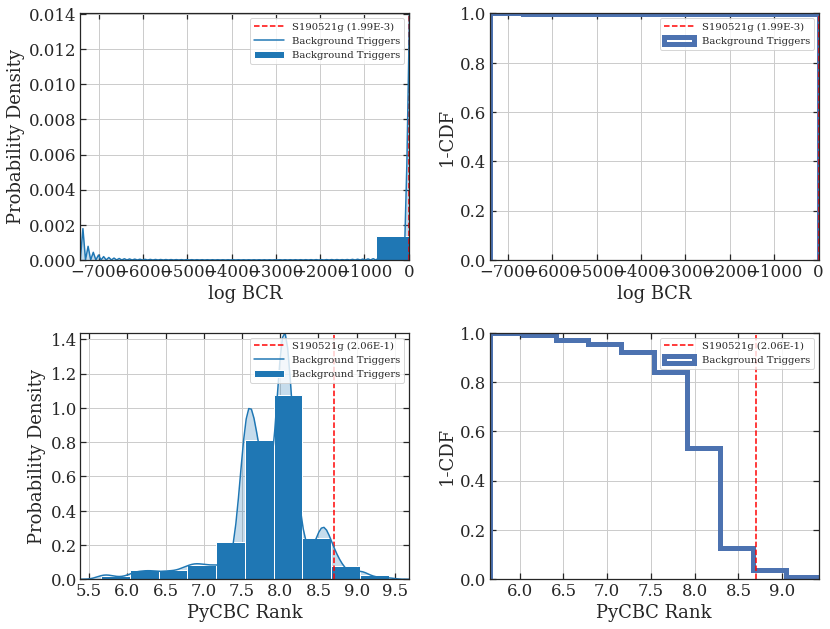

In [0]:
interactive_plot = interactive(
    plot_and_compare,
    alpha=widgets.FloatLogSlider(value=1e-6,  min=-10, max=0, step=0.5, description='alpha', continuous_update=False,),
    beta=widgets.FloatLogSlider(value=1e-4,  min=-10, max=0, step=0.5, description='beta', continuous_update=False,),
    main_key = ['lnBCR', 'BCR'],
    comparision_key = ['stat', 'snr', 'lnBF']
)

output = interactive_plot.children[-1]
output.layout.height = '2000px'
interactive_plot

far_vs_lnBCR_a1e-06_b1e-04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



far_vs_stat_a1e+00_b1e+00


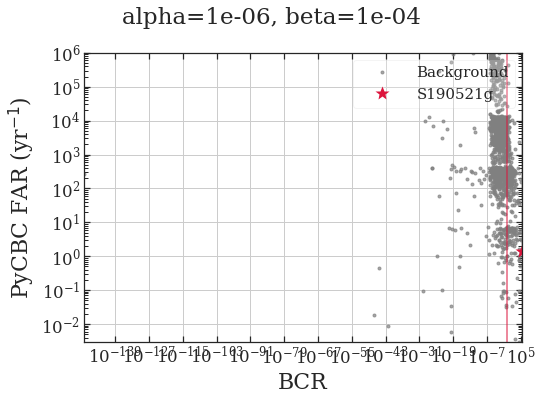

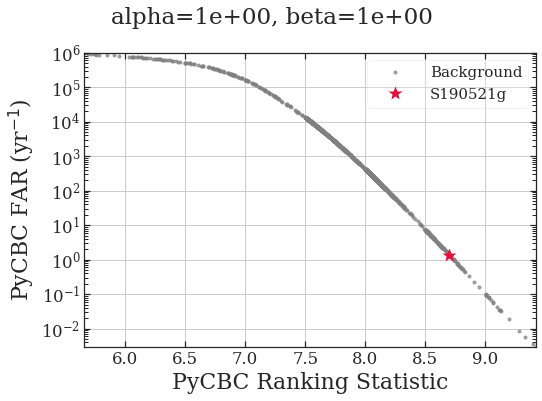

In [0]:

def plot_far_vs_rank(alpha, beta, rank_key, rank_label):
  background = get_background_data(alpha, beta)
  event = get_s190521g_data(alpha, beta)
  data = {"back": background, "S190521g":event}

  fig, ax = plt.subplots(1,  figsize=(8,6))

  ax.set_yscale('log')
  if rank_key=="lnBCR":
    for k, df in data.items():
      ax.plot( np.exp(df[rank_key]),  1/df['ifar'],  ls='None', **kwargs[k])
    ax.axvline(1, **kwargs['line'])
    ax.set_xscale('log')
  else:
    for k, df in data.items():
      ax.plot(df[rank_key],  1/df['ifar'],  ls='None', **kwargs[k])


  ax.set_ylabel(r'PyCBC FAR (yr$^{-1}$)', **font)
  ax.set_xlabel(rank_label, **font)
  ax.grid(True)
  ax.legend(**kwargs['legend'])
  text = fig.suptitle(**title_kwargs(alpha, beta))
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  fname = f'far_vs_{rank_key}_a{alpha:.0e}_b{beta:.0e}'
  print(fname)
  plt.savefig(fname, bbox_extra_artists=[text], bbox_inches='tight')

plot_far_vs_rank(1e-6, 1e-4, 'lnBCR', 'BCR')
plot_far_vs_rank(1, 1, 'stat', 'PyCBC Ranking Statistic')

## PDFs of data

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture


NUMBER_BINS = 100

def plot_best_fit_GMM(X, X_in_question, max_number_components):
  #------------------------------------------------------------
  # Learn the best-fit GaussianMixture models
  #  Here we'll use scikit-learn's GaussianMixture model. The fit() method
  #  uses an Expectation-Maximization approach to find the best
  #  mixture of Gaussians for the data

  # fit models with 1 to max_number_components components
  N = np.arange(1, max_number_components+1)
  models = [None for i in range(len(N))]

  for i in range(len(N)):
      models[i] = GaussianMixture(N[i]).fit(X)

  # compute the AIC and the BIC
  AIC = [m.aic(X) for m in models]
  BIC = [m.bic(X) for m in models]

  #------------------------------------------------------------
  # Plot the data + best-fit mixture 

  fig = plt.figure(figsize=(8 , 5))


  # plot 1: data + best-fit mixture
  ax = fig.add_subplot(111)
  M_best = models[np.argmin(AIC)]

  x = np.linspace(0.8*min(X), max(X)*1.2, 2000)
  logprob = M_best.score_samples(x.reshape(-1, 1))
  responsibilities = M_best.predict_proba(x.reshape(-1, 1))
  pdf = np.exp(logprob)
  pdf_individual = responsibilities * pdf[:, np.newaxis]

  ax.hist(X, NUMBER_BINS, density=True, histtype='stepfilled', color='gray', alpha=0.4, label='Background')
  ax.plot(x, pdf, '-k')
  #ax.plot(x, pdf_individual, '--k')

  ax.set_xlabel('$x$')
  ax.set_ylim(0,max(pdf)*1.1)
  ax.set_ylabel('$p(x)$')
  pval = find_pdf_next_to_xval(pdf, x, X_in_question)
  ax.axvline(x=X_in_question, color='crimson', label=f"S190521g p-val({pval:.2e})")
  
  return plt, ax

def find_pdf_next_to_xval(pdf, xvals, xval_in_question):
    xvals = np.asarray(xvals)
    idx = (np.abs(xvals - xval_in_question)).argmin()
    return pdf[idx]

In [0]:
#------------------------------------------------------------
# Set up the dataset.
alpha, beta = 1e-6, 1e-4
background = get_background_data(alpha, beta)
background = pd.DataFrame(background)
background = background[background['lnBCR'] > -100]
event = get_s190521g_data(alpha, beta)

def plot_GMM(stat, background, event, max_number_components=10):
  X = background[stat].values.reshape(-1, 1)
  X_in_question = event[stat]
  plt, ax = plot_best_fit_GMM(X, X_in_question, max_number_components)
  return plt, ax


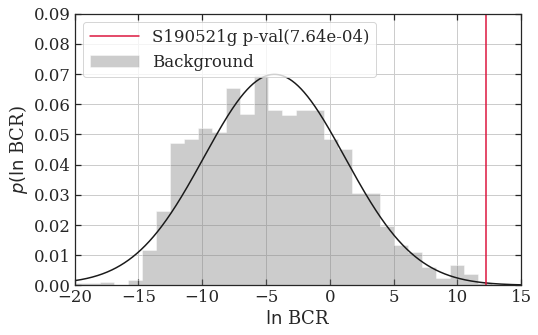

In [0]:
##  BCR
plt, ax = plot_GMM('lnBCR', background, event, max_number_components=2)
ax.set_xlim(-20,15)
ax.set_ylim(0,0.09)
ax.set_xlabel('$\ln$ BCR')
ax.set_ylabel('$p(\ln$ BCR)')
ax.legend(loc="upper left")
bcr_fname ="lnbcr_{}.png"
plt.savefig(bcr_fname.format("pdf"))


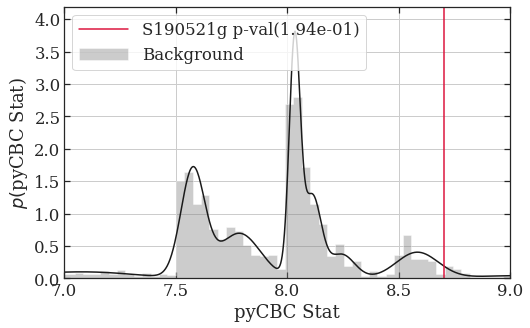

In [0]:
##  pyCBC STAT
plt, ax = plot_GMM('stat', background, event)
ax.set_xlim(7,9)
ax.set_xlabel('pyCBC Stat')
ax.set_ylabel('$p($pyCBC Stat)')
ax.legend(loc="upper left")
pycbc_fname ="pycbcStat_{}.png"
plt.savefig(pycbc_fname.format('pdf'))

## CDFs

In [0]:
def plot_one_minus_CDF(X, X_in_question):
  #------------------------------------------------------------
  # Plot the data + best-fit 1-CDF 
  fig = plt.figure(figsize=(8 , 5))

  # plot : data + best-fit mixture
  ax = fig.add_subplot(111)

  ax.hist(
        X,
        bins=NUMBER_BINS,
        density=True,
        histtype="stepfilled",
        cumulative=-1,
        label="Background Triggers",
        alpha=0.4,
        color='gray'
    )
  cdf_data = X.values.copy()
  cdf_data.sort()
  exceedance = 1.0 - np.arange(1.0, len(cdf_data) + 1.0) / len(cdf_data)
  ax.plot(cdf_data, exceedance, 'k', label='asda')
  ax.axvline(
    x=X_in_question,
    label=f"S190521g (p=00)",
    color='crimson'
  )  
  ax.set_ylabel("1-CDF")

  return plt, ax

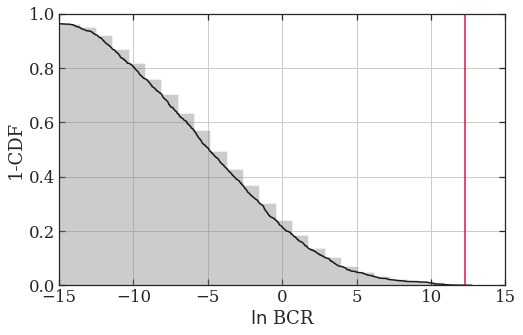

In [0]:
plt, ax= plot_one_minus_CDF(background['lnBCR'], np.asscalar(event['lnBCR']))
ax.set_xlim(-15,15)
ax.set_xlabel("$\ln$ BCR")
plt.savefig(bcr_fname.format("cdf"))

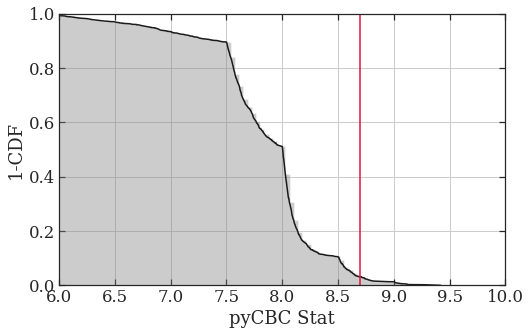

In [0]:
plt, ax = plot_one_minus_CDF(background['stat'], event['stat'])
ax.set_xlim(6,10)
ax.set_xlabel("pyCBC Stat")
plt.savefig(pycbc_fname.format("cdf"))

## COmbine plots

In [0]:
import PIL

def combine_horizontal(out_fn, image_fns):
  imgs    = [ PIL.Image.open(i) for i in image_fns ]
  # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
  min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
  # combine images
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
  imgs_comb = PIL.Image.fromarray( imgs_comb)
  imgs_comb.save(out_fn)    

def combine_vertical(out_fn, image_fns):
  imgs    = [ PIL.Image.open(i) for i in image_fns ]
  # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
  min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
  # combine images 
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
  imgs_comb = PIL.Image.fromarray( imgs_comb)
  imgs_comb.save(out_fn)

In [0]:
combine_horizontal("lnbcr_combo.png", [ bcr_fname.format(i) for i in ["pdf", "cdf"]])
combine_horizontal("pycbc_combo.png", [ pycbc_fname.format(i) for i in ["pdf", "cdf"]])
combine_vertical("s190521g_significance.png", ["lnbcr_combo.png","pycbc_combo.png"])